In [48]:
require 'nn'
require 'dp'
require 'cutorch'
require 'googlenet/TrainHelpers'
require 'cunn'

opt = {
   -- Path to ImageNet
   dataPath = paths.concat(dp.DATA_DIR, 'ImageNet'),
   -- overwrite cache? (SLOW! BE CAREFUL!)
   overwrite = false,
   -- Learning schedule parameters
   -- Weight decay
   weightDecay = 0.0, --005,
   momentum = 0.9,
   nesterov = true,
   -- Batch size
   batchSize = 128
}
cutorch.setDevice(1)

opt.trainPath = opt.trainPath or paths.concat(opt.dataPath, 'ILSVRC2012_img_train')
opt.validPath = opt.validPath or paths.concat(opt.dataPath, 'ILSVRC2012_img_val')
opt.metaPath = opt.metaPath or paths.concat(opt.dataPath, 'metadata')

ds_all = dp.ImageNet{
   train_path=opt.trainPath, valid_path=opt.validPath, meta_path=opt.metaPath,
   verbose=true,
   cache_mode = opt.overwrite and 'overwrite' or nil
}
ds_train = ds_all:loadTrain()
ds_valid = ds_all:loadValid()
preprocess = TrainHelpers.normalizePreprocessDataset(ds_train)
sampler = dp.RandomSampler{
    batch_size=20,
    --ppf=preprocess
}
ds_train:multithread(4)
sampler:async()
epoch = sampler:sampleEpoch(ds_train)

Loaded mean and std from cache.	


Stats of 100 randomly sampled images after normalizing. Mean: 0.070579179583067 Std: 0.99688062842275	


Starting worker thread with id: 3 seed: 1434987262


Starting worker thread with id: 1 seed: 1434987260


Starting worker thread with id: 4 seed: 1434987263


Starting worker thread with id: 2 seed: 1434987261


In [120]:
batch,i,n = epoch(batch)

In [128]:
_=batch:inputs():input():add(-cc.mean:expandAs(batch:inputs():input()))

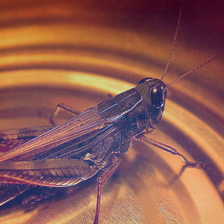

In [129]:
itorch.image(batch:inputs():input()[1])

In [130]:
batch:inputs():input()[1]

(1,.,.) = 
 Columns 1 to 9
 -1.3457 -1.3475 -1.3507 -1.3480 -1.3521 -1.3592 -1.3626 -1.3653 -1.3664
 -1.3473 -1.3531 -1.3558 -1.3594 -1.3673 -1.3711 -1.3739 -1.3838 -1.3809
 -1.3595 -1.3600 -1.3621 -1.3665 -1.3737 -1.3781 -1.3765 -1.3793 -1.3834
 -1.3782 -1.3799 -1.3804 -1.3797 -1.3855 -1.3845 -1.3865 -1.3893 -1.3962
 -1.4061 -1.4051 -1.4044 -1.4069 -1.4078 -1.4056 -1.4073 -1.4007 -1.4059
 -1.4212 -1.4235 -1.4160 -1.4191 -1.4194 -1.4204 -1.4199 -1.4152 -1.4140
 -1.3948 -1.4064 -1.4120 -1.4128 -1.4161 -1.4145 -1.4140 -1.4139 -1.4114
 -1.3938 -1.4006 -1.4088 -1.4111 -1.4099 -1.4115 -1.4077 -1.4105 -1.4131
 -1.4033 -1.4055 -1.4067 -1.4108 -1.4043 -1.4067 -1.4031 -1.4031 -1.4011
 -1.3993 -1.4004 -1.3926 -1.3930 -1.3898 -1.3889 -1.3843 -1.3915 -1.3931
 -1.3747 -1.3785 -1.3742 -1.3753 -1.3762 -1.3794 -1.3727 -1.3735 -1.3736
 -1.3619 -1.3680 -1.3695 -1.3681 -1.3585 -1.3608 -1.3579 -1.3388 -1.3352
 -1.3531 -1.3512 -1.3482 -1.3435 -1.3354 -1.3307 -1.3194 -1.2979 -1.2956
 -1.3361 -1.3280 -1.3186

40 -1.0902 -1.0824
 -1.0942 -1.0858 -1.0800 -1.0721 -1.0557 -1.0441 -1.0387 -1.0162 -1.0077
 -1.0270 -1.0067 -0.9932 -0.9966 -0.9898 -0.9880 -0.9869 -0.9754 -0.9733
 -0.9750 -0.9755 -0.9659 -0.9664 -0.9694 -0.9727 -0.9814 -0.9966 -0.9895
 -0.9670 -0.9713 -0.9688 -0.9665 -0.9655 -0.9653 -0.9638 -0.9825 -0.9755
 -0.9918 -0.9963 -0.9856 -0.9875 -0.9859 -0.9784 -0.9771 -0.9614 -0.9628
 -0.9939 -0.9945 -0.9936 -0.9979 -0.9938 -0.9909 -0.9836 -0.9755 -0.9835
 -0.9936 -0.9835 -0.9787 -0.9806 -0.9775 -0.9696 -0.9661 -0.9644 -0.9737
 -0.9859 -0.9747 -0.9735 -0.9824 -0.9865 -0.9898 -0.9914 -0.9908 -0.9981
 -0.9909 -0.9985 -1.0037 -1.0215 -1.0350 -1.0416 -1.0466 -1.0624 -1.0747
 -1.0373 -1.0568 -1.0839 -1.0904 -1.1049 -1.1121 -1.1085 -1.1310 -1.1500
 -1.1353 -1.1462 -1.1688 -1.1908 -1.2041 -1.2098 -1.2225 -1.2376 -1.2437
 -1.2185 -1.2240 -1.2480 -1.2657 -1.2697 -1.2797 -1.2913 -1.2840 -1.2886
 -1.2975 -1.3031 -1.3126 -1.3225 -1.3232 -1.3312 -1.3331 -1.3450 -1.3515
 -1.3713 -1.3776 -1.3769 -1.3760

47 -1.4634
 -1.4666 -1.4549 -1.4489 -1.4600 -1.4577 -1.4534 -1.4569 -1.4529 -1.4414
 -1.4536 -1.4472 -1.4463 -1.4560 -1.4459 -1.4439 -1.4486 -1.4407 -1.4287
 -1.4345 -1.4283 -1.4328 -1.4400 -1.4352 -1.4395 -1.4435 -1.4385 -1.4337
 -1.4242 -1.4235 -1.4270 -1.4286 -1.4276 -1.4318 -1.4363 -1.4421 -1.4356
 -1.4461 -1.4418 -1.4387 -1.4371 -1.4371 -1.4396 -1.4443 -1.4524 -1.4397
 -1.4383 -1.4328 -1.4363 -1.4368 -1.4307 -1.4316 -1.4337 -1.4267 -1.4141
 -1.4108 -1.3926 -1.3845 -1.3861 -1.3816 -1.3772 -1.3774 -1.3655 -1.3565
 -1.3521 -1.3255 -1.3091 -1.3136 -1.3131 -1.3108 -1.3076 -1.3073 -1.3047
 -1.2788 -1.2578 -1.2535 -1.2539 -1.2489 -1.2540 -1.2484 -1.2557 -1.2503
 -1.2295 -1.2251 -1.2310 -1.2299 -1.2200 -1.2156 -1.2173 -1.2283 -1.2278
 -1.2085 -1.2135 -1.2163 -1.2132 -1.2127 -1.2137 -1.2134 -1.2141 -1.2223
 -1.2098 -1.2004 -1.2018 -1.2072 -1.2117 -1.2063 -1.2067 -1.2115 -1.2179
 -1.2049 -1.1967 -1.1948 -1.2009 -1.2012 -1.2018 -1.2052 -1.2165 -1.2193
 -1.1980 -1.1982 -1.1985 -1.2004 -1.1944

71
 -1.4286 -1.4480 -1.4294 -1.4410 -1.4484 -1.4060 -1.4299 -1.3879 -1.3743
 -1.5564 -1.5992 -1.6155 -1.5865 -1.5617 -1.5342 -1.5279 -1.5603 -1.5942
 -1.6612 -1.6991 -1.7276 -1.6811 -1.6330 -1.6236 -1.6252 -1.6889 -1.6843
 -1.5543 -1.5528 -1.5630 -1.5281 -1.4663 -1.4832 -1.5391 -1.5737 -1.5432
 -1.4554 -1.3881 -1.3544 -1.3766 -1.4628 -1.5114 -1.4740 -1.4253 -1.3946
 -1.3586 -1.3977 -1.4162 -1.4415 -1.4940 -1.4920 -1.4191 -1.3437 -1.3391
 -1.3617 -1.3837 -1.4236 -1.3786 -1.2558 -1.2289 -1.2694 -1.3193 -1.3953
 -1.2424 -1.2758 -1.2153 -1.1300 -1.0212 -0.9898 -0.9914 -1.1283 -1.2745
 -1.3056 -1.2902 -1.2252 -1.2011 -1.1424 -1.0987 -1.0489 -1.0170 -1.0649
 -1.5162 -1.4577 -1.4516 -1.3960 -1.3820 -1.3221 -1.2455 -1.2384 -1.1760
 -1.4892 -1.5108 -1.5510 -1.4913 -1.4520 -1.3820 -1.4125 -1.4058 -1.3981
 -1.4602 -1.4889 -1.4886 -1.4404 -1.3746 -1.3718 -1.4429 -1.4171 -1.4068
 -1.5046 -1.4689 -1.4676 -1.4284 -1.3409 -1.4243 -1.3725 -1.4074 -1.4134
 -1.2335 -1.4623 -1.4544 -1.1794 -1.1282 -1.2254

mns 10 to 18
 -1.3788 -1.3917 -1.3992 -1.3909 -1.3805 -1.3786 -1.3819 -1.3749 -1.3775
 -1.3815 -1.3823 -1.3840 -1.3876 -1.3887 -1.3876 -1.3883 -1.3899 -1.3861
 -1.3843 -1.3839 -1.3943 -1.3929 -1.3983 -1.4007 -1.3948 -1.3925 -1.3939
 -1.3962 -1.3973 -1.4049 -1.4058 -1.4045 -1.4043 -1.4053 -1.4036 -1.4013
 -1.4049 -1.4041 -1.4087 -1.4102 -1.4107 -1.4077 -1.4083 -1.4129 -1.4089
 -1.4104 -1.4118 -1.4138 -1.4123 -1.4062 -1.4077 -1.4082 -1.4119 -1.4100
 -1.4091 -1.4121 -1.4164 -1.4217 -1.4207 -1.4161 -1.4095 -1.4115 -1.4062
 -1.4127 -1.4142 -1.4160 -1.4111 -1.4127 -1.4071 -1.4076 -1.4007 -1.3985
 -1.4030 -1.4011 -1.4011 -1.3917 -1.3881 -1.3861 -1.3813 -1.3752 -1.3763
 -1.3899 -1.3844 -1.3823 -1.3791 -1.3683 -1.3689 -1.3660 -1.3604 -1.3541
 -1.3711 -1.3639 -1.3600 -1.3536 -1.3494 -1.3451 -1.3383 -1.3327 -1.3277
 -1.3341 -1.3289 -1.3290 -1.3099 -1.3062 -1.3121 -1.3077 -1.3021 -1.3051
 -1.2989 -1.2922 -1.2928 -1.2863 -1.2853 -1.2834 -1.2777 -1.2806 -1.2791
 -1.2680 -1.2656 -1.2669 -1.2714 -1.27

0331
 -0.9931 -0.9837 -0.9728 -0.9754 -0.9805 -0.9844 -0.9855 -0.9851 -0.9941
 -0.9666 -0.9597 -0.9574 -0.9639 -0.9741 -0.9699 -0.9687 -0.9786 -0.9783
 -0.9877 -0.9781 -0.9718 -0.9729 -0.9705 -0.9683 -0.9688 -0.9737 -0.9807
 -0.9687 -0.9625 -0.9654 -0.9684 -0.9730 -0.9756 -0.9735 -0.9708 -0.9833
 -0.9642 -0.9602 -0.9718 -0.9757 -0.9828 -0.9730 -0.9699 -0.9748 -0.9815
 -0.9853 -0.9747 -0.9741 -0.9783 -0.9792 -0.9750 -0.9726 -0.9747 -0.9818
 -0.9681 -0.9716 -0.9846 -0.9872 -0.9970 -0.9974 -0.9916 -1.0020 -1.0093
 -0.9937 -1.0054 -1.0254 -1.0319 -1.0428 -1.0465 -1.0496 -1.0497 -1.0665
 -1.0706 -1.0804 -1.1015 -1.1013 -1.1044 -1.1118 -1.1105 -1.1206 -1.1364
 -1.1504 -1.1576 -1.1651 -1.1727 -1.1823 -1.1849 -1.1836 -1.1978 -1.2046
 -1.2456 -1.2456 -1.2544 -1.2462 -1.2500 -1.2643 -1.2618 -1.2668 -1.2667
 -1.2888 -1.2910 -1.2957 -1.3060 -1.3150 -1.3233 -1.3323 -1.3350 -1.3346
 -1.3555 -1.3580 -1.3603 -1.3715 -1.3817 -1.3840 -1.3880 -1.3886 -1.3904
 -1.4109 -1.4056 -1.4139 -1.3915 -1.3734 -1.36

.4360 -1.4304 -1.4232 -1.4175 -1.4210 -1.4248 -1.4261 -1.4262 -1.4226
 -1.4259 -1.4240 -1.4203 -1.4220 -1.4257 -1.4292 -1.4257 -1.4215 -1.4227
 -1.4305 -1.4356 -1.4378 -1.4302 -1.4310 -1.4368 -1.4318 -1.4267 -1.4273
 -1.4368 -1.4417 -1.4375 -1.4442 -1.4514 -1.4537 -1.4498 -1.4407 -1.4361
 -1.4400 -1.4393 -1.4388 -1.4490 -1.4656 -1.4538 -1.4450 -1.4375 -1.4266
 -1.4089 -1.4122 -1.4102 -1.4121 -1.4185 -1.4104 -1.3923 -1.3887 -1.3862
 -1.3532 -1.3576 -1.3562 -1.3701 -1.3673 -1.3547 -1.3424 -1.3340 -1.3354
 -1.3008 -1.3065 -1.3043 -1.3065 -1.3072 -1.3042 -1.2872 -1.2886 -1.2813
 -1.2489 -1.2506 -1.2524 -1.2598 -1.2657 -1.2655 -1.2583 -1.2547 -1.2565
 -1.2307 -1.2335 -1.2320 -1.2343 -1.2439 -1.2461 -1.2417 -1.2405 -1.2437
 -1.2262 -1.2338 -1.2321 -1.2328 -1.2396 -1.2487 -1.2480 -1.2464 -1.2469
 -1.2245 -1.2325 -1.2358 -1.2374 -1.2397 -1.2492 -1.2531 -1.2503 -1.2452
 -1.2210 -1.2251 -1.2292 -1.2407 -1.2447 -1.2535 -1.2555 -1.2564 -1.2494
 -1.2094 -1.2124 -1.2221 -1.2352 -1.2502 -1.2583 -1.26

.4106 -1.3802 -1.3687 -1.3729 -1.3552 -1.3051 -1.2348 -1.1842
 -1.5823 -1.5351 -1.5074 -1.4960 -1.4995 -1.4919 -1.4425 -1.3846 -1.3690
 -1.6506 -1.6070 -1.6379 -1.6872 -1.6577 -1.6437 -1.6435 -1.6371 -1.6635
 -1.5600 -1.5294 -1.5333 -1.6019 -1.6174 -1.5669 -1.5430 -1.5813 -1.5967
 -1.4777 -1.5006 -1.5001 -1.5473 -1.5364 -1.4821 -1.5191 -1.5804 -1.5447
 -1.4341 -1.4985 -1.5312 -1.5438 -1.4653 -1.4282 -1.4654 -1.5224 -1.5945
 -1.4506 -1.5029 -1.5334 -1.4519 -1.3581 -1.3025 -1.3174 -1.4406 -1.5745
 -1.3417 -1.3614 -1.3413 -1.2847 -1.2754 -1.2758 -1.3857 -1.5347 -1.5476
 -1.1684 -1.2386 -1.2320 -1.1862 -1.2165 -1.3413 -1.4594 -1.4755 -1.4352
 -1.1633 -1.1907 -1.2015 -1.1381 -1.0504 -1.0988 -1.1817 -1.1160 -1.0952
 -1.3372 -1.2664 -1.2604 -1.1623 -1.0624 -1.0428 -1.0607 -1.0462 -0.9871
 -1.4281 -1.4596 -1.4627 -1.4029 -1.4009 -1.3401 -1.2525 -1.1879 -1.0924
 -1.4279 -1.4484 -1.4758 -1.4625 -1.4524 -1.4593 -1.4526 -1.4179 -1.3702
 -1.3366 -1.3354 -1.3667 -1.3978 -1.4029 -1.3858 -1.4119 -1.40

-1.3660 -1.3646 -1.3631 -1.3613 -1.3638 -1.3659 -1.3694 -1.3730 -1.3733
 -1.3816 -1.3839 -1.3835 -1.3825 -1.3881 -1.3875 -1.3832 -1.3857 -1.3841
 -1.3861 -1.3886 -1.3887 -1.3891 -1.3951 -1.3949 -1.3940 -1.3970 -1.3968
 -1.3919 -1.3948 -1.3966 -1.3993 -1.4028 -1.4115 -1.4083 -1.4102 -1.4108
 -1.4116 -1.4074 -1.4091 -1.4171 -1.4183 -1.4151 -1.4136 -1.4206 -1.4192
 -1.4060 -1.4056 -1.4099 -1.4122 -1.4130 -1.4172 -1.4204 -1.4190 -1.4155
 -1.4060 -1.3999 -1.4009 -1.3963 -1.3964 -1.4074 -1.4094 -1.4022 -1.4009
 -1.3928 -1.3898 -1.3802 -1.3755 -1.3787 -1.3856 -1.3809 -1.3779 -1.3753
 -1.3706 -1.3653 -1.3545 -1.3564 -1.3572 -1.3582 -1.3573 -1.3537 -1.3430
 -1.3418 -1.3371 -1.3313 -1.3281 -1.3351 -1.3346 -1.3295 -1.3249 -1.3196
 -1.3125 -1.3091 -1.3049 -1.3007 -1.2997 -1.3100 -1.3070 -1.2988 -1.2944
 -1.2977 -1.2892 -1.2818 -1.2738 -1.2751 -1.2774 -1.2717 -1.2736 -1.2699
 -1.2785 -1.2764 -1.2621 -1.2435 -1.2580 -1.2523 -1.2546 -1.2588 -1.2566
 -1.2600 -1.2572 -1.2476 -1.2280 -1.2310 -1.2381 -1.

-0.9904 -0.9917 -0.9837 -0.9753 -0.9839 -0.9788 -0.9740 -0.9722
 -0.9788 -0.9832 -0.9807 -0.9773 -0.9819 -0.9833 -0.9866 -0.9862 -0.9851
 -0.9736 -0.9730 -0.9769 -0.9755 -0.9781 -0.9864 -0.9943 -0.9920 -0.9963
 -0.9800 -0.9847 -0.9899 -0.9880 -0.9929 -0.9878 -0.9871 -0.9871 -0.9920
 -0.9777 -0.9777 -0.9758 -0.9818 -0.9871 -0.9843 -0.9832 -0.9850 -0.9871
 -0.9753 -0.9725 -0.9745 -0.9815 -0.9861 -0.9850 -0.9875 -0.9879 -0.9921
 -0.9968 -1.0078 -1.0126 -1.0259 -1.0312 -1.0258 -1.0266 -1.0331 -1.0431
 -1.0608 -1.0655 -1.0794 -1.0881 -1.0994 -1.1006 -1.0985 -1.0968 -1.0959
 -1.1344 -1.1337 -1.1477 -1.1557 -1.1593 -1.1677 -1.1720 -1.1713 -1.1754
 -1.2116 -1.2189 -1.2253 -1.2269 -1.2238 -1.2468 -1.2520 -1.2455 -1.2370
 -1.2813 -1.2843 -1.2918 -1.3014 -1.3062 -1.3192 -1.3197 -1.3213 -1.3126
 -1.3593 -1.3588 -1.3554 -1.3595 -1.3621 -1.3706 -1.3753 -1.3729 -1.3670
 -1.3967 -1.3876 -1.3791 -1.3769 -1.3763 -1.3891 -1.3783 -1.3700 -1.3686
 -1.3118 -1.3020 -1.2963 -1.2903 -1.2889 -1.2884 -1.2783 -1.

-1.4277 -1.4196 -1.4126 -1.4139 -1.4168 -1.4216 -1.4210
 -1.4316 -1.4304 -1.4252 -1.4153 -1.4072 -1.4085 -1.4171 -1.4213 -1.4254
 -1.4272 -1.4228 -1.4237 -1.4169 -1.4074 -1.4102 -1.4144 -1.4179 -1.4290
 -1.4305 -1.4430 -1.4445 -1.4329 -1.4108 -1.4074 -1.4108 -1.4180 -1.4280
 -1.4006 -1.4238 -1.4409 -1.4269 -1.3972 -1.3904 -1.3939 -1.3946 -1.4057
 -1.3759 -1.3778 -1.3804 -1.3757 -1.3613 -1.3589 -1.3559 -1.3543 -1.3568
 -1.3439 -1.3354 -1.3311 -1.3269 -1.3184 -1.3168 -1.3209 -1.3170 -1.3187
 -1.2802 -1.2801 -1.2789 -1.2869 -1.2944 -1.2875 -1.2865 -1.2878 -1.2910
 -1.2742 -1.2745 -1.2683 -1.2695 -1.2659 -1.2634 -1.2645 -1.2735 -1.2755
 -1.2525 -1.2481 -1.2513 -1.2482 -1.2456 -1.2530 -1.2511 -1.2577 -1.2588
 -1.2520 -1.2472 -1.2473 -1.2519 -1.2532 -1.2488 -1.2430 -1.2469 -1.2512
 -1.2539 -1.2539 -1.2515 -1.2550 -1.2561 -1.2456 -1.2414 -1.2502 -1.2534
 -1.2563 -1.2604 -1.2576 -1.2571 -1.2565 -1.2460 -1.2491 -1.2506 -1.2439
 -1.2514 -1.2497 -1.2451 -1.2542 -1.2486 -1.2563 -1.2533 -1.2449 -1.

-1.2311 -1.1694 -1.1593 -1.1721 -1.1512 -1.1856
 -1.3936 -1.3973 -1.4246 -1.4312 -1.3923 -1.3820 -1.3834 -1.3857 -1.4026
 -1.6560 -1.6482 -1.5802 -1.5282 -1.4963 -1.5376 -1.5572 -1.5347 -1.5290
 -1.5889 -1.6127 -1.6390 -1.5907 -1.5418 -1.4798 -1.3955 -1.3963 -1.4047
 -1.4998 -1.5217 -1.5934 -1.5834 -1.5677 -1.4322 -1.2923 -1.3243 -1.3466
 -1.5455 -1.5666 -1.5996 -1.5237 -1.3999 -1.3560 -1.3673 -1.4103 -1.4556
 -1.5902 -1.5449 -1.4881 -1.5294 -1.5673 -1.5744 -1.6103 -1.6175 -1.6128
 -1.4871 -1.3732 -1.2747 -1.4065 -1.5827 -1.6048 -1.6070 -1.6077 -1.6051
 -1.3038 -1.2373 -1.2313 -1.3502 -1.4997 -1.5433 -1.5225 -1.5146 -1.5160
 -1.2160 -1.2906 -1.3866 -1.4651 -1.5294 -1.5287 -1.4307 -1.3716 -1.4280
 -0.9753 -1.0773 -1.2180 -1.2998 -1.3207 -1.2763 -1.2345 -1.2495 -1.3766
 -1.0495 -0.9697 -0.9670 -1.0295 -1.0815 -1.1007 -1.1625 -1.2634 -1.3876
 -1.3293 -1.2733 -1.1970 -1.1531 -1.1420 -1.1733 -1.1905 -1.1370 -1.1250
 -1.4259 -1.4451 -1.4514 -1.4552 -1.3315 -1.2702 -1.2111 -1.0947 -1.0510
 -1

8 -1.3678 -1.3771 -1.3822 -1.3826 -1.3870 -1.3889 -1.3900
 -1.3917 -1.3953 -1.3947 -1.4038 -1.4103 -1.4090 -1.4147 -1.4114 -1.4091
 -1.3999 -1.3990 -1.4046 -1.4153 -1.4130 -1.4077 -1.4110 -1.4129 -1.4135
 -1.4111 -1.4094 -1.4135 -1.4212 -1.4204 -1.4177 -1.4185 -1.4102 -1.4163
 -1.4187 -1.4174 -1.4172 -1.4201 -1.4221 -1.4264 -1.4275 -1.4169 -1.4158
 -1.4095 -1.4130 -1.4109 -1.4127 -1.4165 -1.4212 -1.4254 -1.4056 -1.3974
 -1.3914 -1.3921 -1.3899 -1.3932 -1.3880 -1.3877 -1.3851 -1.3779 -1.3730
 -1.3610 -1.3661 -1.3684 -1.3668 -1.3634 -1.3606 -1.3581 -1.3579 -1.3516
 -1.3407 -1.3438 -1.3353 -1.3430 -1.3391 -1.3332 -1.3367 -1.3362 -1.3234
 -1.3218 -1.3108 -1.3042 -1.3072 -1.3021 -1.2988 -1.3009 -1.3066 -1.2967
 -1.2946 -1.2900 -1.2802 -1.2870 -1.2858 -1.2808 -1.2781 -1.2809 -1.2688
 -1.2633 -1.2602 -1.2524 -1.2566 -1.2563 -1.2553 -1.2537 -1.2549 -1.2584
 -1.2523 -1.2428 -1.2347 -1.2379 -1.2393 -1.2410 -1.2412 -1.2376 -1.2507
 -1.2356 -1.2381 -1.2341 -1.2372 -1.2396 -1.2394 -1.2411 -1.2393 -

0 -0.9993 -0.9836 -0.9832 -0.9857 -0.9878 -0.9890
 -0.9873 -0.9922 -1.0078 -1.0013 -0.9971 -0.9969 -0.9926 -0.9938 -0.9981
 -0.9932 -0.9952 -1.0016 -1.0065 -1.0067 -1.0052 -1.0034 -0.9960 -1.0058
 -0.9886 -0.9827 -0.9826 -0.9940 -0.9983 -0.9966 -0.9901 -0.9842 -0.9947
 -0.9831 -0.9818 -0.9805 -0.9894 -0.9977 -0.9958 -0.9895 -0.9988 -1.0101
 -0.9948 -1.0065 -1.0140 -1.0219 -1.0248 -1.0308 -1.0380 -1.0472 -1.0508
 -1.0530 -1.0626 -1.0784 -1.0810 -1.0911 -1.1038 -1.1049 -1.1048 -1.1117
 -1.0938 -1.1134 -1.1362 -1.1403 -1.1575 -1.1693 -1.1667 -1.1712 -1.1749
 -1.1821 -1.1900 -1.1940 -1.2069 -1.2162 -1.2279 -1.2269 -1.2338 -1.2391
 -1.2322 -1.2430 -1.2593 -1.2689 -1.2728 -1.2724 -1.2754 -1.2855 -1.2926
 -1.3170 -1.3140 -1.3343 -1.3370 -1.3373 -1.3408 -1.3383 -1.3442 -1.3531
 -1.3634 -1.3702 -1.3752 -1.3750 -1.3767 -1.3759 -1.3737 -1.3844 -1.3891
 -1.3562 -1.3519 -1.3444 -1.3442 -1.3426 -1.3363 -1.3341 -1.3437 -1.3431
 -1.2477 -1.2440 -1.2283 -1.2278 -1.2263 -1.2182 -1.2139 -1.2167 -1.2121
 

0 -1.4265 -1.4252 -1.4262 -1.4007 -1.3611
 -1.4300 -1.4288 -1.4300 -1.4272 -1.4361 -1.4416 -1.4439 -1.4096 -1.3848
 -1.4325 -1.4301 -1.4332 -1.4217 -1.4259 -1.4312 -1.4398 -1.4508 -1.4297
 -1.4270 -1.4247 -1.4364 -1.4335 -1.4342 -1.4365 -1.4438 -1.4502 -1.4313
 -1.4152 -1.4123 -1.4183 -1.4207 -1.4284 -1.4356 -1.4361 -1.4059 -1.3844
 -1.3731 -1.3736 -1.3790 -1.3768 -1.3872 -1.3897 -1.3894 -1.3642 -1.3437
 -1.3278 -1.3362 -1.3332 -1.3341 -1.3390 -1.3403 -1.3362 -1.3217 -1.3124
 -1.2953 -1.2925 -1.2919 -1.2972 -1.2924 -1.3038 -1.2990 -1.2962 -1.3051
 -1.2747 -1.2801 -1.2930 -1.2959 -1.2918 -1.2886 -1.2915 -1.2973 -1.3048
 -1.2616 -1.2666 -1.2800 -1.2790 -1.2730 -1.2708 -1.2770 -1.2792 -1.2850
 -1.2587 -1.2601 -1.2688 -1.2713 -1.2655 -1.2702 -1.2758 -1.2778 -1.2765
 -1.2556 -1.2584 -1.2650 -1.2696 -1.2721 -1.2686 -1.2736 -1.2674 -1.2640
 -1.2497 -1.2581 -1.2668 -1.2669 -1.2715 -1.2697 -1.2670 -1.2678 -1.2629
 -1.2342 -1.2409 -1.2396 -1.2439 -1.2586 -1.2666 -1.2742 -1.2835 -1.2909
 -1.2403 

9 -1.2880 -1.3182 -1.3448 -1.3655
 -1.3501 -1.3409 -1.3694 -1.4449 -1.4819 -1.5352 -1.5586 -1.5633 -1.5617
 -1.4750 -1.3681 -1.3636 -1.5244 -1.5598 -1.6122 -1.5782 -1.4863 -1.4866
 -1.4120 -1.4066 -1.1683 -1.2123 -1.2456 -1.3480 -1.4133 -1.3562 -1.3545
 -1.3763 -1.5129 -1.3231 -1.1455 -1.1498 -1.1898 -1.2538 -1.3348 -1.3996
 -1.4745 -1.5135 -1.4036 -1.1934 -1.1908 -1.2099 -1.2769 -1.3902 -1.5809
 -1.5855 -1.4887 -1.2712 -1.2579 -1.2839 -1.2882 -1.3205 -1.3657 -1.5205
 -1.6001 -1.5979 -1.4774 -1.5049 -1.4760 -1.4735 -1.5006 -1.5067 -1.4735
 -1.4782 -1.5356 -1.6090 -1.6164 -1.6149 -1.6118 -1.6006 -1.4992 -1.4775
 -1.4339 -1.4875 -1.5816 -1.5875 -1.6132 -1.6164 -1.5610 -1.4347 -1.4982
 -1.4442 -1.4863 -1.5164 -1.4861 -1.4181 -1.4327 -1.5063 -1.5058 -1.5342
 -1.4398 -1.4546 -1.3636 -1.3031 -1.1892 -1.2294 -1.4151 -1.4858 -1.4665
 -1.1076 -1.1370 -1.1760 -1.2312 -1.3100 -1.3997 -1.4658 -1.4314 -1.3864
 -1.0093 -0.9530 -1.0385 -1.1017 -1.1646 -1.2280 -1.2656 -1.2247 -1.2463
 -1.2506 -1.1257 

919 -1.4153 -1.4193 -1.4152 -1.4046 -1.3944
 -1.4116 -1.4094 -1.4053 -1.4129 -1.4220 -1.4233 -1.4186 -1.4031 -1.4048
 -1.4153 -1.4194 -1.4197 -1.4201 -1.4143 -1.4164 -1.4117 -1.4000 -1.3996
 -1.4200 -1.4189 -1.4173 -1.4181 -1.4141 -1.4119 -1.4143 -1.4039 -1.3997
 -1.4113 -1.4057 -1.4041 -1.4037 -1.4017 -1.4034 -1.4043 -1.3967 -1.3968
 -1.3882 -1.3783 -1.3726 -1.3802 -1.3878 -1.3913 -1.3907 -1.3799 -1.3814
 -1.3559 -1.3504 -1.3568 -1.3625 -1.3553 -1.3527 -1.3419 -1.3436 -1.3469
 -1.3290 -1.3205 -1.3312 -1.3281 -1.3231 -1.3273 -1.3225 -1.3179 -1.3217
 -1.3008 -1.2913 -1.2952 -1.3032 -1.3037 -1.3138 -1.3086 -1.3003 -1.3019
 -1.2759 -1.2684 -1.2739 -1.2762 -1.2724 -1.2758 -1.2796 -1.2748 -1.2752
 -1.2554 -1.2520 -1.2554 -1.2654 -1.2561 -1.2549 -1.2564 -1.2594 -1.2676
 -1.2551 -1.2478 -1.2498 -1.2580 -1.2676 -1.2626 -1.2648 -1.2653 -1.2729
 -1.2564 -1.2477 -1.2349 -1.2488 -1.2744 -1.2716 -1.2739 -1.2683 -1.2717
 -1.2558 -1.2402 -1.2409 -1.2501 -1.2613 -1.2643 -1.2641 -1.2663 -1.2687
 -1.268

052 -1.0043 -1.0027 -1.0015 -1.0050
 -1.0105 -1.0173 -1.0115 -1.0165 -1.0153 -1.0196 -1.0151 -1.0183 -1.0124
 -1.0129 -1.0159 -1.0086 -1.0103 -1.0165 -1.0239 -1.0244 -1.0230 -1.0250
 -1.0027 -1.0012 -0.9977 -1.0027 -1.0043 -1.0115 -1.0108 -1.0143 -1.0161
 -1.0077 -1.0067 -1.0014 -1.0066 -1.0054 -1.0023 -1.0078 -1.0118 -1.0158
 -1.0453 -1.0411 -1.0322 -1.0221 -1.0230 -1.0297 -1.0353 -1.0498 -1.0651
 -1.1040 -1.1051 -1.1002 -1.1003 -1.1011 -1.1057 -1.1117 -1.1265 -1.1351
 -1.1734 -1.1744 -1.1777 -1.1766 -1.1700 -1.1810 -1.1845 -1.1953 -1.1985
 -1.2454 -1.2479 -1.2546 -1.2567 -1.2532 -1.2525 -1.2576 -1.2646 -1.2634
 -1.2965 -1.3039 -1.3123 -1.3174 -1.3231 -1.3185 -1.3193 -1.3216 -1.3225
 -1.3548 -1.3512 -1.3518 -1.3551 -1.3593 -1.3619 -1.3616 -1.3606 -1.3620
 -1.3811 -1.3820 -1.3793 -1.3805 -1.3817 -1.3831 -1.3847 -1.3887 -1.3876
 -1.3356 -1.3351 -1.3317 -1.3317 -1.3310 -1.3356 -1.3301 -1.3336 -1.3331
 -1.2107 -1.2088 -1.2034 -1.2015 -1.2136 -1.2164 -1.2171 -1.2191 -1.2247
 -1.0801 -1.077

489 -1.4185 -1.4111 -1.4290
 -1.3977 -1.4275 -1.4732 -1.5150 -1.4896 -1.4566 -1.4243 -1.4146 -1.4345
 -1.4311 -1.4643 -1.4875 -1.5050 -1.4689 -1.4548 -1.4333 -1.4360 -1.4465
 -1.4386 -1.4792 -1.4981 -1.4990 -1.4781 -1.4419 -1.4302 -1.4464 -1.4569
 -1.4006 -1.4319 -1.4521 -1.4635 -1.4654 -1.4080 -1.4069 -1.4373 -1.4555
 -1.3372 -1.3573 -1.3859 -1.3958 -1.4058 -1.3696 -1.3703 -1.3725 -1.3750
 -1.3064 -1.3132 -1.3282 -1.3289 -1.3462 -1.3262 -1.3184 -1.3142 -1.3043
 -1.3010 -1.2995 -1.2943 -1.2931 -1.3094 -1.3084 -1.3022 -1.2899 -1.2907
 -1.3076 -1.3020 -1.2967 -1.2949 -1.3064 -1.2956 -1.2795 -1.2596 -1.2486
 -1.2926 -1.2908 -1.3008 -1.3079 -1.2964 -1.2793 -1.2784 -1.2728 -1.2395
 -1.2757 -1.2788 -1.2832 -1.2893 -1.3050 -1.3070 -1.3049 -1.3020 -1.2903
 -1.2725 -1.2836 -1.2897 -1.2923 -1.2965 -1.2942 -1.2886 -1.2755 -1.2862
 -1.2707 -1.2656 -1.2747 -1.2710 -1.2490 -1.2527 -1.2604 -1.2734 -1.2851
 -1.2744 -1.3012 -1.2943 -1.2877 -1.2920 -1.3106 -1.3480 -1.3564 -1.3328
 -1.4079 -1.2819 -1.361

119 -1.4234 -1.4158
 -1.5811 -1.5908 -1.6156 -1.6087 -1.5505 -1.5401 -1.5512 -1.5457 -1.5435
 -1.5043 -1.5345 -1.5709 -1.5300 -1.4500 -1.4753 -1.4756 -1.4762 -1.4820
 -1.3426 -1.3633 -1.4381 -1.4763 -1.4688 -1.5156 -1.5095 -1.4739 -1.4536
 -1.2913 -1.3107 -1.4032 -1.4204 -1.4688 -1.5497 -1.5798 -1.5037 -1.4563
 -1.4252 -1.3344 -1.3920 -1.4053 -1.4595 -1.5575 -1.6361 -1.5666 -1.5132
 -1.4026 -1.3491 -1.3544 -1.4239 -1.4547 -1.5491 -1.6963 -1.6427 -1.5959
 -1.4034 -1.4604 -1.4107 -1.4379 -1.4261 -1.5272 -1.6664 -1.6712 -1.6971
 -1.5418 -1.5723 -1.5492 -1.5119 -1.5079 -1.4083 -1.2972 -1.5791 -1.7355
 -1.5873 -1.5879 -1.5779 -1.5771 -1.3690 -1.1092 -1.2795 -1.5802 -1.6084
 -1.5501 -1.5511 -1.5890 -1.5802 -1.2339 -1.2814 -1.5298 -1.5713 -1.5739
 -1.4803 -1.4856 -1.4806 -1.5165 -1.4897 -1.5139 -1.5446 -1.5714 -1.5426
 -1.3998 -1.2947 -1.2155 -1.3774 -1.4626 -1.4600 -1.4807 -1.5232 -1.4193
 -1.2783 -1.2089 -1.2567 -1.3609 -1.3683 -1.3102 -1.3473 -1.2919 -1.1222
 -1.1522 -1.2461 -1.3259 -1.317

.3982 -1.3914 -1.4052 -1.4097
 -1.4042 -1.4023 -1.4029 -1.4026 -1.4041 -1.3981 -1.3925 -1.4022 -1.3965
 -1.4053 -1.4006 -1.3995 -1.4009 -1.3991 -1.3993 -1.4035 -1.4050 -1.3988
 -1.3961 -1.3908 -1.3897 -1.3906 -1.3912 -1.3872 -1.3887 -1.3944 -1.3839
 -1.3812 -1.3697 -1.3716 -1.3744 -1.3728 -1.3627 -1.3506 -1.3670 -1.3585
 -1.3557 -1.3458 -1.3425 -1.3442 -1.3399 -1.3323 -1.3243 -1.3346 -1.3351
 -1.3372 -1.3263 -1.3235 -1.3160 -1.3095 -1.3124 -1.3104 -1.3125 -1.3112
 -1.3122 -1.3080 -1.2982 -1.2940 -1.2872 -1.2852 -1.2858 -1.2872 -1.2880
 -1.2903 -1.2797 -1.2779 -1.2742 -1.2675 -1.2646 -1.2572 -1.2609 -1.2651
 -1.2694 -1.2588 -1.2606 -1.2592 -1.2472 -1.2433 -1.2360 -1.2381 -1.2427
 -1.2519 -1.2417 -1.2393 -1.2398 -1.2383 -1.2277 -1.2132 -1.2187 -1.2230
 -1.2613 -1.2482 -1.2380 -1.2352 -1.2332 -1.2217 -1.2149 -1.2149 -1.2161
 -1.2639 -1.2549 -1.2493 -1.2444 -1.2361 -1.2342 -1.2318 -1.2321 -1.2317
 -1.2692 -1.2624 -1.2587 -1.2594 -1.2601 -1.2574 -1.2558 -1.2544 -1.2563
 -1.2922 -1.2923 -1.2

.0065 -1.0086 -1.0074
 -1.0012 -0.9979 -0.9975 -1.0049 -1.0126 -1.0098 -1.0026 -1.0041 -1.0138
 -1.0070 -1.0044 -1.0072 -1.0079 -1.0156 -1.0144 -1.0026 -1.0020 -1.0108
 -1.0116 -1.0072 -1.0039 -0.9984 -0.9946 -0.9953 -0.9992 -1.0063 -1.0075
 -1.0262 -1.0266 -1.0203 -1.0192 -1.0196 -1.0148 -1.0156 -1.0181 -1.0261
 -1.0587 -1.0677 -1.0675 -1.0756 -1.0802 -1.0806 -1.0801 -1.0801 -1.0841
 -1.1356 -1.1363 -1.1364 -1.1392 -1.1425 -1.1427 -1.1390 -1.1384 -1.1399
 -1.1947 -1.1941 -1.1936 -1.1907 -1.1863 -1.1892 -1.1921 -1.1970 -1.1971
 -1.2684 -1.2672 -1.2667 -1.2557 -1.2554 -1.2485 -1.2435 -1.2450 -1.2445
 -1.3251 -1.3277 -1.3197 -1.3138 -1.3059 -1.3021 -1.2998 -1.3008 -1.3029
 -1.3634 -1.3566 -1.3506 -1.3465 -1.3512 -1.3549 -1.3531 -1.3589 -1.3622
 -1.3924 -1.3874 -1.3820 -1.3807 -1.3847 -1.3856 -1.3807 -1.3788 -1.3817
 -1.3382 -1.3405 -1.3358 -1.3397 -1.3466 -1.3525 -1.3601 -1.3545 -1.3517
 -1.2324 -1.2289 -1.2268 -1.2322 -1.2307 -1.2471 -1.2669 -1.2619 -1.2625
 -1.1024 -1.0995 -1.1012 -1.1

.4132 -1.3976
 -1.4310 -1.4214 -1.4159 -1.4108 -1.4105 -1.4030 -1.3946 -1.4054 -1.3729
 -1.4382 -1.4214 -1.4192 -1.4110 -1.3929 -1.4029 -1.4334 -1.4520 -1.4032
 -1.4645 -1.4566 -1.4292 -1.4090 -1.3976 -1.4110 -1.4708 -1.4587 -1.3927
 -1.4686 -1.4609 -1.4162 -1.3942 -1.4150 -1.4454 -1.4814 -1.4362 -1.3514
 -1.4176 -1.4095 -1.3821 -1.3941 -1.4431 -1.4868 -1.4935 -1.4284 -1.3429
 -1.3469 -1.3503 -1.3565 -1.3846 -1.4428 -1.4857 -1.4872 -1.4323 -1.3435
 -1.3032 -1.3045 -1.3313 -1.3536 -1.4048 -1.4731 -1.5065 -1.4426 -1.3569
 -1.2776 -1.2701 -1.2960 -1.3306 -1.3766 -1.4739 -1.5358 -1.4524 -1.3713
 -1.2499 -1.2577 -1.2639 -1.3161 -1.4018 -1.5029 -1.5647 -1.5233 -1.4436
 -1.2585 -1.2357 -1.2273 -1.2692 -1.3606 -1.4628 -1.5464 -1.5582 -1.4986
 -1.2811 -1.2507 -1.2390 -1.2577 -1.3175 -1.3843 -1.4709 -1.5349 -1.5279
 -1.2748 -1.2651 -1.2732 -1.2790 -1.2786 -1.3118 -1.3788 -1.4614 -1.5080
 -1.3141 -1.3155 -1.3227 -1.3249 -1.3288 -1.3230 -1.3384 -1.4018 -1.4776
 -1.3915 -1.4193 -1.3960 -1.4295 -1.3

.5633
 -1.5687 -1.5474 -1.4903 -1.4465 -1.4888 -1.4048 -1.3961 -1.4189 -1.4452
 -1.4617 -1.4593 -1.4863 -1.4278 -1.3791 -1.3077 -1.2445 -1.2441 -1.2477
 -1.4486 -1.4019 -1.5067 -1.4954 -1.3769 -1.3423 -1.2280 -1.1531 -1.1684
 -1.4281 -1.3599 -1.3965 -1.5195 -1.5281 -1.3592 -1.2413 -1.1594 -1.1157
 -1.4669 -1.4353 -1.4355 -1.5116 -1.6293 -1.5553 -1.3765 -1.2312 -1.1593
 -1.5733 -1.5318 -1.5634 -1.5376 -1.6243 -1.6956 -1.5554 -1.4496 -1.2890
 -1.6893 -1.6409 -1.6260 -1.6312 -1.6873 -1.7334 -1.6904 -1.6300 -1.5536
 -1.7213 -1.7021 -1.6711 -1.6504 -1.7049 -1.7102 -1.7559 -1.7685 -1.7089
 -1.6479 -1.6155 -1.6242 -1.5990 -1.5012 -1.4955 -1.6648 -1.6711 -1.6659
 -1.6064 -1.6448 -1.5704 -1.4200 -1.4174 -1.4910 -1.5870 -1.6093 -1.6164
 -1.5858 -1.5373 -1.4990 -1.4765 -1.5280 -1.5385 -1.5248 -1.5428 -1.5687
 -1.3055 -1.3742 -1.5025 -1.5216 -1.5048 -1.4745 -1.5137 -1.5360 -1.4076
 -1.2116 -1.4017 -1.4632 -1.4081 -1.3617 -1.4326 -1.4793 -1.3223 -1.2781
 -1.2019 -1.2022 -1.1184 -1.1371 -1.3834 -1.2

-1.4106 -1.4156
 -1.4037 -1.4176 -1.4048 -1.4042 -1.4044 -1.3932 -1.3947 -1.4008 -1.4096
 -1.4060 -1.4144 -1.3968 -1.3966 -1.3997 -1.3962 -1.3984 -1.3979 -1.3910
 -1.3890 -1.3956 -1.3924 -1.3926 -1.3929 -1.3848 -1.3916 -1.3861 -1.3731
 -1.3574 -1.3655 -1.3651 -1.3674 -1.3655 -1.3576 -1.3638 -1.3671 -1.3684
 -1.3341 -1.3441 -1.3375 -1.3380 -1.3398 -1.3319 -1.3393 -1.3366 -1.3388
 -1.3138 -1.3132 -1.3090 -1.3043 -1.3118 -1.3172 -1.3271 -1.3252 -1.3248
 -1.2883 -1.2893 -1.2803 -1.2784 -1.2847 -1.2942 -1.3055 -1.3070 -1.3061
 -1.2583 -1.2599 -1.2523 -1.2483 -1.2546 -1.2692 -1.2819 -1.2865 -1.2876
 -1.2403 -1.2388 -1.2345 -1.2393 -1.2433 -1.2561 -1.2636 -1.2686 -1.2577
 -1.2198 -1.2102 -1.2155 -1.2266 -1.2272 -1.2392 -1.2521 -1.2453 -1.2348
 -1.2131 -1.2078 -1.2049 -1.2004 -1.2064 -1.2122 -1.2225 -1.2265 -1.2328
 -1.2296 -1.2241 -1.2124 -1.2133 -1.2140 -1.2144 -1.2267 -1.2345 -1.2391
 -1.2575 -1.2495 -1.2499 -1.2533 -1.2582 -1.2513 -1.2619 -1.2610 -1.2510
 -1.2888 -1.2852 -1.2931 -1.2933 -1

-1.0152
 -1.0068 -1.0059 -1.0103 -1.0151 -1.0069 -1.0023 -1.0036 -0.9987 -1.0009
 -1.0079 -1.0123 -1.0137 -1.0180 -1.0048 -0.9969 -0.9984 -1.0033 -1.0032
 -1.0106 -1.0119 -1.0130 -1.0151 -1.0137 -1.0104 -1.0106 -1.0240 -1.0201
 -1.0279 -1.0313 -1.0335 -1.0322 -1.0371 -1.0397 -1.0543 -1.0532 -1.0377
 -1.0902 -1.0880 -1.0836 -1.0830 -1.0841 -1.0830 -1.0818 -1.0838 -1.0787
 -1.1387 -1.1418 -1.1446 -1.1426 -1.1377 -1.1389 -1.1343 -1.1386 -1.1366
 -1.1937 -1.2005 -1.2005 -1.2027 -1.1985 -1.1926 -1.1869 -1.1946 -1.1973
 -1.2461 -1.2475 -1.2522 -1.2484 -1.2510 -1.2445 -1.2419 -1.2430 -1.2481
 -1.3041 -1.3060 -1.3040 -1.2974 -1.3075 -1.3060 -1.3089 -1.2976 -1.2780
 -1.3572 -1.3555 -1.3681 -1.3588 -1.3494 -1.3495 -1.3423 -1.3309 -1.3252
 -1.3804 -1.3816 -1.3932 -1.3917 -1.3854 -1.3769 -1.3730 -1.3622 -1.3597
 -1.3636 -1.3720 -1.3679 -1.3677 -1.3739 -1.3715 -1.3671 -1.3679 -1.3599
 -1.2697 -1.2744 -1.2632 -1.2726 -1.2806 -1.2866 -1.2963 -1.2947 -1.2914
 -1.1448 -1.1482 -1.1299 -1.1308 -1.1474 -1

 -1.2636 -1.1159 -1.1695 -1.2820 -1.3769 -1.4186 -1.4086 -1.3973 -1.3894
 -1.2910 -1.1721 -1.2323 -1.3273 -1.3895 -1.3987 -1.3816 -1.3836 -1.3893
 -1.3232 -1.2836 -1.3237 -1.3693 -1.3982 -1.4071 -1.3963 -1.3940 -1.3907
 -1.3370 -1.3514 -1.3914 -1.4046 -1.4137 -1.4154 -1.4059 -1.4023 -1.3884
 -1.3327 -1.3595 -1.3841 -1.3877 -1.3871 -1.3747 -1.3604 -1.3628 -1.3773
 -1.3275 -1.3349 -1.3394 -1.3368 -1.3383 -1.3338 -1.3309 -1.3344 -1.3463
 -1.3231 -1.3021 -1.2827 -1.2845 -1.2877 -1.2922 -1.3028 -1.2856 -1.2735
 -1.3296 -1.3024 -1.2437 -1.2328 -1.2435 -1.2562 -1.2584 -1.2429 -1.2284
 -1.3386 -1.2718 -1.2571 -1.2390 -1.2454 -1.2137 -1.2379 -1.2216 -1.2347
 -1.3766 -1.2929 -1.2667 -1.2285 -1.2253 -1.2366 -1.2186 -1.1910 -1.1576
 -1.4208 -1.3321 -1.2555 -1.2659 -1.2704 -1.2672 -1.2222 -1.2300 -1.2667
 -1.4598 -1.3802 -1.3863 -1.2885 -1.1899 -1.2536 -1.2616 -1.3343 -1.4113
 -1.4906 -1.4160 -1.3435 -1.3656 -1.2938 -1.2656 -1.2914 -1.3647 -1.2721
 -1.4239 -1.3903 -1.3546 -1.2028 -1.3188 -1.4045 -1

 -1.2858 -1.3323 -1.4368 -1.4356 -1.3998 -1.4675 -1.4907 -1.3788
 -1.4409 -1.3439 -1.2745 -1.3849 -1.3230 -1.3091 -1.3689 -1.4892 -1.3266
 -1.3347 -1.4325 -1.3390 -1.2397 -1.2973 -1.2606 -1.3365 -1.4564 -1.5407
 -1.1778 -1.4225 -1.4485 -1.1960 -1.2784 -1.2816 -1.3537 -1.3611 -1.5362
 -1.1967 -1.3290 -1.5267 -1.4181 -1.2979 -1.3743 -1.3392 -1.3622 -1.4373
 -1.2072 -1.3572 -1.5530 -1.6010 -1.3833 -1.3718 -1.3574 -1.3907 -1.4200
 -1.4069 -1.4642 -1.5902 -1.7029 -1.5887 -1.4881 -1.5166 -1.4665 -1.5153
 -1.6880 -1.6225 -1.6652 -1.7273 -1.7242 -1.7302 -1.7336 -1.6725 -1.6308
 -1.6436 -1.6487 -1.6461 -1.5852 -1.5619 -1.6301 -1.7279 -1.7062 -1.6354
 -1.6538 -1.6319 -1.5435 -1.4850 -1.5056 -1.5539 -1.5822 -1.6245 -1.6160
 -1.6098 -1.5162 -1.5243 -1.5216 -1.5186 -1.5033 -1.4862 -1.5607 -1.5564
 -1.3897 -1.5009 -1.5126 -1.5060 -1.4946 -1.5236 -1.5614 -1.5658 -1.4934
 -1.4443 -1.4652 -1.3718 -1.3497 -1.4975 -1.4814 -1.3381 -1.3834 -1.4551
 -1.2755 -1.1759 -1.2731 -1.4149 -1.3177 -1.2002 -1.2307 -1

9
 -1.4081 -1.4196 -1.4232 -1.4253 -1.4386 -1.4385 -1.4442 -1.4461 -1.4427
 -1.3968 -1.4031 -1.3991 -1.4079 -1.4249 -1.4283 -1.4297 -1.4342 -1.4312
 -1.3832 -1.3861 -1.3902 -1.3937 -1.4072 -1.4091 -1.4085 -1.4160 -1.4169
 -1.3698 -1.3787 -1.3816 -1.3850 -1.3919 -1.3947 -1.3968 -1.4030 -1.4117
 -1.3411 -1.3496 -1.3583 -1.3532 -1.3705 -1.3793 -1.3796 -1.3907 -1.4036
 -1.3260 -1.3326 -1.3464 -1.3411 -1.3547 -1.3725 -1.3742 -1.3784 -1.3912
 -1.3159 -1.3271 -1.3353 -1.3363 -1.3369 -1.3500 -1.3599 -1.3601 -1.3696
 -1.2947 -1.3052 -1.3191 -1.3214 -1.3217 -1.3361 -1.3432 -1.3410 -1.3542
 -1.2648 -1.2792 -1.2890 -1.2962 -1.3066 -1.3245 -1.3267 -1.3319 -1.3388
 -1.2446 -1.2574 -1.2676 -1.2709 -1.2902 -1.3028 -1.3064 -1.3192 -1.3303
 -1.2288 -1.2361 -1.2539 -1.2661 -1.2688 -1.2821 -1.2944 -1.3007 -1.3126
 -1.2335 -1.2358 -1.2533 -1.2646 -1.2608 -1.2726 -1.2864 -1.2909 -1.3046
 -1.2532 -1.2551 -1.2618 -1.2594 -1.2633 -1.2778 -1.2898 -1.2978 -1.3043
 -1.2858 -1.2807 -1.2761 -1.2720 -1.2897 -1.2997 

94 -1.0141 -1.0118 -1.0147 -1.0222 -1.0236 -1.0182 -1.0191 -1.0191
 -1.0060 -1.0062 -1.0079 -1.0066 -1.0266 -1.0283 -1.0195 -1.0203 -1.0153
 -1.0171 -1.0126 -1.0098 -1.0176 -1.0302 -1.0292 -1.0238 -1.0221 -1.0166
 -1.0343 -1.0316 -1.0189 -1.0245 -1.0536 -1.0490 -1.0462 -1.0412 -1.0389
 -1.0768 -1.0740 -1.0632 -1.0628 -1.0792 -1.0804 -1.0782 -1.0767 -1.0775
 -1.1361 -1.1333 -1.1249 -1.1276 -1.1209 -1.1228 -1.1241 -1.1202 -1.1189
 -1.1970 -1.2001 -1.1896 -1.1836 -1.1695 -1.1733 -1.1746 -1.1697 -1.1709
 -1.2453 -1.2453 -1.2398 -1.2374 -1.2296 -1.2337 -1.2335 -1.2284 -1.2271
 -1.2859 -1.2783 -1.2767 -1.2763 -1.2847 -1.2936 -1.2890 -1.2827 -1.2818
 -1.3328 -1.3364 -1.3303 -1.3267 -1.3239 -1.3294 -1.3236 -1.3128 -1.3107
 -1.3690 -1.3757 -1.3771 -1.3778 -1.3668 -1.3702 -1.3658 -1.3559 -1.3521
 -1.3680 -1.3786 -1.3831 -1.3881 -1.3924 -1.3929 -1.3899 -1.3829 -1.3828
 -1.2994 -1.3147 -1.3213 -1.3304 -1.3543 -1.3628 -1.3577 -1.3568 -1.3626
 -1.1970 -1.2139 -1.2258 -1.2368 -1.2517 -1.2641 -1.2693 

47 -1.3882 -1.3854 -1.4127 -1.3608 -1.2790 -1.2368 -1.2511
 -1.3846 -1.3796 -1.3728 -1.3802 -1.3850 -1.3921 -1.3840 -1.3480 -1.2963
 -1.3827 -1.3793 -1.3735 -1.3784 -1.3811 -1.3703 -1.3974 -1.3841 -1.3952
 -1.3908 -1.3951 -1.3887 -1.3876 -1.4018 -1.4185 -1.3553 -1.3900 -1.3815
 -1.3910 -1.3997 -1.3871 -1.3853 -1.3863 -1.3967 -1.4202 -1.3904 -1.4046
 -1.3587 -1.3697 -1.3751 -1.3747 -1.3756 -1.3843 -1.4129 -1.4332 -1.3868
 -1.2880 -1.3069 -1.3167 -1.3171 -1.2944 -1.3643 -1.4058 -1.2935 -1.3307
 -1.2494 -1.2419 -1.2281 -1.2788 -1.2446 -1.3047 -1.3175 -1.2933 -1.3725
 -1.2006 -1.1992 -1.2347 -1.2500 -1.4306 -1.3123 -1.3534 -1.3388 -1.3023
 -1.2055 -1.2647 -1.3601 -1.3644 -1.3575 -1.2943 -1.3138 -1.2668 -1.1866
 -1.3588 -1.3067 -1.3280 -1.3169 -1.2392 -1.2184 -1.3518 -1.3114 -1.2889
 -1.3075 -1.3593 -1.3093 -1.2590 -1.1773 -1.2324 -1.3528 -1.4312 -1.3115
 -1.2443 -1.2001 -1.2286 -1.2596 -1.2392 -1.2110 -1.3112 -1.3531 -1.1969
 -1.2231 -1.3115 -1.2576 -1.1754 -1.2544 -1.2275 -1.2076 -1.1048 

12 -1.4813 -1.4841 -1.4085 -1.4115 -1.4264 -1.3654
 -1.4030 -1.4220 -1.3953 -1.4190 -1.5339 -1.4702 -1.4275 -1.3866 -1.3465
 -1.4040 -1.4268 -1.4279 -1.3898 -1.4773 -1.5954 -1.4597 -1.3747 -1.3620
 -1.4691 -1.4423 -1.4253 -1.4170 -1.4485 -1.5655 -1.4495 -1.4151 -1.3897
 -1.5459 -1.4905 -1.4491 -1.4260 -1.4500 -1.5179 -1.5789 -1.5062 -1.4733
 -1.5513 -1.6116 -1.5948 -1.5177 -1.5094 -1.4709 -1.6141 -1.7051 -1.5652
 -1.6223 -1.7423 -1.7304 -1.6318 -1.5574 -1.5540 -1.6003 -1.7369 -1.6573
 -1.6835 -1.7930 -1.8023 -1.7199 -1.6697 -1.6627 -1.6600 -1.7373 -1.7714
 -1.6884 -1.6862 -1.6746 -1.7546 -1.7051 -1.6783 -1.6949 -1.7413 -1.7174
 -1.5258 -1.4245 -1.4813 -1.6049 -1.5460 -1.5238 -1.6047 -1.5348 -1.4855
 -1.4154 -1.4228 -1.5136 -1.4871 -1.4875 -1.5120 -1.4388 -1.3392 -1.4132
 -1.4810 -1.4972 -1.4073 -1.4442 -1.4386 -1.2763 -1.3510 -1.3269 -1.2517
 -1.3651 -1.2720 -1.4478 -1.4722 -1.1666 -1.1067 -1.0337 -1.1220 -1.3621
 -1.1735 -1.3360 -1.2643 -1.0854 -0.9711 -0.9491 -1.1808 -1.3210 -1.1063


4425 -1.4438 -1.4483 -1.4477 -1.4497 -1.4513 -1.4543 -1.4617
 -1.4336 -1.4387 -1.4393 -1.4379 -1.4414 -1.4457 -1.4491 -1.4575 -1.4593
 -1.4214 -1.4294 -1.4285 -1.4283 -1.4319 -1.4375 -1.4419 -1.4489 -1.4501
 -1.4109 -1.4149 -1.4116 -1.4124 -1.4185 -1.4182 -1.4401 -1.4395 -1.4405
 -1.4010 -1.4046 -1.4060 -1.4088 -1.4077 -1.4072 -1.4273 -1.4313 -1.4367
 -1.3940 -1.3973 -1.4035 -1.4016 -1.3916 -1.4032 -1.4118 -1.4193 -1.4252
 -1.3748 -1.3820 -1.3892 -1.3949 -1.3925 -1.4097 -1.4079 -1.4140 -1.4179
 -1.3633 -1.3728 -1.3774 -1.3779 -1.3757 -1.3844 -1.3933 -1.4055 -1.4123
 -1.3528 -1.3619 -1.3645 -1.3556 -1.3502 -1.3599 -1.3731 -1.3890 -1.3991
 -1.3336 -1.3345 -1.3469 -1.3443 -1.3450 -1.3517 -1.3707 -1.3789 -1.3891
 -1.3149 -1.3207 -1.3274 -1.3352 -1.3424 -1.3412 -1.3523 -1.3790 -1.3988
 -1.3161 -1.3232 -1.3303 -1.3385 -1.3406 -1.3368 -1.3494 -1.3794 -1.3940
 -1.3210 -1.3332 -1.3408 -1.3450 -1.3493 -1.3514 -1.3682 -1.3797 -1.3845
 -1.3339 -1.3512 -1.3553 -1.3581 -1.3665 -1.3722 -1.3891 -1.381

0102 -1.0108 -1.0167 -1.0227 -1.0285 -1.0343 -1.0387
 -1.0089 -0.9982 -1.0036 -1.0061 -1.0111 -1.0127 -1.0128 -1.0158 -1.0179
 -1.0156 -1.0100 -1.0194 -1.0201 -1.0171 -1.0068 -1.0164 -1.0184 -1.0192
 -1.0326 -1.0334 -1.0467 -1.0550 -1.0407 -1.0283 -1.0276 -1.0288 -1.0287
 -1.0635 -1.0612 -1.0801 -1.0948 -1.0893 -1.0758 -1.0393 -1.0400 -1.0315
 -1.1118 -1.1152 -1.1153 -1.1265 -1.1304 -1.1308 -1.1035 -1.0889 -1.0857
 -1.1651 -1.1643 -1.1634 -1.1642 -1.1694 -1.1737 -1.1511 -1.1429 -1.1358
 -1.2284 -1.2258 -1.2231 -1.2161 -1.2231 -1.2316 -1.2056 -1.1982 -1.1840
 -1.2807 -1.2730 -1.2709 -1.2672 -1.2708 -1.2680 -1.2582 -1.2537 -1.2384
 -1.3101 -1.3097 -1.3114 -1.3090 -1.3097 -1.3144 -1.3039 -1.2921 -1.2866
 -1.3468 -1.3388 -1.3408 -1.3296 -1.3311 -1.3307 -1.3238 -1.3197 -1.3187
 -1.3845 -1.3746 -1.3715 -1.3657 -1.3599 -1.3492 -1.3398 -1.3330 -1.3330
 -1.3640 -1.3643 -1.3662 -1.3584 -1.3495 -1.3467 -1.3598 -1.3527 -1.3569
 -1.2888 -1.3034 -1.3022 -1.3062 -1.3066 -1.3083 -1.3301 -1.3356 -1.342

4874 -1.5084 -1.4857 -1.3911 -1.3916 -1.3878
 -1.2672 -1.2088 -1.2497 -1.3848 -1.4417 -1.5102 -1.5246 -1.4274 -1.3254
 -1.3478 -1.3297 -1.2941 -1.2051 -1.2772 -1.4958 -1.3949 -1.2743 -1.3796
 -1.4269 -1.3826 -1.3667 -1.3759 -1.4261 -1.2219 -1.3310 -1.3651 -1.3341
 -1.3862 -1.4110 -1.3927 -1.2910 -1.4275 -1.3979 -1.3490 -1.3489 -1.3132
 -1.3700 -1.2260 -1.3535 -1.3265 -1.4073 -1.4140 -1.1901 -1.2670 -1.2515
 -1.3571 -1.3615 -1.4151 -1.3047 -1.2109 -1.2380 -1.3161 -1.2285 -1.1104
 -1.3548 -1.3210 -1.2446 -1.2542 -1.2572 -1.3119 -1.3897 -1.5061 -1.3133
 -1.2056 -1.2532 -1.2132 -1.1834 -1.2665 -1.2174 -1.2806 -1.2699 -1.2648
 -1.2430 -1.3109 -1.1581 -1.1896 -1.1676 -1.1493 -1.1966 -1.2613 -1.3059
 -1.2231 -1.1968 -1.1664 -1.1605 -1.1442 -1.2551 -1.2845 -1.2028 -1.0745
 -1.1916 -1.1723 -1.2100 -1.2630 -1.2140 -1.1307 -1.0823 -1.0357 -1.2673
 -1.1962 -1.2749 -1.2283 -1.1708 -1.0402 -1.0958 -1.0937 -1.1562 -1.3952
 -1.3056 -1.1190 -1.0463 -1.1315 -1.3105 -1.2535 -1.1175 -1.2421 -1.3257
 -0.96

3551 -1.4568 -1.4210 -1.3608 -1.4031
 -1.4092 -1.4614 -1.4023 -1.3799 -1.3290 -1.3119 -1.4473 -1.3394 -1.3926
 -1.3737 -1.5189 -1.3825 -1.3702 -1.3461 -1.2733 -1.4235 -1.4176 -1.3638
 -1.3511 -1.3865 -1.5114 -1.3324 -1.3455 -1.2873 -1.3246 -1.4817 -1.3383
 -1.4317 -1.3945 -1.5464 -1.4683 -1.4037 -1.3348 -1.2996 -1.4760 -1.4566
 -1.4667 -1.4941 -1.4775 -1.6305 -1.5176 -1.4059 -1.3871 -1.4497 -1.5786
 -1.5922 -1.5516 -1.5608 -1.6537 -1.6564 -1.5589 -1.4772 -1.5167 -1.5975
 -1.7524 -1.6380 -1.6478 -1.6773 -1.6556 -1.6660 -1.6129 -1.5978 -1.5638
 -1.6971 -1.6362 -1.5780 -1.6338 -1.5084 -1.4955 -1.4598 -1.3975 -1.4858
 -1.5334 -1.4579 -1.4315 -1.5167 -1.6008 -1.3539 -1.2732 -1.4636 -1.4379
 -1.4130 -1.3394 -1.4389 -1.3734 -1.3050 -1.3173 -1.5316 -1.4082 -1.2549
 -1.2907 -1.3883 -1.2535 -1.2434 -1.2320 -1.3501 -1.1991 -1.1680 -1.1258
 -1.2826 -1.1036 -1.0879 -1.1380 -1.3489 -1.2271 -0.9208 -0.9678 -1.2713
 -0.9516 -0.9880 -1.1933 -1.3194 -1.1435 -0.9119 -1.1057 -1.5205 -1.7137
 -1.0588 -1.31

1.4767 -1.4721 -1.4694 -1.4726 -1.4864 -1.4858
 -1.4620 -1.4622 -1.4680 -1.4711 -1.4692 -1.4710 -1.4707 -1.4820 -1.4842
 -1.4540 -1.4560 -1.4577 -1.4648 -1.4657 -1.4782 -1.4815 -1.4835 -1.4867
 -1.4489 -1.4512 -1.4560 -1.4629 -1.4672 -1.4773 -1.4832 -1.4847 -1.4957
 -1.4444 -1.4463 -1.4523 -1.4627 -1.4717 -1.4776 -1.4797 -1.4870 -1.5050
 -1.4278 -1.4462 -1.4595 -1.4641 -1.4717 -1.4771 -1.4814 -1.4883 -1.4917
 -1.4302 -1.4467 -1.4488 -1.4577 -1.4664 -1.4723 -1.4761 -1.4827 -1.4887
 -1.4186 -1.4318 -1.4473 -1.4487 -1.4605 -1.4751 -1.4757 -1.4854 -1.4887
 -1.4030 -1.4134 -1.4298 -1.4413 -1.4545 -1.4627 -1.4705 -1.4826 -1.4808
 -1.3928 -1.4025 -1.4194 -1.4241 -1.4321 -1.4418 -1.4565 -1.4660 -1.4752
 -1.3998 -1.3918 -1.3966 -1.4097 -1.4121 -1.4211 -1.4302 -1.4455 -1.4554
 -1.4017 -1.3809 -1.3876 -1.4022 -1.3995 -1.4062 -1.4133 -1.4234 -1.4382
 -1.3904 -1.3850 -1.3869 -1.3845 -1.3894 -1.3946 -1.4041 -1.4164 -1.4234
 -1.3820 -1.3936 -1.3850 -1.3808 -1.3808 -1.3847 -1.3964 -1.4064 -1.4177
 -1.

1.0358 -1.0411 -1.0509 -1.0621 -1.0808
 -1.0173 -1.0052 -1.0025 -1.0032 -1.0015 -1.0065 -1.0167 -1.0267 -1.0247
 -1.0182 -1.0083 -1.0061 -1.0102 -1.0065 -1.0101 -1.0149 -1.0202 -1.0123
 -1.0238 -1.0192 -1.0185 -1.0150 -1.0134 -1.0127 -1.0123 -1.0191 -1.0150
 -1.0233 -1.0264 -1.0251 -1.0183 -1.0161 -1.0079 -1.0080 -1.0025 -1.0099
 -1.0772 -1.0720 -1.0723 -1.0635 -1.0604 -1.0444 -1.0450 -1.0440 -1.0413
 -1.1233 -1.1168 -1.1164 -1.1094 -1.1084 -1.0983 -1.0948 -1.0900 -1.0987
 -1.1759 -1.1717 -1.1761 -1.1772 -1.1712 -1.1645 -1.1620 -1.1626 -1.1714
 -1.2218 -1.2133 -1.2201 -1.2293 -1.2265 -1.2231 -1.2175 -1.2201 -1.2201
 -1.2718 -1.2694 -1.2653 -1.2661 -1.2680 -1.2597 -1.2604 -1.2563 -1.2448
 -1.3146 -1.3200 -1.3124 -1.3073 -1.3081 -1.3044 -1.3014 -1.2986 -1.2814
 -1.3353 -1.3449 -1.3395 -1.3330 -1.3354 -1.3329 -1.3332 -1.3291 -1.3236
 -1.3562 -1.3657 -1.3569 -1.3535 -1.3587 -1.3539 -1.3565 -1.3523 -1.3513
 -1.3457 -1.3586 -1.3635 -1.3612 -1.3595 -1.3637 -1.3621 -1.3535 -1.3720
 -1.2765 -1.

1.3846 -1.2986 -1.2830 -1.3765
 -1.2734 -1.3650 -1.4058 -1.4161 -1.2606 -1.2739 -1.2887 -1.3649 -1.3628
 -1.4074 -1.3675 -1.2764 -1.2737 -1.3214 -1.3131 -1.2831 -1.3177 -1.2886
 -1.3109 -1.2970 -1.3191 -1.3302 -1.2489 -1.2168 -1.2732 -1.2707 -1.2489
 -1.3620 -1.2976 -1.3222 -1.3121 -1.1959 -1.2143 -1.2107 -1.2875 -1.3829
 -1.2003 -1.1921 -1.2456 -1.2732 -1.2141 -1.2488 -1.3401 -1.4039 -1.3158
 -1.1932 -1.2519 -1.1937 -1.1992 -1.3169 -1.3894 -1.2991 -1.1700 -1.1649
 -1.1763 -1.1912 -1.2738 -1.3436 -1.2979 -1.1595 -1.1893 -1.2717 -1.2733
 -1.2923 -1.3232 -1.2239 -1.1524 -1.1158 -1.2521 -1.2780 -1.2105 -1.2746
 -1.1776 -1.0903 -1.1050 -1.2026 -1.2494 -1.3514 -1.3362 -1.2365 -1.3573
 -1.1417 -1.2402 -1.2108 -1.1786 -1.2080 -1.3171 -1.3195 -1.2953 -1.3343
 -1.4356 -1.3918 -1.2937 -1.2611 -1.3327 -1.2428 -1.1660 -1.3194 -1.3411
 -1.4148 -1.3745 -1.2939 -1.2691 -1.2567 -1.2390 -1.2486 -1.1977 -1.2135
 -1.2911 -1.2064 -1.2330 -1.2313 -1.2268 -1.1896 -1.2266 -1.2381 -1.3064
 -1.2073 -1.0989 -1.

1.4509 -1.3968 -1.5531
 -1.3260 -1.3225 -1.4312 -1.5417 -1.3903 -1.4247 -1.4764 -1.4371 -1.5612
 -1.3353 -1.3574 -1.3374 -1.4508 -1.3684 -1.4254 -1.4475 -1.4806 -1.5016
 -1.3679 -1.3538 -1.3648 -1.4689 -1.4103 -1.4375 -1.4061 -1.4425 -1.3599
 -1.4100 -1.3594 -1.3748 -1.4551 -1.4070 -1.4114 -1.3910 -1.3909 -1.4108
 -1.4628 -1.3883 -1.3926 -1.4414 -1.4375 -1.3444 -1.3584 -1.3584 -1.3914
 -1.5497 -1.4553 -1.3647 -1.4310 -1.3588 -1.2661 -1.3378 -1.2834 -1.4142
 -1.6369 -1.3412 -1.4406 -1.3420 -1.1531 -1.3083 -1.3458 -1.3407 -1.3681
 -1.1268 -1.2805 -1.3234 -1.1030 -1.2898 -1.2349 -1.3041 -1.1596 -1.2268
 -1.2877 -1.2779 -1.0228 -1.1942 -1.1084 -1.1233 -1.2687 -1.4389 -1.7462
 -1.2667 -1.2156 -1.1654 -1.0004 -1.1312 -1.4247 -1.7225 -1.7554 -1.7241
 -1.1054 -1.3188 -1.5229 -1.6247 -1.7460 -1.7074 -1.7224 -1.7466 -1.7027
 -1.6111 -1.7411 -1.7021 -1.7447 -1.7505 -1.7283 -1.7301 -1.7251 -1.7191
 -1.7470 -1.6735 -1.7161 -1.7341 -1.7468 -1.7533 -1.7331 -1.7164 -1.7041
 -1.7515 -1.7281 -1.7307 -1.

 -1.5133 -1.5257 -1.5343 -1.5369
 -1.4923 -1.4980 -1.5037 -1.5052 -1.5145 -1.5176 -1.5204 -1.5302 -1.5349
 -1.4987 -1.5053 -1.5134 -1.5150 -1.5221 -1.5264 -1.5269 -1.5273 -1.5315
 -1.5034 -1.5066 -1.5150 -1.5145 -1.5249 -1.5288 -1.5260 -1.5278 -1.5286
 -1.5068 -1.5137 -1.5256 -1.5235 -1.5251 -1.5271 -1.5241 -1.5241 -1.5247
 -1.4878 -1.5062 -1.5272 -1.5243 -1.5209 -1.5193 -1.5234 -1.5260 -1.5280
 -1.4951 -1.5045 -1.5131 -1.5293 -1.5213 -1.5091 -1.5124 -1.5157 -1.5206
 -1.5007 -1.4999 -1.5021 -1.5300 -1.5261 -1.5096 -1.5143 -1.5178 -1.5210
 -1.4906 -1.4904 -1.4937 -1.5037 -1.5142 -1.5111 -1.5055 -1.5109 -1.5164
 -1.4712 -1.4769 -1.4924 -1.4833 -1.4875 -1.5000 -1.4953 -1.5002 -1.5042
 -1.4553 -1.4633 -1.4742 -1.4718 -1.4728 -1.4808 -1.4821 -1.4877 -1.4942
 -1.4455 -1.4513 -1.4600 -1.4582 -1.4603 -1.4671 -1.4735 -1.4813 -1.4893
 -1.4309 -1.4384 -1.4461 -1.4508 -1.4519 -1.4603 -1.4678 -1.4734 -1.4766
 -1.4151 -1.4125 -1.4281 -1.4442 -1.4469 -1.4477 -1.4589 -1.4643 -1.4752
 -1.4076 -1.4109 -

 -1.1620 -1.1836 -1.1898
 -1.0281 -1.0458 -1.0590 -1.0683 -1.0848 -1.0942 -1.0925 -1.1070 -1.1223
 -1.0085 -1.0194 -1.0262 -1.0267 -1.0350 -1.0392 -1.0336 -1.0378 -1.0504
 -1.0056 -1.0092 -1.0193 -1.0142 -1.0072 -1.0025 -0.9990 -1.0054 -1.0123
 -1.0046 -1.0076 -1.0140 -1.0044 -1.0009 -0.9997 -0.9996 -0.9996 -1.0027
 -1.0339 -1.0336 -1.0297 -1.0100 -1.0138 -1.0122 -1.0078 -1.0078 -1.0018
 -1.0910 -1.0863 -1.0774 -1.0571 -1.0491 -1.0511 -1.0464 -1.0338 -1.0341
 -1.1573 -1.1370 -1.1301 -1.1113 -1.0978 -1.1004 -1.0900 -1.0802 -1.0781
 -1.2057 -1.1870 -1.1708 -1.1592 -1.1564 -1.1560 -1.1462 -1.1436 -1.1355
 -1.2430 -1.2300 -1.2174 -1.2118 -1.2036 -1.2087 -1.2134 -1.2061 -1.1979
 -1.2775 -1.2801 -1.2686 -1.2668 -1.2540 -1.2507 -1.2518 -1.2443 -1.2424
 -1.3152 -1.3140 -1.3123 -1.3118 -1.2957 -1.2859 -1.2845 -1.2838 -1.2796
 -1.3458 -1.3423 -1.3429 -1.3474 -1.3380 -1.3267 -1.3253 -1.3241 -1.3195
 -1.3653 -1.3583 -1.3622 -1.3668 -1.3728 -1.3750 -1.3779 -1.3730 -1.3697
 -1.3633 -1.3749 -1.3775 -

 -1.4346 -1.6110
 -1.3341 -1.2832 -1.2925 -1.2970 -1.2920 -1.3435 -1.3857 -1.2067 -1.3016
 -1.2578 -1.2813 -1.3118 -1.3517 -1.3845 -1.3298 -1.2881 -1.3123 -1.3952
 -1.3178 -1.3723 -1.3376 -1.2966 -1.2670 -1.3282 -1.4044 -1.3309 -1.2742
 -1.3419 -1.3198 -1.2293 -1.2956 -1.3209 -1.2766 -1.2541 -1.2423 -1.3038
 -1.2768 -1.3016 -1.2892 -1.2318 -1.1912 -1.2469 -1.2321 -1.2632 -1.3243
 -1.3364 -1.2790 -1.2103 -1.2434 -1.2159 -1.2512 -1.2308 -1.3264 -1.4130
 -1.2561 -1.2412 -1.2674 -1.2854 -1.2914 -1.3230 -1.3556 -1.3600 -1.3192
 -1.2393 -1.2280 -1.3063 -1.3127 -1.3007 -1.3152 -1.3598 -1.3756 -1.3976
 -1.3532 -1.3143 -1.2909 -1.3037 -1.3143 -1.3429 -1.4000 -1.3785 -1.3738
 -1.2796 -1.3499 -1.3211 -1.2847 -1.3318 -1.3806 -1.3253 -1.3216 -1.2756
 -1.2938 -1.2612 -1.3028 -1.3654 -1.2423 -1.2531 -1.3534 -1.4835 -1.6023
 -1.2725 -1.2785 -1.2610 -1.3651 -1.3974 -1.4903 -1.4800 -1.4030 -1.4467
 -1.2607 -1.3745 -1.4384 -1.4969 -1.4077 -1.3229 -1.2691 -1.2227 -1.2503
 -1.4938 -1.4587 -1.3925 -1.2644 -

 -1.4860
 -1.5492 -1.2937 -1.3093 -1.3588 -1.3300 -1.5266 -1.4408 -1.2796 -1.4277
 -1.4576 -1.3799 -1.3988 -1.4261 -1.5087 -1.4324 -1.2650 -1.2407 -1.5823
 -1.4268 -1.4703 -1.4044 -1.4543 -1.4074 -1.2222 -1.1910 -1.4980 -1.7099
 -1.4914 -1.4199 -1.4051 -1.4621 -1.1370 -1.1803 -1.6609 -1.7731 -1.7335
 -1.4577 -1.3184 -1.3989 -1.2229 -1.2709 -1.5644 -1.7623 -1.8057 -1.7847
 -1.4858 -1.3057 -1.1773 -1.4416 -1.7255 -1.7223 -1.7894 -1.7557 -1.6502
 -1.1563 -1.2106 -1.5861 -1.8015 -1.7571 -1.7544 -1.7594 -1.6825 -1.5092
 -1.4420 -1.6823 -1.7238 -1.7269 -1.7498 -1.7560 -1.6982 -1.4695 -1.4205
 -1.7590 -1.6951 -1.7300 -1.7513 -1.7311 -1.7116 -1.6659 -1.3385 -1.3235
 -1.7495 -1.7273 -1.7174 -1.7121 -1.6990 -1.6918 -1.5719 -1.2561 -1.4349
 -1.7164 -1.7250 -1.7163 -1.6828 -1.6751 -1.6630 -1.5484 -1.2616 -1.5388
 -1.7055 -1.6958 -1.6867 -1.6838 -1.6606 -1.6430 -1.5874 -1.3900 -1.4719
 -1.7057 -1.6907 -1.6710 -1.6538 -1.6444 -1.6056 -1.5113 -1.4993 -1.5375
 -1.6927 -1.6799 -1.6505 -1.6180 -1.5817 -

5330 -1.5343 -1.5498
 -1.5385 -1.5573 -1.5618 -1.5597 -1.5493 -1.5485 -1.5438 -1.5454 -1.5553
 -1.5300 -1.5518 -1.5558 -1.5593 -1.5521 -1.5542 -1.5555 -1.5609 -1.5584
 -1.5280 -1.5369 -1.5499 -1.5476 -1.5530 -1.5580 -1.5621 -1.5655 -1.5663
 -1.5268 -1.5277 -1.5430 -1.5480 -1.5512 -1.5594 -1.5624 -1.5659 -1.5672
 -1.5305 -1.5322 -1.5503 -1.5626 -1.5695 -1.5795 -1.5533 -1.5515 -1.5861
 -1.5254 -1.5298 -1.5474 -1.5526 -1.5596 -1.5647 -1.5472 -1.5575 -1.5852
 -1.5272 -1.5420 -1.5500 -1.5534 -1.5539 -1.5563 -1.5542 -1.5629 -1.5830
 -1.5179 -1.5347 -1.5428 -1.5517 -1.5451 -1.5466 -1.5515 -1.5645 -1.5678
 -1.5042 -1.5185 -1.5284 -1.5303 -1.5242 -1.5183 -1.5381 -1.5567 -1.5561
 -1.4987 -1.5033 -1.5122 -1.5156 -1.5196 -1.5260 -1.5379 -1.5424 -1.5437
 -1.4969 -1.4898 -1.4947 -1.5020 -1.5164 -1.5245 -1.5319 -1.5321 -1.5337
 -1.4788 -1.4673 -1.4718 -1.4784 -1.4922 -1.5029 -1.5099 -1.5145 -1.5167
 -1.4757 -1.4575 -1.4653 -1.4703 -1.4836 -1.4983 -1.5037 -1.5090 -1.5127
 -1.4751 -1.4610 -1.4659 -1.47

2250 -1.2286
 -1.1283 -1.1458 -1.1565 -1.1747 -1.1869 -1.1920 -1.1943 -1.1944 -1.2020
 -1.0568 -1.0742 -1.0915 -1.1123 -1.1277 -1.1382 -1.1406 -1.1410 -1.1536
 -1.0116 -1.0193 -1.0286 -1.0487 -1.0587 -1.0595 -1.0723 -1.0845 -1.0843
 -1.0042 -0.9939 -0.9928 -1.0014 -1.0090 -1.0118 -1.0249 -1.0397 -1.0426
 -1.0124 -0.9963 -0.9916 -0.9888 -0.9861 -0.9911 -0.9963 -1.0053 -1.0031
 -1.0367 -1.0276 -1.0232 -1.0105 -1.0051 -1.0040 -0.9975 -0.9893 -0.9863
 -1.0752 -1.0640 -1.0551 -1.0474 -1.0408 -1.0342 -1.0231 -1.0101 -1.0129
 -1.1363 -1.1248 -1.1156 -1.1087 -1.1012 -1.0949 -1.0867 -1.0720 -1.0613
 -1.1925 -1.1901 -1.1793 -1.1731 -1.1554 -1.1455 -1.1378 -1.1309 -1.1310
 -1.2323 -1.2443 -1.2337 -1.2152 -1.1997 -1.1938 -1.1913 -1.1829 -1.1854
 -1.2782 -1.2899 -1.2826 -1.2603 -1.2504 -1.2507 -1.2433 -1.2356 -1.2381
 -1.3213 -1.3237 -1.3130 -1.3020 -1.2944 -1.2921 -1.2783 -1.2703 -1.2793
 -1.3664 -1.3576 -1.3501 -1.3405 -1.3334 -1.3296 -1.3217 -1.3162 -1.3194
 -1.3735 -1.3844 -1.3808 -1.3742 -1.35

5078
 -1.5829 -1.4241 -1.5076 -1.5342 -1.5025 -1.5073 -1.4608 -1.5324 -1.5443
 -1.4323 -1.4646 -1.4337 -1.4486 -1.5098 -1.5809 -1.5317 -1.5250 -1.5414
 -1.2434 -1.4487 -1.4830 -1.3810 -1.5243 -1.5523 -1.5545 -1.5613 -1.5725
 -1.2888 -1.2883 -1.4336 -1.5649 -1.5206 -1.4691 -1.6040 -1.6116 -1.5861
 -1.2926 -1.3542 -1.4709 -1.5879 -1.5927 -1.4842 -1.3985 -1.4296 -1.4610
 -1.4036 -1.4427 -1.3970 -1.3363 -1.2815 -1.4495 -1.5772 -1.3346 -1.1764
 -1.4056 -1.3216 -1.2827 -1.3503 -1.4206 -1.4725 -1.4577 -1.6123 -1.4138
 -1.4237 -1.3314 -1.4266 -1.4258 -1.3610 -1.3332 -1.2344 -1.2074 -1.2835
 -1.3411 -1.3060 -1.3531 -1.3183 -1.3296 -1.3510 -1.4307 -1.4278 -1.4233
 -1.4094 -1.4672 -1.2951 -1.2631 -1.3064 -1.5005 -1.6441 -1.5693 -1.5273
 -1.5163 -1.3695 -1.2760 -1.1796 -1.2197 -1.5081 -1.4881 -1.4251 -1.4297
 -1.3441 -1.2845 -1.2871 -1.1032 -1.3054 -1.4125 -1.4217 -1.4541 -1.5730
 -1.2534 -1.2273 -1.1563 -1.1026 -1.2786 -1.4223 -1.5199 -1.5501 -1.5870
 -1.1807 -1.0554 -1.0306 -1.2434 -1.5212 -1.67

.5459 -1.6938 -1.6963 -1.6636 -1.4994 -1.3527 -1.4053 -1.2622 -1.2581
 -1.7559 -1.6810 -1.7576 -1.7580 -1.5835 -1.4690 -1.2521 -1.2578 -1.3025
 -1.7611 -1.6539 -1.4896 -1.4970 -1.3928 -1.2430 -1.2611 -1.4070 -1.3949
 -1.6269 -1.5769 -1.5744 -1.4838 -1.3374 -1.2160 -1.3480 -1.4406 -1.3196
 -1.7283 -1.5834 -1.4881 -1.3847 -1.2776 -1.3443 -1.3292 -1.2919 -1.3042
 -1.5696 -1.5186 -1.4999 -1.2601 -1.3126 -1.4005 -1.2725 -1.3241 -1.3049
 -1.4897 -1.4922 -1.4540 -1.3384 -1.3356 -1.3140 -1.2392 -1.3189 -1.3740
 -1.3143 -1.2659 -1.3790 -1.3900 -1.2963 -1.2389 -1.2216 -1.3652 -1.4064
 -1.2834 -1.1911 -1.3183 -1.3834 -1.3147 -1.2331 -1.1887 -1.3286 -1.3584
 -1.2854 -1.4238 -1.3762 -1.2208 -1.2115 -1.2646 -1.1991 -1.3273 -1.3511
 -1.3897 -1.3835 -1.2953 -1.1083 -1.1399 -1.3351 -1.2898 -1.3355 -1.3880
 -1.1669 -1.1316 -1.2200 -1.3054 -1.2613 -1.3506 -1.2822 -1.2754 -1.4646
 -1.3348 -1.2701 -1.3939 -1.3326 -1.3480 -1.3544 -1.2257 -1.3095 -1.4371
 -1.4698 -1.4372 -1.4050 -1.2974 -1.3199 -1.2619 -1.32

 -1.5807
 -1.5580 -1.5537 -1.5547 -1.5577 -1.5513 -1.5518 -1.5497 -1.5642 -1.5727
 -1.5594 -1.5562 -1.5589 -1.5697 -1.5659 -1.5629 -1.5607 -1.5717 -1.5714
 -1.5621 -1.5580 -1.5627 -1.5757 -1.5763 -1.5740 -1.5754 -1.5781 -1.5780
 -1.5692 -1.5582 -1.5562 -1.5729 -1.5765 -1.5779 -1.5828 -1.5874 -1.5870
 -1.5918 -1.5664 -1.5496 -1.5855 -1.5881 -1.5921 -1.5920 -1.5901 -1.5929
 -1.5855 -1.5729 -1.5570 -1.5798 -1.5796 -1.5837 -1.5851 -1.5863 -1.5873
 -1.5840 -1.5737 -1.5604 -1.5708 -1.5779 -1.5843 -1.5880 -1.5922 -1.5791
 -1.5659 -1.5646 -1.5589 -1.5635 -1.5711 -1.5766 -1.5857 -1.5972 -1.5821
 -1.5515 -1.5540 -1.5548 -1.5622 -1.5678 -1.5774 -1.5802 -1.5865 -1.5849
 -1.5404 -1.5480 -1.5518 -1.5514 -1.5649 -1.5679 -1.5735 -1.5781 -1.5818
 -1.5368 -1.5457 -1.5483 -1.5488 -1.5597 -1.5646 -1.5717 -1.5759 -1.5692
 -1.5267 -1.5368 -1.5339 -1.5455 -1.5569 -1.5577 -1.5734 -1.5721 -1.5697
 -1.5187 -1.5301 -1.5319 -1.5387 -1.5475 -1.5570 -1.5672 -1.5670 -1.5664
 -1.5195 -1.5350 -1.5321 -1.5436 -1.5493 -


 -1.1961 -1.2006 -1.2087 -1.2211 -1.2342 -1.2475 -1.2505 -1.2634 -1.2732
 -1.1527 -1.1573 -1.1670 -1.2020 -1.2093 -1.2155 -1.2218 -1.2366 -1.2372
 -1.0992 -1.1090 -1.1240 -1.1553 -1.1705 -1.1812 -1.1885 -1.2037 -1.2062
 -1.0487 -1.0634 -1.0688 -1.0719 -1.0856 -1.1066 -1.1289 -1.1418 -1.1549
 -1.0041 -1.0020 -1.0046 -1.0158 -1.0315 -1.0524 -1.0695 -1.0815 -1.0900
 -0.9828 -0.9845 -0.9867 -0.9809 -0.9974 -1.0101 -1.0218 -1.0236 -1.0373
 -1.0067 -1.0023 -1.0001 -0.9870 -0.9978 -1.0030 -1.0011 -0.9938 -0.9954
 -1.0517 -1.0328 -1.0290 -1.0277 -1.0255 -1.0209 -1.0074 -0.9945 -0.9876
 -1.1183 -1.1053 -1.0998 -1.0915 -1.0771 -1.0659 -1.0486 -1.0318 -1.0273
 -1.1764 -1.1689 -1.1628 -1.1477 -1.1366 -1.1245 -1.1090 -1.0925 -1.0777
 -1.2311 -1.2240 -1.2237 -1.2175 -1.2131 -1.1964 -1.1786 -1.1650 -1.1471
 -1.2744 -1.2736 -1.2701 -1.2679 -1.2561 -1.2513 -1.2341 -1.2241 -1.2132
 -1.3161 -1.3123 -1.3064 -1.2997 -1.2959 -1.2936 -1.2792 -1.2689 -1.2627
 -1.3515 -1.3513 -1.3381 -1.3181 -1.3187 -1.3166 -

2 -1.5639 -1.5887 -1.6003 -1.5870 -1.6153 -1.6151 -1.5697 -1.5539
 -1.5683 -1.6371 -1.5944 -1.4315 -1.5949 -1.5531 -1.4036 -1.5000 -1.4446
 -1.6181 -1.5809 -1.4701 -1.4354 -1.4198 -1.4333 -1.2373 -1.4368 -1.2535
 -1.4477 -1.4132 -1.5867 -1.3989 -1.1625 -1.2894 -1.4248 -1.2787 -1.3141
 -1.1523 -1.5230 -1.3453 -1.2060 -1.2348 -1.3192 -1.2770 -1.2491 -1.2897
 -1.3396 -1.4093 -1.2063 -1.3731 -1.2051 -1.2218 -1.3893 -1.3790 -1.3788
 -1.1780 -1.2414 -1.3258 -1.2489 -1.3190 -1.3088 -1.2749 -1.4267 -1.4714
 -1.3933 -1.2397 -1.1488 -1.3525 -1.4993 -1.4370 -1.4706 -1.5887 -1.4756
 -1.4381 -1.4303 -1.4288 -1.3460 -1.5337 -1.5553 -1.6872 -1.5386 -1.5748
 -1.5259 -1.5907 -1.6985 -1.6605 -1.5969 -1.7108 -1.7081 -1.7455 -1.7552
 -1.3998 -1.4895 -1.5236 -1.3861 -1.4944 -1.7405 -1.7273 -1.6978 -1.7552
 -1.4187 -1.3074 -1.3245 -1.6200 -1.7491 -1.6890 -1.6585 -1.7315 -1.6817
 -1.3292 -1.5275 -1.7956 -1.7824 -1.5873 -1.5202 -1.7069 -1.7362 -1.7068
 -1.6385 -1.7273 -1.6875 -1.5424 -1.4463 -1.4904 -1.6379 -

5 -1.4247 -1.2716 -1.2916 -1.3280 -1.3762 -1.5108 -1.6377
 -1.3311 -1.3313 -1.2715 -1.2953 -1.2885 -1.3487 -1.3726 -1.6206 -1.6373
 -1.2915 -1.2616 -1.3444 -1.3244 -1.3317 -1.4515 -1.5545 -1.5717 -1.6461
 -1.2894 -1.3062 -1.3429 -1.3919 -1.3857 -1.5967 -1.6899 -1.6683 -1.6507
 -1.2894 -1.2450 -1.3615 -1.3441 -1.5294 -1.6923 -1.7173 -1.6977 -1.6727
 -1.3284 -1.3958 -1.3679 -1.4635 -1.6316 -1.7029 -1.7082 -1.7055 -1.6885
 -1.4412 -1.3649 -1.4292 -1.6303 -1.6458 -1.6831 -1.6895 -1.6770 -1.6835
 -1.3840 -1.4027 -1.5466 -1.5896 -1.6405 -1.6918 -1.6852 -1.6538 -1.6450
 -1.4305 -1.5104 -1.5536 -1.5967 -1.6267 -1.6518 -1.6458 -1.6211 -1.5967
 -1.4288 -1.5424 -1.5718 -1.5966 -1.6009 -1.5931 -1.5758 -1.5690 -1.5551
 -1.4807 -1.5169 -1.5526 -1.5703 -1.5712 -1.5499 -1.5250 -1.5058 -1.5069
 -1.5417 -1.5029 -1.5225 -1.5314 -1.5217 -1.5078 -1.4968 -1.4717 -1.4764
 -1.4846 -1.5265 -1.4945 -1.5038 -1.5039 -1.4845 -1.4666 -1.4315 -1.4308
 -1.4795 -1.4808 -1.5195 -1.4950 -1.4744 -1.4451 -1.4106 -1.3736 -

.5738 -1.5787 -1.5863 -1.5907 -1.5828 -1.5828 -1.5888 -1.5854 -1.5921
 -1.5755 -1.5763 -1.5784 -1.5781 -1.5794 -1.5960 -1.5950 -1.5935 -1.5911
 -1.5771 -1.5756 -1.5738 -1.5716 -1.5731 -1.5945 -1.5985 -1.5959 -1.5946
 -1.5770 -1.5762 -1.5768 -1.5703 -1.5630 -1.5786 -1.5946 -1.6025 -1.6038
 -1.5948 -1.5891 -1.5838 -1.5750 -1.5705 -1.5721 -1.5864 -1.6031 -1.6052
 -1.5842 -1.5939 -1.5947 -1.5954 -1.5937 -1.5861 -1.6028 -1.6147 -1.6162
 -1.5810 -1.5954 -1.6054 -1.6140 -1.6170 -1.6049 -1.6193 -1.6172 -1.6222
 -1.5785 -1.5915 -1.5985 -1.6136 -1.6105 -1.6049 -1.6147 -1.6198 -1.6213
 -1.5887 -1.5966 -1.5978 -1.5982 -1.5962 -1.5960 -1.6139 -1.6202 -1.6194
 -1.5854 -1.5863 -1.5868 -1.5851 -1.5822 -1.5931 -1.6147 -1.6139 -1.6227
 -1.5667 -1.5727 -1.5719 -1.5748 -1.5781 -1.5895 -1.6044 -1.6152 -1.6239
 -1.5673 -1.5622 -1.5691 -1.5782 -1.5851 -1.5865 -1.5972 -1.6070 -1.6181
 -1.5705 -1.5577 -1.5672 -1.5787 -1.5799 -1.5783 -1.5896 -1.5904 -1.6042
 -1.5586 -1.5600 -1.5646 -1.5632 -1.5646 -1.5713 -1.57

.2923 -1.3077 -1.3264 -1.3389 -1.3568 -1.3644 -1.3662 -1.3767
 -1.2370 -1.2529 -1.2749 -1.2871 -1.2986 -1.3145 -1.3228 -1.3332 -1.3412
 -1.2010 -1.2173 -1.2319 -1.2440 -1.2600 -1.2808 -1.2838 -1.3024 -1.3132
 -1.1604 -1.1705 -1.1875 -1.2020 -1.2256 -1.2282 -1.2447 -1.2575 -1.2646
 -1.1072 -1.1170 -1.1331 -1.1571 -1.1806 -1.1959 -1.2152 -1.2220 -1.2300
 -1.0465 -1.0559 -1.0710 -1.0952 -1.1163 -1.1326 -1.1501 -1.1663 -1.1757
 -0.9966 -1.0097 -1.0213 -1.0317 -1.0536 -1.0654 -1.0860 -1.1103 -1.1232
 -0.9814 -0.9929 -0.9901 -0.9984 -1.0162 -1.0266 -1.0484 -1.0594 -1.0714
 -1.0124 -0.9954 -0.9846 -0.9884 -0.9954 -1.0174 -1.0196 -1.0189 -1.0200
 -1.0531 -1.0366 -1.0219 -1.0223 -1.0238 -1.0291 -1.0188 -1.0117 -1.0161
 -1.1212 -1.0975 -1.0881 -1.0855 -1.0701 -1.0616 -1.0580 -1.0487 -1.0375
 -1.1929 -1.1702 -1.1570 -1.1501 -1.1333 -1.1058 -1.1071 -1.0943 -1.0806
 -1.2484 -1.2327 -1.2253 -1.2172 -1.1936 -1.1760 -1.1727 -1.1542 -1.1370
 -1.2868 -1.2773 -1.2628 -1.2512 -1.2415 -1.2313 -1.2262 -1.21

.5039 -1.4646 -1.1112 -1.2396 -1.4737 -1.5831 -1.6060
 -1.3836 -1.4535 -1.2976 -1.1692 -1.3548 -1.5427 -1.6530 -1.6498 -1.8243
 -1.1178 -1.2267 -1.2867 -1.5381 -1.3357 -1.5577 -1.6945 -1.7165 -1.7757
 -1.2861 -1.3396 -1.4386 -1.3213 -1.7010 -1.5751 -1.6906 -1.6781 -1.7487
 -1.4230 -1.5416 -1.4310 -1.6784 -1.6943 -1.7365 -1.7462 -1.6648 -1.7219
 -1.5481 -1.5301 -1.6546 -1.6806 -1.6694 -1.6716 -1.6711 -1.7042 -1.6834
 -1.5397 -1.5887 -1.6355 -1.6811 -1.6397 -1.5343 -1.6519 -1.6361 -1.6795
 -1.6235 -1.6428 -1.6909 -1.6506 -1.5797 -1.6811 -1.7109 -1.7278 -1.7272
 -1.6509 -1.5945 -1.6625 -1.6209 -1.6095 -1.6841 -1.7407 -1.7516 -1.7269
 -1.7439 -1.6073 -1.5927 -1.6664 -1.7045 -1.7149 -1.7440 -1.7292 -1.7130
 -1.7521 -1.6577 -1.6768 -1.7051 -1.7048 -1.6437 -1.7143 -1.7196 -1.6987
 -1.7311 -1.7371 -1.7019 -1.6580 -1.6370 -1.6183 -1.7061 -1.7203 -1.7071
 -1.6115 -1.6811 -1.6489 -1.6348 -1.6714 -1.6991 -1.7499 -1.7665 -1.7231
 -1.6274 -1.5659 -1.6133 -1.6496 -1.7042 -1.7380 -1.7592 -1.7704 -1.77

.5645 -1.5553 -1.5121 -1.5100 -1.5013 -1.4889
 -1.6107 -1.5935 -1.5495 -1.5405 -1.5324 -1.5107 -1.5164 -1.5111 -1.4840
 -1.6256 -1.6019 -1.5546 -1.5233 -1.5200 -1.5159 -1.5072 -1.5118 -1.4956
 -1.6350 -1.5932 -1.5695 -1.5414 -1.5245 -1.5212 -1.4803 -1.5066 -1.5139
 -1.6420 -1.6003 -1.5645 -1.5398 -1.5291 -1.5143 -1.4986 -1.4966 -1.4832
 -1.6470 -1.6022 -1.5313 -1.5105 -1.5098 -1.5061 -1.5152 -1.5072 -1.4740
 -1.6565 -1.5793 -1.5223 -1.4983 -1.4871 -1.4793 -1.4916 -1.4947 -1.4874
 -1.6247 -1.5662 -1.5158 -1.4785 -1.4671 -1.4821 -1.4741 -1.4606 -1.4426
 -1.5641 -1.5146 -1.4702 -1.4569 -1.4568 -1.4483 -1.4450 -1.4315 -1.4133
 -1.5217 -1.4712 -1.4374 -1.4456 -1.4393 -1.3796 -1.3945 -1.3973 -1.3888
 -1.4887 -1.4428 -1.4112 -1.3957 -1.3937 -1.3760 -1.3742 -1.3695 -1.3578
 -1.4553 -1.4430 -1.4297 -1.3900 -1.3910 -1.3649 -1.3220 -1.3220 -1.3373
 -1.4643 -1.4231 -1.4259 -1.4667 -1.3854 -1.3136 -1.3437 -1.3360 -1.3041
 -1.3682 -1.3838 -1.4155 -1.4106 -1.3664 -1.3164 -1.2759 -1.2732 -1.2857
 -1.3

4 -1.6050 -1.6056 -1.6122 -1.6175 -1.6176 -1.6136 -1.6132
 -1.6000 -1.6119 -1.6120 -1.6121 -1.6151 -1.6219 -1.6201 -1.6091 -1.6137
 -1.5993 -1.6097 -1.6103 -1.6115 -1.6148 -1.6226 -1.6232 -1.6154 -1.6118
 -1.6177 -1.6134 -1.6142 -1.6128 -1.6194 -1.6222 -1.6225 -1.6188 -1.6223
 -1.6142 -1.6126 -1.6063 -1.6129 -1.6205 -1.6224 -1.6209 -1.6256 -1.6346
 -1.6170 -1.6196 -1.6168 -1.6203 -1.6205 -1.6239 -1.6231 -1.6356 -1.6407
 -1.6263 -1.6245 -1.6238 -1.6248 -1.6257 -1.6267 -1.6259 -1.6460 -1.6431
 -1.6285 -1.6320 -1.6301 -1.6260 -1.6270 -1.6261 -1.6279 -1.6468 -1.6538
 -1.6278 -1.6293 -1.6261 -1.6237 -1.6295 -1.6308 -1.6395 -1.6468 -1.6549
 -1.6209 -1.6280 -1.6295 -1.6335 -1.6349 -1.6350 -1.6391 -1.6491 -1.6590
 -1.6191 -1.6329 -1.6373 -1.6393 -1.6399 -1.6360 -1.6408 -1.6603 -1.6626
 -1.6150 -1.6247 -1.6292 -1.6313 -1.6380 -1.6360 -1.6450 -1.6612 -1.6624
 -1.6073 -1.6130 -1.6235 -1.6307 -1.6288 -1.6294 -1.6444 -1.6609 -1.6586
 -1.5958 -1.6117 -1.6234 -1.6287 -1.6292 -1.6261 -1.6429 -1.6591 -

9 -1.4205 -1.4301 -1.4445 -1.4602 -1.4573 -1.4549
 -1.3484 -1.3529 -1.3617 -1.3805 -1.3964 -1.4122 -1.4235 -1.4420 -1.4436
 -1.3204 -1.3125 -1.3149 -1.3355 -1.3583 -1.3746 -1.3823 -1.4003 -1.4120
 -1.2776 -1.2897 -1.2930 -1.3038 -1.3158 -1.3461 -1.3596 -1.3672 -1.3711
 -1.2353 -1.2453 -1.2550 -1.2698 -1.2839 -1.3037 -1.3142 -1.3225 -1.3284
 -1.1916 -1.2044 -1.2120 -1.2288 -1.2457 -1.2678 -1.2734 -1.2761 -1.2832
 -1.1423 -1.1609 -1.1648 -1.1868 -1.2097 -1.2218 -1.2386 -1.2438 -1.2513
 -1.0850 -1.0985 -1.1121 -1.1432 -1.1727 -1.1811 -1.1884 -1.2100 -1.2130
 -1.0250 -1.0454 -1.0687 -1.0852 -1.1124 -1.1250 -1.1340 -1.1368 -1.1488
 -1.0129 -1.0154 -1.0297 -1.0412 -1.0556 -1.0724 -1.0774 -1.0716 -1.0799
 -1.0313 -1.0245 -1.0267 -1.0283 -1.0289 -1.0288 -1.0299 -1.0238 -1.0357
 -1.0733 -1.0586 -1.0530 -1.0500 -1.0324 -1.0271 -1.0232 -1.0081 -1.0055
 -1.1191 -1.1086 -1.1009 -1.0861 -1.0686 -1.0580 -1.0406 -1.0145 -1.0118
 -1.1767 -1.1744 -1.1698 -1.1509 -1.1293 -1.1078 -1.0812 -1.0536 -1.0473
 

5 -1.5275 -1.5792 -1.5824 -1.6524 -1.6498
 -1.7994 -1.7686 -1.6581 -1.5806 -1.5845 -1.6537 -1.6541 -1.6165 -1.6691
 -1.7852 -1.8413 -1.7286 -1.6206 -1.6585 -1.6408 -1.5810 -1.6352 -1.7117
 -1.7902 -1.8136 -1.7612 -1.6810 -1.6444 -1.6376 -1.6753 -1.7349 -1.8076
 -1.7465 -1.8199 -1.8046 -1.6923 -1.7298 -1.7668 -1.7015 -1.8059 -1.8218
 -1.7547 -1.8289 -1.8059 -1.6428 -1.6853 -1.7659 -1.6873 -1.8186 -1.8343
 -1.7615 -1.7778 -1.7963 -1.6818 -1.6438 -1.7621 -1.7821 -1.7800 -1.7905
 -1.7322 -1.7517 -1.7573 -1.7678 -1.7982 -1.7965 -1.7561 -1.7406 -1.7640
 -1.7326 -1.7803 -1.8040 -1.7679 -1.7436 -1.7661 -1.7968 -1.8090 -1.7889
 -1.7513 -1.7644 -1.7366 -1.7101 -1.7089 -1.6904 -1.6284 -1.5920 -1.5893
 -1.7208 -1.7379 -1.7211 -1.6983 -1.6688 -1.5818 -1.5016 -1.5141 -1.5443
 -1.7305 -1.7402 -1.7725 -1.7436 -1.6718 -1.6551 -1.6712 -1.6948 -1.7612
 -1.7460 -1.7234 -1.7223 -1.7413 -1.7132 -1.7481 -1.8421 -1.7964 -1.8139
 -1.7588 -1.6752 -1.7861 -1.7901 -1.6498 -1.6780 -1.7303 -1.6732 -1.7217
 -1.7167 

7 -1.4896 -1.4859 -1.4790 -1.4676
 -1.4929 -1.4955 -1.4811 -1.4842 -1.4814 -1.4792 -1.4670 -1.4747 -1.4621
 -1.4947 -1.4894 -1.4822 -1.4853 -1.4845 -1.4766 -1.4678 -1.4818 -1.4673
 -1.4792 -1.4794 -1.4811 -1.4778 -1.4781 -1.4676 -1.4649 -1.4784 -1.4674
 -1.4787 -1.4661 -1.4454 -1.4499 -1.4498 -1.4547 -1.4635 -1.4847 -1.4678
 -1.4874 -1.4635 -1.4306 -1.4179 -1.4212 -1.4437 -1.4570 -1.4469 -1.4326
 -1.4842 -1.4315 -1.4211 -1.4263 -1.4273 -1.4387 -1.4252 -1.4263 -1.4249
 -1.4490 -1.4218 -1.4021 -1.3815 -1.3895 -1.4024 -1.4022 -1.4111 -1.3951
 -1.3896 -1.4068 -1.4054 -1.3801 -1.3747 -1.3753 -1.3542 -1.3553 -1.3584
 -1.3732 -1.3837 -1.3945 -1.3627 -1.3340 -1.3428 -1.3334 -1.3218 -1.3352
 -1.3648 -1.3551 -1.3706 -1.3456 -1.3123 -1.3414 -1.3527 -1.3216 -1.3211
 -1.3529 -1.3617 -1.3825 -1.3865 -1.3596 -1.3442 -1.3277 -1.3085 -1.2938
 -1.3223 -1.3616 -1.3831 -1.3894 -1.3628 -1.3370 -1.3249 -1.3099 -1.2887
 -1.3019 -1.3145 -1.3347 -1.3643 -1.3597 -1.3417 -1.3324 -1.3177 -1.2957
 -1.2781 -1.2927 

.6200 -1.6173 -1.6265 -1.6362 -1.6450 -1.6479
 -1.6228 -1.6236 -1.6298 -1.6304 -1.6250 -1.6274 -1.6367 -1.6444 -1.6518
 -1.6239 -1.6273 -1.6318 -1.6379 -1.6308 -1.6317 -1.6409 -1.6479 -1.6512
 -1.6354 -1.6358 -1.6401 -1.6401 -1.6365 -1.6417 -1.6498 -1.6577 -1.6594
 -1.6462 -1.6469 -1.6508 -1.6472 -1.6407 -1.6491 -1.6534 -1.6590 -1.6603
 -1.6428 -1.6492 -1.6511 -1.6473 -1.6477 -1.6504 -1.6522 -1.6582 -1.6574
 -1.6494 -1.6552 -1.6486 -1.6573 -1.6595 -1.6573 -1.6549 -1.6579 -1.6589
 -1.6591 -1.6568 -1.6499 -1.6589 -1.6600 -1.6630 -1.6617 -1.6665 -1.6611
 -1.6643 -1.6672 -1.6637 -1.6605 -1.6630 -1.6689 -1.6709 -1.6751 -1.6761
 -1.6675 -1.6728 -1.6698 -1.6684 -1.6711 -1.6758 -1.6795 -1.6795 -1.6821
 -1.6672 -1.6720 -1.6738 -1.6770 -1.6764 -1.6851 -1.6862 -1.6817 -1.6858
 -1.6649 -1.6654 -1.6654 -1.6730 -1.6715 -1.6812 -1.6856 -1.6777 -1.6793
 -1.6601 -1.6575 -1.6601 -1.6546 -1.6588 -1.6643 -1.6685 -1.6641 -1.6649
 -1.6539 -1.6471 -1.6470 -1.6446 -1.6471 -1.6578 -1.6618 -1.6564 -1.6508
 -1.6

.4662 -1.4596 -1.4585 -1.4577 -1.4555
 -1.4474 -1.4465 -1.4379 -1.4529 -1.4515 -1.4536 -1.4537 -1.4548 -1.4599
 -1.4211 -1.4218 -1.4183 -1.4168 -1.4225 -1.4352 -1.4359 -1.4344 -1.4493
 -1.3759 -1.3861 -1.3899 -1.3957 -1.4056 -1.4179 -1.4321 -1.4419 -1.4444
 -1.3383 -1.3421 -1.3456 -1.3611 -1.3674 -1.3830 -1.3981 -1.4039 -1.4087
 -1.2911 -1.3011 -1.3010 -1.3191 -1.3374 -1.3435 -1.3565 -1.3637 -1.3719
 -1.2516 -1.2617 -1.2714 -1.2858 -1.3005 -1.3102 -1.3203 -1.3238 -1.3366
 -1.2254 -1.2420 -1.2400 -1.2539 -1.2683 -1.2821 -1.2864 -1.2870 -1.3053
 -1.1714 -1.1988 -1.2136 -1.2183 -1.2326 -1.2452 -1.2529 -1.2619 -1.2749
 -1.1060 -1.1308 -1.1500 -1.1654 -1.1900 -1.2001 -1.2143 -1.2330 -1.2498
 -1.0456 -1.0666 -1.0842 -1.1048 -1.1266 -1.1522 -1.1703 -1.1931 -1.2101
 -1.0078 -1.0170 -1.0321 -1.0443 -1.0726 -1.1003 -1.1175 -1.1288 -1.1586
 -1.0008 -1.0028 -1.0063 -1.0153 -1.0305 -1.0515 -1.0604 -1.0754 -1.0998
 -1.0396 -1.0238 -1.0184 -1.0152 -1.0178 -1.0348 -1.0444 -1.0489 -1.0565
 -1.0836 -1.0

.7578 -1.7469 -1.7394 -1.7360
 -1.7038 -1.6610 -1.6921 -1.7480 -1.8294 -1.8272 -1.8422 -1.8154 -1.8105
 -1.7426 -1.7541 -1.7531 -1.8082 -1.8494 -1.8613 -1.8643 -1.8265 -1.8297
 -1.7863 -1.7074 -1.7538 -1.8237 -1.7923 -1.8612 -1.8459 -1.8322 -1.8184
 -1.8085 -1.6651 -1.6755 -1.7404 -1.7477 -1.8039 -1.8037 -1.8372 -1.8044
 -1.7795 -1.6899 -1.6150 -1.6637 -1.7195 -1.7254 -1.7421 -1.7615 -1.7240
 -1.7825 -1.6034 -1.5053 -1.6172 -1.6703 -1.7029 -1.7119 -1.6777 -1.6932
 -1.7586 -1.6479 -1.5357 -1.5378 -1.5671 -1.6280 -1.6009 -1.6268 -1.5605
 -1.7215 -1.5747 -1.3655 -1.5891 -1.6044 -1.4758 -1.6099 -1.6001 -1.5987
 -1.5984 -1.5985 -1.3330 -1.4340 -1.5140 -1.5140 -1.5576 -1.6689 -1.6536
 -1.6123 -1.6350 -1.3814 -1.5279 -1.4800 -1.4921 -1.4357 -1.6026 -1.5228
 -1.7874 -1.7057 -1.4589 -1.2605 -1.4469 -1.5069 -1.5756 -1.5483 -1.5536
 -1.8148 -1.7407 -1.5347 -1.3664 -1.5478 -1.5411 -1.5894 -1.5152 -1.5897
 -1.7113 -1.6660 -1.5379 -1.4014 -1.5236 -1.5401 -1.5738 -1.6954 -1.7112
 -1.7364 -1.6986 -1.6

.3823 -1.3801 -1.3417
 -1.4356 -1.4234 -1.4150 -1.3940 -1.3919 -1.3813 -1.3721 -1.3624 -1.3259
 -1.4376 -1.4003 -1.3464 -1.3318 -1.3457 -1.3302 -1.3434 -1.3591 -1.3545
 -1.4312 -1.3743 -1.2830 -1.2749 -1.3143 -1.3091 -1.3187 -1.3389 -1.3274
 -1.4410 -1.3991 -1.3243 -1.2768 -1.3070 -1.3103 -1.2926 -1.2760 -1.2631
 -1.4290 -1.4125 -1.3703 -1.3156 -1.3117 -1.2814 -1.2469 -1.2165 -1.1972
 -1.4327 -1.4176 -1.4001 -1.3437 -1.3003 -1.2815 -1.2591 -1.2016 -1.1747
 -1.3928 -1.3952 -1.3930 -1.3652 -1.3088 -1.2735 -1.2512 -1.2178 -1.1947
 -1.3576 -1.3629 -1.3544 -1.3519 -1.3370 -1.2937 -1.2316 -1.2024 -1.2033
 -1.3470 -1.3415 -1.3128 -1.3236 -1.3445 -1.3113 -1.2377 -1.1918 -1.1919
 -1.3237 -1.3202 -1.3107 -1.3179 -1.3029 -1.2775 -1.2447 -1.1969 -1.1654
 -1.2894 -1.2956 -1.2789 -1.2704 -1.2714 -1.2584 -1.2442 -1.2072 -1.1662
 -1.2838 -1.2854 -1.2570 -1.2383 -1.2319 -1.2307 -1.2412 -1.2212 -1.1850
 -1.2818 -1.2768 -1.2597 -1.2515 -1.2249 -1.2068 -1.2255 -1.2088 -1.1922
 -1.2873 -1.2689 -1.2603 -1.2

2 -1.6650 -1.6698 -1.6733 -1.6682
 -1.6589 -1.6586 -1.6631 -1.6623 -1.6628 -1.6646 -1.6645 -1.6678 -1.6674
 -1.6601 -1.6586 -1.6637 -1.6654 -1.6616 -1.6657 -1.6645 -1.6734 -1.6698
 -1.6580 -1.6592 -1.6659 -1.6720 -1.6692 -1.6736 -1.6724 -1.6819 -1.6794
 -1.6635 -1.6670 -1.6726 -1.6708 -1.6649 -1.6697 -1.6742 -1.6836 -1.6816
 -1.6572 -1.6644 -1.6689 -1.6682 -1.6609 -1.6689 -1.6759 -1.6822 -1.6848
 -1.6538 -1.6617 -1.6672 -1.6671 -1.6582 -1.6694 -1.6855 -1.6806 -1.6848
 -1.6606 -1.6699 -1.6724 -1.6741 -1.6660 -1.6710 -1.6768 -1.6868 -1.6901
 -1.6690 -1.6796 -1.6787 -1.6759 -1.6723 -1.6754 -1.6792 -1.6835 -1.6860
 -1.6939 -1.6836 -1.6817 -1.6761 -1.6721 -1.6772 -1.6824 -1.6863 -1.6853
 -1.7002 -1.6862 -1.6769 -1.6724 -1.6750 -1.6786 -1.6872 -1.6879 -1.6895
 -1.6801 -1.6751 -1.6714 -1.6809 -1.6777 -1.6871 -1.6855 -1.6858 -1.6926
 -1.6662 -1.6668 -1.6778 -1.6802 -1.6801 -1.6797 -1.6789 -1.6841 -1.6846
 -1.6502 -1.6587 -1.6710 -1.6769 -1.6798 -1.6771 -1.6724 -1.6744 -1.6772
 -1.6510 -1.6597 

6 -1.4242 -1.4124 -1.3930
 -1.4678 -1.4647 -1.4693 -1.4577 -1.4483 -1.4529 -1.4524 -1.4421 -1.4243
 -1.4609 -1.4620 -1.4646 -1.4578 -1.4617 -1.4612 -1.4626 -1.4546 -1.4538
 -1.4359 -1.4401 -1.4554 -1.4518 -1.4568 -1.4566 -1.4650 -1.4710 -1.4645
 -1.4160 -1.4221 -1.4424 -1.4502 -1.4515 -1.4650 -1.4788 -1.4802 -1.4733
 -1.3880 -1.4013 -1.4216 -1.4365 -1.4412 -1.4606 -1.4706 -1.4725 -1.4702
 -1.3551 -1.3677 -1.3803 -1.3901 -1.4058 -1.4283 -1.4416 -1.4419 -1.4419
 -1.3339 -1.3369 -1.3485 -1.3598 -1.3707 -1.3893 -1.3982 -1.4082 -1.4036
 -1.2897 -1.3069 -1.3183 -1.3340 -1.3546 -1.3607 -1.3593 -1.3691 -1.3718
 -1.2624 -1.2840 -1.3008 -1.3153 -1.3317 -1.3411 -1.3382 -1.3499 -1.3567
 -1.2202 -1.2443 -1.2609 -1.2748 -1.2839 -1.2976 -1.3075 -1.3074 -1.3084
 -1.1917 -1.2008 -1.2206 -1.2380 -1.2528 -1.2625 -1.2683 -1.2745 -1.2820
 -1.1286 -1.1469 -1.1692 -1.1883 -1.2081 -1.2251 -1.2301 -1.2440 -1.2577
 -1.0603 -1.0903 -1.1079 -1.1265 -1.1450 -1.1629 -1.1812 -1.2021 -1.2115
 -1.0377 -1.0510 -1.0579 

6 -1.7354 -1.7077
 -1.8474 -1.7778 -1.7261 -1.7287 -1.6437 -1.6515 -1.6699 -1.7147 -1.7127
 -1.8206 -1.7230 -1.7067 -1.6711 -1.5392 -1.6781 -1.6174 -1.7079 -1.7257
 -1.8344 -1.7337 -1.6630 -1.7123 -1.6148 -1.5876 -1.5682 -1.6802 -1.6880
 -1.8111 -1.7651 -1.7902 -1.7288 -1.6163 -1.5555 -1.4979 -1.6107 -1.6599
 -1.7134 -1.7046 -1.6088 -1.6505 -1.5590 -1.4723 -1.2691 -1.4815 -1.6559
 -1.6199 -1.5851 -1.5969 -1.5934 -1.4024 -1.4312 -1.2803 -1.4490 -1.5836
 -1.7395 -1.6818 -1.5658 -1.6156 -1.5275 -1.5031 -1.3294 -1.4634 -1.5680
 -1.7046 -1.6953 -1.6223 -1.5225 -1.4989 -1.6094 -1.4073 -1.4093 -1.5385
 -1.5975 -1.6253 -1.6644 -1.4200 -1.5330 -1.7129 -1.4970 -1.3562 -1.5456
 -1.4998 -1.6471 -1.6395 -1.3968 -1.6154 -1.6832 -1.5928 -1.3012 -1.3699
 -1.4857 -1.5881 -1.4488 -1.4955 -1.6558 -1.5028 -1.5772 -1.4985 -1.3929
 -1.6591 -1.5557 -1.4409 -1.5182 -1.5584 -1.4622 -1.5888 -1.6417 -1.5606
 -1.7082 -1.5914 -1.4798 -1.5139 -1.3743 -1.3824 -1.5614 -1.6311 -1.5279
 -1.6233 -1.4911 -1.4730 -1.4733 

8 -1.2862
 -1.3234 -1.2969 -1.2669 -1.2830 -1.2922 -1.3134 -1.3251 -1.3116 -1.2529
 -1.3231 -1.2991 -1.2713 -1.2847 -1.2732 -1.2292 -1.2373 -1.2695 -1.2453
 -1.3151 -1.3024 -1.2730 -1.2848 -1.2843 -1.2385 -1.1904 -1.2083 -1.2175
 -1.2863 -1.2729 -1.2207 -1.2266 -1.2592 -1.2773 -1.2328 -1.2098 -1.1470
 -1.2360 -1.2449 -1.2207 -1.1994 -1.1839 -1.2210 -1.2405 -1.2242 -1.1334
 -1.1962 -1.1909 -1.2121 -1.2162 -1.1719 -1.1602 -1.1720 -1.1687 -1.1493
 -1.1729 -1.1503 -1.1577 -1.1769 -1.1825 -1.1168 -1.1186 -1.1262 -1.1180
 -1.1862 -1.1540 -1.1376 -1.1272 -1.1351 -1.1106 -1.0778 -1.0688 -1.0889
 -1.1729 -1.1561 -1.1229 -1.1065 -1.1006 -1.0991 -1.0570 -1.0376 -1.0835
 -1.1526 -1.1392 -1.1092 -1.0871 -1.0851 -1.0702 -1.0673 -1.0756 -1.0729
 -1.1229 -1.0942 -1.0700 -1.0657 -1.0794 -1.0878 -1.0731 -1.0687 -1.1004
 -1.1354 -1.0912 -1.0689 -1.0682 -1.0578 -1.0681 -1.0793 -1.0833 -1.1005
 -1.1627 -1.1069 -1.0899 -1.0982 -1.0935 -1.0503 -1.0452 -1.0771 -1.0681
 -1.1873 -1.1236 -1.0868 -1.0873 -1.0943 

.6688 -1.6824 -1.6851
 -1.6655 -1.6687 -1.6721 -1.6741 -1.6799 -1.6816 -1.6770 -1.6902 -1.6878
 -1.6647 -1.6703 -1.6811 -1.6821 -1.6864 -1.6875 -1.6811 -1.6877 -1.6851
 -1.6776 -1.6758 -1.6744 -1.6734 -1.6788 -1.6769 -1.6765 -1.6875 -1.6835
 -1.6840 -1.6762 -1.6727 -1.6748 -1.6729 -1.6779 -1.6783 -1.6903 -1.6860
 -1.6833 -1.6782 -1.6784 -1.6786 -1.6803 -1.6788 -1.6866 -1.6815 -1.6760
 -1.6852 -1.6836 -1.6814 -1.6810 -1.6829 -1.6797 -1.6840 -1.6726 -1.6748
 -1.6890 -1.6809 -1.6815 -1.6786 -1.6797 -1.6840 -1.6819 -1.6783 -1.6792
 -1.6878 -1.6840 -1.6760 -1.6749 -1.6771 -1.6791 -1.6810 -1.6886 -1.6888
 -1.6868 -1.6894 -1.6819 -1.6936 -1.6988 -1.6960 -1.6879 -1.6980 -1.6977
 -1.6934 -1.6922 -1.6947 -1.7103 -1.7135 -1.6978 -1.6873 -1.7019 -1.6978
 -1.6923 -1.6864 -1.6890 -1.6938 -1.6939 -1.6903 -1.6888 -1.7048 -1.7037
 -1.6795 -1.6795 -1.6824 -1.6848 -1.6844 -1.6840 -1.6775 -1.6929 -1.6988
 -1.6665 -1.6663 -1.6674 -1.6786 -1.6836 -1.6676 -1.6516 -1.6660 -1.6820
 -1.6655 -1.6494 -1.6317 -1.6

.3053 -1.2912
 -1.4123 -1.3961 -1.3716 -1.3594 -1.3585 -1.3578 -1.3473 -1.3396 -1.3251
 -1.4439 -1.4294 -1.4026 -1.3883 -1.3790 -1.3807 -1.3775 -1.3672 -1.3532
 -1.4674 -1.4629 -1.4497 -1.4266 -1.4029 -1.4041 -1.4114 -1.4021 -1.3864
 -1.4765 -1.4781 -1.4682 -1.4466 -1.4343 -1.4329 -1.4419 -1.4343 -1.4242
 -1.4801 -1.4790 -1.4633 -1.4471 -1.4370 -1.4449 -1.4570 -1.4719 -1.4631
 -1.4511 -1.4558 -1.4565 -1.4466 -1.4446 -1.4608 -1.4743 -1.4816 -1.4787
 -1.4143 -1.4365 -1.4423 -1.4393 -1.4481 -1.4704 -1.4859 -1.4805 -1.4700
 -1.3820 -1.3889 -1.3996 -1.4195 -1.4411 -1.4625 -1.4711 -1.4570 -1.4568
 -1.3551 -1.3601 -1.3578 -1.3812 -1.4063 -1.4207 -1.4326 -1.4457 -1.4551
 -1.3170 -1.3315 -1.3387 -1.3459 -1.3635 -1.3751 -1.3923 -1.4195 -1.4340
 -1.2854 -1.2928 -1.3081 -1.3043 -1.3118 -1.3288 -1.3389 -1.3769 -1.3937
 -1.2627 -1.2687 -1.2792 -1.2777 -1.2858 -1.2928 -1.2962 -1.3231 -1.3475
 -1.2200 -1.2299 -1.2322 -1.2429 -1.2540 -1.2578 -1.2640 -1.2850 -1.2952
 -1.1628 -1.1776 -1.1968 -1.2092 -1.2

.2917
 -1.7352 -1.7003 -1.6926 -1.7000 -1.6517 -1.5461 -1.3971 -1.4365 -1.4927
 -1.6732 -1.6537 -1.6831 -1.6189 -1.5538 -1.4793 -1.4350 -1.4817 -1.5160
 -1.7058 -1.6743 -1.6418 -1.6024 -1.4866 -1.4953 -1.3751 -1.6153 -1.4169
 -1.6769 -1.6971 -1.6655 -1.5816 -1.4376 -1.4765 -1.4859 -1.6078 -1.3558
 -1.6530 -1.7171 -1.7017 -1.5710 -1.4818 -1.4552 -1.6034 -1.5249 -1.3842
 -1.5939 -1.6861 -1.6591 -1.6178 -1.5428 -1.5213 -1.5471 -1.5149 -1.4535
 -1.5871 -1.6282 -1.6292 -1.6424 -1.5992 -1.6306 -1.5446 -1.4475 -1.4833
 -1.5672 -1.5940 -1.6627 -1.6351 -1.6082 -1.6163 -1.5199 -1.4517 -1.4841
 -1.5679 -1.6054 -1.6693 -1.5651 -1.5332 -1.5525 -1.4667 -1.4699 -1.4849
 -1.4565 -1.4524 -1.4793 -1.5519 -1.5003 -1.4575 -1.4439 -1.4835 -1.4895
 -1.3054 -1.2986 -1.3262 -1.4166 -1.3948 -1.4203 -1.4471 -1.4712 -1.4887
 -1.4386 -1.3072 -1.2536 -1.3296 -1.3810 -1.4155 -1.4080 -1.4358 -1.4586
 -1.4032 -1.3206 -1.3145 -1.3405 -1.3517 -1.3884 -1.3933 -1.4199 -1.4339
 -1.4633 -1.4025 -1.3793 -1.3406 -1.3113 -1.3

1.2465 -1.1801 -1.0895 -1.0516 -1.0553 -1.1066 -1.1697 -1.1851 -1.2183
 -1.2457 -1.1840 -1.0883 -1.0281 -1.0124 -1.0421 -1.0953 -1.1538 -1.1976
 -1.2306 -1.1793 -1.0953 -1.0328 -0.9988 -1.0057 -1.0305 -1.0826 -1.1442
 -1.1571 -1.1590 -1.0995 -1.0488 -1.0235 -0.9896 -0.9772 -1.0371 -1.1046
 -1.1178 -1.1240 -1.0971 -1.0599 -1.0246 -0.9716 -0.9548 -0.9958 -1.0480
 -1.1369 -1.1206 -1.0774 -1.0407 -0.9826 -0.9533 -0.9446 -0.9495 -0.9698
 -1.1159 -1.1093 -1.0774 -1.0325 -0.9952 -0.9713 -0.9389 -0.9294 -0.9430
 -1.0838 -1.0815 -1.0855 -1.0361 -1.0160 -0.9941 -0.9651 -0.9424 -0.9402
 -1.0845 -1.0702 -1.0636 -1.0314 -1.0234 -1.0022 -0.9911 -0.9726 -0.9536
 -1.0699 -1.0656 -1.0639 -1.0539 -1.0282 -1.0218 -1.0145 -1.0165 -0.9968
 -1.0961 -1.0258 -1.0425 -1.0870 -1.0546 -1.0173 -1.0186 -1.0382 -1.0287
 -1.1043 -1.0713 -1.0477 -1.0717 -1.0785 -1.0663 -1.0546 -1.0474 -1.0643
 -1.0714 -1.0936 -1.0653 -1.0654 -1.0865 -1.0957 -1.0846 -1.0981 -1.0828
 -1.0699 -1.0826 -1.0957 -1.1176 -1.1053 -1.0811 -1.0

1 -1.6993
 -1.6890 -1.6873 -1.6876 -1.6973 -1.7059 -1.7060 -1.7000 -1.6983 -1.7023
 -1.6859 -1.6830 -1.6884 -1.6971 -1.7070 -1.7047 -1.6993 -1.6990 -1.7041
 -1.6887 -1.6871 -1.6855 -1.6912 -1.7066 -1.7031 -1.6950 -1.6956 -1.6995
 -1.6847 -1.6800 -1.6844 -1.6858 -1.6920 -1.6973 -1.6932 -1.6866 -1.6866
 -1.6766 -1.6794 -1.6891 -1.6951 -1.6984 -1.7020 -1.6921 -1.6846 -1.6881
 -1.6754 -1.6815 -1.6885 -1.6916 -1.6950 -1.7028 -1.6970 -1.6926 -1.6935
 -1.6788 -1.6820 -1.6892 -1.6894 -1.6913 -1.6976 -1.6899 -1.6875 -1.6887
 -1.6873 -1.6914 -1.6906 -1.6933 -1.6961 -1.6989 -1.6960 -1.6895 -1.6896
 -1.6893 -1.7051 -1.7126 -1.7155 -1.7060 -1.7071 -1.7094 -1.7014 -1.6981
 -1.6967 -1.7082 -1.7269 -1.7253 -1.7113 -1.7089 -1.7060 -1.7076 -1.7049
 -1.6993 -1.6977 -1.7014 -1.7118 -1.7080 -1.7021 -1.6988 -1.7038 -1.7041
 -1.7001 -1.7043 -1.6965 -1.6976 -1.7024 -1.7004 -1.7018 -1.7027 -1.7039
 -1.6976 -1.7088 -1.7051 -1.6947 -1.6940 -1.6937 -1.6995 -1.7032 -1.7050
 -1.7009 -1.7098 -1.7114 -1.6972 -1.6881 

9
 -1.3249 -1.3315 -1.3211 -1.3217 -1.3025 -1.3054 -1.3062 -1.2547 -1.2940
 -1.3518 -1.3465 -1.3457 -1.3439 -1.3291 -1.3224 -1.3184 -1.2515 -1.3042
 -1.3680 -1.3595 -1.3569 -1.3448 -1.3634 -1.3480 -1.3317 -1.2935 -1.3307
 -1.4104 -1.3937 -1.3869 -1.3716 -1.3919 -1.3479 -1.2917 -1.3484 -1.3823
 -1.4480 -1.4391 -1.4272 -1.4189 -1.4204 -1.3174 -1.2431 -1.3775 -1.4182
 -1.4652 -1.4596 -1.4490 -1.4432 -1.3846 -1.3059 -1.3065 -1.4135 -1.4174
 -1.4624 -1.4538 -1.4473 -1.4626 -1.3358 -1.2619 -1.3575 -1.4286 -1.4349
 -1.4779 -1.4786 -1.4669 -1.4592 -1.3515 -1.2555 -1.4074 -1.4391 -1.4621
 -1.4738 -1.4776 -1.4795 -1.4202 -1.2877 -1.3430 -1.4667 -1.4568 -1.4441
 -1.4405 -1.4533 -1.4570 -1.3885 -1.2673 -1.4224 -1.4553 -1.4554 -1.4493
 -1.3982 -1.4166 -1.4142 -1.3322 -1.2806 -1.4524 -1.4432 -1.4568 -1.4457
 -1.3584 -1.3774 -1.3425 -1.2675 -1.3258 -1.4415 -1.4562 -1.4619 -1.4310
 -1.2802 -1.3161 -1.2859 -1.2563 -1.3959 -1.4024 -1.4176 -1.4272 -1.4099
 -1.2676 -1.3045 -1.2749 -1.3073 -1.3782 -1.3627 

61 -0.9314 -0.9467 -0.9267 -0.9389 -0.9264 -0.9295 -0.9294 -0.9231
 -1.1015 -0.9921 -0.9701 -0.9498 -0.9513 -0.9270 -0.9370 -0.9360 -0.9275
 -1.1863 -1.1188 -1.0400 -0.9635 -0.9299 -0.9175 -0.9255 -0.9196 -0.9173
 -1.2728 -1.2279 -1.1392 -1.0736 -0.9827 -0.9572 -0.9387 -0.9282 -0.9189
 -1.3584 -1.2970 -1.2496 -1.1973 -1.1086 -1.0455 -0.9931 -0.9595 -0.9231
 -1.4212 -1.3790 -1.3722 -1.2955 -1.2333 -1.1494 -1.0660 -0.9988 -0.9447
 -1.4930 -1.4744 -1.4489 -1.3820 -1.3144 -1.2587 -1.1829 -1.1078 -1.0204
 -1.4966 -1.4902 -1.4744 -1.4364 -1.4069 -1.3666 -1.3015 -1.2320 -1.1507
 -1.4941 -1.4987 -1.4910 -1.4738 -1.4672 -1.4489 -1.4096 -1.3561 -1.2866
 -1.4928 -1.4996 -1.4988 -1.4891 -1.5037 -1.4933 -1.4764 -1.4458 -1.3925
 -1.4877 -1.5079 -1.5050 -1.4803 -1.4889 -1.4842 -1.4779 -1.4740 -1.4296
 -1.4800 -1.5027 -1.4943 -1.4784 -1.4732 -1.4840 -1.4847 -1.4757 -1.4526
 -1.4540 -1.4643 -1.4780 -1.4819 -1.4684 -1.4790 -1.4845 -1.4751 -1.4694
 -1.4379 -1.4436 -1.4584 -1.4655 -1.4672 -1.4775 -1.4892 

86 -1.2398 -1.2517 -1.2564 -1.2644 -1.3051 -1.3405 -1.3380
 -1.2346 -1.2432 -1.2496 -1.2567 -1.2407 -1.2314 -1.2551 -1.2791 -1.2756
 -1.2088 -1.2315 -1.2377 -1.2325 -1.2382 -1.2524 -1.2436 -1.2287 -1.2383
 -1.1700 -1.2098 -1.2364 -1.2431 -1.2471 -1.2559 -1.2573 -1.2438 -1.2241
 -1.1092 -1.1656 -1.2149 -1.2568 -1.2714 -1.2523 -1.2568 -1.2544 -1.2331
 -1.0254 -1.0940 -1.1556 -1.1973 -1.2371 -1.2595 -1.2449 -1.2432 -1.2418
 -0.9840 -1.0528 -1.1244 -1.1618 -1.1943 -1.2281 -1.2383 -1.2387 -1.2055
 -0.9649 -1.0214 -1.0815 -1.1301 -1.1828 -1.2035 -1.2206 -1.2238 -1.2007
 -0.9635 -0.9958 -1.0305 -1.0840 -1.1570 -1.1911 -1.1979 -1.2217 -1.2246
 -0.9841 -0.9985 -1.0197 -1.0397 -1.1106 -1.1855 -1.1926 -1.2232 -1.2550
 -1.0182 -1.0245 -1.0400 -1.0633 -1.0905 -1.1476 -1.1833 -1.2051 -1.2570
 -1.0702 -1.0555 -1.0646 -1.0903 -1.0994 -1.1278 -1.1773 -1.2143 -1.2606
 -1.0688 -1.0886 -1.0968 -1.1030 -1.1085 -1.1145 -1.1687 -1.2182 -1.2507
 -1.1373 -1.0959 -1.1090 -1.1436 -1.1315 -1.1323 -1.1663 -1.2146 

1.6901 -1.7044 -1.7135 -1.7087 -1.6871 -1.6892 -1.7169 -1.7295 -1.7243
 -1.6806 -1.7024 -1.7231 -1.7190 -1.6989 -1.6864 -1.7006 -1.7194 -1.7073
 -1.6774 -1.7050 -1.7314 -1.7320 -1.7108 -1.6928 -1.6992 -1.7006 -1.6912
 -1.6903 -1.6946 -1.7127 -1.7184 -1.7118 -1.7044 -1.6984 -1.7015 -1.7057
 -1.6923 -1.7010 -1.7150 -1.7197 -1.7182 -1.7063 -1.6956 -1.7035 -1.7006
 -1.7025 -1.7108 -1.7155 -1.7209 -1.7222 -1.7266 -1.7208 -1.7201 -1.6984
 -1.7044 -1.7090 -1.7140 -1.7189 -1.7192 -1.7259 -1.7263 -1.7129 -1.6714
 -1.7074 -1.7191 -1.7224 -1.7265 -1.7294 -1.7259 -1.7043 -1.7050 -1.6799
 -1.7108 -1.7138 -1.7145 -1.7216 -1.7342 -1.7226 -1.7121 -1.7330 -1.6810
 -1.7160 -1.7090 -1.7050 -1.7170 -1.7365 -1.7192 -1.7302 -1.7456 -1.6591
 -1.7128 -1.7076 -1.7019 -1.7088 -1.7238 -1.7220 -1.7283 -1.7326 -1.6419
 -1.7007 -1.6944 -1.6920 -1.6946 -1.7100 -1.7107 -1.7192 -1.7235 -1.6265
 -1.7008 -1.6950 -1.6887 -1.6946 -1.7129 -1.7029 -1.7158 -1.7103 -1.6130
 -1.7028 -1.6893 -1.6874 -1.6963 -1.7061 -1.7062 -1.7

1.2715 -1.2659 -1.2667 -1.2695 -1.2663 -1.2672 -1.2577 -1.2658
 -1.2659 -1.2764 -1.2716 -1.2787 -1.2877 -1.2881 -1.2797 -1.2709 -1.2732
 -1.3210 -1.3046 -1.2867 -1.2806 -1.2850 -1.2884 -1.2804 -1.2786 -1.2787
 -1.3422 -1.3292 -1.3138 -1.3013 -1.3066 -1.3060 -1.3050 -1.2974 -1.2938
 -1.3887 -1.3696 -1.3542 -1.3350 -1.3368 -1.3348 -1.3309 -1.3293 -1.3246
 -1.4194 -1.4031 -1.3829 -1.3663 -1.3701 -1.3694 -1.3627 -1.3572 -1.3523
 -1.4411 -1.4220 -1.3958 -1.3816 -1.3896 -1.3926 -1.3852 -1.3815 -1.3646
 -1.4375 -1.4253 -1.4200 -1.4136 -1.4131 -1.4172 -1.4155 -1.4055 -1.3926
 -1.4329 -1.4273 -1.4192 -1.4169 -1.4128 -1.4274 -1.4402 -1.4190 -1.4055
 -1.4371 -1.4296 -1.4184 -1.4166 -1.4160 -1.4325 -1.4459 -1.4327 -1.4183
 -1.4186 -1.4229 -1.4229 -1.4267 -1.4377 -1.4488 -1.4490 -1.4447 -1.4295
 -1.4151 -1.4188 -1.4277 -1.4352 -1.4368 -1.4554 -1.4727 -1.4634 -1.4512
 -1.4173 -1.4306 -1.4333 -1.4322 -1.4307 -1.4588 -1.4833 -1.4727 -1.4591
 -1.4067 -1.4138 -1.4219 -1.4170 -1.4204 -1.4442 -1.4575 -1.4

0.9353 -0.9476 -0.9562 -0.9600 -0.9657 -0.9578 -0.9431
 -0.9334 -0.9230 -0.9205 -0.9294 -0.9464 -0.9626 -0.9681 -0.9614 -0.9420
 -0.9331 -0.9238 -0.9234 -0.9252 -0.9370 -0.9367 -0.9419 -0.9573 -0.9577
 -0.9231 -0.9217 -0.9123 -0.9173 -0.9276 -0.9277 -0.9367 -0.9550 -0.9645
 -0.9208 -0.9210 -0.9191 -0.9203 -0.9198 -0.9290 -0.9392 -0.9432 -0.9500
 -0.9198 -0.9143 -0.9104 -0.9186 -0.9207 -0.9273 -0.9388 -0.9278 -0.9323
 -0.9747 -0.9287 -0.9033 -0.9112 -0.9320 -0.9278 -0.9186 -0.9129 -0.9096
 -1.0729 -1.0142 -0.9411 -0.9110 -0.9008 -0.9011 -0.9110 -0.9053 -0.9060
 -1.1911 -1.1131 -1.0238 -0.9600 -0.9206 -0.9072 -0.9049 -0.9008 -0.9049
 -1.3147 -1.2445 -1.1532 -1.0638 -0.9936 -0.9512 -0.9242 -0.9074 -0.8966
 -1.4105 -1.3616 -1.2831 -1.1950 -1.1057 -1.0333 -0.9879 -0.9350 -0.9109
 -1.4522 -1.4247 -1.3666 -1.2816 -1.2142 -1.1451 -1.0676 -1.0018 -0.9472
 -1.4769 -1.4631 -1.4197 -1.3610 -1.3097 -1.2597 -1.1802 -1.1028 -1.0234
 -1.4749 -1.4770 -1.4554 -1.4273 -1.4069 -1.3736 -1.3036 -1.2249 -1.1

1.0476 -0.9647 -0.9220 -0.8940 -0.9068 -0.9976
 -1.2690 -1.2406 -1.2002 -1.1289 -1.0467 -0.9654 -0.9255 -0.9559 -1.0818
 -1.2545 -1.2412 -1.2254 -1.1910 -1.1508 -1.0591 -1.0081 -1.0793 -1.1747
 -1.2147 -1.2240 -1.2314 -1.2212 -1.2217 -1.1751 -1.1120 -1.1572 -1.2260
 -1.2088 -1.2267 -1.2535 -1.2547 -1.2689 -1.2954 -1.2640 -1.2337 -1.2433
 -1.2480 -1.2430 -1.2740 -1.2985 -1.3127 -1.3686 -1.3622 -1.2994 -1.2255
 -1.2117 -1.2271 -1.2791 -1.3165 -1.3453 -1.3706 -1.3226 -1.2476 -1.1393
 -1.1913 -1.2316 -1.2945 -1.3319 -1.3474 -1.3382 -1.2918 -1.1997 -1.0817
 -1.2266 -1.2674 -1.3163 -1.3359 -1.3284 -1.2791 -1.2408 -1.2145 -1.1293
 -1.2726 -1.2863 -1.2909 -1.2955 -1.2962 -1.2385 -1.1867 -1.1725 -1.1465
 -1.2789 -1.2905 -1.2743 -1.2317 -1.2178 -1.2238 -1.1901 -1.1356 -1.1372
 -1.2771 -1.2785 -1.2648 -1.2292 -1.2084 -1.1837 -1.1849 -1.2053 -1.1647
 -1.2719 -1.2495 -1.2367 -1.2297 -1.2083 -1.1784 -1.1527 -1.1607 -1.1637
 -1.2423 -1.2133 -1.2034 -1.2079 -1.1984 -1.1926 -1.1761 -1.1522 -1.1620
 -1.

71 -1.7316 -1.7217 -1.7128 -1.7140 -1.7178 -1.6977 -1.6797
 -1.7050 -1.7233 -1.7119 -1.7060 -1.7027 -1.7020 -1.7107 -1.7005 -1.6918
 -1.7095 -1.7333 -1.6894 -1.6858 -1.6866 -1.6908 -1.6963 -1.7116 -1.7138
 -1.6952 -1.6792 -1.6820 -1.6853 -1.6863 -1.6987 -1.6958 -1.7028 -1.7118
 -1.6850 -1.6758 -1.6904 -1.6925 -1.6931 -1.7028 -1.7001 -1.7031 -1.7083
 -1.6621 -1.6556 -1.6920 -1.7003 -1.7039 -1.7053 -1.7045 -1.7085 -1.7107
 -1.6169 -1.6208 -1.6924 -1.6980 -1.7024 -1.7094 -1.7028 -1.7037 -1.7098
 -1.6312 -1.6472 -1.6974 -1.7046 -1.7097 -1.7114 -1.7075 -1.7148 -1.7095
 -1.6258 -1.6532 -1.6935 -1.7017 -1.7069 -1.7076 -1.7035 -1.7061 -1.7091
 -1.5891 -1.6268 -1.6940 -1.6998 -1.7014 -1.7034 -1.7054 -1.7058 -1.7072
 -1.5798 -1.6339 -1.6891 -1.6948 -1.6955 -1.6997 -1.6970 -1.7034 -1.7026
 -1.5780 -1.6538 -1.6902 -1.6973 -1.6969 -1.6987 -1.6957 -1.6927 -1.6979
 -1.5811 -1.6810 -1.6975 -1.6975 -1.6963 -1.6918 -1.6934 -1.6960 -1.6951
 -1.5819 -1.6843 -1.7015 -1.6925 -1.7003 -1.6930 -1.6906 -1.6882 

89 -1.2734 -1.2803 -1.2851 -1.2846 -1.2824 -1.2887
 -1.2951 -1.3116 -1.2778 -1.2789 -1.2837 -1.2906 -1.2927 -1.2920 -1.2963
 -1.2768 -1.2817 -1.2755 -1.2843 -1.2882 -1.2948 -1.2977 -1.2936 -1.2937
 -1.2946 -1.2882 -1.2871 -1.2894 -1.2948 -1.2935 -1.2932 -1.2861 -1.2874
 -1.3176 -1.3037 -1.3018 -1.3088 -1.3125 -1.3091 -1.2987 -1.2981 -1.3043
 -1.3354 -1.3158 -1.3166 -1.3226 -1.3219 -1.3216 -1.3161 -1.3218 -1.3197
 -1.3409 -1.3241 -1.3266 -1.3277 -1.3286 -1.3288 -1.3311 -1.3196 -1.3148
 -1.3754 -1.3621 -1.3488 -1.3570 -1.3544 -1.3424 -1.3309 -1.3254 -1.3209
 -1.3985 -1.3882 -1.3771 -1.3762 -1.3716 -1.3589 -1.3473 -1.3292 -1.3387
 -1.4052 -1.4031 -1.4028 -1.4022 -1.3897 -1.3745 -1.3585 -1.3428 -1.3339
 -1.4164 -1.4201 -1.4208 -1.4172 -1.4124 -1.3966 -1.3814 -1.3754 -1.3762
 -1.4436 -1.4394 -1.4422 -1.4430 -1.4365 -1.4247 -1.4077 -1.3879 -1.4023
 -1.4504 -1.4528 -1.4685 -1.4722 -1.4579 -1.4527 -1.4478 -1.4438 -1.3538
 -1.4420 -1.4741 -1.4885 -1.4810 -1.4865 -1.4846 -1.4597 -1.3320 -1.1887


56 -0.9861 -0.9978 -0.9940 -0.9830 -0.9572
 -0.9443 -0.9360 -0.9501 -0.9755 -0.9913 -1.0012 -0.9948 -0.9926 -0.9894
 -0.9522 -0.9364 -0.9436 -0.9629 -0.9838 -0.9906 -0.9914 -0.9993 -1.0021
 -0.9611 -0.9450 -0.9486 -0.9644 -0.9787 -0.9846 -0.9899 -0.9956 -1.0017
 -0.9549 -0.9554 -0.9629 -0.9745 -0.9799 -0.9834 -0.9835 -0.9992 -1.0135
 -0.9440 -0.9585 -0.9625 -0.9735 -0.9813 -0.9843 -0.9798 -1.0030 -1.0351
 -0.9270 -0.9463 -0.9605 -0.9761 -0.9877 -0.9934 -0.9937 -1.0098 -1.0270
 -0.9180 -0.9345 -0.9371 -0.9565 -0.9772 -0.9885 -1.0007 -1.0043 -1.0098
 -0.9172 -0.9269 -0.9231 -0.9436 -0.9540 -0.9695 -0.9873 -0.9979 -1.0046
 -0.9052 -0.9156 -0.9207 -0.9252 -0.9320 -0.9466 -0.9627 -0.9863 -0.9995
 -0.9120 -0.9099 -0.9308 -0.9336 -0.9222 -0.9186 -0.9274 -0.9589 -0.9857
 -0.9144 -0.9076 -0.9254 -0.9198 -0.9145 -0.9144 -0.9117 -0.9283 -0.9547
 -0.9537 -0.9326 -0.9152 -0.9094 -0.9127 -0.9210 -0.9157 -0.9169 -0.9303
 -1.0314 -0.9756 -0.9146 -0.8998 -0.9042 -0.9159 -0.9156 -0.9246 -0.9274
 -1.1379

44 -0.8684 -0.8886 -0.8866 -0.8733
 -1.2446 -1.2954 -1.1802 -1.0329 -0.9080 -0.8716 -0.8781 -0.8824 -0.8738
 -1.2653 -1.2427 -1.0653 -0.9423 -0.8795 -0.8721 -0.8786 -0.8845 -0.8825
 -1.2099 -1.1398 -0.9910 -0.8946 -0.8762 -0.8722 -0.8802 -0.8941 -0.8854
 -1.1551 -1.0432 -0.9167 -0.8850 -0.8987 -0.8839 -0.8789 -0.8881 -0.8764
 -1.0823 -0.9574 -0.8963 -0.8990 -0.8886 -0.8801 -0.8905 -0.8956 -0.9046
 -0.9853 -0.8857 -0.8893 -0.8851 -0.8757 -0.8773 -0.8788 -0.8915 -0.8922
 -0.9609 -0.8799 -0.8725 -0.8695 -0.8800 -0.8877 -0.8749 -0.8793 -0.8834
 -1.0036 -0.8854 -0.8680 -0.8674 -0.8837 -0.8977 -0.8794 -0.8722 -0.8755
 -1.0807 -0.9522 -0.8772 -0.8650 -0.8731 -0.8966 -0.8891 -0.8764 -0.8839
 -1.1228 -1.0594 -0.9136 -0.8677 -0.8758 -0.8836 -0.8793 -0.8763 -0.8795
 -1.1181 -1.1259 -0.9978 -0.9028 -0.8717 -0.8864 -0.8832 -0.8904 -0.8956
 -1.1398 -1.1185 -1.0778 -0.9720 -0.8919 -0.8812 -0.8838 -0.8883 -0.8886
 -1.1630 -1.1360 -1.0897 -1.0376 -0.9351 -0.8803 -0.8738 -0.8826 -0.8913
 -1.1450 -1.1625

1.6854 -1.6869 -1.6944 -1.6921 -1.6896 -1.6952
 -1.6967 -1.6998 -1.6930 -1.6909 -1.6877 -1.6858 -1.6769 -1.6774 -1.6938
 -1.7124 -1.7078 -1.6969 -1.6929 -1.6898 -1.6797 -1.6707 -1.6695 -1.6910
 -1.7100 -1.7121 -1.7086 -1.7028 -1.6887 -1.6780 -1.6710 -1.6677 -1.6697
 -1.7111 -1.7120 -1.7090 -1.7062 -1.6985 -1.6912 -1.6774 -1.6713 -1.6697
 -1.7125 -1.7122 -1.7103 -1.7081 -1.7131 -1.7038 -1.6898 -1.6765 -1.6768
 -1.7115 -1.7067 -1.7060 -1.7070 -1.7223 -1.7107 -1.6947 -1.6832 -1.6827
 -1.7101 -1.7082 -1.7066 -1.7081 -1.7223 -1.7147 -1.6967 -1.6909 -1.6919
 -1.7057 -1.7074 -1.7112 -1.7070 -1.7230 -1.7145 -1.7014 -1.6928 -1.6856
 -1.7116 -1.7111 -1.7086 -1.7086 -1.7059 -1.6970 -1.6835 -1.6682 -1.6601
 -1.7044 -1.7062 -1.7061 -1.7051 -1.6850 -1.6773 -1.6654 -1.6617 -1.6533
 -1.7013 -1.7043 -1.7014 -1.7001 -1.7023 -1.7019 -1.6910 -1.6902 -1.6939
 -1.6986 -1.7012 -1.6987 -1.6880 -1.6930 -1.6941 -1.6937 -1.6926 -1.7117
 -1.6934 -1.6950 -1.6915 -1.6848 -1.6700 -1.6673 -1.6689 -1.6750 -1.6795
 -1.

1.3244 -1.3313 -1.3375 -1.3435 -1.3535
 -1.3019 -1.2907 -1.2958 -1.3005 -1.2983 -1.3015 -1.3142 -1.3322 -1.3489
 -1.2960 -1.2958 -1.2957 -1.2953 -1.2922 -1.2827 -1.2880 -1.3165 -1.3417
 -1.3050 -1.3069 -1.3002 -1.2876 -1.2822 -1.2832 -1.2862 -1.3141 -1.3461
 -1.3059 -1.3101 -1.3098 -1.3034 -1.2900 -1.2949 -1.3034 -1.3224 -1.3514
 -1.3050 -1.3059 -1.3153 -1.3162 -1.3066 -1.3152 -1.3153 -1.3310 -1.3506
 -1.3203 -1.3197 -1.3097 -1.3055 -1.3197 -1.3186 -1.3171 -1.3330 -1.3413
 -1.3257 -1.3172 -1.3047 -1.3103 -1.3245 -1.3272 -1.3646 -1.3298 -1.3598
 -1.3392 -1.3370 -1.3556 -1.3135 -1.3361 -1.3584 -1.3258 -1.2871 -1.4428
 -1.3694 -1.3657 -1.3306 -1.3667 -1.3292 -1.2769 -1.2482 -1.3504 -1.4135
 -1.3645 -1.3888 -1.3953 -1.2979 -1.3705 -1.3879 -1.3364 -1.3432 -1.3325
 -1.3958 -1.3199 -1.2508 -1.2922 -1.4559 -1.4069 -1.3310 -1.3674 -1.3740
 -1.3301 -1.2983 -1.2937 -1.3383 -1.3507 -1.3636 -1.3676 -1.4018 -1.3930
 -1.3389 -1.3986 -1.3842 -1.3951 -1.3982 -1.4088 -1.4167 -1.4059 -1.4069
 -1.4209 -1.

1.1642 -1.2841 -1.3597 -1.4172
 -0.9764 -0.9601 -0.9558 -0.9680 -0.9962 -1.0514 -1.1467 -1.2454 -1.3356
 -0.9917 -0.9679 -0.9594 -0.9552 -0.9512 -0.9692 -1.0188 -1.1131 -1.2045
 -1.0102 -1.0006 -0.9777 -0.9695 -0.9505 -0.9356 -0.9414 -0.9939 -1.0627
 -1.0239 -1.0132 -0.9996 -1.0007 -0.9945 -0.9709 -0.9563 -0.9658 -0.9974
 -1.0376 -1.0234 -1.0124 -1.0128 -1.0128 -1.0034 -0.9825 -0.9634 -0.9683
 -1.0354 -1.0281 -1.0173 -1.0198 -1.0285 -1.0193 -1.0038 -0.9842 -0.9721
 -1.0194 -1.0175 -1.0131 -1.0249 -1.0261 -1.0188 -1.0216 -1.0033 -0.9972
 -1.0067 -1.0029 -1.0072 -1.0077 -1.0023 -1.0155 -1.0157 -1.0174 -1.0137
 -1.0023 -0.9975 -0.9878 -0.9869 -0.9823 -0.9930 -1.0054 -1.0115 -1.0073
 -1.0055 -0.9993 -0.9820 -0.9706 -0.9746 -0.9858 -0.9942 -1.0078 -1.0139
 -0.9667 -0.9753 -0.9780 -0.9777 -0.9657 -0.9844 -0.9948 -1.0105 -1.0263
 -0.9297 -0.9357 -0.9657 -0.9779 -0.9837 -0.9958 -1.0037 -1.0146 -1.0382
 -0.9241 -0.9302 -0.9578 -0.9754 -0.9843 -0.9831 -0.9876 -0.9997 -1.0268
 -0.9147 -0.9224 -0.

0.8780 -0.8919 -0.8899
 -0.8827 -0.8842 -0.8835 -0.8776 -0.8794 -0.8731 -0.8769 -0.8911 -0.8839
 -0.8892 -0.8930 -0.8881 -0.8833 -0.8717 -0.8835 -0.8756 -0.8742 -0.8826
 -0.8843 -0.8882 -0.8956 -0.8916 -0.8757 -0.8869 -0.8768 -0.8701 -0.8768
 -0.8807 -0.8728 -0.8709 -0.8729 -0.8847 -0.8796 -0.8758 -0.8823 -0.8818
 -0.8973 -0.8811 -0.8685 -0.8733 -0.8919 -0.8959 -0.8915 -0.8795 -0.8867
 -0.8754 -0.8782 -0.8811 -0.8760 -0.8844 -0.8942 -0.8955 -0.8848 -0.8892
 -0.8705 -0.8827 -0.8954 -0.8796 -0.8833 -0.8895 -0.8891 -0.8852 -0.8879
 -0.8770 -0.8856 -0.8891 -0.8855 -0.8784 -0.8844 -0.8801 -0.8783 -0.8854
 -0.8936 -0.8865 -0.8869 -0.8932 -0.8764 -0.8864 -0.8856 -0.8775 -0.8913
 -0.8878 -0.8826 -0.8820 -0.8903 -0.8796 -0.8755 -0.8752 -0.8776 -0.8778
 -0.8940 -0.8906 -0.8885 -0.8952 -0.8839 -0.8851 -0.8868 -0.8873 -0.8821
 -0.8927 -0.8930 -0.8863 -0.8835 -0.8918 -0.9009 -0.8990 -0.8891 -0.8996
 -0.8912 -0.8900 -0.8905 -0.8840 -0.8962 -0.9039 -0.8941 -0.8803 -0.8853
 -0.8908 -0.8915 -0.8968 -0.

85 -1.6856 -1.6687 -1.6702 -1.6758
 -1.6865 -1.6705 -1.6703 -1.6805 -1.6824 -1.6736 -1.6694 -1.6759 -1.6879
 -1.6759 -1.6659 -1.6660 -1.6733 -1.6765 -1.6773 -1.6932 -1.6759 -1.6741
 -1.6632 -1.6788 -1.6815 -1.6781 -1.6977 -1.6904 -1.6771 -1.6777 -1.6738
 -1.6648 -1.6684 -1.6653 -1.6748 -1.6957 -1.6841 -1.6757 -1.6771 -1.6734
 -1.6779 -1.6727 -1.6646 -1.6764 -1.6896 -1.6838 -1.6807 -1.6853 -1.6837
 -1.6835 -1.6858 -1.6783 -1.6719 -1.6720 -1.6772 -1.6815 -1.6833 -1.6849
 -1.6856 -1.6859 -1.6991 -1.6677 -1.6399 -1.6725 -1.6918 -1.6843 -1.6831
 -1.6752 -1.6799 -1.6872 -1.6514 -1.6331 -1.6564 -1.6665 -1.6694 -1.6809
 -1.6743 -1.6863 -1.6861 -1.6873 -1.6754 -1.6613 -1.6553 -1.6747 -1.6872
 -1.6814 -1.6958 -1.6761 -1.6848 -1.6845 -1.6769 -1.6673 -1.6793 -1.6855
 -1.6691 -1.6441 -1.6232 -1.5951 -1.6009 -1.6370 -1.6626 -1.6639 -1.6706
 -1.6835 -1.6564 -1.6401 -1.6040 -1.6080 -1.6394 -1.6485 -1.6595 -1.6647
 -1.6931 -1.6922 -1.6797 -1.6806 -1.6781 -1.6727 -1.6565 -1.6676 -1.6653
 -1.6804 -1.6727

75 -1.3934 -1.3926 -1.3829
 -1.3601 -1.3523 -1.3539 -1.3522 -1.3532 -1.3689 -1.3760 -1.3764 -1.3642
 -1.3572 -1.3406 -1.3483 -1.3444 -1.3424 -1.3750 -1.3936 -1.3588 -1.3297
 -1.3402 -1.3283 -1.3303 -1.3406 -1.3558 -1.3326 -1.3488 -1.4082 -1.3984
 -1.3376 -1.3391 -1.3451 -1.3397 -1.3368 -1.3012 -1.3588 -1.4722 -1.4220
 -1.3556 -1.3341 -1.3479 -1.3682 -1.3607 -1.3512 -1.3635 -1.3691 -1.3461
 -1.3465 -1.2940 -1.3776 -1.5076 -1.4283 -1.3331 -1.3032 -1.3313 -1.3575
 -1.3217 -1.3465 -1.4481 -1.4182 -1.3418 -1.3194 -1.3314 -1.3510 -1.3570
 -1.4168 -1.3558 -1.3683 -1.3294 -1.3254 -1.3491 -1.3265 -1.3363 -1.3429
 -1.3790 -1.3462 -1.3282 -1.3444 -1.3501 -1.3234 -1.3155 -1.3252 -1.3375
 -1.3299 -1.3441 -1.3500 -1.3558 -1.3405 -1.3207 -1.3270 -1.3305 -1.3371
 -1.3766 -1.3519 -1.3516 -1.3374 -1.3371 -1.3494 -1.3439 -1.3390 -1.3423
 -1.3747 -1.3541 -1.3506 -1.3395 -1.3376 -1.3417 -1.3488 -1.3494 -1.3480
 -1.3767 -1.3629 -1.3627 -1.3572 -1.3558 -1.3531 -1.3612 -1.3593 -1.3517
 -1.3903 -1.3853 -1.3840

43 -1.4746 -1.4644
 -1.3991 -1.4474 -1.4609 -1.4554 -1.4593 -1.4581 -1.4649 -1.4646 -1.4679
 -1.3068 -1.3858 -1.4205 -1.4382 -1.4468 -1.4431 -1.4511 -1.4581 -1.4632
 -1.1679 -1.2791 -1.3569 -1.4203 -1.4446 -1.4337 -1.4434 -1.4496 -1.4585
 -1.0564 -1.1532 -1.2543 -1.3422 -1.4140 -1.4298 -1.4420 -1.4499 -1.4575
 -0.9788 -1.0291 -1.1230 -1.2183 -1.3275 -1.3926 -1.4293 -1.4367 -1.4457
 -0.9632 -0.9654 -0.9863 -1.0480 -1.1672 -1.2863 -1.3650 -1.4090 -1.4386
 -0.9845 -0.9841 -0.9720 -0.9876 -1.0577 -1.1435 -1.2465 -1.3157 -1.3922
 -1.0175 -1.0137 -0.9917 -0.9813 -0.9923 -1.0292 -1.1100 -1.1946 -1.2843
 -1.0227 -1.0283 -1.0139 -0.9992 -0.9926 -1.0007 -1.0200 -1.0760 -1.1579
 -1.0163 -1.0142 -1.0212 -1.0301 -1.0251 -1.0178 -0.9857 -0.9999 -1.0309
 -1.0134 -1.0106 -1.0194 -1.0349 -1.0363 -1.0345 -0.9970 -0.9656 -0.9687
 -1.0479 -1.0428 -1.0384 -1.0360 -1.0393 -1.0427 -1.0385 -0.9978 -0.9764
 -1.0644 -1.0795 -1.0792 -1.0702 -1.0558 -1.0499 -1.0466 -1.0328 -1.0089
 -1.0351 -1.0662 -1.0897 -1.0925

23 -1.5120
 -0.8803 -0.8927 -0.9228 -0.9591 -1.0332 -1.1344 -1.2498 -1.4180 -1.4948
 -0.8885 -0.8779 -0.9024 -0.9270 -0.9731 -1.0442 -1.1455 -1.2960 -1.4274
 -0.9104 -0.8886 -0.8761 -0.9146 -0.9519 -0.9785 -1.0355 -1.1823 -1.3390
 -0.8749 -0.8802 -0.8931 -0.8955 -0.9042 -0.9432 -0.9922 -1.1056 -1.2314
 -0.8825 -0.8797 -0.8925 -0.9027 -0.9179 -0.9215 -0.9525 -1.0172 -1.1188
 -0.8821 -0.8799 -0.8880 -0.8909 -0.8972 -0.9014 -0.9041 -0.9676 -1.0597
 -0.8911 -0.8904 -0.8944 -0.8927 -0.8896 -0.8973 -0.8919 -0.9267 -0.9939
 -0.8936 -0.8993 -0.9046 -0.8977 -0.8946 -0.8990 -0.8995 -0.9012 -0.9367
 -0.8917 -0.8965 -0.9008 -0.8943 -0.8940 -0.9022 -0.8974 -0.8809 -0.8934
 -0.8827 -0.8860 -0.8990 -0.9032 -0.9068 -0.8950 -0.8951 -0.8874 -0.8861
 -0.8838 -0.8872 -0.8876 -0.8971 -0.9054 -0.9059 -0.9022 -0.8922 -0.8776
 -0.9006 -0.8931 -0.8916 -0.8934 -0.8934 -0.9028 -0.8921 -0.8892 -0.8805
 -0.8962 -0.9046 -0.9070 -0.8964 -0.8901 -0.8850 -0.8778 -0.8833 -0.8888
 -0.8925 -0.8950 -0.9029 -0.9053 -0.9060

1.6806 -1.6917 -1.6824
 -1.6964 -1.6887 -1.6855 -1.6869 -1.6683 -1.6653 -1.6808 -1.6877 -1.6836
 -1.6761 -1.6779 -1.6739 -1.6802 -1.6805 -1.6800 -1.6736 -1.6751 -1.6848
 -1.6696 -1.6643 -1.6749 -1.6722 -1.6716 -1.6711 -1.6606 -1.6710 -1.6679
 -1.6771 -1.6745 -1.6738 -1.6681 -1.6803 -1.6813 -1.6653 -1.6669 -1.6663
 -1.6863 -1.6892 -1.6707 -1.6549 -1.6729 -1.6747 -1.6522 -1.6603 -1.6687
 -1.6898 -1.6941 -1.6718 -1.6515 -1.6680 -1.6747 -1.6599 -1.6618 -1.6754
 -1.6852 -1.6846 -1.6711 -1.6451 -1.6547 -1.6697 -1.6648 -1.6762 -1.6769
 -1.6845 -1.6817 -1.6766 -1.6671 -1.6709 -1.6831 -1.6657 -1.6666 -1.6784
 -1.6862 -1.6832 -1.6839 -1.6917 -1.6942 -1.6832 -1.6539 -1.6415 -1.6647
 -1.6815 -1.6734 -1.6641 -1.6678 -1.6711 -1.6558 -1.6278 -1.6180 -1.6601
 -1.6630 -1.6518 -1.6496 -1.6536 -1.6656 -1.6648 -1.6386 -1.6336 -1.6455
 -1.6508 -1.6418 -1.6310 -1.6309 -1.6402 -1.6476 -1.6375 -1.6248 -1.6369
 -1.6546 -1.6411 -1.6300 -1.6326 -1.6398 -1.6395 -1.6315 -1.6157 -1.6261
 -1.6434 -1.6416 -1.6389 -1.

1.4447 -1.4623
 -1.3668 -1.4104 -1.4517 -1.4423 -1.4242 -1.4176 -1.3982 -1.4067 -1.4462
 -1.3724 -1.4753 -1.5094 -1.4395 -1.4036 -1.3953 -1.3761 -1.4024 -1.4155
 -1.4158 -1.4336 -1.4138 -1.3701 -1.3665 -1.3744 -1.3619 -1.3799 -1.3984
 -1.3579 -1.3518 -1.3628 -1.3631 -1.3725 -1.3760 -1.3506 -1.3592 -1.3884
 -1.3582 -1.3591 -1.3574 -1.3681 -1.3713 -1.3520 -1.3214 -1.3186 -1.3352
 -1.3531 -1.3504 -1.3521 -1.3589 -1.3606 -1.3310 -1.3011 -1.2921 -1.3285
 -1.3421 -1.3427 -1.3500 -1.3575 -1.3542 -1.3358 -1.3193 -1.3235 -1.3610
 -1.3477 -1.3388 -1.3374 -1.3443 -1.3454 -1.3352 -1.3327 -1.3404 -1.3600
 -1.3421 -1.3374 -1.3278 -1.3318 -1.3363 -1.3380 -1.3473 -1.3555 -1.3596
 -1.3455 -1.3417 -1.3273 -1.3314 -1.3399 -1.3413 -1.3560 -1.3626 -1.3633
 -1.3449 -1.3445 -1.3483 -1.3489 -1.3451 -1.3362 -1.3472 -1.3534 -1.3671
 -1.3431 -1.3422 -1.3514 -1.3565 -1.3477 -1.3394 -1.3477 -1.3569 -1.3643
 -1.3507 -1.3525 -1.3547 -1.3419 -1.3399 -1.3475 -1.3554 -1.3612 -1.3626
 -1.3411 -1.3534 -1.3470 -1.3387 -1.

1.4784
 -1.4795 -1.4778 -1.4579 -1.4549 -1.4578 -1.4629 -1.4603 -1.4709 -1.4978
 -1.4701 -1.4664 -1.4619 -1.4551 -1.4459 -1.4458 -1.4515 -1.4638 -1.4804
 -1.4638 -1.4657 -1.4735 -1.4714 -1.4494 -1.4435 -1.4557 -1.4598 -1.4518
 -1.4668 -1.4633 -1.4751 -1.4732 -1.4627 -1.4587 -1.4687 -1.4651 -1.4447
 -1.4412 -1.4382 -1.4582 -1.4630 -1.4641 -1.4650 -1.4730 -1.4697 -1.4422
 -1.4429 -1.4370 -1.4406 -1.4451 -1.4464 -1.4517 -1.4707 -1.4857 -1.4897
 -1.4270 -1.4400 -1.4317 -1.4327 -1.4264 -1.4289 -1.4614 -1.4824 -1.4753
 -1.3475 -1.3866 -1.4182 -1.4269 -1.4216 -1.4215 -1.4458 -1.4685 -1.4574
 -1.2463 -1.3345 -1.3825 -1.4003 -1.4176 -1.4195 -1.4240 -1.4354 -1.4400
 -1.1235 -1.2189 -1.3136 -1.3626 -1.4031 -1.4234 -1.4174 -1.4132 -1.4265
 -1.0059 -1.0820 -1.1984 -1.2889 -1.3611 -1.4062 -1.4168 -1.3955 -1.4082
 -0.9626 -0.9866 -1.0664 -1.1658 -1.2615 -1.3418 -1.3991 -1.3971 -1.4008
 -0.9735 -0.9683 -0.9851 -1.0511 -1.1469 -1.2433 -1.3272 -1.3694 -1.3991
 -1.0074 -0.9848 -0.9541 -0.9788 -1.0469 -1.

-1.4989 -1.5186 -1.5239 -1.5343 -1.5301 -1.5213 -1.4845 -1.4513 -1.4304
 -1.4970 -1.5348 -1.5442 -1.5381 -1.5298 -1.5157 -1.5062 -1.4874 -1.4356
 -1.4501 -1.5347 -1.5531 -1.5367 -1.5325 -1.5275 -1.5246 -1.5214 -1.5011
 -1.3489 -1.4821 -1.5373 -1.5411 -1.5472 -1.5304 -1.5290 -1.5343 -1.5355
 -1.2530 -1.4070 -1.4967 -1.5347 -1.5372 -1.5056 -1.5163 -1.5470 -1.5404
 -1.1779 -1.3058 -1.4211 -1.5039 -1.5472 -1.5207 -1.5145 -1.5262 -1.5271
 -1.0933 -1.1900 -1.3464 -1.4732 -1.5233 -1.5087 -1.5037 -1.5146 -1.5097
 -1.0183 -1.0965 -1.2385 -1.3894 -1.4823 -1.4836 -1.5028 -1.5255 -1.5229
 -0.9596 -1.0374 -1.1293 -1.2931 -1.4522 -1.4900 -1.5003 -1.5254 -1.5294
 -0.9160 -0.9843 -1.0762 -1.1884 -1.3557 -1.4866 -1.5167 -1.5172 -1.5305
 -0.8851 -0.9220 -1.0130 -1.1048 -1.2364 -1.4032 -1.5056 -1.5210 -1.5258
 -0.8743 -0.8885 -0.9390 -1.0448 -1.1344 -1.2702 -1.4375 -1.4826 -1.4998
 -0.8782 -0.8875 -0.8918 -0.9833 -1.0718 -1.1604 -1.3367 -1.4403 -1.4755
 -0.8860 -0.8970 -0.8922 -0.9314 -1.0034 -1.0911 -1.

687 -1.6632 -1.6724 -1.6754 -1.6732 -1.6740
 -1.6834 -1.6738 -1.6682 -1.6575 -1.6699 -1.6807 -1.6811 -1.6725
 -1.6677 -1.6728 -1.6719 -1.6762 -1.6716 -1.6682 -1.6718 -1.6636
 -1.6664 -1.6666 -1.6688 -1.6731 -1.6715 -1.6659 -1.6610 -1.6578
 -1.6663 -1.6648 -1.6645 -1.6744 -1.6774 -1.6656 -1.6627 -1.6587
 -1.6633 -1.6614 -1.6682 -1.6762 -1.6801 -1.6721 -1.6604 -1.6581
 -1.6674 -1.6618 -1.6695 -1.6793 -1.6792 -1.6697 -1.6523 -1.6495
 -1.6624 -1.6551 -1.6648 -1.6839 -1.6783 -1.6626 -1.6584 -1.6598
 -1.6586 -1.6614 -1.6716 -1.6772 -1.6684 -1.6618 -1.6624 -1.6633
 -1.6591 -1.6656 -1.6741 -1.6708 -1.6695 -1.6686 -1.6605 -1.6568
 -1.6546 -1.6620 -1.6628 -1.6590 -1.6506 -1.6475 -1.6550 -1.6504
 -1.6417 -1.6391 -1.6438 -1.6437 -1.6410 -1.6423 -1.6451 -1.6436
 -1.6329 -1.6326 -1.6349 -1.6308 -1.6404 -1.6377 -1.6391 -1.6378
 -1.6353 -1.6377 -1.6345 -1.6295 -1.6326 -1.6388 -1.6423 -1.6411
 -1.6281 -1.6220 -1.6269 -1.6306 -1.6362 -1.6332 -1.6314 -1.6291
 -1.6198 -1.6094 -1.6161 -1.6252 -1.6296 -1.61

58 -1.3521 -1.3678 -1.3789 -1.3872 -1.4045
 -1.3482 -1.3404 -1.3430 -1.3522 -1.3756 -1.3851 -1.3883 -1.3999
 -1.3510 -1.3391 -1.3427 -1.3517 -1.3734 -1.3835 -1.3811 -1.3908
 -1.3543 -1.3432 -1.3468 -1.3517 -1.3671 -1.3798 -1.3787 -1.3863
 -1.3616 -1.3434 -1.3500 -1.3638 -1.3682 -1.3692 -1.3732 -1.3818
 -1.3580 -1.3456 -1.3517 -1.3774 -1.3712 -1.3649 -1.3586 -1.3621
 -1.3481 -1.3374 -1.3430 -1.3535 -1.3674 -1.3667 -1.3644 -1.3622
 -1.3718 -1.3550 -1.3551 -1.3607 -1.3668 -1.3661 -1.3660 -1.3634
 -1.3769 -1.3689 -1.3505 -1.3555 -1.3642 -1.3634 -1.3695 -1.3671
 -1.3842 -1.3681 -1.3544 -1.3556 -1.3598 -1.3601 -1.3690 -1.3678
 -1.3851 -1.3762 -1.3799 -1.3848 -1.3793 -1.3846 -1.3888 -1.3797
 -1.3935 -1.3819 -1.3846 -1.3912 -1.3855 -1.3892 -1.4042 -1.3954
 -1.4060 -1.4038 -1.4007 -1.3958 -1.3868 -1.3962 -1.4125 -1.4070
 -1.4250 -1.4232 -1.4130 -1.4081 -1.3924 -1.4013 -1.4178 -1.4155
 -1.4409 -1.4350 -1.4205 -1.4097 -1.4039 -1.4037 -1.4155 -1.4073
 -1.4382 -1.4278 -1.4187 -1.4155 -1.4096 -1.411

5 -1.4313 -1.4303 -1.4301 -1.4316 -1.4328
 -1.2827 -1.3690 -1.4022 -1.4270 -1.4298 -1.4254 -1.4246 -1.4270
 -1.1658 -1.2702 -1.3487 -1.4125 -1.4206 -1.4120 -1.4213 -1.4315
 -1.0732 -1.1694 -1.2674 -1.3451 -1.3827 -1.3986 -1.4114 -1.4226
 -0.9940 -1.0542 -1.1586 -1.2577 -1.3279 -1.3625 -1.3915 -1.4055
 -0.9753 -0.9767 -1.0438 -1.1412 -1.2471 -1.3104 -1.3531 -1.3852
 -1.0134 -0.9570 -0.9688 -1.0248 -1.1489 -1.2320 -1.3058 -1.3491
 -1.0437 -0.9938 -0.9640 -0.9747 -1.0303 -1.1016 -1.1967 -1.2885
 -1.0396 -1.0221 -0.9837 -0.9614 -0.9671 -1.0015 -1.0906 -1.1976
 -1.0502 -1.0456 -1.0086 -0.9799 -0.9510 -0.9594 -1.0061 -1.0850
 -1.0596 -1.0740 -1.0449 -1.0163 -0.9796 -0.9621 -0.9673 -1.0021
 -1.0525 -1.0765 -1.0813 -1.0524 -1.0296 -1.0030 -0.9687 -0.9640
 -1.0524 -1.0736 -1.0891 -1.0853 -1.0798 -1.0588 -1.0059 -0.9693
 -1.0561 -1.0718 -1.0885 -1.1000 -1.0956 -1.0900 -1.0621 -1.0191
 -1.0464 -1.0753 -1.0907 -1.0903 -1.1067 -1.0938 -1.0614 -1.0297
 -1.0317 -1.0388 -1.0715 -1.0974 -1.1049 -1.0837

 -1.3462 -1.4007 -1.4049 -1.3391 -1.3921
 -0.9361 -1.0430 -1.1317 -1.2745 -1.4088 -1.4760 -1.4425 -1.4398
 -0.8943 -0.9902 -1.0858 -1.1929 -1.3679 -1.4510 -1.4513 -1.4420
 -0.8733 -0.9084 -1.0277 -1.1403 -1.2885 -1.3990 -1.4346 -1.4492
 -0.8808 -0.8767 -0.9507 -1.0732 -1.2069 -1.3706 -1.4516 -1.4816
 -0.8897 -0.8914 -0.8996 -0.9974 -1.1214 -1.2883 -1.4316 -1.4799
 -0.8833 -0.8895 -0.9096 -0.9986 -1.0619 -1.1861 -1.3747 -1.4718
 -0.9132 -0.9050 -0.8929 -0.9206 -0.9878 -1.0813 -1.2641 -1.3979
 -0.9180 -0.9076 -0.8993 -0.9176 -0.9305 -0.9973 -1.1793 -1.3407
 -0.9223 -0.9125 -0.9126 -0.9154 -0.9143 -0.9685 -1.0997 -1.2597
 -0.9073 -0.9227 -0.9244 -0.9179 -0.8953 -0.9650 -1.0520 -1.1921
 -0.9074 -0.8985 -0.9009 -0.9294 -0.9134 -0.9339 -0.9922 -1.1181
 -0.8970 -0.9074 -0.9139 -0.9009 -0.9266 -0.9192 -0.9359 -1.0248
 -0.8896 -0.8998 -0.9285 -0.9286 -0.9224 -0.8924 -0.9178 -0.9882
 -0.9107 -0.8899 -0.8859 -0.9361 -0.9089 -0.8859 -0.9071 -0.9738
 -0.9300 -0.9143 -0.8955 -0.9115 -0.9107 -0.8986 

-1.6085 -1.5988 -1.5852 -1.5875 -1.5764
 -1.5863 -1.5795 -1.5730 -1.5665 -1.5523 -1.5433 -1.5298 -1.5234 -1.5228
 -1.5325 -1.5211 -1.5165 -1.5131 -1.4975 -1.4919 -1.4775 -1.4747 -1.4742
 -1.4787 -1.4733 -1.4706 -1.4689 -1.4577 -1.4531 -1.4453 -1.4305 -1.4308
 -1.4271 -1.4288 -1.4336 -1.4330 -1.4247 -1.4137 -1.4061 -1.3951 -1.3958
 -1.3954 -1.3874 -1.3886 -1.3865 -1.3809 -1.3818 -1.3801 -1.3739 -1.3782
 -1.3676 -1.3531 -1.3570 -1.3593 -1.3580 -1.3552 -1.3475 -1.3524 -1.3551
 -1.3377 -1.3386 -1.3405 -1.3480 -1.3479 -1.3387 -1.3293 -1.3295 -1.3326
 -1.3252 -1.3228 -1.3295 -1.3383 -1.3346 -1.3234 -1.3182 -1.3126 -1.3165
 -1.3163 -1.3076 -1.3104 -1.3148 -1.3123 -1.3088 -1.2998 -1.2927 -1.2989
 -1.3078 -1.2992 -1.2989 -1.3028 -1.2980 -1.2947 -1.2880 -1.2859 -1.2849
 -1.2835 -1.2886 -1.2928 -1.2893 -1.2839 -1.2751 -1.2674 -1.2750 -1.2650
 -1.2607 -1.2584 -1.2630 -1.2559 -1.2495 -1.2459 -1.2434 -1.2456 -1.2418
 -1.2485 -1.2446 -1.2412 -1.2387 -1.2325 -1.2200 -1.2145 -1.2178 -1.2197
 -1.2263 -1

-1.3514 -1.3626 -1.3713 -1.3807
 -1.3860 -1.4005 -1.4086 -1.4121 -1.4180 -1.4249 -1.4331 -1.4588 -1.4673
 -1.4557 -1.4656 -1.4739 -1.4817 -1.4976 -1.5034 -1.5168 -1.5225 -1.5282
 -1.5203 -1.5243 -1.5337 -1.5430 -1.5566 -1.5694 -1.5852 -1.5800 -1.5835
 -1.5796 -1.5958 -1.6169 -1.6184 -1.6192 -1.6260 -1.6304 -1.6462 -1.6443
 -1.6394 -1.6583 -1.6732 -1.6717 -1.6703 -1.6692 -1.6710 -1.6779 -1.6710
 -1.6890 -1.6960 -1.6955 -1.6954 -1.6933 -1.6885 -1.6849 -1.6905 -1.6740
 -1.7037 -1.6982 -1.7018 -1.6989 -1.6926 -1.6868 -1.6886 -1.6915 -1.6789
 -1.6940 -1.6915 -1.6921 -1.6843 -1.6749 -1.6700 -1.6756 -1.6904 -1.6853
 -1.6843 -1.6780 -1.6797 -1.6794 -1.6652 -1.6636 -1.6594 -1.6574 -1.6643
 -1.6807 -1.6706 -1.6719 -1.6662 -1.6517 -1.6538 -1.6578 -1.6467 -1.6496
 -1.6608 -1.6599 -1.6633 -1.6560 -1.6460 -1.6407 -1.6420 -1.6458 -1.6413
 -1.6605 -1.6554 -1.6574 -1.6576 -1.6464 -1.6409 -1.6374 -1.6350 -1.6374
 -1.6576 -1.6584 -1.6585 -1.6553 -1.6446 -1.6362 -1.6353 -1.6376 -1.6420
 -1.6528 -1.6472 -1

-1.7256 -1.7228 -1.7396
 -1.7668 -1.7782 -1.6640 -1.5868 -1.6707 -1.7293 -1.7048 -1.7226 -1.7732
 -1.7934 -1.7408 -1.6535 -1.7204 -1.7776 -1.7557 -1.7684 -1.7216 -1.6091
 -1.7667 -1.7178 -1.7775 -1.7918 -1.7844 -1.7926 -1.7713 -1.6694 -1.6209
 -1.6462 -1.5535 -1.5840 -1.6568 -1.6661 -1.6422 -1.7080 -1.6708 -1.7604
 -1.6626 -1.6865 -1.5977 -1.5118 -1.4905 -1.5800 -1.7642 -1.7772 -1.7669
 -1.7370 -1.7440 -1.7610 -1.7553 -1.7484 -1.7403 -1.7133 -1.7178 -1.7241
 -1.7763 -1.7581 -1.7619 -1.7583 -1.7543 -1.7466 -1.7456 -1.7373 -1.7398
 -1.7864 -1.7848 -1.7844 -1.7755 -1.7755 -1.7685 -1.7724 -1.7738 -1.7698
 -1.7524 -1.7644 -1.7741 -1.7693 -1.7610 -1.7616 -1.7703 -1.7637 -1.7578
 -1.7453 -1.7567 -1.7798 -1.7665 -1.7633 -1.7505 -1.7704 -1.7707 -1.7564
 -1.7597 -1.7622 -1.7593 -1.7464 -1.7749 -1.7725 -1.7473 -1.6459 -1.6314
 -1.5579 -1.5731 -1.6178 -1.6316 -1.6673 -1.6630 -1.5658 -1.4921 -1.5383
 -1.4723 -1.4700 -1.4867 -1.4529 -1.4446 -1.5598 -1.5540 -1.5150 -1.4849
 -1.4476 -1.4585 -1.4877 -1

-1.7570 -1.7406
 -1.7598 -1.7320 -1.7456 -1.7504 -1.7124 -1.7556 -1.7459 -1.7492 -1.7608
 -1.7634 -1.7683 -1.7498 -1.7717 -1.7211 -1.6986 -1.7392 -1.7504 -1.7502
 -1.7694 -1.7664 -1.7036 -1.7298 -1.7125 -1.7029 -1.7519 -1.6931 -1.4246
 -1.7716 -1.7135 -1.7439 -1.7068 -1.7189 -1.7740 -1.5221 -1.1188 -1.3308
 -1.6904 -1.7295 -1.7553 -1.5844 -1.5442 -1.2538 -1.1362 -1.5854 -1.7966
 -1.6458 -1.6946 -1.5454 -1.2011 -1.2032 -1.3724 -1.7650 -1.7944 -1.7625
 -1.5747 -1.2206 -0.9885 -1.2521 -1.6504 -1.7990 -1.7405 -1.7785 -1.7855
 -0.9693 -1.1352 -1.5572 -1.7948 -1.7836 -1.7832 -1.7767 -1.7784 -1.7739
 -1.4736 -1.7557 -1.7966 -1.7648 -1.7514 -1.7742 -1.7783 -1.7672 -1.7691
 -1.7983 -1.7790 -1.7758 -1.7872 -1.7825 -1.7769 -1.7568 -1.7806 -1.7722
 -1.7741 -1.7519 -1.7576 -1.7782 -1.7799 -1.7696 -1.7589 -1.7679 -1.7552
 -1.7979 -1.7743 -1.7788 -1.7571 -1.7613 -1.7822 -1.7548 -1.7499 -1.7373
 -1.7860 -1.7588 -1.7774 -1.7596 -1.7574 -1.7387 -1.7267 -1.7244 -1.7124
 -1.7506 -1.7355 -1.7486 -1.7166 -1

8 -1.5530 -1.5447 -1.5298
 -1.5202 -1.5143 -1.5148 -1.5127 -1.5092 -1.5028 -1.5042 -1.4924 -1.4835
 -1.4740 -1.4658 -1.4649 -1.4736 -1.4698 -1.4592 -1.4661 -1.4540 -1.4416
 -1.4288 -1.4303 -1.4313 -1.4286 -1.4253 -1.4241 -1.4205 -1.4098 -1.3979
 -1.3943 -1.3959 -1.4010 -1.4050 -1.4036 -1.4035 -1.3983 -1.3776 -1.3687
 -1.3746 -1.3760 -1.3690 -1.3646 -1.3663 -1.3657 -1.3570 -1.3519 -1.3548
 -1.3566 -1.3505 -1.3456 -1.3364 -1.3430 -1.3417 -1.3338 -1.3308 -1.3348
 -1.3304 -1.3279 -1.3188 -1.3121 -1.3140 -1.3167 -1.3079 -1.3054 -1.3086
 -1.3170 -1.3057 -1.3036 -1.3029 -1.3024 -1.3015 -1.2956 -1.2929 -1.2986
 -1.2985 -1.2921 -1.2861 -1.2830 -1.2875 -1.2902 -1.2827 -1.2763 -1.2795
 -1.2771 -1.2673 -1.2621 -1.2623 -1.2733 -1.2819 -1.2733 -1.2641 -1.2695
 -1.2456 -1.2313 -1.2287 -1.2391 -1.2517 -1.2479 -1.2535 -1.2537 -1.2567
 -1.2311 -1.2209 -1.2220 -1.2351 -1.2465 -1.2466 -1.2476 -1.2573 -1.2573
 -1.2207 -1.2167 -1.2201 -1.2339 -1.2516 -1.2571 -1.2626 -1.2786 -1.2797
 -1.2426 -1.2447 -1.2551 

1 -1.4230 -1.4400
 -1.4683 -1.4675 -1.4827 -1.4867 -1.4943 -1.4996 -1.4956 -1.5026 -1.5097
 -1.5274 -1.5270 -1.5378 -1.5521 -1.5606 -1.5619 -1.5631 -1.5706 -1.5728
 -1.5802 -1.5794 -1.5844 -1.6025 -1.6208 -1.6200 -1.6217 -1.6305 -1.6338
 -1.6400 -1.6396 -1.6375 -1.6382 -1.6535 -1.6627 -1.6588 -1.6617 -1.6598
 -1.6596 -1.6615 -1.6635 -1.6688 -1.6695 -1.6769 -1.6757 -1.6605 -1.6588
 -1.6658 -1.6705 -1.6688 -1.6781 -1.6807 -1.6878 -1.6787 -1.6632 -1.6640
 -1.6698 -1.6611 -1.6635 -1.6534 -1.6601 -1.6667 -1.6661 -1.6597 -1.6532
 -1.6688 -1.6599 -1.6546 -1.6392 -1.6476 -1.6520 -1.6401 -1.6361 -1.6341
 -1.6563 -1.6432 -1.6369 -1.6365 -1.6427 -1.6502 -1.6379 -1.6274 -1.6302
 -1.6424 -1.6413 -1.6358 -1.6333 -1.6408 -1.6455 -1.6461 -1.6506 -1.6378
 -1.6403 -1.6421 -1.6389 -1.6351 -1.6411 -1.6443 -1.6458 -1.6408 -1.6293
 -1.6370 -1.6407 -1.6443 -1.6460 -1.6461 -1.6445 -1.6387 -1.6395 -1.6285
 -1.6483 -1.6456 -1.6506 -1.6483 -1.6457 -1.6484 -1.6467 -1.6361 -1.6259
 -1.6393 -1.6377 -1.6350 -1.6313 

7 -1.6176
 -1.6988 -1.6094 -1.6297 -1.6248 -1.6495 -1.6915 -1.6277 -1.5536 -1.6204
 -1.6494 -1.7383 -1.7300 -1.6892 -1.7211 -1.6383 -1.5787 -1.6540 -1.6528
 -1.6809 -1.7587 -1.7763 -1.7683 -1.7021 -1.5033 -1.6431 -1.7474 -1.7024
 -1.7898 -1.7812 -1.7896 -1.7694 -1.6037 -1.6745 -1.7529 -1.7235 -1.7572
 -1.7278 -1.6766 -1.6417 -1.6494 -1.7257 -1.7554 -1.7610 -1.7815 -1.7132
 -1.6438 -1.5501 -1.5143 -1.5723 -1.7057 -1.7527 -1.7515 -1.6198 -1.6200
 -1.7475 -1.7627 -1.7091 -1.6796 -1.7420 -1.7343 -1.5141 -1.4903 -1.5829
 -1.7550 -1.7353 -1.7683 -1.7601 -1.5713 -1.5447 -1.5292 -1.5434 -1.5636
 -1.7509 -1.7334 -1.6680 -1.6659 -1.4915 -1.5606 -1.3846 -1.5121 -1.3811
 -1.6468 -1.5925 -1.5132 -1.5961 -1.6015 -1.4307 -1.4520 -1.4397 -1.2951
 -1.5267 -1.5266 -1.5440 -1.5722 -1.4560 -1.3716 -1.3985 -1.2988 -1.3365
 -1.5422 -1.5412 -1.3995 -1.3914 -1.2725 -1.3229 -1.4278 -1.3754 -1.4121
 -1.3775 -1.3645 -1.3019 -1.4521 -1.4600 -1.3908 -1.3022 -1.2950 -1.4694
 -1.3867 -1.4820 -1.4525 -1.3105 -1.3806 

5
 -1.6867 -1.6442 -1.6892 -1.5039 -1.3532 -1.5717 -1.7806 -1.7883 -1.7699
 -1.5935 -1.4562 -1.1723 -1.3034 -1.6756 -1.7925 -1.7516 -1.7712 -1.7730
 -1.3154 -1.5687 -1.5923 -1.7543 -1.7973 -1.7751 -1.7540 -1.7639 -1.7761
 -1.6067 -1.7775 -1.7741 -1.7484 -1.7651 -1.7651 -1.7813 -1.7889 -1.7820
 -1.7979 -1.7710 -1.7072 -1.7580 -1.7683 -1.7730 -1.7813 -1.7828 -1.7826
 -1.7554 -1.7618 -1.7753 -1.7883 -1.7861 -1.7704 -1.7693 -1.7847 -1.7717
 -1.7770 -1.7798 -1.7760 -1.7694 -1.7682 -1.7706 -1.7805 -1.7821 -1.7642
 -1.7818 -1.7901 -1.7844 -1.7565 -1.7644 -1.7781 -1.7588 -1.7563 -1.7653
 -1.7791 -1.7816 -1.7713 -1.7553 -1.7581 -1.7648 -1.7539 -1.7425 -1.7407
 -1.7705 -1.7741 -1.7664 -1.7681 -1.7436 -1.7240 -1.7424 -1.7408 -1.7025
 -1.7498 -1.7435 -1.7314 -1.7413 -1.7246 -1.7052 -1.7101 -1.7041 -1.7016
 -1.7248 -1.7174 -1.6962 -1.6970 -1.7166 -1.6828 -1.6669 -1.6965 -1.6974
 -1.7074 -1.6971 -1.6877 -1.6725 -1.6575 -1.6687 -1.6798 -1.6839 -1.6763
 -1.6989 -1.6795 -1.6785 -1.6457 -1.6151 -1.6273 

997 -1.4959
 -1.4809 -1.4747 -1.4731 -1.4663 -1.4631 -1.4511 -1.4357 -1.4375 -1.4299
 -1.4427 -1.4440 -1.4396 -1.4388 -1.4457 -1.4187 -1.3936 -1.3908 -1.3853
 -1.3980 -1.4006 -1.4060 -1.4035 -1.4047 -1.3915 -1.3823 -1.3704 -1.3652
 -1.3670 -1.3661 -1.3630 -1.3654 -1.3643 -1.3512 -1.3491 -1.3524 -1.3342
 -1.3532 -1.3550 -1.3539 -1.3469 -1.3378 -1.3346 -1.3299 -1.3296 -1.3255
 -1.3384 -1.3380 -1.3316 -1.3259 -1.3238 -1.3180 -1.3225 -1.3196 -1.3289
 -1.3237 -1.3245 -1.3220 -1.3125 -1.3128 -1.3053 -1.3055 -1.3005 -1.3062
 -1.3148 -1.3157 -1.3082 -1.3082 -1.3034 -1.2934 -1.2930 -1.2849 -1.2879
 -1.2998 -1.2940 -1.2884 -1.2857 -1.2754 -1.2788 -1.2836 -1.2803 -1.2796
 -1.2745 -1.2737 -1.2724 -1.2682 -1.2634 -1.2702 -1.2708 -1.2674 -1.2711
 -1.2573 -1.2539 -1.2530 -1.2609 -1.2610 -1.2653 -1.2653 -1.2596 -1.2637
 -1.2619 -1.2564 -1.2611 -1.2641 -1.2651 -1.2812 -1.2842 -1.2791 -1.2817
 -1.2825 -1.2815 -1.2811 -1.2933 -1.2966 -1.3038 -1.3093 -1.3065 -1.3058
 -1.3162 -1.3170 -1.3247 -1.3344 -1.337

953
 -1.5077 -1.5116 -1.5258 -1.5340 -1.5365 -1.5489 -1.5527 -1.5484 -1.5501
 -1.5644 -1.5728 -1.5746 -1.5812 -1.5837 -1.5921 -1.5927 -1.5919 -1.5913
 -1.6251 -1.6252 -1.6232 -1.6267 -1.6247 -1.6315 -1.6372 -1.6357 -1.6390
 -1.6649 -1.6608 -1.6564 -1.6552 -1.6521 -1.6620 -1.6675 -1.6646 -1.6652
 -1.6699 -1.6726 -1.6684 -1.6624 -1.6598 -1.6684 -1.6715 -1.6663 -1.6648
 -1.6682 -1.6733 -1.6724 -1.6692 -1.6660 -1.6635 -1.6648 -1.6579 -1.6612
 -1.6550 -1.6595 -1.6563 -1.6536 -1.6505 -1.6578 -1.6589 -1.6542 -1.6498
 -1.6402 -1.6398 -1.6406 -1.6370 -1.6346 -1.6468 -1.6485 -1.6408 -1.6330
 -1.6393 -1.6379 -1.6401 -1.6309 -1.6266 -1.6384 -1.6413 -1.6258 -1.6257
 -1.6350 -1.6386 -1.6320 -1.6248 -1.6242 -1.6326 -1.6349 -1.6254 -1.6270
 -1.6326 -1.6350 -1.6279 -1.6329 -1.6290 -1.6351 -1.6326 -1.6281 -1.6202
 -1.6330 -1.6407 -1.6366 -1.6411 -1.6350 -1.6360 -1.6304 -1.6279 -1.6276
 -1.6330 -1.6347 -1.6369 -1.6384 -1.6302 -1.6314 -1.6265 -1.6275 -1.6204
 -1.6190 -1.6208 -1.6240 -1.6228 -1.6201 -1.622

6297 -1.6066 -1.6757 -1.6690 -1.6335 -1.6601 -1.6837 -1.6831 -1.7306
 -1.6954 -1.7052 -1.6220 -1.5344 -1.6673 -1.7075 -1.7495 -1.6387 -1.3943
 -1.7504 -1.6497 -1.5722 -1.7340 -1.7670 -1.5931 -1.3918 -1.5018 -1.5135
 -1.6114 -1.5635 -1.6904 -1.5403 -1.5054 -1.4181 -1.4732 -1.5779 -1.4521
 -1.6602 -1.6159 -1.4300 -1.3810 -1.5452 -1.5969 -1.6032 -1.4193 -1.3987
 -1.5664 -1.5513 -1.4839 -1.5806 -1.5643 -1.4754 -1.4640 -1.4012 -1.3955
 -1.5756 -1.5295 -1.4621 -1.4280 -1.4765 -1.4009 -1.3287 -1.2870 -1.3078
 -1.4205 -1.4764 -1.4544 -1.4213 -1.1859 -1.3142 -1.2808 -1.4056 -1.4215
 -1.4419 -1.3313 -1.2848 -1.2675 -1.3154 -1.4115 -1.4520 -1.3701 -1.2232
 -1.3296 -1.3082 -1.3353 -1.4196 -1.3574 -1.3629 -1.2974 -1.4711 -1.5266
 -1.3770 -1.3770 -1.4341 -1.2126 -1.3085 -1.5120 -1.5823 -1.5099 -1.4407
 -1.3326 -1.2810 -1.4413 -1.5127 -1.5191 -1.4906 -1.4756 -1.5005 -1.5316
 -1.5252 -1.5819 -1.5452 -1.4666 -1.4777 -1.5850 -1.6365 -1.6795 -1.6885
 -1.5190 -1.4965 -1.5249 -1.6167 -1.6659 -1.7133 -1.705

7865 -1.7706 -1.7408 -1.7556 -1.7711 -1.7552 -1.7423 -1.7240
 -1.7861 -1.7808 -1.7632 -1.7535 -1.7513 -1.7622 -1.7663 -1.7403 -1.7241
 -1.7768 -1.7631 -1.7647 -1.7550 -1.7596 -1.6923 -1.7157 -1.7351 -1.6681
 -1.7834 -1.7755 -1.7920 -1.7766 -1.7643 -1.7189 -1.7453 -1.7122 -1.6981
 -1.7870 -1.7819 -1.7849 -1.7322 -1.7109 -1.7536 -1.7365 -1.6177 -1.5827
 -1.7744 -1.7905 -1.7871 -1.7020 -1.7129 -1.5584 -1.6678 -1.6274 -1.5208
 -1.7792 -1.7726 -1.7555 -1.7617 -1.6664 -1.5867 -1.7080 -1.7049 -1.7553
 -1.7638 -1.7183 -1.7415 -1.7519 -1.7326 -1.7417 -1.7315 -1.7597 -1.7742
 -1.7244 -1.7330 -1.7658 -1.7435 -1.7278 -1.7490 -1.7308 -1.7221 -1.7520
 -1.7135 -1.7541 -1.7413 -1.7449 -1.7268 -1.7046 -1.7285 -1.7212 -1.7530
 -1.7305 -1.7171 -1.7241 -1.7260 -1.7591 -1.7392 -1.7109 -1.7449 -1.7359
 -1.7063 -1.6629 -1.6838 -1.6769 -1.6917 -1.7195 -1.6965 -1.7054 -1.6876
 -1.6463 -1.6484 -1.6334 -1.6150 -1.6199 -1.6644 -1.6650 -1.6820 -1.7232
 -1.5748 -1.5750 -1.5800 -1.5518 -1.5431 -1.5591 -1.5887 -1.714

1.4235 -1.4275 -1.4216 -1.4162 -1.4274 -1.4343 -1.4291 -1.4275 -1.4353
 -1.3840 -1.3848 -1.3886 -1.3858 -1.3994 -1.4045 -1.4010 -1.3941 -1.4008
 -1.3613 -1.3607 -1.3675 -1.3667 -1.3767 -1.3824 -1.3785 -1.3689 -1.3712
 -1.3291 -1.3280 -1.3488 -1.3452 -1.3534 -1.3607 -1.3510 -1.3536 -1.3591
 -1.3228 -1.3228 -1.3367 -1.3323 -1.3376 -1.3382 -1.3366 -1.3349 -1.3429
 -1.3253 -1.3236 -1.3320 -1.3267 -1.3299 -1.3273 -1.3195 -1.3253 -1.3321
 -1.3094 -1.3093 -1.3185 -1.3194 -1.3198 -1.3143 -1.3042 -1.3082 -1.3146
 -1.2974 -1.2965 -1.3017 -1.3101 -1.3088 -1.2949 -1.2958 -1.2837 -1.2921
 -1.2868 -1.2887 -1.2861 -1.2910 -1.2929 -1.2854 -1.2857 -1.2798 -1.2849
 -1.2724 -1.2728 -1.2783 -1.2850 -1.2802 -1.2716 -1.2683 -1.2793 -1.2848
 -1.2660 -1.2694 -1.2784 -1.2815 -1.2831 -1.2718 -1.2689 -1.2639 -1.2741
 -1.2816 -1.2892 -1.3024 -1.3011 -1.3040 -1.2993 -1.2958 -1.2927 -1.3057
 -1.3076 -1.3198 -1.3307 -1.3326 -1.3393 -1.3429 -1.3369 -1.3419 -1.3534
 -1.3523 -1.3656 -1.3829 -1.3880 -1.3983 -1.4029 -1.4

1.5600 -1.5706 -1.5693 -1.5681 -1.5674 -1.5716 -1.5633 -1.5662
 -1.5989 -1.6072 -1.6192 -1.6164 -1.6068 -1.6050 -1.6146 -1.6154 -1.6167
 -1.6521 -1.6605 -1.6613 -1.6588 -1.6551 -1.6569 -1.6556 -1.6633 -1.6609
 -1.6747 -1.6763 -1.6643 -1.6631 -1.6692 -1.6753 -1.6750 -1.6778 -1.6762
 -1.6668 -1.6721 -1.6679 -1.6700 -1.6724 -1.6754 -1.6834 -1.6745 -1.6728
 -1.6662 -1.6645 -1.6710 -1.6754 -1.6710 -1.6686 -1.6674 -1.6619 -1.6603
 -1.6528 -1.6539 -1.6520 -1.6537 -1.6493 -1.6391 -1.6430 -1.6483 -1.6431
 -1.6370 -1.6378 -1.6242 -1.6255 -1.6278 -1.6288 -1.6290 -1.6380 -1.6344
 -1.6237 -1.6221 -1.6178 -1.6185 -1.6190 -1.6261 -1.6216 -1.6097 -1.6084
 -1.6230 -1.6216 -1.6249 -1.6263 -1.6264 -1.6227 -1.6139 -1.5970 -1.5909
 -1.6207 -1.6214 -1.6215 -1.6272 -1.6396 -1.6271 -1.6079 -1.6045 -1.6014
 -1.6202 -1.6174 -1.6133 -1.6188 -1.6308 -1.6238 -1.6025 -1.5993 -1.5977
 -1.6191 -1.6183 -1.6105 -1.6114 -1.6210 -1.6176 -1.6000 -1.5959 -1.5981
 -1.6149 -1.6106 -1.6060 -1.5985 -1.6056 -1.6023 -1.5922 -1.6

1.3341 -1.5114 -1.7046 -1.5334 -1.3857 -1.2911 -1.4398
 -1.3443 -1.4580 -1.6002 -1.5426 -1.3507 -1.4538 -1.4972 -1.5263 -1.4148
 -1.5771 -1.5120 -1.3765 -1.5010 -1.4976 -1.4786 -1.3029 -1.3546 -1.2400
 -1.4843 -1.4983 -1.4680 -1.4168 -1.3908 -1.2456 -1.2384 -1.3855 -1.4077
 -1.4436 -1.4038 -1.4080 -1.1941 -1.2440 -1.3665 -1.4045 -1.3870 -1.2041
 -1.2599 -1.2004 -1.2963 -1.3970 -1.4016 -1.2690 -1.1402 -1.2693 -1.3142
 -1.3557 -1.4473 -1.3956 -1.3451 -1.2276 -1.3426 -1.4105 -1.5627 -1.6328
 -1.4271 -1.2477 -1.2343 -1.4276 -1.4962 -1.5884 -1.5229 -1.4675 -1.3758
 -1.3284 -1.5086 -1.5696 -1.5819 -1.5024 -1.3930 -1.3987 -1.4739 -1.6667
 -1.5602 -1.5015 -1.4211 -1.4545 -1.4953 -1.5991 -1.6807 -1.7309 -1.6647
 -1.4026 -1.4682 -1.5566 -1.6697 -1.6705 -1.6214 -1.5807 -1.6427 -1.5847
 -1.6501 -1.6948 -1.6595 -1.6463 -1.6753 -1.6077 -1.6301 -1.6855 -1.6300
 -1.6115 -1.6247 -1.6470 -1.6971 -1.6856 -1.6109 -1.5785 -1.6027 -1.6543
 -1.6413 -1.6297 -1.6149 -1.5871 -1.6215 -1.6206 -1.5732 -1.6032 -1.5

1.6869 -1.6756 -1.5696 -1.5434 -1.6068 -1.6723
 -1.6831 -1.6982 -1.7341 -1.6596 -1.6105 -1.5701 -1.6306 -1.7297 -1.7643
 -1.6952 -1.7024 -1.6407 -1.6569 -1.7377 -1.7832 -1.7648 -1.7282 -1.7692
 -1.5994 -1.6422 -1.7299 -1.6902 -1.7461 -1.7456 -1.7356 -1.7470 -1.6746
 -1.6930 -1.7398 -1.7170 -1.7224 -1.7667 -1.7642 -1.7301 -1.7070 -1.7276
 -1.7884 -1.7210 -1.7248 -1.6905 -1.7360 -1.6479 -1.5282 -1.6242 -1.7775
 -1.7640 -1.7568 -1.7576 -1.7529 -1.5163 -1.5424 -1.7370 -1.7391 -1.7355
 -1.6628 -1.6989 -1.7479 -1.7394 -1.7564 -1.7939 -1.7606 -1.7443 -1.7168
 -1.7057 -1.7258 -1.7515 -1.7274 -1.7542 -1.7111 -1.7253 -1.7284 -1.7255
 -1.7683 -1.7420 -1.7369 -1.7011 -1.6822 -1.6917 -1.6804 -1.7106 -1.7252
 -1.7234 -1.7084 -1.6741 -1.6778 -1.6513 -1.6928 -1.7206 -1.7324 -1.7305
 -1.6825 -1.7041 -1.6180 -1.6580 -1.6995 -1.6931 -1.7067 -1.6823 -1.6670
 -1.7122 -1.7207 -1.7097 -1.7051 -1.7475 -1.7051 -1.6677 -1.5888 -1.5181
 -1.7138 -1.7315 -1.7410 -1.7155 -1.6654 -1.6413 -1.5321 -1.4721 -1.4588
 -1.

 -1.4641 -1.4639 -1.4690 -1.4714 -1.4686 -1.4741 -1.4824
 -1.4125 -1.4213 -1.4275 -1.4266 -1.4343 -1.4368 -1.4401 -1.4438 -1.4483
 -1.3844 -1.3948 -1.3968 -1.4025 -1.4127 -1.4141 -1.4163 -1.4169 -1.4258
 -1.3716 -1.3757 -1.3758 -1.3806 -1.3941 -1.3903 -1.3902 -1.4002 -1.4098
 -1.3538 -1.3567 -1.3623 -1.3669 -1.3792 -1.3775 -1.3804 -1.3831 -1.3856
 -1.3368 -1.3481 -1.3562 -1.3583 -1.3696 -1.3631 -1.3690 -1.3699 -1.3613
 -1.3227 -1.3242 -1.3283 -1.3396 -1.3464 -1.3451 -1.3491 -1.3528 -1.3509
 -1.3062 -1.3100 -1.3061 -1.3135 -1.3321 -1.3289 -1.3425 -1.3433 -1.3449
 -1.2945 -1.2988 -1.2970 -1.3041 -1.3201 -1.3190 -1.3299 -1.3377 -1.3404
 -1.2909 -1.2952 -1.3015 -1.3013 -1.3172 -1.3196 -1.3248 -1.3307 -1.3345
 -1.2939 -1.2990 -1.3211 -1.3276 -1.3260 -1.3311 -1.3380 -1.3429 -1.3426
 -1.3211 -1.3318 -1.3453 -1.3586 -1.3515 -1.3573 -1.3699 -1.3735 -1.3762
 -1.3671 -1.3759 -1.3824 -1.3982 -1.4025 -1.4009 -1.4138 -1.4130 -1.4204
 -1.4282 -1.4306 -1.4383 -1.4475 -1.4513 -1.4484 -1.4558 -1.4638 -1

 -1.5669 -1.5742 -1.5701 -1.5671 -1.5661 -1.5607
 -1.6189 -1.6185 -1.6148 -1.6174 -1.6212 -1.6214 -1.6154 -1.6077 -1.6115
 -1.6542 -1.6535 -1.6632 -1.6637 -1.6594 -1.6617 -1.6556 -1.6584 -1.6517
 -1.6791 -1.6748 -1.6757 -1.6785 -1.6816 -1.6795 -1.6756 -1.6830 -1.6739
 -1.6679 -1.6664 -1.6669 -1.6752 -1.6755 -1.6707 -1.6676 -1.6766 -1.6729
 -1.6564 -1.6591 -1.6609 -1.6620 -1.6609 -1.6511 -1.6489 -1.6578 -1.6546
 -1.6432 -1.6459 -1.6493 -1.6476 -1.6428 -1.6337 -1.6392 -1.6410 -1.6355
 -1.6392 -1.6429 -1.6452 -1.6426 -1.6444 -1.6371 -1.6354 -1.6350 -1.6320
 -1.6206 -1.6266 -1.6301 -1.6339 -1.6221 -1.6127 -1.6109 -1.6157 -1.6149
 -1.6004 -1.6076 -1.6182 -1.6183 -1.6125 -1.6069 -1.6065 -1.6115 -1.6077
 -1.6031 -1.6028 -1.6092 -1.6125 -1.6170 -1.6150 -1.6178 -1.6109 -1.6055
 -1.6016 -1.6004 -1.6079 -1.6118 -1.6029 -1.6001 -1.6079 -1.6001 -1.5842
 -1.6029 -1.6037 -1.6096 -1.6151 -1.6082 -1.6057 -1.6143 -1.6011 -1.5834
 -1.6045 -1.6012 -1.5977 -1.5944 -1.6049 -1.6011 -1.6052 -1.6025 -1.5799
 -

 -1.4037 -1.3633 -1.4194 -1.3824 -1.3664
 -1.2384 -1.3147 -1.3154 -1.4204 -1.3861 -1.4180 -1.3130 -1.3127 -1.2302
 -1.3369 -1.3740 -1.3955 -1.4210 -1.2511 -1.2978 -1.3065 -1.3355 -1.4788
 -1.4708 -1.3331 -1.2727 -1.3547 -1.2947 -1.4172 -1.5677 -1.6368 -1.5692
 -1.1968 -1.3181 -1.3708 -1.4912 -1.5609 -1.5490 -1.3970 -1.3415 -1.3854
 -1.4202 -1.5967 -1.5412 -1.4445 -1.3482 -1.2787 -1.4056 -1.5555 -1.6414
 -1.4670 -1.3907 -1.3764 -1.3830 -1.5861 -1.6643 -1.6551 -1.5665 -1.5786
 -1.3903 -1.5513 -1.6283 -1.6467 -1.6210 -1.6195 -1.6045 -1.6016 -1.6489
 -1.7410 -1.6197 -1.5935 -1.5701 -1.6257 -1.6686 -1.6530 -1.5824 -1.5431
 -1.6860 -1.6746 -1.6481 -1.5939 -1.6034 -1.6090 -1.5933 -1.6371 -1.6150
 -1.5906 -1.6191 -1.6299 -1.6074 -1.5904 -1.5787 -1.5781 -1.6763 -1.7117
 -1.5980 -1.6004 -1.5555 -1.6428 -1.6325 -1.6880 -1.7093 -1.6963 -1.6398
 -1.6153 -1.6177 -1.6511 -1.7158 -1.6893 -1.6665 -1.6864 -1.6858 -1.7108
 -1.7131 -1.7136 -1.7335 -1.7061 -1.6412 -1.6670 -1.6754 -1.6577 -1.6960
 -1.6902 -

 -1.7073 -1.7063 -1.7601 -1.6942
 -1.6985 -1.7502 -1.7806 -1.7358 -1.6858 -1.6717 -1.7419 -1.7640 -1.7291
 -1.7111 -1.6429 -1.6540 -1.5539 -1.6706 -1.7824 -1.7472 -1.7434 -1.7738
 -1.7030 -1.6676 -1.6300 -1.6403 -1.7515 -1.7514 -1.7606 -1.7405 -1.7236
 -1.7691 -1.7723 -1.7723 -1.7795 -1.7682 -1.7651 -1.7403 -1.7462 -1.7269
 -1.7315 -1.7341 -1.7327 -1.7413 -1.7444 -1.7550 -1.7375 -1.7434 -1.7302
 -1.7247 -1.7421 -1.7538 -1.7351 -1.7281 -1.7330 -1.7421 -1.7099 -1.6768
 -1.7458 -1.7437 -1.7045 -1.7136 -1.7127 -1.6966 -1.6806 -1.6721 -1.6510
 -1.7238 -1.7260 -1.7096 -1.6506 -1.6354 -1.6327 -1.6306 -1.6458 -1.6692
 -1.7329 -1.7055 -1.6630 -1.6280 -1.5982 -1.6131 -1.6152 -1.6255 -1.6404
 -1.6991 -1.6171 -1.5657 -1.5893 -1.5526 -1.5840 -1.6076 -1.6413 -1.6933
 -1.5736 -1.5207 -1.5586 -1.5673 -1.5767 -1.6150 -1.6203 -1.6818 -1.7437
 -1.4579 -1.4834 -1.5602 -1.5974 -1.6315 -1.6529 -1.6773 -1.6454 -1.6367
 -1.4303 -1.4636 -1.5650 -1.6302 -1.6287 -1.6713 -1.6037 -1.6139 -1.5821
 -1.3864 -1.4545 -

13 -1.4874 -1.4843 -1.4853 -1.4889 -1.4859
 -1.4471 -1.4423 -1.4469 -1.4491 -1.4564 -1.4578 -1.4523 -1.4532 -1.4549
 -1.4167 -1.4180 -1.4276 -1.4345 -1.4380 -1.4370 -1.4344 -1.4333 -1.4446
 -1.3999 -1.3961 -1.4105 -1.4203 -1.4222 -1.4248 -1.4306 -1.4306 -1.4339
 -1.3836 -1.3846 -1.3945 -1.3984 -1.3958 -1.4032 -1.4086 -1.4128 -1.4119
 -1.3762 -1.3723 -1.3721 -1.3752 -1.3776 -1.3856 -1.3907 -1.3908 -1.3997
 -1.3594 -1.3535 -1.3487 -1.3520 -1.3708 -1.3768 -1.3764 -1.3771 -1.3847
 -1.3407 -1.3417 -1.3381 -1.3483 -1.3575 -1.3710 -1.3725 -1.3721 -1.3708
 -1.3314 -1.3303 -1.3427 -1.3512 -1.3501 -1.3582 -1.3688 -1.3647 -1.3727
 -1.3213 -1.3308 -1.3479 -1.3488 -1.3474 -1.3534 -1.3641 -1.3637 -1.3651
 -1.3433 -1.3544 -1.3591 -1.3626 -1.3671 -1.3660 -1.3649 -1.3767 -1.3792
 -1.3739 -1.3809 -1.3932 -1.3961 -1.3967 -1.3899 -1.3943 -1.4064 -1.4058
 -1.4212 -1.4282 -1.4383 -1.4388 -1.4398 -1.4310 -1.4367 -1.4423 -1.4434
 -1.4741 -1.4820 -1.4887 -1.4919 -1.4955 -1.4918 -1.4889 -1.4904 -1.4872
 -1.5205

07 -1.5485 -1.5433 -1.5362 -1.5312
 -1.6075 -1.6100 -1.6075 -1.5972 -1.5961 -1.5901 -1.5809 -1.5790 -1.5731
 -1.6468 -1.6454 -1.6425 -1.6360 -1.6384 -1.6368 -1.6296 -1.6264 -1.6284
 -1.6811 -1.6875 -1.6766 -1.6709 -1.6663 -1.6642 -1.6576 -1.6515 -1.6571
 -1.6806 -1.6806 -1.6751 -1.6745 -1.6747 -1.6703 -1.6603 -1.6519 -1.6487
 -1.6687 -1.6707 -1.6672 -1.6667 -1.6679 -1.6717 -1.6651 -1.6608 -1.6576
 -1.6515 -1.6553 -1.6497 -1.6450 -1.6493 -1.6508 -1.6571 -1.6571 -1.6545
 -1.6271 -1.6226 -1.6291 -1.6293 -1.6371 -1.6409 -1.6466 -1.6374 -1.6318
 -1.6117 -1.6099 -1.6178 -1.6221 -1.6292 -1.6318 -1.6347 -1.6313 -1.6270
 -1.6084 -1.6071 -1.6151 -1.6104 -1.6133 -1.6199 -1.6093 -1.6122 -1.6181
 -1.5975 -1.5956 -1.6040 -1.6069 -1.6100 -1.6116 -1.6043 -1.6092 -1.6102
 -1.5895 -1.5952 -1.6078 -1.6082 -1.6095 -1.6068 -1.5982 -1.6058 -1.6044
 -1.5845 -1.5919 -1.5965 -1.5982 -1.6069 -1.6038 -1.5941 -1.5975 -1.5967
 -1.5750 -1.5767 -1.5852 -1.5956 -1.6050 -1.5976 -1.5901 -1.5853 -1.5758
 -1.5655 -1.5794

54 -1.5890 -1.5610 -1.4991
 -1.2970 -1.3544 -1.4858 -1.5437 -1.5978 -1.5410 -1.4041 -1.3191 -1.3543
 -1.5744 -1.6042 -1.5591 -1.4125 -1.2778 -1.4017 -1.5022 -1.6180 -1.6737
 -1.4030 -1.3424 -1.3280 -1.4788 -1.6177 -1.7169 -1.6504 -1.5712 -1.5421
 -1.4407 -1.5890 -1.7130 -1.6785 -1.6527 -1.6423 -1.5474 -1.5574 -1.5678
 -1.7387 -1.6552 -1.6702 -1.6093 -1.6070 -1.6350 -1.6041 -1.5387 -1.4808
 -1.6413 -1.6030 -1.7150 -1.6708 -1.5844 -1.4982 -1.4669 -1.5455 -1.5943
 -1.7222 -1.6487 -1.6176 -1.5229 -1.4093 -1.5391 -1.6626 -1.7326 -1.6673
 -1.5550 -1.6077 -1.5300 -1.6219 -1.6571 -1.6910 -1.7286 -1.7021 -1.7056
 -1.5739 -1.6668 -1.6593 -1.6637 -1.6894 -1.7094 -1.6870 -1.6777 -1.7262
 -1.6868 -1.6726 -1.6568 -1.6853 -1.7068 -1.7062 -1.7071 -1.7059 -1.6926
 -1.6148 -1.6598 -1.7340 -1.6524 -1.6439 -1.7279 -1.6904 -1.6670 -1.7137
 -1.6649 -1.6701 -1.7004 -1.7103 -1.6984 -1.6495 -1.6997 -1.6901 -1.6002
 -1.7277 -1.7142 -1.7189 -1.7324 -1.6768 -1.6895 -1.5831 -1.5414 -1.5362
 -1.6948 -1.7044 -1.7309

65 -1.7312 -1.7232
 -1.6864 -1.7534 -1.7628 -1.7391 -1.7569 -1.7603 -1.7630 -1.7359 -1.7237
 -1.7734 -1.7625 -1.7171 -1.7219 -1.7507 -1.7366 -1.7324 -1.7364 -1.7259
 -1.7352 -1.7414 -1.7281 -1.7380 -1.7457 -1.7276 -1.7256 -1.7233 -1.7105
 -1.7427 -1.7474 -1.7308 -1.7206 -1.7233 -1.7321 -1.7239 -1.7105 -1.7105
 -1.6929 -1.6694 -1.6802 -1.7076 -1.7184 -1.7234 -1.7095 -1.6825 -1.6935
 -1.6906 -1.6884 -1.7077 -1.7098 -1.6870 -1.6969 -1.6858 -1.6578 -1.6702
 -1.6571 -1.6535 -1.6833 -1.6838 -1.6518 -1.6470 -1.6344 -1.6476 -1.6588
 -1.6702 -1.6514 -1.6610 -1.6607 -1.6628 -1.6614 -1.6369 -1.6366 -1.6052
 -1.6884 -1.6891 -1.7002 -1.6786 -1.6320 -1.6145 -1.6239 -1.6394 -1.6055
 -1.6966 -1.6941 -1.7074 -1.6807 -1.6184 -1.5989 -1.5947 -1.6331 -1.6181
 -1.7188 -1.6581 -1.6564 -1.6129 -1.6226 -1.6232 -1.6183 -1.6374 -1.6107
 -1.6639 -1.6177 -1.5938 -1.5912 -1.5794 -1.5679 -1.5766 -1.5942 -1.6031
 -1.5734 -1.6112 -1.5062 -1.5850 -1.5862 -1.5743 -1.5617 -1.5556 -1.5224
 -1.6029 -1.5780 -1.5755 -1.5693

4924 -1.4848 -1.4917 -1.5016
 -1.4657 -1.4737 -1.4810 -1.4760 -1.4705 -1.4650 -1.4704 -1.4687 -1.4727
 -1.4572 -1.4611 -1.4689 -1.4590 -1.4533 -1.4514 -1.4593 -1.4645 -1.4591
 -1.4457 -1.4593 -1.4584 -1.4460 -1.4405 -1.4410 -1.4526 -1.4541 -1.4540
 -1.4275 -1.4363 -1.4363 -1.4329 -1.4413 -1.4437 -1.4430 -1.4422 -1.4434
 -1.4078 -1.4168 -1.4209 -1.4258 -1.4340 -1.4360 -1.4305 -1.4305 -1.4276
 -1.3909 -1.4057 -1.4088 -1.4077 -1.4189 -1.4215 -1.4216 -1.4180 -1.4197
 -1.3837 -1.3977 -1.3981 -1.3997 -1.4045 -1.4089 -1.4151 -1.4146 -1.4087
 -1.3778 -1.3883 -1.3957 -1.3918 -1.3888 -1.3995 -1.4089 -1.4102 -1.3974
 -1.3803 -1.3901 -1.3898 -1.3877 -1.3880 -1.3990 -1.4134 -1.4153 -1.4035
 -1.3914 -1.4079 -1.3966 -1.3899 -1.4000 -1.4057 -1.4177 -1.4185 -1.4203
 -1.4183 -1.4332 -1.4234 -1.4110 -1.4171 -1.4238 -1.4321 -1.4460 -1.4530
 -1.4513 -1.4646 -1.4642 -1.4531 -1.4614 -1.4717 -1.4776 -1.4810 -1.4843
 -1.4890 -1.5057 -1.5065 -1.5008 -1.5054 -1.5057 -1.5144 -1.5119 -1.5166
 -1.5258 -1.5455 -1.55

5068 -1.5102 -1.5107
 -1.5760 -1.5797 -1.5748 -1.5669 -1.5680 -1.5696 -1.5631 -1.5572 -1.5549
 -1.6236 -1.6245 -1.6130 -1.6039 -1.6118 -1.6118 -1.6069 -1.6053 -1.6027
 -1.6510 -1.6589 -1.6447 -1.6413 -1.6430 -1.6387 -1.6399 -1.6373 -1.6313
 -1.6516 -1.6663 -1.6704 -1.6723 -1.6650 -1.6659 -1.6641 -1.6607 -1.6511
 -1.6609 -1.6656 -1.6677 -1.6649 -1.6659 -1.6598 -1.6562 -1.6615 -1.6584
 -1.6538 -1.6620 -1.6629 -1.6642 -1.6564 -1.6517 -1.6542 -1.6597 -1.6566
 -1.6388 -1.6409 -1.6542 -1.6572 -1.6570 -1.6508 -1.6469 -1.6508 -1.6574
 -1.6198 -1.6316 -1.6429 -1.6459 -1.6424 -1.6384 -1.6419 -1.6485 -1.6481
 -1.6120 -1.6256 -1.6366 -1.6345 -1.6288 -1.6264 -1.6287 -1.6382 -1.6374
 -1.6104 -1.6192 -1.6254 -1.6244 -1.6173 -1.6130 -1.6104 -1.6122 -1.6104
 -1.6011 -1.6069 -1.6021 -1.5980 -1.5979 -1.5983 -1.6030 -1.6029 -1.5941
 -1.5904 -1.5902 -1.5840 -1.5808 -1.5768 -1.5775 -1.5834 -1.5849 -1.5788
 -1.5709 -1.5714 -1.5715 -1.5625 -1.5590 -1.5504 -1.5465 -1.5552 -1.5671
 -1.5643 -1.5653 -1.5553 -1.55

6103 -1.4743
 -1.5080 -1.6143 -1.6504 -1.5828 -1.6182 -1.6231 -1.5023 -1.5682 -1.4466
 -1.7142 -1.6021 -1.5431 -1.5535 -1.5599 -1.5961 -1.4377 -1.3726 -1.5258
 -1.6054 -1.5862 -1.5136 -1.4796 -1.3863 -1.4551 -1.5603 -1.6568 -1.6984
 -1.5427 -1.5117 -1.3449 -1.4843 -1.6378 -1.6848 -1.6974 -1.6534 -1.6782
 -1.4771 -1.5796 -1.6467 -1.6781 -1.6946 -1.6833 -1.6755 -1.7153 -1.6820
 -1.6449 -1.7126 -1.6845 -1.6681 -1.6645 -1.7145 -1.7106 -1.7108 -1.7016
 -1.6553 -1.7001 -1.7084 -1.7150 -1.7190 -1.6897 -1.7088 -1.6811 -1.6938
 -1.7339 -1.6889 -1.7016 -1.6928 -1.7083 -1.6970 -1.7154 -1.6583 -1.6207
 -1.7286 -1.6993 -1.6995 -1.6881 -1.7198 -1.6526 -1.6024 -1.6039 -1.5894
 -1.6577 -1.6998 -1.6917 -1.6660 -1.5863 -1.5653 -1.6102 -1.6483 -1.6614
 -1.6871 -1.6118 -1.5953 -1.5893 -1.6012 -1.6588 -1.6459 -1.6858 -1.5464
 -1.6240 -1.6004 -1.5784 -1.6411 -1.6736 -1.6649 -1.6178 -1.6241 -1.6434
 -1.6315 -1.6766 -1.6510 -1.6654 -1.6944 -1.7305 -1.7112 -1.6806 -1.5922
 -1.6653 -1.5851 -1.5973 -1.7178 -1.73

7068
 -1.7231 -1.7255 -1.7363 -1.7426 -1.7402 -1.7169 -1.7419 -1.7253 -1.7249
 -1.7169 -1.7417 -1.7376 -1.7260 -1.7315 -1.7187 -1.7247 -1.7051 -1.6903
 -1.7086 -1.7322 -1.7256 -1.7186 -1.7443 -1.7226 -1.7116 -1.6876 -1.6640
 -1.7138 -1.7070 -1.7070 -1.6814 -1.6694 -1.6354 -1.6648 -1.6674 -1.6333
 -1.6973 -1.6694 -1.6695 -1.6529 -1.6501 -1.5876 -1.6089 -1.6408 -1.6246
 -1.6866 -1.6621 -1.6446 -1.6374 -1.6310 -1.6338 -1.6202 -1.6115 -1.5820
 -1.6632 -1.6483 -1.6249 -1.6418 -1.6201 -1.6516 -1.6312 -1.5904 -1.5943
 -1.6000 -1.6201 -1.6311 -1.6319 -1.6149 -1.6348 -1.5817 -1.5576 -1.5498
 -1.5797 -1.5900 -1.6197 -1.5830 -1.6142 -1.6198 -1.5623 -1.5929 -1.5746
 -1.5871 -1.5814 -1.5832 -1.5860 -1.6004 -1.5769 -1.5328 -1.5437 -1.5865
 -1.6088 -1.5982 -1.5677 -1.5833 -1.5653 -1.5857 -1.5366 -1.5298 -1.5717
 -1.5621 -1.5453 -1.5601 -1.5679 -1.5383 -1.5685 -1.5736 -1.5519 -1.5156
 -1.5397 -1.5439 -1.5094 -1.5517 -1.5899 -1.5512 -1.5640 -1.5550 -1.5564
 -1.5683 -1.5532 -1.5334 -1.5091 -1.5141 -1.51

1.5328 -1.5377
 -1.4772 -1.4818 -1.4805 -1.4818 -1.4853 -1.4873 -1.4985 -1.5064 -1.5110
 -1.4624 -1.4674 -1.4632 -1.4627 -1.4679 -1.4793 -1.4832 -1.4891 -1.4898
 -1.4564 -1.4611 -1.4583 -1.4537 -1.4542 -1.4673 -1.4750 -1.4839 -1.4778
 -1.4483 -1.4548 -1.4556 -1.4474 -1.4553 -1.4594 -1.4658 -1.4709 -1.4720
 -1.4356 -1.4390 -1.4385 -1.4302 -1.4449 -1.4471 -1.4496 -1.4529 -1.4602
 -1.4285 -1.4386 -1.4380 -1.4300 -1.4412 -1.4432 -1.4441 -1.4538 -1.4522
 -1.4201 -1.4287 -1.4312 -1.4287 -1.4375 -1.4434 -1.4524 -1.4533 -1.4544
 -1.4074 -1.4175 -1.4186 -1.4266 -1.4315 -1.4393 -1.4383 -1.4404 -1.4459
 -1.4143 -1.4213 -1.4265 -1.4317 -1.4317 -1.4302 -1.4300 -1.4385 -1.4440
 -1.4252 -1.4331 -1.4383 -1.4393 -1.4502 -1.4439 -1.4421 -1.4550 -1.4593
 -1.4605 -1.4687 -1.4690 -1.4675 -1.4708 -1.4640 -1.4690 -1.4718 -1.4772
 -1.4828 -1.4908 -1.4907 -1.4921 -1.4998 -1.4930 -1.4991 -1.4991 -1.4997
 -1.5197 -1.5233 -1.5199 -1.5231 -1.5305 -1.5275 -1.5309 -1.5337 -1.5295
 -1.5609 -1.5550 -1.5594 -1.5569 -1.

1.4654
 -1.5473 -1.5386 -1.5341 -1.5271 -1.5347 -1.5343 -1.5268 -1.5131 -1.5099
 -1.6004 -1.5871 -1.5842 -1.5787 -1.5887 -1.5803 -1.5711 -1.5607 -1.5575
 -1.6340 -1.6305 -1.6300 -1.6349 -1.6284 -1.6237 -1.6148 -1.6067 -1.5980
 -1.6596 -1.6589 -1.6667 -1.6632 -1.6544 -1.6476 -1.6459 -1.6476 -1.6389
 -1.6601 -1.6634 -1.6617 -1.6563 -1.6653 -1.6676 -1.6730 -1.6797 -1.6721
 -1.6592 -1.6623 -1.6559 -1.6529 -1.6544 -1.6591 -1.6773 -1.6815 -1.6808
 -1.6619 -1.6620 -1.6617 -1.6525 -1.6431 -1.6518 -1.6618 -1.6667 -1.6705
 -1.6457 -1.6527 -1.6527 -1.6447 -1.6364 -1.6407 -1.6523 -1.6599 -1.6570
 -1.6300 -1.6387 -1.6389 -1.6396 -1.6251 -1.6295 -1.6338 -1.6401 -1.6436
 -1.6144 -1.6110 -1.6185 -1.6202 -1.6085 -1.6224 -1.6171 -1.6111 -1.6188
 -1.5972 -1.6064 -1.6025 -1.6026 -1.6049 -1.6037 -1.6006 -1.6043 -1.6034
 -1.5834 -1.5857 -1.5850 -1.5836 -1.5822 -1.5898 -1.5883 -1.5877 -1.5834
 -1.5675 -1.5653 -1.5618 -1.5619 -1.5638 -1.5616 -1.5716 -1.5744 -1.5641
 -1.5497 -1.5602 -1.5620 -1.5611 -1.5736 -1.

-1.3628 -1.5390 -1.5740 -1.7090 -1.7224 -1.6646 -1.6887 -1.7144 -1.7079
 -1.6377 -1.7109 -1.7297 -1.7144 -1.7108 -1.7222 -1.7135 -1.7160 -1.6997
 -1.6711 -1.6922 -1.6763 -1.6986 -1.7182 -1.6963 -1.7108 -1.7239 -1.6947
 -1.7207 -1.6995 -1.7016 -1.6705 -1.7050 -1.7217 -1.6817 -1.6275 -1.6010
 -1.6699 -1.7114 -1.6948 -1.6880 -1.6817 -1.6288 -1.5801 -1.5657 -1.5859
 -1.6910 -1.6766 -1.6428 -1.6360 -1.5641 -1.5654 -1.6055 -1.6351 -1.6609
 -1.6616 -1.6346 -1.5794 -1.6303 -1.5878 -1.6306 -1.6872 -1.7070 -1.6636
 -1.5879 -1.5720 -1.6353 -1.6637 -1.6907 -1.7012 -1.6140 -1.6393 -1.6456
 -1.6225 -1.6631 -1.6523 -1.6533 -1.6391 -1.6360 -1.6628 -1.6997 -1.6677
 -1.5882 -1.6765 -1.6211 -1.6650 -1.6616 -1.6903 -1.6463 -1.5119 -1.4453
 -1.6388 -1.6757 -1.6604 -1.6750 -1.5639 -1.4832 -1.4429 -1.5784 -1.6848
 -1.7030 -1.6102 -1.5835 -1.4262 -1.5276 -1.6269 -1.6960 -1.6285 -1.5974
 -1.4997 -1.4531 -1.5770 -1.7022 -1.6424 -1.6112 -1.6956 -1.6229 -1.5878
 -1.5899 -1.6946 -1.6733 -1.6788 -1.6355 -1.6352 -1.

-1.7019 -1.6770 -1.6634 -1.6513 -1.6280 -1.6260 -1.6357 -1.6010
 -1.6685 -1.6674 -1.6483 -1.6243 -1.5559 -1.5940 -1.6091 -1.5842 -1.5734
 -1.6322 -1.6266 -1.6047 -1.5623 -1.5808 -1.5802 -1.5789 -1.5956 -1.5774
 -1.6212 -1.6160 -1.6043 -1.5818 -1.5921 -1.5864 -1.5840 -1.6042 -1.6023
 -1.6192 -1.6048 -1.5897 -1.5776 -1.5713 -1.5937 -1.5945 -1.5809 -1.5846
 -1.6182 -1.5721 -1.5992 -1.6079 -1.5790 -1.5413 -1.5473 -1.5659 -1.5690
 -1.6100 -1.5870 -1.5652 -1.5689 -1.5511 -1.5328 -1.5200 -1.5564 -1.5584
 -1.5525 -1.5839 -1.5496 -1.5728 -1.5200 -1.5133 -1.5197 -1.5359 -1.4668
 -1.5416 -1.5518 -1.5438 -1.5483 -1.5466 -1.5168 -1.4902 -1.4934 -1.4272
 -1.5286 -1.4944 -1.5668 -1.5033 -1.5063 -1.5201 -1.5132 -1.5215 -1.4379
 -1.5573 -1.5088 -1.5536 -1.5184 -1.4922 -1.4045 -1.4891 -1.4400 -1.4317
 -1.5303 -1.5594 -1.5077 -1.4837 -1.4178 -1.4172 -1.3921 -1.3558 -1.4041
 -1.4485 -1.5321 -1.4545 -1.4262 -1.4509 -1.4251 -1.3912 -1.3455 -1.3481
 -1.4723 -1.4313 -1.4317 -1.4029 -1.4190 -1.4161 -1.3397 -1.


 -1.5070 -1.4992 -1.5114 -1.5114 -1.5148 -1.5140 -1.5344 -1.5370 -1.5439
 -1.4910 -1.4858 -1.4868 -1.4933 -1.4934 -1.4956 -1.5043 -1.5121 -1.5155
 -1.4696 -1.4734 -1.4838 -1.4818 -1.4786 -1.4837 -1.4859 -1.4967 -1.4936
 -1.4692 -1.4662 -1.4704 -1.4713 -1.4719 -1.4768 -1.4788 -1.4804 -1.4864
 -1.4628 -1.4695 -1.4657 -1.4685 -1.4737 -1.4778 -1.4743 -1.4736 -1.4774
 -1.4600 -1.4674 -1.4617 -1.4626 -1.4700 -1.4791 -1.4684 -1.4704 -1.4782
 -1.4530 -1.4488 -1.4481 -1.4533 -1.4584 -1.4616 -1.4659 -1.4671 -1.4749
 -1.4432 -1.4403 -1.4481 -1.4490 -1.4540 -1.4572 -1.4721 -1.4736 -1.4781
 -1.4401 -1.4430 -1.4510 -1.4573 -1.4551 -1.4549 -1.4722 -1.4729 -1.4794
 -1.4438 -1.4465 -1.4479 -1.4541 -1.4594 -1.4602 -1.4699 -1.4778 -1.4779
 -1.4611 -1.4575 -1.4607 -1.4674 -1.4682 -1.4727 -1.4866 -1.4836 -1.4819
 -1.4985 -1.4946 -1.4948 -1.4955 -1.4957 -1.4982 -1.5130 -1.5178 -1.5178
 -1.5252 -1.5288 -1.5287 -1.5231 -1.5209 -1.5264 -1.5265 -1.5381 -1.5525
 -1.5607 -1.5691 -1.5667 -1.5612 -1.5559 -1.5587 -

7 -1.4906 -1.4762 -1.4744 -1.4655 -1.4557 -1.4531 -1.4385 -1.4232
 -1.5545 -1.5555 -1.5466 -1.5377 -1.5261 -1.5198 -1.4974 -1.4873 -1.4784
 -1.5973 -1.5919 -1.5886 -1.5761 -1.5730 -1.5715 -1.5586 -1.5511 -1.5427
 -1.6318 -1.6259 -1.6180 -1.6131 -1.6107 -1.6073 -1.6061 -1.5952 -1.5823
 -1.6648 -1.6550 -1.6513 -1.6503 -1.6465 -1.6456 -1.6382 -1.6243 -1.6136
 -1.6696 -1.6640 -1.6656 -1.6663 -1.6686 -1.6669 -1.6603 -1.6480 -1.6412
 -1.6638 -1.6583 -1.6577 -1.6620 -1.6697 -1.6729 -1.6691 -1.6607 -1.6549
 -1.6565 -1.6639 -1.6604 -1.6669 -1.6758 -1.6754 -1.6684 -1.6596 -1.6563
 -1.6499 -1.6503 -1.6510 -1.6600 -1.6624 -1.6649 -1.6551 -1.6559 -1.6533
 -1.6226 -1.6198 -1.6246 -1.6272 -1.6333 -1.6363 -1.6422 -1.6412 -1.6468
 -1.6039 -1.5981 -1.5967 -1.6057 -1.6109 -1.6071 -1.6148 -1.6147 -1.6179
 -1.5873 -1.5895 -1.5848 -1.5882 -1.5903 -1.5827 -1.5898 -1.5928 -1.5887
 -1.5640 -1.5745 -1.5733 -1.5708 -1.5712 -1.5692 -1.5820 -1.5813 -1.5802
 -1.5580 -1.5570 -1.5603 -1.5577 -1.5636 -1.5647 -1.5612 -

0 -1.7223 -1.6716 -1.6689 -1.5967 -1.5759 -1.5571 -1.5825
 -1.6951 -1.6979 -1.6175 -1.5735 -1.5874 -1.5304 -1.5605 -1.6291 -1.6925
 -1.6580 -1.5457 -1.5595 -1.6333 -1.5568 -1.6064 -1.6812 -1.7192 -1.7366
 -1.5704 -1.5961 -1.6521 -1.6628 -1.7283 -1.6531 -1.6963 -1.7221 -1.6826
 -1.6182 -1.6788 -1.7044 -1.6936 -1.6716 -1.6722 -1.7420 -1.7116 -1.7178
 -1.7019 -1.7263 -1.6544 -1.5971 -1.6424 -1.6970 -1.7179 -1.7057 -1.6628
 -1.6330 -1.6146 -1.6430 -1.7066 -1.7254 -1.6809 -1.5922 -1.4984 -1.4610
 -1.6882 -1.7473 -1.6738 -1.5706 -1.4746 -1.3845 -1.4634 -1.5953 -1.6779
 -1.6073 -1.4958 -1.4167 -1.4531 -1.6074 -1.6654 -1.7059 -1.6627 -1.5840
 -1.5439 -1.6123 -1.6659 -1.7096 -1.6822 -1.6645 -1.5975 -1.5083 -1.4598
 -1.6848 -1.6696 -1.6574 -1.6497 -1.5400 -1.5067 -1.5374 -1.6021 -1.6951
 -1.6282 -1.5594 -1.5929 -1.4621 -1.3724 -1.5842 -1.6949 -1.6573 -1.6575
 -1.6159 -1.4685 -1.5843 -1.6662 -1.7102 -1.6811 -1.6455 -1.6897 -1.7117
 -1.6558 -1.6967 -1.7007 -1.6771 -1.6340 -1.6653 -1.7260 -1.6546 -

4 -1.5815 -1.5890 -1.5851 -1.5828 -1.5845 -1.5557
 -1.5752 -1.5924 -1.5625 -1.5914 -1.5907 -1.5825 -1.5753 -1.5669 -1.5141
 -1.5864 -1.5871 -1.5981 -1.5936 -1.5449 -1.5564 -1.5492 -1.5407 -1.5035
 -1.5887 -1.5392 -1.5653 -1.5414 -1.4972 -1.4894 -1.4974 -1.5134 -1.4885
 -1.5842 -1.6162 -1.5621 -1.5319 -1.5471 -1.4605 -1.4588 -1.5131 -1.4579
 -1.5406 -1.6068 -1.5480 -1.5372 -1.5375 -1.4746 -1.4805 -1.4399 -1.4313
 -1.5701 -1.5445 -1.4969 -1.5100 -1.4476 -1.4892 -1.4672 -1.4008 -1.3473
 -1.5370 -1.5399 -1.5009 -1.5105 -1.4809 -1.4287 -1.4072 -1.3916 -1.4055
 -1.5198 -1.5237 -1.4676 -1.5044 -1.4692 -1.3819 -1.3292 -1.3810 -1.3746
 -1.4342 -1.4414 -1.4495 -1.4092 -1.3908 -1.4070 -1.3717 -1.3233 -1.3935
 -1.3885 -1.3769 -1.4174 -1.3958 -1.3792 -1.3836 -1.3415 -1.3061 -1.3332
 -1.4633 -1.4565 -1.3233 -1.4168 -1.3834 -1.3203 -1.3362 -1.2987 -1.2472
 -1.3402 -1.4347 -1.3528 -1.3212 -1.3539 -1.3513 -1.3071 -1.2637 -1.2282
 -1.3249 -1.3001 -1.3808 -1.2863 -1.2502 -1.2659 -1.2147 -1.2215 -1.1834
 

580 -1.5576 -1.5528 -1.5470 -1.5524 -1.5548 -1.5664 -1.5671
 -1.5179 -1.5297 -1.5332 -1.5349 -1.5357 -1.5424 -1.5467 -1.5560 -1.5541
 -1.5047 -1.5078 -1.5087 -1.5100 -1.5214 -1.5294 -1.5415 -1.5430 -1.5430
 -1.4939 -1.5010 -1.5080 -1.5103 -1.5088 -1.5156 -1.5250 -1.5332 -1.5228
 -1.4857 -1.4945 -1.4981 -1.5065 -1.5036 -1.5052 -1.5097 -1.5162 -1.5148
 -1.4821 -1.4863 -1.4900 -1.4893 -1.4881 -1.4921 -1.4937 -1.5033 -1.5016
 -1.4804 -1.4829 -1.4888 -1.4822 -1.4788 -1.4750 -1.4836 -1.4908 -1.4950
 -1.4765 -1.4804 -1.4828 -1.4780 -1.4705 -1.4598 -1.4638 -1.4747 -1.4900
 -1.4777 -1.4778 -1.4841 -1.4744 -1.4683 -1.4606 -1.4565 -1.4654 -1.4768
 -1.4807 -1.4741 -1.4780 -1.4708 -1.4674 -1.4662 -1.4712 -1.4834 -1.4807
 -1.4894 -1.4818 -1.4883 -1.4902 -1.4856 -1.4865 -1.4893 -1.5002 -1.4924
 -1.5142 -1.5029 -1.5061 -1.5133 -1.5159 -1.5128 -1.5094 -1.5162 -1.5102
 -1.5458 -1.5234 -1.5261 -1.5446 -1.5445 -1.5353 -1.5356 -1.5353 -1.5281
 -1.5723 -1.5700 -1.5619 -1.5663 -1.5670 -1.5613 -1.5581 -1.5555

540 -1.3431 -1.3353 -1.3195 -1.3020 -1.2776 -1.2427
 -1.4652 -1.4540 -1.4404 -1.4356 -1.4273 -1.4239 -1.4016 -1.3776 -1.3570
 -1.5234 -1.5236 -1.5104 -1.4964 -1.4800 -1.4697 -1.4511 -1.4378 -1.4326
 -1.5648 -1.5575 -1.5551 -1.5420 -1.5299 -1.5186 -1.5081 -1.4907 -1.4870
 -1.5962 -1.5868 -1.5776 -1.5680 -1.5632 -1.5549 -1.5470 -1.5373 -1.5333
 -1.6250 -1.6148 -1.6183 -1.6150 -1.6021 -1.6038 -1.6009 -1.5949 -1.5777
 -1.6422 -1.6381 -1.6379 -1.6242 -1.6200 -1.6203 -1.6227 -1.6199 -1.6304
 -1.6483 -1.6497 -1.6448 -1.6347 -1.6306 -1.6346 -1.6340 -1.6358 -1.6382
 -1.6483 -1.6512 -1.6505 -1.6396 -1.6383 -1.6349 -1.6368 -1.6388 -1.6504
 -1.6434 -1.6321 -1.6382 -1.6361 -1.6343 -1.6374 -1.6372 -1.6362 -1.6460
 -1.6185 -1.6099 -1.6163 -1.6230 -1.6196 -1.6294 -1.6303 -1.6333 -1.6264
 -1.5927 -1.5998 -1.5962 -1.5914 -1.5971 -1.6092 -1.6160 -1.6185 -1.6170
 -1.5895 -1.5895 -1.5807 -1.5694 -1.5734 -1.5788 -1.5881 -1.6049 -1.5997
 -1.5570 -1.5555 -1.5581 -1.5610 -1.5584 -1.5676 -1.5731 -1.5843 -1.5800

414 -1.6365 -1.6171 -1.5934 -1.6815 -1.7010
 -1.7381 -1.7005 -1.6538 -1.6732 -1.6310 -1.6979 -1.6991 -1.6840 -1.6179
 -1.7119 -1.6900 -1.6366 -1.6477 -1.7127 -1.7318 -1.6567 -1.5277 -1.4888
 -1.7179 -1.7224 -1.7009 -1.7187 -1.6435 -1.4711 -1.4279 -1.6513 -1.7367
 -1.6963 -1.6677 -1.6111 -1.4756 -1.4846 -1.6398 -1.7023 -1.6372 -1.4570
 -1.5525 -1.4718 -1.5083 -1.6263 -1.7311 -1.5887 -1.4847 -1.5239 -1.6389
 -1.5259 -1.6506 -1.7372 -1.6717 -1.5018 -1.4531 -1.6006 -1.7105 -1.6724
 -1.7274 -1.6203 -1.4655 -1.4968 -1.5986 -1.6832 -1.6796 -1.6111 -1.6935
 -1.5260 -1.5313 -1.5608 -1.6551 -1.6932 -1.6377 -1.6396 -1.6882 -1.6961
 -1.5354 -1.6648 -1.6814 -1.6615 -1.6582 -1.7090 -1.7226 -1.6945 -1.6723
 -1.6711 -1.6381 -1.6657 -1.7099 -1.7135 -1.6825 -1.5872 -1.6266 -1.7111
 -1.6522 -1.7227 -1.6841 -1.6766 -1.6344 -1.5874 -1.4043 -1.1405 -1.3829
 -1.6722 -1.6866 -1.7133 -1.6370 -1.5328 -1.4632 -1.1162 -1.1980 -1.2378
 -1.6744 -1.7156 -1.6549 -1.5988 -1.6212 -1.0981 -1.1241 -1.2485 -1.4389
 -1.628

002 -1.4186 -1.4606 -1.3794 -1.3472
 -1.5128 -1.4839 -1.4359 -1.5084 -1.4265 -1.4045 -1.4315 -1.3892 -1.3658
 -1.5140 -1.4855 -1.4515 -1.3944 -1.5082 -1.3848 -1.3734 -1.3979 -1.3795
 -1.4787 -1.4734 -1.4266 -1.4275 -1.3610 -1.4222 -1.4120 -1.3656 -1.3791
 -1.4300 -1.4670 -1.3899 -1.3858 -1.4402 -1.2526 -1.3803 -1.4135 -1.2995
 -1.3709 -1.3612 -1.4192 -1.4027 -1.4310 -1.3918 -1.3075 -1.3348 -1.2573
 -1.3848 -1.3680 -1.3930 -1.4305 -1.3825 -1.3524 -1.3263 -1.2503 -1.1673
 -1.3554 -1.3089 -1.3438 -1.3537 -1.3148 -1.3567 -1.2916 -1.1412 -1.1763
 -1.3529 -1.3829 -1.2018 -1.2455 -1.2616 -1.2449 -1.2711 -1.2630 -1.2356
 -1.2639 -1.3257 -1.3404 -1.1467 -1.2393 -1.2681 -1.2493 -1.2576 -1.2809
 -1.2824 -1.1729 -1.2588 -1.2600 -1.2165 -1.2882 -1.3415 -1.2656 -1.3120
 -1.2225 -1.2244 -1.1744 -1.2816 -1.3193 -1.2895 -1.3371 -1.4013 -1.2392
 -1.2039 -1.2549 -1.2575 -1.2567 -1.3192 -1.3605 -1.3021 -1.3492 -1.3911
 -1.2334 -1.3086 -1.3012 -1.3625 -1.2873 -1.2616 -1.3178 -1.2893 -1.4204
 -1.2416 -1.344

.5835 -1.5862 -1.5852 -1.5910 -1.5927 -1.6001
 -1.5493 -1.5519 -1.5604 -1.5713 -1.5735 -1.5713 -1.5741 -1.5772 -1.5773
 -1.5415 -1.5376 -1.5459 -1.5543 -1.5556 -1.5620 -1.5623 -1.5657 -1.5672
 -1.5188 -1.5209 -1.5283 -1.5402 -1.5424 -1.5482 -1.5464 -1.5548 -1.5586
 -1.5155 -1.5136 -1.5234 -1.5346 -1.5255 -1.5308 -1.5396 -1.5389 -1.5430
 -1.5047 -1.5046 -1.5140 -1.5218 -1.5208 -1.5293 -1.5398 -1.5397 -1.5347
 -1.4961 -1.5003 -1.5052 -1.5105 -1.5074 -1.5144 -1.5246 -1.5296 -1.5239
 -1.4905 -1.4964 -1.4994 -1.4974 -1.4862 -1.4930 -1.5053 -1.5102 -1.5054
 -1.4855 -1.4895 -1.4921 -1.4906 -1.4841 -1.4900 -1.4977 -1.5026 -1.5013
 -1.4839 -1.4914 -1.4958 -1.4883 -1.4819 -1.4829 -1.4827 -1.4934 -1.5029
 -1.4927 -1.4969 -1.5007 -1.4980 -1.4872 -1.4883 -1.4931 -1.4957 -1.4941
 -1.5111 -1.5101 -1.5059 -1.5008 -1.4999 -1.5077 -1.5062 -1.5018 -1.5063
 -1.5335 -1.5324 -1.5265 -1.5118 -1.5107 -1.5154 -1.5194 -1.5099 -1.5152
 -1.5629 -1.5592 -1.5490 -1.5404 -1.5378 -1.5403 -1.5402 -1.5390 -1.5485
 -1.5

.1316 -1.1168 -1.0805 -1.0470 -1.0238
 -1.3320 -1.3136 -1.2913 -1.2581 -1.2317 -1.2093 -1.1689 -1.1299 -1.0999
 -1.4222 -1.4131 -1.3882 -1.3633 -1.3381 -1.3118 -1.2782 -1.2463 -1.2100
 -1.4772 -1.4685 -1.4511 -1.4336 -1.4172 -1.3966 -1.3715 -1.3335 -1.2977
 -1.5181 -1.5091 -1.5018 -1.4869 -1.4708 -1.4560 -1.4359 -1.4040 -1.3759
 -1.5567 -1.5440 -1.5410 -1.5301 -1.5272 -1.5212 -1.5075 -1.4811 -1.4619
 -1.6066 -1.5892 -1.5762 -1.5714 -1.5746 -1.5639 -1.5427 -1.5332 -1.5164
 -1.6337 -1.6164 -1.6021 -1.5958 -1.5912 -1.5884 -1.5839 -1.5696 -1.5584
 -1.6430 -1.6316 -1.6232 -1.6234 -1.6160 -1.6160 -1.6181 -1.5965 -1.5947
 -1.6430 -1.6419 -1.6383 -1.6384 -1.6314 -1.6373 -1.6395 -1.6226 -1.6221
 -1.6261 -1.6286 -1.6370 -1.6403 -1.6348 -1.6316 -1.6394 -1.6312 -1.6234
 -1.6180 -1.6263 -1.6347 -1.6391 -1.6275 -1.6179 -1.6238 -1.6147 -1.6050
 -1.6028 -1.6127 -1.6199 -1.6153 -1.6149 -1.6174 -1.6122 -1.5956 -1.5882
 -1.5793 -1.5832 -1.5990 -1.6103 -1.6094 -1.6027 -1.5802 -1.5715 -1.5856
 -1.5540 -1.5

.4683 -1.4730 -1.6411 -1.6768
 -1.4874 -1.4839 -1.6694 -1.5929 -1.4682 -1.5483 -1.7123 -1.6681 -1.6573
 -1.6714 -1.7217 -1.5336 -1.5079 -1.6611 -1.6438 -1.6500 -1.6370 -1.5934
 -1.5699 -1.4715 -1.6441 -1.7136 -1.6423 -1.6444 -1.6768 -1.4858 -1.4962
 -1.4927 -1.6810 -1.6826 -1.6412 -1.6920 -1.6305 -1.4989 -1.5296 -1.5616
 -1.7135 -1.6374 -1.6328 -1.6738 -1.5847 -1.5440 -1.5711 -1.5370 -1.6272
 -1.6646 -1.6882 -1.6475 -1.5587 -1.5169 -1.6448 -1.6116 -1.5926 -1.6666
 -1.7067 -1.6875 -1.6062 -1.5363 -1.5853 -1.5727 -1.6403 -1.5925 -1.5995
 -1.6781 -1.6659 -1.6301 -1.5878 -1.5708 -1.5878 -1.6505 -1.5622 -1.5197
 -1.6617 -1.6900 -1.6151 -1.6393 -1.6559 -1.6605 -1.5862 -1.5937 -1.5564
 -1.6732 -1.6872 -1.6625 -1.6009 -1.6169 -1.6267 -1.5789 -1.5528 -1.6275
 -1.7003 -1.6625 -1.5621 -1.5990 -1.6265 -1.5737 -1.5158 -1.5014 -1.6459
 -1.3338 -1.3087 -1.3910 -1.6200 -1.5617 -1.5918 -1.4862 -1.6804 -1.5871
 -1.3740 -1.4582 -1.5464 -1.4428 -1.4800 -1.4846 -1.5175 -1.6385 -1.6018
 -1.5000 -1.4443 -1.3

.1696 -1.6783 -1.6418
 -1.3159 -1.2967 -1.2374 -1.2057 -1.2339 -1.1252 -1.1308 -1.6993 -1.5772
 -1.2792 -1.2857 -1.2113 -1.1939 -1.1904 -1.1680 -1.1900 -1.7176 -1.5438
 -1.3048 -1.2043 -1.1469 -1.1454 -1.1599 -1.1066 -1.2367 -1.7261 -1.6085
 -1.2096 -1.1408 -1.1501 -1.1146 -1.1258 -1.0800 -1.2550 -1.7476 -1.6364
 -1.1471 -1.0996 -1.1266 -1.1413 -1.1457 -1.1202 -1.2717 -1.7540 -1.5703
 -1.1543 -1.1011 -1.1307 -1.1946 -1.2032 -1.0962 -1.4276 -1.7605 -1.5105
 -1.1761 -1.1676 -1.1826 -1.2278 -1.2319 -1.1758 -1.4486 -1.7596 -1.4917
 -1.2146 -1.2228 -1.2595 -1.2672 -1.2968 -1.1500 -1.4671 -1.7514 -1.4977
 -1.2467 -1.2803 -1.2699 -1.2578 -1.2951 -1.2330 -1.5908 -1.7484 -1.5907
 -1.3664 -1.2839 -1.2931 -1.3658 -1.2948 -1.3056 -1.6379 -1.7322 -1.5205
 -1.2645 -1.3569 -1.3237 -1.4162 -1.4522 -1.2550 -1.6413 -1.6564 -1.5201
 -1.3613 -1.4028 -1.3775 -1.3856 -1.4542 -1.3851 -1.6680 -1.6983 -1.6673
 -1.3924 -1.3474 -1.3779 -1.3814 -1.4588 -1.3895 -1.6671 -1.6768 -1.6858
 -1.4173 -1.3233 -1.3223 -1.4

2 -1.6254 -1.6299 -1.6267 -1.6271
 -1.5782 -1.5818 -1.5919 -1.6023 -1.6080 -1.6153 -1.6135 -1.6113 -1.6064
 -1.5674 -1.5774 -1.5872 -1.5919 -1.5978 -1.5987 -1.6001 -1.5972 -1.5851
 -1.5574 -1.5678 -1.5685 -1.5767 -1.5830 -1.5952 -1.5851 -1.5822 -1.5838
 -1.5436 -1.5518 -1.5510 -1.5536 -1.5596 -1.5749 -1.5734 -1.5608 -1.5693
 -1.5350 -1.5399 -1.5321 -1.5369 -1.5442 -1.5496 -1.5556 -1.5510 -1.5572
 -1.5211 -1.5315 -1.5294 -1.5275 -1.5320 -1.5386 -1.5467 -1.5499 -1.5484
 -1.5010 -1.5170 -1.5155 -1.5182 -1.5259 -1.5381 -1.5404 -1.5375 -1.5408
 -1.5014 -1.5042 -1.5069 -1.5145 -1.5191 -1.5256 -1.5327 -1.5261 -1.5243
 -1.5064 -1.4973 -1.5079 -1.5142 -1.5094 -1.5015 -1.5040 -1.5109 -1.5232
 -1.4966 -1.5038 -1.5090 -1.5142 -1.5091 -1.5073 -1.4922 -1.5030 -1.5117
 -1.5064 -1.5039 -1.5089 -1.5149 -1.5089 -1.5028 -1.4977 -1.5071 -1.5124
 -1.5204 -1.5159 -1.5182 -1.5216 -1.5208 -1.5041 -1.5054 -1.5081 -1.5100
 -1.5454 -1.5301 -1.5396 -1.5366 -1.5336 -1.5243 -1.5195 -1.5230 -1.5206
 -1.5607 -1.5563 

9 -0.9924 -1.0149 -1.0301
 -1.0889 -1.0646 -1.0554 -1.0318 -1.0112 -0.9996 -0.9940 -0.9997 -1.0110
 -1.1929 -1.1563 -1.1356 -1.1044 -1.0760 -1.0579 -1.0327 -1.0261 -1.0238
 -1.2881 -1.2560 -1.2252 -1.1911 -1.1594 -1.1307 -1.1103 -1.1003 -1.0712
 -1.3744 -1.3678 -1.3412 -1.3049 -1.2721 -1.2401 -1.2130 -1.1941 -1.1592
 -1.4622 -1.4548 -1.4391 -1.4242 -1.3938 -1.3650 -1.3354 -1.3018 -1.2672
 -1.5146 -1.4944 -1.4778 -1.4755 -1.4654 -1.4407 -1.4256 -1.3908 -1.3589
 -1.5564 -1.5280 -1.5165 -1.5205 -1.5169 -1.5045 -1.4913 -1.4764 -1.4697
 -1.5967 -1.5645 -1.5673 -1.5666 -1.5466 -1.5415 -1.4963 -1.4895 -1.5623
 -1.6196 -1.5994 -1.6118 -1.6035 -1.5901 -1.5711 -1.5697 -1.5411 -1.5940
 -1.6227 -1.6197 -1.6307 -1.6258 -1.6162 -1.6087 -1.5951 -1.5658 -1.6076
 -1.6063 -1.6167 -1.6235 -1.6253 -1.6252 -1.6101 -1.6276 -1.6079 -1.5690
 -1.5917 -1.6085 -1.6144 -1.6305 -1.6204 -1.6120 -1.6145 -1.6040 -1.5779
 -1.5951 -1.6051 -1.6290 -1.6105 -1.6168 -1.6115 -1.6235 -1.5750 -1.6398
 -1.6005 -1.6087 -1.6230 

6 -1.5893 -1.6330
 -1.5372 -1.4621 -1.5090 -1.6217 -1.6038 -1.6103 -1.5634 -1.5768 -1.5501
 -1.5528 -1.6127 -1.5811 -1.6341 -1.6180 -1.5816 -1.5547 -1.5664 -1.5508
 -1.5650 -1.5474 -1.4762 -1.7137 -1.6341 -1.5867 -1.5554 -1.4678 -1.5889
 -1.5682 -1.4455 -1.5563 -1.6927 -1.4599 -1.5752 -1.5347 -1.5650 -1.6165
 -1.6384 -1.4917 -1.7002 -1.5551 -1.4243 -1.6469 -1.6201 -1.5651 -1.5820
 -1.5311 -1.5094 -1.4606 -1.4623 -1.5384 -1.6528 -1.5323 -1.5772 -1.5893
 -1.5329 -1.6463 -1.5513 -1.5879 -1.5403 -1.5169 -1.5684 -1.6754 -1.4463
 -1.6115 -1.5343 -1.5479 -1.5965 -1.5126 -1.5471 -1.6694 -1.4611 -1.4580
 -1.6087 -1.5613 -1.5361 -1.5474 -1.5030 -1.5082 -1.5085 -1.4344 -1.7053
 -1.5075 -1.4563 -1.4835 -1.5477 -1.5394 -1.6603 -1.4890 -1.6289 -1.6620
 -1.4165 -1.5515 -1.4672 -1.5856 -1.6310 -1.5900 -1.5238 -1.6822 -1.6294
 -1.5586 -1.5542 -1.5352 -1.5688 -1.6389 -1.5376 -1.6160 -1.6755 -1.6321
 -1.5080 -1.5442 -1.6172 -1.6936 -1.5201 -1.4524 -1.6934 -1.6591 -1.6072
 -1.5639 -1.5554 -1.6594 -1.6482 

5 -1.2114
 -1.5660 -1.4040 -1.1936 -1.2833 -1.2069 -1.1676 -1.2110 -1.2546 -1.2714
 -1.5165 -1.3918 -1.1198 -1.2102 -1.2170 -1.2201 -1.2524 -1.2708 -1.2625
 -1.5537 -1.3503 -1.1627 -1.2435 -1.2381 -1.2538 -1.2973 -1.3257 -1.3089
 -1.5660 -1.3194 -1.1581 -1.2713 -1.2856 -1.2954 -1.2483 -1.2997 -1.3609
 -1.5291 -1.3210 -1.1997 -1.2959 -1.2744 -1.3238 -1.3545 -1.3265 -1.3002
 -1.5323 -1.3795 -1.2527 -1.2714 -1.3223 -1.3084 -1.3038 -1.3606 -1.3628
 -1.5747 -1.3735 -1.3850 -1.3542 -1.2953 -1.3729 -1.2901 -1.3272 -1.4315
 -1.5986 -1.3258 -1.2881 -1.4068 -1.3531 -1.3505 -1.4388 -1.3494 -1.3861
 -1.5591 -1.3142 -1.4018 -1.3647 -1.3819 -1.4098 -1.3576 -1.4423 -1.4450
 -1.6026 -1.2588 -1.3703 -1.3855 -1.3766 -1.4324 -1.3524 -1.3639 -1.4106
 -1.5970 -1.3090 -1.3538 -1.4087 -1.3641 -1.3828 -1.4400 -1.3291 -1.3635
 -1.4367 -1.3293 -1.3962 -1.3696 -1.4556 -1.3837 -1.4133 -1.4183 -1.3336
 -1.4970 -1.3152 -1.4218 -1.4223 -1.3956 -1.4130 -1.3939 -1.4006 -1.3757
 -1.4828 -1.4066 -1.3534 -1.3811 -1.3634 

.6744 -1.6794 -1.6909
 -1.6067 -1.6120 -1.6174 -1.6257 -1.6351 -1.6391 -1.6502 -1.6543 -1.6614
 -1.5885 -1.5957 -1.5995 -1.6062 -1.6137 -1.6213 -1.6306 -1.6392 -1.6398
 -1.5835 -1.5911 -1.5886 -1.5954 -1.5986 -1.6042 -1.6190 -1.6201 -1.6281
 -1.5753 -1.5692 -1.5746 -1.5878 -1.5851 -1.5884 -1.6000 -1.5964 -1.6039
 -1.5591 -1.5603 -1.5682 -1.5713 -1.5691 -1.5785 -1.5828 -1.5822 -1.5865
 -1.5563 -1.5560 -1.5580 -1.5646 -1.5581 -1.5618 -1.5767 -1.5784 -1.5722
 -1.5480 -1.5474 -1.5504 -1.5535 -1.5452 -1.5511 -1.5646 -1.5641 -1.5484
 -1.5341 -1.5387 -1.5374 -1.5348 -1.5349 -1.5426 -1.5522 -1.5473 -1.5439
 -1.5240 -1.5197 -1.5188 -1.5106 -1.5176 -1.5225 -1.5348 -1.5412 -1.5298
 -1.5055 -1.5001 -1.5009 -1.5045 -1.5043 -1.5101 -1.5193 -1.5217 -1.5188
 -1.5083 -1.5001 -1.4976 -1.4993 -1.5000 -1.4956 -1.5087 -1.5118 -1.5107
 -1.5024 -1.4884 -1.4857 -1.4982 -1.5025 -1.5010 -1.5064 -1.5123 -1.5073
 -1.5096 -1.4973 -1.4892 -1.5049 -1.5073 -1.5107 -1.5041 -1.5099 -1.5046
 -1.5364 -1.5308 -1.5244 -1.5

.0757 -1.0662
 -1.0208 -1.0245 -1.0294 -1.0493 -1.0650 -1.0745 -1.0735 -1.0718 -1.0621
 -1.0181 -1.0076 -1.0077 -1.0133 -1.0230 -1.0126 -1.0188 -1.0509 -1.0630
 -1.0462 -1.0207 -0.9958 -0.9943 -0.9929 -0.9770 -0.9786 -1.0001 -1.0151
 -1.1283 -1.0867 -1.0463 -1.0194 -1.0030 -0.9792 -0.9634 -0.9670 -0.9644
 -1.2418 -1.1933 -1.1409 -1.1004 -1.0787 -1.0389 -1.0022 -0.9851 -0.9525
 -1.3510 -1.3108 -1.2595 -1.2182 -1.1839 -1.1331 -1.0869 -1.0353 -1.0437
 -1.4759 -1.4676 -1.4216 -1.3589 -1.3016 -1.2548 -1.2061 -1.1516 -1.1045
 -1.6484 -1.6546 -1.6120 -1.5123 -1.3988 -1.3403 -1.3096 -1.2643 -1.2446
 -1.7012 -1.6988 -1.6672 -1.5744 -1.4987 -1.4208 -1.4227 -1.4931 -1.6020
 -1.6793 -1.6833 -1.6833 -1.6692 -1.6108 -1.5184 -1.5022 -1.5979 -1.6731
 -1.6102 -1.6964 -1.7311 -1.6343 -1.5130 -1.4979 -1.6069 -1.6786 -1.6829
 -1.6239 -1.6619 -1.5912 -1.5328 -1.6161 -1.6956 -1.7296 -1.6657 -1.5949
 -1.6832 -1.5644 -1.5805 -1.6981 -1.7214 -1.6213 -1.6666 -1.6878 -1.6984
 -1.6111 -1.6175 -1.7245 -1.7138 -1.6

.6071
 -1.5435 -1.4570 -1.6406 -1.6535 -1.5787 -1.6660 -1.6586 -1.6342 -1.6603
 -1.5653 -1.4534 -1.6276 -1.5565 -1.6321 -1.6631 -1.6579 -1.6507 -1.6363
 -1.6143 -1.5855 -1.4745 -1.6081 -1.7042 -1.6300 -1.6735 -1.5928 -1.6657
 -1.5127 -1.4801 -1.6604 -1.6661 -1.6387 -1.6951 -1.6306 -1.6596 -1.7018
 -1.4544 -1.5892 -1.6703 -1.6346 -1.6602 -1.6771 -1.6484 -1.6447 -1.6837
 -1.4285 -1.6844 -1.6604 -1.6406 -1.6728 -1.6730 -1.6511 -1.6789 -1.6302
 -1.5768 -1.7099 -1.6423 -1.6510 -1.6041 -1.6513 -1.6792 -1.6239 -1.6452
 -1.6944 -1.6259 -1.6486 -1.6627 -1.6424 -1.6185 -1.6558 -1.6339 -1.6322
 -1.6983 -1.6356 -1.6411 -1.7032 -1.3755 -1.6294 -1.6838 -1.6124 -1.5836
 -1.6312 -1.6429 -1.6169 -1.4984 -1.1452 -1.5339 -1.5617 -1.3035 -1.2759
 -1.6492 -1.6033 -1.6604 -1.6048 -1.6217 -1.6914 -1.6602 -1.6141 -1.6445
 -1.6529 -1.5941 -1.4995 -1.5577 -1.6598 -1.6222 -1.5951 -1.6371 -1.6858
 -1.6284 -1.5093 -1.6179 -1.6980 -1.6618 -1.5979 -1.6064 -1.6766 -1.6822
 -1.6166 -1.5373 -1.6678 -1.7113 -1.6833 -1.6

1.2947 -1.2847 -1.3390 -1.3597 -1.3922 -1.3967 -1.4213 -1.3963 -1.3692
 -1.3043 -1.3360 -1.3789 -1.3830 -1.4245 -1.3894 -1.3787 -1.4011 -1.3259
 -1.3566 -1.3544 -1.3667 -1.3784 -1.4110 -1.4138 -1.3927 -1.4033 -1.3521
 -1.4095 -1.4085 -1.4032 -1.3932 -1.4319 -1.4757 -1.3943 -1.2918 -1.3577
 -1.4103 -1.3997 -1.3928 -1.4472 -1.4373 -1.4377 -1.3896 -1.3891 -1.3645
 -1.3679 -1.3809 -1.4202 -1.4484 -1.4450 -1.3957 -1.2926 -1.3512 -1.4123
 -1.4240 -1.3713 -1.4380 -1.4230 -1.3654 -1.4384 -1.3641 -1.2839 -1.2893
 -1.4252 -1.4198 -1.4464 -1.4314 -1.4043 -1.3131 -1.4484 -1.2979 -1.2870
 -1.4026 -1.4835 -1.4179 -1.3670 -1.3922 -1.3889 -1.3001 -1.3784 -1.4052
 -1.4267 -1.4381 -1.4049 -1.3908 -1.2676 -1.3148 -1.3473 -1.3124 -1.3930
 -1.4196 -1.4431 -1.4050 -1.3596 -1.3015 -1.3172 -1.2922 -1.3086 -1.2734
 -1.3902 -1.4269 -1.3555 -1.3549 -1.3437 -1.2626 -1.3151 -1.3154 -1.3190
 -1.3809 -1.3798 -1.3367 -1.3404 -1.3489 -1.2963 -1.2258 -1.4478 -1.3158
 -1.3401 -1.3248 -1.3809 -1.2964 -1.2703 -1.3767 -1.3

6 -1.7112
 -1.6652 -1.6742 -1.6747 -1.6735 -1.6757 -1.6768 -1.6813 -1.6862 -1.6803
 -1.6369 -1.6411 -1.6513 -1.6576 -1.6525 -1.6548 -1.6592 -1.6579 -1.6524
 -1.6273 -1.6283 -1.6320 -1.6397 -1.6341 -1.6303 -1.6348 -1.6366 -1.6341
 -1.6058 -1.6072 -1.6152 -1.6222 -1.6146 -1.6196 -1.6345 -1.6292 -1.6179
 -1.5939 -1.5972 -1.6026 -1.6104 -1.6065 -1.6125 -1.6288 -1.6225 -1.6064
 -1.5702 -1.5797 -1.5883 -1.5979 -1.5885 -1.5971 -1.6121 -1.6050 -1.5945
 -1.5475 -1.5634 -1.5796 -1.5813 -1.5799 -1.5894 -1.5962 -1.5939 -1.5889
 -1.5535 -1.5659 -1.5801 -1.5774 -1.5745 -1.5823 -1.5842 -1.5852 -1.5823
 -1.5307 -1.5383 -1.5441 -1.5618 -1.5623 -1.5578 -1.5637 -1.5735 -1.5744
 -1.5205 -1.5272 -1.5395 -1.5560 -1.5555 -1.5572 -1.5613 -1.5678 -1.5638
 -1.5131 -1.5239 -1.5341 -1.5469 -1.5479 -1.5483 -1.5570 -1.5514 -1.5486
 -1.5075 -1.5133 -1.5240 -1.5337 -1.5404 -1.5474 -1.5406 -1.5346 -1.5304
 -1.5038 -1.5085 -1.5091 -1.5182 -1.5227 -1.5411 -1.5238 -1.5210 -1.5147
 -1.5046 -1.5104 -1.5175 -1.5174 -1.5219 

5
 -1.0702 -1.0721 -1.0791 -1.0817 -1.0690 -1.0646 -1.0559 -1.0275 -1.0203
 -1.0603 -1.0564 -1.0632 -1.0697 -1.0665 -1.0724 -1.0384 -1.0453 -1.0293
 -1.0200 -1.0401 -1.0414 -1.0346 -1.0477 -1.0393 -1.0489 -1.0831 -1.0332
 -0.9578 -0.9867 -0.9986 -0.9995 -1.0152 -1.0347 -0.9893 -0.9585 -1.0175
 -0.9747 -0.9482 -0.9413 -0.9756 -0.9083 -0.9065 -1.0600 -1.2302 -1.4904
 -1.0031 -0.9620 -0.8779 -0.8998 -1.1403 -1.3928 -1.6380 -1.6759 -1.7335
 -1.0322 -0.9890 -1.1962 -1.4946 -1.6491 -1.7498 -1.6941 -1.5567 -1.6249
 -1.3420 -1.5064 -1.6864 -1.7131 -1.7057 -1.7147 -1.6630 -1.6158 -1.6083
 -1.6901 -1.7244 -1.6961 -1.6063 -1.6451 -1.6981 -1.6684 -1.6257 -1.6553
 -1.7064 -1.6690 -1.6591 -1.6530 -1.6355 -1.6266 -1.6301 -1.6566 -1.6675
 -1.6641 -1.6300 -1.6696 -1.6796 -1.6865 -1.6046 -1.6417 -1.7224 -1.6308
 -1.6832 -1.6745 -1.6550 -1.6602 -1.6489 -1.6721 -1.6943 -1.4999 -1.4715
 -1.6717 -1.6457 -1.6871 -1.6489 -1.7094 -1.5870 -1.4882 -1.5681 -1.7542
 -1.7084 -1.6513 -1.6491 -1.6777 -1.5274 -1.4963 

52 -1.6817 -1.5270 -1.6138 -1.6892 -1.4192 -1.5979 -1.7164 -1.6199
 -1.6738 -1.6314 -1.6364 -1.6316 -1.6922 -1.6581 -1.6943 -1.6499 -1.5601
 -1.7098 -1.6310 -1.5760 -1.6042 -1.5942 -1.6104 -1.6291 -1.6251 -1.6338
 -1.6553 -1.7239 -1.5987 -1.5950 -1.6509 -1.5876 -1.6661 -1.6552 -1.6051
 -1.6702 -1.5540 -1.4910 -1.6683 -1.5984 -1.6042 -1.6105 -1.6079 -1.5883
 -1.6398 -1.5884 -1.5232 -1.6324 -1.6432 -1.6504 -1.5963 -1.6109 -1.6071
 -1.5548 -1.5073 -1.6542 -1.6433 -1.6175 -1.6330 -1.6358 -1.6282 -1.5959
 -1.5645 -1.6571 -1.5866 -1.6397 -1.5405 -1.6385 -1.6500 -1.5917 -1.5993
 -1.6560 -1.5560 -1.3521 -1.6618 -1.6302 -1.6474 -1.6134 -1.6592 -1.6343
 -1.4234 -1.5755 -1.3539 -1.6564 -1.6809 -1.6453 -1.5320 -1.6067 -1.4205
 -1.6422 -1.7205 -1.5395 -1.4981 -1.5414 -1.5459 -1.6079 -1.6158 -1.2839
 -1.6938 -1.6864 -1.6502 -1.6976 -1.6489 -1.6145 -1.6366 -1.4964 -1.4914
 -1.6885 -1.6793 -1.7038 -1.5753 -1.6485 -1.6073 -1.5566 -1.5290 -1.5352
 -1.5530 -1.6600 -1.6797 -1.5986 -1.6848 -1.6414 -1.5974 

25 -1.3572 -1.3658 -1.3557 -1.3187 -1.2914 -1.3424 -1.3600
 -1.3625 -1.3602 -1.3577 -1.3798 -1.3328 -1.3561 -1.3602 -1.2900 -1.3898
 -1.3631 -1.3399 -1.3444 -1.4147 -1.4104 -1.3318 -1.3646 -1.4178 -1.3030
 -1.3949 -1.3264 -1.3377 -1.3836 -1.3721 -1.4184 -1.3314 -1.3159 -1.3931
 -1.3590 -1.3826 -1.3669 -1.3894 -1.3421 -1.3333 -1.3135 -1.2658 -1.3290
 -1.3505 -1.3567 -1.4327 -1.3828 -1.3606 -1.2800 -1.2973 -1.2938 -1.2780
 -1.3899 -1.3463 -1.3797 -1.2903 -1.3451 -1.3476 -1.3293 -1.3208 -1.3508
 -1.3892 -1.3504 -1.3205 -1.3381 -1.2729 -1.3788 -1.3676 -1.3184 -1.3272
 -1.3020 -1.3117 -1.3314 -1.3171 -1.3355 -1.3411 -1.4357 -1.3456 -1.3393
 -1.3147 -1.3092 -1.2682 -1.3973 -1.3487 -1.2575 -1.2573 -1.3436 -1.2878
 -1.2635 -1.4009 -1.3038 -1.2906 -1.3302 -1.2876 -1.2827 -1.3793 -1.3504
 -1.3368 -1.2481 -1.3650 -1.3656 -1.2378 -1.3050 -1.3310 -1.1851 -1.4107
 -1.3435 -1.3761 -1.2839 -1.3430 -1.3510 -1.3336 -1.3536 -1.2612 -1.2443
 -1.2579 -1.3348 -1.3303 -1.2845 -1.3386 -1.4043 -1.3763 -1.3316 

1.6856 -1.6954 -1.6988 -1.7020 -1.7193 -1.7276 -1.7236 -1.7350 -1.7439
 -1.6564 -1.6628 -1.6636 -1.6711 -1.6886 -1.6923 -1.6870 -1.6933 -1.7110
 -1.6322 -1.6442 -1.6436 -1.6393 -1.6540 -1.6631 -1.6630 -1.6764 -1.6859
 -1.6154 -1.6285 -1.6252 -1.6169 -1.6265 -1.6431 -1.6459 -1.6508 -1.6475
 -1.6056 -1.6138 -1.6101 -1.6072 -1.6216 -1.6261 -1.6255 -1.6330 -1.6266
 -1.6010 -1.6108 -1.6108 -1.6100 -1.6217 -1.6203 -1.6213 -1.6235 -1.6116
 -1.5875 -1.6043 -1.6067 -1.6103 -1.6163 -1.6107 -1.6056 -1.6082 -1.5878
 -1.5825 -1.5841 -1.5840 -1.5941 -1.6117 -1.6019 -1.6038 -1.6108 -1.5899
 -1.5662 -1.5645 -1.5690 -1.5886 -1.6036 -1.6047 -1.5987 -1.5893 -1.5817
 -1.5574 -1.5615 -1.5659 -1.5715 -1.5844 -1.5900 -1.5937 -1.5805 -1.5759
 -1.5484 -1.5510 -1.5577 -1.5591 -1.5649 -1.5741 -1.5825 -1.5698 -1.5644
 -1.5282 -1.5322 -1.5375 -1.5393 -1.5478 -1.5484 -1.5570 -1.5621 -1.5604
 -1.5131 -1.5088 -1.5137 -1.5279 -1.5352 -1.5304 -1.5360 -1.5503 -1.5496
 -1.5107 -1.4951 -1.4988 -1.5086 -1.5214 -1.5240 -1.5

1.0266 -1.0463 -1.0634 -1.0457 -1.0215 -1.0818 -1.1619 -1.3309
 -1.0576 -1.0558 -1.0023 -0.9854 -1.0820 -1.3720 -1.5898 -1.6634 -1.6947
 -0.9754 -0.9951 -1.1602 -1.3547 -1.5465 -1.7372 -1.7436 -1.7343 -1.7315
 -1.2157 -1.4698 -1.6003 -1.7414 -1.7422 -1.7185 -1.7294 -1.7300 -1.6864
 -1.6809 -1.7630 -1.7291 -1.7051 -1.7100 -1.7157 -1.6678 -1.6656 -1.7370
 -1.7001 -1.6881 -1.7018 -1.6683 -1.6577 -1.6954 -1.6925 -1.7060 -1.5694
 -1.6311 -1.6767 -1.6659 -1.7041 -1.6870 -1.6965 -1.5285 -1.4385 -1.5092
 -1.6666 -1.6465 -1.6508 -1.6995 -1.5479 -1.4261 -1.5177 -1.6476 -1.7226
 -1.6132 -1.6786 -1.5752 -1.3945 -1.4288 -1.6697 -1.7528 -1.6824 -1.6314
 -1.7027 -1.5346 -1.4089 -1.6356 -1.6807 -1.6841 -1.7258 -1.6835 -1.6696
 -1.4345 -1.5229 -1.7205 -1.6651 -1.6808 -1.6483 -1.6930 -1.5672 -1.6311
 -1.6631 -1.6721 -1.6574 -1.6018 -1.6018 -1.6326 -1.5629 -1.6285 -1.6466
 -1.6856 -1.6249 -1.6437 -1.6169 -1.6307 -1.6152 -1.5913 -1.6566 -1.6473
 -1.6372 -1.6357 -1.6295 -1.5982 -1.5997 -1.6453 -1.7057 -1.6

1.6324 -1.5639 -1.3786 -1.4679 -1.5663 -1.6139 -1.6077
 -1.5459 -1.6464 -1.6590 -1.4777 -1.3844 -1.3938 -1.4030 -1.5270 -1.5975
 -1.5850 -1.5524 -1.6182 -1.5984 -1.2373 -1.5382 -1.6296 -1.5780 -1.6166
 -1.5805 -1.6088 -1.5986 -1.5070 -1.4209 -1.3782 -1.5928 -1.5926 -1.5927
 -1.5707 -1.6514 -1.5799 -1.3872 -1.3919 -1.4881 -1.5054 -1.5414 -1.5947
 -1.6289 -1.6459 -1.5130 -1.3040 -1.4025 -1.4601 -1.4832 -1.5316 -1.5732
 -1.6270 -1.5892 -1.3346 -1.2839 -1.3881 -1.4065 -1.4327 -1.4722 -1.5222
 -1.5778 -1.5615 -1.3996 -1.3206 -1.3874 -1.3657 -1.4011 -1.4271 -1.4913
 -1.4927 -1.4246 -1.3918 -1.3880 -1.3265 -1.4000 -1.3888 -1.4223 -1.4702
 -1.4119 -1.3111 -1.4022 -1.3641 -1.3906 -1.3820 -1.3994 -1.4155 -1.4329
 -1.4389 -1.3819 -1.3756 -1.3643 -1.3979 -1.3930 -1.4379 -1.4232 -1.4246
 -1.4813 -1.4074 -1.3819 -1.3726 -1.3576 -1.3552 -1.3900 -1.4312 -1.4461
 -1.5048 -1.4362 -1.4177 -1.3948 -1.3647 -1.3372 -1.3660 -1.4209 -1.4592
 -1.5329 -1.4973 -1.4449 -1.4033 -1.3622 -1.3637 -1.3960 -1.4088 -1.4

1.3751 -1.3567 -1.3300 -1.3280 -1.2512 -1.3128
 -1.2825 -1.3584 -1.3768 -1.4045 -1.3377 -1.4014 -1.3687 -1.3510 -1.3566
 -1.3700 -1.2722 -1.3320 -1.3445 -1.3983 -1.2915 -1.3711 -1.3961 -1.3434
 -1.3214 -1.2588 -1.2965 -1.4098 -1.3200 -1.3588 -1.3020 -1.3503 -1.3127
 -1.3805 -1.3538 -1.2616 -1.3257 -1.3034 -1.2251 -1.3124 -1.3517 -1.3769
 -1.3123 -1.3710 -1.3599 -1.3200 -1.3354 -1.3226 -1.3622 -1.3910 -1.3273
 -1.3532 -1.2804 -1.3932 -1.3708 -1.2457 -1.3356 -1.3159 -1.3357 -1.3637
 -1.2935 -1.3450 -1.2830 -1.3400 -1.2981 -1.3006 -1.3616 -1.2692 -1.3769
 -1.3286 -1.3301 -1.2770 -1.2435 -1.2432 -1.2632 -1.3569 -1.2591 -1.3655
 -1.3501 -1.2674 -1.3004 -1.2112 -1.2389 -1.2723 -1.2839 -1.3124 -1.2740
 -1.3023 -1.3207 -1.2986 -1.3710 -1.2395 -1.2089 -1.3266 -1.3107 -1.3593
 -1.3674 -1.3164 -1.2725 -1.2688 -1.3051 -1.2357 -1.3042 -1.2971 -1.2763
 -1.3842 -1.3683 -1.2685 -1.2657 -1.2677 -1.2185 -1.2756 -1.3060 -1.3110
 -1.2506 -1.3464 -1.4036 -1.2783 -1.3152 -1.2904 -1.2261 -1.2393 -1.3531
 -1.

27 -1.7656 -1.7714 -1.7724 -1.7769 -1.7766 -1.7706 -1.7746
 -1.7248 -1.7324 -1.7326 -1.7457 -1.7442 -1.7551 -1.7572 -1.7565 -1.7714
 -1.6993 -1.7061 -1.7194 -1.7218 -1.7305 -1.7357 -1.7438 -1.7451 -1.7473
 -1.6639 -1.6777 -1.6830 -1.6962 -1.7089 -1.7141 -1.7177 -1.7171 -1.7173
 -1.6352 -1.6515 -1.6633 -1.6763 -1.6855 -1.6856 -1.6857 -1.6865 -1.6864
 -1.6083 -1.6228 -1.6400 -1.6526 -1.6623 -1.6678 -1.6660 -1.6702 -1.6693
 -1.5757 -1.5855 -1.6028 -1.6294 -1.6399 -1.6431 -1.6492 -1.6581 -1.6612
 -1.5763 -1.5760 -1.5890 -1.6035 -1.6132 -1.6266 -1.6387 -1.6443 -1.6407
 -1.5672 -1.5622 -1.5611 -1.5681 -1.5797 -1.5942 -1.6021 -1.6125 -1.6212
 -1.5580 -1.5529 -1.5453 -1.5466 -1.5588 -1.5726 -1.5837 -1.5935 -1.6077
 -1.5524 -1.5433 -1.5415 -1.5385 -1.5437 -1.5601 -1.5733 -1.5866 -1.5979
 -1.5495 -1.5447 -1.5315 -1.5287 -1.5392 -1.5499 -1.5534 -1.5683 -1.5806
 -1.5512 -1.5421 -1.5302 -1.5256 -1.5288 -1.5339 -1.5374 -1.5469 -1.5653
 -1.5440 -1.5376 -1.5337 -1.5374 -1.5435 -1.5394 -1.5336 -1.5416 

87 -1.5616 -1.6287 -1.6192 -1.6091 -1.5881 -1.6168
 -1.5949 -1.5742 -1.6330 -1.6274 -1.6228 -1.5981 -1.5925 -1.6311 -1.6462
 -1.7180 -1.6529 -1.6387 -1.5949 -1.5964 -1.6185 -1.6559 -1.6434 -1.6156
 -1.7017 -1.7049 -1.6354 -1.5830 -1.5959 -1.6462 -1.6619 -1.6018 -1.5318
 -1.6812 -1.6991 -1.6915 -1.6123 -1.6178 -1.6443 -1.6164 -1.5554 -1.6059
 -1.4903 -1.6903 -1.6960 -1.6887 -1.6362 -1.6189 -1.6124 -1.5973 -1.6055
 -1.6781 -1.7125 -1.6915 -1.7307 -1.6528 -1.6542 -1.6191 -1.5860 -1.5875
 -1.6922 -1.6860 -1.7096 -1.7140 -1.7000 -1.6349 -1.6033 -1.5574 -1.6391
 -1.6996 -1.7098 -1.7276 -1.7242 -1.7566 -1.6665 -1.5793 -1.5961 -1.6226
 -1.7302 -1.7370 -1.7424 -1.6955 -1.7173 -1.6935 -1.3906 -1.6142 -1.5661
 -1.7030 -1.6410 -1.7071 -1.6982 -1.7409 -1.7099 -1.4279 -1.4725 -1.6438
 -1.6569 -1.6977 -1.6797 -1.7103 -1.7108 -1.7392 -1.5669 -1.3938 -1.6455
 -1.6712 -1.6814 -1.7117 -1.7103 -1.7244 -1.6798 -1.1702 -1.5093 -1.6689
 -1.7143 -1.6773 -1.6870 -1.6922 -1.5176 -1.0575 -1.4438 -1.7067 -1.7064


02 -1.5925 -1.6049 -1.6114 -1.5927 -1.5663
 -1.6159 -1.6096 -1.6027 -1.6176 -1.6130 -1.6081 -1.6144 -1.6064 -1.5869
 -1.6017 -1.6181 -1.6265 -1.6181 -1.6047 -1.6024 -1.6066 -1.5980 -1.5990
 -1.5947 -1.6173 -1.5957 -1.6065 -1.6058 -1.6014 -1.6039 -1.5999 -1.6001
 -1.6002 -1.6023 -1.5904 -1.5972 -1.5998 -1.6053 -1.6128 -1.6063 -1.5962
 -1.5894 -1.5910 -1.5890 -1.5978 -1.5990 -1.5940 -1.5964 -1.5856 -1.5842
 -1.5634 -1.5758 -1.5853 -1.6041 -1.6052 -1.6027 -1.5949 -1.5838 -1.5801
 -1.5393 -1.5596 -1.5816 -1.6014 -1.6075 -1.6132 -1.6151 -1.5938 -1.5931
 -1.5073 -1.5391 -1.5667 -1.5764 -1.5881 -1.6028 -1.6137 -1.6082 -1.5985
 -1.4754 -1.5222 -1.5430 -1.5683 -1.5820 -1.5929 -1.6055 -1.6031 -1.6003
 -1.4725 -1.5307 -1.5529 -1.5766 -1.5903 -1.6002 -1.6002 -1.5962 -1.5978
 -1.4818 -1.5349 -1.5792 -1.5947 -1.5978 -1.6008 -1.5976 -1.6039 -1.6167
 -1.5168 -1.5757 -1.6059 -1.6268 -1.6296 -1.6260 -1.6175 -1.6197 -1.6120
 -1.5227 -1.5871 -1.6254 -1.6358 -1.6404 -1.6486 -1.6382 -1.6225 -1.6130
 -1.5384

74 -1.3556 -1.3526 -1.3522 -1.3538
 -1.3108 -1.3402 -1.3290 -1.3424 -1.3429 -1.3497 -1.3489 -1.3564 -1.3504
 -1.3283 -1.3254 -1.3468 -1.3303 -1.3217 -1.3287 -1.3406 -1.3437 -1.3343
 -1.4015 -1.3398 -1.2969 -1.3181 -1.3409 -1.3322 -1.3513 -1.3408 -1.3294
 -1.3682 -1.3444 -1.3836 -1.3337 -1.3569 -1.3594 -1.3221 -1.3305 -1.3521
 -1.3559 -1.3258 -1.3429 -1.3575 -1.3398 -1.3220 -1.3133 -1.3417 -1.3403
 -1.2891 -1.3416 -1.3246 -1.3435 -1.3022 -1.3024 -1.3099 -1.3423 -1.3249
 -1.2418 -1.2624 -1.3220 -1.3684 -1.3031 -1.3405 -1.3169 -1.3246 -1.3345
 -1.4029 -1.3290 -1.3297 -1.3368 -1.3146 -1.3697 -1.3136 -1.3097 -1.3317
 -1.3310 -1.3699 -1.3299 -1.3351 -1.2976 -1.2547 -1.3034 -1.3435 -1.3366
 -1.3164 -1.3120 -1.4186 -1.3609 -1.3269 -1.3068 -1.2685 -1.3500 -1.3207
 -1.2704 -1.3556 -1.3620 -1.3681 -1.3207 -1.3405 -1.3223 -1.2583 -1.3509
 -1.3163 -1.3001 -1.3275 -1.3481 -1.3688 -1.3133 -1.3024 -1.3457 -1.3079
 -1.3421 -1.3314 -1.3094 -1.2542 -1.3217 -1.3772 -1.3473 -1.3235 -1.3290
 -1.2837 -1.3307

1.7952 -1.7957 -1.7966 -1.7947 -1.7950 -1.7842
 -1.7789 -1.7740 -1.7780 -1.7719 -1.7745 -1.7806 -1.7836 -1.7817 -1.7795
 -1.7615 -1.7589 -1.7576 -1.7626 -1.7771 -1.7691 -1.7695 -1.7743 -1.7760
 -1.7315 -1.7273 -1.7336 -1.7496 -1.7582 -1.7524 -1.7522 -1.7585 -1.7611
 -1.7033 -1.7021 -1.7122 -1.7202 -1.7276 -1.7370 -1.7378 -1.7395 -1.7456
 -1.6807 -1.6846 -1.6985 -1.7042 -1.7054 -1.7114 -1.7195 -1.7197 -1.7249
 -1.6558 -1.6643 -1.6794 -1.6839 -1.6842 -1.6878 -1.6909 -1.6957 -1.7037
 -1.6356 -1.6543 -1.6681 -1.6712 -1.6756 -1.6702 -1.6698 -1.6775 -1.6884
 -1.6276 -1.6353 -1.6437 -1.6556 -1.6668 -1.6621 -1.6627 -1.6615 -1.6663
 -1.6117 -1.6204 -1.6300 -1.6403 -1.6360 -1.6424 -1.6439 -1.6523 -1.6579
 -1.5965 -1.5995 -1.6141 -1.6229 -1.6241 -1.6345 -1.6409 -1.6456 -1.6498
 -1.5881 -1.5952 -1.6016 -1.6045 -1.6080 -1.6279 -1.6345 -1.6386 -1.6432
 -1.5784 -1.5734 -1.5746 -1.5758 -1.5896 -1.6067 -1.6121 -1.6163 -1.6230
 -1.5577 -1.5590 -1.5614 -1.5718 -1.5915 -1.6117 -1.6177 -1.6185 -1.6194
 -1.

1.6094 -1.7194 -1.6861 -1.6745 -1.6207
 -1.5976 -1.6262 -1.5715 -1.5240 -1.6810 -1.6280 -1.6506 -1.5351 -1.6702
 -1.5869 -1.6412 -1.6794 -1.5467 -1.6118 -1.6808 -1.6793 -1.4927 -1.7646
 -1.5763 -1.5969 -1.5625 -1.6157 -1.5775 -1.7147 -1.5172 -1.6541 -1.7682
 -1.7244 -1.5687 -1.5789 -1.5990 -1.6244 -1.6910 -1.5798 -1.7415 -1.6999
 -1.6273 -1.5232 -1.5988 -1.6690 -1.6671 -1.7259 -1.6011 -1.7540 -1.7464
 -1.6628 -1.5507 -1.6223 -1.6693 -1.7041 -1.7063 -1.5838 -1.7878 -1.7602
 -1.5540 -1.6006 -1.6223 -1.6115 -1.7126 -1.6885 -1.6303 -1.8033 -1.7953
 -1.5640 -1.6043 -1.6264 -1.6329 -1.7161 -1.6667 -1.6636 -1.7911 -1.7933
 -1.6155 -1.5833 -1.6189 -1.6434 -1.6501 -1.6802 -1.6659 -1.7792 -1.7728
 -1.5819 -1.6153 -1.5977 -1.6159 -1.6794 -1.6711 -1.6339 -1.7840 -1.7827
 -1.5907 -1.6230 -1.5998 -1.6497 -1.6991 -1.6291 -1.6531 -1.7857 -1.7876
 -1.6521 -1.6400 -1.5687 -1.6388 -1.5795 -1.6080 -1.6731 -1.7563 -1.7872
 -1.6654 -1.6247 -1.5426 -1.5886 -1.5934 -1.6021 -1.6593 -1.7367 -1.7823
 -1.6998 -1.

1.4623 -1.5472 -1.5663 -1.5580
 -1.5825 -1.5252 -1.4452 -1.4215 -1.3937 -1.3651 -1.4045 -1.4747 -1.5433
 -1.6121 -1.5812 -1.5333 -1.4950 -1.4458 -1.4154 -1.3604 -1.3380 -1.3742
 -1.6064 -1.5820 -1.5702 -1.5394 -1.4958 -1.4726 -1.4235 -1.3779 -1.3438
 -1.5914 -1.5709 -1.5816 -1.5733 -1.5440 -1.4817 -1.4556 -1.4021 -1.3709
 -1.5846 -1.5788 -1.5807 -1.5645 -1.5386 -1.5136 -1.4960 -1.4519 -1.4153
 -1.5827 -1.5763 -1.5784 -1.5707 -1.5504 -1.5498 -1.5398 -1.5125 -1.4636
 -1.5904 -1.5755 -1.5769 -1.5799 -1.5685 -1.5494 -1.5472 -1.5373 -1.4965
 -1.5867 -1.5750 -1.5749 -1.5825 -1.5790 -1.5717 -1.5569 -1.5447 -1.5184
 -1.5830 -1.5747 -1.5776 -1.5770 -1.5729 -1.5669 -1.5659 -1.5580 -1.5318
 -1.5828 -1.5715 -1.5650 -1.5699 -1.5627 -1.5532 -1.5601 -1.5699 -1.5563
 -1.5789 -1.5617 -1.5526 -1.5581 -1.5642 -1.5589 -1.5631 -1.5668 -1.5534
 -1.5867 -1.5665 -1.5667 -1.5767 -1.5827 -1.5677 -1.5589 -1.5639 -1.5505
 -1.5982 -1.5808 -1.5743 -1.5760 -1.5790 -1.5656 -1.5640 -1.5501 -1.5402
 -1.6121 -1.6085 -1.

1.3387 -1.3253 -1.3171
 -1.3330 -1.3554 -1.3435 -1.3353 -1.3493 -1.3402 -1.3323 -1.3278 -1.3144
 -1.3343 -1.3522 -1.3505 -1.3386 -1.3395 -1.3475 -1.3531 -1.3496 -1.3351
 -1.3425 -1.3468 -1.3499 -1.3330 -1.3169 -1.3463 -1.3600 -1.3542 -1.3384
 -1.3382 -1.3185 -1.3618 -1.3661 -1.3496 -1.3386 -1.3439 -1.3546 -1.3318
 -1.3332 -1.3223 -1.3438 -1.3514 -1.3635 -1.3410 -1.3293 -1.3376 -1.3357
 -1.3079 -1.3499 -1.3662 -1.3608 -1.3465 -1.3421 -1.3362 -1.3389 -1.3505
 -1.3274 -1.3539 -1.3498 -1.3540 -1.3620 -1.3651 -1.3575 -1.3414 -1.3468
 -1.3478 -1.3365 -1.3239 -1.3534 -1.3618 -1.3519 -1.3559 -1.3394 -1.3430
 -1.3408 -1.3531 -1.3488 -1.3507 -1.3222 -1.3402 -1.3484 -1.3345 -1.3412
 -1.3423 -1.3524 -1.3517 -1.3521 -1.3452 -1.3512 -1.3326 -1.3292 -1.3498
 -1.3612 -1.3457 -1.3303 -1.3388 -1.3454 -1.3480 -1.3305 -1.3255 -1.3385
 -1.3354 -1.3361 -1.3390 -1.3382 -1.3391 -1.3487 -1.3420 -1.3359 -1.3382
 -1.3172 -1.3354 -1.3433 -1.3460 -1.3427 -1.3423 -1.3471 -1.3458 -1.3401
 -1.3376 -1.3419 -1.3437 -1.

51 -1.7951 -1.7976 -1.8090 -1.8164
 -1.7914 -1.7938 -1.7973 -1.8087 -1.8052 -1.7942 -1.7937 -1.8003 -1.7979
 -1.7837 -1.7845 -1.7745 -1.7850 -1.7886 -1.7885 -1.7829 -1.7784 -1.7859
 -1.7634 -1.7691 -1.7624 -1.7704 -1.7799 -1.7791 -1.7692 -1.7683 -1.7795
 -1.7510 -1.7512 -1.7554 -1.7627 -1.7737 -1.7677 -1.7624 -1.7657 -1.7757
 -1.7362 -1.7404 -1.7399 -1.7480 -1.7542 -1.7566 -1.7548 -1.7573 -1.7597
 -1.7119 -1.7192 -1.7277 -1.7348 -1.7416 -1.7449 -1.7422 -1.7345 -1.7471
 -1.6948 -1.7025 -1.7109 -1.7233 -1.7316 -1.7390 -1.7331 -1.7175 -1.7340
 -1.6737 -1.6858 -1.6903 -1.7001 -1.7082 -1.7230 -1.7236 -1.7158 -1.7200
 -1.6695 -1.6781 -1.6868 -1.6820 -1.6873 -1.6905 -1.6929 -1.6921 -1.6970
 -1.6591 -1.6671 -1.6712 -1.6682 -1.6680 -1.6674 -1.6703 -1.6728 -1.6779
 -1.6506 -1.6530 -1.6568 -1.6553 -1.6522 -1.6556 -1.6587 -1.6666 -1.6671
 -1.6329 -1.6339 -1.6375 -1.6333 -1.6400 -1.6501 -1.6564 -1.6531 -1.6537
 -1.6208 -1.6105 -1.6192 -1.6222 -1.6282 -1.6359 -1.6444 -1.6403 -1.6412
 -1.5951 -1.5942

03 -1.7375 -1.7605 -1.2862
 -1.5563 -1.5917 -1.5263 -1.5998 -1.7716 -1.7254 -1.7118 -1.8033 -1.3229
 -1.5500 -1.0902 -1.0238 -1.5175 -1.7216 -1.7162 -1.7272 -1.7701 -1.7538
 -1.3408 -1.0055 -1.0042 -1.4454 -1.7276 -1.7112 -1.7550 -1.7686 -1.7409
 -1.4543 -1.2121 -1.3086 -1.5870 -1.7674 -1.7496 -1.7480 -1.7170 -1.7751
 -1.6734 -1.5088 -1.6044 -1.7681 -1.7623 -1.7609 -1.7299 -1.7117 -1.8029
 -1.7264 -1.7068 -1.7625 -1.7707 -1.7839 -1.7655 -1.7560 -1.7574 -1.7923
 -1.7191 -1.7834 -1.7773 -1.7193 -1.7787 -1.7726 -1.7719 -1.7683 -1.7737
 -1.7717 -1.7702 -1.7892 -1.7454 -1.7636 -1.7888 -1.7777 -1.7115 -1.7997
 -1.7507 -1.7569 -1.7941 -1.7639 -1.7372 -1.7774 -1.7480 -1.7421 -1.7852
 -1.7678 -1.7692 -1.7788 -1.7750 -1.7332 -1.7803 -1.7751 -1.7657 -1.7751
 -1.7644 -1.7420 -1.7897 -1.7915 -1.7413 -1.7809 -1.7778 -1.7623 -1.7374
 -1.7578 -1.7381 -1.7862 -1.7801 -1.7375 -1.7583 -1.7835 -1.7625 -1.7577
 -1.7723 -1.7436 -1.7613 -1.7775 -1.7636 -1.7676 -1.7847 -1.7719 -1.7504
 -1.7877 -1.7600 -1.7649

53 -1.5608 -1.5397
 -1.6457 -1.6978 -1.6119 -1.5006 -1.4039 -1.3242 -1.3196 -1.4029 -1.5323
 -1.4607 -1.5864 -1.6776 -1.6605 -1.6053 -1.5561 -1.4079 -1.2988 -1.2639
 -1.3338 -1.3379 -1.4293 -1.5739 -1.6574 -1.7231 -1.5986 -1.5958 -1.4872
 -1.3551 -1.3324 -1.2991 -1.2746 -1.3868 -1.5291 -1.6745 -1.7242 -1.6465
 -1.3811 -1.3527 -1.3361 -1.2963 -1.2898 -1.3081 -1.2976 -1.4612 -1.6336
 -1.4238 -1.3330 -1.2757 -1.3599 -1.2981 -1.2718 -1.2749 -1.2658 -1.2959
 -1.4463 -1.4075 -1.3528 -1.3247 -1.3280 -1.3054 -1.2922 -1.3029 -1.3095
 -1.4945 -1.4659 -1.3850 -1.3560 -1.3437 -1.3026 -1.3160 -1.2936 -1.2659
 -1.5163 -1.4967 -1.4422 -1.3929 -1.3522 -1.3125 -1.2912 -1.2634 -1.2639
 -1.5275 -1.5034 -1.4865 -1.4366 -1.3755 -1.3327 -1.2975 -1.2653 -1.2769
 -1.5401 -1.5195 -1.5037 -1.4787 -1.4360 -1.3834 -1.3376 -1.3061 -1.2677
 -1.5378 -1.5291 -1.5112 -1.4906 -1.4893 -1.4527 -1.3915 -1.3330 -1.2902
 -1.5316 -1.5368 -1.5165 -1.4877 -1.5092 -1.4971 -1.4635 -1.3886 -1.3337
 -1.5270 -1.5345 -1.5362 -1.5105

52 -1.2952
 -1.3125 -1.2910 -1.2833 -1.3426 -1.3476 -1.2901 -1.3261 -1.3606 -1.3885
 -1.3238 -1.3057 -1.2775 -1.2920 -1.3659 -1.3627 -1.3135 -1.3183 -1.3580
 -1.3239 -1.3224 -1.3130 -1.3215 -1.3589 -1.3818 -1.3705 -1.3150 -1.3306
 -1.3240 -1.3558 -1.3411 -1.2405 -1.2754 -1.3456 -1.2681 -1.2707 -1.3039
 -1.3377 -1.3291 -1.3017 -1.2828 -1.2699 -1.3378 -1.2567 -1.1345 -1.3216
 -1.3421 -1.3251 -1.2967 -1.3671 -1.2953 -1.2583 -1.3685 -1.2529 -1.2237
 -1.3455 -1.3057 -1.3251 -1.3346 -1.2927 -1.1712 -1.3419 -1.4201 -1.2500
 -1.3400 -1.3302 -1.3398 -1.3281 -1.3077 -1.2885 -1.2402 -1.1229 -1.3524
 -1.3366 -1.3306 -1.3311 -1.3209 -1.3165 -1.2589 -1.2224 -1.2789 -1.2866
 -1.3376 -1.3308 -1.3539 -1.3374 -1.3422 -1.2992 -1.2521 -1.2406 -1.2891
 -1.3446 -1.3311 -1.3323 -1.3302 -1.3384 -1.2965 -1.3136 -1.2361 -1.3128
 -1.3326 -1.3397 -1.3131 -1.3580 -1.3294 -1.3423 -1.3348 -1.2410 -1.2602
 -1.3269 -1.3480 -1.3099 -1.3176 -1.3503 -1.3345 -1.3339 -1.2873 -1.3247
 -1.3420 -1.3052 -1.3265 -1.3339 -1.3500

1.8241 -1.8183 -1.8194
 -1.8036 -1.8064 -1.8125 -1.8219 -1.8213 -1.8212 -1.8211 -1.8229 -1.8189
 -1.7963 -1.7994 -1.8020 -1.8110 -1.8163 -1.8249 -1.8178 -1.8166 -1.8074
 -1.7943 -1.7919 -1.7975 -1.8009 -1.8070 -1.8149 -1.8164 -1.8120 -1.8053
 -1.7759 -1.7753 -1.7875 -1.7900 -1.7976 -1.8029 -1.8055 -1.8074 -1.8027
 -1.7669 -1.7662 -1.7742 -1.7823 -1.7809 -1.7795 -1.7824 -1.7823 -1.7869
 -1.7560 -1.7595 -1.7775 -1.7805 -1.7612 -1.7598 -1.7598 -1.7721 -1.7770
 -1.7483 -1.7545 -1.7669 -1.7616 -1.7464 -1.7465 -1.7500 -1.7568 -1.7662
 -1.7294 -1.7412 -1.7442 -1.7462 -1.7465 -1.7468 -1.7429 -1.7464 -1.7553
 -1.7015 -1.7094 -1.7193 -1.7195 -1.7255 -1.7256 -1.7267 -1.7319 -1.7475
 -1.6866 -1.6907 -1.7005 -1.6972 -1.7028 -1.7100 -1.7152 -1.7217 -1.7358
 -1.6760 -1.6858 -1.6831 -1.6864 -1.6925 -1.6928 -1.6937 -1.7048 -1.7175
 -1.6624 -1.6683 -1.6691 -1.6726 -1.6770 -1.6730 -1.6742 -1.6854 -1.6965
 -1.6460 -1.6574 -1.6581 -1.6610 -1.6659 -1.6616 -1.6660 -1.6747 -1.6853
 -1.6373 -1.6463 -1.6486 -1.

1.5353 -1.6593
 -1.2424 -1.7651 -1.5203 -1.4111 -1.6761 -1.4038 -1.6338 -1.6761 -1.6205
 -1.6596 -1.5283 -1.5793 -1.6655 -1.5517 -1.4994 -1.6121 -1.6496 -1.6378
 -1.6499 -1.5481 -1.6123 -1.6232 -1.6329 -1.5629 -1.5769 -1.6147 -1.6293
 -1.6113 -1.6735 -1.4375 -1.6543 -1.7695 -1.5127 -1.5554 -1.5824 -1.6079
 -1.5456 -1.5861 -1.6556 -1.8024 -1.6918 -1.5143 -1.5262 -1.5298 -1.5958
 -1.6763 -1.4577 -1.6662 -1.8045 -1.6046 -1.5263 -1.5442 -1.5268 -1.5614
 -1.7114 -1.4771 -1.7231 -1.7364 -1.6504 -1.5298 -1.5490 -1.5368 -1.5970
 -1.6920 -1.4304 -1.6439 -1.7569 -1.6698 -1.5528 -1.5828 -1.5786 -1.6112
 -1.6849 -1.3710 -1.7011 -1.7433 -1.5923 -1.5667 -1.6318 -1.5700 -1.6437
 -1.7123 -1.3751 -1.6792 -1.6707 -1.6025 -1.6165 -1.6176 -1.6062 -1.6290
 -1.6452 -1.4570 -1.6095 -1.5955 -1.4876 -1.5157 -1.5889 -1.5766 -1.6318
 -1.6674 -1.4989 -1.6605 -1.4879 -1.3637 -1.4118 -1.4666 -1.5177 -1.5684
 -1.7316 -1.5839 -1.6821 -1.4556 -1.2733 -1.3378 -1.3670 -1.4318 -1.4858
 -1.7092 -1.6071 -1.6603 -1.3942 -1.

1.3789
 -1.6000 -1.6041 -1.5312 -1.4210 -1.3268 -1.2782 -1.2953 -1.3112 -1.3678
 -1.2937 -1.4409 -1.5888 -1.6437 -1.6245 -1.5048 -1.3781 -1.2985 -1.2908
 -1.3066 -1.1882 -1.2477 -1.4166 -1.5985 -1.6866 -1.6427 -1.5525 -1.4502
 -1.6006 -1.5459 -1.3270 -1.1618 -1.2316 -1.4146 -1.6182 -1.6934 -1.6766
 -1.7007 -1.6980 -1.6849 -1.5868 -1.3467 -1.0593 -0.9710 -1.2347 -1.4815
 -1.4393 -1.6163 -1.7234 -1.7211 -1.7140 -1.6632 -1.4060 -1.0844 -1.1266
 -1.2531 -1.1925 -1.2801 -1.4946 -1.7160 -1.7249 -1.7362 -1.7030 -1.5293
 -1.2897 -1.2653 -1.1751 -1.1564 -1.2975 -1.4456 -1.6574 -1.7216 -1.6711
 -1.2810 -1.2804 -1.2917 -1.2787 -1.2304 -1.2003 -1.2251 -1.3476 -1.5273
 -1.2653 -1.2810 -1.2738 -1.2542 -1.2638 -1.2679 -1.2420 -1.1865 -1.1258
 -1.2582 -1.2610 -1.2443 -1.2514 -1.2576 -1.2504 -1.2532 -1.2680 -1.2752
 -1.2791 -1.2655 -1.2408 -1.2444 -1.2484 -1.2508 -1.2475 -1.2469 -1.2312
 -1.2852 -1.2536 -1.2459 -1.2473 -1.2403 -1.2379 -1.2524 -1.2517 -1.2320
 -1.3303 -1.2810 -1.2621 -1.2669 -1.2515 -1.

-1.3293 -1.2785 -1.2668 -1.3065 -1.3445 -1.3303 -1.3115 -1.2939 -1.3148
 -1.3602 -1.3721 -1.3436 -1.2879 -1.3516 -1.3286 -1.2990 -1.3007 -1.3083
 -1.3252 -1.2728 -1.2773 -1.2050 -1.2321 -1.2427 -1.3296 -1.2943 -1.3044
 -1.2132 -1.1816 -1.3298 -1.2990 -1.3058 -1.2790 -1.3212 -1.3112 -1.2963
 -1.3077 -1.2687 -1.2591 -1.3235 -1.3206 -1.3323 -1.2771 -1.2572 -1.3459
 -1.3968 -1.3408 -1.2795 -1.3423 -1.2944 -1.3423 -1.3019 -1.2354 -1.2606
 -1.1788 -1.2336 -1.3188 -1.3471 -1.2865 -1.3387 -1.3115 -1.3265 -1.2422
 -1.2902 -1.1860 -1.2907 -1.3017 -1.3191 -1.3137 -1.3263 -1.3360 -1.3433
 -1.1028 -1.3900 -1.2915 -1.3103 -1.3512 -1.3728 -1.3543 -1.2690 -1.3499
 -1.3209 -1.1661 -1.2591 -1.2985 -1.3667 -1.3179 -1.3715 -1.3717 -1.3173
 -1.2849 -1.2560 -1.1381 -1.2681 -1.3017 -1.2987 -1.3035 -1.3915 -1.3713
 -1.3541 -1.3067 -1.1823 -1.1411 -1.2519 -1.3280 -1.3455 -1.3388 -1.3579
 -1.2051 -1.2665 -1.2975 -1.2931 -1.1844 -1.2238 -1.2926 -1.2915 -1.3264
 -1.2766 -1.3323 -1.3525 -1.2170 -1.2723 -1.2387 -1.

46 -1.8281
 -1.8185 -1.8161 -1.8145 -1.8270 -1.8070 -1.7377 -1.8184 -1.8355 -1.8294
 -1.8114 -1.8032 -1.7946 -1.8310 -1.7597 -1.7270 -1.8132 -1.8110 -1.8091
 -1.8189 -1.8057 -1.7930 -1.8329 -1.7551 -1.7493 -1.8078 -1.7957 -1.7974
 -1.8222 -1.8071 -1.7981 -1.8113 -1.7491 -1.7642 -1.8062 -1.8089 -1.8129
 -1.7977 -1.7927 -1.8041 -1.7609 -1.6919 -1.7670 -1.8117 -1.8009 -1.8154
 -1.7768 -1.7827 -1.7961 -1.6955 -1.6525 -1.7880 -1.8070 -1.7856 -1.7976
 -1.7649 -1.7667 -1.7735 -1.6588 -1.6635 -1.8043 -1.7939 -1.7814 -1.7852
 -1.7599 -1.7417 -1.7595 -1.7083 -1.7292 -1.7773 -1.7806 -1.7875 -1.7926
 -1.7470 -1.7471 -1.7639 -1.7369 -1.7526 -1.7321 -1.7699 -1.7762 -1.7842
 -1.7326 -1.7378 -1.7194 -1.6950 -1.7675 -1.7171 -1.7479 -1.7537 -1.7676
 -1.7205 -1.7156 -1.6664 -1.6596 -1.7584 -1.7259 -1.7284 -1.7368 -1.7495
 -1.7111 -1.6844 -1.6495 -1.7048 -1.7239 -1.7172 -1.7293 -1.7304 -1.7347
 -1.6874 -1.7265 -1.7077 -1.7245 -1.7111 -1.7086 -1.7150 -1.7228 -1.7248
 -1.6815 -1.6763 -1.6849 -1.7222 -1.7076

62
 -1.6242 -1.6022 -1.5655 -1.5457 -1.5265 -1.4971 -1.4869 -1.4724 -1.4502
 -1.6351 -1.6360 -1.6187 -1.5951 -1.5809 -1.5571 -1.5263 -1.5110 -1.4804
 -1.6446 -1.6458 -1.6427 -1.6285 -1.6233 -1.6049 -1.5878 -1.5588 -1.5334
 -1.6297 -1.6449 -1.6470 -1.6455 -1.6309 -1.6264 -1.6254 -1.6073 -1.5842
 -1.6261 -1.6376 -1.6520 -1.6528 -1.6390 -1.6437 -1.6479 -1.6411 -1.6240
 -1.6117 -1.6250 -1.6408 -1.6440 -1.6429 -1.6446 -1.6513 -1.6533 -1.6409
 -1.6244 -1.6339 -1.6518 -1.6463 -1.6475 -1.6492 -1.6417 -1.6446 -1.6320
 -1.6476 -1.6584 -1.6687 -1.6619 -1.6592 -1.6574 -1.6474 -1.6433 -1.6374
 -1.6620 -1.6704 -1.6790 -1.6683 -1.6712 -1.6590 -1.6530 -1.6501 -1.6425
 -1.6469 -1.6626 -1.6714 -1.6671 -1.6655 -1.6663 -1.6629 -1.6612 -1.6558
 -1.6486 -1.6607 -1.6728 -1.6652 -1.6662 -1.6782 -1.6840 -1.6872 -1.6759
 -1.6147 -1.6395 -1.6501 -1.6480 -1.6580 -1.6672 -1.6710 -1.6787 -1.6773
 -1.5561 -1.6001 -1.6220 -1.6304 -1.6371 -1.6444 -1.6561 -1.6625 -1.6709
 -1.4509 -1.5046 -1.5583 -1.5831 -1.6101 -1.6376

663 -1.3570 -1.3948 -1.4196 -1.4100 -1.4244 -1.4728 -1.5229 -1.5713
 -1.3332 -1.3564 -1.3704 -1.3657 -1.3929 -1.4173 -1.4266 -1.4690 -1.5064
 -1.3240 -1.3039 -1.3318 -1.3548 -1.3546 -1.3530 -1.3819 -1.4101 -1.4546
 -1.5548 -1.3628 -1.2589 -1.2963 -1.3492 -1.3608 -1.3595 -1.3891 -1.4134
 -1.5831 -1.5853 -1.5265 -1.3864 -1.3070 -1.3489 -1.3562 -1.3942 -1.3723
 -1.4099 -1.6173 -1.6407 -1.6401 -1.4723 -1.3145 -1.3062 -1.3366 -1.3556
 -1.2228 -1.2220 -1.4158 -1.6506 -1.5961 -1.4913 -1.2693 -1.3394 -1.3369
 -1.6556 -1.5199 -1.1972 -1.3565 -1.6705 -1.4307 -1.3934 -1.2720 -1.3397
 -1.6262 -1.7333 -1.6682 -1.4357 -1.5642 -1.4087 -1.6522 -1.4006 -1.3038
 -1.4122 -1.6695 -1.6878 -1.6838 -1.6726 -1.6362 -1.7168 -1.6334 -1.4660
 -1.2949 -1.3492 -1.4249 -1.4788 -1.5650 -1.4993 -1.5212 -1.6711 -1.6865
 -1.2333 -1.2259 -1.2669 -1.2250 -1.2054 -1.1904 -1.1597 -1.2467 -1.5241
 -1.2285 -1.2406 -1.2477 -1.2428 -1.2529 -1.2685 -1.2384 -1.1752 -1.1286
 -1.2362 -1.2508 -1.2189 -1.2289 -1.2667 -1.2492 -1.2249

055 -1.2634 -1.2229 -1.2336 -1.2666 -1.2708 -1.3052 -1.3191
 -1.2662 -1.2797 -1.2777 -1.2707 -1.2274 -1.2410 -1.2752 -1.2951 -1.3139
 -1.2588 -1.2918 -1.2678 -1.2465 -1.2402 -1.2692 -1.2541 -1.2619 -1.2921
 -1.3210 -1.3223 -1.2711 -1.3071 -1.2657 -1.2633 -1.2825 -1.2598 -1.2633
 -1.2805 -1.2828 -1.3004 -1.2538 -1.3009 -1.2810 -1.2610 -1.2615 -1.2869
 -1.3013 -1.3040 -1.2695 -1.3261 -1.2863 -1.3086 -1.2597 -1.2575 -1.2708
 -1.2440 -1.2702 -1.2660 -1.2755 -1.2818 -1.2836 -1.2833 -1.2640 -1.2465
 -1.2990 -1.2773 -1.3256 -1.2882 -1.3070 -1.3115 -1.2837 -1.2637 -1.2548
 -1.3641 -1.2885 -1.2511 -1.3311 -1.3431 -1.3052 -1.3016 -1.2758 -1.2760
 -1.3244 -1.3355 -1.2736 -1.2689 -1.2916 -1.3286 -1.3125 -1.2888 -1.2770
 -1.2977 -1.2560 -1.2768 -1.2461 -1.2861 -1.2943 -1.3064 -1.2815 -1.2753
 -1.3734 -1.3060 -1.2904 -1.2704 -1.2750 -1.2776 -1.2797 -1.2791 -1.2734
 -1.2921 -1.3461 -1.3272 -1.3210 -1.3372 -1.2767 -1.2613 -1.2735 -1.2737
 -1.3244 -1.3266 -1.3396 -1.3467 -1.3505 -1.3144 -1.3003 -1.2898

-1.8169 -1.8318 -1.8376 -1.8404 -1.8416 -1.8510 -1.8530 -1.8569 -1.8630
 -1.8187 -1.8289 -1.8272 -1.8269 -1.8368 -1.8380 -1.8432 -1.8451 -1.8517
 -1.8260 -1.8166 -1.8228 -1.8256 -1.8344 -1.8299 -1.8407 -1.8474 -1.8428
 -1.8260 -1.8112 -1.8074 -1.8162 -1.8253 -1.8309 -1.8401 -1.8449 -1.8408
 -1.8276 -1.8096 -1.8062 -1.8099 -1.8218 -1.8345 -1.8427 -1.8439 -1.8429
 -1.8226 -1.8028 -1.7999 -1.8086 -1.8208 -1.8285 -1.8402 -1.8442 -1.8375
 -1.8062 -1.7910 -1.7999 -1.8073 -1.8137 -1.8224 -1.8296 -1.8272 -1.8325
 -1.7933 -1.7975 -1.7915 -1.7897 -1.8013 -1.8160 -1.8170 -1.8125 -1.8207
 -1.7866 -1.7818 -1.7691 -1.7750 -1.7825 -1.7925 -1.8127 -1.8155 -1.8170
 -1.7673 -1.7695 -1.7509 -1.7530 -1.7594 -1.7859 -1.8033 -1.8107 -1.8179
 -1.7489 -1.7532 -1.7413 -1.7445 -1.7532 -1.7716 -1.7867 -1.7980 -1.8060
 -1.7386 -1.7399 -1.7334 -1.7472 -1.7613 -1.7692 -1.7750 -1.7799 -1.7919
 -1.7232 -1.7174 -1.7409 -1.7479 -1.7473 -1.7543 -1.7607 -1.7691 -1.7817
 -1.7151 -1.7067 -1.7358 -1.7388 -1.7371 -1.7488 -1.

-1.4345 -1.4411 -1.4522 -1.4558 -1.4723 -1.4862 -1.5067 -1.5261
 -1.4741 -1.4598 -1.4488 -1.4475 -1.4480 -1.4565 -1.4658 -1.4804 -1.5077
 -1.5138 -1.4961 -1.4795 -1.4679 -1.4604 -1.4545 -1.4535 -1.4562 -1.4786
 -1.5594 -1.5400 -1.5166 -1.4972 -1.4852 -1.4622 -1.4480 -1.4414 -1.4474
 -1.6033 -1.5876 -1.5595 -1.5414 -1.5139 -1.4830 -1.4661 -1.4628 -1.4610
 -1.6309 -1.6148 -1.6013 -1.5885 -1.5564 -1.5270 -1.5019 -1.4993 -1.4912
 -1.6333 -1.6274 -1.6313 -1.6199 -1.5959 -1.5692 -1.5466 -1.5338 -1.5164
 -1.6385 -1.6433 -1.6344 -1.6329 -1.6266 -1.6181 -1.6115 -1.5973 -1.5648
 -1.6415 -1.6452 -1.6238 -1.6323 -1.6356 -1.6410 -1.6434 -1.6389 -1.6131
 -1.6508 -1.6487 -1.6314 -1.6429 -1.6537 -1.6583 -1.6614 -1.6582 -1.6398
 -1.6686 -1.6599 -1.6445 -1.6542 -1.6627 -1.6662 -1.6638 -1.6695 -1.6636
 -1.6710 -1.6566 -1.6622 -1.6614 -1.6600 -1.6605 -1.6518 -1.6650 -1.6641
 -1.6709 -1.6655 -1.6645 -1.6590 -1.6543 -1.6487 -1.6445 -1.6502 -1.6556
 -1.6641 -1.6675 -1.6641 -1.6637 -1.6622 -1.6588 -1.6541 -1.

-1.6489 -1.6581 -1.6612 -1.6739 -1.6832 -1.6761 -1.6809
 -1.5638 -1.6112 -1.6496 -1.6636 -1.6659 -1.6717 -1.6765 -1.6753 -1.6774
 -1.5035 -1.5590 -1.6126 -1.6466 -1.6597 -1.6615 -1.6677 -1.6799 -1.6919
 -1.4472 -1.4891 -1.5454 -1.5962 -1.6320 -1.6441 -1.6641 -1.6832 -1.6855
 -1.4147 -1.4527 -1.4991 -1.5489 -1.6126 -1.6483 -1.6552 -1.6597 -1.6766
 -1.3903 -1.4109 -1.4473 -1.4886 -1.5424 -1.6013 -1.6353 -1.6509 -1.6729
 -1.3455 -1.3867 -1.4228 -1.4503 -1.4947 -1.5525 -1.6214 -1.6558 -1.6711
 -1.3562 -1.3451 -1.3843 -1.4231 -1.4594 -1.5058 -1.5631 -1.6087 -1.6514
 -1.2657 -1.3603 -1.3699 -1.3767 -1.4119 -1.4614 -1.4884 -1.5255 -1.5945
 -1.3605 -1.3139 -1.3310 -1.3415 -1.3689 -1.4061 -1.4422 -1.4803 -1.5472
 -1.5494 -1.3989 -1.3228 -1.3353 -1.3724 -1.3908 -1.4214 -1.4661 -1.4969
 -1.6741 -1.6208 -1.4913 -1.3773 -1.3225 -1.3537 -1.3881 -1.4189 -1.4379
 -1.2272 -1.5507 -1.6049 -1.5333 -1.3907 -1.2949 -1.3472 -1.3755 -1.3960
 -1.0996 -1.1000 -1.4230 -1.6240 -1.5708 -1.3774 -1.3157 -1.3291 -1.

-1.3919 -1.3741 -1.3702 -1.3829 -1.3718 -1.3598
 -1.3254 -1.3370 -1.3278 -1.3632 -1.3813 -1.3723 -1.3757 -1.3691 -1.3601
 -1.3356 -1.3459 -1.3446 -1.3397 -1.3427 -1.3597 -1.3568 -1.3577 -1.3743
 -1.3048 -1.3227 -1.3493 -1.3506 -1.3332 -1.3644 -1.3715 -1.3705 -1.3502
 -1.2898 -1.3410 -1.3239 -1.3436 -1.3500 -1.3434 -1.3495 -1.3486 -1.3557
 -1.2685 -1.3005 -1.2999 -1.3276 -1.3140 -1.3663 -1.3321 -1.3499 -1.3383
 -1.2789 -1.2959 -1.3176 -1.3076 -1.3135 -1.3383 -1.3540 -1.3327 -1.3488
 -1.2606 -1.2727 -1.3100 -1.3427 -1.3026 -1.3248 -1.3122 -1.3485 -1.3642
 -1.2408 -1.2596 -1.2963 -1.3206 -1.3211 -1.3072 -1.3258 -1.3382 -1.3481
 -1.2774 -1.2643 -1.2926 -1.2970 -1.3133 -1.3420 -1.2969 -1.3343 -1.3337
 -1.2726 -1.2639 -1.2627 -1.2880 -1.3120 -1.3151 -1.3058 -1.3334 -1.3264
 -1.2466 -1.2191 -1.2504 -1.2671 -1.2933 -1.2920 -1.3227 -1.3379 -1.3263
 -1.2422 -1.2031 -1.1987 -1.2364 -1.2945 -1.2923 -1.3036 -1.3095 -1.3291
 -1.2760 -1.2637 -1.2066 -1.1962 -1.2582 -1.2740 -1.3060 -1.2796 -1.3349
 -1

692 -1.8674 -1.8575 -1.8771 -1.8798 -1.8825 -1.8790 -1.8756
 -1.8547 -1.8607 -1.8610 -1.8592 -1.8618 -1.8789 -1.8867 -1.8749 -1.8752
 -1.8478 -1.8555 -1.8587 -1.8642 -1.8540 -1.8715 -1.8807 -1.8722 -1.8626
 -1.8435 -1.8522 -1.8559 -1.8583 -1.8465 -1.8641 -1.8704 -1.8592 -1.8552
 -1.8507 -1.8512 -1.8524 -1.8488 -1.8396 -1.8554 -1.8561 -1.8458 -1.8511
 -1.8446 -1.8497 -1.8451 -1.8413 -1.8390 -1.8509 -1.8472 -1.8438 -1.8510
 -1.8408 -1.8413 -1.8395 -1.8312 -1.8291 -1.8363 -1.8396 -1.8371 -1.8404
 -1.8315 -1.8394 -1.8365 -1.8338 -1.8369 -1.8348 -1.8344 -1.8441 -1.8332
 -1.8265 -1.8273 -1.8245 -1.8286 -1.8323 -1.8316 -1.8274 -1.8379 -1.8338
 -1.8227 -1.8341 -1.8283 -1.8253 -1.8267 -1.8285 -1.8265 -1.8336 -1.8296
 -1.8146 -1.8273 -1.8264 -1.8188 -1.8216 -1.8136 -1.8171 -1.8233 -1.8217
 -1.7984 -1.8047 -1.8026 -1.8053 -1.8135 -1.8112 -1.8163 -1.8231 -1.8171
 -1.7903 -1.7951 -1.7972 -1.7959 -1.8154 -1.8130 -1.8093 -1.8160 -1.8212
 -1.7787 -1.7812 -1.7824 -1.7855 -1.8046 -1.7962 -1.7957 -1.7964

676 -1.5840 -1.5754 -1.5860 -1.6011 -1.6107 -1.6067
 -1.5127 -1.5226 -1.5390 -1.5564 -1.5618 -1.5731 -1.5882 -1.5947 -1.5891
 -1.4956 -1.5086 -1.5150 -1.5323 -1.5533 -1.5635 -1.5707 -1.5811 -1.5792
 -1.4694 -1.4814 -1.4945 -1.5127 -1.5384 -1.5456 -1.5523 -1.5567 -1.5647
 -1.4604 -1.4573 -1.4688 -1.4916 -1.5084 -1.5153 -1.5230 -1.5325 -1.5451
 -1.4715 -1.4601 -1.4570 -1.4748 -1.4980 -1.4934 -1.4994 -1.5096 -1.5249
 -1.4914 -1.4797 -1.4782 -1.4697 -1.4869 -1.4749 -1.4641 -1.4710 -1.4934
 -1.5343 -1.5198 -1.5065 -1.4980 -1.4806 -1.4633 -1.4581 -1.4586 -1.4690
 -1.5834 -1.5625 -1.5431 -1.5232 -1.4955 -1.4780 -1.4697 -1.4634 -1.4677
 -1.6239 -1.6094 -1.5850 -1.5636 -1.5402 -1.5200 -1.4960 -1.4803 -1.4765
 -1.6556 -1.6481 -1.6279 -1.6040 -1.5916 -1.5691 -1.5357 -1.5109 -1.4948
 -1.6587 -1.6611 -1.6627 -1.6616 -1.6356 -1.6079 -1.5785 -1.5531 -1.5274
 -1.6596 -1.6608 -1.6635 -1.6638 -1.6569 -1.6456 -1.6154 -1.5930 -1.5632
 -1.6512 -1.6573 -1.6602 -1.6630 -1.6711 -1.6710 -1.6583 -1.6411 -1.6179

647 -1.6491 -1.6381 -1.6053 -1.5576 -1.4675
 -1.6773 -1.6697 -1.6634 -1.6576 -1.6568 -1.6623 -1.6465 -1.6064 -1.5400
 -1.6928 -1.6774 -1.6745 -1.6780 -1.6761 -1.6757 -1.6603 -1.6412 -1.6063
 -1.6831 -1.6712 -1.6655 -1.6814 -1.6843 -1.6874 -1.6755 -1.6608 -1.6364
 -1.6678 -1.6537 -1.6617 -1.6697 -1.6806 -1.6794 -1.6755 -1.6664 -1.6501
 -1.6614 -1.6548 -1.6627 -1.6632 -1.6722 -1.6724 -1.6672 -1.6620 -1.6595
 -1.6768 -1.6556 -1.6558 -1.6585 -1.6603 -1.6681 -1.6667 -1.6627 -1.6680
 -1.6713 -1.6591 -1.6686 -1.6667 -1.6660 -1.6689 -1.6674 -1.6719 -1.6711
 -1.6364 -1.6495 -1.6613 -1.6703 -1.6642 -1.6639 -1.6681 -1.6688 -1.6616
 -1.6060 -1.6369 -1.6559 -1.6642 -1.6724 -1.6737 -1.6756 -1.6711 -1.6658
 -1.5488 -1.6081 -1.6487 -1.6639 -1.6784 -1.6831 -1.6847 -1.6804 -1.6830
 -1.4759 -1.5469 -1.6245 -1.6670 -1.6636 -1.6739 -1.6781 -1.6716 -1.6773
 -1.4502 -1.4947 -1.5664 -1.6411 -1.6583 -1.6804 -1.6861 -1.6705 -1.6689
 -1.4474 -1.4539 -1.4956 -1.5697 -1.6220 -1.6691 -1.6945 -1.6817 -1.6700
 -1.401

147 -1.1664 -1.1446 -1.1224 -1.0701
 -1.3499 -1.3624 -1.3669 -1.3270 -1.2782 -1.1826 -1.1396 -1.1413 -1.1214
 -1.3765 -1.3456 -1.3463 -1.3332 -1.2925 -1.2428 -1.1741 -1.1577 -1.1396
 -1.3673 -1.3932 -1.3679 -1.3462 -1.3242 -1.2679 -1.1833 -1.1796 -1.1667
 -1.3674 -1.3803 -1.3569 -1.3524 -1.3059 -1.2927 -1.2218 -1.1469 -1.1431
 -1.3475 -1.3480 -1.3448 -1.3502 -1.3112 -1.2819 -1.2407 -1.1758 -1.1288
 -1.3387 -1.3428 -1.3521 -1.3406 -1.3342 -1.3139 -1.2817 -1.1986 -1.1659
 -1.3612 -1.3342 -1.3419 -1.3369 -1.3234 -1.3123 -1.3055 -1.2114 -1.1800
 -1.3612 -1.3409 -1.3287 -1.3358 -1.3484 -1.3187 -1.2988 -1.2807 -1.1791
 -1.3338 -1.3690 -1.3412 -1.3477 -1.3624 -1.3151 -1.2965 -1.2667 -1.2137
 -1.3157 -1.3486 -1.3413 -1.3239 -1.3538 -1.3457 -1.2861 -1.2750 -1.2630
 -1.3112 -1.3384 -1.3409 -1.3210 -1.3120 -1.3196 -1.3400 -1.2964 -1.2625
 -1.3177 -1.3289 -1.3269 -1.3262 -1.3280 -1.3253 -1.3138 -1.2896 -1.2683
 -1.3360 -1.3041 -1.3186 -1.3117 -1.3355 -1.3228 -1.3405 -1.3097 -1.2730
 -1.3041 -1.315

-1.8793 -1.8796 -1.8730 -1.8717 -1.8787 -1.8773
 -1.8659 -1.8675 -1.8788 -1.8707 -1.8656 -1.8701 -1.8723 -1.8727 -1.8762
 -1.8602 -1.8667 -1.8724 -1.8662 -1.8609 -1.8671 -1.8688 -1.8654 -1.8725
 -1.8536 -1.8610 -1.8652 -1.8640 -1.8613 -1.8647 -1.8602 -1.8553 -1.8620
 -1.8551 -1.8631 -1.8680 -1.8633 -1.8587 -1.8636 -1.8549 -1.8515 -1.8577
 -1.8507 -1.8577 -1.8689 -1.8575 -1.8540 -1.8651 -1.8629 -1.8556 -1.8588
 -1.8461 -1.8519 -1.8597 -1.8543 -1.8493 -1.8564 -1.8622 -1.8590 -1.8565
 -1.8363 -1.8400 -1.8492 -1.8527 -1.8491 -1.8516 -1.8481 -1.8426 -1.8458
 -1.8316 -1.8389 -1.8401 -1.8482 -1.8443 -1.8427 -1.8403 -1.8365 -1.8459
 -1.8320 -1.8390 -1.8391 -1.8439 -1.8408 -1.8363 -1.8381 -1.8405 -1.8480
 -1.8243 -1.8301 -1.8317 -1.8323 -1.8328 -1.8360 -1.8398 -1.8394 -1.8411
 -1.8257 -1.8306 -1.8291 -1.8332 -1.8384 -1.8393 -1.8310 -1.8292 -1.8325
 -1.8185 -1.8145 -1.8217 -1.8224 -1.8263 -1.8402 -1.8320 -1.8203 -1.8186
 -1.8050 -1.8012 -1.8095 -1.8139 -1.8115 -1.8197 -1.8213 -1.8157 -1.8157
 -1

-1.6440 -1.6493 -1.6631 -1.6728 -1.6790
 -1.5778 -1.5831 -1.5906 -1.5997 -1.6142 -1.6302 -1.6478 -1.6578 -1.6710
 -1.5726 -1.5693 -1.5704 -1.5803 -1.6014 -1.6176 -1.6356 -1.6445 -1.6546
 -1.5690 -1.5662 -1.5702 -1.5779 -1.5975 -1.6122 -1.6251 -1.6381 -1.6414
 -1.5525 -1.5508 -1.5513 -1.5690 -1.5744 -1.5932 -1.6087 -1.6212 -1.6324
 -1.5291 -1.5351 -1.5478 -1.5566 -1.5651 -1.5815 -1.5951 -1.6073 -1.6236
 -1.5117 -1.5306 -1.5404 -1.5477 -1.5585 -1.5752 -1.5892 -1.6095 -1.6247
 -1.4914 -1.5085 -1.5202 -1.5365 -1.5531 -1.5707 -1.5837 -1.6018 -1.6136
 -1.4664 -1.4712 -1.4953 -1.5202 -1.5462 -1.5670 -1.5751 -1.5893 -1.6007
 -1.4693 -1.4715 -1.4825 -1.5025 -1.5226 -1.5474 -1.5610 -1.5724 -1.5810
 -1.4911 -1.4864 -1.4843 -1.4844 -1.5026 -1.5237 -1.5500 -1.5486 -1.5582
 -1.4953 -1.4775 -1.4698 -1.4743 -1.4923 -1.5020 -1.5333 -1.5438 -1.5465
 -1.5348 -1.5127 -1.5006 -1.4910 -1.4860 -1.4899 -1.4984 -1.5073 -1.5196
 -1.5877 -1.5553 -1.5322 -1.5211 -1.5071 -1.4915 -1.4783 -1.4872 -1.4941
 -1.6262 -1

-1.1917 -1.1970 -1.2021 -1.2014
 -1.4731 -1.4253 -1.3678 -1.3205 -1.2708 -1.2287 -1.2133 -1.1959 -1.1858
 -1.5516 -1.4928 -1.4302 -1.3766 -1.3242 -1.2837 -1.2335 -1.1998 -1.1817
 -1.5976 -1.5533 -1.5138 -1.4599 -1.3964 -1.3350 -1.2760 -1.2263 -1.1899
 -1.6333 -1.6146 -1.5771 -1.5089 -1.4444 -1.3787 -1.3169 -1.2570 -1.2093
 -1.6549 -1.6543 -1.6308 -1.5756 -1.5119 -1.4431 -1.3696 -1.3145 -1.2530
 -1.6431 -1.6431 -1.6346 -1.6025 -1.5561 -1.4891 -1.4190 -1.3577 -1.2916
 -1.6634 -1.6686 -1.6416 -1.6094 -1.5951 -1.5472 -1.4868 -1.4287 -1.3667
 -1.6710 -1.6797 -1.6590 -1.6337 -1.6172 -1.5823 -1.5466 -1.4938 -1.4313
 -1.6588 -1.6755 -1.6792 -1.6665 -1.6464 -1.6155 -1.5974 -1.5543 -1.4942
 -1.6841 -1.6808 -1.6806 -1.6843 -1.6730 -1.6465 -1.6201 -1.5868 -1.5366
 -1.6885 -1.6914 -1.6834 -1.6840 -1.6851 -1.6668 -1.6378 -1.6212 -1.6059
 -1.6841 -1.6831 -1.6779 -1.6804 -1.6901 -1.6856 -1.6737 -1.6617 -1.6523
 -1.6702 -1.6774 -1.6790 -1.6771 -1.6821 -1.6935 -1.6836 -1.6783 -1.6807
 -1.6665 -1.6760 -1

-1.1655 -1.1898 -1.1838
 -1.1229 -1.1448 -1.1442 -1.1378 -1.1406 -1.1456 -1.1698 -1.1488 -1.1585
 -1.1277 -1.1564 -1.1395 -1.1238 -1.1458 -1.1428 -1.1557 -1.1978 -1.1600
 -1.1351 -1.1342 -1.1372 -1.1322 -1.1386 -1.1404 -1.1498 -1.1442 -1.1835
 -1.1552 -1.1340 -1.1165 -1.1286 -1.1496 -1.1487 -1.1672 -1.1410 -1.1406
 -1.1098 -1.1288 -1.1376 -1.1189 -1.1378 -1.1826 -1.1804 -1.1348 -1.1035
 -1.1490 -1.1286 -1.1292 -1.1458 -1.1471 -1.1308 -1.1747 -1.1602 -1.1442
 -1.1868 -1.1467 -1.1378 -1.1583 -1.1612 -1.1496 -1.1491 -1.1470 -1.1956
 -1.1480 -1.1812 -1.1465 -1.1368 -1.1737 -1.1697 -1.1694 -1.1734 -1.1932
 -1.1315 -1.1542 -1.1917 -1.1733 -1.1577 -1.1186 -1.1808 -1.1937 -1.1691
 -1.1811 -1.1138 -1.1246 -1.1836 -1.1928 -1.1606 -1.1571 -1.1764 -1.1922
 -1.2379 -1.1541 -1.1241 -1.1501 -1.1676 -1.1931 -1.1672 -1.1640 -1.1944
 -1.2438 -1.2016 -1.1662 -1.1204 -1.1144 -1.1618 -1.1777 -1.1741 -1.1926
 -1.2405 -1.2003 -1.1497 -1.1637 -1.1729 -1.1425 -1.1468 -1.1880 -1.1766
 -1.2841 -1.2093 -1.1944 -1

852 -1.8838 -1.8834 -1.8831 -1.8830
 -1.8830 -1.8900 -1.8857 -1.8783 -1.8764 -1.8747 -1.8766 -1.8748 -1.8771
 -1.8754 -1.8834 -1.8800 -1.8817 -1.8842 -1.8708 -1.8683 -1.8767 -1.8700
 -1.8660 -1.8823 -1.8728 -1.8575 -1.8672 -1.8732 -1.8673 -1.8717 -1.8708
 -1.8628 -1.8727 -1.8759 -1.8216 -1.8281 -1.8739 -1.8753 -1.8591 -1.8726
 -1.8633 -1.8668 -1.8656 -1.8191 -1.8317 -1.8752 -1.8653 -1.8620 -1.8705
 -1.8589 -1.8594 -1.8587 -1.8411 -1.8617 -1.8719 -1.8577 -1.8753 -1.8691
 -1.8486 -1.8485 -1.8446 -1.8567 -1.8691 -1.8755 -1.8713 -1.8655 -1.8672
 -1.8498 -1.8486 -1.8533 -1.8551 -1.8596 -1.8619 -1.8591 -1.8586 -1.8550
 -1.8516 -1.8579 -1.8567 -1.8577 -1.8560 -1.8552 -1.8590 -1.8572 -1.8566
 -1.8551 -1.8579 -1.8504 -1.8515 -1.8559 -1.8574 -1.8581 -1.8555 -1.8590
 -1.8427 -1.8553 -1.8507 -1.8458 -1.8589 -1.8675 -1.8606 -1.8517 -1.8522
 -1.8280 -1.8371 -1.8334 -1.8342 -1.8408 -1.8459 -1.8431 -1.8399 -1.8539
 -1.8231 -1.8284 -1.8267 -1.8301 -1.8314 -1.8310 -1.8340 -1.8329 -1.8414
 -1.8183 -1.826

902 -1.7041 -1.6977 -1.6913
 -1.6706 -1.6819 -1.6833 -1.6908 -1.6920 -1.6960 -1.7040 -1.6962 -1.6927
 -1.6602 -1.6741 -1.6828 -1.6855 -1.6972 -1.6983 -1.7032 -1.6960 -1.6907
 -1.6475 -1.6622 -1.6711 -1.6758 -1.6857 -1.6949 -1.6981 -1.6937 -1.6937
 -1.6355 -1.6429 -1.6624 -1.6676 -1.6714 -1.6798 -1.6924 -1.6965 -1.7049
 -1.6248 -1.6303 -1.6499 -1.6559 -1.6636 -1.6728 -1.6778 -1.6948 -1.7122
 -1.6206 -1.6211 -1.6347 -1.6462 -1.6615 -1.6683 -1.6806 -1.6871 -1.6964
 -1.6170 -1.6141 -1.6200 -1.6416 -1.6477 -1.6489 -1.6605 -1.6734 -1.6787
 -1.6046 -1.6032 -1.6090 -1.6230 -1.6331 -1.6271 -1.6334 -1.6481 -1.6702
 -1.5880 -1.5981 -1.6147 -1.6239 -1.6302 -1.6306 -1.6303 -1.6437 -1.6495
 -1.5730 -1.5922 -1.6103 -1.6208 -1.6276 -1.6291 -1.6276 -1.6355 -1.6408
 -1.5569 -1.5563 -1.5791 -1.6016 -1.6009 -1.6010 -1.6147 -1.6271 -1.6386
 -1.5333 -1.5319 -1.5546 -1.5731 -1.5744 -1.5787 -1.5936 -1.6104 -1.6165
 -1.5137 -1.5216 -1.5330 -1.5469 -1.5519 -1.5607 -1.5717 -1.5901 -1.5999
 -1.4965 -1.5117 -1.518

834 -1.2837 -1.2984
 -1.1948 -1.2086 -1.2306 -1.2793 -1.3120 -1.3020 -1.2931 -1.3004 -1.3022
 -1.1863 -1.1962 -1.2046 -1.2426 -1.2877 -1.3029 -1.3102 -1.3128 -1.2968
 -1.1879 -1.1932 -1.1859 -1.2079 -1.2475 -1.2840 -1.3017 -1.3073 -1.3219
 -1.1963 -1.1765 -1.1837 -1.1842 -1.2069 -1.2614 -1.2957 -1.3152 -1.3399
 -1.2267 -1.2039 -1.1965 -1.1696 -1.1736 -1.2258 -1.2681 -1.2993 -1.3234
 -1.2554 -1.2349 -1.2140 -1.1718 -1.1633 -1.2029 -1.2340 -1.2628 -1.3030
 -1.3116 -1.2698 -1.2460 -1.1944 -1.1739 -1.1930 -1.2104 -1.2237 -1.2754
 -1.3719 -1.3129 -1.2793 -1.2367 -1.2020 -1.2090 -1.1982 -1.1995 -1.2367
 -1.4192 -1.3508 -1.3168 -1.2765 -1.2487 -1.2443 -1.2096 -1.1965 -1.2163
 -1.4748 -1.4076 -1.3624 -1.3214 -1.3040 -1.2856 -1.2309 -1.1940 -1.1978
 -1.5673 -1.5114 -1.4300 -1.3457 -1.3025 -1.2679 -1.2339 -1.2091 -1.1967
 -1.6185 -1.5677 -1.5064 -1.4139 -1.3308 -1.2837 -1.2563 -1.2427 -1.2055
 -1.6600 -1.6287 -1.5684 -1.4785 -1.3973 -1.3372 -1.2843 -1.2593 -1.2307
 -1.6787 -1.6530 -1.6315 -1.559

116 -1.2082
 -1.1959 -1.1781 -1.1722 -1.1780 -1.1578 -1.1586 -1.1846 -1.2072 -1.2035
 -1.1468 -1.2008 -1.1767 -1.1689 -1.1992 -1.1956 -1.1859 -1.1794 -1.2024
 -1.1864 -1.1696 -1.1750 -1.1880 -1.1839 -1.1810 -1.1853 -1.1807 -1.1903
 -1.1667 -1.1840 -1.1837 -1.1895 -1.1820 -1.1750 -1.1790 -1.1755 -1.1988
 -1.1481 -1.1844 -1.1814 -1.1938 -1.1787 -1.1670 -1.1830 -1.1749 -1.1725
 -1.1599 -1.1814 -1.1895 -1.1894 -1.1631 -1.1558 -1.1783 -1.1847 -1.1901
 -1.1622 -1.1605 -1.1804 -1.1792 -1.1717 -1.1706 -1.1849 -1.1748 -1.1936
 -1.1801 -1.1666 -1.1675 -1.1769 -1.1902 -1.1865 -1.1902 -1.1880 -1.1919
 -1.1797 -1.1778 -1.1632 -1.1717 -1.1920 -1.1902 -1.1948 -1.2075 -1.1799
 -1.1630 -1.1715 -1.1951 -1.1777 -1.1797 -1.1898 -1.1798 -1.1757 -1.1766
 -1.1766 -1.1648 -1.1940 -1.1774 -1.1635 -1.1837 -1.1857 -1.2045 -1.2000
 -1.2005 -1.1860 -1.2051 -1.1958 -1.1834 -1.1772 -1.1578 -1.1683 -1.1840
 -1.1836 -1.1987 -1.1961 -1.2004 -1.2261 -1.2096 -1.1648 -1.1659 -1.2074
 -1.2169 -1.1800 -1.1804 -1.1870 -1.195

897 -1.8918 -1.8976
 -1.8696 -1.8652 -1.8799 -1.8887 -1.8882 -1.8893 -1.8896 -1.8959
 -1.8680 -1.8677 -1.8794 -1.8817 -1.8790 -1.8757 -1.8779 -1.8853
 -1.8702 -1.8699 -1.8697 -1.8744 -1.8693 -1.8634 -1.8671 -1.8738
 -1.8632 -1.8589 -1.8626 -1.8629 -1.8675 -1.8683 -1.8679 -1.8698
 -1.8580 -1.8596 -1.8680 -1.8683 -1.8656 -1.8619 -1.8684 -1.8728
 -1.8646 -1.8663 -1.8690 -1.8699 -1.8654 -1.8637 -1.8705 -1.8710
 -1.8585 -1.8559 -1.8612 -1.8552 -1.8711 -1.8743 -1.8714 -1.8682
 -1.8570 -1.8514 -1.8560 -1.8563 -1.8603 -1.8670 -1.8659 -1.8652
 -1.8471 -1.8440 -1.8452 -1.8511 -1.8490 -1.8536 -1.8587 -1.8612
 -1.8374 -1.8344 -1.8407 -1.8455 -1.8452 -1.8502 -1.8509 -1.8553
 -1.8328 -1.8277 -1.8374 -1.8400 -1.8542 -1.8527 -1.8499 -1.8532
 -1.8310 -1.8276 -1.8313 -1.8310 -1.8419 -1.8413 -1.8330 -1.8361
 -1.8187 -1.8215 -1.8239 -1.8198 -1.8210 -1.8281 -1.8257 -1.8276
 -1.8091 -1.8144 -1.8217 -1.8324 -1.8119 -1.8141 -1.8264 -1.8278
 -1.8038 -1.8137 -1.8181 -1.8272 -1.8164 -1.8126 -1.8205 -1.8236
 -1.7

11 -1.7196 -1.7245
 -1.6181 -1.6261 -1.6421 -1.6665 -1.6685 -1.6772 -1.6958 -1.7021
 -1.6020 -1.6096 -1.6260 -1.6450 -1.6479 -1.6557 -1.6724 -1.6880
 -1.6012 -1.6097 -1.6251 -1.6316 -1.6429 -1.6544 -1.6601 -1.6668
 -1.5938 -1.5992 -1.6143 -1.6171 -1.6172 -1.6302 -1.6524 -1.6514
 -1.5859 -1.5920 -1.5987 -1.6084 -1.5961 -1.6015 -1.6251 -1.6373
 -1.5712 -1.5794 -1.5873 -1.5943 -1.5880 -1.5865 -1.6040 -1.6186
 -1.5467 -1.5585 -1.5750 -1.5814 -1.5796 -1.5795 -1.5941 -1.6004
 -1.5268 -1.5382 -1.5586 -1.5745 -1.5798 -1.5758 -1.5866 -1.5976
 -1.5166 -1.5315 -1.5518 -1.5619 -1.5640 -1.5639 -1.5793 -1.5890
 -1.5251 -1.5306 -1.5395 -1.5401 -1.5415 -1.5470 -1.5649 -1.5780
 -1.5251 -1.5178 -1.5248 -1.5283 -1.5285 -1.5369 -1.5561 -1.5732
 -1.5642 -1.5430 -1.5293 -1.5243 -1.5248 -1.5273 -1.5445 -1.5585
 -1.6093 -1.5702 -1.5548 -1.5391 -1.5308 -1.5246 -1.5278 -1.5355
 -1.6414 -1.6071 -1.5880 -1.5702 -1.5480 -1.5302 -1.5214 -1.5251
 -1.6723 -1.6431 -1.6276 -1.6090 -1.5774 -1.5501 -1.5399 -1.5275
 -1.70

2 -1.2207 -1.2517
 -1.4364 -1.3495 -1.2973 -1.2728 -1.2466 -1.2245 -1.2129 -1.2290
 -1.4943 -1.4059 -1.3328 -1.2863 -1.2559 -1.2319 -1.2172 -1.2284
 -1.5517 -1.4705 -1.4007 -1.3173 -1.2633 -1.2345 -1.2350 -1.2407
 -1.6053 -1.5325 -1.4620 -1.3737 -1.3143 -1.2693 -1.2460 -1.2339
 -1.6335 -1.5836 -1.5215 -1.4394 -1.3675 -1.3019 -1.2593 -1.2430
 -1.6483 -1.6021 -1.5606 -1.4948 -1.4260 -1.3483 -1.2920 -1.2656
 -1.6551 -1.6173 -1.5895 -1.5383 -1.4825 -1.4026 -1.3247 -1.2918
 -1.6838 -1.6437 -1.6286 -1.5927 -1.5063 -1.4429 -1.3831 -1.3194
 -1.6779 -1.6830 -1.6672 -1.6405 -1.5675 -1.5196 -1.4553 -1.3731
 -1.6490 -1.7025 -1.6790 -1.6665 -1.6428 -1.5888 -1.5187 -1.4317
 -1.6473 -1.6895 -1.6702 -1.6636 -1.6525 -1.6099 -1.5557 -1.4715
 -1.6780 -1.6711 -1.6786 -1.6805 -1.6562 -1.6215 -1.5789 -1.5113
 -1.6926 -1.6661 -1.6802 -1.6867 -1.6701 -1.6543 -1.6072 -1.5449
 -1.6935 -1.6858 -1.6872 -1.6891 -1.6870 -1.6678 -1.6360 -1.5898
 -1.6902 -1.6877 -1.6844 -1.6816 -1.6891 -1.6788 -1.6504 -1.6176
 -1.676

8161 -1.8152 -1.8178 -1.8254 -1.8289 -1.8267 -1.8274 -1.8247
 -1.8151 -1.8032 -1.8088 -1.8139 -1.8158 -1.8193 -1.8203 -1.8171 -1.8219
 -1.8140 -1.8058 -1.8085 -1.8103 -1.8168 -1.8195 -1.8166 -1.8107 -1.8210
 -1.8161 -1.8157 -1.8111 -1.8140 -1.8157 -1.8185 -1.8192 -1.8123 -1.8164
 -1.8212 -1.8167 -1.8126 -1.8154 -1.8163 -1.8169 -1.8155 -1.8095 -1.8094
 -1.8097 -1.8154 -1.8168 -1.8173 -1.8204 -1.8225 -1.8157 -1.8009 -1.7989
 -1.8153 -1.8136 -1.8174 -1.8172 -1.8163 -1.8179 -1.8130 -1.8086 -1.8116
 -1.8216 -1.8156 -1.8115 -1.8124 -1.8084 -1.8102 -1.8062 -1.8138 -1.8172
 -1.8157 -1.8107 -1.8016 -1.8016 -1.7997 -1.8023 -1.7953 -1.8116 -1.8164
 -1.8000 -1.8028 -1.8022 -1.8021 -1.8042 -1.8022 -1.7976 -1.8072 -1.8075
 -1.7917 -1.7981 -1.8037 -1.8028 -1.8021 -1.8038 -1.8036 -1.8013 -1.7967
 -1.7986 -1.8017 -1.7972 -1.7893 -1.7972 -1.8013 -1.7925 -1.7987 -1.7942
 -1.7909 -1.7859 -1.7863 -1.7830 -1.7841 -1.7848 -1.7774 -1.7952 -1.7944
 -1.7848 -1.7843 -1.7889 -1.7849 -1.7869 -1.7863 -1.7806 -1.792

6971 -1.6902 -1.6758 -1.6722 -1.6631 -1.6653 -1.6698
 -1.7063 -1.6933 -1.6792 -1.6697 -1.6657 -1.6630 -1.6564 -1.6508 -1.6430
 -1.6724 -1.6600 -1.6495 -1.6381 -1.6347 -1.6203 -1.6168 -1.6182 -1.6064
 -1.6287 -1.6265 -1.6228 -1.6269 -1.6260 -1.6233 -1.6181 -1.6107 -1.6093
 -1.6430 -1.6280 -1.6139 -1.6352 -1.6499 -1.6562 -1.6637 -1.6657 -1.6754
 -1.6836 -1.6731 -1.6674 -1.6722 -1.6778 -1.6792 -1.6824 -1.6874 -1.6911
 -1.7049 -1.6935 -1.6915 -1.6982 -1.7076 -1.7041 -1.7002 -1.6985 -1.6958
 -1.7000 -1.6869 -1.6863 -1.6992 -1.7022 -1.7057 -1.6975 -1.6904 -1.6920
 -1.7153 -1.7031 -1.7023 -1.7004 -1.7037 -1.7034 -1.6922 -1.6714 -1.6902
 -1.6954 -1.6932 -1.6917 -1.6964 -1.6828 -1.6706 -1.6785 -1.6918 -1.6850
 -1.7078 -1.7074 -1.7106 -1.7101 -1.7080 -1.6966 -1.6975 -1.6953 -1.6958
 -1.7057 -1.6979 -1.6979 -1.7022 -1.6853 -1.6862 -1.6786 -1.6717 -1.6758
 -1.7045 -1.6958 -1.6859 -1.6831 -1.6764 -1.6686 -1.6612 -1.6629 -1.6684
 -1.6976 -1.7048 -1.7074 -1.6915 -1.6835 -1.6690 -1.6630 -1.6787 -1.676

6125 -1.5978 -1.5883 -1.5888 -1.5963 -1.5851
 -1.6070 -1.6025 -1.6100 -1.6102 -1.6046 -1.6005 -1.6015 -1.5889 -1.5866
 -1.6076 -1.6039 -1.6055 -1.6005 -1.5989 -1.6026 -1.6006 -1.5982 -1.5906
 -1.6140 -1.6110 -1.6091 -1.6055 -1.6032 -1.6054 -1.6086 -1.6165 -1.6036
 -1.6091 -1.6061 -1.6113 -1.6034 -1.6006 -1.6015 -1.6041 -1.6165 -1.6073
 -1.6088 -1.6103 -1.6082 -1.6002 -1.5997 -1.5939 -1.5917 -1.6099 -1.6012
 -1.6175 -1.6149 -1.6096 -1.6060 -1.6001 -1.5931 -1.5929 -1.6062 -1.6071
 -1.6046 -1.5999 -1.6027 -1.6002 -1.5939 -1.5932 -1.5875 -1.6018 -1.5947
 -1.6015 -1.6100 -1.6231 -1.6068 -1.5987 -1.5897 -1.5911 -1.6080 -1.6026
 -1.5953 -1.6038 -1.6058 -1.6054 -1.5921 -1.5874 -1.5862 -1.5944 -1.5976
 -1.6217 -1.6063 -1.5937 -1.5961 -1.6048 -1.5888 -1.5852 -1.5882 -1.5929
 -1.6206 -1.6087 -1.6063 -1.6054 -1.5968 -1.5952 -1.5875 -1.5880 -1.5942
 -1.6121 -1.6103 -1.6092 -1.6057 -1.6001 -1.5939 -1.5932 -1.5938 -1.5896
 -1.6117 -1.6014 -1.5972 -1.6032 -1.6077 -1.5956 -1.5847 -1.5774 -1.5794
 -1.61

5584 -1.5554 -1.5540 -1.5376 -1.5547
 -1.5606 -1.5382 -1.5610 -1.5742 -1.5644 -1.5580 -1.5456 -1.5263 -1.5493
 -1.5569 -1.5575 -1.5758 -1.5651 -1.5188 -1.5231 -1.5528 -1.5473 -1.5449
 -1.5782 -1.5673 -1.5334 -1.5089 -1.5460 -1.5719 -1.5613 -1.5588 -1.5239
 -1.5492 -1.5629 -1.5447 -1.5436 -1.5722 -1.5560 -1.5340 -1.5479 -1.4970
 -1.5646 -1.5591 -1.5713 -1.5763 -1.5385 -1.5262 -1.5575 -1.5609 -1.5634
 -1.5329 -1.5545 -1.5433 -1.5536 -1.5314 -1.5330 -1.5276 -1.5122 -1.5722
 -1.5682 -1.5725 -1.5409 -1.5605 -1.5777 -1.5765 -1.5658 -1.5174 -1.5140
 -1.5882 -1.5490 -1.5489 -1.5496 -1.5825 -1.5501 -1.4998 -1.5589 -1.5103
 -1.5395 -1.5468 -1.5813 -1.5714 -1.5747 -1.5164 -1.5360 -1.5870 -1.5806
 -1.5518 -1.5663 -1.5840 -1.5855 -1.5610 -1.5397 -1.5790 -1.5549 -1.5383
 -1.5806 -1.5417 -1.5585 -1.5698 -1.5131 -1.5712 -1.5168 -1.5603 -1.5698
 -1.4839 -1.5515 -1.5597 -1.4738 -1.5004 -1.5656 -1.5257 -1.5149 -1.5282
 -1.4904 -1.4802 -1.4919 -1.4844 -1.5163 -1.5128 -1.4934 -1.5537 -1.5780
 -1.5618 -1.44

1.8240 -1.8243 -1.8193 -1.8159 -1.8154 -1.8105
 -1.8228 -1.8238 -1.8230 -1.8216 -1.8268 -1.8249 -1.8168 -1.8163 -1.8121
 -1.8189 -1.8200 -1.8252 -1.8203 -1.8192 -1.8193 -1.8184 -1.8142 -1.8115
 -1.8170 -1.8146 -1.8149 -1.8212 -1.8259 -1.8211 -1.8193 -1.8218 -1.8169
 -1.8079 -1.8083 -1.8065 -1.8128 -1.8134 -1.8097 -1.8121 -1.8127 -1.8089
 -1.7951 -1.7979 -1.8040 -1.8086 -1.8079 -1.8098 -1.8106 -1.8201 -1.8137
 -1.8101 -1.8110 -1.8114 -1.8106 -1.8111 -1.8149 -1.8121 -1.8155 -1.8160
 -1.8185 -1.8150 -1.8132 -1.8061 -1.8068 -1.8074 -1.8067 -1.8106 -1.8097
 -1.8131 -1.8115 -1.8111 -1.8091 -1.8018 -1.8107 -1.8094 -1.8109 -1.8112
 -1.8027 -1.7993 -1.7933 -1.7882 -1.7921 -1.7990 -1.7984 -1.7983 -1.8018
 -1.7983 -1.7920 -1.7866 -1.7812 -1.7852 -1.7907 -1.7905 -1.7979 -1.7974
 -1.7967 -1.7935 -1.7901 -1.7985 -1.8014 -1.8017 -1.7950 -1.7978 -1.7968
 -1.7924 -1.7883 -1.7871 -1.7991 -1.8031 -1.8029 -1.7974 -1.7936 -1.7926
 -1.7878 -1.7893 -1.7897 -1.7918 -1.7930 -1.7973 -1.7953 -1.7964 -1.7956
 -1.

1.6367 -1.6326 -1.6368 -1.6436 -1.6552
 -1.6423 -1.6413 -1.6351 -1.6357 -1.6224 -1.6250 -1.6269 -1.6306 -1.6356
 -1.5964 -1.5911 -1.5925 -1.6144 -1.6207 -1.6165 -1.6182 -1.6261 -1.6285
 -1.6149 -1.6147 -1.6229 -1.6398 -1.6480 -1.6400 -1.6422 -1.6415 -1.6500
 -1.6811 -1.6776 -1.6772 -1.6906 -1.6976 -1.6942 -1.6839 -1.6816 -1.6905
 -1.6678 -1.6655 -1.6740 -1.6887 -1.6921 -1.6926 -1.6904 -1.6925 -1.6914
 -1.6787 -1.6751 -1.6825 -1.6908 -1.6928 -1.6914 -1.6906 -1.6899 -1.6908
 -1.6800 -1.6790 -1.6891 -1.6895 -1.6827 -1.6831 -1.6688 -1.6730 -1.6812
 -1.6859 -1.6928 -1.6930 -1.6862 -1.6878 -1.6796 -1.6735 -1.6714 -1.6737
 -1.6883 -1.6859 -1.6774 -1.6753 -1.6798 -1.6834 -1.6810 -1.6825 -1.6782
 -1.6942 -1.6878 -1.6858 -1.6833 -1.6809 -1.6835 -1.6836 -1.6901 -1.6874
 -1.6715 -1.6698 -1.6748 -1.6736 -1.6691 -1.6751 -1.6744 -1.6811 -1.6778
 -1.6668 -1.6622 -1.6663 -1.6705 -1.6631 -1.6570 -1.6604 -1.6550 -1.6575
 -1.6762 -1.6729 -1.6661 -1.6694 -1.6728 -1.6604 -1.6610 -1.6569 -1.6615
 -1.6578 -1.

1.6008 -1.5951 -1.5924 -1.5928
 -1.5860 -1.5938 -1.5976 -1.6033 -1.6009 -1.6065 -1.5999 -1.5950 -1.5901
 -1.5843 -1.5925 -1.5913 -1.6011 -1.6008 -1.6023 -1.6014 -1.5977 -1.5928
 -1.6037 -1.6040 -1.6038 -1.6014 -1.6067 -1.6023 -1.6019 -1.5988 -1.5933
 -1.6030 -1.6058 -1.6048 -1.6066 -1.6103 -1.6098 -1.5956 -1.5907 -1.5879
 -1.5974 -1.6011 -1.6009 -1.6155 -1.6132 -1.6080 -1.6047 -1.5978 -1.5950
 -1.6019 -1.6077 -1.6060 -1.6132 -1.6146 -1.6052 -1.5944 -1.5935 -1.5866
 -1.5901 -1.5945 -1.5988 -1.6052 -1.6046 -1.6053 -1.5995 -1.5901 -1.5902
 -1.5986 -1.6015 -1.5980 -1.5925 -1.5951 -1.5960 -1.5910 -1.5907 -1.5881
 -1.5953 -1.5982 -1.5978 -1.5912 -1.5868 -1.5952 -1.5927 -1.5916 -1.5854
 -1.5944 -1.5970 -1.5971 -1.5881 -1.5843 -1.5915 -1.5933 -1.5879 -1.5812
 -1.5927 -1.5951 -1.5946 -1.5882 -1.5849 -1.5922 -1.5924 -1.5894 -1.5832
 -1.5868 -1.5872 -1.5872 -1.5824 -1.5825 -1.5937 -1.5920 -1.5889 -1.5813
 -1.5826 -1.5860 -1.5710 -1.5814 -1.5870 -1.5904 -1.5835 -1.5751 -1.5836
 -1.5784 -1.5761 -1.

1.5394 -1.5067 -1.5056
 -1.5549 -1.5334 -1.5564 -1.5625 -1.5507 -1.5492 -1.5531 -1.5542 -1.5515
 -1.5610 -1.5325 -1.5298 -1.5357 -1.5355 -1.5128 -1.4993 -1.5166 -1.5150
 -1.5535 -1.5511 -1.5455 -1.5536 -1.5430 -1.5285 -1.5472 -1.5581 -1.5308
 -1.5175 -1.5395 -1.5538 -1.5687 -1.5528 -1.5479 -1.5486 -1.5393 -1.5491
 -1.5613 -1.5685 -1.5724 -1.5639 -1.5456 -1.5235 -1.5054 -1.5106 -1.5455
 -1.5590 -1.5404 -1.5036 -1.5157 -1.5563 -1.5314 -1.5423 -1.5559 -1.5315
 -1.5446 -1.5650 -1.5184 -1.5295 -1.5658 -1.5599 -1.5482 -1.5503 -1.5573
 -1.5187 -1.5545 -1.5661 -1.5684 -1.5211 -1.5185 -1.5390 -1.4845 -1.4945
 -1.5561 -1.5261 -1.5282 -1.5392 -1.5278 -1.4983 -1.4946 -1.5212 -1.5081
 -1.5616 -1.5730 -1.5504 -1.5196 -1.5704 -1.5679 -1.5580 -1.5729 -1.5702
 -1.5624 -1.5489 -1.5479 -1.5336 -1.5441 -1.5578 -1.5458 -1.5247 -1.5320
 -1.5261 -1.5424 -1.5325 -1.5481 -1.5626 -1.5200 -1.5135 -1.5487 -1.5506
 -1.4552 -1.4768 -1.5450 -1.4816 -1.5245 -1.5679 -1.5316 -1.4146 -1.4681
 -1.5288 -1.5405 -1.5205 -1.

 -1.8227 -1.8180 -1.8226 -1.8220
 -1.8231 -1.8242 -1.8242 -1.8241 -1.8288 -1.8263 -1.8254 -1.8336 -1.8338
 -1.8171 -1.8172 -1.8177 -1.8202 -1.8238 -1.8312 -1.8284 -1.8331 -1.8297
 -1.8237 -1.8179 -1.8164 -1.8255 -1.8256 -1.8250 -1.8222 -1.8236 -1.8207
 -1.8100 -1.8080 -1.8078 -1.8087 -1.8087 -1.8197 -1.8175 -1.8133 -1.8105
 -1.8153 -1.8119 -1.8105 -1.8100 -1.8113 -1.8197 -1.8168 -1.8159 -1.8157
 -1.8114 -1.8082 -1.8048 -1.8034 -1.8081 -1.8134 -1.8058 -1.8061 -1.8050
 -1.8106 -1.8096 -1.8053 -1.8065 -1.8101 -1.8141 -1.8128 -1.8113 -1.8046
 -1.8111 -1.8059 -1.8020 -1.8021 -1.8101 -1.8135 -1.8075 -1.8057 -1.8094
 -1.7978 -1.7913 -1.7842 -1.7891 -1.7877 -1.8010 -1.8051 -1.8050 -1.8047
 -1.7884 -1.7886 -1.7823 -1.7801 -1.7887 -1.7910 -1.7891 -1.7925 -1.7961
 -1.7902 -1.7929 -1.7840 -1.7797 -1.7942 -1.7841 -1.7817 -1.7848 -1.7973
 -1.7958 -1.7946 -1.7930 -1.7842 -1.7955 -1.7910 -1.7868 -1.7965 -1.7948
 -1.7929 -1.7942 -1.7934 -1.7894 -1.7908 -1.7914 -1.7827 -1.7770 -1.7817
 -1.7820 -1.7888 -

 -1.6220 -1.6344 -1.6446
 -1.6192 -1.6201 -1.6252 -1.6220 -1.6219 -1.6222 -1.6237 -1.6329 -1.6514
 -1.6447 -1.6487 -1.6396 -1.6347 -1.6276 -1.6489 -1.6622 -1.6615 -1.6663
 -1.6819 -1.6753 -1.6686 -1.6642 -1.6628 -1.6843 -1.6915 -1.6901 -1.6836
 -1.6866 -1.6816 -1.6779 -1.6796 -1.6774 -1.6835 -1.6919 -1.6815 -1.6770
 -1.6781 -1.6828 -1.6826 -1.6828 -1.6873 -1.6878 -1.6886 -1.6831 -1.6805
 -1.6778 -1.6766 -1.6784 -1.6807 -1.6854 -1.6859 -1.6841 -1.6697 -1.6593
 -1.6669 -1.6664 -1.6693 -1.6733 -1.6777 -1.6699 -1.6597 -1.6623 -1.6594
 -1.6723 -1.6738 -1.6757 -1.6735 -1.6735 -1.6733 -1.6688 -1.6728 -1.6725
 -1.6760 -1.6701 -1.6700 -1.6712 -1.6771 -1.6747 -1.6714 -1.6679 -1.6674
 -1.6816 -1.6753 -1.6662 -1.6649 -1.6687 -1.6745 -1.6750 -1.6705 -1.6658
 -1.6683 -1.6594 -1.6514 -1.6521 -1.6482 -1.6653 -1.6690 -1.6612 -1.6589
 -1.6662 -1.6577 -1.6534 -1.6487 -1.6477 -1.6618 -1.6629 -1.6543 -1.6442
 -1.6613 -1.6565 -1.6508 -1.6571 -1.6538 -1.6602 -1.6643 -1.6549 -1.6496
 -1.6430 -1.6421 -1.6354 -

 -1.5739 -1.5778
 -1.5761 -1.5863 -1.5890 -1.5842 -1.5790 -1.5712 -1.5677 -1.5720 -1.5813
 -1.5843 -1.5909 -1.5844 -1.5746 -1.5691 -1.5694 -1.5757 -1.5770 -1.5815
 -1.5852 -1.5831 -1.5784 -1.5698 -1.5665 -1.5757 -1.5781 -1.5723 -1.5807
 -1.5838 -1.5755 -1.5695 -1.5630 -1.5674 -1.5713 -1.5713 -1.5609 -1.5596
 -1.5988 -1.5846 -1.5758 -1.5704 -1.5679 -1.5726 -1.5722 -1.5667 -1.5597
 -1.5751 -1.5759 -1.5778 -1.5818 -1.5861 -1.5792 -1.5760 -1.5754 -1.5739
 -1.5865 -1.5795 -1.5821 -1.5802 -1.5798 -1.5748 -1.5772 -1.5743 -1.5733
 -1.5834 -1.5753 -1.5779 -1.5749 -1.5734 -1.5810 -1.5729 -1.5672 -1.5682
 -1.5828 -1.5777 -1.5755 -1.5779 -1.5789 -1.5719 -1.5644 -1.5651 -1.5676
 -1.5838 -1.5855 -1.5822 -1.5829 -1.5805 -1.5656 -1.5612 -1.5669 -1.5666
 -1.5839 -1.5870 -1.5840 -1.5818 -1.5782 -1.5661 -1.5693 -1.5660 -1.5591
 -1.5782 -1.5796 -1.5766 -1.5798 -1.5729 -1.5741 -1.5716 -1.5640 -1.5613
 -1.5732 -1.5779 -1.5811 -1.5728 -1.5787 -1.5784 -1.5704 -1.5515 -1.5353
 -1.5797 -1.5547 -1.5506 -1.5430 -

 -1.5420
 -1.5226 -1.5597 -1.5592 -1.5457 -1.5438 -1.5450 -1.5365 -1.5294 -1.5409
 -1.5496 -1.5531 -1.5602 -1.5473 -1.5087 -1.5230 -1.5041 -1.5135 -1.5311
 -1.5517 -1.5134 -1.5248 -1.5313 -1.5491 -1.5518 -1.5000 -1.5375 -1.5256
 -1.5112 -1.5255 -1.5603 -1.5408 -1.5041 -1.4754 -1.4859 -1.5336 -1.5385
 -1.5354 -1.5623 -1.5558 -1.5598 -1.5598 -1.5506 -1.5536 -1.5494 -1.5514
 -1.5381 -1.5472 -1.5077 -1.5203 -1.5090 -1.5107 -1.5232 -1.5029 -1.5153
 -1.5404 -1.5347 -1.5354 -1.5441 -1.5406 -1.5301 -1.5276 -1.5397 -1.5308
 -1.5491 -1.5490 -1.5365 -1.5362 -1.5611 -1.5605 -1.5397 -1.4973 -1.5348
 -1.4408 -1.4922 -1.5542 -1.5526 -1.5064 -1.5288 -1.5212 -1.4684 -1.5152
 -1.5515 -1.5448 -1.5613 -1.5639 -1.5136 -1.4977 -1.5317 -1.5553 -1.5561
 -1.5706 -1.5504 -1.5350 -1.5234 -1.5247 -1.5364 -1.5495 -1.5243 -1.5352
 -1.5222 -1.5372 -1.5316 -1.5463 -1.5090 -1.5203 -1.5511 -1.5046 -1.4801
 -1.5131 -1.5359 -1.5586 -1.5674 -1.5249 -1.4707 -1.5248 -1.5272 -1.4786
 -1.4699 -1.5048 -1.5467 -1.5151 -1.4623 -

35 -1.8267 -1.8275
 -1.8358 -1.8350 -1.8274 -1.8341 -1.8293 -1.8275 -1.8310 -1.8221 -1.8220
 -1.8293 -1.8272 -1.8215 -1.8272 -1.8260 -1.8211 -1.8213 -1.8163 -1.8213
 -1.8200 -1.8187 -1.8181 -1.8208 -1.8220 -1.8200 -1.8191 -1.8270 -1.8236
 -1.8103 -1.8091 -1.8030 -1.8030 -1.8014 -1.8068 -1.8062 -1.8160 -1.8179
 -1.8134 -1.8185 -1.8237 -1.8214 -1.8153 -1.8113 -1.8113 -1.8108 -1.8130
 -1.7993 -1.8048 -1.8201 -1.8211 -1.8149 -1.8115 -1.8083 -1.8033 -1.8041
 -1.8062 -1.8107 -1.8102 -1.8158 -1.8095 -1.8033 -1.8066 -1.8035 -1.8043
 -1.8115 -1.8095 -1.8106 -1.8127 -1.8058 -1.7988 -1.8014 -1.8011 -1.8015
 -1.8077 -1.8044 -1.8033 -1.8084 -1.8023 -1.7977 -1.7961 -1.7896 -1.7909
 -1.7975 -1.7961 -1.7928 -1.7950 -1.7930 -1.7952 -1.7938 -1.7932 -1.7928
 -1.7971 -1.7965 -1.7971 -1.7987 -1.7993 -1.8008 -1.7990 -1.7933 -1.8057
 -1.7912 -1.7925 -1.7981 -1.8007 -1.8003 -1.8001 -1.8020 -1.7938 -1.8003
 -1.7859 -1.7877 -1.7929 -1.7923 -1.7900 -1.7901 -1.7921 -1.7863 -1.7923
 -1.7762 -1.7800 -1.7773 -1.7749

42 -1.6326
 -1.6632 -1.6644 -1.6542 -1.6558 -1.6520 -1.6504 -1.6491 -1.6660 -1.6808
 -1.6647 -1.6677 -1.6778 -1.6801 -1.6802 -1.6820 -1.6671 -1.6823 -1.6944
 -1.6688 -1.6757 -1.6925 -1.6912 -1.6905 -1.6821 -1.6837 -1.6920 -1.6929
 -1.6701 -1.6765 -1.6853 -1.6830 -1.6807 -1.6788 -1.6823 -1.6902 -1.6900
 -1.6748 -1.6790 -1.6870 -1.6837 -1.6811 -1.6851 -1.6860 -1.6888 -1.6906
 -1.6461 -1.6539 -1.6674 -1.6718 -1.6780 -1.6789 -1.6769 -1.6800 -1.6810
 -1.6617 -1.6661 -1.6547 -1.6660 -1.6705 -1.6686 -1.6664 -1.6693 -1.6671
 -1.6748 -1.6749 -1.6726 -1.6818 -1.6772 -1.6708 -1.6728 -1.6744 -1.6746
 -1.6697 -1.6681 -1.6745 -1.6735 -1.6685 -1.6583 -1.6533 -1.6570 -1.6621
 -1.6637 -1.6681 -1.6705 -1.6722 -1.6701 -1.6698 -1.6661 -1.6674 -1.6718
 -1.6538 -1.6566 -1.6658 -1.6659 -1.6624 -1.6533 -1.6470 -1.6585 -1.6650
 -1.6395 -1.6387 -1.6472 -1.6523 -1.6473 -1.6419 -1.6322 -1.6455 -1.6490
 -1.6421 -1.6418 -1.6477 -1.6555 -1.6555 -1.6551 -1.6555 -1.6527 -1.6502
 -1.6421 -1.6370 -1.6434 -1.6430 -1.6443

34
 -1.5808 -1.5753 -1.5733 -1.5639 -1.5650 -1.5677 -1.5740 -1.5701 -1.5611
 -1.5779 -1.5741 -1.5697 -1.5640 -1.5654 -1.5681 -1.5723 -1.5709 -1.5559
 -1.5785 -1.5690 -1.5661 -1.5689 -1.5734 -1.5774 -1.5703 -1.5719 -1.5637
 -1.5695 -1.5665 -1.5613 -1.5596 -1.5637 -1.5664 -1.5657 -1.5720 -1.5609
 -1.5663 -1.5639 -1.5667 -1.5653 -1.5658 -1.5691 -1.5647 -1.5708 -1.5748
 -1.5692 -1.5648 -1.5608 -1.5622 -1.5581 -1.5657 -1.5625 -1.5659 -1.5726
 -1.5705 -1.5702 -1.5789 -1.5773 -1.5726 -1.5701 -1.5736 -1.5657 -1.5661
 -1.5687 -1.5732 -1.5801 -1.5760 -1.5691 -1.5688 -1.5743 -1.5678 -1.5689
 -1.5699 -1.5703 -1.5664 -1.5690 -1.5629 -1.5684 -1.5675 -1.5554 -1.5476
 -1.5683 -1.5685 -1.5600 -1.5671 -1.5675 -1.5644 -1.5686 -1.5607 -1.5520
 -1.5643 -1.5700 -1.5613 -1.5637 -1.5637 -1.5638 -1.5602 -1.5621 -1.5648
 -1.5600 -1.5563 -1.5540 -1.5493 -1.5629 -1.5708 -1.5682 -1.5568 -1.5608
 -1.5330 -1.5447 -1.5070 -1.5529 -1.5419 -1.5372 -1.5391 -1.5185 -1.4156
 -1.5272 -1.5282 -1.5023 -1.5407 -1.4937 -1.5274

231 -1.4617 -1.4766 -1.5335 -1.5128 -1.5246 -1.5324 -1.5284 -1.4702
 -1.5105 -1.5232 -1.4922 -1.5197 -1.4793 -1.4835 -1.5158 -1.5308 -1.4446
 -1.4782 -1.5360 -1.4722 -1.4502 -1.5221 -1.5061 -1.5165 -1.5346 -1.4896
 -1.4924 -1.4790 -1.4845 -1.4638 -1.5334 -1.5205 -1.5308 -1.5092 -1.5343
 -1.5317 -1.4744 -1.4602 -1.5108 -1.5307 -1.4831 -1.4840 -1.4472 -1.4649
 -1.5302 -1.5254 -1.4539 -1.5264 -1.5191 -1.5085 -1.5358 -1.5332 -1.4602
 -1.4882 -1.5157 -1.5202 -1.5192 -1.5090 -1.5101 -1.5114 -1.4956 -1.4968
 -1.5406 -1.5422 -1.5396 -1.5156 -1.5035 -1.5210 -1.5077 -1.4772 -1.5194
 -1.4919 -1.4785 -1.5025 -1.5469 -1.5445 -1.5420 -1.5447 -1.5325 -1.5353
 -1.5415 -1.5152 -1.5019 -1.5517 -1.5117 -1.4827 -1.5298 -1.5300 -1.5065
 -1.5266 -1.5394 -1.5459 -1.5442 -1.5206 -1.5171 -1.5147 -1.4983 -1.5070
 -1.5043 -1.5101 -1.5333 -1.5111 -1.5062 -1.5343 -1.5271 -1.4912 -1.5275
 -1.4584 -1.4529 -1.5164 -1.5223 -1.4780 -1.5247 -1.5295 -1.5272 -1.5200
 -1.5449 -1.5562 -1.5228 -1.4254 -1.4961 -1.5263 -1.4610

8233
 -1.8237 -1.8251 -1.8254 -1.8255 -1.8303 -1.8328 -1.8317 -1.8238 -1.8254
 -1.8237 -1.8202 -1.8176 -1.8157 -1.8232 -1.8259 -1.8315 -1.8287 -1.8269
 -1.8221 -1.8161 -1.8098 -1.8127 -1.8135 -1.8175 -1.8217 -1.8213 -1.8198
 -1.8045 -1.7948 -1.7879 -1.7962 -1.8108 -1.8127 -1.8105 -1.8097 -1.8088
 -1.8157 -1.8124 -1.8140 -1.8158 -1.8111 -1.8141 -1.8072 -1.8092 -1.8137
 -1.8047 -1.8078 -1.7999 -1.8036 -1.7970 -1.8010 -1.8026 -1.8056 -1.8053
 -1.7979 -1.7924 -1.7921 -1.7968 -1.7996 -1.8129 -1.8102 -1.8077 -1.8032
 -1.7999 -1.7980 -1.7976 -1.7996 -1.7934 -1.8003 -1.8070 -1.8047 -1.8040
 -1.7933 -1.7961 -1.7983 -1.8028 -1.7946 -1.7958 -1.8044 -1.8069 -1.8047
 -1.7998 -1.7986 -1.7987 -1.7966 -1.8031 -1.8025 -1.8009 -1.7964 -1.7898
 -1.8086 -1.8050 -1.7973 -1.8029 -1.8027 -1.8020 -1.7956 -1.7891 -1.7842
 -1.8051 -1.8004 -1.7995 -1.8074 -1.8012 -1.8007 -1.7996 -1.7969 -1.7967
 -1.7964 -1.7915 -1.7905 -1.7954 -1.7971 -1.7906 -1.7862 -1.7847 -1.7826
 -1.7820 -1.7806 -1.7791 -1.7812 -1.7891 -1.78

.6779 -1.6716 -1.6598 -1.6577 -1.6697 -1.6783 -1.6807 -1.6823 -1.6862
 -1.6964 -1.6890 -1.6775 -1.6743 -1.6688 -1.6763 -1.6775 -1.6873 -1.6906
 -1.6875 -1.6762 -1.6681 -1.6692 -1.6808 -1.6848 -1.6819 -1.6892 -1.6948
 -1.6856 -1.6823 -1.6749 -1.6735 -1.6929 -1.6882 -1.6821 -1.6804 -1.6860
 -1.6903 -1.6932 -1.6880 -1.6858 -1.6932 -1.6960 -1.6989 -1.6996 -1.6951
 -1.6840 -1.6868 -1.6840 -1.6826 -1.6785 -1.6794 -1.6845 -1.6850 -1.6829
 -1.6723 -1.6762 -1.6818 -1.6797 -1.6675 -1.6653 -1.6704 -1.6750 -1.6674
 -1.6787 -1.6809 -1.6827 -1.6879 -1.6854 -1.6838 -1.6836 -1.6834 -1.6791
 -1.6649 -1.6639 -1.6685 -1.6718 -1.6692 -1.6694 -1.6672 -1.6659 -1.6649
 -1.6723 -1.6719 -1.6716 -1.6725 -1.6749 -1.6734 -1.6734 -1.6732 -1.6709
 -1.6663 -1.6678 -1.6621 -1.6642 -1.6613 -1.6595 -1.6574 -1.6548 -1.6564
 -1.6471 -1.6456 -1.6441 -1.6470 -1.6553 -1.6550 -1.6548 -1.6548 -1.6583
 -1.6513 -1.6491 -1.6457 -1.6475 -1.6512 -1.6558 -1.6604 -1.6582 -1.6585
 -1.6550 -1.6520 -1.6415 -1.6437 -1.6386 -1.6386 -1.63

.5671 -1.5550 -1.5619 -1.5831 -1.5854 -1.5738 -1.5720 -1.5746
 -1.5638 -1.5748 -1.5695 -1.5705 -1.5803 -1.5681 -1.5717 -1.5749 -1.5665
 -1.5558 -1.5719 -1.5763 -1.5794 -1.5796 -1.5638 -1.5671 -1.5727 -1.5715
 -1.5444 -1.5538 -1.5714 -1.5778 -1.5776 -1.5649 -1.5700 -1.5644 -1.5548
 -1.5596 -1.5612 -1.5791 -1.5667 -1.5701 -1.5613 -1.5627 -1.5567 -1.5440
 -1.5675 -1.5701 -1.5721 -1.5685 -1.5648 -1.5687 -1.5664 -1.5696 -1.5683
 -1.5724 -1.5733 -1.5760 -1.5773 -1.5724 -1.5725 -1.5653 -1.5567 -1.5559
 -1.5684 -1.5702 -1.5694 -1.5715 -1.5682 -1.5650 -1.5704 -1.5682 -1.5661
 -1.5484 -1.5446 -1.5404 -1.5365 -1.5485 -1.5526 -1.5607 -1.5632 -1.5608
 -1.5594 -1.5646 -1.5648 -1.5541 -1.5604 -1.5692 -1.5580 -1.5491 -1.5567
 -1.5664 -1.5565 -1.5585 -1.5535 -1.5548 -1.5582 -1.5558 -1.5583 -1.5616
 -1.5507 -1.5556 -1.5407 -1.5311 -1.5379 -1.5500 -1.5629 -1.5563 -1.5303
 -1.5183 -1.4605 -1.5215 -1.5456 -1.5170 -1.5536 -1.5326 -1.5480 -1.4845
 -1.4600 -1.4814 -1.4847 -1.4944 -1.5341 -1.5431 -1.5057 -1.51

.4809 -1.4690 -1.4973 -1.4816 -1.4702 -1.4857 -1.5050
 -1.4697 -1.5301 -1.4857 -1.5118 -1.5348 -1.5252 -1.5013 -1.5008 -1.5332
 -1.4594 -1.5358 -1.5409 -1.5297 -1.5126 -1.5351 -1.5320 -1.5053 -1.5211
 -1.5140 -1.5179 -1.4994 -1.5090 -1.5091 -1.5163 -1.5336 -1.4996 -1.5127
 -1.4650 -1.5178 -1.4448 -1.5176 -1.5197 -1.4882 -1.5248 -1.4838 -1.5092
 -1.4425 -1.5391 -1.4881 -1.5263 -1.5062 -1.4835 -1.5126 -1.4908 -1.5158
 -1.5028 -1.5203 -1.5367 -1.5063 -1.4970 -1.5356 -1.4282 -1.5199 -1.5216
 -1.5357 -1.5319 -1.5224 -1.5283 -1.5138 -1.4665 -1.4767 -1.5129 -1.4959
 -1.5179 -1.5012 -1.5036 -1.5448 -1.4148 -1.4277 -1.5464 -1.4968 -1.5366
 -1.5218 -1.5262 -1.5183 -1.5409 -1.5064 -1.5121 -1.5371 -1.5327 -1.4423
 -1.5432 -1.5010 -1.4583 -1.5282 -1.5021 -1.5450 -1.4762 -1.4871 -1.5191
 -1.5474 -1.5006 -1.5166 -1.5425 -1.4735 -1.4050 -1.4644 -1.5226 -1.4548
 -1.5273 -1.5340 -1.5078 -1.4635 -1.4878 -1.5478 -1.5419 -1.4164 -1.4057
 -1.4739 -1.4935 -1.5141 -1.5002 -1.4853 -1.4606 -1.4838 -1.4891 -1.51

-1.8201 -1.8180 -1.8185 -1.8144 -1.8143 -1.8234 -1.8240 -1.8162
 -1.8234 -1.8203 -1.8181 -1.8173 -1.8169 -1.8163 -1.8176 -1.8210 -1.8141
 -1.8160 -1.8114 -1.8119 -1.8123 -1.8126 -1.8117 -1.8149 -1.8157 -1.8097
 -1.8068 -1.8028 -1.8040 -1.8036 -1.8020 -1.8025 -1.8077 -1.8110 -1.8078
 -1.8044 -1.7951 -1.7974 -1.7937 -1.7953 -1.8008 -1.8076 -1.8076 -1.8080
 -1.8026 -1.8021 -1.7956 -1.7939 -1.7890 -1.7916 -1.7979 -1.7975 -1.8007
 -1.8072 -1.8035 -1.8001 -1.7979 -1.7986 -1.7952 -1.7889 -1.7912 -1.7950
 -1.8056 -1.8032 -1.8002 -1.8000 -1.7980 -1.7981 -1.7949 -1.7960 -1.7976
 -1.7965 -1.7908 -1.7907 -1.7969 -1.7894 -1.7902 -1.7897 -1.7954 -1.7995
 -1.7975 -1.7937 -1.7864 -1.7816 -1.7791 -1.7794 -1.7852 -1.7849 -1.7849
 -1.7979 -1.7925 -1.7864 -1.7783 -1.7693 -1.7719 -1.7850 -1.7851 -1.7859
 -1.7841 -1.7795 -1.7752 -1.7727 -1.7685 -1.7712 -1.7779 -1.7813 -1.7823
 -1.7822 -1.7834 -1.7789 -1.7759 -1.7807 -1.7817 -1.7727 -1.7718 -1.7731
 -1.7867 -1.7885 -1.7873 -1.7823 -1.7804 -1.7746 -1.7716 -1.

-1.6701 -1.6730 -1.6820 -1.6790 -1.6817 -1.6931 -1.7014
 -1.6776 -1.6746 -1.6702 -1.6661 -1.6703 -1.6728 -1.6787 -1.6953 -1.6958
 -1.6872 -1.6890 -1.6820 -1.6792 -1.6777 -1.6739 -1.6776 -1.6858 -1.6857
 -1.6822 -1.6836 -1.6765 -1.6765 -1.6738 -1.6723 -1.6742 -1.6736 -1.6788
 -1.6910 -1.6902 -1.6841 -1.6794 -1.6795 -1.6811 -1.6843 -1.6833 -1.6855
 -1.6797 -1.6782 -1.6757 -1.6746 -1.6702 -1.6698 -1.6722 -1.6763 -1.6784
 -1.6739 -1.6769 -1.6768 -1.6711 -1.6681 -1.6643 -1.6623 -1.6626 -1.6631
 -1.6786 -1.6814 -1.6785 -1.6768 -1.6735 -1.6688 -1.6668 -1.6656 -1.6664
 -1.6651 -1.6576 -1.6493 -1.6491 -1.6471 -1.6553 -1.6554 -1.6572 -1.6568
 -1.6719 -1.6702 -1.6660 -1.6593 -1.6560 -1.6605 -1.6609 -1.6593 -1.6618
 -1.6575 -1.6541 -1.6499 -1.6565 -1.6540 -1.6538 -1.6536 -1.6525 -1.6485
 -1.6503 -1.6448 -1.6457 -1.6478 -1.6465 -1.6497 -1.6531 -1.6525 -1.6457
 -1.6539 -1.6519 -1.6543 -1.6507 -1.6529 -1.6462 -1.6345 -1.6350 -1.6440
 -1.6306 -1.6290 -1.6359 -1.6398 -1.6467 -1.6367 -1.6216 -1.6348 -1.

-1.5712 -1.5621 -1.5686 -1.5830 -1.5785 -1.5615
 -1.5653 -1.5682 -1.5720 -1.5691 -1.5555 -1.5519 -1.5691 -1.5696 -1.5626
 -1.5623 -1.5675 -1.5605 -1.5515 -1.5538 -1.5577 -1.5691 -1.5675 -1.5686
 -1.5641 -1.5631 -1.5462 -1.5429 -1.5620 -1.5684 -1.5728 -1.5512 -1.5431
 -1.5558 -1.5573 -1.5589 -1.5534 -1.5556 -1.5625 -1.5659 -1.5412 -1.5376
 -1.5586 -1.5544 -1.5690 -1.5529 -1.5526 -1.5630 -1.5581 -1.5364 -1.5499
 -1.5614 -1.5510 -1.5660 -1.5527 -1.5530 -1.5648 -1.5562 -1.5314 -1.5592
 -1.5435 -1.5566 -1.5651 -1.5655 -1.5618 -1.5576 -1.5458 -1.5660 -1.5681
 -1.5404 -1.5344 -1.5286 -1.5251 -1.5425 -1.5522 -1.5458 -1.5569 -1.5431
 -1.5648 -1.5552 -1.5478 -1.5421 -1.5538 -1.5604 -1.5538 -1.5539 -1.5330
 -1.5572 -1.5547 -1.5587 -1.5491 -1.5377 -1.5501 -1.5533 -1.5446 -1.5482
 -1.5168 -1.5256 -1.5252 -1.5202 -1.5300 -1.5318 -1.5302 -1.5204 -1.5391
 -1.5263 -1.5342 -1.5047 -1.5388 -1.5276 -1.5510 -1.5470 -1.5143 -1.5336
 -1.5432 -1.5192 -1.5178 -1.4962 -1.4843 -1.5066 -1.5127 -1.5157 -1.4873
 -1

-1.4889 -1.4821 -1.4655 -1.4991 -1.4627
 -1.5244 -1.5047 -1.5326 -1.5144 -1.4632 -1.5066 -1.4983 -1.4995 -1.4518
 -1.5359 -1.5046 -1.4987 -1.5354 -1.5149 -1.4527 -1.5239 -1.5168 -1.4817
 -1.5344 -1.5280 -1.5052 -1.4946 -1.5252 -1.5119 -1.5108 -1.4942 -1.5150
 -1.5109 -1.5160 -1.5345 -1.4543 -1.4784 -1.5290 -1.4802 -1.4902 -1.5134
 -1.5000 -1.5070 -1.5281 -1.4957 -1.4787 -1.4969 -1.4788 -1.4747 -1.5264
 -1.5128 -1.5275 -1.5140 -1.5011 -1.5176 -1.4961 -1.5090 -1.5135 -1.5041
 -1.5367 -1.5107 -1.4969 -1.4951 -1.4984 -1.5090 -1.5370 -1.5274 -1.5231
 -1.4871 -1.5053 -1.4962 -1.4189 -1.4643 -1.5167 -1.5325 -1.5214 -1.4954
 -1.4689 -1.4768 -1.5130 -1.5251 -1.5255 -1.5070 -1.5120 -1.4958 -1.5112
 -1.4802 -1.4919 -1.5329 -1.5268 -1.5292 -1.5177 -1.5149 -1.5235 -1.4459
 -1.4945 -1.5247 -1.5168 -1.5051 -1.4812 -1.5184 -1.5207 -1.4099 -1.4479
 -1.5495 -1.5286 -1.4713 -1.4803 -1.5323 -1.4358 -1.4042 -1.4728 -1.5351
 -1.5429 -1.4664 -1.4426 -1.5345 -1.3680 -1.1821 -1.3419 -1.4769 -1.4614
 -1.5234 -1

7 -1.8094 -1.8120 -1.8060 -1.8081 -1.8114 -1.8120
 -1.8133 -1.8117 -1.8063 -1.8104 -1.8105 -1.8026 -1.8092 -1.8104 -1.8082
 -1.8035 -1.8088 -1.8050 -1.8070 -1.8067 -1.7981 -1.8041 -1.8054 -1.8052
 -1.8027 -1.8016 -1.7905 -1.7948 -1.7978 -1.7909 -1.7936 -1.7908 -1.7886
 -1.8101 -1.8066 -1.8079 -1.8054 -1.8092 -1.8125 -1.8123 -1.8070 -1.8023
 -1.7993 -1.7950 -1.7996 -1.7953 -1.7947 -1.7971 -1.8036 -1.7990 -1.8003
 -1.7893 -1.7883 -1.7899 -1.7919 -1.7910 -1.7926 -1.7976 -1.8035 -1.7970
 -1.7969 -1.7942 -1.7955 -1.7989 -1.7953 -1.7954 -1.8009 -1.7995 -1.7965
 -1.7929 -1.7870 -1.7912 -1.7925 -1.7878 -1.7873 -1.7976 -1.7936 -1.7925
 -1.7804 -1.7734 -1.7828 -1.7796 -1.7807 -1.7831 -1.7886 -1.7912 -1.7852
 -1.7792 -1.7712 -1.7763 -1.7759 -1.7762 -1.7792 -1.7858 -1.7897 -1.7860
 -1.7761 -1.7696 -1.7821 -1.7845 -1.7852 -1.7768 -1.7804 -1.7834 -1.7800
 -1.7617 -1.7607 -1.7770 -1.7839 -1.7796 -1.7752 -1.7759 -1.7767 -1.7717
 -1.7668 -1.7617 -1.7751 -1.7786 -1.7727 -1.7716 -1.7714 -1.7719 -1.7695
 

3 -1.6624 -1.6566 -1.6599 -1.6675 -1.6789
 -1.6882 -1.6715 -1.6735 -1.6747 -1.6685 -1.6592 -1.6635 -1.6771 -1.6798
 -1.6824 -1.6753 -1.6800 -1.6785 -1.6797 -1.6736 -1.6831 -1.6780 -1.6727
 -1.6823 -1.6814 -1.6762 -1.6764 -1.6791 -1.6764 -1.6785 -1.6794 -1.6730
 -1.6842 -1.6842 -1.6818 -1.6786 -1.6787 -1.6789 -1.6781 -1.6809 -1.6814
 -1.6748 -1.6780 -1.6766 -1.6771 -1.6755 -1.6687 -1.6645 -1.6664 -1.6791
 -1.6621 -1.6601 -1.6622 -1.6592 -1.6612 -1.6557 -1.6545 -1.6590 -1.6718
 -1.6664 -1.6649 -1.6688 -1.6639 -1.6684 -1.6665 -1.6704 -1.6671 -1.6652
 -1.6550 -1.6511 -1.6674 -1.6617 -1.6586 -1.6583 -1.6565 -1.6554 -1.6519
 -1.6571 -1.6593 -1.6642 -1.6600 -1.6561 -1.6525 -1.6548 -1.6533 -1.6512
 -1.6561 -1.6655 -1.6501 -1.6493 -1.6521 -1.6552 -1.6572 -1.6523 -1.6450
 -1.6578 -1.6516 -1.6337 -1.6342 -1.6398 -1.6468 -1.6526 -1.6493 -1.6370
 -1.6444 -1.6407 -1.6341 -1.6339 -1.6409 -1.6465 -1.6548 -1.6567 -1.6518
 -1.6412 -1.6401 -1.6325 -1.6310 -1.6321 -1.6400 -1.6477 -1.6453 -1.6401
 -1.6388 

9 -1.5779 -1.5614 -1.5463 -1.5621
 -1.5747 -1.5720 -1.5578 -1.5414 -1.5480 -1.5747 -1.5460 -1.5362 -1.5542
 -1.5800 -1.5668 -1.5658 -1.5748 -1.5725 -1.5679 -1.5504 -1.5536 -1.5484
 -1.5789 -1.5748 -1.5719 -1.5702 -1.5684 -1.5628 -1.5476 -1.5402 -1.5450
 -1.5701 -1.5531 -1.5558 -1.5568 -1.5627 -1.5611 -1.5578 -1.5529 -1.5526
 -1.5713 -1.5439 -1.5532 -1.5621 -1.5632 -1.5624 -1.5624 -1.5537 -1.5511
 -1.5715 -1.5563 -1.5548 -1.5489 -1.5491 -1.5490 -1.5496 -1.5414 -1.5350
 -1.5611 -1.5548 -1.5457 -1.5300 -1.5428 -1.5335 -1.5471 -1.5307 -1.5311
 -1.5248 -1.5341 -1.5475 -1.5211 -1.5396 -1.5538 -1.5332 -1.5165 -1.5520
 -1.5314 -1.5557 -1.5405 -1.5338 -1.5303 -1.5328 -1.5238 -1.4988 -1.3738
 -1.5568 -1.5591 -1.5321 -1.5140 -1.4951 -1.5308 -1.4252 -1.3925 -1.4018
 -1.5561 -1.5191 -1.5390 -1.5480 -1.4389 -1.3747 -1.3293 -1.4438 -1.4982
 -1.5162 -1.5092 -1.4085 -1.2398 -1.3639 -1.4444 -1.4571 -1.4358 -1.3085
 -1.4284 -1.2408 -1.1633 -1.4188 -1.5290 -1.4095 -1.3982 -1.3652 -1.3658
 -1.1964 -1.3340 

2 -1.5103 -1.4847 -1.3909
 -1.4662 -1.4722 -1.4687 -1.4396 -1.5109 -1.5034 -1.4781 -1.5108 -1.5133
 -1.4074 -1.4882 -1.4991 -1.4185 -1.5079 -1.4887 -1.5016 -1.5046 -1.4982
 -1.5089 -1.5099 -1.5177 -1.4877 -1.5084 -1.4675 -1.5124 -1.4884 -1.4641
 -1.4821 -1.5079 -1.4748 -1.5117 -1.4380 -1.4724 -1.4967 -1.4840 -1.4695
 -1.4693 -1.4906 -1.4552 -1.5299 -1.4437 -1.4996 -1.4793 -1.4744 -1.5120
 -1.5216 -1.5291 -1.5146 -1.5278 -1.5212 -1.5064 -1.5055 -1.5022 -1.5058
 -1.5186 -1.5288 -1.5223 -1.4895 -1.4588 -1.4944 -1.5133 -1.4963 -1.4949
 -1.5112 -1.4767 -1.4704 -1.4567 -1.4910 -1.5108 -1.4889 -1.4936 -1.5091
 -1.5269 -1.4327 -1.4841 -1.5183 -1.5269 -1.5129 -1.4896 -1.5143 -1.5066
 -1.4595 -1.5321 -1.5253 -1.5072 -1.4790 -1.4934 -1.5143 -1.5078 -1.4771
 -1.5197 -1.5150 -1.5087 -1.4347 -1.4951 -1.5146 -1.4763 -1.4890 -1.4819
 -1.5010 -1.4503 -1.4401 -1.5369 -1.4641 -1.3861 -1.4616 -1.5184 -1.4367
 -1.3751 -1.4648 -1.4304 -1.2436 -1.2856 -1.4295 -1.4079 -1.3235 -1.4109
 -1.5027 -1.4160 -1.2080 

176 -1.8166 -1.8193 -1.8207 -1.8229
 -1.8148 -1.8152 -1.8128 -1.8162 -1.8061 -1.8032 -1.8068 -1.8182 -1.8204
 -1.8063 -1.8139 -1.8150 -1.8150 -1.8026 -1.7990 -1.8027 -1.8146 -1.8166
 -1.7901 -1.7956 -1.8040 -1.8006 -1.7901 -1.7894 -1.7919 -1.7996 -1.8127
 -1.7987 -1.7975 -1.7976 -1.7920 -1.8030 -1.8113 -1.8088 -1.8081 -1.8123
 -1.8006 -1.7989 -1.7982 -1.7962 -1.7957 -1.8033 -1.8052 -1.8022 -1.8025
 -1.7991 -1.8006 -1.8016 -1.8029 -1.7926 -1.8033 -1.8019 -1.7917 -1.8008
 -1.7939 -1.8003 -1.7989 -1.8019 -1.7975 -1.8083 -1.8013 -1.7951 -1.7972
 -1.7938 -1.7968 -1.7984 -1.7941 -1.7871 -1.7944 -1.7939 -1.7906 -1.7956
 -1.7793 -1.7746 -1.7906 -1.7930 -1.7775 -1.7826 -1.7839 -1.7828 -1.7879
 -1.7753 -1.7696 -1.7842 -1.7874 -1.7739 -1.7777 -1.7896 -1.7864 -1.7896
 -1.7768 -1.7738 -1.7796 -1.7818 -1.7679 -1.7759 -1.7849 -1.7822 -1.7803
 -1.7745 -1.7749 -1.7709 -1.7668 -1.7747 -1.7817 -1.7820 -1.7762 -1.7686
 -1.7727 -1.7700 -1.7649 -1.7679 -1.7804 -1.7807 -1.7806 -1.7789 -1.7723
 -1.7792 -1.778

887 -1.6818 -1.6875 -1.6714
 -1.6721 -1.6716 -1.6671 -1.6696 -1.6876 -1.6805 -1.6748 -1.6750 -1.6648
 -1.6691 -1.6665 -1.6576 -1.6617 -1.6901 -1.6785 -1.6725 -1.6712 -1.6670
 -1.6710 -1.6803 -1.6741 -1.6704 -1.6788 -1.6784 -1.6749 -1.6734 -1.6717
 -1.6844 -1.6859 -1.6803 -1.6834 -1.6829 -1.6845 -1.6841 -1.6777 -1.6731
 -1.6822 -1.6853 -1.6817 -1.6824 -1.6783 -1.6793 -1.6798 -1.6738 -1.6727
 -1.6764 -1.6767 -1.6747 -1.6756 -1.6746 -1.6743 -1.6743 -1.6686 -1.6655
 -1.6712 -1.6685 -1.6648 -1.6676 -1.6745 -1.6802 -1.6751 -1.6702 -1.6655
 -1.6628 -1.6696 -1.6668 -1.6668 -1.6534 -1.6602 -1.6544 -1.6403 -1.6445
 -1.6612 -1.6600 -1.6621 -1.6659 -1.6637 -1.6711 -1.6703 -1.6652 -1.6598
 -1.6481 -1.6527 -1.6532 -1.6565 -1.6691 -1.6679 -1.6643 -1.6558 -1.6530
 -1.6441 -1.6502 -1.6498 -1.6494 -1.6539 -1.6593 -1.6522 -1.6417 -1.6362
 -1.6502 -1.6524 -1.6547 -1.6605 -1.6564 -1.6558 -1.6528 -1.6464 -1.6399
 -1.6375 -1.6385 -1.6359 -1.6379 -1.6528 -1.6483 -1.6532 -1.6449 -1.6446
 -1.6321 -1.6327 -1.629

650 -1.5603 -1.5442
 -1.5543 -1.5572 -1.5547 -1.5598 -1.5541 -1.5396 -1.5388 -1.5505 -1.5613
 -1.5607 -1.5624 -1.5619 -1.5672 -1.5534 -1.5649 -1.5142 -1.5501 -1.5441
 -1.5595 -1.5647 -1.5605 -1.5630 -1.5601 -1.5620 -1.5553 -1.5342 -1.5402
 -1.5575 -1.5605 -1.5630 -1.5580 -1.5572 -1.5524 -1.5310 -1.5389 -1.5071
 -1.5550 -1.5530 -1.5484 -1.5377 -1.5091 -1.5345 -1.5020 -1.3596 -1.4352
 -1.5383 -1.5302 -1.5194 -1.5503 -1.4400 -1.4223 -1.3888 -1.3935 -1.4885
 -1.5243 -1.5272 -1.5017 -1.4302 -1.4417 -1.3397 -1.4752 -1.4966 -1.3900
 -1.5306 -1.4060 -1.3536 -1.3485 -1.4543 -1.5218 -1.4581 -1.3068 -1.3171
 -1.3219 -1.3091 -1.4633 -1.5117 -1.4741 -1.2318 -1.3084 -1.4969 -1.5399
 -1.3985 -1.4774 -1.4514 -1.4146 -1.3200 -1.3694 -1.4418 -1.4868 -1.4478
 -1.4491 -1.3567 -1.3609 -1.4128 -1.4695 -1.4623 -1.5017 -1.4761 -1.4253
 -1.2512 -1.3907 -1.4900 -1.4661 -1.4583 -1.4134 -1.4486 -1.4204 -1.4740
 -1.4277 -1.5409 -1.4582 -1.4982 -1.4388 -1.3871 -1.4017 -1.4911 -1.4400
 -1.4242 -1.3695 -1.4037 -1.417

119 -1.4870
 -1.4592 -1.5128 -1.5244 -1.5021 -1.4538 -1.5197 -1.4912 -1.5029 -1.5010
 -1.4778 -1.4802 -1.4984 -1.5164 -1.4321 -1.5167 -1.4577 -1.4795 -1.5066
 -1.5065 -1.4686 -1.4795 -1.5064 -1.4496 -1.4832 -1.5197 -1.4702 -1.5065
 -1.4874 -1.4941 -1.5193 -1.5215 -1.5127 -1.4382 -1.4798 -1.5246 -1.5055
 -1.4713 -1.5153 -1.5258 -1.4864 -1.5110 -1.4992 -1.4630 -1.5207 -1.5031
 -1.4741 -1.5200 -1.5226 -1.4677 -1.4815 -1.4947 -1.4780 -1.5085 -1.4780
 -1.5252 -1.5084 -1.4878 -1.5226 -1.5115 -1.4839 -1.4704 -1.4850 -1.4589
 -1.4674 -1.3935 -1.4223 -1.5083 -1.4993 -1.4675 -1.5189 -1.4546 -1.4395
 -1.4448 -1.4824 -1.5305 -1.4923 -1.4602 -1.4956 -1.4601 -1.3818 -1.4586
 -1.5089 -1.5316 -1.4766 -1.4936 -1.4544 -1.3569 -1.5058 -1.5239 -1.4532
 -1.4636 -1.3864 -1.4840 -1.4357 -1.3558 -1.4321 -1.4601 -1.4648 -1.4758
 -1.4013 -1.4698 -1.4129 -1.3699 -1.3725 -1.4103 -1.5019 -1.3936 -1.2680
 -1.4874 -1.3341 -1.2566 -1.2526 -1.2377 -1.4233 -1.2988 -1.1890 -1.3459
 -1.0099 -1.1682 -1.1837 -1.1860 -1.145

.8100 -1.8189 -1.8188
 -1.8205 -1.8208 -1.8181 -1.8155 -1.8122 -1.8153 -1.8098 -1.8137 -1.8125
 -1.8167 -1.8163 -1.8110 -1.8150 -1.8141 -1.8119 -1.8062 -1.8054 -1.7998
 -1.8105 -1.8091 -1.8089 -1.8095 -1.8068 -1.8050 -1.7963 -1.7927 -1.7967
 -1.8107 -1.8104 -1.8107 -1.8026 -1.7912 -1.7972 -1.7954 -1.8019 -1.8034
 -1.8004 -1.7992 -1.8062 -1.8023 -1.8023 -1.8059 -1.7943 -1.7996 -1.7973
 -1.8103 -1.8105 -1.8115 -1.8032 -1.8012 -1.7997 -1.7883 -1.8045 -1.8048
 -1.8097 -1.8078 -1.8095 -1.8007 -1.7925 -1.7874 -1.7888 -1.7970 -1.7970
 -1.7904 -1.7888 -1.7971 -1.7933 -1.7897 -1.7944 -1.7903 -1.7970 -1.7972
 -1.7893 -1.7903 -1.8006 -1.7965 -1.7920 -1.7907 -1.7866 -1.7955 -1.7971
 -1.7918 -1.7922 -1.7999 -1.7935 -1.7897 -1.7897 -1.7869 -1.7932 -1.7946
 -1.7855 -1.7842 -1.7917 -1.7886 -1.7907 -1.7891 -1.7827 -1.7848 -1.7796
 -1.7806 -1.7879 -1.7889 -1.7889 -1.7905 -1.7886 -1.7832 -1.7744 -1.7752
 -1.7767 -1.7815 -1.7806 -1.7807 -1.7814 -1.7837 -1.7816 -1.7758 -1.7824
 -1.7804 -1.7824 -1.7845 -1.7

.6668 -1.6723
 -1.6638 -1.6633 -1.6684 -1.6670 -1.6672 -1.6625 -1.6564 -1.6599 -1.6670
 -1.6547 -1.6547 -1.6657 -1.6702 -1.6618 -1.6542 -1.6584 -1.6659 -1.6675
 -1.6521 -1.6475 -1.6574 -1.6642 -1.6606 -1.6479 -1.6577 -1.6630 -1.6578
 -1.6672 -1.6709 -1.6743 -1.6762 -1.6782 -1.6719 -1.6669 -1.6570 -1.6643
 -1.6655 -1.6702 -1.6694 -1.6638 -1.6673 -1.6666 -1.6530 -1.6495 -1.6546
 -1.6679 -1.6659 -1.6631 -1.6563 -1.6597 -1.6660 -1.6451 -1.6440 -1.6421
 -1.6681 -1.6672 -1.6646 -1.6589 -1.6625 -1.6608 -1.6586 -1.6583 -1.6528
 -1.6364 -1.6267 -1.6332 -1.6399 -1.6475 -1.6558 -1.6617 -1.6523 -1.6531
 -1.6578 -1.6519 -1.6489 -1.6502 -1.6510 -1.6558 -1.6508 -1.6444 -1.6431
 -1.6570 -1.6569 -1.6551 -1.6566 -1.6492 -1.6406 -1.6364 -1.6266 -1.6234
 -1.6391 -1.6503 -1.6475 -1.6350 -1.6226 -1.6165 -1.6450 -1.6416 -1.6402
 -1.6435 -1.6440 -1.6439 -1.6401 -1.6395 -1.6416 -1.6465 -1.6456 -1.6466
 -1.6369 -1.6277 -1.6212 -1.6288 -1.6318 -1.6326 -1.6314 -1.6373 -1.6332
 -1.6049 -1.5898 -1.5976 -1.6058 -1.6

.2743
 -1.5408 -1.5393 -1.5538 -1.5165 -1.4636 -1.4747 -1.3445 -1.2358 -1.4110
 -1.5559 -1.5315 -1.5092 -1.4537 -1.4607 -1.2800 -1.4047 -1.4881 -1.4886
 -1.5348 -1.5222 -1.3805 -1.2506 -1.4393 -1.4501 -1.4898 -1.3934 -1.3058
 -1.3948 -1.1901 -1.3945 -1.4914 -1.4920 -1.2895 -1.2764 -1.3167 -1.3428
 -1.5135 -1.4968 -1.4310 -1.2425 -1.2476 -1.4353 -1.4992 -1.4695 -1.4341
 -1.5194 -1.4616 -1.3152 -1.3828 -1.4486 -1.4725 -1.4469 -1.5404 -1.4723
 -1.2693 -1.4056 -1.4621 -1.4853 -1.4938 -1.3644 -1.3923 -1.4142 -1.4048
 -1.4637 -1.4753 -1.3450 -1.4226 -1.4797 -1.5114 -1.3911 -1.4458 -1.4929
 -1.4705 -1.4550 -1.4500 -1.4485 -1.3970 -1.4490 -1.4450 -1.4737 -1.4111
 -1.4709 -1.4751 -1.4363 -1.4406 -1.3920 -1.3386 -1.4065 -1.3410 -1.4707
 -1.4406 -1.4223 -1.4106 -1.4059 -1.3573 -1.4583 -1.4928 -1.4704 -1.5205
 -1.4852 -1.4147 -1.3781 -1.4097 -1.4955 -1.4344 -1.4518 -1.4663 -1.3774
 -1.3661 -1.4625 -1.4990 -1.5204 -1.4744 -1.3637 -1.3120 -1.2799 -1.3195
 -1.5416 -1.4514 -1.4418 -1.3831 -1.3582 -1.3

1.4602 -1.4728 -1.3869 -1.4495 -1.5044 -1.4424 -1.4401 -1.4347 -1.4678
 -1.4760 -1.4284 -1.4713 -1.3709 -1.4797 -1.5030 -1.4542 -1.4737 -1.3975
 -1.5110 -1.4484 -1.4997 -1.4010 -1.4357 -1.5053 -1.4645 -1.4498 -1.4368
 -1.4907 -1.5022 -1.4227 -1.4979 -1.4412 -1.4581 -1.4901 -1.4601 -1.4816
 -1.4941 -1.4922 -1.4834 -1.4630 -1.4690 -1.4871 -1.4914 -1.4617 -1.5051
 -1.4873 -1.4670 -1.4864 -1.4878 -1.4758 -1.4811 -1.4920 -1.4598 -1.3818
 -1.4777 -1.4754 -1.4458 -1.5142 -1.3861 -1.3053 -1.3859 -1.3723 -1.3223
 -1.4762 -1.4275 -1.4420 -1.4124 -1.4923 -1.4169 -1.3214 -1.4206 -1.4892
 -1.4896 -1.4398 -1.4330 -1.3942 -1.4319 -1.4725 -1.4832 -1.5027 -1.4431
 -1.3955 -1.4273 -1.4220 -1.4528 -1.4141 -1.4824 -1.4527 -1.4251 -1.3012
 -1.3852 -1.4423 -1.4068 -1.3696 -1.4932 -1.4057 -1.3921 -1.2565 -1.2751
 -1.3720 -1.4196 -1.4682 -1.5008 -1.3288 -1.2296 -1.2813 -1.4905 -1.5014
 -1.3429 -1.2982 -1.2236 -1.2412 -1.2727 -1.4158 -1.4771 -1.4543 -1.4711
 -1.2564 -1.1718 -1.2673 -1.3143 -1.4057 -1.5094 -1.4

-1.8100
 -1.8127 -1.8088 -1.8092 -1.8053 -1.8067 -1.8109 -1.8127 -1.8062 -1.8034
 -1.8049 -1.8057 -1.8087 -1.7998 -1.8055 -1.8116 -1.8090 -1.8051 -1.8088
 -1.8004 -1.7976 -1.8004 -1.8000 -1.8043 -1.8050 -1.8016 -1.8034 -1.8101
 -1.7949 -1.8044 -1.8063 -1.8027 -1.8052 -1.8057 -1.8055 -1.8073 -1.7995
 -1.7983 -1.8072 -1.8059 -1.7980 -1.8033 -1.8056 -1.8073 -1.8055 -1.7993
 -1.8015 -1.8079 -1.8085 -1.7991 -1.8058 -1.8104 -1.8057 -1.8069 -1.8011
 -1.7997 -1.7998 -1.8032 -1.8050 -1.8052 -1.8034 -1.8021 -1.8045 -1.8002
 -1.7945 -1.7984 -1.7979 -1.7943 -1.7931 -1.7879 -1.7905 -1.7902 -1.8008
 -1.7996 -1.7886 -1.7851 -1.7786 -1.7702 -1.7684 -1.7737 -1.7786 -1.7879
 -1.7927 -1.7851 -1.7779 -1.7773 -1.7734 -1.7697 -1.7709 -1.7756 -1.7817
 -1.7819 -1.7775 -1.7837 -1.7859 -1.7803 -1.7730 -1.7758 -1.7836 -1.7832
 -1.7824 -1.7749 -1.7800 -1.7870 -1.7767 -1.7738 -1.7763 -1.7872 -1.7823
 -1.7820 -1.7760 -1.7810 -1.7823 -1.7779 -1.7712 -1.7643 -1.7758 -1.7810
 -1.7809 -1.7737 -1.7706 -1.7800 -1.7749 -1

 -1.6714 -1.6673 -1.6708 -1.6714 -1.6695 -1.6714 -1.6728 -1.6796 -1.6755
 -1.6596 -1.6672 -1.6667 -1.6620 -1.6551 -1.6642 -1.6635 -1.6649 -1.6806
 -1.6536 -1.6512 -1.6492 -1.6570 -1.6597 -1.6610 -1.6655 -1.6587 -1.6721
 -1.6574 -1.6521 -1.6599 -1.6631 -1.6629 -1.6595 -1.6620 -1.6596 -1.6665
 -1.6497 -1.6500 -1.6566 -1.6568 -1.6622 -1.6584 -1.6628 -1.6558 -1.6657
 -1.6471 -1.6507 -1.6548 -1.6584 -1.6562 -1.6537 -1.6583 -1.6589 -1.6685
 -1.6568 -1.6600 -1.6581 -1.6586 -1.6576 -1.6572 -1.6592 -1.6625 -1.6593
 -1.6513 -1.6532 -1.6446 -1.6365 -1.6454 -1.6426 -1.6498 -1.6524 -1.6571
 -1.6520 -1.6538 -1.6456 -1.6360 -1.6451 -1.6471 -1.6496 -1.6483 -1.6528
 -1.6332 -1.6388 -1.6396 -1.6368 -1.6413 -1.6388 -1.6392 -1.6335 -1.6365
 -1.6334 -1.6351 -1.6346 -1.6390 -1.6470 -1.6456 -1.6422 -1.6348 -1.6349
 -1.6443 -1.6400 -1.6357 -1.6405 -1.6442 -1.6467 -1.6403 -1.6335 -1.6405
 -1.6234 -1.6249 -1.6272 -1.6373 -1.6434 -1.6386 -1.6360 -1.6276 -1.6331
 -1.6107 -1.6143 -1.6176 -1.6267 -1.6371 -1.6340 -1

 -1.4761 -1.3144 -1.3229 -1.4210 -1.4950 -1.4767 -1.4909 -1.4690
 -1.4035 -1.3156 -1.3699 -1.4951 -1.4571 -1.4680 -1.4762 -1.4119 -1.4528
 -1.4192 -1.4510 -1.4913 -1.5118 -1.4324 -1.4321 -1.3706 -1.3934 -1.5135
 -1.4369 -1.4498 -1.4629 -1.5067 -1.4417 -1.4359 -1.4688 -1.4753 -1.4194
 -1.4933 -1.5202 -1.4340 -1.3953 -1.4678 -1.5107 -1.4089 -1.2937 -1.2763
 -1.4315 -1.4000 -1.4307 -1.5081 -1.4245 -1.2908 -1.3498 -1.4382 -1.4887
 -1.4371 -1.5137 -1.4388 -1.3941 -1.3494 -1.4416 -1.4803 -1.4733 -1.4890
 -1.3961 -1.4236 -1.4415 -1.4715 -1.5028 -1.4989 -1.4792 -1.4379 -1.5000
 -1.4149 -1.4596 -1.5050 -1.5459 -1.4962 -1.5088 -1.4466 -1.4190 -1.3002
 -1.5248 -1.4956 -1.4596 -1.4623 -1.4853 -1.3086 -1.1716 -1.3406 -1.3710
 -1.4416 -1.4633 -1.3454 -1.2708 -1.3048 -1.3061 -1.4041 -1.4532 -1.5094
 -1.2885 -1.2523 -1.3123 -1.3884 -1.4654 -1.5045 -1.4842 -1.3997 -1.2254
 -1.4343 -1.4504 -1.4793 -1.4597 -1.4437 -1.3262 -1.2309 -1.2074 -1.2342
 -1.4807 -1.5102 -1.4677 -1.2946 -1.0736 -1.1922 -1.3542 -1

 -1.4607 -1.4108 -1.4180 -1.5115 -1.4763 -1.4886 -1.4647
 -1.5047 -1.4812 -1.4695 -1.4603 -1.4580 -1.5074 -1.4510 -1.4898 -1.4321
 -1.4884 -1.4683 -1.4849 -1.4625 -1.4751 -1.5051 -1.4700 -1.4860 -1.4830
 -1.4275 -1.4511 -1.4986 -1.4369 -1.5077 -1.4661 -1.4657 -1.4975 -1.4698
 -1.4069 -1.4233 -1.5061 -1.4389 -1.4579 -1.4444 -1.4667 -1.4268 -1.4418
 -1.4927 -1.4040 -1.4768 -1.2997 -1.3412 -1.4963 -1.4156 -1.4327 -1.4033
 -1.1556 -1.2663 -1.3243 -1.3148 -1.4385 -1.4528 -1.4026 -1.2178 -1.2002
 -1.3170 -1.1555 -1.2216 -1.4555 -1.3292 -1.2601 -1.2183 -1.3460 -1.5075
 -1.3898 -1.2547 -1.4307 -1.1787 -1.2227 -1.4183 -1.4723 -1.4726 -1.4205
 -1.2366 -1.3021 -1.4071 -1.3748 -1.4341 -1.4947 -1.4809 -1.4759 -1.4661
 -1.4518 -1.4818 -1.4568 -1.5027 -1.5128 -1.4868 -1.4895 -1.5079 -1.5125
 -1.4888 -1.4582 -1.5055 -1.4952 -1.5032 -1.5134 -1.5140 -1.5035 -1.4907
 -1.5033 -1.4994 -1.5016 -1.5048 -1.5126 -1.5024 -1.5010 -1.4933 -1.5048
 -1.4945 -1.4704 -1.5042 -1.5089 -1.5085 -1.5088 -1.5067 -1.5079 -1

32 -1.8174 -1.8171 -1.8190 -1.8215 -1.8200 -1.8182 -1.8145 -1.8132
 -1.8135 -1.8184 -1.8185 -1.8157 -1.8203 -1.8204 -1.8137 -1.8071 -1.8080
 -1.8082 -1.8121 -1.8184 -1.8156 -1.8161 -1.8135 -1.8112 -1.8069 -1.8018
 -1.7909 -1.8043 -1.8112 -1.8053 -1.7964 -1.7894 -1.7943 -1.7960 -1.7991
 -1.8009 -1.8061 -1.8067 -1.8069 -1.7993 -1.7870 -1.7896 -1.7919 -1.7988
 -1.8114 -1.8076 -1.8005 -1.8093 -1.8028 -1.7972 -1.7977 -1.7997 -1.8023
 -1.8013 -1.7998 -1.7981 -1.8042 -1.8004 -1.7996 -1.7943 -1.7957 -1.8027
 -1.7940 -1.7881 -1.7961 -1.7820 -1.7785 -1.7905 -1.7863 -1.7918 -1.7929
 -1.7915 -1.7923 -1.7947 -1.7841 -1.7787 -1.7807 -1.7822 -1.7851 -1.7903
 -1.7879 -1.7909 -1.7881 -1.7800 -1.7808 -1.7734 -1.7848 -1.7880 -1.7871
 -1.7778 -1.7785 -1.7864 -1.7809 -1.7721 -1.7701 -1.7796 -1.7787 -1.7761
 -1.7712 -1.7625 -1.7757 -1.7837 -1.7727 -1.7661 -1.7692 -1.7709 -1.7743
 -1.7745 -1.7665 -1.7680 -1.7805 -1.7730 -1.7661 -1.7640 -1.7722 -1.7755
 -1.7728 -1.7663 -1.7802 -1.7850 -1.7758 -1.7677 -1.7685 

36 -1.6632 -1.6557 -1.6696 -1.6816 -1.6714 -1.6649 -1.6678
 -1.6741 -1.6714 -1.6628 -1.6510 -1.6605 -1.6725 -1.6641 -1.6569 -1.6660
 -1.6679 -1.6654 -1.6629 -1.6493 -1.6488 -1.6545 -1.6541 -1.6523 -1.6596
 -1.6578 -1.6636 -1.6604 -1.6393 -1.6536 -1.6654 -1.6567 -1.6550 -1.6564
 -1.6657 -1.6677 -1.6619 -1.6496 -1.6506 -1.6629 -1.6634 -1.6543 -1.6505
 -1.6575 -1.6540 -1.6615 -1.6573 -1.6558 -1.6594 -1.6465 -1.6375 -1.6370
 -1.6566 -1.6580 -1.6560 -1.6605 -1.6640 -1.6589 -1.6510 -1.6447 -1.6390
 -1.6545 -1.6571 -1.6441 -1.6416 -1.6392 -1.6451 -1.6527 -1.6446 -1.6364
 -1.6526 -1.6541 -1.6489 -1.6468 -1.6476 -1.6546 -1.6521 -1.6486 -1.6471
 -1.6335 -1.6342 -1.6329 -1.6351 -1.6436 -1.6497 -1.6499 -1.6480 -1.6424
 -1.6306 -1.6280 -1.6334 -1.6394 -1.6446 -1.6491 -1.6499 -1.6482 -1.6422
 -1.6393 -1.6363 -1.6417 -1.6514 -1.6491 -1.6494 -1.6531 -1.6506 -1.6481
 -1.6359 -1.6329 -1.6360 -1.6418 -1.6465 -1.6517 -1.6531 -1.6471 -1.6296
 -1.6257 -1.6270 -1.6311 -1.6395 -1.6313 -1.6299 -1.6392 -1.6350 

44 -1.4982 -1.4937 -1.4083 -1.3737 -1.4086 -1.4925
 -1.5073 -1.4900 -1.4359 -1.4466 -1.4458 -1.4646 -1.5109 -1.4349 -1.4001
 -1.4848 -1.4773 -1.4284 -1.4259 -1.4583 -1.4717 -1.4697 -1.4591 -1.4796
 -1.3961 -1.4387 -1.4556 -1.4869 -1.4441 -1.4578 -1.4786 -1.4889 -1.4756
 -1.4718 -1.4548 -1.4465 -1.4699 -1.4492 -1.4750 -1.4189 -1.4499 -1.4773
 -1.4895 -1.4465 -1.4599 -1.4770 -1.5186 -1.5077 -1.4629 -1.3965 -1.2893
 -1.4734 -1.4809 -1.5099 -1.4582 -1.3551 -1.3195 -1.3595 -1.3853 -1.4569
 -1.4862 -1.4065 -1.3154 -1.2288 -1.3251 -1.4852 -1.5164 -1.4869 -1.4553
 -1.2404 -1.3386 -1.4041 -1.4801 -1.4788 -1.4591 -1.3788 -1.3335 -1.2842
 -1.4305 -1.4651 -1.4921 -1.4602 -1.2610 -1.2282 -1.2989 -1.3960 -1.4905
 -1.5078 -1.3765 -1.2026 -1.1027 -1.2235 -1.4628 -1.4477 -1.4378 -1.5018
 -1.1170 -1.2052 -1.3088 -1.4893 -1.5005 -1.4394 -1.3852 -1.3550 -1.4223
 -1.3864 -1.4394 -1.4908 -1.4461 -1.4004 -1.4201 -1.4154 -1.3503 -1.4107
 -1.4775 -1.4291 -1.4284 -1.4318 -1.3688 -1.3593 -1.3351 -1.4760 -1.4532


49 -1.4804 -1.4804 -1.4404 -1.3138 -1.4369
 -1.4253 -1.4406 -1.4208 -1.4820 -1.4855 -1.4099 -1.3516 -1.4431 -1.4533
 -1.4840 -1.4346 -1.4712 -1.4960 -1.3901 -1.3589 -1.4434 -1.4669 -1.4917
 -1.4918 -1.3796 -1.4700 -1.2776 -1.3259 -1.4668 -1.4323 -1.4262 -1.5061
 -1.5119 -1.4025 -1.2258 -1.3405 -1.4392 -1.4288 -1.5029 -1.4663 -1.4176
 -1.1935 -1.2475 -1.4529 -1.4901 -1.4508 -1.4749 -1.4898 -1.4957 -1.4781
 -1.3211 -1.4643 -1.4656 -1.4898 -1.4832 -1.4828 -1.4861 -1.4220 -1.4611
 -1.4882 -1.4293 -1.4547 -1.5008 -1.4762 -1.4657 -1.4913 -1.4290 -1.4195
 -1.4825 -1.5011 -1.5037 -1.4531 -1.4537 -1.4913 -1.4310 -1.4165 -1.4418
 -1.4823 -1.4810 -1.4998 -1.4948 -1.4834 -1.4878 -1.4290 -1.4488 -1.4276
 -1.5086 -1.5010 -1.5112 -1.5157 -1.5003 -1.4024 -1.4746 -1.4607 -1.4230
 -1.5059 -1.5145 -1.5132 -1.5140 -1.5082 -1.4752 -1.4791 -1.4995 -1.4881
 -1.5056 -1.5123 -1.5161 -1.5088 -1.5024 -1.5183 -1.5045 -1.4758 -1.4652
 -1.5192 -1.5215 -1.5194 -1.5097 -1.4791 -1.4673 -1.4952 -1.4232 -1.4760
 -1.5047

1.8246 -1.8258 -1.8181 -1.8218 -1.8152 -1.8158 -1.8185
 -1.8085 -1.8116 -1.8181 -1.8124 -1.8155 -1.8128 -1.8086 -1.8124 -1.8180
 -1.8045 -1.8025 -1.8095 -1.8106 -1.8064 -1.8024 -1.8019 -1.8078 -1.8132
 -1.8008 -1.7992 -1.8094 -1.8118 -1.8055 -1.8077 -1.7950 -1.7891 -1.7923
 -1.8015 -1.8017 -1.8097 -1.8042 -1.7984 -1.7961 -1.7914 -1.7947 -1.8002
 -1.8072 -1.8029 -1.8104 -1.8085 -1.7993 -1.8018 -1.7969 -1.8017 -1.8108
 -1.8038 -1.7985 -1.8063 -1.8058 -1.8035 -1.8054 -1.7996 -1.8008 -1.8021
 -1.7926 -1.7776 -1.7873 -1.7874 -1.7844 -1.7841 -1.7856 -1.7900 -1.7978
 -1.7902 -1.7856 -1.7897 -1.7881 -1.7899 -1.7937 -1.7946 -1.7958 -1.8019
 -1.7880 -1.7909 -1.7925 -1.7910 -1.7957 -1.7973 -1.7971 -1.7983 -1.8004
 -1.7750 -1.7776 -1.7832 -1.7839 -1.7860 -1.7885 -1.7823 -1.7831 -1.7842
 -1.7741 -1.7772 -1.7824 -1.7805 -1.7832 -1.7853 -1.7768 -1.7792 -1.7834
 -1.7734 -1.7748 -1.7750 -1.7716 -1.7772 -1.7842 -1.7792 -1.7845 -1.7916
 -1.7764 -1.7702 -1.7673 -1.7674 -1.7718 -1.7695 -1.7755 -1.7823 -1.7

1.6643 -1.6585 -1.6565 -1.6493 -1.6422 -1.6524
 -1.6627 -1.6543 -1.6534 -1.6561 -1.6515 -1.6352 -1.6432 -1.6574 -1.6561
 -1.6577 -1.6398 -1.6456 -1.6468 -1.6545 -1.6555 -1.6468 -1.6505 -1.6501
 -1.6579 -1.6389 -1.6417 -1.6370 -1.6384 -1.6400 -1.6441 -1.6474 -1.6397
 -1.6571 -1.6497 -1.6486 -1.6405 -1.6377 -1.6406 -1.6437 -1.6468 -1.6433
 -1.6343 -1.6289 -1.6265 -1.6248 -1.6277 -1.6289 -1.6350 -1.6331 -1.6376
 -1.6407 -1.6384 -1.6373 -1.6405 -1.6437 -1.6388 -1.6509 -1.6461 -1.6462
 -1.6371 -1.6259 -1.6209 -1.6271 -1.6294 -1.6305 -1.6306 -1.6320 -1.6396
 -1.6426 -1.6386 -1.6381 -1.6351 -1.6330 -1.6361 -1.6387 -1.6356 -1.6404
 -1.6422 -1.6442 -1.6441 -1.6347 -1.6369 -1.6401 -1.6312 -1.6243 -1.6338
 -1.6422 -1.6400 -1.6332 -1.6300 -1.6251 -1.6309 -1.6191 -1.6116 -1.6253
 -1.6449 -1.6432 -1.6418 -1.6259 -1.6226 -1.6165 -1.6214 -1.6243 -1.6320
 -1.6232 -1.6375 -1.6391 -1.6300 -1.6231 -1.6141 -1.6211 -1.6249 -1.6205
 -1.6214 -1.6250 -1.6333 -1.6302 -1.6216 -1.6248 -1.6289 -1.6249 -1.6183
 -1.

1.4871 -1.5085 -1.5062 -1.5295 -1.5172
 -1.3910 -1.5018 -1.5042 -1.3986 -1.5084 -1.4970 -1.4805 -1.4974 -1.4940
 -1.4512 -1.4453 -1.4713 -1.5096 -1.4557 -1.4519 -1.5159 -1.4889 -1.5142
 -1.4251 -1.4674 -1.4657 -1.4700 -1.4590 -1.4155 -1.4064 -1.4655 -1.5168
 -1.4577 -1.5090 -1.4077 -1.2971 -1.2171 -1.3508 -1.5247 -1.3983 -1.2923
 -1.4065 -1.4251 -1.3832 -1.3758 -1.4647 -1.4749 -1.3716 -1.4947 -1.4170
 -1.4771 -1.4641 -1.5064 -1.4606 -1.3902 -1.3697 -1.3829 -1.3115 -1.2872
 -1.3924 -1.3454 -1.4219 -1.4206 -1.3995 -1.3747 -1.4525 -1.4455 -1.4230
 -1.4053 -1.4530 -1.3899 -1.4401 -1.4232 -1.4696 -1.5222 -1.4869 -1.4984
 -1.4017 -1.4086 -1.4261 -1.3964 -1.3675 -1.4955 -1.4551 -1.4328 -1.4616
 -1.4478 -1.4297 -1.4798 -1.3155 -1.4521 -1.4792 -1.4619 -1.4619 -1.5086
 -1.4591 -1.5076 -1.4407 -1.3772 -1.4397 -1.4038 -1.4160 -1.4205 -1.4212
 -1.4709 -1.3642 -1.2137 -1.3179 -1.4729 -1.4443 -1.4537 -1.3424 -1.2875
 -1.2471 -1.3404 -1.3834 -1.4806 -1.4887 -1.4998 -1.2646 -1.2829 -1.5176
 -1.4466 -1.

1.5053 -1.4579 -1.4565 -1.4377
 -1.4517 -1.4857 -1.3292 -1.3948 -1.4565 -1.4879 -1.4524 -1.4765 -1.4930
 -1.4241 -1.4115 -1.4588 -1.4747 -1.4618 -1.4660 -1.4964 -1.4849 -1.4402
 -1.5066 -1.4153 -1.4718 -1.4840 -1.4529 -1.5004 -1.4619 -1.4295 -1.4693
 -1.3999 -1.4302 -1.5054 -1.4266 -1.4805 -1.4896 -1.4152 -1.4923 -1.4617
 -1.4735 -1.4830 -1.4997 -1.4361 -1.4742 -1.4778 -1.4369 -1.4757 -1.4537
 -1.4214 -1.3731 -1.4887 -1.5043 -1.4836 -1.4945 -1.4777 -1.4942 -1.5048
 -1.4258 -1.3351 -1.4424 -1.5022 -1.4901 -1.4878 -1.4550 -1.4828 -1.4589
 -1.4009 -1.4910 -1.5054 -1.4468 -1.4429 -1.4707 -1.4108 -1.4801 -1.4293
 -1.4215 -1.4520 -1.5000 -1.4607 -1.4778 -1.5111 -1.4528 -1.4622 -1.4422
 -1.3330 -1.3414 -1.4090 -1.5172 -1.4091 -1.4707 -1.4764 -1.4279 -1.5069
 -1.4163 -1.3797 -1.4828 -1.5090 -1.4765 -1.5240 -1.4400 -1.4451 -1.5062
 -1.5037 -1.4952 -1.4406 -1.4599 -1.4732 -1.4444 -1.5064 -1.5081 -1.4989
 -1.4366 -1.4752 -1.4633 -1.5117 -1.4595 -1.3926 -1.4924 -1.4929 -1.4903
 -1.4328 -1.4714 -1.

25 -1.8251 -1.8178 -1.8088 -1.8194 -1.8194
 -1.8192 -1.8200 -1.8187 -1.8203 -1.8269 -1.8238 -1.8166 -1.8177 -1.8185
 -1.8191 -1.8192 -1.8160 -1.8195 -1.8236 -1.8211 -1.8142 -1.8182 -1.8199
 -1.8003 -1.8003 -1.8018 -1.8205 -1.8204 -1.8189 -1.8101 -1.8047 -1.8029
 -1.8039 -1.8089 -1.8103 -1.8174 -1.8158 -1.8104 -1.8055 -1.7995 -1.7987
 -1.8118 -1.8175 -1.8095 -1.8101 -1.8130 -1.8091 -1.8058 -1.8015 -1.7964
 -1.8068 -1.8081 -1.8095 -1.8099 -1.8080 -1.7992 -1.8010 -1.8034 -1.7896
 -1.7938 -1.7933 -1.7949 -1.8049 -1.8014 -1.7975 -1.7941 -1.7952 -1.7789
 -1.7949 -1.7965 -1.7977 -1.7906 -1.8007 -1.7994 -1.7982 -1.7979 -1.7899
 -1.7995 -1.8004 -1.8006 -1.7916 -1.7983 -1.7984 -1.7975 -1.7999 -1.7896
 -1.7911 -1.7972 -1.7966 -1.7880 -1.7952 -1.7911 -1.7999 -1.7970 -1.7880
 -1.7873 -1.7935 -1.7931 -1.7790 -1.7840 -1.7903 -1.7943 -1.7896 -1.7864
 -1.7907 -1.7953 -1.7901 -1.7789 -1.7825 -1.7846 -1.7883 -1.7861 -1.7772
 -1.7901 -1.7912 -1.7859 -1.7730 -1.7811 -1.7844 -1.7885 -1.7846 -1.7809
 -1.7907

36 -1.6612 -1.6603 -1.6612 -1.6601
 -1.6588 -1.6604 -1.6644 -1.6598 -1.6633 -1.6597 -1.6487 -1.6527 -1.6594
 -1.6508 -1.6593 -1.6594 -1.6550 -1.6516 -1.6471 -1.6436 -1.6310 -1.6507
 -1.6444 -1.6456 -1.6398 -1.6411 -1.6471 -1.6467 -1.6485 -1.6434 -1.6411
 -1.6405 -1.6476 -1.6452 -1.6352 -1.6483 -1.6505 -1.6550 -1.6526 -1.6474
 -1.6342 -1.6422 -1.6375 -1.6236 -1.6358 -1.6488 -1.6512 -1.6427 -1.6468
 -1.6458 -1.6371 -1.6389 -1.6335 -1.6401 -1.6482 -1.6473 -1.6438 -1.6471
 -1.6352 -1.6220 -1.6294 -1.6202 -1.6204 -1.6254 -1.6309 -1.6264 -1.6412
 -1.6394 -1.6344 -1.6328 -1.6269 -1.6295 -1.6365 -1.6365 -1.6357 -1.6342
 -1.6375 -1.6331 -1.6383 -1.6376 -1.6424 -1.6468 -1.6420 -1.6319 -1.6165
 -1.6263 -1.6262 -1.6282 -1.6301 -1.6287 -1.6346 -1.6252 -1.6179 -1.6153
 -1.6375 -1.6326 -1.6321 -1.6315 -1.6318 -1.6348 -1.6272 -1.6178 -1.6246
 -1.6258 -1.6257 -1.6231 -1.6192 -1.6252 -1.6231 -1.6218 -1.6218 -1.6232
 -1.6134 -1.6172 -1.6113 -1.6114 -1.6107 -1.6105 -1.6202 -1.6251 -1.6219
 -1.6268 -1.6229

96 -1.3210 -1.4817 -1.4632
 -1.5423 -1.5222 -1.4017 -1.4189 -1.4675 -1.4501 -1.3053 -1.4501 -1.2214
 -1.4103 -1.3827 -1.5232 -1.4612 -1.3130 -1.4166 -1.4579 -1.1409 -1.0776
 -1.1613 -1.4711 -1.2311 -1.2063 -1.3261 -1.3292 -1.0618 -0.9908 -1.0514
 -1.4217 -1.4006 -1.1054 -1.4042 -1.2455 -1.0727 -1.2331 -1.1866 -1.1962
 -1.2893 -1.3186 -1.3947 -1.3700 -1.2461 -1.3054 -1.3549 -1.3204 -1.3566
 -1.4340 -1.3885 -1.3487 -1.4149 -1.4666 -1.3254 -1.3277 -1.4626 -1.3396
 -1.4544 -1.4776 -1.4614 -1.3902 -1.4892 -1.4132 -1.5030 -1.3537 -1.3781
 -1.5100 -1.5064 -1.5033 -1.5021 -1.4284 -1.5083 -1.4831 -1.5014 -1.4989
 -1.4451 -1.4413 -1.3447 -1.0847 -1.2556 -1.5256 -1.4956 -1.4594 -1.4891
 -1.3515 -1.1892 -1.1187 -1.3251 -1.5088 -1.4977 -1.4727 -1.4817 -1.4473
 -1.1628 -1.3196 -1.5188 -1.4807 -1.4304 -1.4462 -1.5108 -1.4580 -1.4808
 -1.4551 -1.5180 -1.4777 -1.3882 -1.4082 -1.4099 -1.4837 -1.4230 -1.4679
 -1.4891 -1.3717 -1.4578 -1.3575 -1.3526 -1.5138 -1.2707 -1.4586 -1.4783
 -1.4077 -1.4291 -1.2657

94 -1.4946 -1.5018
 -1.4610 -1.4441 -1.4943 -1.4573 -1.4299 -1.4600 -1.4479 -1.3948 -1.4842
 -1.4632 -1.4780 -1.4849 -1.4900 -1.3946 -1.4844 -1.5012 -1.4412 -1.4816
 -1.4868 -1.4174 -1.4655 -1.3964 -1.4624 -1.4968 -1.4762 -1.4811 -1.5047
 -1.4940 -1.5125 -1.4224 -1.4391 -1.5077 -1.4817 -1.4795 -1.5062 -1.5139
 -1.5070 -1.4279 -1.4387 -1.4933 -1.4823 -1.4887 -1.5004 -1.5146 -1.5124
 -1.4494 -1.4361 -1.4960 -1.4909 -1.5021 -1.5143 -1.5089 -1.5008 -1.5068
 -1.4839 -1.4975 -1.4811 -1.5098 -1.5125 -1.5138 -1.5169 -1.5029 -1.4973
 -1.4654 -1.5140 -1.4915 -1.5124 -1.5173 -1.5054 -1.5088 -1.5161 -1.5089
 -1.4871 -1.5017 -1.4836 -1.4971 -1.5014 -1.5033 -1.5042 -1.5145 -1.5069
 -1.5186 -1.4937 -1.4949 -1.4935 -1.4975 -1.5044 -1.5143 -1.5139 -1.5107
 -1.4948 -1.5185 -1.4996 -1.4923 -1.5095 -1.5190 -1.5209 -1.5162 -1.5123
 -1.5064 -1.4931 -1.5204 -1.5101 -1.5191 -1.5258 -1.5205 -1.5096 -1.4930
 -1.5095 -1.4980 -1.5086 -1.5132 -1.5208 -1.5236 -1.5125 -1.4926 -1.4835
 -1.4991 -1.5075 -1.4688 -1.4969

1.8208 -1.8192 -1.8155 -1.8142
 -1.8204 -1.8196 -1.8196 -1.8215 -1.8150 -1.8087 -1.8199 -1.8114 -1.8097
 -1.8153 -1.8139 -1.8198 -1.8126 -1.8020 -1.7904 -1.8079 -1.8138 -1.8142
 -1.8040 -1.8015 -1.8036 -1.7981 -1.8000 -1.7945 -1.8047 -1.8141 -1.8117
 -1.8024 -1.8048 -1.8083 -1.8064 -1.8031 -1.8028 -1.8152 -1.8214 -1.8129
 -1.8024 -1.8068 -1.8091 -1.8107 -1.8159 -1.8152 -1.8173 -1.8186 -1.8147
 -1.7915 -1.7994 -1.8025 -1.8093 -1.8129 -1.8047 -1.8108 -1.8133 -1.7989
 -1.7801 -1.7943 -1.8002 -1.8046 -1.8039 -1.7924 -1.8061 -1.8006 -1.7843
 -1.7902 -1.7969 -1.8000 -1.8061 -1.8040 -1.7962 -1.8076 -1.8024 -1.7965
 -1.7888 -1.7931 -1.7949 -1.7968 -1.7960 -1.7931 -1.8010 -1.8029 -1.8013
 -1.7827 -1.7783 -1.7867 -1.7994 -1.8016 -1.7920 -1.7888 -1.7976 -1.7956
 -1.7860 -1.7771 -1.7857 -1.7935 -1.7916 -1.7876 -1.7859 -1.7801 -1.7850
 -1.7740 -1.7754 -1.7804 -1.7801 -1.7815 -1.7833 -1.7790 -1.7681 -1.7708
 -1.7808 -1.7782 -1.7811 -1.7772 -1.7777 -1.7787 -1.7770 -1.7673 -1.7672
 -1.7817 -1.7778 -1.

1.6677 -1.6719 -1.6701
 -1.6529 -1.6505 -1.6527 -1.6557 -1.6560 -1.6590 -1.6602 -1.6646 -1.6686
 -1.6553 -1.6535 -1.6492 -1.6499 -1.6529 -1.6493 -1.6587 -1.6628 -1.6599
 -1.6500 -1.6465 -1.6414 -1.6487 -1.6510 -1.6400 -1.6516 -1.6490 -1.6423
 -1.6432 -1.6420 -1.6396 -1.6478 -1.6472 -1.6368 -1.6484 -1.6475 -1.6407
 -1.6401 -1.6375 -1.6335 -1.6274 -1.6337 -1.6401 -1.6484 -1.6561 -1.6543
 -1.6449 -1.6446 -1.6260 -1.6120 -1.6254 -1.6435 -1.6541 -1.6539 -1.6394
 -1.6408 -1.6268 -1.6191 -1.6231 -1.6332 -1.6475 -1.6466 -1.6404 -1.6253
 -1.6263 -1.6216 -1.6261 -1.6347 -1.6356 -1.6353 -1.6340 -1.6316 -1.6316
 -1.6130 -1.6180 -1.6276 -1.6352 -1.6378 -1.6254 -1.6338 -1.6401 -1.6451
 -1.6068 -1.6081 -1.6181 -1.6367 -1.6285 -1.6045 -1.6163 -1.6283 -1.6360
 -1.6210 -1.6178 -1.6210 -1.6302 -1.6197 -1.6142 -1.6146 -1.6185 -1.6193
 -1.6280 -1.6267 -1.6232 -1.6230 -1.6198 -1.6256 -1.6284 -1.6290 -1.6172
 -1.6197 -1.6175 -1.6133 -1.6243 -1.6207 -1.6175 -1.6298 -1.6278 -1.6292
 -1.6166 -1.6138 -1.6164 -1.

1.4376 -1.5343
 -1.0047 -1.0102 -1.0694 -1.4022 -1.2428 -1.3486 -1.4557 -1.4490 -1.5012
 -0.9857 -1.1085 -1.3080 -1.1653 -1.4299 -1.3061 -1.4205 -1.4111 -1.4745
 -1.2022 -1.4680 -1.3076 -1.4595 -1.4274 -1.4447 -1.4778 -1.4157 -1.4690
 -1.4304 -1.4531 -1.4835 -1.4634 -1.4504 -1.4604 -1.4946 -1.5031 -1.4498
 -1.3757 -1.3394 -1.4293 -1.4937 -1.4509 -1.3939 -1.5251 -1.5024 -1.4882
 -1.4282 -1.4372 -1.4927 -1.4983 -1.4603 -1.5278 -1.5127 -1.5180 -1.5249
 -1.4671 -1.4235 -1.5049 -1.4706 -1.4610 -1.5237 -1.5243 -1.5243 -1.5212
 -1.5214 -1.4342 -1.4442 -1.4879 -1.5086 -1.5388 -1.5237 -1.5097 -1.5064
 -1.5032 -1.4685 -1.4711 -1.4993 -1.4986 -1.4891 -1.5068 -1.5057 -1.4969
 -1.5057 -1.5224 -1.5106 -1.4799 -1.4779 -1.4840 -1.5152 -1.5213 -1.5229
 -1.4677 -1.4995 -1.5035 -1.4734 -1.5028 -1.5103 -1.5199 -1.5219 -1.4958
 -1.5031 -1.4648 -1.4806 -1.4769 -1.5054 -1.5111 -1.5206 -1.5209 -1.5091
 -1.4783 -1.4820 -1.4659 -1.4902 -1.4937 -1.5133 -1.4840 -1.4805 -1.5155
 -1.4152 -1.5029 -1.4845 -1.5030 -1.

1.4976
 -1.5064 -1.5000 -1.4905 -1.4801 -1.4947 -1.5035 -1.5038 -1.5120 -1.5080
 -1.5150 -1.4973 -1.5052 -1.5060 -1.5083 -1.5013 -1.4813 -1.5088 -1.5170
 -1.5149 -1.5024 -1.5002 -1.5125 -1.5133 -1.5061 -1.4936 -1.5051 -1.5011
 -1.5108 -1.5061 -1.4836 -1.4925 -1.5026 -1.5039 -1.5111 -1.5079 -1.4905
 -1.5050 -1.5078 -1.4973 -1.4908 -1.4861 -1.4951 -1.5079 -1.5142 -1.5117
 -1.5122 -1.5097 -1.5144 -1.4910 -1.4821 -1.5105 -1.5104 -1.5062 -1.4934
 -1.4988 -1.5058 -1.5035 -1.4988 -1.5000 -1.5104 -1.5118 -1.5095 -1.4967
 -1.5064 -1.5005 -1.5046 -1.5134 -1.5016 -1.4788 -1.5025 -1.5114 -1.5160
 -1.5039 -1.5096 -1.5037 -1.4929 -1.4794 -1.4867 -1.4897 -1.4971 -1.5066
 -1.4883 -1.4918 -1.4977 -1.4706 -1.4880 -1.4845 -1.4671 -1.4919 -1.5033
 -1.5166 -1.4900 -1.4837 -1.5099 -1.4786 -1.4551 -1.5059 -1.5138 -1.4871
 -1.4840 -1.4892 -1.5087 -1.4954 -1.4790 -1.4974 -1.4843 -1.4867 -1.4947
 -1.4854 -1.4724 -1.4716 -1.4915 -1.4867 -1.5155 -1.4917 -1.4761 -1.4638
 -1.5085 -1.4846 -1.4522 -1.4736 -1.5119 -1.

00 -1.8159 -1.8216
 -1.8107 -1.8191 -1.8223 -1.8245 -1.8271 -1.8286 -1.8296 -1.8247 -1.8188
 -1.8137 -1.8178 -1.8231 -1.8231 -1.8279 -1.8263 -1.8259 -1.8214 -1.8297
 -1.8137 -1.8146 -1.8103 -1.8181 -1.8250 -1.8259 -1.8197 -1.8135 -1.8223
 -1.8119 -1.8161 -1.8141 -1.8192 -1.8216 -1.8200 -1.8162 -1.8087 -1.8168
 -1.8069 -1.8147 -1.8148 -1.8125 -1.8125 -1.8117 -1.8064 -1.8118 -1.8112
 -1.8005 -1.8133 -1.8118 -1.8070 -1.8064 -1.8043 -1.8009 -1.8051 -1.8110
 -1.7929 -1.7940 -1.7903 -1.7914 -1.7951 -1.7991 -1.7951 -1.7841 -1.7961
 -1.7928 -1.7944 -1.7984 -1.7945 -1.7965 -1.7955 -1.7913 -1.7888 -1.7965
 -1.8014 -1.8043 -1.8045 -1.8009 -1.7974 -1.7880 -1.7887 -1.7974 -1.7988
 -1.7902 -1.7948 -1.8010 -1.7930 -1.7950 -1.7926 -1.7940 -1.7965 -1.7964
 -1.7893 -1.7928 -1.7961 -1.7924 -1.7892 -1.7785 -1.7915 -1.7931 -1.7897
 -1.7744 -1.7865 -1.7962 -1.7956 -1.7891 -1.7839 -1.7908 -1.7893 -1.7864
 -1.7695 -1.7847 -1.7854 -1.7957 -1.7858 -1.7856 -1.7829 -1.7889 -1.7889
 -1.7872 -1.7857 -1.7856 -1.7798

23 -1.6796
 -1.6698 -1.6675 -1.6643 -1.6631 -1.6654 -1.6666 -1.6621 -1.6603 -1.6714
 -1.6648 -1.6704 -1.6652 -1.6631 -1.6522 -1.6640 -1.6745 -1.6690 -1.6746
 -1.6518 -1.6632 -1.6605 -1.6573 -1.6512 -1.6528 -1.6549 -1.6516 -1.6540
 -1.6532 -1.6595 -1.6620 -1.6598 -1.6531 -1.6575 -1.6542 -1.6568 -1.6528
 -1.6588 -1.6572 -1.6610 -1.6617 -1.6589 -1.6510 -1.6554 -1.6526 -1.6545
 -1.6442 -1.6337 -1.6328 -1.6396 -1.6449 -1.6404 -1.6401 -1.6493 -1.6447
 -1.6331 -1.6354 -1.6313 -1.6310 -1.6397 -1.6347 -1.6405 -1.6336 -1.6325
 -1.6319 -1.6286 -1.6357 -1.6352 -1.6351 -1.6329 -1.6323 -1.6290 -1.6265
 -1.6379 -1.6428 -1.6515 -1.6497 -1.6424 -1.6378 -1.6322 -1.6387 -1.6369
 -1.6387 -1.6411 -1.6437 -1.6397 -1.6323 -1.6350 -1.6361 -1.6386 -1.6333
 -1.6053 -1.6218 -1.6308 -1.6255 -1.6197 -1.6280 -1.6241 -1.6325 -1.6266
 -1.6038 -1.6144 -1.6296 -1.6258 -1.6338 -1.6339 -1.6263 -1.6159 -1.6199
 -1.6215 -1.6136 -1.6231 -1.6322 -1.6367 -1.6370 -1.6316 -1.6223 -1.6220
 -1.6297 -1.6217 -1.6256 -1.6283 -1.6304

23
 -1.5147 -1.5425 -1.4895 -1.4631 -1.5245 -1.5041 -1.4801 -1.5250 -1.5195
 -1.5193 -1.5139 -1.5048 -1.4907 -1.4644 -1.4544 -1.5018 -1.5318 -1.5364
 -1.4965 -1.5054 -1.5096 -1.4698 -1.4978 -1.5212 -1.4654 -1.5402 -1.5283
 -1.4893 -1.5017 -1.5116 -1.4072 -1.4379 -1.5084 -1.4312 -1.5364 -1.5332
 -1.5019 -1.4767 -1.5181 -1.4559 -1.4045 -1.4977 -1.5214 -1.5167 -1.5078
 -1.5112 -1.5192 -1.5223 -1.5184 -1.5286 -1.5150 -1.4863 -1.5082 -1.5203
 -1.5096 -1.5004 -1.5146 -1.4902 -1.4742 -1.5071 -1.5209 -1.4971 -1.5153
 -1.5163 -1.5009 -1.4897 -1.4861 -1.5047 -1.5230 -1.4716 -1.4348 -1.4482
 -1.4925 -1.5208 -1.5211 -1.5232 -1.5263 -1.4834 -1.4307 -1.4878 -1.4953
 -1.5215 -1.4917 -1.5123 -1.5079 -1.4797 -1.4881 -1.5105 -1.4936 -1.5290
 -1.5137 -1.5034 -1.4815 -1.4824 -1.4825 -1.4980 -1.5303 -1.4821 -1.4860
 -1.5057 -1.4529 -1.5138 -1.5246 -1.4630 -1.4747 -1.5010 -1.4930 -1.4821
 -1.5052 -1.4995 -1.4989 -1.4909 -1.4840 -1.4964 -1.4766 -1.4848 -1.5029
 -1.4655 -1.4995 -1.4759 -1.4968 -1.5066 -1.4771

060 -1.4895 -1.4830 -1.4900 -1.4980 -1.4936 -1.4915 -1.5073 -1.5089
 -1.5009 -1.4964 -1.4943 -1.4950 -1.4941 -1.4908 -1.4907 -1.5049 -1.5078
 -1.4967 -1.4996 -1.4904 -1.4909 -1.4938 -1.4978 -1.5044 -1.5122 -1.5038
 -1.4950 -1.5049 -1.4932 -1.4735 -1.4829 -1.5037 -1.5082 -1.5021 -1.4856
 -1.4981 -1.4806 -1.4853 -1.4967 -1.5020 -1.5110 -1.5026 -1.5110 -1.5112
 -1.5030 -1.4905 -1.4815 -1.4673 -1.4816 -1.5024 -1.4957 -1.5117 -1.5037
 -1.4870 -1.5044 -1.5091 -1.4868 -1.4902 -1.5044 -1.4853 -1.4880 -1.4948
 -1.5102 -1.5149 -1.5146 -1.4980 -1.4841 -1.4964 -1.4931 -1.4879 -1.5037
 -1.5187 -1.5039 -1.5130 -1.4966 -1.4825 -1.5111 -1.5188 -1.5134 -1.5128
 -1.5057 -1.5057 -1.5146 -1.5181 -1.5137 -1.5213 -1.5193 -1.5118 -1.5055
 -1.4830 -1.5074 -1.5140 -1.5118 -1.5055 -1.5048 -1.5145 -1.5109 -1.4991
 -1.4838 -1.4845 -1.4900 -1.4977 -1.4916 -1.4886 -1.5026 -1.5117 -1.5036
 -1.4978 -1.4974 -1.4934 -1.5032 -1.5015 -1.4991 -1.5048 -1.5093 -1.5018
 -1.4933 -1.4994 -1.5121 -1.5137 -1.5137 -1.5094 -1.5134

1.8190
 -1.8231 -1.8234 -1.8279 -1.8339 -1.8268 -1.8206 -1.8218 -1.8225 -1.8206
 -1.8311 -1.8254 -1.8260 -1.8305 -1.8272 -1.8268 -1.8257 -1.8266 -1.8258
 -1.8299 -1.8258 -1.8259 -1.8238 -1.8200 -1.8189 -1.8234 -1.8237 -1.8176
 -1.8156 -1.8137 -1.8163 -1.8213 -1.8162 -1.8175 -1.8139 -1.8153 -1.8114
 -1.8114 -1.8138 -1.8038 -1.8131 -1.8206 -1.8182 -1.8098 -1.8046 -1.8109
 -1.8144 -1.8091 -1.8040 -1.8132 -1.8157 -1.8103 -1.8027 -1.8042 -1.8067
 -1.8021 -1.8040 -1.8013 -1.8086 -1.8115 -1.8085 -1.8033 -1.8028 -1.8111
 -1.8021 -1.8044 -1.8029 -1.8037 -1.8004 -1.8058 -1.8101 -1.8084 -1.8043
 -1.8053 -1.8091 -1.8079 -1.8031 -1.8044 -1.8103 -1.8118 -1.8095 -1.8062
 -1.7999 -1.7999 -1.8001 -1.7959 -1.7948 -1.8042 -1.8107 -1.8051 -1.8058
 -1.7924 -1.7892 -1.7921 -1.7832 -1.7820 -1.7969 -1.8033 -1.7981 -1.7930
 -1.7857 -1.7786 -1.7791 -1.7743 -1.7783 -1.7922 -1.7984 -1.7939 -1.7877
 -1.7796 -1.7819 -1.7801 -1.7833 -1.7821 -1.7936 -1.7960 -1.7932 -1.7872
 -1.7828 -1.7906 -1.7887 -1.7868 -1.7844 -1.

-1.6758 -1.6712 -1.6667 -1.6621 -1.6659 -1.6740 -1.6654 -1.6661 -1.6719
 -1.6658 -1.6659 -1.6653 -1.6638 -1.6674 -1.6689 -1.6627 -1.6643 -1.6632
 -1.6557 -1.6474 -1.6520 -1.6575 -1.6557 -1.6561 -1.6586 -1.6551 -1.6527
 -1.6478 -1.6543 -1.6472 -1.6553 -1.6594 -1.6543 -1.6499 -1.6496 -1.6581
 -1.6531 -1.6523 -1.6563 -1.6530 -1.6515 -1.6543 -1.6530 -1.6426 -1.6537
 -1.6507 -1.6497 -1.6497 -1.6371 -1.6366 -1.6446 -1.6421 -1.6311 -1.6425
 -1.6462 -1.6526 -1.6517 -1.6480 -1.6520 -1.6516 -1.6437 -1.6374 -1.6468
 -1.6275 -1.6374 -1.6474 -1.6384 -1.6478 -1.6447 -1.6393 -1.6452 -1.6523
 -1.6316 -1.6317 -1.6424 -1.6222 -1.6227 -1.6336 -1.6373 -1.6442 -1.6502
 -1.6246 -1.6290 -1.6357 -1.6164 -1.6271 -1.6378 -1.6341 -1.6413 -1.6468
 -1.6228 -1.6270 -1.6313 -1.6206 -1.6262 -1.6270 -1.6195 -1.6264 -1.6366
 -1.6269 -1.6332 -1.6308 -1.6256 -1.6318 -1.6342 -1.6301 -1.6259 -1.6276
 -1.6263 -1.6316 -1.6292 -1.6274 -1.6270 -1.6283 -1.6317 -1.6332 -1.6351
 -1.6300 -1.6264 -1.6231 -1.6320 -1.6268 -1.6319 -1.

-1.5395 -1.5319 -1.5337 -1.5486 -1.5444 -1.5405 -1.5205 -1.5196
 -1.5264 -1.4898 -1.5232 -1.5433 -1.5174 -1.5438 -1.5346 -1.5366 -1.5267
 -1.5405 -1.4543 -1.4909 -1.5370 -1.5128 -1.5329 -1.5279 -1.5528 -1.5285
 -1.5304 -1.5308 -1.5109 -1.5271 -1.5402 -1.5179 -1.5219 -1.5430 -1.5066
 -1.5417 -1.4773 -1.4541 -1.5315 -1.5360 -1.5363 -1.5371 -1.5073 -1.5242
 -1.5020 -1.4758 -1.5205 -1.5253 -1.4961 -1.5059 -1.4736 -1.5228 -1.4828
 -1.4879 -1.4326 -1.3873 -1.5346 -1.5191 -1.4374 -1.5281 -1.4764 -1.4619
 -1.4545 -1.4480 -1.2756 -1.3628 -1.4616 -1.5319 -1.5263 -1.5191 -1.4844
 -1.4900 -1.4619 -1.2493 -1.4569 -1.4455 -1.4891 -1.4123 -1.4997 -1.3885
 -1.5050 -1.4616 -1.3199 -1.2520 -1.4331 -1.4422 -1.4928 -1.4789 -1.5273
 -1.4982 -1.5338 -1.4711 -1.3686 -1.4967 -1.4578 -1.4869 -1.4495 -1.5021
 -1.4706 -1.4977 -1.4676 -1.3545 -1.4396 -1.4475 -1.4653 -1.5326 -1.4984
 -1.5159 -1.5161 -1.4897 -1.4568 -1.4137 -1.4585 -1.4895 -1.4832 -1.4325
 -1.4314 -1.4107 -1.5216 -1.4444 -1.4844 -1.4543 -1.4863 -1.

-1.4978 -1.5015 -1.5164 -1.4945 -1.5038 -1.5104 -1.5131
 -1.5029 -1.5052 -1.4633 -1.4781 -1.5144 -1.5079 -1.5119 -1.5174 -1.5135
 -1.5059 -1.5162 -1.5098 -1.4824 -1.5052 -1.5173 -1.5181 -1.5128 -1.4995
 -1.4921 -1.5167 -1.5155 -1.5087 -1.5116 -1.5095 -1.5034 -1.5028 -1.4835
 -1.5137 -1.5121 -1.5018 -1.5095 -1.5089 -1.5102 -1.5179 -1.5056 -1.4873
 -1.5083 -1.5148 -1.5219 -1.5247 -1.5068 -1.4918 -1.5045 -1.5069 -1.5007
 -1.5062 -1.5198 -1.5167 -1.5195 -1.5176 -1.5111 -1.4855 -1.4843 -1.5109
 -1.5151 -1.5198 -1.5093 -1.5095 -1.5230 -1.5178 -1.4989 -1.4846 -1.5042
 -1.5193 -1.5217 -1.5264 -1.5117 -1.5135 -1.5183 -1.5117 -1.5022 -1.4938
 -1.5137 -1.5257 -1.5173 -1.5255 -1.5251 -1.5183 -1.5123 -1.4992 -1.4865
 -1.5051 -1.5227 -1.5104 -1.5084 -1.5035 -1.5041 -1.5139 -1.5110 -1.5035
 -1.5072 -1.5224 -1.5154 -1.5152 -1.4969 -1.4883 -1.5116 -1.5021 -1.5045
 -1.5072 -1.5210 -1.5285 -1.5147 -1.4971 -1.5008 -1.5126 -1.5111 -1.5088
 -1.5018 -1.5172 -1.5314 -1.5112 -1.5215 -1.5206 -1.5115 -1.4899 -1.

275 -1.8273 -1.8300 -1.8307 -1.8270 -1.8188 -1.8188 -1.8309 -1.8288
 -1.8237 -1.8264 -1.8284 -1.8294 -1.8283 -1.8167 -1.8157 -1.8270 -1.8255
 -1.8227 -1.8246 -1.8271 -1.8210 -1.8204 -1.8094 -1.8103 -1.8199 -1.8168
 -1.8183 -1.8175 -1.8236 -1.8141 -1.8083 -1.8059 -1.8091 -1.8149 -1.8162
 -1.8124 -1.8126 -1.8179 -1.8090 -1.8013 -1.8011 -1.8096 -1.8103 -1.8117
 -1.8169 -1.8169 -1.8198 -1.8076 -1.8057 -1.8024 -1.8051 -1.8155 -1.8154
 -1.8201 -1.8211 -1.8209 -1.8131 -1.8062 -1.8028 -1.8090 -1.8106 -1.8111
 -1.8158 -1.8152 -1.8101 -1.8039 -1.7994 -1.7976 -1.8092 -1.8069 -1.8049
 -1.8098 -1.8068 -1.7990 -1.7949 -1.7969 -1.8000 -1.8018 -1.8022 -1.8034
 -1.8022 -1.7971 -1.7920 -1.7933 -1.7928 -1.8026 -1.8020 -1.7995 -1.8022
 -1.7895 -1.7904 -1.7961 -1.7901 -1.7849 -1.7919 -1.7921 -1.7954 -1.7955
 -1.7839 -1.7844 -1.7865 -1.7805 -1.7789 -1.7828 -1.7829 -1.7866 -1.7899
 -1.7781 -1.7856 -1.7820 -1.7762 -1.7752 -1.7828 -1.7834 -1.7825 -1.7831
 -1.7911 -1.7836 -1.7830 -1.7870 -1.7882 -1.7933 -1.7827

661 -1.6734 -1.6666 -1.6649 -1.6599 -1.6627 -1.6667 -1.6742
 -1.6569 -1.6597 -1.6616 -1.6576 -1.6559 -1.6557 -1.6689 -1.6711 -1.6647
 -1.6567 -1.6619 -1.6688 -1.6678 -1.6667 -1.6544 -1.6604 -1.6711 -1.6608
 -1.6628 -1.6682 -1.6724 -1.6691 -1.6671 -1.6602 -1.6587 -1.6576 -1.6502
 -1.6577 -1.6600 -1.6600 -1.6587 -1.6636 -1.6584 -1.6595 -1.6566 -1.6456
 -1.6484 -1.6449 -1.6437 -1.6415 -1.6394 -1.6439 -1.6512 -1.6521 -1.6362
 -1.6547 -1.6559 -1.6482 -1.6430 -1.6536 -1.6470 -1.6436 -1.6439 -1.6433
 -1.6506 -1.6572 -1.6497 -1.6451 -1.6447 -1.6486 -1.6479 -1.6527 -1.6482
 -1.6373 -1.6483 -1.6360 -1.6325 -1.6341 -1.6446 -1.6517 -1.6475 -1.6451
 -1.6481 -1.6499 -1.6463 -1.6473 -1.6434 -1.6522 -1.6549 -1.6511 -1.6474
 -1.6408 -1.6463 -1.6447 -1.6422 -1.6478 -1.6366 -1.6384 -1.6494 -1.6498
 -1.6235 -1.6318 -1.6314 -1.6296 -1.6417 -1.6294 -1.6330 -1.6483 -1.6459
 -1.6301 -1.6347 -1.6353 -1.6249 -1.6357 -1.6281 -1.6319 -1.6425 -1.6369
 -1.6283 -1.6300 -1.6154 -1.6087 -1.6070 -1.6231 -1.6241 -1.6159

062 -1.4785 -1.4316 -1.4863 -1.5140 -1.5286 -1.4873
 -1.5298 -1.5087 -1.4512 -1.5231 -1.5287 -1.4598 -1.5087 -1.5338 -1.4837
 -1.5263 -1.5268 -1.5339 -1.5286 -1.5308 -1.4951 -1.5220 -1.5262 -1.4814
 -1.5047 -1.5230 -1.4074 -1.4917 -1.5126 -1.4913 -1.3944 -1.4844 -1.5321
 -1.4940 -1.4803 -1.4709 -1.4930 -1.4159 -1.5129 -1.4486 -1.4919 -1.4938
 -1.5424 -1.4659 -1.4796 -1.5220 -1.4566 -1.5167 -1.4641 -1.5336 -1.4702
 -1.5376 -1.5019 -1.4684 -1.4732 -1.4523 -1.5014 -1.4560 -1.5251 -1.5050
 -1.5110 -1.4723 -1.4600 -1.4314 -1.4972 -1.5100 -1.4997 -1.5140 -1.5513
 -1.4470 -1.5262 -1.4846 -1.3777 -1.5305 -1.5304 -1.5430 -1.4262 -1.4598
 -1.4443 -1.4683 -1.4386 -1.4195 -1.4905 -1.4304 -1.5235 -1.4679 -1.4291
 -1.5007 -1.4588 -1.4496 -1.4844 -1.5017 -1.4540 -1.5287 -1.5233 -1.5443
 -1.4890 -1.5136 -1.4572 -1.5249 -1.4636 -1.4711 -1.5319 -1.4844 -1.4356
 -1.5225 -1.4697 -1.4633 -1.5124 -1.5162 -1.4753 -1.4799 -1.4743 -1.5199
 -1.4479 -1.4078 -1.5076 -1.5090 -1.5262 -1.5305 -1.5284 -1.5126 -1.5031

057 -1.4757 -1.4777 -1.4884 -1.5115 -1.5091
 -1.5198 -1.5210 -1.5136 -1.5180 -1.5045 -1.4947 -1.4750 -1.4899 -1.5100
 -1.5096 -1.5170 -1.4902 -1.4908 -1.5076 -1.5054 -1.5012 -1.5003 -1.4736
 -1.5021 -1.5095 -1.4993 -1.4859 -1.4732 -1.4836 -1.5040 -1.5151 -1.4821
 -1.5137 -1.4955 -1.5130 -1.5205 -1.5112 -1.4908 -1.5021 -1.5110 -1.5093
 -1.4961 -1.4676 -1.4859 -1.5162 -1.5180 -1.4766 -1.4899 -1.5136 -1.5153
 -1.5176 -1.4996 -1.4913 -1.4975 -1.5060 -1.5134 -1.4948 -1.4904 -1.5189
 -1.5199 -1.5162 -1.5097 -1.5029 -1.4962 -1.5128 -1.4907 -1.4772 -1.5148
 -1.5122 -1.5200 -1.5166 -1.5047 -1.4965 -1.5001 -1.5056 -1.5114 -1.5104
 -1.4955 -1.4931 -1.5005 -1.5074 -1.5144 -1.5097 -1.5113 -1.5053 -1.5188
 -1.4996 -1.4929 -1.5057 -1.5140 -1.4929 -1.5101 -1.5124 -1.5136 -1.5219
 -1.5107 -1.5030 -1.5164 -1.5260 -1.5089 -1.4796 -1.4778 -1.5060 -1.5033
 -1.5189 -1.5019 -1.5017 -1.5056 -1.5076 -1.5044 -1.4815 -1.5062 -1.5171
 -1.5211 -1.5157 -1.5027 -1.4887 -1.4923 -1.5002 -1.5088 -1.5080 -1.5181
 -1.494

-1.8244 -1.8280 -1.8327 -1.8347 -1.8307 -1.8288 -1.8279
 -1.8276 -1.8194 -1.8093 -1.8153 -1.8207 -1.8186 -1.8208 -1.8256 -1.8235
 -1.8206 -1.8143 -1.7976 -1.8058 -1.8063 -1.8107 -1.8135 -1.8273 -1.8235
 -1.8161 -1.8097 -1.8067 -1.8081 -1.8099 -1.8084 -1.8185 -1.8155 -1.8096
 -1.8128 -1.8097 -1.8047 -1.8044 -1.8099 -1.8075 -1.8132 -1.8032 -1.8057
 -1.8162 -1.8056 -1.7972 -1.8004 -1.8043 -1.8089 -1.8089 -1.8063 -1.8082
 -1.8129 -1.8091 -1.7937 -1.8008 -1.8047 -1.8057 -1.8041 -1.8131 -1.8152
 -1.8079 -1.8051 -1.7990 -1.8034 -1.8102 -1.8028 -1.7981 -1.8129 -1.8173
 -1.8091 -1.8090 -1.8075 -1.8139 -1.8059 -1.7956 -1.7927 -1.8058 -1.8097
 -1.8060 -1.8060 -1.8042 -1.8008 -1.7937 -1.7925 -1.7966 -1.8035 -1.8034
 -1.7954 -1.7958 -1.7997 -1.7912 -1.7862 -1.7902 -1.7866 -1.7898 -1.7919
 -1.7814 -1.7870 -1.7903 -1.7943 -1.7886 -1.7774 -1.7682 -1.7750 -1.7831
 -1.7786 -1.7681 -1.7616 -1.7873 -1.7903 -1.7979 -1.7882 -1.7796 -1.7801
 -1.7793 -1.7679 -1.7717 -1.7765 -1.7909 -1.7961 -1.7922 -1.7831 -1.

-1.6620 -1.6598 -1.6664 -1.6712 -1.6676 -1.6682
 -1.6680 -1.6638 -1.6628 -1.6601 -1.6572 -1.6553 -1.6631 -1.6568 -1.6569
 -1.6653 -1.6705 -1.6690 -1.6673 -1.6621 -1.6653 -1.6647 -1.6670 -1.6706
 -1.6578 -1.6691 -1.6622 -1.6620 -1.6528 -1.6544 -1.6494 -1.6699 -1.6727
 -1.6512 -1.6589 -1.6643 -1.6650 -1.6614 -1.6629 -1.6645 -1.6720 -1.6724
 -1.6395 -1.6538 -1.6609 -1.6648 -1.6660 -1.6693 -1.6678 -1.6673 -1.6675
 -1.6482 -1.6534 -1.6536 -1.6581 -1.6584 -1.6656 -1.6630 -1.6621 -1.6518
 -1.6455 -1.6478 -1.6389 -1.6463 -1.6482 -1.6502 -1.6505 -1.6556 -1.6527
 -1.6427 -1.6462 -1.6477 -1.6484 -1.6460 -1.6470 -1.6531 -1.6502 -1.6402
 -1.6494 -1.6503 -1.6540 -1.6514 -1.6506 -1.6507 -1.6523 -1.6494 -1.6431
 -1.6502 -1.6490 -1.6528 -1.6473 -1.6491 -1.6482 -1.6459 -1.6456 -1.6474
 -1.6449 -1.6438 -1.6336 -1.6404 -1.6411 -1.6375 -1.6388 -1.6428 -1.6371
 -1.6384 -1.6356 -1.6348 -1.6396 -1.6403 -1.6465 -1.6495 -1.6365 -1.6242
 -1.6412 -1.6417 -1.6295 -1.6319 -1.6279 -1.6226 -1.6219 -1.6224 -1.6122
 -1

-1.4929 -1.4997 -1.5101 -1.4880 -1.5339
 -1.5474 -1.4997 -1.4948 -1.5308 -1.4977 -1.5209 -1.4130 -1.5470 -1.5160
 -1.5308 -1.5061 -1.5167 -1.5310 -1.4861 -1.5009 -1.4725 -1.5314 -1.4856
 -1.5215 -1.5328 -1.5518 -1.5263 -1.5119 -1.4665 -1.5463 -1.5033 -1.4902
 -1.4797 -1.5217 -1.5253 -1.5342 -1.5057 -1.4929 -1.4815 -1.5355 -1.5159
 -1.4731 -1.5455 -1.5327 -1.5322 -1.4918 -1.5506 -1.5059 -1.5280 -1.5475
 -1.4340 -1.4714 -1.5364 -1.5207 -1.5112 -1.5512 -1.5183 -1.5238 -1.5483
 -1.4790 -1.4737 -1.5511 -1.4823 -1.4840 -1.5406 -1.5094 -1.5355 -1.5406
 -1.4833 -1.4611 -1.4789 -1.5368 -1.5242 -1.5164 -1.5183 -1.5407 -1.5403
 -1.4089 -1.4488 -1.4597 -1.5314 -1.5091 -1.5225 -1.5327 -1.5307 -1.5405
 -1.5403 -1.5230 -1.5030 -1.5314 -1.5358 -1.5289 -1.4978 -1.5127 -1.5329
 -1.4766 -1.5138 -1.5196 -1.5271 -1.5054 -1.5221 -1.5147 -1.5049 -1.5169
 -1.5396 -1.5129 -1.5337 -1.4988 -1.4817 -1.5381 -1.5400 -1.5107 -1.5183
 -1.4774 -1.4755 -1.5176 -1.4944 -1.5288 -1.5255 -1.5178 -1.5304 -1.5344
 -1.5256 -1

-1.4946 -1.5109 -1.5059 -1.5066
 -1.5234 -1.5160 -1.5217 -1.5071 -1.5131 -1.5112 -1.5159 -1.4978 -1.5089
 -1.5059 -1.5207 -1.5112 -1.5178 -1.5245 -1.5155 -1.5061 -1.5117 -1.5190
 -1.4869 -1.5045 -1.5025 -1.5138 -1.5234 -1.5127 -1.5048 -1.5164 -1.5192
 -1.5065 -1.5089 -1.5188 -1.5213 -1.5171 -1.5116 -1.5090 -1.4962 -1.5034
 -1.5197 -1.5219 -1.5171 -1.5077 -1.5122 -1.5111 -1.4910 -1.4789 -1.4879
 -1.5213 -1.5157 -1.5237 -1.5079 -1.5076 -1.5165 -1.5026 -1.4834 -1.4827
 -1.5198 -1.5186 -1.5220 -1.5012 -1.4940 -1.4998 -1.5115 -1.4977 -1.4922
 -1.5071 -1.5150 -1.5251 -1.5130 -1.4987 -1.5094 -1.5246 -1.5195 -1.5156
 -1.5104 -1.4687 -1.5089 -1.5267 -1.5133 -1.4866 -1.5067 -1.5102 -1.5018
 -1.5213 -1.5001 -1.5029 -1.5120 -1.5183 -1.5196 -1.5222 -1.5040 -1.5189
 -1.4984 -1.5183 -1.5051 -1.4959 -1.5051 -1.5245 -1.5231 -1.5269 -1.5111
 -1.5049 -1.5192 -1.5263 -1.5309 -1.5135 -1.4972 -1.5122 -1.5032 -1.5301
 -1.5198 -1.5104 -1.5223 -1.5321 -1.5191 -1.5079 -1.5271 -1.5038 -1.4858
 -1.5009 -1.5043 -1

351 -1.8347 -1.8323 -1.8268 -1.8270 -1.8324
 -1.8309 -1.8286 -1.8256 -1.8280 -1.8332 -1.8298 -1.8211 -1.8207 -1.8251
 -1.8250 -1.8208 -1.8233 -1.8250 -1.8302 -1.8364 -1.8290 -1.8209 -1.8220
 -1.8126 -1.8165 -1.8252 -1.8242 -1.8237 -1.8289 -1.8212 -1.8131 -1.8165
 -1.8073 -1.8137 -1.8227 -1.8218 -1.8166 -1.8226 -1.8162 -1.8116 -1.8145
 -1.8095 -1.8113 -1.8222 -1.8195 -1.8096 -1.8171 -1.8080 -1.8043 -1.8068
 -1.8138 -1.8184 -1.8267 -1.8161 -1.8120 -1.8138 -1.8094 -1.8024 -1.8038
 -1.8179 -1.8176 -1.8139 -1.8136 -1.8132 -1.8124 -1.8102 -1.8085 -1.8070
 -1.8144 -1.8161 -1.8122 -1.8139 -1.8152 -1.8134 -1.8098 -1.8123 -1.8102
 -1.8037 -1.8052 -1.8099 -1.8109 -1.8094 -1.8043 -1.8009 -1.8071 -1.8077
 -1.7940 -1.8003 -1.8043 -1.8044 -1.8001 -1.7992 -1.8023 -1.8026 -1.8022
 -1.7877 -1.7903 -1.7945 -1.7929 -1.7855 -1.7868 -1.7985 -1.8010 -1.8008
 -1.7840 -1.7849 -1.7903 -1.7884 -1.7805 -1.7839 -1.7881 -1.7989 -1.8041
 -1.7960 -1.7981 -1.7938 -1.7909 -1.7842 -1.7837 -1.7898 -1.7995 -1.7980
 -1.788

514 -1.6440 -1.6581 -1.6325 -1.6638
 -1.6571 -1.6580 -1.6708 -1.6731 -1.6635 -1.6099 -1.6531 -1.6665 -1.6624
 -1.6672 -1.6637 -1.6723 -1.6603 -1.6605 -1.6443 -1.6436 -1.6796 -1.6461
 -1.6723 -1.6660 -1.6685 -1.6504 -1.6648 -1.6485 -1.6034 -1.6730 -1.6358
 -1.6700 -1.6642 -1.6569 -1.6491 -1.6443 -1.6593 -1.6426 -1.6657 -1.6417
 -1.6638 -1.6628 -1.6542 -1.6644 -1.6159 -1.6224 -1.6611 -1.6652 -1.6621
 -1.6545 -1.6566 -1.6596 -1.6694 -1.6374 -1.5832 -1.6518 -1.6200 -1.6564
 -1.6473 -1.6512 -1.6624 -1.6407 -1.5691 -1.6223 -1.6618 -1.6222 -1.6378
 -1.6314 -1.6406 -1.6566 -1.6282 -1.5393 -1.6537 -1.6501 -1.6310 -1.6308
 -1.6247 -1.6462 -1.6527 -1.6179 -1.5537 -1.6493 -1.6365 -1.6449 -1.6363
 -1.6331 -1.6489 -1.6384 -1.6029 -1.6089 -1.6156 -1.6428 -1.6545 -1.6331
 -1.6080 -1.6397 -1.6183 -1.5960 -1.6514 -1.6086 -1.6350 -1.6506 -1.6363
 -1.6156 -1.6427 -1.5908 -1.5990 -1.6525 -1.6413 -1.6430 -1.6428 -1.6450
 -1.6292 -1.6171 -1.5897 -1.6361 -1.6288 -1.6261 -1.6298 -1.6362 -1.6378
 -1.6336 -1.608

376 -1.4386 -1.4317 -1.4160
 -1.5073 -1.5393 -1.5453 -1.5411 -1.5227 -1.4970 -1.4869 -1.4578 -1.4299
 -1.5525 -1.5244 -1.5253 -1.5540 -1.5560 -1.5396 -1.5182 -1.4956 -1.4547
 -1.5507 -1.5188 -1.5110 -1.5370 -1.5518 -1.5373 -1.5367 -1.5184 -1.4861
 -1.5368 -1.5418 -1.5251 -1.4956 -1.5417 -1.5331 -1.5540 -1.5496 -1.5192
 -1.5461 -1.5399 -1.5427 -1.5419 -1.5360 -1.5212 -1.5314 -1.5594 -1.5448
 -1.5399 -1.5412 -1.5529 -1.5452 -1.5511 -1.5502 -1.5524 -1.5622 -1.5524
 -1.5306 -1.5363 -1.5446 -1.5381 -1.5425 -1.5381 -1.5403 -1.5554 -1.5382
 -1.5318 -1.5369 -1.5366 -1.5332 -1.5441 -1.5357 -1.5316 -1.5523 -1.5384
 -1.5432 -1.5425 -1.5345 -1.5274 -1.5447 -1.5223 -1.5219 -1.5486 -1.5353
 -1.5428 -1.5439 -1.5285 -1.5264 -1.5414 -1.5409 -1.5388 -1.5363 -1.5196
 -1.5272 -1.5257 -1.5307 -1.5354 -1.5364 -1.5429 -1.5435 -1.5309 -1.5205
 -1.5192 -1.5205 -1.5423 -1.5388 -1.5278 -1.5338 -1.5447 -1.5375 -1.5228
 -1.5380 -1.5315 -1.5330 -1.5272 -1.5199 -1.5260 -1.5359 -1.5305 -1.5248
 -1.5221 -1.5211 -1.525

179 -1.5238 -1.5186
 -1.5116 -1.5050 -1.4945 -1.5014 -1.5252 -1.5301 -1.5300 -1.5118 -1.5167
 -1.5172 -1.5098 -1.5149 -1.5129 -1.5142 -1.5338 -1.5371 -1.5360 -1.5229
 -1.5157 -1.5092 -1.5192 -1.5253 -1.5273 -1.5256 -1.5260 -1.5331 -1.5267
 -1.5188 -1.5223 -1.5054 -1.5154 -1.5348 -1.5331 -1.5022 -1.5219 -1.5350
 -1.5018 -1.5165 -1.5234 -1.5198 -1.5246 -1.5341 -1.5270 -1.5395 -1.5299
 -1.4978 -1.5173 -1.5318 -1.5305 -1.5396 -1.5368 -1.5308 -1.5429 -1.5394
 -1.5030 -1.5180 -1.5311 -1.5336 -1.5355 -1.5371 -1.5141 -1.5285 -1.5415
 -1.5233 -1.5285 -1.5345 -1.5154 -1.5197 -1.5347 -1.4990 -1.5087 -1.5375
 -1.5052 -1.5151 -1.5301 -1.5221 -1.5070 -1.5384 -1.5303 -1.5211 -1.5333
 -1.5237 -1.5151 -1.5286 -1.5280 -1.5078 -1.5214 -1.5346 -1.5249 -1.5321
 -1.4992 -1.5187 -1.5268 -1.5264 -1.5151 -1.5032 -1.5167 -1.5181 -1.5124
 -1.5352 -1.5054 -1.5168 -1.5407 -1.5394 -1.5229 -1.5243 -1.5366 -1.5279
 -1.5106 -1.5373 -1.5108 -1.5012 -1.5492 -1.5480 -1.5385 -1.5445 -1.5435
 -1.5028 -1.5202 -1.5337 -1.517

-1.8267 -1.8212 -1.8389 -1.8167
 -1.8163 -1.8199 -1.8314 -1.8362 -1.8404 -1.8234 -1.8110 -1.8256 -1.8116
 -1.8041 -1.8081 -1.8190 -1.8287 -1.8229 -1.8283 -1.8343 -1.8326 -1.8330
 -1.8058 -1.8097 -1.8207 -1.8225 -1.8246 -1.8180 -1.8228 -1.8276 -1.8303
 -1.8091 -1.8129 -1.8168 -1.8178 -1.8219 -1.8221 -1.8245 -1.8308 -1.8272
 -1.8094 -1.8091 -1.8133 -1.8157 -1.8183 -1.8202 -1.8180 -1.8244 -1.8105
 -1.8043 -1.8118 -1.8156 -1.8147 -1.8165 -1.8163 -1.7977 -1.8234 -1.8100
 -1.8018 -1.8039 -1.8084 -1.8129 -1.8112 -1.8124 -1.8070 -1.8071 -1.8127
 -1.8019 -1.7998 -1.8008 -1.8089 -1.8100 -1.8098 -1.8116 -1.7986 -1.8042
 -1.7971 -1.7965 -1.8018 -1.8001 -1.8025 -1.8089 -1.7956 -1.7904 -1.7923
 -1.7889 -1.7905 -1.7934 -1.7937 -1.7917 -1.7902 -1.7833 -1.7934 -1.7972
 -1.7861 -1.7871 -1.7914 -1.7889 -1.7897 -1.7887 -1.7908 -1.7986 -1.7966
 -1.7898 -1.7861 -1.7881 -1.7877 -1.7833 -1.7845 -1.7897 -1.7958 -1.7932
 -1.7978 -1.7935 -1.7914 -1.7921 -1.7937 -1.7593 -1.7535 -1.7956 -1.7757
 -1.7886 -1.7872 -1

-1.6775 -1.6753 -1.6697
 -1.6530 -1.6603 -1.6644 -1.6731 -1.6740 -1.6764 -1.6705 -1.6653 -1.6654
 -1.6589 -1.6752 -1.6664 -1.6686 -1.6740 -1.6688 -1.6649 -1.6668 -1.6688
 -1.6689 -1.6764 -1.6762 -1.6695 -1.6701 -1.6658 -1.6677 -1.6691 -1.6763
 -1.6720 -1.6794 -1.6777 -1.6695 -1.6729 -1.6693 -1.6716 -1.6767 -1.6754
 -1.6707 -1.6690 -1.6656 -1.6690 -1.6731 -1.6716 -1.6728 -1.6712 -1.6719
 -1.6616 -1.6555 -1.6572 -1.6640 -1.6625 -1.6639 -1.6652 -1.6617 -1.6631
 -1.6590 -1.6495 -1.6486 -1.6474 -1.6540 -1.6564 -1.6631 -1.6639 -1.6658
 -1.6468 -1.6530 -1.6466 -1.6488 -1.6527 -1.6587 -1.6567 -1.6632 -1.6578
 -1.6448 -1.6462 -1.6448 -1.6507 -1.6547 -1.6514 -1.6448 -1.6556 -1.6582
 -1.6426 -1.6455 -1.6479 -1.6457 -1.6493 -1.6532 -1.6548 -1.6575 -1.6645
 -1.6448 -1.6498 -1.6474 -1.6469 -1.6390 -1.6491 -1.6550 -1.6610 -1.6603
 -1.6448 -1.6503 -1.6494 -1.6442 -1.6488 -1.6492 -1.6401 -1.6558 -1.6535
 -1.6450 -1.6523 -1.6476 -1.6373 -1.6379 -1.6381 -1.6387 -1.6521 -1.6435
 -1.6452 -1.6453 -1.6452 -1

-1.4740 -1.4562
 -1.4190 -1.4220 -1.4404 -1.4557 -1.4735 -1.4925 -1.5050 -1.5005 -1.4831
 -1.4246 -1.4163 -1.4168 -1.4355 -1.4478 -1.4812 -1.5081 -1.5102 -1.4982
 -1.4508 -1.4372 -1.4246 -1.4259 -1.4347 -1.4621 -1.4805 -1.4831 -1.4854
 -1.4817 -1.4584 -1.4317 -1.4260 -1.4292 -1.4373 -1.4451 -1.4484 -1.4686
 -1.5286 -1.5246 -1.5090 -1.4911 -1.4472 -1.4098 -1.4115 -1.4207 -1.4426
 -1.5525 -1.5461 -1.5387 -1.5245 -1.4919 -1.4591 -1.4443 -1.4425 -1.4385
 -1.5464 -1.5387 -1.5383 -1.5452 -1.5464 -1.5147 -1.4686 -1.4566 -1.4359
 -1.5441 -1.5341 -1.5287 -1.5402 -1.5408 -1.5167 -1.4871 -1.4738 -1.4483
 -1.5366 -1.5343 -1.5346 -1.5419 -1.5177 -1.5207 -1.5304 -1.5068 -1.5001
 -1.5263 -1.5267 -1.5247 -1.5289 -1.5200 -1.5336 -1.5457 -1.5482 -1.5375
 -1.5315 -1.5372 -1.5374 -1.5320 -1.5330 -1.5402 -1.5418 -1.5429 -1.5396
 -1.5363 -1.5393 -1.5380 -1.5331 -1.5374 -1.5386 -1.5199 -1.5207 -1.5353
 -1.5343 -1.5352 -1.5229 -1.5251 -1.5332 -1.5443 -1.5471 -1.5421 -1.5460
 -1.5371 -1.5318 -1.5194 -1.5273 -1

-1.5029
 -1.5281 -1.5127 -1.4948 -1.5083 -1.5267 -1.5131 -1.5088 -1.5121 -1.5130
 -1.5144 -1.5237 -1.5169 -1.5126 -1.5066 -1.5002 -1.4988 -1.5077 -1.5034
 -1.5082 -1.5235 -1.5333 -1.5213 -1.4948 -1.5155 -1.5251 -1.5107 -1.5211
 -1.5252 -1.5202 -1.5341 -1.5263 -1.5055 -1.5250 -1.5245 -1.5207 -1.5333
 -1.5212 -1.5294 -1.5361 -1.5303 -1.5198 -1.5273 -1.5145 -1.5041 -1.5071
 -1.5127 -1.5278 -1.5368 -1.5337 -1.5220 -1.5156 -1.5129 -1.4922 -1.4970
 -1.5218 -1.5350 -1.5396 -1.5387 -1.5316 -1.5078 -1.5178 -1.5333 -1.5308
 -1.5350 -1.5292 -1.5139 -1.5217 -1.5313 -1.5236 -1.5128 -1.5152 -1.5299
 -1.5141 -1.5254 -1.5201 -1.4994 -1.5003 -1.5241 -1.5213 -1.4883 -1.5196
 -1.5118 -1.5177 -1.5303 -1.5210 -1.5178 -1.5068 -1.5175 -1.5361 -1.5357
 -1.5200 -1.5144 -1.5266 -1.5409 -1.5342 -1.5162 -1.4998 -1.5144 -1.5338
 -1.5301 -1.5147 -1.5206 -1.5364 -1.5391 -1.5406 -1.5287 -1.5136 -1.5299
 -1.5407 -1.5220 -1.5093 -1.5260 -1.5372 -1.5334 -1.5399 -1.5351 -1.5179
 -1.5421 -1.5283 -1.5182 -1.5222 -1.5185 -1

159 -1.8147 -1.8116
 -1.8135 -1.8187 -1.8078 -1.8068 -1.8028 -1.8098 -1.8154 -1.8241 -1.8181
 -1.8232 -1.8031 -1.8070 -1.8154 -1.8130 -1.8185 -1.8125 -1.8162 -1.8223
 -1.8258 -1.8169 -1.8146 -1.8191 -1.8174 -1.8172 -1.8153 -1.8118 -1.8173
 -1.8150 -1.8189 -1.8121 -1.8170 -1.8188 -1.8155 -1.8142 -1.8191 -1.8189
 -1.7759 -1.7948 -1.8119 -1.8140 -1.8159 -1.8148 -1.8114 -1.8098 -1.8149
 -1.7795 -1.8040 -1.8123 -1.8109 -1.8157 -1.8135 -1.8106 -1.8145 -1.8136
 -1.7964 -1.8069 -1.8046 -1.8084 -1.8114 -1.8164 -1.8145 -1.8127 -1.8076
 -1.7905 -1.7909 -1.7962 -1.8038 -1.8082 -1.8095 -1.8141 -1.8109 -1.8044
 -1.7873 -1.7968 -1.7916 -1.7955 -1.7975 -1.8003 -1.8002 -1.8090 -1.8083
 -1.7903 -1.8025 -1.7898 -1.7949 -1.7949 -1.7974 -1.7961 -1.8029 -1.8094
 -1.7803 -1.7909 -1.7883 -1.7964 -1.7926 -1.7889 -1.7916 -1.8080 -1.8077
 -1.7657 -1.7755 -1.7877 -1.7875 -1.7961 -1.7893 -1.7891 -1.7991 -1.8071
 -1.7662 -1.7913 -1.7884 -1.7866 -1.7892 -1.7908 -1.7847 -1.7920 -1.8063
 -1.7789 -1.7785 -1.7888 -1.793

848 -1.6935
 -1.6692 -1.6798 -1.6595 -1.6676 -1.6752 -1.6843 -1.6861 -1.6854 -1.6819
 -1.6706 -1.6798 -1.6710 -1.6737 -1.6826 -1.6824 -1.6789 -1.6741 -1.6737
 -1.6799 -1.6733 -1.6720 -1.6741 -1.6800 -1.6793 -1.6720 -1.6688 -1.6700
 -1.6762 -1.6654 -1.6640 -1.6708 -1.6760 -1.6766 -1.6742 -1.6764 -1.6758
 -1.6734 -1.6674 -1.6646 -1.6679 -1.6741 -1.6706 -1.6673 -1.6697 -1.6696
 -1.6690 -1.6658 -1.6623 -1.6679 -1.6715 -1.6717 -1.6651 -1.6650 -1.6581
 -1.6685 -1.6656 -1.6666 -1.6655 -1.6674 -1.6661 -1.6662 -1.6578 -1.6546
 -1.6621 -1.6634 -1.6613 -1.6606 -1.6630 -1.6601 -1.6567 -1.6467 -1.6420
 -1.6557 -1.6633 -1.6585 -1.6591 -1.6608 -1.6513 -1.6516 -1.6475 -1.6476
 -1.6656 -1.6654 -1.6592 -1.6606 -1.6634 -1.6624 -1.6620 -1.6277 -1.6306
 -1.6618 -1.6631 -1.6628 -1.6544 -1.6331 -1.6435 -1.6629 -1.6597 -1.6074
 -1.6501 -1.6590 -1.6457 -1.6315 -1.6227 -1.6424 -1.6506 -1.5857 -1.4964
 -1.6269 -1.6474 -1.6307 -1.6490 -1.6414 -1.5659 -1.5785 -1.5564 -1.5700
 -1.6361 -1.6528 -1.6378 -1.5834 -1.525

505
 -1.4619 -1.4378 -1.4538 -1.4795 -1.5066 -1.5265 -1.5329 -1.5414 -1.5447
 -1.4713 -1.4509 -1.4548 -1.4789 -1.5006 -1.5097 -1.5240 -1.5249 -1.5260
 -1.4887 -1.4843 -1.4824 -1.4923 -1.4984 -1.5022 -1.4949 -1.5053 -1.5289
 -1.5016 -1.5202 -1.5116 -1.5021 -1.5010 -1.4849 -1.4758 -1.5020 -1.5352
 -1.4846 -1.5220 -1.5387 -1.5253 -1.5068 -1.4991 -1.5023 -1.5160 -1.5249
 -1.4384 -1.4461 -1.5020 -1.5114 -1.5065 -1.5033 -1.5192 -1.5163 -1.5170
 -1.4161 -1.4027 -1.4612 -1.4878 -1.4958 -1.5022 -1.5193 -1.5213 -1.5142
 -1.4267 -1.4008 -1.4437 -1.4637 -1.4760 -1.4884 -1.4978 -1.5081 -1.5144
 -1.4804 -1.4524 -1.4370 -1.4619 -1.4744 -1.4756 -1.4805 -1.4810 -1.4986
 -1.5103 -1.4906 -1.4573 -1.4454 -1.4389 -1.4440 -1.4470 -1.4664 -1.4883
 -1.5131 -1.5032 -1.4941 -1.4534 -1.4357 -1.4324 -1.4318 -1.4553 -1.4724
 -1.5273 -1.5105 -1.5140 -1.4823 -1.4644 -1.4526 -1.4341 -1.4405 -1.4530
 -1.5444 -1.5365 -1.5386 -1.5222 -1.5015 -1.4884 -1.4681 -1.4455 -1.4432
 -1.5377 -1.5148 -1.5319 -1.5282 -1.5241 -1.505

5264 -1.5088 -1.5157 -1.4902 -1.4637 -1.4248 -1.4145 -1.4512 -1.4731
 -1.5159 -1.5313 -1.4694 -1.4577 -1.4526 -1.4012 -1.4121 -1.4451 -1.4355
 -1.5225 -1.5238 -1.4329 -1.4427 -1.4648 -1.4231 -1.4205 -1.4225 -1.4082
 -1.5265 -1.4788 -1.4779 -1.4618 -1.4269 -1.4156 -1.4310 -1.4317 -1.4288
 -1.4932 -1.4826 -1.4719 -1.4476 -1.4254 -1.4139 -1.4215 -1.4238 -1.4074
 -1.5049 -1.5087 -1.4559 -1.4367 -1.4309 -1.4278 -1.4243 -1.4137 -1.3994
 -1.5208 -1.4739 -1.4544 -1.4448 -1.4430 -1.4495 -1.4302 -1.4118 -1.4072
 -1.5382 -1.4833 -1.4755 -1.4488 -1.4461 -1.4605 -1.4486 -1.4371 -1.4416
 -1.5290 -1.5014 -1.5053 -1.4332 -1.4100 -1.4183 -1.4447 -1.4394 -1.4238
 -1.5233 -1.5363 -1.5247 -1.4561 -1.4244 -1.4398 -1.4314 -1.4292 -1.4348
 -1.5391 -1.5250 -1.5301 -1.5008 -1.4861 -1.4680 -1.4140 -1.4123 -1.4307
 -1.5357 -1.5173 -1.5009 -1.5298 -1.5268 -1.4682 -1.4039 -1.4045 -1.4296
 -1.5128 -1.5288 -1.5091 -1.5385 -1.5230 -1.4886 -1.4453 -1.4172 -1.4092
 -1.5477 -1.5284 -1.5318 -1.5421 -1.5207 -1.5008 -1.492

-1.8071
 -1.8181 -1.8148 -1.8080 -1.8052 -1.8161 -1.8102 -1.8071 -1.7994 -1.8001
 -1.8200 -1.8252 -1.8252 -1.8215 -1.8177 -1.8068 -1.8080 -1.8094 -1.8126
 -1.8196 -1.8218 -1.8225 -1.8216 -1.8231 -1.8173 -1.8090 -1.8084 -1.8103
 -1.8197 -1.8197 -1.8216 -1.8211 -1.8267 -1.8217 -1.8139 -1.8068 -1.8101
 -1.8175 -1.8153 -1.8144 -1.8169 -1.8262 -1.8235 -1.8130 -1.8054 -1.8088
 -1.8141 -1.8140 -1.8151 -1.8164 -1.8245 -1.8251 -1.8137 -1.8085 -1.8123
 -1.7964 -1.7993 -1.8048 -1.8101 -1.8232 -1.8200 -1.8169 -1.8076 -1.8073
 -1.7944 -1.7960 -1.8012 -1.8130 -1.8245 -1.8169 -1.8158 -1.8042 -1.8013
 -1.8043 -1.8022 -1.8067 -1.8175 -1.8193 -1.8143 -1.8065 -1.8066 -1.8041
 -1.8063 -1.8097 -1.8113 -1.8190 -1.8136 -1.8156 -1.8083 -1.8013 -1.8060
 -1.8019 -1.8053 -1.8096 -1.8152 -1.8127 -1.8108 -1.8031 -1.8000 -1.8050
 -1.8021 -1.8015 -1.8116 -1.8131 -1.8071 -1.8059 -1.8030 -1.7993 -1.8032
 -1.8004 -1.8028 -1.8080 -1.8133 -1.8034 -1.8076 -1.8002 -1.7960 -1.7949
 -1.7984 -1.8015 -1.8112 -1.8119 -1.7994 -1

 -1.6808 -1.6815 -1.6824 -1.6784 -1.6826 -1.6795 -1.6718 -1.6780 -1.6877
 -1.6823 -1.6844 -1.6834 -1.6673 -1.6730 -1.6730 -1.6691 -1.6748 -1.6822
 -1.6730 -1.6770 -1.6760 -1.6763 -1.6730 -1.6760 -1.6801 -1.6796 -1.6810
 -1.6656 -1.6627 -1.6709 -1.6729 -1.6821 -1.6887 -1.6894 -1.6834 -1.6768
 -1.6706 -1.6713 -1.6616 -1.6528 -1.6811 -1.6839 -1.6783 -1.6763 -1.6634
 -1.6639 -1.6655 -1.6520 -1.6542 -1.6494 -1.6412 -1.6744 -1.6493 -1.6603
 -1.6555 -1.6595 -1.6690 -1.6343 -1.6510 -1.6658 -1.6291 -1.5711 -1.6497
 -1.6652 -1.6555 -1.6244 -1.6454 -1.6447 -1.6078 -1.5595 -1.6266 -1.6360
 -1.6389 -1.6594 -1.6660 -1.5893 -1.5931 -1.6300 -1.6211 -1.6491 -1.6326
 -1.6481 -1.5967 -1.5522 -1.6063 -1.6581 -1.6349 -1.6139 -1.6672 -1.6625
 -1.5886 -1.5611 -1.5778 -1.6374 -1.6141 -1.6337 -1.6371 -1.6651 -1.6563
 -1.5961 -1.6371 -1.6193 -1.6351 -1.6487 -1.6588 -1.6707 -1.6676 -1.6702
 -1.6450 -1.6356 -1.6485 -1.6386 -1.6390 -1.6478 -1.6534 -1.6624 -1.6580
 -1.6500 -1.6535 -1.6257 -1.6391 -1.6412 -1.6436 -1

 -1.5146 -1.5109 -1.5081 -1.5040 -1.5335 -1.5643 -1.5707 -1.5691
 -1.5337 -1.5237 -1.5099 -1.5067 -1.5062 -1.5365 -1.5622 -1.5558 -1.5523
 -1.5374 -1.5328 -1.5223 -1.5267 -1.5222 -1.5323 -1.5363 -1.5345 -1.5517
 -1.5400 -1.5322 -1.5263 -1.5271 -1.5218 -1.5147 -1.4996 -1.5058 -1.5359
 -1.5319 -1.5288 -1.5195 -1.5276 -1.5588 -1.5492 -1.5387 -1.5228 -1.5127
 -1.5286 -1.5232 -1.5260 -1.5345 -1.5417 -1.5430 -1.5489 -1.5431 -1.5414
 -1.5164 -1.5137 -1.5187 -1.5174 -1.5048 -1.5216 -1.5368 -1.5450 -1.5579
 -1.5176 -1.5114 -1.5076 -1.5029 -1.4857 -1.5024 -1.5169 -1.5304 -1.5388
 -1.5233 -1.5192 -1.5006 -1.4843 -1.4938 -1.5025 -1.5018 -1.5155 -1.5102
 -1.4936 -1.5014 -1.5090 -1.5039 -1.4836 -1.4940 -1.4953 -1.5061 -1.5088
 -1.4576 -1.4708 -1.5027 -1.5196 -1.4911 -1.5017 -1.5046 -1.5085 -1.5170
 -1.4494 -1.4688 -1.5047 -1.5268 -1.5163 -1.5131 -1.4997 -1.5008 -1.5250
 -1.4479 -1.4676 -1.4951 -1.5123 -1.5221 -1.5154 -1.4929 -1.4873 -1.5065
 -1.4564 -1.4600 -1.4597 -1.4666 -1.5189 -1.5277 -1.5168 -1

 -1.4492 -1.4304 -1.4538 -1.4570 -1.4399 -1.4370 -1.4405
 -1.4424 -1.4465 -1.4393 -1.4173 -1.4333 -1.4420 -1.4371 -1.4368 -1.4442
 -1.4243 -1.4209 -1.4184 -1.4160 -1.4334 -1.4270 -1.4291 -1.4459 -1.4431
 -1.4349 -1.4305 -1.4310 -1.4424 -1.4423 -1.4399 -1.4337 -1.4261 -1.4239
 -1.4030 -1.4139 -1.4189 -1.4142 -1.4286 -1.4341 -1.4357 -1.4273 -1.4311
 -1.3873 -1.4013 -1.4112 -1.4028 -1.4139 -1.4234 -1.4268 -1.4251 -1.4373
 -1.4032 -1.4082 -1.4020 -1.3969 -1.4001 -1.4107 -1.4154 -1.4189 -1.4413
 -1.4379 -1.4145 -1.4044 -1.4074 -1.3915 -1.4056 -1.4185 -1.4223 -1.4484
 -1.4259 -1.4160 -1.4091 -1.4155 -1.4056 -1.3914 -1.3844 -1.3875 -1.3902
 -1.4251 -1.4280 -1.4192 -1.4193 -1.4217 -1.4078 -1.3914 -1.3944 -1.4020
 -1.4207 -1.4225 -1.4132 -1.4057 -1.4346 -1.4290 -1.4175 -1.4052 -1.4248
 -1.4174 -1.4161 -1.4086 -1.4036 -1.4404 -1.4332 -1.4085 -1.3992 -1.4127
 -1.4203 -1.4167 -1.4139 -1.4112 -1.4412 -1.4131 -1.3898 -1.3980 -1.4134
 -1.3991 -1.3997 -1.4034 -1.3893 -1.4001 -1.4023 -1.3893 -1.3967 -1

7899 -1.7923 -1.7976 -1.8062 -1.8060 -1.8017 -1.8115 -1.7997 -1.7921
 -1.8058 -1.8147 -1.8134 -1.8023 -1.8151 -1.8093 -1.8069 -1.8080 -1.8040
 -1.8013 -1.8012 -1.7949 -1.7992 -1.8107 -1.7974 -1.8034 -1.8060 -1.8022
 -1.8073 -1.7984 -1.7912 -1.8021 -1.8082 -1.7978 -1.7968 -1.8022 -1.8010
 -1.8095 -1.8037 -1.8035 -1.8011 -1.7940 -1.8012 -1.7954 -1.7936 -1.7952
 -1.8010 -1.7971 -1.8099 -1.7859 -1.7589 -1.7945 -1.7956 -1.7934 -1.7916
 -1.7969 -1.7980 -1.8095 -1.7806 -1.7637 -1.7867 -1.7873 -1.7835 -1.7935
 -1.7999 -1.7976 -1.8038 -1.7997 -1.7893 -1.7854 -1.7886 -1.7889 -1.7967
 -1.8088 -1.8065 -1.7973 -1.8023 -1.8013 -1.7941 -1.7927 -1.7948 -1.7964
 -1.7972 -1.7942 -1.7760 -1.7447 -1.7584 -1.7874 -1.7866 -1.7855 -1.7865
 -1.7997 -1.8019 -1.7877 -1.7555 -1.7654 -1.7932 -1.7786 -1.7803 -1.7836
 -1.8040 -1.8008 -1.7993 -1.7971 -1.7951 -1.7933 -1.7859 -1.7863 -1.7903
 -1.7972 -1.7943 -1.7927 -1.7894 -1.7885 -1.7911 -1.7898 -1.7820 -1.7859
 -1.7876 -1.7878 -1.7902 -1.7866 -1.7844 -1.7882 -1.782

6799 -1.6960 -1.6599 -1.6564 -1.6936 -1.6925 -1.6508 -1.6305
 -1.6769 -1.6862 -1.6913 -1.6662 -1.6787 -1.6817 -1.6403 -1.6513 -1.6511
 -1.6817 -1.6922 -1.6878 -1.6405 -1.6476 -1.6643 -1.6580 -1.6888 -1.6515
 -1.6857 -1.6839 -1.6559 -1.6201 -1.6394 -1.6848 -1.6784 -1.6429 -1.6256
 -1.6717 -1.6198 -1.6371 -1.6794 -1.6525 -1.6478 -1.6477 -1.6519 -1.6814
 -1.6028 -1.6181 -1.6766 -1.6727 -1.6337 -1.6434 -1.6783 -1.6873 -1.6867
 -1.6582 -1.6476 -1.6612 -1.6417 -1.6502 -1.6768 -1.6718 -1.6809 -1.6848
 -1.6559 -1.6579 -1.6378 -1.6597 -1.6744 -1.6546 -1.6575 -1.6683 -1.6737
 -1.6313 -1.6625 -1.6657 -1.6706 -1.6644 -1.6504 -1.6616 -1.6693 -1.6687
 -1.6694 -1.6704 -1.6625 -1.6505 -1.6527 -1.6692 -1.6772 -1.6757 -1.6698
 -1.6626 -1.6681 -1.6591 -1.6506 -1.6487 -1.6547 -1.6678 -1.6765 -1.6732
 -1.6655 -1.6708 -1.6676 -1.6594 -1.6582 -1.6591 -1.6684 -1.6689 -1.6723
 -1.6656 -1.6705 -1.6641 -1.6621 -1.6611 -1.6617 -1.6545 -1.6522 -1.6518
 -1.6615 -1.6622 -1.6594 -1.6577 -1.6557 -1.6556 -1.6522 -1.652

5782 -1.5670 -1.5527 -1.5405 -1.5649 -1.5742 -1.5811
 -1.5466 -1.5637 -1.5781 -1.5852 -1.5666 -1.5405 -1.5670 -1.5713 -1.5792
 -1.5457 -1.5658 -1.5787 -1.5802 -1.5820 -1.5704 -1.5695 -1.5784 -1.5856
 -1.5393 -1.5466 -1.5461 -1.5309 -1.5565 -1.5652 -1.5575 -1.5657 -1.5754
 -1.5196 -1.5476 -1.5583 -1.5527 -1.5619 -1.5762 -1.5672 -1.5738 -1.5635
 -1.5322 -1.5437 -1.5499 -1.5412 -1.5434 -1.5530 -1.5411 -1.5648 -1.5777
 -1.5555 -1.5604 -1.5650 -1.5546 -1.5519 -1.5504 -1.5338 -1.5655 -1.5713
 -1.5506 -1.5593 -1.5630 -1.5560 -1.5554 -1.5520 -1.5415 -1.5642 -1.5688
 -1.5294 -1.5430 -1.5371 -1.5431 -1.5393 -1.5308 -1.5533 -1.5612 -1.5487
 -1.5287 -1.5422 -1.5209 -1.5310 -1.5393 -1.5476 -1.5497 -1.5322 -1.5310
 -1.5509 -1.5537 -1.5350 -1.5324 -1.5475 -1.5602 -1.5560 -1.5402 -1.5406
 -1.5441 -1.5444 -1.5397 -1.5469 -1.5558 -1.5576 -1.5341 -1.5405 -1.5416
 -1.5122 -1.5230 -1.5433 -1.5608 -1.5579 -1.5545 -1.5125 -1.5281 -1.5458
 -1.5055 -1.5166 -1.5292 -1.5443 -1.5452 -1.5484 -1.5229 -1.5295 -1.527

5414 -1.5357 -1.5304 -1.5493 -1.5356 -1.5278
 -1.4834 -1.4571 -1.4527 -1.5317 -1.5308 -1.4949 -1.5218 -1.5311 -1.5471
 -1.4287 -1.4231 -1.4609 -1.4861 -1.4794 -1.4785 -1.5285 -1.5572 -1.5549
 -1.4453 -1.4619 -1.4709 -1.4755 -1.4964 -1.5089 -1.5194 -1.5444 -1.5521
 -1.4557 -1.4798 -1.4842 -1.4922 -1.5084 -1.5088 -1.4711 -1.5091 -1.5342
 -1.4434 -1.4493 -1.4583 -1.4617 -1.4655 -1.4723 -1.4667 -1.5011 -1.5390
 -1.4304 -1.4272 -1.4370 -1.4348 -1.4407 -1.4537 -1.4876 -1.5046 -1.5342
 -1.4548 -1.4596 -1.4638 -1.4674 -1.4722 -1.4887 -1.5067 -1.4997 -1.5096
 -1.4219 -1.4445 -1.4494 -1.4513 -1.4472 -1.4445 -1.4574 -1.4607 -1.4786
 -1.4127 -1.4229 -1.4209 -1.4240 -1.4287 -1.4301 -1.4307 -1.4484 -1.4608
 -1.4318 -1.4211 -1.4130 -1.4194 -1.4223 -1.4265 -1.4124 -1.4341 -1.4579
 -1.4200 -1.4205 -1.4287 -1.4211 -1.4237 -1.4251 -1.3993 -1.4289 -1.4612
 -1.4076 -1.4003 -1.4168 -1.4309 -1.4372 -1.4321 -1.4121 -1.4297 -1.4613
 -1.3899 -1.3796 -1.3875 -1.4130 -1.4442 -1.4556 -1.4288 -1.4329 -1.4510
 -1.36

 -1.7989 -1.8126 -1.8144 -1.8141 -1.8057 -1.8056 -1.8140
 -1.8024 -1.7989 -1.7985 -1.7961 -1.7963 -1.7966 -1.7847 -1.7932 -1.8010
 -1.8080 -1.8076 -1.8012 -1.7935 -1.8046 -1.8068 -1.7923 -1.7954 -1.7977
 -1.8067 -1.8085 -1.8035 -1.7919 -1.8070 -1.8097 -1.7931 -1.7987 -1.7975
 -1.8031 -1.8068 -1.8023 -1.7951 -1.8053 -1.8106 -1.8011 -1.8040 -1.8021
 -1.7965 -1.7992 -1.8080 -1.8023 -1.8034 -1.8108 -1.8151 -1.8120 -1.8013
 -1.7941 -1.7992 -1.7994 -1.7941 -1.7964 -1.8052 -1.8052 -1.8084 -1.8059
 -1.7970 -1.8022 -1.8016 -1.8008 -1.7986 -1.7967 -1.7922 -1.7948 -1.8034
 -1.7992 -1.8006 -1.7931 -1.7936 -1.7909 -1.7845 -1.7725 -1.7685 -1.8054
 -1.7849 -1.7861 -1.7920 -1.7964 -1.7984 -1.7985 -1.7907 -1.7888 -1.8063
 -1.7825 -1.7849 -1.7876 -1.7870 -1.7849 -1.7895 -1.7904 -1.7901 -1.8033
 -1.7891 -1.7904 -1.7899 -1.7941 -1.7887 -1.7850 -1.7846 -1.7832 -1.7912
 -1.7839 -1.7816 -1.7766 -1.7852 -1.7898 -1.7951 -1.7933 -1.7911 -1.7773
 -1.7936 -1.7902 -1.7804 -1.7778 -1.7829 -1.7841 -1.7789 -1.7806 -1

 -1.6760 -1.6704 -1.6808 -1.6731 -1.6818 -1.6843
 -1.6816 -1.6893 -1.6729 -1.6440 -1.6545 -1.6668 -1.6511 -1.6696 -1.6799
 -1.6538 -1.6787 -1.6762 -1.6661 -1.6789 -1.6814 -1.6678 -1.6804 -1.6890
 -1.6808 -1.6875 -1.6867 -1.6910 -1.6850 -1.6790 -1.6764 -1.6752 -1.6629
 -1.6902 -1.6683 -1.6707 -1.6841 -1.6825 -1.6772 -1.6842 -1.6874 -1.6738
 -1.6876 -1.6868 -1.6737 -1.6761 -1.6790 -1.6785 -1.6759 -1.6779 -1.6877
 -1.6864 -1.6836 -1.6728 -1.6722 -1.6792 -1.6708 -1.6687 -1.6737 -1.6803
 -1.6839 -1.6770 -1.6743 -1.6733 -1.6748 -1.6692 -1.6701 -1.6799 -1.6815
 -1.6793 -1.6741 -1.6704 -1.6739 -1.6787 -1.6738 -1.6799 -1.6882 -1.6857
 -1.6749 -1.6720 -1.6740 -1.6764 -1.6799 -1.6750 -1.6832 -1.6842 -1.6870
 -1.6713 -1.6734 -1.6756 -1.6815 -1.6771 -1.6697 -1.6811 -1.6830 -1.6848
 -1.6775 -1.6784 -1.6813 -1.6810 -1.6756 -1.6719 -1.6781 -1.6797 -1.6799
 -1.6560 -1.6700 -1.6705 -1.6649 -1.6620 -1.6673 -1.6756 -1.6754 -1.6648
 -1.6575 -1.6689 -1.6646 -1.6534 -1.6522 -1.6587 -1.6754 -1.6779 -1.6706
 -

 -1.5709 -1.5666 -1.5736 -1.5785 -1.5825
 -1.5875 -1.5894 -1.5876 -1.5904 -1.5745 -1.5649 -1.5728 -1.5739 -1.5666
 -1.5870 -1.5884 -1.5874 -1.5880 -1.5806 -1.5770 -1.5834 -1.5887 -1.5789
 -1.5704 -1.5741 -1.5791 -1.5814 -1.5825 -1.5887 -1.5909 -1.5917 -1.5966
 -1.5604 -1.5767 -1.5769 -1.5779 -1.5847 -1.5847 -1.5886 -1.5848 -1.5974
 -1.5656 -1.5624 -1.5543 -1.5656 -1.5722 -1.5696 -1.5849 -1.5904 -1.5920
 -1.5547 -1.5356 -1.5523 -1.5676 -1.5631 -1.5598 -1.5783 -1.5885 -1.5844
 -1.5664 -1.5681 -1.5683 -1.5752 -1.5775 -1.5689 -1.5723 -1.5780 -1.5719
 -1.5557 -1.5721 -1.5622 -1.5690 -1.5738 -1.5761 -1.5741 -1.5566 -1.5577
 -1.5221 -1.5426 -1.5701 -1.5674 -1.5653 -1.5636 -1.5633 -1.5489 -1.5711
 -1.5134 -1.5141 -1.5402 -1.5587 -1.5504 -1.5435 -1.5621 -1.5613 -1.5708
 -1.5238 -1.5214 -1.5283 -1.5497 -1.5489 -1.5412 -1.5643 -1.5696 -1.5571
 -1.5484 -1.5443 -1.5351 -1.5419 -1.5477 -1.5526 -1.5711 -1.5792 -1.5769
 -1.5546 -1.5535 -1.5196 -1.5095 -1.5288 -1.5387 -1.5534 -1.5750 -1.5740
 -1.5481 -

 -1.5490 -1.5627 -1.5628 -1.5433
 -1.5515 -1.5463 -1.5523 -1.5516 -1.5434 -1.5367 -1.5525 -1.5606 -1.5490
 -1.5323 -1.5203 -1.5455 -1.5523 -1.5453 -1.5490 -1.5480 -1.5464 -1.5501
 -1.5381 -1.5349 -1.5615 -1.5508 -1.5457 -1.5630 -1.5580 -1.5291 -1.5608
 -1.5281 -1.5384 -1.5413 -1.5276 -1.5471 -1.5645 -1.5641 -1.5397 -1.5553
 -1.5476 -1.5458 -1.5620 -1.5481 -1.5422 -1.5557 -1.5585 -1.5515 -1.5454
 -1.5427 -1.5474 -1.5691 -1.5663 -1.5455 -1.5498 -1.5685 -1.5630 -1.5555
 -1.5177 -1.5144 -1.5602 -1.5637 -1.5432 -1.5500 -1.5668 -1.5641 -1.5704
 -1.5064 -1.5597 -1.5573 -1.5523 -1.5548 -1.5610 -1.5532 -1.5339 -1.5489
 -1.4795 -1.5322 -1.5526 -1.5301 -1.5292 -1.5481 -1.5571 -1.5419 -1.5493
 -1.4608 -1.4901 -1.5271 -1.5599 -1.5318 -1.5220 -1.5597 -1.5396 -1.5462
 -1.4634 -1.4782 -1.4889 -1.5491 -1.5556 -1.5291 -1.5527 -1.5570 -1.5532
 -1.4589 -1.4568 -1.4670 -1.5201 -1.5615 -1.5444 -1.5389 -1.5555 -1.5624
 -1.4542 -1.4425 -1.4571 -1.4795 -1.5165 -1.5417 -1.5271 -1.5301 -1.5614
 -1.4551 -1.4617 -

.8035 -1.8097 -1.8096 -1.8143 -1.8103 -1.8077 -1.8153 -1.8120
 -1.8019 -1.8039 -1.8064 -1.8088 -1.8073 -1.8026 -1.8017 -1.8044
 -1.7994 -1.7984 -1.7972 -1.8070 -1.8109 -1.8000 -1.8010 -1.8024
 -1.7923 -1.7915 -1.7981 -1.8069 -1.8112 -1.8045 -1.7970 -1.7996
 -1.7936 -1.7888 -1.7962 -1.8067 -1.8081 -1.8003 -1.7919 -1.7918
 -1.7907 -1.7791 -1.7838 -1.7955 -1.7970 -1.7884 -1.7895 -1.7962
 -1.7925 -1.7867 -1.7844 -1.7823 -1.7874 -1.7925 -1.7971 -1.8055
 -1.8012 -1.7983 -1.7933 -1.7867 -1.7958 -1.8027 -1.7991 -1.8019
 -1.8044 -1.8006 -1.7981 -1.7922 -1.7852 -1.7919 -1.8015 -1.8052
 -1.8008 -1.7963 -1.7908 -1.7892 -1.7866 -1.7848 -1.7976 -1.8009
 -1.7963 -1.7924 -1.7870 -1.7855 -1.7886 -1.7911 -1.7972 -1.8004
 -1.7886 -1.7918 -1.7901 -1.7867 -1.7844 -1.7906 -1.8023 -1.8024
 -1.7805 -1.7756 -1.7799 -1.7858 -1.7894 -1.7912 -1.7952 -1.7951
 -1.7761 -1.7693 -1.7744 -1.7812 -1.7875 -1.7835 -1.7818 -1.7846
 -1.7757 -1.7734 -1.7738 -1.7759 -1.7874 -1.7847 -1.7832 -1.7878
 -1.7762 -1.7781 -1.7745 -1.

6836 -1.6714 -1.6754 -1.6834 -1.6888 -1.6877 -1.6869 -1.6917
 -1.6836 -1.6766 -1.6814 -1.6861 -1.6870 -1.6865 -1.6877 -1.6916
 -1.6868 -1.6773 -1.6811 -1.6901 -1.6897 -1.6830 -1.6870 -1.6896
 -1.6819 -1.6763 -1.6821 -1.6880 -1.6851 -1.6837 -1.6770 -1.6896
 -1.6617 -1.6537 -1.6607 -1.6699 -1.6808 -1.6823 -1.6836 -1.6840
 -1.6708 -1.6621 -1.6632 -1.6764 -1.6803 -1.6824 -1.6843 -1.6821
 -1.6661 -1.6657 -1.6543 -1.6644 -1.6776 -1.6789 -1.6866 -1.6824
 -1.6691 -1.6641 -1.6655 -1.6676 -1.6755 -1.6746 -1.6856 -1.6841
 -1.6640 -1.6624 -1.6683 -1.6783 -1.6736 -1.6757 -1.6735 -1.6685
 -1.6619 -1.6604 -1.6640 -1.6771 -1.6733 -1.6711 -1.6753 -1.6747
 -1.6620 -1.6679 -1.6722 -1.6752 -1.6634 -1.6643 -1.6743 -1.6768
 -1.6532 -1.6658 -1.6664 -1.6674 -1.6630 -1.6637 -1.6711 -1.6772
 -1.6507 -1.6595 -1.6626 -1.6611 -1.6551 -1.6558 -1.6591 -1.6548
 -1.6428 -1.6469 -1.6541 -1.6538 -1.6504 -1.6527 -1.6554 -1.6574
 -1.6422 -1.6460 -1.6492 -1.6441 -1.6490 -1.6579 -1.6599 -1.6654
 -1.6403 -1.6407 -1.6439 -1.6

710 -1.5669 -1.5698 -1.5842 -1.5856 -1.5879 -1.5876 -1.5950
 -1.5595 -1.5751 -1.5740 -1.5765 -1.5641 -1.5645 -1.5723 -1.5830
 -1.5507 -1.5786 -1.5819 -1.5718 -1.5616 -1.5606 -1.5722 -1.5698
 -1.5453 -1.5533 -1.5603 -1.5726 -1.5828 -1.5809 -1.5835 -1.5866
 -1.5613 -1.5337 -1.5325 -1.5720 -1.5793 -1.5762 -1.5811 -1.5737
 -1.5666 -1.5246 -1.5168 -1.5517 -1.5583 -1.5700 -1.5838 -1.5784
 -1.5522 -1.5305 -1.5186 -1.5366 -1.5339 -1.5390 -1.5630 -1.5705
 -1.5488 -1.5473 -1.5403 -1.5520 -1.5286 -1.5098 -1.5253 -1.5409
 -1.5486 -1.5614 -1.5636 -1.5688 -1.5446 -1.5346 -1.5335 -1.5402
 -1.5532 -1.5578 -1.5680 -1.5740 -1.5718 -1.5707 -1.5608 -1.5488
 -1.5611 -1.5493 -1.5656 -1.5750 -1.5820 -1.5925 -1.5907 -1.5693
 -1.5695 -1.5702 -1.5691 -1.5651 -1.5779 -1.5876 -1.5790 -1.5673
 -1.5683 -1.5749 -1.5698 -1.5534 -1.5695 -1.5701 -1.5625 -1.5659
 -1.5555 -1.5429 -1.5571 -1.5609 -1.5640 -1.5594 -1.5576 -1.5816
 -1.5481 -1.5526 -1.5636 -1.5460 -1.5388 -1.5431 -1.5599 -1.5805
 -1.5406 -1.5415 -1.5631 -1.54

86 -1.5421 -1.5399 -1.5520 -1.5573 -1.5561 -1.5481 -1.5550
 -1.4593 -1.4971 -1.5352 -1.5466 -1.5645 -1.5563 -1.5276 -1.5536
 -1.4666 -1.4855 -1.5011 -1.5522 -1.5570 -1.5699 -1.5588 -1.5655
 -1.4723 -1.5075 -1.4919 -1.5518 -1.5195 -1.5450 -1.5711 -1.5570
 -1.4531 -1.4913 -1.4883 -1.5424 -1.5597 -1.5586 -1.5706 -1.5623
 -1.4657 -1.4729 -1.4579 -1.4714 -1.5563 -1.5695 -1.5524 -1.5463
 -1.4492 -1.4566 -1.4597 -1.4744 -1.5355 -1.5567 -1.5781 -1.5832
 -1.4415 -1.4453 -1.4702 -1.4837 -1.5086 -1.5411 -1.5776 -1.5833
 -1.4368 -1.4574 -1.4645 -1.4572 -1.4604 -1.5161 -1.5536 -1.5857
 -1.4394 -1.4330 -1.4425 -1.4671 -1.4690 -1.4918 -1.5371 -1.5784
 -1.4292 -1.4392 -1.4530 -1.4442 -1.4749 -1.4888 -1.5329 -1.5702
 -1.4250 -1.4397 -1.4709 -1.4736 -1.4749 -1.4744 -1.5288 -1.5754
 -1.4509 -1.4256 -1.4267 -1.4782 -1.4832 -1.4653 -1.4952 -1.5514
 -1.4555 -1.4485 -1.4379 -1.4586 -1.4786 -1.4798 -1.4911 -1.5165
 -1.4421 -1.4469 -1.4381 -1.4503 -1.4580 -1.4623 -1.5144 -1.5066
 -1.4547 -1.4642 -1.4508 -1.452

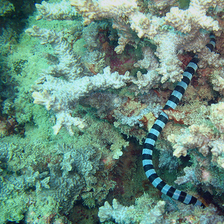

In [47]:
itorch.image(batch:inputs():input()[1])

In [35]:
batch:targets():input()

 800
 262
 453
 639
 820
 297
 720
 714
 389
 928
 678
 214
 860
 677
 496
 101
  32
 658
 615
 215
[torch.IntTensor of size 20]



#  Visualize weights

In [2]:
require 'cudnn'
nn = torch.load("googlenet/alexnet-3456000.t7")

(nn.model.modules[2].modules[1].modules[4].gradWeight)

# Show mean image and std

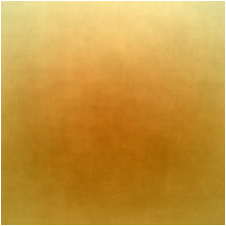

In [10]:
cc = torch.load("data/ImageNet/ILSVRC2012_img_train/mean_img.th7")
itorch.image(cc.mean)

In [14]:
cc.mean

(1,1,.,.) = 
 Columns 1 to 9
  0.5002  0.4996  0.5004  0.5007  0.5008  0.5016  0.5014  0.5011  0.5004
  0.4996  0.4991  0.4997  0.5006  0.5006  0.5006  0.5003  0.4999  0.4991
  0.4987  0.4978  0.4984  0.4995  0.5003  0.5004  0.4990  0.4988  0.4988
  0.4985  0.4979  0.4980  0.4988  0.4993  0.4991  0.4986  0.4983  0.4990
  0.4986  0.4983  0.4982  0.4998  0.5000  0.4994  0.4999  0.5002  0.5005
  0.4994  0.4990  0.4981  0.4999  0.4999  0.5002  0.5001  0.5009  0.5006
  0.4987  0.4996  0.4991  0.4993  0.5001  0.5007  0.5006  0.5005  0.4999
  0.4994  0.4992  0.4993  0.4998  0.5005  0.5009  0.5000  0.4997  0.5003
  0.5008  0.5004  0.4997  0.5007  0.5001  0.5007  0.4998  0.4998  0.5003
  0.4998  0.5001  0.4991  0.4992  0.4994  0.5002  0.4990  0.4998  0.5012
  0.4986  0.4986  0.4985  0.4987  0.4990  0.4998  0.4991  0.4993  0.5003
  0.4983  0.4979  0.4983  0.4989  0.4984  0.4990  0.4993  0.4984  0.4985
  0.4971  0.4976  0.4978  0.4976  0.4986  0.4984  0.4975  0.4980  0.4984
  0.4968  0.4977  0.49

4916  0.4912  0.4922
  0.4912  0.4920  0.4925  0.4925  0.4914  0.4914  0.4911  0.4903  0.4911
  0.4920  0.4919  0.4924  0.4923  0.4906  0.4911  0.4908  0.4889  0.4914
  0.4918  0.4919  0.4905  0.4906  0.4904  0.4912  0.4914  0.4903  0.4905
  0.4918  0.4918  0.4912  0.4906  0.4914  0.4913  0.4909  0.4907  0.4900
  0.4930  0.4932  0.4925  0.4920  0.4926  0.4917  0.4913  0.4904  0.4907
  0.4926  0.4927  0.4925  0.4926  0.4926  0.4918  0.4920  0.4909  0.4910
  0.4925  0.4920  0.4927  0.4922  0.4924  0.4924  0.4915  0.4911  0.4915
  0.4916  0.4907  0.4914  0.4917  0.4917  0.4916  0.4910  0.4908  0.4907
  0.4909  0.4908  0.4911  0.4917  0.4911  0.4908  0.4901  0.4911  0.4912
  0.4907  0.4907  0.4916  0.4912  0.4909  0.4917  0.4899  0.4916  0.4924
  0.4917  0.4915  0.4912  0.4918  0.4922  0.4917  0.4909  0.4917  0.4923
  0.4919  0.4903  0.4914  0.4919  0.4919  0.4915  0.4905  0.4906  0.4918
  0.4911  0.4905  0.4919  0.4914  0.4896  0.4897  0.4892  0.4892  0.4898
  0.4909  0.4915  0.4923  0.49

4789  0.4776
  0.4804  0.4794  0.4799  0.4807  0.4801  0.4790  0.4809  0.4799  0.4780
  0.4791  0.4785  0.4792  0.4807  0.4782  0.4777  0.4798  0.4798  0.4778
  0.4782  0.4767  0.4778  0.4776  0.4764  0.4775  0.4785  0.4783  0.4780
  0.4776  0.4774  0.4773  0.4768  0.4765  0.4776  0.4787  0.4782  0.4775
  0.4772  0.4781  0.4773  0.4769  0.4769  0.4785  0.4797  0.4798  0.4786
  0.4772  0.4768  0.4777  0.4778  0.4773  0.4785  0.4800  0.4812  0.4790
  0.4772  0.4766  0.4775  0.4779  0.4777  0.4776  0.4787  0.4796  0.4783
  0.4772  0.4775  0.4773  0.4774  0.4773  0.4767  0.4769  0.4778  0.4781
  0.4775  0.4772  0.4781  0.4782  0.4769  0.4772  0.4768  0.4776  0.4773
  0.4780  0.4779  0.4793  0.4790  0.4766  0.4765  0.4769  0.4777  0.4775
  0.4776  0.4779  0.4776  0.4778  0.4767  0.4760  0.4759  0.4761  0.4771
  0.4789  0.4776  0.4769  0.4773  0.4774  0.4761  0.4752  0.4764  0.4770
  0.4787  0.4776  0.4771  0.4777  0.4768  0.4759  0.4768  0.4777  0.4774
  0.4770  0.4770  0.4771  0.4766  0.47

4687
  0.4699  0.4679  0.4672  0.4681  0.4670  0.4682  0.4692  0.4685  0.4691
  0.4705  0.4694  0.4686  0.4692  0.4689  0.4679  0.4682  0.4685  0.4691
  0.4702  0.4699  0.4701  0.4703  0.4700  0.4686  0.4681  0.4683  0.4691
  0.4699  0.4696  0.4692  0.4703  0.4695  0.4678  0.4681  0.4679  0.4682
  0.4697  0.4696  0.4690  0.4697  0.4686  0.4680  0.4685  0.4681  0.4673
  0.4691  0.4690  0.4688  0.4692  0.4686  0.4671  0.4685  0.4693  0.4681
  0.4698  0.4694  0.4687  0.4692  0.4688  0.4680  0.4683  0.4681  0.4684
  0.4704  0.4699  0.4685  0.4688  0.4690  0.4700  0.4694  0.4684  0.4686
  0.4715  0.4706  0.4710  0.4709  0.4699  0.4698  0.4701  0.4699  0.4692
  0.4722  0.4703  0.4707  0.4715  0.4710  0.4697  0.4702  0.4704  0.4695
  0.4713  0.4708  0.4711  0.4718  0.4708  0.4700  0.4708  0.4720  0.4711
  0.4709  0.4703  0.4712  0.4719  0.4701  0.4694  0.4705  0.4709  0.4713
  0.4693  0.4692  0.4708  0.4708  0.4695  0.4688  0.4696  0.4695  0.4700
  0.4701  0.4705  0.4705  0.4694  0.4693  0.46

lumns 10 to 18
  0.5006  0.5018  0.5018  0.5016  0.5010  0.5005  0.5014  0.5006  0.5012
  0.4993  0.4995  0.4999  0.4998  0.5001  0.4998  0.5000  0.5004  0.5004
  0.4990  0.4989  0.4995  0.4992  0.5006  0.5012  0.4997  0.5001  0.5004
  0.4991  0.4993  0.5002  0.5005  0.5001  0.5001  0.5004  0.5009  0.5003
  0.5002  0.5001  0.5002  0.5006  0.5007  0.5010  0.5011  0.5022  0.5022
  0.4997  0.5000  0.4995  0.5001  0.5006  0.5009  0.5011  0.5030  0.5025
  0.4993  0.5001  0.5002  0.5005  0.5003  0.5011  0.5014  0.5029  0.5025
  0.5002  0.5006  0.5011  0.5008  0.5012  0.5018  0.5019  0.5021  0.5026
  0.5008  0.5003  0.5003  0.5009  0.5009  0.5014  0.5022  0.5026  0.5029
  0.5004  0.5000  0.5005  0.5007  0.4999  0.5010  0.5013  0.5019  0.5023
  0.4996  0.4998  0.4988  0.4992  0.5001  0.5010  0.5012  0.5018  0.5015
  0.4992  0.4989  0.4989  0.4991  0.5001  0.5015  0.5014  0.5010  0.5008
  0.4992  0.4995  0.4997  0.5000  0.5007  0.5012  0.5008  0.5005  0.5002
  0.4984  0.4988  0.4991  0.5002  0.

0.4916
  0.4914  0.4910  0.4903  0.4889  0.4892  0.4902  0.4905  0.4904  0.4917
  0.4916  0.4899  0.4894  0.4890  0.4896  0.4895  0.4902  0.4907  0.4916
  0.4910  0.4896  0.4881  0.4893  0.4897  0.4901  0.4912  0.4915  0.4932
  0.4892  0.4887  0.4894  0.4901  0.4913  0.4919  0.4924  0.4927  0.4939
  0.4901  0.4891  0.4910  0.4920  0.4928  0.4923  0.4925  0.4927  0.4934
  0.4914  0.4907  0.4916  0.4916  0.4918  0.4918  0.4922  0.4927  0.4935
  0.4901  0.4909  0.4913  0.4909  0.4914  0.4915  0.4920  0.4927  0.4925
  0.4896  0.4906  0.4917  0.4913  0.4921  0.4920  0.4918  0.4918  0.4921
  0.4902  0.4907  0.4911  0.4920  0.4918  0.4917  0.4914  0.4919  0.4920
  0.4905  0.4913  0.4913  0.4912  0.4917  0.4913  0.4910  0.4916  0.4913
  0.4918  0.4908  0.4920  0.4910  0.4909  0.4916  0.4909  0.4922  0.4912
  0.4908  0.4904  0.4916  0.4912  0.4905  0.4906  0.4909  0.4926  0.4915
  0.4898  0.4895  0.4901  0.4899  0.4895  0.4901  0.4901  0.4913  0.4907
  0.4890  0.4887  0.4897  0.4891  0.4884  0.

 0.4776  0.4772  0.4774  0.4769  0.4778  0.4788  0.4791  0.4791  0.4782
  0.4781  0.4795  0.4786  0.4780  0.4780  0.4789  0.4780  0.4770  0.4772
  0.4792  0.4795  0.4781  0.4772  0.4773  0.4788  0.4775  0.4763  0.4764
  0.4778  0.4781  0.4770  0.4777  0.4785  0.4791  0.4781  0.4778  0.4767
  0.4786  0.4794  0.4783  0.4779  0.4791  0.4791  0.4789  0.4780  0.4782
  0.4787  0.4795  0.4790  0.4785  0.4801  0.4800  0.4785  0.4785  0.4789
  0.4785  0.4796  0.4793  0.4808  0.4810  0.4798  0.4787  0.4786  0.4790
  0.4781  0.4796  0.4790  0.4796  0.4807  0.4800  0.4777  0.4780  0.4782
  0.4779  0.4783  0.4788  0.4787  0.4792  0.4791  0.4783  0.4764  0.4769
  0.4783  0.4780  0.4776  0.4782  0.4796  0.4782  0.4771  0.4768  0.4776
  0.4771  0.4771  0.4767  0.4768  0.4775  0.4779  0.4777  0.4773  0.4774
  0.4767  0.4768  0.4766  0.4770  0.4766  0.4770  0.4780  0.4773  0.4760
  0.4768  0.4759  0.4769  0.4778  0.4769  0.4771  0.4776  0.4778  0.4761
  0.4749  0.4747  0.4761  0.4764  0.4763  0.4773  0.

 0.4693  0.4686  0.4677  0.4668  0.4672  0.4675  0.4675  0.4676
  0.4691  0.4691  0.4680  0.4681  0.4680  0.4671  0.4675  0.4677  0.4687
  0.4685  0.4684  0.4693  0.4689  0.4683  0.4668  0.4668  0.4671  0.4688
  0.4674  0.4677  0.4686  0.4681  0.4681  0.4682  0.4671  0.4679  0.4688
  0.4665  0.4673  0.4682  0.4682  0.4684  0.4676  0.4680  0.4686  0.4685
  0.4683  0.4687  0.4691  0.4693  0.4693  0.4688  0.4693  0.4698  0.4682
  0.4695  0.4698  0.4706  0.4698  0.4699  0.4697  0.4705  0.4709  0.4691
  0.4698  0.4698  0.4706  0.4702  0.4708  0.4699  0.4700  0.4709  0.4702
  0.4686  0.4695  0.4698  0.4701  0.4708  0.4696  0.4698  0.4708  0.4706
  0.4702  0.4712  0.4710  0.4698  0.4704  0.4708  0.4719  0.4721  0.4718
  0.4706  0.4705  0.4710  0.4700  0.4705  0.4705  0.4720  0.4733  0.4723
  0.4707  0.4708  0.4715  0.4703  0.4708  0.4713  0.4719  0.4725  0.4731
  0.4697  0.4699  0.4709  0.4705  0.4709  0.4707  0.4700  0.4702  0.4710
  0.4694  0.4691  0.4691  0.4700  0.4713  0.4700  0.4696  0.


  0.5013  0.5009  0.5016  0.5021  0.5027  0.5042  0.5051  0.5050  0.5041
  0.5013  0.5019  0.5018  0.5015  0.5029  0.5047  0.5046  0.5043  0.5039
  0.5014  0.5020  0.5021  0.5022  0.5037  0.5046  0.5044  0.5051  0.5051
  0.5009  0.5016  0.5021  0.5028  0.5036  0.5048  0.5040  0.5055  0.5057
  0.5019  0.5009  0.5013  0.5033  0.5036  0.5038  0.5044  0.5051  0.5058
  0.5015  0.5014  0.5025  0.5031  0.5033  0.5043  0.5051  0.5048  0.5049
  0.5015  0.5019  0.5032  0.5030  0.5040  0.5048  0.5043  0.5045  0.5041
  0.5021  0.5024  0.5029  0.5027  0.5035  0.5042  0.5040  0.5043  0.5036
  0.5024  0.5021  0.5023  0.5028  0.5030  0.5033  0.5031  0.5031  0.5024
  0.5021  0.5019  0.5014  0.5026  0.5034  0.5032  0.5020  0.5018  0.5024
  0.5007  0.5018  0.5017  0.5017  0.5024  0.5030  0.5022  0.5021  0.5020
  0.4999  0.5007  0.5009  0.5008  0.5021  0.5027  0.5022  0.5017  0.5018
  0.5000  0.5005  0.5008  0.5001  0.5018  0.5023  0.5029  0.5020  0.5014
  0.4993  0.4996  0.5001  0.4992  0.4999  0.5017  

7  0.4917  0.4920  0.4920  0.4929  0.4921  0.4918  0.4925  0.4930
  0.4927  0.4929  0.4922  0.4924  0.4935  0.4929  0.4927  0.4936  0.4943
  0.4934  0.4933  0.4942  0.4939  0.4945  0.4937  0.4937  0.4931  0.4942
  0.4940  0.4942  0.4945  0.4941  0.4953  0.4950  0.4938  0.4929  0.4941
  0.4935  0.4925  0.4920  0.4925  0.4948  0.4951  0.4938  0.4933  0.4938
  0.4929  0.4912  0.4907  0.4924  0.4936  0.4943  0.4929  0.4921  0.4931
  0.4914  0.4912  0.4904  0.4918  0.4931  0.4927  0.4919  0.4916  0.4921
  0.4907  0.4889  0.4904  0.4907  0.4915  0.4928  0.4923  0.4909  0.4906
  0.4914  0.4893  0.4908  0.4909  0.4918  0.4929  0.4910  0.4899  0.4909
  0.4911  0.4910  0.4916  0.4910  0.4912  0.4921  0.4904  0.4898  0.4906
  0.4899  0.4897  0.4906  0.4901  0.4903  0.4916  0.4907  0.4891  0.4889
  0.4908  0.4907  0.4898  0.4889  0.4886  0.4897  0.4899  0.4893  0.4888
  0.4904  0.4900  0.4889  0.4883  0.4882  0.4894  0.4887  0.4896  0.4902
  0.4887  0.4882  0.4878  0.4883  0.4879  0.4888  0.4882  

1  0.4775  0.4775  0.4767  0.4770  0.4777  0.4770  0.4768
  0.4775  0.4772  0.4769  0.4764  0.4763  0.4766  0.4778  0.4779  0.4779
  0.4764  0.4763  0.4765  0.4758  0.4744  0.4751  0.4762  0.4761  0.4778
  0.4763  0.4764  0.4758  0.4759  0.4762  0.4754  0.4753  0.4751  0.4776
  0.4776  0.4775  0.4769  0.4763  0.4767  0.4770  0.4759  0.4741  0.4769
  0.4783  0.4768  0.4765  0.4763  0.4766  0.4770  0.4762  0.4758  0.4765
  0.4791  0.4770  0.4769  0.4768  0.4767  0.4763  0.4773  0.4773  0.4777
  0.4779  0.4769  0.4766  0.4766  0.4765  0.4768  0.4775  0.4768  0.4776
  0.4774  0.4765  0.4759  0.4752  0.4753  0.4757  0.4759  0.4762  0.4757
  0.4768  0.4757  0.4766  0.4758  0.4751  0.4760  0.4746  0.4742  0.4745
  0.4767  0.4755  0.4755  0.4767  0.4770  0.4759  0.4745  0.4735  0.4746
  0.4762  0.4762  0.4756  0.4765  0.4768  0.4751  0.4741  0.4743  0.4741
  0.4758  0.4769  0.4762  0.4760  0.4759  0.4742  0.4741  0.4734  0.4718
  0.4756  0.4762  0.4750  0.4763  0.4759  0.4758  0.4741  0.4730  

8  0.4686  0.4678  0.4673  0.4665  0.4653  0.4670
  0.4690  0.4699  0.4699  0.4696  0.4696  0.4681  0.4664  0.4650  0.4663
  0.4689  0.4699  0.4696  0.4693  0.4701  0.4687  0.4667  0.4660  0.4656
  0.4698  0.4708  0.4705  0.4692  0.4698  0.4690  0.4675  0.4667  0.4669
  0.4691  0.4706  0.4699  0.4684  0.4684  0.4679  0.4662  0.4664  0.4670
  0.4687  0.4701  0.4695  0.4682  0.4667  0.4665  0.4654  0.4663  0.4659
  0.4691  0.4696  0.4691  0.4696  0.4683  0.4671  0.4673  0.4671  0.4679
  0.4688  0.4688  0.4677  0.4683  0.4692  0.4679  0.4674  0.4666  0.4679
  0.4701  0.4701  0.4686  0.4679  0.4690  0.4692  0.4679  0.4669  0.4672
  0.4707  0.4697  0.4702  0.4692  0.4696  0.4694  0.4685  0.4684  0.4678
  0.4713  0.4703  0.4712  0.4700  0.4694  0.4701  0.4694  0.4692  0.4696
  0.4722  0.4709  0.4712  0.4701  0.4694  0.4693  0.4691  0.4698  0.4694
  0.4715  0.4713  0.4708  0.4697  0.4688  0.4688  0.4692  0.4695  0.4695
  0.4702  0.4701  0.4707  0.4707  0.4692  0.4685  0.4685  0.4698  0.4696
 

042  0.5047  0.5051  0.5044  0.5045  0.5056  0.5070  0.5073
  0.5048  0.5057  0.5046  0.5049  0.5055  0.5052  0.5066  0.5068  0.5072
  0.5059  0.5056  0.5051  0.5068  0.5062  0.5058  0.5067  0.5072  0.5073
  0.5057  0.5053  0.5053  0.5063  0.5061  0.5064  0.5066  0.5065  0.5070
  0.5057  0.5053  0.5053  0.5050  0.5046  0.5056  0.5059  0.5072  0.5079
  0.5043  0.5052  0.5057  0.5051  0.5041  0.5053  0.5054  0.5063  0.5072
  0.5037  0.5049  0.5053  0.5061  0.5049  0.5048  0.5051  0.5053  0.5060
  0.5030  0.5043  0.5048  0.5054  0.5046  0.5039  0.5042  0.5052  0.5056
  0.5028  0.5036  0.5034  0.5053  0.5044  0.5039  0.5048  0.5056  0.5063
  0.5030  0.5032  0.5035  0.5042  0.5030  0.5031  0.5037  0.5041  0.5046
  0.5031  0.5029  0.5024  0.5041  0.5038  0.5035  0.5029  0.5036  0.5045
  0.5021  0.5023  0.5023  0.5034  0.5033  0.5040  0.5036  0.5039  0.5048
  0.5013  0.5019  0.5018  0.5026  0.5030  0.5034  0.5034  0.5035  0.5048
  0.5001  0.5007  0.5017  0.5024  0.5030  0.5030  0.5034  0.5039

956  0.4959  0.4949  0.4948  0.4935  0.4960  0.4973
  0.4949  0.4951  0.4951  0.4944  0.4954  0.4953  0.4932  0.4955  0.4966
  0.4944  0.4949  0.4945  0.4948  0.4948  0.4954  0.4950  0.4960  0.4975
  0.4942  0.4947  0.4947  0.4956  0.4966  0.4962  0.4956  0.4961  0.4977
  0.4938  0.4945  0.4941  0.4944  0.4955  0.4950  0.4954  0.4968  0.4976
  0.4928  0.4928  0.4927  0.4927  0.4935  0.4940  0.4948  0.4961  0.4970
  0.4917  0.4921  0.4922  0.4918  0.4924  0.4936  0.4939  0.4948  0.4966
  0.4901  0.4911  0.4909  0.4910  0.4923  0.4933  0.4927  0.4938  0.4947
  0.4906  0.4906  0.4907  0.4919  0.4923  0.4932  0.4930  0.4928  0.4931
  0.4904  0.4902  0.4903  0.4917  0.4907  0.4906  0.4914  0.4920  0.4928
  0.4910  0.4903  0.4904  0.4911  0.4902  0.4901  0.4895  0.4910  0.4932
  0.4889  0.4896  0.4899  0.4908  0.4903  0.4901  0.4895  0.4902  0.4914
  0.4890  0.4890  0.4890  0.4890  0.4896  0.4890  0.4894  0.4899  0.4897
  0.4884  0.4885  0.4884  0.4893  0.4889  0.4889  0.4888  0.4895  0.4893

785  0.4782  0.4789  0.4791  0.4786  0.4795
  0.4791  0.4788  0.4781  0.4774  0.4786  0.4790  0.4796  0.4789  0.4795
  0.4797  0.4791  0.4779  0.4770  0.4780  0.4784  0.4786  0.4774  0.4790
  0.4783  0.4778  0.4777  0.4780  0.4782  0.4778  0.4786  0.4782  0.4784
  0.4783  0.4776  0.4771  0.4777  0.4796  0.4805  0.4796  0.4789  0.4785
  0.4776  0.4777  0.4781  0.4775  0.4791  0.4798  0.4787  0.4783  0.4791
  0.4780  0.4782  0.4784  0.4786  0.4789  0.4792  0.4782  0.4775  0.4791
  0.4777  0.4770  0.4789  0.4792  0.4780  0.4789  0.4787  0.4770  0.4782
  0.4765  0.4779  0.4791  0.4798  0.4788  0.4780  0.4778  0.4783  0.4791
  0.4752  0.4765  0.4778  0.4786  0.4771  0.4765  0.4771  0.4767  0.4781
  0.4755  0.4758  0.4770  0.4776  0.4762  0.4754  0.4758  0.4753  0.4760
  0.4747  0.4754  0.4751  0.4772  0.4778  0.4760  0.4763  0.4757  0.4758
  0.4732  0.4753  0.4745  0.4755  0.4767  0.4772  0.4766  0.4758  0.4755
  0.4723  0.4749  0.4756  0.4757  0.4764  0.4765  0.4764  0.4758  0.4747
  0.472

664  0.4671  0.4668  0.4656  0.4669
  0.4669  0.4676  0.4669  0.4661  0.4656  0.4661  0.4671  0.4663  0.4659
  0.4668  0.4675  0.4674  0.4664  0.4654  0.4658  0.4671  0.4677  0.4667
  0.4667  0.4664  0.4666  0.4668  0.4653  0.4654  0.4671  0.4675  0.4671
  0.4656  0.4655  0.4651  0.4648  0.4649  0.4651  0.4664  0.4670  0.4666
  0.4657  0.4647  0.4646  0.4640  0.4654  0.4662  0.4673  0.4681  0.4668
  0.4670  0.4653  0.4658  0.4664  0.4670  0.4672  0.4674  0.4679  0.4664
  0.4677  0.4662  0.4654  0.4664  0.4660  0.4664  0.4663  0.4659  0.4664
  0.4676  0.4663  0.4660  0.4659  0.4665  0.4657  0.4668  0.4670  0.4664
  0.4673  0.4670  0.4679  0.4675  0.4680  0.4678  0.4667  0.4665  0.4667
  0.4689  0.4686  0.4693  0.4696  0.4692  0.4699  0.4687  0.4676  0.4689
  0.4688  0.4695  0.4693  0.4699  0.4698  0.4691  0.4695  0.4695  0.4696
  0.4691  0.4695  0.4695  0.4705  0.4696  0.4685  0.4694  0.4696  0.4692
  0.4690  0.4696  0.4704  0.4705  0.4706  0.4698  0.4703  0.4699  0.4694
  0.4685  0.468

.5078  0.5087  0.5087  0.5087  0.5090  0.5084
  0.5078  0.5073  0.5062  0.5071  0.5085  0.5097  0.5095  0.5086  0.5091
  0.5068  0.5078  0.5069  0.5070  0.5085  0.5090  0.5088  0.5079  0.5087
  0.5079  0.5077  0.5073  0.5075  0.5074  0.5079  0.5095  0.5088  0.5087
  0.5077  0.5073  0.5069  0.5068  0.5063  0.5077  0.5089  0.5090  0.5100
  0.5059  0.5054  0.5059  0.5068  0.5068  0.5076  0.5085  0.5087  0.5091
  0.5056  0.5053  0.5059  0.5063  0.5065  0.5078  0.5080  0.5075  0.5073
  0.5048  0.5046  0.5054  0.5055  0.5063  0.5073  0.5071  0.5069  0.5079
  0.5046  0.5042  0.5052  0.5062  0.5063  0.5079  0.5075  0.5064  0.5069
  0.5043  0.5044  0.5047  0.5053  0.5063  0.5072  0.5072  0.5069  0.5070
  0.5050  0.5052  0.5050  0.5056  0.5062  0.5069  0.5072  0.5070  0.5071
  0.5049  0.5051  0.5056  0.5057  0.5061  0.5068  0.5074  0.5065  0.5074
  0.5053  0.5051  0.5048  0.5053  0.5059  0.5061  0.5067  0.5063  0.5071
  0.5051  0.5042  0.5053  0.5066  0.5055  0.5063  0.5062  0.5068  0.5074
  0.5

.4993  0.5001  0.4997  0.4994  0.4993
  0.4977  0.4984  0.4980  0.4982  0.4999  0.5010  0.4998  0.4997  0.4992
  0.4983  0.4981  0.4982  0.4977  0.4992  0.5001  0.4992  0.4989  0.4994
  0.4987  0.4983  0.4985  0.4987  0.4991  0.4999  0.4988  0.4987  0.4991
  0.4980  0.4977  0.4974  0.4987  0.4994  0.4996  0.4980  0.4980  0.4990
  0.4976  0.4975  0.4973  0.4967  0.4979  0.4986  0.4980  0.4987  0.4996
  0.4966  0.4969  0.4976  0.4966  0.4968  0.4980  0.4985  0.4993  0.4995
  0.4953  0.4956  0.4964  0.4961  0.4954  0.4972  0.4981  0.4988  0.4986
  0.4947  0.4953  0.4960  0.4965  0.4956  0.4964  0.4977  0.4985  0.4972
  0.4927  0.4936  0.4947  0.4960  0.4965  0.4963  0.4965  0.4971  0.4963
  0.4926  0.4927  0.4928  0.4937  0.4947  0.4954  0.4953  0.4960  0.4964
  0.4914  0.4916  0.4919  0.4922  0.4935  0.4938  0.4942  0.4952  0.4949
  0.4898  0.4906  0.4908  0.4917  0.4926  0.4927  0.4923  0.4922  0.4931
  0.4899  0.4904  0.4910  0.4916  0.4926  0.4933  0.4925  0.4920  0.4934
  0.4906  0.4

.4828  0.4831  0.4832  0.4837
  0.4808  0.4814  0.4810  0.4817  0.4832  0.4837  0.4835  0.4821  0.4831
  0.4793  0.4798  0.4807  0.4821  0.4829  0.4833  0.4828  0.4825  0.4822
  0.4793  0.4796  0.4804  0.4816  0.4813  0.4821  0.4821  0.4812  0.4809
  0.4796  0.4795  0.4797  0.4806  0.4811  0.4814  0.4811  0.4799  0.4796
  0.4794  0.4795  0.4808  0.4813  0.4809  0.4806  0.4808  0.4784  0.4790
  0.4795  0.4803  0.4811  0.4793  0.4797  0.4796  0.4786  0.4785  0.4790
  0.4782  0.4788  0.4785  0.4782  0.4783  0.4791  0.4785  0.4784  0.4795
  0.4789  0.4784  0.4791  0.4796  0.4786  0.4788  0.4777  0.4767  0.4778
  0.4790  0.4786  0.4791  0.4799  0.4790  0.4777  0.4774  0.4780  0.4785
  0.4768  0.4775  0.4786  0.4782  0.4792  0.4787  0.4772  0.4775  0.4785
  0.4769  0.4778  0.4773  0.4770  0.4781  0.4785  0.4770  0.4767  0.4774
  0.4765  0.4772  0.4765  0.4766  0.4760  0.4759  0.4769  0.4772  0.4772
  0.4755  0.4763  0.4765  0.4749  0.4750  0.4757  0.4762  0.4763  0.4763
  0.4735  0.4754  0.4

.4677  0.4676  0.4677
  0.4668  0.4673  0.4686  0.4679  0.4670  0.4674  0.4682  0.4678  0.4682
  0.4663  0.4660  0.4672  0.4668  0.4674  0.4688  0.4689  0.4681  0.4686
  0.4670  0.4673  0.4684  0.4681  0.4682  0.4691  0.4685  0.4675  0.4693
  0.4669  0.4679  0.4694  0.4688  0.4682  0.4678  0.4675  0.4681  0.4700
  0.4671  0.4669  0.4676  0.4690  0.4688  0.4678  0.4678  0.4701  0.4705
  0.4663  0.4677  0.4680  0.4677  0.4686  0.4686  0.4682  0.4685  0.4696
  0.4675  0.4680  0.4684  0.4683  0.4683  0.4700  0.4696  0.4668  0.4684
  0.4678  0.4676  0.4677  0.4682  0.4691  0.4707  0.4704  0.4693  0.4692
  0.4674  0.4685  0.4690  0.4688  0.4697  0.4704  0.4709  0.4705  0.4707
  0.4679  0.4682  0.4698  0.4696  0.4683  0.4694  0.4707  0.4712  0.4709
  0.4681  0.4685  0.4692  0.4693  0.4675  0.4696  0.4705  0.4703  0.4709
  0.4686  0.4698  0.4705  0.4698  0.4686  0.4699  0.4702  0.4690  0.4695
  0.4696  0.4699  0.4701  0.4696  0.4705  0.4697  0.4682  0.4690  0.4688
  0.4694  0.4694  0.4697  0.4

 0.5084  0.5076  0.5082  0.5083
  0.5079  0.5074  0.5076  0.5075  0.5079  0.5074  0.5079  0.5084  0.5079
  0.5082  0.5070  0.5067  0.5071  0.5066  0.5067  0.5087  0.5091  0.5085
  0.5078  0.5065  0.5063  0.5065  0.5066  0.5066  0.5080  0.5094  0.5087
  0.5080  0.5061  0.5066  0.5073  0.5069  0.5064  0.5073  0.5084  0.5082
  0.5076  0.5061  0.5062  0.5066  0.5056  0.5056  0.5066  0.5072  0.5073
  0.5069  0.5061  0.5064  0.5055  0.5048  0.5056  0.5070  0.5075  0.5072
  0.5075  0.5064  0.5059  0.5059  0.5051  0.5056  0.5067  0.5081  0.5083
  0.5069  0.5062  0.5058  0.5058  0.5061  0.5063  0.5064  0.5074  0.5084
  0.5066  0.5059  0.5063  0.5070  0.5059  0.5059  0.5061  0.5066  0.5077
  0.5071  0.5055  0.5059  0.5070  0.5066  0.5059  0.5052  0.5066  0.5077
  0.5075  0.5062  0.5065  0.5068  0.5063  0.5054  0.5057  0.5067  0.5070
  0.5072  0.5059  0.5064  0.5062  0.5051  0.5046  0.5050  0.5061  0.5060
  0.5065  0.5048  0.5049  0.5050  0.5042  0.5036  0.5041  0.5048  0.5052
  0.5054  0.5045  0

 0.4997  0.5002  0.5009
  0.4993  0.4995  0.4994  0.5003  0.5002  0.4995  0.4997  0.4991  0.5005
  0.4988  0.4991  0.4989  0.4990  0.4990  0.4997  0.4997  0.4995  0.5007
  0.4990  0.4989  0.4990  0.4986  0.4987  0.4988  0.4998  0.5006  0.4999
  0.4987  0.4988  0.4982  0.4979  0.4971  0.4968  0.4980  0.4986  0.4987
  0.4990  0.4993  0.4982  0.4973  0.4965  0.4966  0.4975  0.4975  0.4985
  0.4986  0.4988  0.4978  0.4966  0.4964  0.4974  0.4985  0.4983  0.4987
  0.4977  0.4975  0.4974  0.4967  0.4966  0.4973  0.4980  0.4993  0.4993
  0.4965  0.4972  0.4980  0.4973  0.4972  0.4974  0.4981  0.4985  0.4984
  0.4960  0.4976  0.4976  0.4971  0.4971  0.4971  0.4975  0.4978  0.4983
  0.4967  0.4960  0.4955  0.4954  0.4956  0.4966  0.4971  0.4976  0.4974
  0.4951  0.4949  0.4945  0.4942  0.4942  0.4954  0.4961  0.4957  0.4964
  0.4934  0.4930  0.4928  0.4937  0.4935  0.4940  0.4939  0.4945  0.4948
  0.4934  0.4925  0.4930  0.4933  0.4930  0.4931  0.4942  0.4939  0.4931
  0.4932  0.4925  0.4929  0

 0.4857  0.4847
  0.4823  0.4808  0.4824  0.4831  0.4840  0.4860  0.4869  0.4866  0.4854
  0.4811  0.4799  0.4813  0.4822  0.4825  0.4840  0.4848  0.4855  0.4841
  0.4808  0.4798  0.4808  0.4817  0.4818  0.4831  0.4844  0.4843  0.4835
  0.4799  0.4789  0.4796  0.4799  0.4802  0.4829  0.4841  0.4845  0.4839
  0.4799  0.4788  0.4788  0.4809  0.4814  0.4815  0.4822  0.4826  0.4838
  0.4799  0.4787  0.4793  0.4805  0.4813  0.4802  0.4806  0.4826  0.4820
  0.4807  0.4801  0.4799  0.4786  0.4806  0.4800  0.4805  0.4822  0.4814
  0.4792  0.4793  0.4789  0.4797  0.4804  0.4802  0.4810  0.4807  0.4820
  0.4791  0.4791  0.4797  0.4820  0.4809  0.4806  0.4804  0.4798  0.4815
  0.4783  0.4776  0.4784  0.4801  0.4803  0.4804  0.4797  0.4807  0.4815
  0.4781  0.4764  0.4774  0.4782  0.4794  0.4804  0.4795  0.4798  0.4800
  0.4765  0.4761  0.4771  0.4776  0.4775  0.4799  0.4800  0.4791  0.4780
  0.4746  0.4749  0.4758  0.4753  0.4763  0.4778  0.4777  0.4769  0.4763
  0.4753  0.4754  0.4755  0.4750  0

 0.4693
  0.4687  0.4692  0.4696  0.4704  0.4702  0.4689  0.4686  0.4685  0.4682
  0.4694  0.4697  0.4686  0.4687  0.4693  0.4681  0.4680  0.4679  0.4688
  0.4690  0.4691  0.4688  0.4689  0.4687  0.4679  0.4668  0.4667  0.4676
  0.4698  0.4694  0.4697  0.4691  0.4693  0.4692  0.4672  0.4663  0.4662
  0.4697  0.4696  0.4697  0.4691  0.4691  0.4692  0.4667  0.4656  0.4663
  0.4698  0.4702  0.4703  0.4697  0.4688  0.4690  0.4673  0.4663  0.4664
  0.4704  0.4700  0.4693  0.4686  0.4689  0.4686  0.4667  0.4683  0.4678
  0.4695  0.4696  0.4697  0.4695  0.4694  0.4687  0.4674  0.4686  0.4684
  0.4708  0.4705  0.4708  0.4703  0.4704  0.4700  0.4701  0.4707  0.4704
  0.4712  0.4710  0.4710  0.4707  0.4710  0.4708  0.4713  0.4709  0.4698
  0.4710  0.4706  0.4708  0.4711  0.4712  0.4709  0.4704  0.4700  0.4696
  0.4705  0.4710  0.4697  0.4696  0.4693  0.4696  0.4696  0.4693  0.4686
  0.4696  0.4700  0.4697  0.4687  0.4679  0.4680  0.4688  0.4678  0.4676
  0.4691  0.4692  0.4698  0.4696  0.4674  0

0  0.5095  0.5098
  0.5088  0.5093  0.5090  0.5089  0.5089  0.5091  0.5085  0.5090  0.5093
  0.5093  0.5085  0.5080  0.5080  0.5087  0.5089  0.5084  0.5083  0.5085
  0.5090  0.5077  0.5069  0.5070  0.5070  0.5070  0.5077  0.5073  0.5070
  0.5080  0.5071  0.5070  0.5075  0.5071  0.5070  0.5076  0.5075  0.5078
  0.5070  0.5076  0.5069  0.5070  0.5075  0.5075  0.5084  0.5077  0.5072
  0.5079  0.5087  0.5077  0.5074  0.5083  0.5087  0.5092  0.5087  0.5087
  0.5083  0.5086  0.5083  0.5078  0.5084  0.5088  0.5097  0.5091  0.5089
  0.5077  0.5081  0.5082  0.5081  0.5087  0.5095  0.5097  0.5099  0.5101
  0.5081  0.5077  0.5076  0.5089  0.5089  0.5091  0.5090  0.5103  0.5105
  0.5079  0.5065  0.5058  0.5066  0.5068  0.5078  0.5091  0.5094  0.5097
  0.5062  0.5059  0.5061  0.5060  0.5065  0.5070  0.5086  0.5086  0.5082
  0.5054  0.5051  0.5051  0.5053  0.5055  0.5056  0.5067  0.5076  0.5078
  0.5055  0.5045  0.5046  0.5055  0.5067  0.5050  0.5057  0.5074  0.5079
  0.5055  0.5046  0.5056  0.5067 

8  0.5009
  0.4998  0.4995  0.5006  0.5008  0.5007  0.5006  0.5009  0.4997  0.5002
  0.5000  0.5001  0.5005  0.5006  0.4992  0.4992  0.4996  0.4998  0.5008
  0.4997  0.5000  0.5003  0.4999  0.4995  0.4997  0.4987  0.5001  0.5011
  0.4991  0.5000  0.4996  0.4982  0.4985  0.4991  0.4999  0.4996  0.4996
  0.5000  0.4995  0.4984  0.4982  0.4985  0.4982  0.4989  0.4994  0.4991
  0.4984  0.4992  0.4989  0.4984  0.4982  0.4984  0.4983  0.4993  0.4998
  0.4984  0.5001  0.4992  0.4997  0.4996  0.4991  0.4987  0.4987  0.4993
  0.4988  0.4991  0.4983  0.4984  0.4990  0.4984  0.4987  0.4980  0.4983
  0.4986  0.4991  0.4985  0.4969  0.4984  0.4981  0.4988  0.4979  0.4979
  0.4972  0.4987  0.4999  0.4985  0.4981  0.4982  0.4983  0.4974  0.4970
  0.4961  0.4974  0.4983  0.4979  0.4973  0.4972  0.4972  0.4964  0.4968
  0.4958  0.4969  0.4959  0.4958  0.4974  0.4968  0.4967  0.4969  0.4959
  0.4949  0.4941  0.4933  0.4946  0.4956  0.4962  0.4966  0.4962  0.4944
  0.4940  0.4939  0.4933  0.4935  0.4947 

8
  0.4855  0.4839  0.4845  0.4852  0.4854  0.4860  0.4855  0.4846  0.4846
  0.4855  0.4852  0.4836  0.4848  0.4856  0.4850  0.4836  0.4831  0.4816
  0.4837  0.4836  0.4829  0.4835  0.4839  0.4841  0.4834  0.4818  0.4800
  0.4843  0.4829  0.4832  0.4835  0.4828  0.4823  0.4819  0.4810  0.4794
  0.4841  0.4830  0.4823  0.4812  0.4811  0.4800  0.4793  0.4789  0.4777
  0.4819  0.4818  0.4799  0.4793  0.4797  0.4795  0.4798  0.4787  0.4778
  0.4817  0.4814  0.4795  0.4800  0.4798  0.4799  0.4796  0.4773  0.4772
  0.4824  0.4815  0.4805  0.4788  0.4785  0.4797  0.4793  0.4774  0.4767
  0.4817  0.4807  0.4800  0.4784  0.4780  0.4779  0.4781  0.4789  0.4783
  0.4814  0.4801  0.4804  0.4797  0.4789  0.4787  0.4792  0.4781  0.4786
  0.4797  0.4791  0.4796  0.4792  0.4774  0.4786  0.4791  0.4781  0.4775
  0.4787  0.4784  0.4789  0.4800  0.4788  0.4791  0.4781  0.4777  0.4764
  0.4775  0.4775  0.4780  0.4787  0.4784  0.4782  0.4768  0.4765  0.4759
  0.4775  0.4770  0.4779  0.4782  0.4768  0.4766 

97  0.4685  0.4674  0.4680  0.4677  0.4686  0.4698  0.4697  0.4692
  0.4681  0.4683  0.4677  0.4678  0.4670  0.4684  0.4697  0.4703  0.4699
  0.4670  0.4670  0.4671  0.4668  0.4675  0.4691  0.4704  0.4710  0.4705
  0.4670  0.4674  0.4670  0.4666  0.4676  0.4694  0.4708  0.4707  0.4703
  0.4678  0.4685  0.4670  0.4673  0.4686  0.4700  0.4711  0.4709  0.4711
  0.4675  0.4687  0.4686  0.4689  0.4694  0.4694  0.4707  0.4712  0.4707
  0.4674  0.4690  0.4691  0.4689  0.4687  0.4681  0.4693  0.4706  0.4700
  0.4691  0.4684  0.4673  0.4681  0.4683  0.4688  0.4697  0.4691  0.4704
  0.4697  0.4680  0.4664  0.4669  0.4670  0.4673  0.4683  0.4677  0.4686
  0.4693  0.4687  0.4672  0.4673  0.4676  0.4679  0.4681  0.4689  0.4697
  0.4691  0.4683  0.4673  0.4677  0.4679  0.4680  0.4676  0.4696  0.4695
  0.4680  0.4684  0.4693  0.4687  0.4678  0.4691  0.4678  0.4689  0.4704
  0.4679  0.4692  0.4694  0.4688  0.4685  0.4694  0.4679  0.4684  0.4697
  0.4699  0.4704  0.4693  0.4694  0.4696  0.4697  0.4685 

124
  0.5099  0.5118  0.5117  0.5122  0.5116  0.5116  0.5120  0.5125  0.5116
  0.5090  0.5106  0.5096  0.5108  0.5111  0.5110  0.5113  0.5115  0.5107
  0.5086  0.5093  0.5093  0.5102  0.5106  0.5101  0.5100  0.5099  0.5101
  0.5081  0.5094  0.5101  0.5100  0.5097  0.5095  0.5090  0.5096  0.5098
  0.5078  0.5090  0.5102  0.5099  0.5093  0.5095  0.5086  0.5094  0.5107
  0.5089  0.5096  0.5111  0.5098  0.5093  0.5108  0.5102  0.5103  0.5106
  0.5094  0.5102  0.5113  0.5105  0.5107  0.5110  0.5116  0.5116  0.5110
  0.5109  0.5116  0.5121  0.5117  0.5118  0.5124  0.5123  0.5117  0.5121
  0.5103  0.5110  0.5115  0.5113  0.5110  0.5115  0.5111  0.5114  0.5121
  0.5092  0.5095  0.5100  0.5099  0.5098  0.5100  0.5099  0.5112  0.5120
  0.5082  0.5081  0.5096  0.5087  0.5084  0.5088  0.5089  0.5095  0.5105
  0.5074  0.5070  0.5084  0.5083  0.5083  0.5083  0.5089  0.5090  0.5095
  0.5074  0.5069  0.5076  0.5080  0.5080  0.5077  0.5087  0.5097  0.5094
  0.5077  0.5074  0.5073  0.5082  0.5087  0.508

5023  0.5026  0.5020  0.5017  0.5036  0.5030  0.5016  0.5018  0.5018
  0.5015  0.5016  0.5010  0.5016  0.5027  0.5032  0.5019  0.5021  0.5009
  0.5003  0.5002  0.5005  0.5024  0.5027  0.5024  0.5020  0.5026  0.5012
  0.4997  0.5000  0.4989  0.5012  0.5036  0.5024  0.5017  0.5024  0.5019
  0.4996  0.5009  0.4991  0.5000  0.5022  0.5025  0.5019  0.5015  0.5017
  0.5007  0.5010  0.4998  0.5015  0.5018  0.5023  0.5026  0.5016  0.5013
  0.5002  0.5010  0.5003  0.5008  0.5012  0.5021  0.5025  0.5012  0.5015
  0.4996  0.5005  0.5001  0.5015  0.5015  0.5025  0.5025  0.5012  0.5009
  0.4999  0.5000  0.4996  0.5004  0.5016  0.5038  0.5026  0.5011  0.5008
  0.4989  0.4998  0.4992  0.4993  0.5006  0.5020  0.5015  0.5007  0.5002
  0.4981  0.4988  0.4992  0.5003  0.4995  0.5004  0.5003  0.5007  0.4998
  0.4959  0.4976  0.4987  0.5000  0.5010  0.5002  0.4994  0.4996  0.4986
  0.4954  0.4973  0.4980  0.4993  0.4993  0.4986  0.4983  0.4990  0.4985
  0.4953  0.4966  0.4976  0.4994  0.4982  0.4984  0.498

4830  0.4823  0.4836  0.4836  0.4824  0.4825  0.4827  0.4834
  0.4814  0.4822  0.4814  0.4823  0.4825  0.4823  0.4833  0.4831  0.4839
  0.4810  0.4821  0.4816  0.4818  0.4825  0.4828  0.4817  0.4823  0.4831
  0.4820  0.4831  0.4825  0.4832  0.4838  0.4831  0.4829  0.4828  0.4826
  0.4811  0.4823  0.4811  0.4816  0.4829  0.4835  0.4844  0.4839  0.4835
  0.4799  0.4807  0.4810  0.4809  0.4821  0.4843  0.4836  0.4848  0.4849
  0.4789  0.4797  0.4792  0.4802  0.4805  0.4822  0.4818  0.4822  0.4827
  0.4780  0.4791  0.4776  0.4795  0.4808  0.4820  0.4813  0.4812  0.4814
  0.4796  0.4792  0.4783  0.4792  0.4812  0.4810  0.4805  0.4808  0.4805
  0.4798  0.4789  0.4783  0.4774  0.4796  0.4804  0.4804  0.4814  0.4800
  0.4770  0.4776  0.4771  0.4773  0.4784  0.4801  0.4791  0.4798  0.4791
  0.4759  0.4761  0.4763  0.4765  0.4777  0.4787  0.4784  0.4784  0.4779
  0.4748  0.4745  0.4758  0.4767  0.4774  0.4772  0.4778  0.4775  0.4767
  0.4754  0.4759  0.4771  0.4772  0.4773  0.4775  0.4774  0.477

4700  0.4703  0.4691  0.4688  0.4686  0.4684  0.4688
  0.4704  0.4702  0.4694  0.4694  0.4707  0.4705  0.4696  0.4692  0.4680
  0.4696  0.4694  0.4697  0.4700  0.4703  0.4694  0.4698  0.4692  0.4689
  0.4702  0.4694  0.4701  0.4709  0.4700  0.4688  0.4693  0.4685  0.4700
  0.4708  0.4707  0.4701  0.4702  0.4703  0.4697  0.4692  0.4697  0.4693
  0.4702  0.4715  0.4713  0.4716  0.4715  0.4707  0.4702  0.4704  0.4697
  0.4703  0.4709  0.4718  0.4717  0.4707  0.4709  0.4707  0.4695  0.4692
  0.4699  0.4708  0.4702  0.4702  0.4704  0.4696  0.4699  0.4686  0.4684
  0.4701  0.4706  0.4696  0.4691  0.4694  0.4686  0.4698  0.4696  0.4695
  0.4707  0.4708  0.4703  0.4699  0.4689  0.4682  0.4688  0.4690  0.4684
  0.4695  0.4694  0.4696  0.4698  0.4689  0.4682  0.4685  0.4681  0.4680
  0.4702  0.4694  0.4695  0.4699  0.4694  0.4691  0.4691  0.4690  0.4688
  0.4707  0.4690  0.4678  0.4681  0.4671  0.4679  0.4692  0.4697  0.4680
  0.4689  0.4693  0.4680  0.4674  0.4673  0.4677  0.4697  0.4685  0.466

0.5116  0.5119  0.5121  0.5119  0.5124  0.5118  0.5116  0.5115
  0.5104  0.5107  0.5108  0.5105  0.5104  0.5114  0.5113  0.5114  0.5109
  0.5103  0.5103  0.5101  0.5100  0.5099  0.5113  0.5105  0.5103  0.5096
  0.5096  0.5106  0.5098  0.5100  0.5105  0.5104  0.5110  0.5099  0.5082
  0.5101  0.5100  0.5103  0.5110  0.5098  0.5097  0.5107  0.5098  0.5092
  0.5103  0.5101  0.5107  0.5112  0.5097  0.5106  0.5108  0.5107  0.5102
  0.5113  0.5102  0.5110  0.5115  0.5109  0.5113  0.5118  0.5113  0.5104
  0.5124  0.5118  0.5120  0.5121  0.5116  0.5118  0.5120  0.5122  0.5109
  0.5127  0.5121  0.5127  0.5114  0.5111  0.5115  0.5109  0.5110  0.5106
  0.5108  0.5101  0.5112  0.5116  0.5118  0.5115  0.5103  0.5104  0.5100
  0.5101  0.5096  0.5103  0.5112  0.5111  0.5098  0.5097  0.5104  0.5105
  0.5104  0.5102  0.5120  0.5121  0.5116  0.5107  0.5099  0.5105  0.5103
  0.5097  0.5107  0.5117  0.5117  0.5118  0.5114  0.5107  0.5106  0.5099
  0.5090  0.5094  0.5104  0.5101  0.5112  0.5117  0.5110  0.5

0.5006  0.4998  0.5002  0.5008  0.5003  0.5007  0.5008
  0.5003  0.4996  0.4999  0.4996  0.4998  0.5002  0.5003  0.5000  0.5005
  0.5009  0.5005  0.5019  0.5011  0.5004  0.4997  0.4992  0.4987  0.4999
  0.5003  0.5005  0.5019  0.5020  0.5004  0.4992  0.4991  0.4994  0.5003
  0.4992  0.4996  0.5004  0.5012  0.5007  0.4993  0.4981  0.4992  0.4991
  0.4995  0.5004  0.5014  0.5022  0.5022  0.5013  0.5004  0.4987  0.4989
  0.5001  0.5009  0.5016  0.5018  0.5021  0.5013  0.4995  0.4985  0.4987
  0.5012  0.5015  0.5018  0.5021  0.5028  0.5020  0.4994  0.4986  0.4980
  0.5016  0.5006  0.5011  0.5001  0.5010  0.5013  0.4999  0.4987  0.4978
  0.5001  0.5000  0.5004  0.4988  0.4990  0.5002  0.4995  0.4985  0.4991
  0.4994  0.4994  0.4989  0.4981  0.4985  0.4984  0.4976  0.4976  0.4983
  0.4991  0.4985  0.4988  0.4993  0.4988  0.4971  0.4957  0.4950  0.4960
  0.4979  0.4979  0.4994  0.4984  0.4972  0.4965  0.4968  0.4960  0.4971
  0.4977  0.4964  0.4971  0.4971  0.4972  0.4977  0.4982  0.4986  0.4

0.4836  0.4849  0.4842  0.4841  0.4842  0.4832
  0.4844  0.4836  0.4830  0.4834  0.4849  0.4844  0.4841  0.4843  0.4833
  0.4840  0.4834  0.4833  0.4827  0.4830  0.4838  0.4850  0.4852  0.4841
  0.4842  0.4839  0.4838  0.4832  0.4840  0.4849  0.4837  0.4844  0.4835
  0.4848  0.4841  0.4835  0.4835  0.4843  0.4848  0.4824  0.4833  0.4832
  0.4847  0.4839  0.4835  0.4826  0.4832  0.4849  0.4828  0.4824  0.4825
  0.4834  0.4835  0.4822  0.4830  0.4831  0.4840  0.4829  0.4816  0.4825
  0.4828  0.4822  0.4808  0.4812  0.4820  0.4819  0.4817  0.4824  0.4813
  0.4808  0.4809  0.4798  0.4792  0.4794  0.4798  0.4800  0.4802  0.4799
  0.4804  0.4817  0.4807  0.4798  0.4782  0.4795  0.4795  0.4800  0.4804
  0.4803  0.4806  0.4788  0.4784  0.4772  0.4785  0.4799  0.4801  0.4804
  0.4783  0.4784  0.4780  0.4775  0.4761  0.4768  0.4774  0.4766  0.4766
  0.4775  0.4775  0.4777  0.4770  0.4757  0.4759  0.4754  0.4753  0.4753
  0.4784  0.4778  0.4773  0.4760  0.4757  0.4751  0.4764  0.4762  0.4765
  0.

0.4682  0.4681  0.4690  0.4686  0.4684
  0.4670  0.4663  0.4662  0.4665  0.4675  0.4672  0.4667  0.4672  0.4668
  0.4679  0.4670  0.4662  0.4651  0.4659  0.4664  0.4667  0.4672  0.4665
  0.4692  0.4682  0.4681  0.4664  0.4658  0.4669  0.4674  0.4675  0.4669
  0.4687  0.4692  0.4690  0.4671  0.4656  0.4660  0.4670  0.4670  0.4671
  0.4696  0.4706  0.4703  0.4674  0.4667  0.4672  0.4683  0.4673  0.4662
  0.4696  0.4703  0.4696  0.4673  0.4670  0.4672  0.4683  0.4674  0.4661
  0.4685  0.4693  0.4688  0.4683  0.4678  0.4665  0.4660  0.4651  0.4654
  0.4684  0.4689  0.4680  0.4673  0.4673  0.4670  0.4659  0.4651  0.4656
  0.4686  0.4684  0.4677  0.4674  0.4659  0.4659  0.4663  0.4659  0.4663
  0.4679  0.4672  0.4666  0.4669  0.4664  0.4666  0.4662  0.4658  0.4657
  0.4678  0.4677  0.4663  0.4658  0.4658  0.4660  0.4655  0.4655  0.4658
  0.4667  0.4681  0.4671  0.4668  0.4666  0.4666  0.4665  0.4655  0.4649
  0.4663  0.4666  0.4670  0.4671  0.4663  0.4672  0.4676  0.4664  0.4657
  0.4667  0.

  0.5113  0.5112  0.5105  0.5103  0.5118  0.5126
  0.5106  0.5107  0.5111  0.5109  0.5104  0.5099  0.5098  0.5107  0.5112
  0.5096  0.5101  0.5105  0.5103  0.5096  0.5107  0.5115  0.5111  0.5099
  0.5093  0.5099  0.5110  0.5108  0.5099  0.5105  0.5110  0.5114  0.5122
  0.5101  0.5106  0.5111  0.5108  0.5101  0.5096  0.5101  0.5119  0.5125
  0.5099  0.5115  0.5110  0.5111  0.5111  0.5105  0.5106  0.5113  0.5102
  0.5105  0.5117  0.5112  0.5115  0.5117  0.5112  0.5112  0.5119  0.5114
  0.5105  0.5109  0.5108  0.5112  0.5122  0.5119  0.5111  0.5116  0.5124
  0.5096  0.5092  0.5104  0.5113  0.5117  0.5108  0.5108  0.5118  0.5124
  0.5100  0.5095  0.5107  0.5109  0.5100  0.5095  0.5102  0.5116  0.5119
  0.5107  0.5097  0.5099  0.5103  0.5089  0.5082  0.5085  0.5094  0.5099
  0.5102  0.5099  0.5096  0.5094  0.5087  0.5084  0.5082  0.5088  0.5096
  0.5103  0.5100  0.5095  0.5089  0.5091  0.5085  0.5089  0.5100  0.5098
  0.5112  0.5102  0.5090  0.5089  0.5089  0.5079  0.5089  0.5104  0.5103
  

  0.5021  0.5014  0.5010  0.5018  0.5026
  0.5014  0.4993  0.4996  0.5008  0.5004  0.5006  0.5003  0.5018  0.5023
  0.5006  0.5001  0.4996  0.5006  0.5006  0.5006  0.5008  0.5021  0.5021
  0.5001  0.5009  0.5017  0.5018  0.5004  0.5012  0.5011  0.5018  0.5018
  0.4990  0.4997  0.5004  0.5007  0.5001  0.5000  0.5000  0.4996  0.5005
  0.4987  0.4984  0.4995  0.4992  0.4994  0.4983  0.4985  0.4992  0.4995
  0.4985  0.4978  0.4987  0.4979  0.4987  0.4981  0.4982  0.4990  0.4992
  0.4979  0.4988  0.4999  0.5002  0.4997  0.4990  0.4993  0.5004  0.5007
  0.4976  0.4984  0.4991  0.5005  0.4997  0.4999  0.4995  0.5001  0.5001
  0.4983  0.4987  0.4987  0.4989  0.4994  0.4992  0.4994  0.4994  0.4994
  0.4983  0.4986  0.4977  0.4974  0.4986  0.4987  0.4979  0.4982  0.4978
  0.4976  0.4980  0.4976  0.4970  0.4976  0.4979  0.4980  0.4980  0.4976
  0.4969  0.4973  0.4971  0.4972  0.4985  0.4983  0.4989  0.4979  0.4967
  0.4972  0.4965  0.4968  0.4972  0.4977  0.4988  0.4984  0.4972  0.4969
  0.4966  

  0.4824  0.4825  0.4825  0.4833
  0.4831  0.4844  0.4848  0.4844  0.4838  0.4822  0.4830  0.4834  0.4829
  0.4832  0.4840  0.4848  0.4822  0.4823  0.4832  0.4835  0.4833  0.4829
  0.4826  0.4841  0.4847  0.4816  0.4818  0.4826  0.4830  0.4834  0.4838
  0.4826  0.4832  0.4835  0.4829  0.4823  0.4820  0.4821  0.4836  0.4830
  0.4824  0.4823  0.4830  0.4840  0.4839  0.4818  0.4811  0.4823  0.4838
  0.4826  0.4826  0.4827  0.4841  0.4831  0.4817  0.4807  0.4807  0.4824
  0.4804  0.4811  0.4822  0.4820  0.4823  0.4810  0.4806  0.4807  0.4801
  0.4789  0.4788  0.4805  0.4812  0.4819  0.4807  0.4803  0.4791  0.4804
  0.4797  0.4794  0.4802  0.4820  0.4820  0.4820  0.4811  0.4807  0.4815
  0.4795  0.4787  0.4792  0.4809  0.4814  0.4812  0.4808  0.4807  0.4806
  0.4775  0.4774  0.4793  0.4800  0.4802  0.4803  0.4797  0.4798  0.4794
  0.4762  0.4779  0.4794  0.4790  0.4799  0.4794  0.4798  0.4798  0.4779
  0.4767  0.4781  0.4788  0.4784  0.4792  0.4788  0.4792  0.4772  0.4756
  0.4773  0.4777  

  0.4696  0.4698  0.4716
  0.4678  0.4679  0.4686  0.4688  0.4691  0.4689  0.4691  0.4701  0.4697
  0.4671  0.4678  0.4687  0.4686  0.4686  0.4691  0.4687  0.4692  0.4695
  0.4665  0.4669  0.4677  0.4682  0.4683  0.4682  0.4682  0.4695  0.4694
  0.4662  0.4663  0.4672  0.4667  0.4665  0.4666  0.4674  0.4693  0.4694
  0.4667  0.4677  0.4678  0.4672  0.4662  0.4675  0.4680  0.4700  0.4704
  0.4659  0.4668  0.4676  0.4676  0.4672  0.4675  0.4678  0.4689  0.4692
  0.4651  0.4657  0.4670  0.4669  0.4667  0.4673  0.4678  0.4685  0.4685
  0.4660  0.4662  0.4671  0.4669  0.4675  0.4675  0.4672  0.4683  0.4685
  0.4651  0.4655  0.4675  0.4672  0.4683  0.4681  0.4682  0.4676  0.4669
  0.4637  0.4647  0.4668  0.4668  0.4671  0.4669  0.4669  0.4673  0.4663
  0.4646  0.4650  0.4660  0.4660  0.4669  0.4670  0.4669  0.4680  0.4678
  0.4655  0.4657  0.4657  0.4666  0.4680  0.4674  0.4668  0.4675  0.4680
  0.4662  0.4664  0.4663  0.4659  0.4671  0.4677  0.4676  0.4673  0.4672
  0.4653  0.4663  0.4660  

22  0.5126  0.5148  0.5150  0.5146
  0.5113  0.5118  0.5122  0.5126  0.5129  0.5127  0.5134  0.5139  0.5141
  0.5109  0.5116  0.5127  0.5131  0.5139  0.5139  0.5131  0.5132  0.5133
  0.5121  0.5119  0.5131  0.5129  0.5136  0.5136  0.5129  0.5124  0.5125
  0.5120  0.5117  0.5128  0.5122  0.5127  0.5122  0.5114  0.5114  0.5116
  0.5112  0.5119  0.5122  0.5125  0.5126  0.5112  0.5112  0.5119  0.5124
  0.5120  0.5124  0.5126  0.5117  0.5117  0.5106  0.5105  0.5113  0.5125
  0.5134  0.5132  0.5138  0.5129  0.5119  0.5117  0.5109  0.5118  0.5126
  0.5128  0.5128  0.5136  0.5122  0.5119  0.5121  0.5107  0.5111  0.5124
  0.5119  0.5114  0.5123  0.5110  0.5111  0.5122  0.5111  0.5113  0.5123
  0.5109  0.5109  0.5117  0.5111  0.5104  0.5104  0.5107  0.5111  0.5118
  0.5104  0.5109  0.5111  0.5097  0.5092  0.5089  0.5105  0.5115  0.5115
  0.5097  0.5096  0.5106  0.5097  0.5090  0.5102  0.5111  0.5115  0.5113
  0.5087  0.5080  0.5090  0.5091  0.5088  0.5090  0.5098  0.5112  0.5119
  0.5088  0.5086

28  0.5023  0.5028  0.5004
  0.5011  0.5026  0.5030  0.5024  0.5026  0.5020  0.5006  0.5003  0.5002
  0.5011  0.5029  0.5026  0.5018  0.5019  0.5020  0.5006  0.4996  0.4998
  0.5004  0.5013  0.5019  0.5006  0.5008  0.5006  0.4998  0.4994  0.4992
  0.5011  0.5009  0.5006  0.4992  0.4992  0.4989  0.4989  0.4989  0.4987
  0.4997  0.5006  0.4996  0.4976  0.4986  0.4982  0.4980  0.4980  0.4975
  0.4992  0.5000  0.4988  0.4976  0.4976  0.4981  0.4989  0.4967  0.4968
  0.5001  0.4990  0.4992  0.4994  0.4980  0.4986  0.4980  0.4965  0.4960
  0.5005  0.4997  0.4986  0.4996  0.4999  0.4988  0.4993  0.4977  0.4956
  0.5000  0.4996  0.4985  0.4980  0.4980  0.4983  0.5004  0.4986  0.4965
  0.4978  0.4985  0.4985  0.4981  0.4978  0.4980  0.4982  0.4974  0.4969
  0.4964  0.4971  0.4977  0.4985  0.4974  0.4970  0.4966  0.4964  0.4964
  0.4962  0.4963  0.4975  0.4986  0.4982  0.4974  0.4970  0.4977  0.4965
  0.4962  0.4964  0.4974  0.4986  0.4981  0.4977  0.4984  0.4982  0.4973
  0.4967  0.4976  0.4983

84  0.4792  0.4802
  0.4825  0.4826  0.4829  0.4821  0.4808  0.4790  0.4788  0.4791  0.4793
  0.4821  0.4821  0.4828  0.4830  0.4814  0.4805  0.4799  0.4800  0.4792
  0.4834  0.4823  0.4815  0.4810  0.4805  0.4801  0.4805  0.4808  0.4793
  0.4835  0.4819  0.4818  0.4818  0.4802  0.4809  0.4821  0.4812  0.4809
  0.4839  0.4823  0.4811  0.4825  0.4821  0.4813  0.4815  0.4815  0.4821
  0.4831  0.4825  0.4810  0.4814  0.4805  0.4805  0.4802  0.4816  0.4817
  0.4807  0.4809  0.4806  0.4802  0.4797  0.4798  0.4801  0.4812  0.4808
  0.4814  0.4795  0.4795  0.4801  0.4801  0.4798  0.4811  0.4811  0.4817
  0.4814  0.4796  0.4796  0.4799  0.4796  0.4789  0.4794  0.4799  0.4807
  0.4807  0.4796  0.4793  0.4790  0.4781  0.4775  0.4784  0.4794  0.4787
  0.4803  0.4790  0.4777  0.4776  0.4763  0.4760  0.4776  0.4797  0.4800
  0.4779  0.4765  0.4760  0.4756  0.4758  0.4755  0.4759  0.4782  0.4793
  0.4769  0.4760  0.4763  0.4762  0.4754  0.4758  0.4771  0.4772  0.4773
  0.4764  0.4755  0.4746  0.4759

79  0.4686
  0.4697  0.4676  0.4675  0.4671  0.4688  0.4689  0.4671  0.4679  0.4677
  0.4693  0.4685  0.4673  0.4673  0.4674  0.4669  0.4672  0.4670  0.4681
  0.4694  0.4685  0.4678  0.4675  0.4675  0.4673  0.4673  0.4666  0.4677
  0.4689  0.4677  0.4680  0.4685  0.4676  0.4666  0.4672  0.4668  0.4677
  0.4703  0.4688  0.4674  0.4685  0.4667  0.4656  0.4670  0.4661  0.4668
  0.4695  0.4686  0.4678  0.4682  0.4667  0.4659  0.4669  0.4654  0.4655
  0.4685  0.4674  0.4681  0.4670  0.4667  0.4670  0.4663  0.4657  0.4655
  0.4674  0.4667  0.4672  0.4670  0.4669  0.4665  0.4667  0.4664  0.4669
  0.4662  0.4659  0.4668  0.4663  0.4661  0.4661  0.4665  0.4670  0.4672
  0.4658  0.4652  0.4656  0.4653  0.4649  0.4661  0.4655  0.4670  0.4675
  0.4673  0.4656  0.4663  0.4658  0.4649  0.4648  0.4655  0.4664  0.4670
  0.4685  0.4671  0.4668  0.4680  0.4661  0.4656  0.4665  0.4671  0.4670
  0.4676  0.4678  0.4668  0.4664  0.4660  0.4661  0.4670  0.4670  0.4677
  0.4673  0.4680  0.4675  0.4663  0.4670

0.5146  0.5140  0.5149
  0.5140  0.5138  0.5150  0.5144  0.5128  0.5136  0.5134  0.5138  0.5143
  0.5129  0.5134  0.5144  0.5143  0.5135  0.5140  0.5134  0.5138  0.5141
  0.5124  0.5127  0.5140  0.5134  0.5137  0.5140  0.5131  0.5129  0.5141
  0.5121  0.5123  0.5132  0.5135  0.5133  0.5134  0.5122  0.5121  0.5134
  0.5120  0.5125  0.5131  0.5132  0.5130  0.5125  0.5118  0.5124  0.5132
  0.5127  0.5128  0.5133  0.5127  0.5124  0.5118  0.5113  0.5119  0.5130
  0.5132  0.5139  0.5140  0.5129  0.5130  0.5126  0.5121  0.5133  0.5144
  0.5128  0.5131  0.5132  0.5134  0.5137  0.5131  0.5124  0.5137  0.5135
  0.5123  0.5120  0.5115  0.5120  0.5124  0.5119  0.5120  0.5127  0.5135
  0.5119  0.5121  0.5124  0.5122  0.5122  0.5129  0.5129  0.5131  0.5134
  0.5125  0.5126  0.5129  0.5127  0.5124  0.5125  0.5124  0.5124  0.5128
  0.5119  0.5119  0.5121  0.5118  0.5113  0.5110  0.5098  0.5100  0.5115
  0.5121  0.5114  0.5114  0.5107  0.5101  0.5108  0.5093  0.5096  0.5105
  0.5119  0.5113  0.5106  0.

0.4984  0.4983
  0.4997  0.4992  0.4989  0.4986  0.4977  0.4980  0.4976  0.4976  0.4985
  0.4985  0.4970  0.4984  0.4987  0.4986  0.4983  0.4969  0.4960  0.4972
  0.4980  0.4970  0.4964  0.4975  0.4980  0.4962  0.4965  0.4966  0.4956
  0.4981  0.4975  0.4962  0.4964  0.4964  0.4961  0.4964  0.4982  0.4969
  0.4982  0.4971  0.4959  0.4952  0.4946  0.4948  0.4951  0.4964  0.4959
  0.4974  0.4961  0.4950  0.4938  0.4934  0.4941  0.4954  0.4954  0.4946
  0.4953  0.4944  0.4942  0.4942  0.4945  0.4948  0.4960  0.4947  0.4954
  0.4958  0.4940  0.4936  0.4948  0.4949  0.4953  0.4962  0.4955  0.4957
  0.4962  0.4946  0.4948  0.4952  0.4947  0.4942  0.4942  0.4955  0.4965
  0.4953  0.4964  0.4957  0.4950  0.4940  0.4945  0.4959  0.4957  0.4963
  0.4960  0.4960  0.4961  0.4935  0.4940  0.4950  0.4951  0.4942  0.4948
  0.4970  0.4956  0.4949  0.4941  0.4952  0.4956  0.4941  0.4931  0.4943
  0.4965  0.4963  0.4964  0.4949  0.4951  0.4951  0.4951  0.4938  0.4936
  0.4963  0.4961  0.4962  0.4955  0.

0.4809
  0.4791  0.4786  0.4799  0.4806  0.4805  0.4807  0.4809  0.4802  0.4812
  0.4796  0.4808  0.4810  0.4818  0.4814  0.4825  0.4819  0.4803  0.4804
  0.4795  0.4808  0.4815  0.4815  0.4811  0.4822  0.4818  0.4805  0.4804
  0.4810  0.4799  0.4819  0.4814  0.4802  0.4800  0.4804  0.4803  0.4798
  0.4820  0.4807  0.4824  0.4823  0.4815  0.4789  0.4800  0.4809  0.4800
  0.4803  0.4813  0.4826  0.4821  0.4812  0.4791  0.4796  0.4797  0.4804
  0.4789  0.4794  0.4805  0.4797  0.4787  0.4789  0.4791  0.4776  0.4789
  0.4795  0.4799  0.4802  0.4790  0.4785  0.4784  0.4792  0.4773  0.4787
  0.4804  0.4804  0.4795  0.4796  0.4795  0.4780  0.4783  0.4775  0.4784
  0.4788  0.4786  0.4777  0.4795  0.4795  0.4781  0.4777  0.4776  0.4769
  0.4791  0.4777  0.4778  0.4782  0.4785  0.4790  0.4779  0.4759  0.4761
  0.4772  0.4760  0.4767  0.4768  0.4773  0.4776  0.4770  0.4753  0.4766
  0.4761  0.4745  0.4744  0.4757  0.4765  0.4762  0.4760  0.4758  0.4762
  0.4746  0.4756  0.4753  0.4746  0.4764  0.

 0.4669  0.4695  0.4692  0.4688  0.4690  0.4705  0.4709  0.4685  0.4685
  0.4674  0.4683  0.4688  0.4679  0.4684  0.4682  0.4679  0.4664  0.4668
  0.4677  0.4674  0.4665  0.4664  0.4678  0.4676  0.4663  0.4665  0.4674
  0.4685  0.4677  0.4671  0.4670  0.4677  0.4677  0.4674  0.4680  0.4681
  0.4674  0.4674  0.4671  0.4668  0.4674  0.4684  0.4676  0.4671  0.4682
  0.4659  0.4659  0.4671  0.4670  0.4683  0.4697  0.4691  0.4673  0.4674
  0.4656  0.4652  0.4664  0.4670  0.4692  0.4697  0.4686  0.4670  0.4670
  0.4668  0.4655  0.4663  0.4671  0.4682  0.4695  0.4691  0.4658  0.4673
  0.4659  0.4664  0.4668  0.4674  0.4679  0.4691  0.4678  0.4665  0.4670
  0.4665  0.4677  0.4676  0.4670  0.4686  0.4691  0.4674  0.4671  0.4692
  0.4670  0.4684  0.4689  0.4692  0.4703  0.4700  0.4695  0.4692  0.4696
  0.4672  0.4682  0.4687  0.4695  0.4712  0.4710  0.4706  0.4698  0.4701
  0.4680  0.4685  0.4701  0.4694  0.4703  0.4709  0.4711  0.4695  0.4710
  0.4675  0.4681  0.4699  0.4695  0.4682  0.4694  0.

50  0.5148
  0.5140  0.5129  0.5122  0.5120  0.5133  0.5144  0.5139  0.5146  0.5147
  0.5144  0.5136  0.5133  0.5130  0.5140  0.5143  0.5137  0.5145  0.5144
  0.5141  0.5130  0.5132  0.5135  0.5147  0.5151  0.5144  0.5141  0.5141
  0.5139  0.5131  0.5126  0.5138  0.5147  0.5151  0.5143  0.5145  0.5144
  0.5136  0.5132  0.5129  0.5140  0.5147  0.5147  0.5137  0.5132  0.5129
  0.5130  0.5128  0.5128  0.5136  0.5135  0.5136  0.5129  0.5123  0.5125
  0.5137  0.5130  0.5126  0.5123  0.5131  0.5137  0.5137  0.5137  0.5124
  0.5130  0.5127  0.5123  0.5124  0.5134  0.5128  0.5131  0.5140  0.5122
  0.5124  0.5120  0.5112  0.5121  0.5125  0.5130  0.5117  0.5123  0.5119
  0.5116  0.5115  0.5115  0.5114  0.5128  0.5126  0.5120  0.5122  0.5121
  0.5126  0.5119  0.5116  0.5117  0.5125  0.5117  0.5125  0.5136  0.5119
  0.5121  0.5116  0.5109  0.5109  0.5118  0.5110  0.5130  0.5126  0.5111
  0.5110  0.5109  0.5104  0.5102  0.5104  0.5108  0.5114  0.5104  0.5093
  0.5113  0.5122  0.5115  0.5114  0.5108

74
  0.4971  0.4972  0.4982  0.4974  0.4978  0.4982  0.4969  0.4962  0.4967
  0.4970  0.4972  0.4976  0.4976  0.4964  0.4960  0.4956  0.4954  0.4956
  0.4964  0.4969  0.4977  0.4967  0.4965  0.4963  0.4952  0.4950  0.4966
  0.4955  0.4962  0.4966  0.4964  0.4959  0.4953  0.4950  0.4952  0.4966
  0.4951  0.4946  0.4953  0.4961  0.4961  0.4964  0.4958  0.4959  0.4960
  0.4937  0.4942  0.4947  0.4952  0.4964  0.4957  0.4957  0.4951  0.4956
  0.4948  0.4947  0.4941  0.4938  0.4955  0.4959  0.4954  0.4945  0.4949
  0.4962  0.4945  0.4945  0.4942  0.4946  0.4954  0.4940  0.4927  0.4940
  0.4962  0.4950  0.4955  0.4964  0.4948  0.4949  0.4935  0.4932  0.4941
  0.4961  0.4952  0.4966  0.4967  0.4949  0.4948  0.4939  0.4937  0.4929
  0.4950  0.4952  0.4961  0.4956  0.4954  0.4962  0.4946  0.4942  0.4927
  0.4941  0.4949  0.4960  0.4954  0.4944  0.4952  0.4938  0.4933  0.4935
  0.4947  0.4938  0.4943  0.4945  0.4936  0.4940  0.4933  0.4917  0.4931
  0.4938  0.4937  0.4934  0.4923  0.4924  0.4929

821  0.4821  0.4805  0.4805  0.4811  0.4793  0.4783  0.4787  0.4796
  0.4823  0.4818  0.4800  0.4804  0.4791  0.4795  0.4793  0.4779  0.4798
  0.4820  0.4825  0.4812  0.4804  0.4785  0.4789  0.4799  0.4778  0.4781
  0.4805  0.4817  0.4820  0.4811  0.4789  0.4792  0.4797  0.4785  0.4785
  0.4802  0.4807  0.4814  0.4809  0.4783  0.4788  0.4791  0.4780  0.4793
  0.4800  0.4808  0.4810  0.4795  0.4777  0.4790  0.4787  0.4761  0.4780
  0.4788  0.4799  0.4795  0.4789  0.4778  0.4782  0.4776  0.4763  0.4777
  0.4787  0.4795  0.4794  0.4783  0.4778  0.4779  0.4775  0.4766  0.4767
  0.4782  0.4782  0.4788  0.4777  0.4775  0.4770  0.4767  0.4768  0.4770
  0.4766  0.4771  0.4786  0.4789  0.4777  0.4767  0.4770  0.4766  0.4770
  0.4754  0.4763  0.4770  0.4769  0.4765  0.4763  0.4759  0.4754  0.4760
  0.4763  0.4749  0.4762  0.4756  0.4755  0.4742  0.4744  0.4741  0.4753
  0.4754  0.4750  0.4754  0.4760  0.4752  0.4742  0.4748  0.4742  0.4747
  0.4753  0.4750  0.4758  0.4758  0.4753  0.4746  0.4752

691  0.4689  0.4689  0.4690  0.4702  0.4705  0.4718  0.4722
  0.4681  0.4681  0.4688  0.4689  0.4692  0.4715  0.4716  0.4708  0.4711
  0.4670  0.4674  0.4685  0.4693  0.4702  0.4707  0.4700  0.4704  0.4713
  0.4684  0.4687  0.4691  0.4696  0.4709  0.4707  0.4695  0.4700  0.4705
  0.4694  0.4701  0.4698  0.4703  0.4706  0.4701  0.4695  0.4705  0.4721
  0.4694  0.4705  0.4694  0.4708  0.4716  0.4698  0.4692  0.4705  0.4711
  0.4681  0.4687  0.4681  0.4703  0.4712  0.4698  0.4694  0.4702  0.4699
  0.4685  0.4683  0.4680  0.4690  0.4699  0.4710  0.4703  0.4703  0.4711
  0.4684  0.4688  0.4688  0.4688  0.4694  0.4698  0.4703  0.4700  0.4698
  0.4699  0.4699  0.4694  0.4697  0.4708  0.4698  0.4694  0.4707  0.4702
  0.4702  0.4704  0.4695  0.4700  0.4712  0.4708  0.4705  0.4715  0.4718
  0.4707  0.4708  0.4698  0.4701  0.4716  0.4711  0.4713  0.4709  0.4701
  0.4721  0.4708  0.4697  0.4701  0.4720  0.4721  0.4715  0.4696  0.4695
  0.4709  0.4712  0.4701  0.4708  0.4715  0.4730  0.4723  0.4708

 0.5140  0.5133  0.5142  0.5153  0.5143  0.5134  0.5129  0.5130  0.5127
  0.5145  0.5137  0.5132  0.5141  0.5135  0.5127  0.5125  0.5131  0.5135
  0.5139  0.5135  0.5131  0.5135  0.5129  0.5124  0.5124  0.5117  0.5124
  0.5129  0.5127  0.5138  0.5142  0.5133  0.5123  0.5124  0.5124  0.5127
  0.5124  0.5120  0.5136  0.5144  0.5142  0.5136  0.5123  0.5135  0.5141
  0.5117  0.5122  0.5134  0.5136  0.5141  0.5142  0.5135  0.5145  0.5148
  0.5119  0.5126  0.5131  0.5143  0.5150  0.5149  0.5146  0.5141  0.5144
  0.5113  0.5116  0.5124  0.5132  0.5134  0.5130  0.5125  0.5128  0.5122
  0.5119  0.5119  0.5122  0.5113  0.5118  0.5108  0.5113  0.5119  0.5117
  0.5120  0.5113  0.5114  0.5120  0.5122  0.5110  0.5125  0.5123  0.5116
  0.5113  0.5108  0.5106  0.5123  0.5122  0.5121  0.5119  0.5126  0.5119
  0.5095  0.5092  0.5099  0.5112  0.5120  0.5113  0.5111  0.5125  0.5134
  0.5093  0.5081  0.5095  0.5104  0.5097  0.5103  0.5111  0.5113  0.5128
  0.5093  0.5086  0.5098  0.5094  0.5088  0.5085  0.

 0.4966  0.4985  0.5002  0.5004  0.5010  0.5009  0.5004  0.5010
  0.4946  0.4956  0.4981  0.4983  0.4982  0.4992  0.4993  0.5000  0.5000
  0.4944  0.4945  0.4962  0.4963  0.4964  0.4977  0.4984  0.5001  0.4999
  0.4960  0.4956  0.4959  0.4956  0.4966  0.4972  0.4974  0.4997  0.5005
  0.4954  0.4949  0.4950  0.4952  0.4961  0.4960  0.4979  0.4986  0.4987
  0.4940  0.4934  0.4942  0.4944  0.4948  0.4959  0.4963  0.4975  0.4969
  0.4933  0.4936  0.4945  0.4932  0.4938  0.4948  0.4950  0.4972  0.4975
  0.4934  0.4933  0.4926  0.4927  0.4933  0.4939  0.4964  0.4972  0.4973
  0.4933  0.4930  0.4912  0.4922  0.4939  0.4955  0.4971  0.4969  0.4962
  0.4927  0.4935  0.4918  0.4928  0.4942  0.4955  0.4949  0.4951  0.4952
  0.4921  0.4920  0.4916  0.4929  0.4930  0.4938  0.4939  0.4945  0.4947
  0.4933  0.4916  0.4912  0.4934  0.4931  0.4921  0.4935  0.4932  0.4937
  0.4925  0.4915  0.4916  0.4935  0.4935  0.4930  0.4932  0.4915  0.4921
  0.4923  0.4919  0.4912  0.4912  0.4917  0.4921  0.4918  0.

 0.4809  0.4799  0.4798  0.4815  0.4812  0.4801  0.4799
  0.4802  0.4801  0.4813  0.4805  0.4799  0.4808  0.4809  0.4801  0.4786
  0.4785  0.4792  0.4795  0.4796  0.4790  0.4796  0.4795  0.4801  0.4792
  0.4784  0.4790  0.4773  0.4774  0.4782  0.4791  0.4795  0.4793  0.4793
  0.4793  0.4785  0.4783  0.4784  0.4795  0.4802  0.4807  0.4799  0.4805
  0.4792  0.4776  0.4774  0.4790  0.4791  0.4797  0.4805  0.4800  0.4797
  0.4781  0.4776  0.4775  0.4781  0.4786  0.4797  0.4806  0.4796  0.4787
  0.4774  0.4774  0.4776  0.4783  0.4783  0.4791  0.4807  0.4810  0.4789
  0.4765  0.4761  0.4774  0.4778  0.4769  0.4789  0.4803  0.4791  0.4778
  0.4762  0.4754  0.4766  0.4774  0.4771  0.4797  0.4791  0.4774  0.4763
  0.4763  0.4752  0.4751  0.4753  0.4782  0.4786  0.4776  0.4770  0.4766
  0.4759  0.4754  0.4745  0.4743  0.4769  0.4781  0.4785  0.4781  0.4787
  0.4754  0.4752  0.4750  0.4754  0.4757  0.4767  0.4777  0.4779  0.4778
  0.4745  0.4748  0.4749  0.4742  0.4731  0.4747  0.4771  0.4769  0.

 0.4696  0.4702  0.4692  0.4697  0.4685  0.4673
  0.4703  0.4699  0.4697  0.4694  0.4684  0.4679  0.4683  0.4680  0.4680
  0.4711  0.4701  0.4700  0.4691  0.4682  0.4682  0.4680  0.4691  0.4690
  0.4705  0.4689  0.4679  0.4687  0.4694  0.4685  0.4681  0.4698  0.4696
  0.4713  0.4697  0.4686  0.4693  0.4695  0.4688  0.4688  0.4683  0.4679
  0.4696  0.4692  0.4681  0.4678  0.4676  0.4687  0.4680  0.4680  0.4675
  0.4690  0.4683  0.4678  0.4677  0.4679  0.4679  0.4670  0.4678  0.4679
  0.4709  0.4690  0.4691  0.4686  0.4687  0.4676  0.4675  0.4681  0.4675
  0.4695  0.4689  0.4685  0.4682  0.4681  0.4680  0.4681  0.4687  0.4690
  0.4696  0.4698  0.4691  0.4692  0.4677  0.4674  0.4682  0.4689  0.4698
  0.4712  0.4705  0.4704  0.4685  0.4680  0.4685  0.4681  0.4698  0.4698
  0.4707  0.4696  0.4692  0.4681  0.4673  0.4677  0.4678  0.4687  0.4686
  0.4700  0.4695  0.4682  0.4676  0.4660  0.4666  0.4673  0.4673  0.4672
  0.4705  0.4685  0.4676  0.4674  0.4671  0.4673  0.4680  0.4673  0.4675
  0

134  0.5130  0.5132  0.5138  0.5142  0.5142  0.5132  0.5131
  0.5127  0.5138  0.5138  0.5138  0.5146  0.5153  0.5148  0.5131  0.5132
  0.5126  0.5132  0.5134  0.5137  0.5145  0.5145  0.5146  0.5136  0.5127
  0.5123  0.5122  0.5134  0.5140  0.5147  0.5144  0.5144  0.5135  0.5134
  0.5134  0.5139  0.5133  0.5140  0.5149  0.5144  0.5140  0.5142  0.5145
  0.5131  0.5137  0.5130  0.5129  0.5139  0.5138  0.5126  0.5128  0.5131
  0.5134  0.5130  0.5128  0.5131  0.5133  0.5135  0.5124  0.5125  0.5118
  0.5130  0.5129  0.5124  0.5124  0.5126  0.5124  0.5119  0.5117  0.5125
  0.5128  0.5132  0.5124  0.5118  0.5123  0.5126  0.5128  0.5117  0.5128
  0.5111  0.5119  0.5123  0.5123  0.5126  0.5127  0.5117  0.5113  0.5128
  0.5116  0.5122  0.5123  0.5128  0.5129  0.5119  0.5122  0.5121  0.5127
  0.5126  0.5121  0.5122  0.5127  0.5134  0.5129  0.5132  0.5124  0.5127
  0.5126  0.5111  0.5118  0.5126  0.5121  0.5113  0.5131  0.5123  0.5117
  0.5117  0.5117  0.5127  0.5131  0.5122  0.5114  0.5127  0.5118

022  0.5012  0.4997  0.5003  0.5013  0.5016  0.5010
  0.5008  0.5010  0.5012  0.5010  0.5001  0.5011  0.5019  0.5027  0.5021
  0.5007  0.5007  0.5003  0.5005  0.5003  0.5015  0.5005  0.5001  0.5010
  0.5008  0.5009  0.5017  0.5015  0.4995  0.5003  0.5007  0.4996  0.5006
  0.4990  0.4996  0.5000  0.4998  0.4974  0.4985  0.4991  0.4983  0.4988
  0.4969  0.4972  0.4971  0.4974  0.4967  0.4973  0.4978  0.4984  0.4992
  0.4973  0.4981  0.4971  0.4977  0.4975  0.4966  0.4979  0.4982  0.4991
  0.4977  0.4982  0.4976  0.4976  0.4981  0.4963  0.4961  0.4966  0.4964
  0.4964  0.4967  0.4966  0.4968  0.4967  0.4960  0.4963  0.4960  0.4951
  0.4944  0.4940  0.4957  0.4956  0.4943  0.4946  0.4948  0.4944  0.4945
  0.4931  0.4944  0.4959  0.4953  0.4935  0.4925  0.4928  0.4942  0.4952
  0.4938  0.4941  0.4946  0.4948  0.4934  0.4931  0.4930  0.4942  0.4955
  0.4915  0.4928  0.4929  0.4931  0.4926  0.4929  0.4925  0.4928  0.4931
  0.4893  0.4906  0.4925  0.4926  0.4931  0.4936  0.4929  0.4928  0.4932

790  0.4799  0.4811  0.4809  0.4807  0.4801
  0.4793  0.4804  0.4792  0.4785  0.4794  0.4801  0.4802  0.4806  0.4800
  0.4796  0.4809  0.4792  0.4787  0.4793  0.4788  0.4796  0.4794  0.4789
  0.4789  0.4799  0.4785  0.4771  0.4778  0.4780  0.4796  0.4788  0.4774
  0.4798  0.4785  0.4786  0.4770  0.4766  0.4780  0.4793  0.4789  0.4780
  0.4789  0.4768  0.4770  0.4764  0.4762  0.4778  0.4787  0.4792  0.4782
  0.4786  0.4768  0.4765  0.4773  0.4776  0.4788  0.4779  0.4793  0.4800
  0.4782  0.4791  0.4785  0.4782  0.4790  0.4785  0.4782  0.4793  0.4802
  0.4782  0.4794  0.4785  0.4782  0.4800  0.4798  0.4796  0.4807  0.4806
  0.4770  0.4784  0.4783  0.4795  0.4802  0.4795  0.4796  0.4813  0.4807
  0.4773  0.4776  0.4783  0.4805  0.4800  0.4798  0.4803  0.4805  0.4792
  0.4777  0.4772  0.4774  0.4790  0.4797  0.4804  0.4806  0.4796  0.4776
  0.4777  0.4769  0.4766  0.4775  0.4793  0.4802  0.4801  0.4805  0.4790
  0.4779  0.4776  0.4769  0.4779  0.4781  0.4803  0.4806  0.4810  0.4794
  0.477

663  0.4665  0.4685  0.4688  0.4679
  0.4664  0.4660  0.4664  0.4671  0.4664  0.4669  0.4677  0.4677  0.4675
  0.4678  0.4655  0.4657  0.4664  0.4662  0.4672  0.4679  0.4675  0.4678
  0.4688  0.4669  0.4664  0.4665  0.4666  0.4659  0.4672  0.4686  0.4688
  0.4667  0.4655  0.4663  0.4674  0.4664  0.4666  0.4678  0.4682  0.4689
  0.4669  0.4668  0.4665  0.4662  0.4661  0.4668  0.4682  0.4686  0.4689
  0.4671  0.4667  0.4661  0.4664  0.4666  0.4675  0.4681  0.4683  0.4690
  0.4681  0.4672  0.4672  0.4670  0.4670  0.4673  0.4682  0.4685  0.4684
  0.4680  0.4674  0.4680  0.4676  0.4662  0.4664  0.4680  0.4682  0.4690
  0.4678  0.4675  0.4682  0.4671  0.4659  0.4671  0.4686  0.4677  0.4681
  0.4687  0.4682  0.4691  0.4687  0.4673  0.4687  0.4686  0.4686  0.4685
  0.4686  0.4689  0.4692  0.4692  0.4683  0.4694  0.4692  0.4693  0.4705
  0.4668  0.4669  0.4673  0.4679  0.4672  0.4676  0.4685  0.4677  0.4682
  0.4667  0.4669  0.4670  0.4675  0.4674  0.4668  0.4664  0.4667  0.4671
  0.4676  0.467

 0.5119  0.5112  0.5115  0.5120  0.5122  0.5120
  0.5126  0.5118  0.5124  0.5135  0.5121  0.5118  0.5121  0.5121  0.5130
  0.5128  0.5117  0.5129  0.5144  0.5126  0.5118  0.5122  0.5120  0.5128
  0.5138  0.5129  0.5130  0.5139  0.5131  0.5124  0.5124  0.5125  0.5129
  0.5145  0.5137  0.5137  0.5137  0.5121  0.5123  0.5124  0.5128  0.5121
  0.5126  0.5123  0.5128  0.5128  0.5119  0.5116  0.5121  0.5126  0.5124
  0.5114  0.5118  0.5112  0.5124  0.5129  0.5124  0.5118  0.5125  0.5128
  0.5128  0.5113  0.5105  0.5118  0.5121  0.5118  0.5115  0.5127  0.5123
  0.5131  0.5129  0.5120  0.5122  0.5128  0.5123  0.5118  0.5119  0.5132
  0.5130  0.5133  0.5125  0.5132  0.5129  0.5121  0.5120  0.5130  0.5127
  0.5129  0.5141  0.5135  0.5134  0.5122  0.5125  0.5127  0.5126  0.5126
  0.5133  0.5134  0.5134  0.5134  0.5120  0.5115  0.5126  0.5126  0.5130
  0.5121  0.5114  0.5121  0.5117  0.5118  0.5112  0.5112  0.5121  0.5123
  0.5105  0.5098  0.5108  0.5102  0.5098  0.5105  0.5115  0.5112  0.5107
  0

 0.4999  0.4992  0.4989  0.4997  0.4982
  0.5011  0.4999  0.4997  0.4995  0.4982  0.4997  0.4997  0.4990  0.4993
  0.5004  0.4996  0.4987  0.4973  0.4978  0.4990  0.4982  0.4978  0.4986
  0.4999  0.4985  0.4984  0.4979  0.4975  0.4986  0.4982  0.4977  0.4974
  0.4983  0.4973  0.4972  0.4971  0.4967  0.4977  0.4985  0.4980  0.4973
  0.4973  0.4969  0.4968  0.4964  0.4981  0.4976  0.4970  0.4968  0.4969
  0.4972  0.4968  0.4982  0.4969  0.4977  0.4981  0.4967  0.4957  0.4969
  0.4975  0.4978  0.4973  0.4968  0.4984  0.4989  0.4971  0.4963  0.4969
  0.4958  0.4967  0.4965  0.4967  0.4983  0.4976  0.4966  0.4959  0.4972
  0.4951  0.4955  0.4954  0.4953  0.4975  0.4961  0.4957  0.4965  0.4968
  0.4957  0.4951  0.4946  0.4948  0.4964  0.4969  0.4965  0.4973  0.4966
  0.4951  0.4944  0.4943  0.4944  0.4966  0.4976  0.4970  0.4959  0.4965
  0.4933  0.4938  0.4947  0.4940  0.4949  0.4952  0.4945  0.4943  0.4945
  0.4932  0.4932  0.4928  0.4940  0.4946  0.4950  0.4954  0.4936  0.4945
  0.4944  0

 0.4806  0.4808  0.4790  0.4791
  0.4799  0.4800  0.4818  0.4821  0.4819  0.4813  0.4802  0.4784  0.4791
  0.4798  0.4787  0.4794  0.4805  0.4810  0.4800  0.4798  0.4782  0.4790
  0.4789  0.4788  0.4796  0.4804  0.4804  0.4800  0.4801  0.4796  0.4791
  0.4786  0.4790  0.4796  0.4802  0.4801  0.4804  0.4813  0.4809  0.4805
  0.4782  0.4784  0.4783  0.4796  0.4789  0.4794  0.4806  0.4796  0.4800
  0.4790  0.4783  0.4783  0.4788  0.4793  0.4796  0.4799  0.4792  0.4802
  0.4799  0.4786  0.4790  0.4795  0.4800  0.4796  0.4796  0.4793  0.4784
  0.4804  0.4799  0.4806  0.4796  0.4785  0.4788  0.4789  0.4784  0.4791
  0.4800  0.4800  0.4803  0.4801  0.4795  0.4785  0.4786  0.4780  0.4791
  0.4795  0.4793  0.4787  0.4800  0.4798  0.4779  0.4785  0.4781  0.4778
  0.4792  0.4794  0.4775  0.4779  0.4784  0.4767  0.4772  0.4763  0.4776
  0.4802  0.4793  0.4778  0.4769  0.4762  0.4764  0.4758  0.4759  0.4759
  0.4798  0.4783  0.4776  0.4768  0.4760  0.4762  0.4758  0.4758  0.4758
  0.4772  0.4776  0

 0.4691  0.4685  0.4678
  0.4697  0.4696  0.4694  0.4691  0.4686  0.4689  0.4685  0.4690  0.4697
  0.4702  0.4707  0.4699  0.4692  0.4698  0.4688  0.4692  0.4692  0.4710
  0.4705  0.4720  0.4717  0.4697  0.4698  0.4694  0.4689  0.4690  0.4691
  0.4710  0.4714  0.4713  0.4712  0.4699  0.4697  0.4692  0.4690  0.4687
  0.4710  0.4708  0.4700  0.4720  0.4711  0.4694  0.4696  0.4678  0.4679
  0.4699  0.4701  0.4696  0.4702  0.4692  0.4684  0.4687  0.4680  0.4682
  0.4688  0.4694  0.4708  0.4707  0.4694  0.4694  0.4687  0.4672  0.4683
  0.4688  0.4711  0.4719  0.4713  0.4705  0.4695  0.4687  0.4673  0.4675
  0.4691  0.4697  0.4694  0.4691  0.4695  0.4680  0.4673  0.4666  0.4666
  0.4692  0.4693  0.4698  0.4687  0.4679  0.4674  0.4661  0.4659  0.4659
  0.4694  0.4700  0.4707  0.4696  0.4688  0.4666  0.4650  0.4655  0.4651
  0.4690  0.4694  0.4682  0.4684  0.4678  0.4655  0.4652  0.4651  0.4649
  0.4685  0.4692  0.4679  0.4678  0.4670  0.4654  0.4652  0.4650  0.4657
  0.4679  0.4692  0.4690  0

126  0.5123  0.5125  0.5124  0.5112
  0.5137  0.5137  0.5138  0.5136  0.5128  0.5122  0.5122  0.5120  0.5119
  0.5140  0.5137  0.5130  0.5134  0.5124  0.5125  0.5122  0.5134  0.5125
  0.5135  0.5128  0.5135  0.5141  0.5134  0.5125  0.5122  0.5136  0.5130
  0.5129  0.5128  0.5132  0.5128  0.5123  0.5125  0.5127  0.5131  0.5126
  0.5123  0.5132  0.5133  0.5131  0.5123  0.5123  0.5131  0.5127  0.5124
  0.5125  0.5135  0.5139  0.5138  0.5126  0.5124  0.5135  0.5123  0.5124
  0.5132  0.5135  0.5132  0.5136  0.5126  0.5119  0.5123  0.5129  0.5127
  0.5143  0.5140  0.5138  0.5131  0.5122  0.5120  0.5120  0.5121  0.5117
  0.5137  0.5131  0.5136  0.5132  0.5121  0.5115  0.5108  0.5108  0.5105
  0.5123  0.5118  0.5114  0.5122  0.5119  0.5108  0.5110  0.5102  0.5106
  0.5122  0.5109  0.5110  0.5114  0.5106  0.5110  0.5106  0.5097  0.5104
  0.5116  0.5108  0.5106  0.5103  0.5092  0.5091  0.5089  0.5093  0.5094
  0.5106  0.5098  0.5089  0.5094  0.5102  0.5095  0.5083  0.5088  0.5095
  0.5098  0.509

981  0.4992  0.4992  0.4982
  0.4983  0.4995  0.5007  0.4987  0.4974  0.4975  0.4984  0.4978  0.4973
  0.4976  0.4979  0.4995  0.4978  0.4978  0.4977  0.4970  0.4970  0.4978
  0.4972  0.4973  0.4982  0.4973  0.4965  0.4965  0.4976  0.4981  0.4975
  0.4971  0.4977  0.4988  0.4979  0.4972  0.4966  0.4972  0.4975  0.4968
  0.4970  0.4984  0.4995  0.4983  0.4976  0.4975  0.4971  0.4966  0.4960
  0.4966  0.4968  0.4961  0.4956  0.4965  0.4973  0.4977  0.4968  0.4958
  0.4972  0.4970  0.4959  0.4958  0.4956  0.4963  0.4966  0.4962  0.4950
  0.4979  0.4983  0.4972  0.4972  0.4975  0.4970  0.4957  0.4962  0.4949
  0.4970  0.4975  0.4977  0.4984  0.4976  0.4971  0.4963  0.4963  0.4951
  0.4953  0.4964  0.4966  0.4971  0.4965  0.4960  0.4965  0.4955  0.4938
  0.4960  0.4963  0.4963  0.4968  0.4956  0.4960  0.4965  0.4961  0.4950
  0.4949  0.4955  0.4952  0.4951  0.4952  0.4955  0.4958  0.4963  0.4958
  0.4935  0.4941  0.4956  0.4954  0.4951  0.4956  0.4963  0.4976  0.4950
  0.4937  0.4931  0.494

797  0.4809  0.4799
  0.4795  0.4778  0.4766  0.4783  0.4786  0.4786  0.4792  0.4806  0.4801
  0.4797  0.4778  0.4767  0.4776  0.4779  0.4784  0.4779  0.4789  0.4795
  0.4802  0.4795  0.4785  0.4781  0.4772  0.4792  0.4793  0.4789  0.4789
  0.4802  0.4795  0.4789  0.4783  0.4786  0.4791  0.4794  0.4801  0.4797
  0.4793  0.4791  0.4796  0.4773  0.4780  0.4789  0.4800  0.4812  0.4797
  0.4795  0.4786  0.4786  0.4778  0.4771  0.4794  0.4799  0.4799  0.4792
  0.4790  0.4793  0.4787  0.4784  0.4789  0.4797  0.4794  0.4796  0.4783
  0.4791  0.4787  0.4781  0.4787  0.4806  0.4798  0.4793  0.4798  0.4787
  0.4798  0.4789  0.4779  0.4785  0.4793  0.4792  0.4791  0.4802  0.4805
  0.4789  0.4784  0.4775  0.4786  0.4793  0.4786  0.4786  0.4802  0.4797
  0.4793  0.4774  0.4779  0.4788  0.4787  0.4796  0.4786  0.4795  0.4786
  0.4775  0.4762  0.4769  0.4786  0.4788  0.4793  0.4795  0.4800  0.4794
  0.4761  0.4763  0.4768  0.4785  0.4789  0.4780  0.4786  0.4793  0.4790
  0.4754  0.4747  0.4761  0.477

660  0.4667
  0.4701  0.4703  0.4697  0.4698  0.4691  0.4676  0.4666  0.4671  0.4671
  0.4720  0.4709  0.4698  0.4702  0.4693  0.4681  0.4672  0.4684  0.4682
  0.4690  0.4697  0.4692  0.4692  0.4691  0.4675  0.4662  0.4678  0.4691
  0.4677  0.4682  0.4679  0.4684  0.4677  0.4674  0.4670  0.4681  0.4681
  0.4678  0.4661  0.4669  0.4685  0.4675  0.4680  0.4680  0.4678  0.4677
  0.4687  0.4673  0.4677  0.4688  0.4685  0.4685  0.4685  0.4677  0.4677
  0.4697  0.4689  0.4688  0.4687  0.4682  0.4684  0.4679  0.4668  0.4677
  0.4691  0.4689  0.4687  0.4671  0.4671  0.4678  0.4675  0.4662  0.4673
  0.4677  0.4675  0.4670  0.4668  0.4663  0.4669  0.4662  0.4643  0.4660
  0.4676  0.4681  0.4685  0.4678  0.4674  0.4666  0.4658  0.4660  0.4663
  0.4670  0.4677  0.4685  0.4684  0.4679  0.4670  0.4663  0.4672  0.4672
  0.4652  0.4659  0.4672  0.4680  0.4674  0.4670  0.4669  0.4669  0.4673
  0.4652  0.4659  0.4666  0.4677  0.4675  0.4655  0.4652  0.4654  0.4660
  0.4664  0.4672  0.4678  0.4669  0.466

 0.5113  0.5108  0.5105
  0.5115  0.5113  0.5112  0.5107  0.5112  0.5116  0.5114  0.5118  0.5112
  0.5113  0.5117  0.5124  0.5117  0.5118  0.5121  0.5115  0.5111  0.5105
  0.5125  0.5121  0.5117  0.5115  0.5119  0.5114  0.5113  0.5111  0.5101
  0.5131  0.5122  0.5113  0.5118  0.5114  0.5116  0.5117  0.5108  0.5097
  0.5120  0.5117  0.5117  0.5118  0.5112  0.5109  0.5118  0.5106  0.5102
  0.5125  0.5121  0.5115  0.5114  0.5109  0.5101  0.5102  0.5103  0.5109
  0.5125  0.5114  0.5106  0.5099  0.5101  0.5102  0.5097  0.5107  0.5110
  0.5121  0.5122  0.5112  0.5109  0.5114  0.5109  0.5104  0.5114  0.5114
  0.5109  0.5116  0.5107  0.5116  0.5120  0.5113  0.5112  0.5118  0.5127
  0.5116  0.5113  0.5109  0.5119  0.5127  0.5117  0.5120  0.5127  0.5127
  0.5113  0.5108  0.5115  0.5117  0.5107  0.5108  0.5114  0.5125  0.5122
  0.5091  0.5101  0.5108  0.5104  0.5093  0.5102  0.5115  0.5115  0.5110
  0.5088  0.5087  0.5080  0.5079  0.5081  0.5090  0.5099  0.5106  0.5107
  0.5095  0.5094  0.5079  0

 0.4979  0.4963
  0.4972  0.4961  0.4949  0.4957  0.4975  0.4983  0.4966  0.4967  0.4960
  0.4972  0.4966  0.4948  0.4951  0.4957  0.4971  0.4973  0.4957  0.4952
  0.4972  0.4961  0.4958  0.4949  0.4948  0.4961  0.4970  0.4956  0.4956
  0.4966  0.4960  0.4955  0.4950  0.4949  0.4955  0.4967  0.4958  0.4953
  0.4965  0.4962  0.4952  0.4951  0.4945  0.4946  0.4956  0.4964  0.4962
  0.4961  0.4953  0.4955  0.4950  0.4945  0.4946  0.4951  0.4959  0.4961
  0.4948  0.4954  0.4949  0.4951  0.4954  0.4960  0.4950  0.4946  0.4950
  0.4945  0.4953  0.4960  0.4961  0.4956  0.4960  0.4952  0.4946  0.4936
  0.4937  0.4939  0.4944  0.4953  0.4957  0.4944  0.4944  0.4938  0.4932
  0.4930  0.4937  0.4935  0.4933  0.4938  0.4928  0.4932  0.4931  0.4928
  0.4939  0.4948  0.4947  0.4937  0.4936  0.4940  0.4935  0.4932  0.4926
  0.4941  0.4937  0.4943  0.4929  0.4930  0.4928  0.4937  0.4945  0.4928
  0.4942  0.4947  0.4933  0.4931  0.4929  0.4929  0.4944  0.4938  0.4924
  0.4956  0.4954  0.4943  0.4945  0

 0.4798
  0.4799  0.4790  0.4790  0.4789  0.4786  0.4787  0.4787  0.4797  0.4791
  0.4791  0.4801  0.4796  0.4802  0.4796  0.4787  0.4794  0.4792  0.4790
  0.4794  0.4794  0.4801  0.4810  0.4805  0.4797  0.4791  0.4793  0.4797
  0.4790  0.4811  0.4811  0.4807  0.4810  0.4809  0.4793  0.4784  0.4782
  0.4789  0.4802  0.4803  0.4790  0.4783  0.4795  0.4783  0.4783  0.4784
  0.4779  0.4794  0.4795  0.4780  0.4779  0.4784  0.4780  0.4787  0.4781
  0.4791  0.4796  0.4798  0.4792  0.4792  0.4802  0.4793  0.4776  0.4777
  0.4800  0.4789  0.4794  0.4794  0.4785  0.4796  0.4790  0.4776  0.4789
  0.4792  0.4788  0.4801  0.4795  0.4784  0.4783  0.4774  0.4773  0.4771
  0.4788  0.4778  0.4777  0.4782  0.4780  0.4781  0.4767  0.4758  0.4753
  0.4783  0.4776  0.4776  0.4787  0.4781  0.4776  0.4765  0.4747  0.4761
  0.4792  0.4788  0.4791  0.4804  0.4786  0.4774  0.4765  0.4756  0.4754
  0.4792  0.4792  0.4786  0.4783  0.4781  0.4775  0.4758  0.4756  0.4752
  0.4776  0.4781  0.4782  0.4763  0.4759  0

  0.4675  0.4666  0.4655  0.4649  0.4648  0.4659  0.4660  0.4659  0.4654
  0.4693  0.4676  0.4672  0.4668  0.4668  0.4664  0.4660  0.4659  0.4651
  0.4694  0.4683  0.4680  0.4680  0.4674  0.4671  0.4664  0.4667  0.4655
  0.4687  0.4682  0.4680  0.4681  0.4676  0.4670  0.4669  0.4671  0.4663
  0.4687  0.4683  0.4684  0.4689  0.4679  0.4674  0.4681  0.4666  0.4659
  0.4685  0.4684  0.4694  0.4690  0.4682  0.4677  0.4675  0.4668  0.4660
  0.4682  0.4685  0.4694  0.4689  0.4684  0.4683  0.4671  0.4667  0.4662
  0.4680  0.4684  0.4684  0.4688  0.4677  0.4681  0.4687  0.4680  0.4664
  0.4672  0.4675  0.4679  0.4677  0.4676  0.4672  0.4694  0.4686  0.4668
  0.4675  0.4674  0.4679  0.4674  0.4669  0.4682  0.4683  0.4678  0.4669
  0.4682  0.4672  0.4685  0.4678  0.4676  0.4680  0.4684  0.4684  0.4680
  0.4672  0.4669  0.4678  0.4679  0.4686  0.4685  0.4686  0.4677  0.4680
  0.4669  0.4665  0.4663  0.4673  0.4677  0.4680  0.4682  0.4677  0.4678
  0.4665  0.4667  0.4680  0.4676  0.4675  0.4673  0

120  0.5101
  0.5115  0.5110  0.5111  0.5126  0.5118  0.5118  0.5123  0.5118  0.5109
  0.5107  0.5100  0.5113  0.5125  0.5121  0.5115  0.5121  0.5120  0.5113
  0.5114  0.5110  0.5106  0.5110  0.5119  0.5111  0.5110  0.5112  0.5102
  0.5104  0.5102  0.5103  0.5116  0.5122  0.5116  0.5115  0.5109  0.5099
  0.5103  0.5110  0.5115  0.5120  0.5128  0.5118  0.5113  0.5104  0.5103
  0.5110  0.5115  0.5113  0.5121  0.5120  0.5110  0.5105  0.5104  0.5096
  0.5109  0.5117  0.5115  0.5116  0.5110  0.5107  0.5097  0.5101  0.5094
  0.5120  0.5130  0.5129  0.5126  0.5123  0.5110  0.5113  0.5106  0.5097
  0.5125  0.5135  0.5125  0.5122  0.5118  0.5111  0.5117  0.5106  0.5088
  0.5134  0.5133  0.5121  0.5117  0.5121  0.5115  0.5108  0.5112  0.5096
  0.5121  0.5117  0.5116  0.5123  0.5123  0.5108  0.5100  0.5103  0.5094
  0.5113  0.5114  0.5114  0.5117  0.5119  0.5114  0.5107  0.5100  0.5083
  0.5107  0.5105  0.5106  0.5099  0.5098  0.5097  0.5102  0.5101  0.5086
  0.5105  0.5098  0.5102  0.5096  0.509

962
  0.4959  0.4966  0.4960  0.4961  0.4952  0.4950  0.4962  0.4960  0.4961
  0.4958  0.4954  0.4962  0.4958  0.4950  0.4934  0.4943  0.4942  0.4947
  0.4949  0.4948  0.4961  0.4960  0.4948  0.4948  0.4957  0.4950  0.4944
  0.4957  0.4955  0.4958  0.4958  0.4940  0.4938  0.4945  0.4950  0.4946
  0.4963  0.4970  0.4960  0.4959  0.4953  0.4950  0.4951  0.4954  0.4947
  0.4967  0.4973  0.4956  0.4951  0.4952  0.4951  0.4943  0.4945  0.4945
  0.4950  0.4958  0.4952  0.4951  0.4947  0.4949  0.4943  0.4934  0.4940
  0.4940  0.4951  0.4952  0.4952  0.4937  0.4923  0.4930  0.4931  0.4939
  0.4939  0.4939  0.4944  0.4943  0.4925  0.4916  0.4922  0.4916  0.4924
  0.4935  0.4927  0.4927  0.4932  0.4933  0.4919  0.4913  0.4913  0.4917
  0.4917  0.4914  0.4918  0.4919  0.4927  0.4915  0.4902  0.4907  0.4908
  0.4916  0.4914  0.4905  0.4914  0.4922  0.4918  0.4905  0.4910  0.4911
  0.4916  0.4918  0.4911  0.4915  0.4931  0.4927  0.4917  0.4911  0.4917
  0.4914  0.4918  0.4913  0.4925  0.4945  0.492

4798  0.4809  0.4808  0.4807  0.4808  0.4806  0.4814  0.4804  0.4788
  0.4803  0.4804  0.4798  0.4806  0.4800  0.4798  0.4813  0.4801  0.4799
  0.4809  0.4797  0.4786  0.4801  0.4795  0.4794  0.4804  0.4789  0.4793
  0.4800  0.4795  0.4789  0.4792  0.4790  0.4785  0.4788  0.4791  0.4787
  0.4798  0.4782  0.4781  0.4778  0.4781  0.4780  0.4787  0.4801  0.4788
  0.4788  0.4781  0.4783  0.4788  0.4770  0.4775  0.4792  0.4791  0.4773
  0.4791  0.4804  0.4799  0.4788  0.4776  0.4774  0.4791  0.4799  0.4786
  0.4800  0.4804  0.4794  0.4777  0.4782  0.4789  0.4783  0.4796  0.4789
  0.4784  0.4786  0.4777  0.4773  0.4776  0.4779  0.4779  0.4782  0.4785
  0.4771  0.4769  0.4767  0.4772  0.4779  0.4773  0.4769  0.4781  0.4775
  0.4768  0.4770  0.4762  0.4760  0.4771  0.4769  0.4763  0.4773  0.4760
  0.4769  0.4776  0.4755  0.4755  0.4762  0.4769  0.4770  0.4758  0.4739
  0.4762  0.4769  0.4764  0.4763  0.4759  0.4766  0.4760  0.4747  0.4742
  0.4762  0.4766  0.4773  0.4772  0.4756  0.4753  0.476

4661  0.4658  0.4668  0.4680  0.4690  0.4684  0.4684  0.4678
  0.4645  0.4657  0.4663  0.4671  0.4680  0.4686  0.4687  0.4678  0.4679
  0.4649  0.4657  0.4673  0.4670  0.4684  0.4690  0.4697  0.4689  0.4694
  0.4660  0.4662  0.4669  0.4676  0.4686  0.4699  0.4702  0.4698  0.4688
  0.4665  0.4669  0.4665  0.4681  0.4688  0.4699  0.4701  0.4695  0.4691
  0.4671  0.4676  0.4673  0.4689  0.4691  0.4708  0.4700  0.4696  0.4693
  0.4666  0.4671  0.4683  0.4689  0.4692  0.4707  0.4704  0.4705  0.4700
  0.4667  0.4681  0.4684  0.4688  0.4702  0.4705  0.4708  0.4707  0.4708
  0.4683  0.4686  0.4684  0.4690  0.4696  0.4703  0.4701  0.4701  0.4699
  0.4686  0.4692  0.4696  0.4697  0.4698  0.4699  0.4687  0.4695  0.4696
  0.4683  0.4689  0.4688  0.4698  0.4707  0.4712  0.4694  0.4699  0.4701
  0.4685  0.4688  0.4701  0.4706  0.4699  0.4712  0.4698  0.4702  0.4710
  0.4682  0.4682  0.4703  0.4709  0.4703  0.4708  0.4706  0.4702  0.4705
  0.4677  0.4681  0.4704  0.4712  0.4711  0.4713  0.4710  0.471

  0.5098  0.5104  0.5107  0.5105  0.5100  0.5105  0.5106  0.5108  0.5095
  0.5104  0.5109  0.5112  0.5111  0.5110  0.5108  0.5104  0.5102  0.5092
  0.5096  0.5106  0.5113  0.5114  0.5110  0.5105  0.5101  0.5095  0.5091
  0.5088  0.5099  0.5115  0.5120  0.5103  0.5104  0.5099  0.5097  0.5098
  0.5093  0.5105  0.5111  0.5113  0.5109  0.5099  0.5102  0.5102  0.5095
  0.5099  0.5101  0.5103  0.5106  0.5109  0.5101  0.5096  0.5104  0.5089
  0.5094  0.5086  0.5089  0.5091  0.5092  0.5089  0.5090  0.5096  0.5081
  0.5092  0.5102  0.5100  0.5101  0.5098  0.5099  0.5094  0.5096  0.5082
  0.5081  0.5088  0.5100  0.5098  0.5091  0.5091  0.5094  0.5087  0.5075
  0.5094  0.5086  0.5086  0.5096  0.5096  0.5082  0.5090  0.5080  0.5069
  0.5096  0.5092  0.5088  0.5086  0.5084  0.5089  0.5086  0.5077  0.5065
  0.5075  0.5079  0.5083  0.5070  0.5069  0.5081  0.5092  0.5083  0.5076
  0.5085  0.5081  0.5084  0.5080  0.5076  0.5071  0.5074  0.5070  0.5072
  0.5100  0.5086  0.5081  0.5084  0.5079  0.5069  0

  0.4953  0.4959  0.4951  0.4958  0.4960  0.4952  0.4948  0.4949
  0.4939  0.4936  0.4944  0.4952  0.4954  0.4965  0.4954  0.4952  0.4948
  0.4940  0.4938  0.4942  0.4947  0.4948  0.4956  0.4946  0.4942  0.4942
  0.4944  0.4941  0.4951  0.4949  0.4953  0.4961  0.4959  0.4949  0.4950
  0.4952  0.4953  0.4964  0.4955  0.4960  0.4964  0.4964  0.4960  0.4959
  0.4950  0.4959  0.4957  0.4945  0.4965  0.4963  0.4956  0.4952  0.4949
  0.4946  0.4947  0.4940  0.4944  0.4954  0.4952  0.4943  0.4944  0.4941
  0.4947  0.4946  0.4942  0.4946  0.4954  0.4955  0.4941  0.4935  0.4933
  0.4925  0.4921  0.4921  0.4925  0.4934  0.4941  0.4944  0.4930  0.4925
  0.4906  0.4917  0.4919  0.4914  0.4913  0.4924  0.4928  0.4925  0.4918
  0.4899  0.4900  0.4920  0.4920  0.4918  0.4916  0.4917  0.4926  0.4917
  0.4900  0.4900  0.4912  0.4921  0.4925  0.4923  0.4927  0.4933  0.4932
  0.4916  0.4920  0.4917  0.4924  0.4930  0.4931  0.4934  0.4937  0.4932
  0.4928  0.4927  0.4937  0.4935  0.4933  0.4944  0.4938  0

  0.4789  0.4790  0.4783  0.4773  0.4796  0.4806  0.4789
  0.4785  0.4778  0.4792  0.4784  0.4778  0.4779  0.4803  0.4805  0.4786
  0.4784  0.4780  0.4789  0.4784  0.4774  0.4783  0.4796  0.4795  0.4786
  0.4778  0.4775  0.4771  0.4783  0.4780  0.4790  0.4803  0.4799  0.4794
  0.4773  0.4773  0.4778  0.4781  0.4780  0.4793  0.4789  0.4779  0.4777
  0.4770  0.4766  0.4756  0.4767  0.4772  0.4769  0.4769  0.4761  0.4762
  0.4770  0.4763  0.4758  0.4768  0.4771  0.4771  0.4777  0.4773  0.4764
  0.4771  0.4771  0.4765  0.4758  0.4752  0.4753  0.4768  0.4763  0.4755
  0.4782  0.4773  0.4765  0.4753  0.4752  0.4758  0.4752  0.4752  0.4752
  0.4777  0.4768  0.4756  0.4748  0.4758  0.4760  0.4762  0.4769  0.4741
  0.4762  0.4757  0.4747  0.4742  0.4735  0.4750  0.4764  0.4759  0.4748
  0.4748  0.4748  0.4740  0.4733  0.4732  0.4745  0.4757  0.4759  0.4750
  0.4741  0.4746  0.4745  0.4736  0.4735  0.4737  0.4754  0.4757  0.4745
  0.4736  0.4741  0.4736  0.4735  0.4733  0.4748  0.4749  0.4749  0

  0.4688  0.4686  0.4677  0.4676  0.4679  0.4680
  0.4682  0.4680  0.4677  0.4685  0.4685  0.4688  0.4686  0.4684  0.4695
  0.4685  0.4681  0.4681  0.4674  0.4681  0.4687  0.4687  0.4679  0.4682
  0.4684  0.4678  0.4686  0.4680  0.4682  0.4693  0.4692  0.4677  0.4683
  0.4679  0.4684  0.4693  0.4686  0.4692  0.4699  0.4699  0.4692  0.4697
  0.4679  0.4686  0.4695  0.4697  0.4693  0.4696  0.4700  0.4699  0.4691
  0.4676  0.4676  0.4698  0.4693  0.4687  0.4701  0.4689  0.4688  0.4692
  0.4694  0.4687  0.4697  0.4693  0.4692  0.4689  0.4680  0.4676  0.4685
  0.4704  0.4698  0.4702  0.4703  0.4694  0.4688  0.4680  0.4683  0.4676
  0.4691  0.4686  0.4698  0.4690  0.4682  0.4684  0.4682  0.4676  0.4680
  0.4687  0.4677  0.4686  0.4687  0.4682  0.4687  0.4681  0.4672  0.4676
  0.4703  0.4686  0.4691  0.4700  0.4688  0.4685  0.4688  0.4690  0.4696
  0.4699  0.4693  0.4690  0.4702  0.4687  0.4691  0.4695  0.4686  0.4684
  0.4694  0.4690  0.4695  0.4696  0.4692  0.4697  0.4705  0.4704  0.4689
  

5073  0.5074  0.5069  0.5066  0.5069  0.5059  0.5058  0.5062
  0.5086  0.5073  0.5074  0.5069  0.5070  0.5079  0.5071  0.5065  0.5063
  0.5087  0.5069  0.5067  0.5067  0.5069  0.5080  0.5074  0.5073  0.5069
  0.5091  0.5090  0.5077  0.5076  0.5069  0.5080  0.5073  0.5071  0.5074
  0.5095  0.5101  0.5098  0.5094  0.5076  0.5081  0.5074  0.5062  0.5065
  0.5087  0.5090  0.5093  0.5094  0.5083  0.5077  0.5075  0.5075  0.5071
  0.5081  0.5081  0.5084  0.5078  0.5070  0.5068  0.5061  0.5063  0.5069
  0.5088  0.5079  0.5077  0.5075  0.5078  0.5073  0.5063  0.5071  0.5068
  0.5074  0.5074  0.5077  0.5078  0.5071  0.5073  0.5063  0.5069  0.5067
  0.5061  0.5067  0.5078  0.5073  0.5067  0.5063  0.5067  0.5078  0.5072
  0.5067  0.5075  0.5066  0.5060  0.5062  0.5063  0.5066  0.5072  0.5070
  0.5072  0.5066  0.5059  0.5067  0.5066  0.5070  0.5063  0.5065  0.5068
  0.5070  0.5065  0.5067  0.5077  0.5064  0.5063  0.5077  0.5083  0.5071
  0.5073  0.5073  0.5067  0.5065  0.5074  0.5066  0.5070  0.507

4952  0.4948  0.4956  0.4948  0.4937  0.4941  0.4947
  0.4953  0.4955  0.4949  0.4952  0.4954  0.4952  0.4947  0.4946  0.4957
  0.4937  0.4939  0.4934  0.4936  0.4936  0.4933  0.4940  0.4940  0.4940
  0.4942  0.4936  0.4933  0.4929  0.4933  0.4930  0.4929  0.4931  0.4924
  0.4951  0.4936  0.4931  0.4939  0.4948  0.4940  0.4933  0.4932  0.4937
  0.4946  0.4936  0.4929  0.4934  0.4942  0.4941  0.4937  0.4942  0.4946
  0.4940  0.4938  0.4934  0.4927  0.4929  0.4930  0.4926  0.4936  0.4944
  0.4929  0.4935  0.4931  0.4932  0.4925  0.4925  0.4925  0.4931  0.4930
  0.4928  0.4921  0.4923  0.4921  0.4919  0.4917  0.4917  0.4921  0.4925
  0.4915  0.4920  0.4919  0.4917  0.4915  0.4907  0.4906  0.4916  0.4923
  0.4923  0.4933  0.4924  0.4915  0.4913  0.4913  0.4914  0.4919  0.4921
  0.4933  0.4942  0.4939  0.4931  0.4925  0.4925  0.4921  0.4911  0.4917
  0.4930  0.4936  0.4936  0.4935  0.4939  0.4936  0.4933  0.4923  0.4914
  0.4929  0.4940  0.4937  0.4938  0.4942  0.4947  0.4943  0.4938  0.492

4772  0.4779  0.4798  0.4789  0.4791  0.4785
  0.4792  0.4781  0.4777  0.4782  0.4782  0.4797  0.4781  0.4786  0.4787
  0.4792  0.4782  0.4781  0.4770  0.4783  0.4790  0.4783  0.4783  0.4780
  0.4785  0.4784  0.4783  0.4784  0.4790  0.4785  0.4779  0.4773  0.4769
  0.4779  0.4781  0.4780  0.4789  0.4793  0.4792  0.4782  0.4772  0.4769
  0.4772  0.4769  0.4769  0.4767  0.4787  0.4794  0.4783  0.4762  0.4774
  0.4768  0.4768  0.4764  0.4774  0.4783  0.4778  0.4769  0.4769  0.4773
  0.4756  0.4758  0.4764  0.4774  0.4786  0.4785  0.4776  0.4775  0.4770
  0.4754  0.4758  0.4768  0.4781  0.4787  0.4786  0.4782  0.4779  0.4776
  0.4753  0.4769  0.4772  0.4774  0.4771  0.4778  0.4779  0.4789  0.4783
  0.4750  0.4765  0.4768  0.4775  0.4776  0.4777  0.4779  0.4780  0.4778
  0.4747  0.4749  0.4755  0.4760  0.4767  0.4766  0.4769  0.4762  0.4769
  0.4747  0.4743  0.4749  0.4754  0.4762  0.4763  0.4760  0.4763  0.4777
  0.4755  0.4743  0.4747  0.4750  0.4761  0.4760  0.4760  0.4772  0.4770
  0.47

4665  0.4671  0.4682  0.4667  0.4664
  0.4680  0.4680  0.4686  0.4680  0.4682  0.4679  0.4676  0.4677  0.4675
  0.4673  0.4666  0.4683  0.4689  0.4679  0.4680  0.4687  0.4682  0.4677
  0.4691  0.4683  0.4693  0.4697  0.4690  0.4680  0.4681  0.4676  0.4674
  0.4701  0.4696  0.4694  0.4693  0.4688  0.4680  0.4678  0.4681  0.4671
  0.4696  0.4688  0.4692  0.4698  0.4692  0.4681  0.4677  0.4690  0.4693
  0.4679  0.4675  0.4694  0.4693  0.4689  0.4683  0.4667  0.4690  0.4701
  0.4677  0.4670  0.4681  0.4674  0.4671  0.4680  0.4678  0.4679  0.4689
  0.4676  0.4674  0.4670  0.4669  0.4670  0.4676  0.4679  0.4680  0.4679
  0.4692  0.4675  0.4673  0.4662  0.4673  0.4683  0.4674  0.4681  0.4680
  0.4680  0.4668  0.4666  0.4659  0.4670  0.4680  0.4679  0.4671  0.4679
  0.4678  0.4677  0.4671  0.4679  0.4679  0.4687  0.4688  0.4687  0.4690
  0.4683  0.4688  0.4675  0.4675  0.4681  0.4683  0.4680  0.4682  0.4682
  0.4682  0.4693  0.4685  0.4682  0.4681  0.4691  0.4685  0.4677  0.4679
  0.4696  0.47

  0.5057  0.5051  0.5060  0.5054  0.5038  0.5042
  0.5065  0.5073  0.5056  0.5051  0.5043  0.5048  0.5035  0.5027  0.5038
  0.5065  0.5074  0.5056  0.5046  0.5048  0.5042  0.5030  0.5017  0.5022
  0.5069  0.5074  0.5066  0.5051  0.5055  0.5038  0.5030  0.5022  0.5008
  0.5072  0.5074  0.5067  0.5060  0.5060  0.5052  0.5037  0.5031  0.5027
  0.5075  0.5075  0.5070  0.5064  0.5067  0.5063  0.5048  0.5034  0.5045
  0.5073  0.5061  0.5059  0.5062  0.5070  0.5061  0.5041  0.5032  0.5040
  0.5069  0.5065  0.5061  0.5064  0.5070  0.5071  0.5046  0.5041  0.5043
  0.5049  0.5053  0.5062  0.5062  0.5072  0.5071  0.5057  0.5046  0.5047
  0.5054  0.5052  0.5066  0.5085  0.5088  0.5076  0.5072  0.5053  0.5042
  0.5065  0.5059  0.5069  0.5086  0.5085  0.5076  0.5066  0.5056  0.5045
  0.5067  0.5074  0.5077  0.5084  0.5079  0.5078  0.5071  0.5059  0.5048
  0.5060  0.5067  0.5070  0.5073  0.5076  0.5078  0.5058  0.5045  0.5054
  0.5067  0.5071  0.5072  0.5075  0.5077  0.5070  0.5064  0.5050  0.5052
  

  0.4938  0.4936  0.4922  0.4927  0.4913
  0.4961  0.4942  0.4936  0.4928  0.4932  0.4920  0.4923  0.4929  0.4921
  0.4946  0.4936  0.4925  0.4925  0.4927  0.4923  0.4926  0.4938  0.4933
  0.4929  0.4934  0.4937  0.4925  0.4931  0.4933  0.4931  0.4942  0.4944
  0.4931  0.4942  0.4951  0.4935  0.4931  0.4943  0.4945  0.4953  0.4957
  0.4939  0.4941  0.4945  0.4938  0.4933  0.4945  0.4945  0.4945  0.4945
  0.4938  0.4937  0.4931  0.4930  0.4936  0.4944  0.4940  0.4940  0.4941
  0.4922  0.4921  0.4919  0.4913  0.4929  0.4926  0.4931  0.4942  0.4939
  0.4917  0.4921  0.4928  0.4921  0.4928  0.4925  0.4922  0.4934  0.4930
  0.4914  0.4914  0.4915  0.4917  0.4931  0.4937  0.4924  0.4925  0.4936
  0.4911  0.4913  0.4920  0.4931  0.4926  0.4921  0.4929  0.4917  0.4919
  0.4911  0.4908  0.4911  0.4917  0.4914  0.4919  0.4916  0.4918  0.4925
  0.4904  0.4903  0.4901  0.4895  0.4906  0.4928  0.4919  0.4916  0.4924
  0.4916  0.4908  0.4892  0.4890  0.4907  0.4924  0.4934  0.4926  0.4929
  0.4905  

  0.4793  0.4808  0.4801  0.4808
  0.4784  0.4783  0.4792  0.4802  0.4785  0.4775  0.4798  0.4800  0.4800
  0.4773  0.4773  0.4781  0.4790  0.4780  0.4766  0.4792  0.4802  0.4805
  0.4771  0.4776  0.4778  0.4786  0.4768  0.4761  0.4785  0.4799  0.4794
  0.4766  0.4768  0.4773  0.4786  0.4770  0.4751  0.4773  0.4797  0.4788
  0.4771  0.4764  0.4776  0.4787  0.4777  0.4763  0.4770  0.4781  0.4783
  0.4775  0.4776  0.4778  0.4785  0.4777  0.4774  0.4774  0.4765  0.4773
  0.4774  0.4769  0.4768  0.4778  0.4781  0.4772  0.4779  0.4773  0.4777
  0.4772  0.4772  0.4783  0.4774  0.4770  0.4784  0.4784  0.4779  0.4779
  0.4771  0.4778  0.4783  0.4781  0.4769  0.4777  0.4778  0.4784  0.4783
  0.4778  0.4773  0.4769  0.4770  0.4760  0.4768  0.4770  0.4774  0.4780
  0.4779  0.4772  0.4778  0.4768  0.4758  0.4765  0.4761  0.4771  0.4781
  0.4775  0.4771  0.4777  0.4768  0.4763  0.4764  0.4754  0.4752  0.4752
  0.4771  0.4767  0.4777  0.4782  0.4765  0.4762  0.4753  0.4744  0.4743
  0.4757  0.4767  

  0.4675  0.4681  0.4695
  0.4677  0.4681  0.4679  0.4674  0.4679  0.4683  0.4682  0.4679  0.4680
  0.4674  0.4683  0.4681  0.4669  0.4670  0.4669  0.4669  0.4676  0.4677
  0.4681  0.4681  0.4690  0.4670  0.4670  0.4678  0.4672  0.4675  0.4682
  0.4682  0.4682  0.4677  0.4663  0.4663  0.4670  0.4670  0.4676  0.4685
  0.4684  0.4683  0.4671  0.4674  0.4671  0.4671  0.4680  0.4679  0.4687
  0.4679  0.4676  0.4683  0.4680  0.4672  0.4677  0.4690  0.4692  0.4694
  0.4676  0.4677  0.4690  0.4680  0.4669  0.4675  0.4683  0.4693  0.4700
  0.4673  0.4675  0.4674  0.4675  0.4666  0.4672  0.4671  0.4676  0.4694
  0.4675  0.4677  0.4668  0.4664  0.4672  0.4677  0.4675  0.4674  0.4699
  0.4690  0.4677  0.4666  0.4677  0.4689  0.4689  0.4688  0.4684  0.4695
  0.4686  0.4687  0.4672  0.4679  0.4690  0.4693  0.4688  0.4679  0.4676
  0.4683  0.4693  0.4686  0.4679  0.4680  0.4684  0.4689  0.4684  0.4680
  0.4669  0.4676  0.4687  0.4680  0.4682  0.4691  0.4696  0.4691  0.4684
  0.4668  0.4670  0.4693  

5040  0.5028  0.5025  0.5038  0.5033
  0.5030  0.5029  0.5029  0.5025  0.5030  0.5017  0.5017  0.5023  0.5024
  0.5013  0.5018  0.5028  0.5026  0.5025  0.5027  0.5017  0.5023  0.5019
  0.5011  0.5021  0.5027  0.5029  0.5028  0.5020  0.5016  0.5018  0.5018
  0.5025  0.5024  0.5026  0.5030  0.5033  0.5024  0.5023  0.5026  0.5017
  0.5038  0.5035  0.5034  0.5034  0.5038  0.5033  0.5025  0.5027  0.5023
  0.5032  0.5038  0.5039  0.5033  0.5033  0.5026  0.5017  0.5012  0.5016
  0.5038  0.5038  0.5042  0.5042  0.5031  0.5024  0.5014  0.5005  0.5012
  0.5041  0.5033  0.5032  0.5030  0.5024  0.5014  0.5009  0.4997  0.5006
  0.5039  0.5029  0.5039  0.5042  0.5032  0.5016  0.5011  0.5010  0.5012
  0.5047  0.5043  0.5043  0.5045  0.5035  0.5016  0.5011  0.5012  0.5018
  0.5045  0.5051  0.5058  0.5047  0.5032  0.5024  0.5019  0.5013  0.5020
  0.5052  0.5053  0.5051  0.5039  0.5030  0.5030  0.5023  0.5021  0.5024
  0.5056  0.5054  0.5042  0.5035  0.5029  0.5035  0.5033  0.5032  0.5026
  0.5054  0.50

4944  0.4944  0.4932  0.4918
  0.4930  0.4930  0.4934  0.4930  0.4932  0.4932  0.4930  0.4921  0.4911
  0.4942  0.4940  0.4939  0.4930  0.4934  0.4928  0.4935  0.4916  0.4893
  0.4948  0.4938  0.4934  0.4930  0.4929  0.4929  0.4931  0.4913  0.4888
  0.4952  0.4936  0.4941  0.4938  0.4930  0.4929  0.4927  0.4916  0.4908
  0.4948  0.4943  0.4948  0.4930  0.4931  0.4927  0.4928  0.4923  0.4914
  0.4945  0.4941  0.4934  0.4926  0.4924  0.4921  0.4925  0.4926  0.4913
  0.4941  0.4925  0.4924  0.4928  0.4933  0.4916  0.4917  0.4927  0.4922
  0.4944  0.4929  0.4921  0.4922  0.4931  0.4932  0.4914  0.4909  0.4916
  0.4948  0.4934  0.4918  0.4920  0.4924  0.4916  0.4906  0.4901  0.4912
  0.4933  0.4919  0.4914  0.4919  0.4910  0.4900  0.4906  0.4905  0.4911
  0.4922  0.4919  0.4918  0.4922  0.4911  0.4913  0.4918  0.4916  0.4914
  0.4917  0.4924  0.4916  0.4908  0.4913  0.4913  0.4911  0.4913  0.4919
  0.4922  0.4927  0.4926  0.4913  0.4909  0.4912  0.4913  0.4898  0.4909
  0.4907  0.4914  0.49

4803  0.4794  0.4798
  0.4802  0.4805  0.4809  0.4815  0.4815  0.4812  0.4800  0.4789  0.4787
  0.4796  0.4788  0.4796  0.4801  0.4794  0.4794  0.4794  0.4792  0.4795
  0.4792  0.4786  0.4784  0.4796  0.4788  0.4771  0.4785  0.4781  0.4784
  0.4788  0.4795  0.4793  0.4797  0.4790  0.4771  0.4772  0.4782  0.4791
  0.4780  0.4779  0.4788  0.4791  0.4779  0.4766  0.4769  0.4778  0.4791
  0.4771  0.4776  0.4779  0.4777  0.4771  0.4775  0.4775  0.4768  0.4773
  0.4765  0.4774  0.4773  0.4773  0.4772  0.4771  0.4763  0.4760  0.4775
  0.4769  0.4770  0.4783  0.4786  0.4775  0.4769  0.4755  0.4761  0.4760
  0.4782  0.4777  0.4790  0.4782  0.4766  0.4766  0.4766  0.4759  0.4748
  0.4776  0.4771  0.4779  0.4771  0.4759  0.4760  0.4768  0.4755  0.4744
  0.4759  0.4762  0.4764  0.4764  0.4757  0.4753  0.4757  0.4747  0.4745
  0.4757  0.4764  0.4772  0.4766  0.4755  0.4744  0.4753  0.4749  0.4755
  0.4759  0.4767  0.4767  0.4764  0.4747  0.4742  0.4744  0.4749  0.4748
  0.4754  0.4764  0.4763  0.47

4690  0.4692
  0.4681  0.4683  0.4680  0.4692  0.4701  0.4708  0.4703  0.4702  0.4698
  0.4682  0.4675  0.4687  0.4690  0.4697  0.4708  0.4707  0.4701  0.4686
  0.4688  0.4682  0.4690  0.4698  0.4694  0.4701  0.4706  0.4701  0.4700
  0.4687  0.4681  0.4684  0.4690  0.4692  0.4701  0.4706  0.4705  0.4706
  0.4696  0.4689  0.4692  0.4698  0.4697  0.4696  0.4705  0.4700  0.4699
  0.4686  0.4690  0.4700  0.4708  0.4704  0.4695  0.4692  0.4694  0.4689
  0.4698  0.4697  0.4707  0.4712  0.4704  0.4704  0.4710  0.4709  0.4701
  0.4695  0.4699  0.4712  0.4715  0.4707  0.4708  0.4719  0.4714  0.4714
  0.4690  0.4702  0.4713  0.4716  0.4715  0.4716  0.4714  0.4702  0.4704
  0.4707  0.4715  0.4718  0.4719  0.4728  0.4708  0.4699  0.4699  0.4696
  0.4690  0.4708  0.4719  0.4723  0.4724  0.4706  0.4706  0.4691  0.4675
  0.4693  0.4703  0.4709  0.4714  0.4704  0.4708  0.4701  0.4684  0.4672
  0.4691  0.4703  0.4699  0.4682  0.4696  0.4703  0.4685  0.4679  0.4683
  0.4692  0.4698  0.4698  0.4695  0.46

  0.5005  0.5004  0.5000
  0.5016  0.5016  0.5008  0.5011  0.5004  0.5006  0.5006  0.5003  0.5003
  0.5014  0.5008  0.4998  0.5014  0.5005  0.5004  0.4998  0.5001  0.5006
  0.5007  0.5004  0.5001  0.5004  0.5003  0.4991  0.4985  0.4991  0.4993
  0.5016  0.5010  0.4998  0.5003  0.5005  0.4997  0.4997  0.4991  0.4980
  0.5020  0.5017  0.5010  0.5000  0.4996  0.4991  0.4983  0.4994  0.4986
  0.5019  0.5020  0.5013  0.5001  0.4994  0.5001  0.4993  0.4988  0.4993
  0.5017  0.5015  0.5011  0.5005  0.5000  0.5007  0.5015  0.5004  0.4996
  0.5005  0.5008  0.5015  0.5001  0.5001  0.5012  0.5007  0.5010  0.5000
  0.5010  0.5012  0.5014  0.5014  0.5010  0.5012  0.5007  0.5006  0.4995
  0.5017  0.5017  0.5013  0.5013  0.5011  0.5012  0.5011  0.5006  0.4993
  0.5020  0.5022  0.5016  0.5007  0.5007  0.5015  0.5008  0.5005  0.5006
  0.5019  0.5026  0.5019  0.5009  0.4993  0.5001  0.5006  0.5003  0.5004
  0.5019  0.5024  0.5016  0.5013  0.5002  0.5001  0.5000  0.4990  0.4987
  0.5030  0.5025  0.5019  

  0.4896  0.4901
  0.4907  0.4908  0.4904  0.4900  0.4894  0.4887  0.4898  0.4899  0.4900
  0.4902  0.4904  0.4901  0.4903  0.4891  0.4881  0.4881  0.4888  0.4892
  0.4892  0.4898  0.4907  0.4896  0.4887  0.4877  0.4875  0.4881  0.4878
  0.4904  0.4899  0.4917  0.4908  0.4902  0.4891  0.4876  0.4888  0.4893
  0.4915  0.4907  0.4913  0.4911  0.4899  0.4890  0.4882  0.4885  0.4887
  0.4912  0.4905  0.4910  0.4897  0.4892  0.4896  0.4890  0.4887  0.4880
  0.4914  0.4915  0.4914  0.4904  0.4895  0.4898  0.4896  0.4897  0.4893
  0.4918  0.4916  0.4912  0.4900  0.4893  0.4887  0.4891  0.4890  0.4880
  0.4914  0.4912  0.4908  0.4898  0.4890  0.4884  0.4888  0.4889  0.4879
  0.4913  0.4903  0.4897  0.4897  0.4899  0.4892  0.4900  0.4897  0.4889
  0.4911  0.4900  0.4900  0.4902  0.4902  0.4899  0.4907  0.4893  0.4898
  0.4917  0.4905  0.4908  0.4911  0.4908  0.4897  0.4908  0.4902  0.4901
  0.4916  0.4901  0.4906  0.4904  0.4899  0.4898  0.4898  0.4893  0.4897
  0.4902  0.4903  0.4897  0.4886  

  0.4804
  0.4807  0.4802  0.4792  0.4794  0.4801  0.4804  0.4808  0.4805  0.4803
  0.4803  0.4793  0.4792  0.4785  0.4791  0.4801  0.4805  0.4807  0.4799
  0.4787  0.4792  0.4792  0.4796  0.4780  0.4785  0.4796  0.4806  0.4796
  0.4794  0.4796  0.4796  0.4791  0.4784  0.4784  0.4799  0.4810  0.4798
  0.4789  0.4791  0.4793  0.4785  0.4788  0.4790  0.4800  0.4802  0.4802
  0.4784  0.4779  0.4778  0.4779  0.4773  0.4776  0.4785  0.4783  0.4793
  0.4783  0.4776  0.4775  0.4788  0.4772  0.4768  0.4781  0.4784  0.4786
  0.4761  0.4761  0.4771  0.4783  0.4779  0.4770  0.4781  0.4789  0.4781
  0.4743  0.4758  0.4770  0.4775  0.4770  0.4765  0.4766  0.4775  0.4777
  0.4750  0.4753  0.4764  0.4760  0.4753  0.4755  0.4759  0.4758  0.4772
  0.4740  0.4744  0.4761  0.4752  0.4756  0.4751  0.4758  0.4753  0.4766
  0.4740  0.4731  0.4744  0.4758  0.4752  0.4747  0.4763  0.4767  0.4767
  0.4738  0.4744  0.4747  0.4765  0.4759  0.4755  0.4769  0.4767  0.4772
  0.4734  0.4736  0.4748  0.4761  0.4764  


  0.4679  0.4689  0.4682  0.4689  0.4698  0.4695  0.4682  0.4687  0.4703
  0.4674  0.4680  0.4684  0.4678  0.4687  0.4691  0.4687  0.4689  0.4697
  0.4694  0.4690  0.4697  0.4695  0.4684  0.4681  0.4684  0.4696  0.4694
  0.4706  0.4705  0.4706  0.4696  0.4692  0.4698  0.4695  0.4698  0.4692
  0.4701  0.4704  0.4703  0.4690  0.4686  0.4695  0.4702  0.4701  0.4694
  0.4690  0.4696  0.4690  0.4691  0.4701  0.4704  0.4698  0.4698  0.4700
  0.4704  0.4710  0.4709  0.4703  0.4700  0.4703  0.4691  0.4688  0.4706
  0.4712  0.4722  0.4714  0.4709  0.4706  0.4699  0.4708  0.4706  0.4709
  0.4713  0.4721  0.4715  0.4713  0.4709  0.4705  0.4702  0.4706  0.4716
  0.4712  0.4716  0.4720  0.4716  0.4703  0.4697  0.4694  0.4705  0.4719
  0.4693  0.4697  0.4709  0.4703  0.4699  0.4694  0.4695  0.4705  0.4697
  0.4686  0.4692  0.4691  0.4690  0.4689  0.4695  0.4692  0.4687  0.4691
  0.4686  0.4689  0.4690  0.4693  0.4689  0.4695  0.4695  0.4689  0.4699
  0.4686  0.4693  0.4701  0.4701  0.4695  0.4688  

.4995  0.4991  0.4985  0.4983  0.4987  0.4999
  0.5003  0.4998  0.4994  0.4997  0.4988  0.4986  0.4997  0.4995
  0.4983  0.4986  0.4984  0.4994  0.4993  0.4984  0.4993  0.4983
  0.4980  0.4980  0.4976  0.4987  0.4993  0.4978  0.4976  0.4978
  0.4979  0.4976  0.4975  0.4990  0.4997  0.4978  0.4980  0.4980
  0.4982  0.4977  0.4984  0.4994  0.4994  0.4984  0.4984  0.4988
  0.4992  0.4988  0.4987  0.4992  0.4992  0.4978  0.4974  0.4977
  0.4989  0.4981  0.4986  0.4994  0.4990  0.4970  0.4970  0.4973
  0.4990  0.4987  0.4993  0.4987  0.4985  0.4978  0.4979  0.4982
  0.4991  0.4988  0.4989  0.4981  0.4987  0.4985  0.4985  0.4985
  0.4999  0.4988  0.4981  0.4981  0.4979  0.4972  0.4981  0.4979
  0.4996  0.4980  0.4972  0.4972  0.4975  0.4968  0.4975  0.4972
  0.4994  0.4984  0.4979  0.4969  0.4973  0.4967  0.4970  0.4977
  0.4990  0.4986  0.4979  0.4976  0.4974  0.4979  0.4988  0.4985
  0.4992  0.4977  0.4979  0.4978  0.4983  0.4985  0.4990  0.4984
  0.4991  0.4974  0.4981  0.4985  0.4986  0.

4884  0.4880  0.4890  0.4888  0.4889  0.4894
  0.4880  0.4880  0.4877  0.4881  0.4890  0.4884  0.4892  0.4902
  0.4887  0.4877  0.4876  0.4879  0.4884  0.4880  0.4884  0.4898
  0.4895  0.4887  0.4887  0.4879  0.4879  0.4881  0.4878  0.4887
  0.4904  0.4888  0.4895  0.4900  0.4891  0.4884  0.4894  0.4896
  0.4895  0.4893  0.4899  0.4904  0.4898  0.4893  0.4897  0.4905
  0.4890  0.4893  0.4897  0.4894  0.4899  0.4897  0.4901  0.4896
  0.4890  0.4888  0.4888  0.4892  0.4897  0.4896  0.4896  0.4889
  0.4893  0.4893  0.4876  0.4879  0.4891  0.4889  0.4894  0.4888
  0.4892  0.4881  0.4886  0.4889  0.4890  0.4881  0.4893  0.4890
  0.4894  0.4882  0.4881  0.4893  0.4880  0.4883  0.4884  0.4881
  0.4886  0.4876  0.4873  0.4880  0.4875  0.4875  0.4883  0.4881
  0.4878  0.4882  0.4884  0.4882  0.4879  0.4883  0.4884  0.4890
  0.4866  0.4872  0.4876  0.4873  0.4873  0.4876  0.4878  0.4892
  0.4857  0.4852  0.4855  0.4858  0.4863  0.4862  0.4872  0.4871
  0.4841  0.4834  0.4841  0.4852  0.4848  0.4

772  0.4774  0.4772  0.4771  0.4785  0.4788
  0.4756  0.4766  0.4770  0.4773  0.4771  0.4769  0.4777  0.4783
  0.4748  0.4754  0.4764  0.4776  0.4777  0.4775  0.4779  0.4785
  0.4752  0.4747  0.4766  0.4774  0.4770  0.4771  0.4774  0.4772
  0.4760  0.4763  0.4769  0.4762  0.4761  0.4759  0.4763  0.4759
  0.4772  0.4775  0.4776  0.4765  0.4765  0.4756  0.4755  0.4767
  0.4778  0.4775  0.4765  0.4758  0.4774  0.4756  0.4765  0.4775
  0.4766  0.4759  0.4763  0.4770  0.4772  0.4764  0.4766  0.4770
  0.4756  0.4761  0.4753  0.4757  0.4771  0.4759  0.4766  0.4769
  0.4763  0.4771  0.4757  0.4763  0.4770  0.4761  0.4770  0.4761
  0.4767  0.4773  0.4769  0.4776  0.4773  0.4768  0.4771  0.4760
  0.4749  0.4750  0.4752  0.4758  0.4760  0.4762  0.4765  0.4763
  0.4749  0.4743  0.4742  0.4753  0.4758  0.4765  0.4760  0.4747
  0.4748  0.4748  0.4741  0.4740  0.4759  0.4764  0.4753  0.4744
  0.4743  0.4747  0.4736  0.4736  0.4757  0.4754  0.4752  0.4741
  0.4746  0.4744  0.4737  0.4743  0.4752  0.47

84  0.4679  0.4678  0.4669  0.4671  0.4667
  0.4674  0.4676  0.4673  0.4667  0.4669  0.4670  0.4675  0.4668
  0.4667  0.4672  0.4666  0.4669  0.4665  0.4677  0.4677  0.4683
  0.4673  0.4673  0.4677  0.4684  0.4682  0.4674  0.4675  0.4692
  0.4682  0.4682  0.4681  0.4683  0.4694  0.4681  0.4668  0.4684
  0.4685  0.4689  0.4690  0.4690  0.4686  0.4691  0.4687  0.4690
  0.4689  0.4704  0.4705  0.4712  0.4704  0.4700  0.4702  0.4699
  0.4705  0.4713  0.4713  0.4703  0.4705  0.4713  0.4709  0.4711
  0.4707  0.4710  0.4709  0.4696  0.4699  0.4699  0.4703  0.4715
  0.4698  0.4703  0.4713  0.4700  0.4698  0.4696  0.4700  0.4698
  0.4700  0.4709  0.4713  0.4706  0.4709  0.4707  0.4708  0.4706
  0.4690  0.4697  0.4713  0.4716  0.4715  0.4707  0.4706  0.4707
  0.4694  0.4700  0.4726  0.4723  0.4718  0.4710  0.4702  0.4699
  0.4705  0.4710  0.4723  0.4723  0.4718  0.4712  0.4706  0.4706
  0.4708  0.4715  0.4715  0.4713  0.4713  0.4715  0.4719  0.4719
  0.4707  0.4717  0.4709  0.4710  0.4708  0.470

882  0.4884  0.4889  0.4885  0.4880  0.4863
  0.4878  0.4880  0.4884  0.4887  0.4881  0.4888  0.4883  0.4877  0.4876
  0.4870  0.4871  0.4879  0.4881  0.4871  0.4887  0.4880  0.4873  0.4882
  0.4863  0.4870  0.4873  0.4878  0.4870  0.4878  0.4878  0.4870  0.4861
  0.4862  0.4866  0.4878  0.4877  0.4866  0.4858  0.4858  0.4860  0.4852
  0.4871  0.4861  0.4864  0.4859  0.4844  0.4847  0.4852  0.4847  0.4848
  0.4860  0.4844  0.4843  0.4840  0.4836  0.4839  0.4830  0.4832  0.4829
  0.4844  0.4837  0.4842  0.4850  0.4850  0.4837  0.4813  0.4824  0.4832
  0.4842  0.4836  0.4843  0.4856  0.4846  0.4828  0.4815  0.4811  0.4830
  0.4850  0.4838  0.4845  0.4846  0.4839  0.4831  0.4818  0.4810  0.4826
  0.4848  0.4836  0.4835  0.4845  0.4833  0.4835  0.4828  0.4823  0.4830
  0.4846  0.4839  0.4840  0.4831  0.4827  0.4835  0.4825  0.4825  0.4829
  0.4858  0.4842  0.4844  0.4836  0.4830  0.4830  0.4824  0.4820  0.4830
  0.4856  0.4847  0.4838  0.4842  0.4836  0.4834  0.4830  0.4819  0.4814
  0.485

684  0.4663  0.4671  0.4673  0.4677
  0.4681  0.4678  0.4688  0.4687  0.4672  0.4660  0.4661  0.4667  0.4678
  0.4669  0.4664  0.4675  0.4675  0.4675  0.4660  0.4665  0.4669  0.4674
  0.4663  0.4654  0.4668  0.4671  0.4666  0.4659  0.4659  0.4656  0.4665
  0.4645  0.4646  0.4670  0.4664  0.4656  0.4653  0.4645  0.4645  0.4640
  0.4648  0.4656  0.4663  0.4660  0.4646  0.4634  0.4628  0.4626  0.4628
  0.4664  0.4662  0.4660  0.4660  0.4645  0.4623  0.4614  0.4618  0.4607
  0.4661  0.4657  0.4656  0.4649  0.4633  0.4619  0.4624  0.4621  0.4609
  0.4647  0.4641  0.4642  0.4622  0.4609  0.4606  0.4611  0.4618  0.4615
  0.4642  0.4636  0.4640  0.4630  0.4614  0.4610  0.4599  0.4604  0.4622
  0.4643  0.4637  0.4641  0.4626  0.4610  0.4615  0.4605  0.4597  0.4604
  0.4632  0.4630  0.4629  0.4611  0.4605  0.4612  0.4605  0.4595  0.4584
  0.4632  0.4619  0.4614  0.4615  0.4616  0.4612  0.4593  0.4588  0.4594
  0.4634  0.4626  0.4617  0.4619  0.4611  0.4610  0.4598  0.4584  0.4585
  0.4632  0.461

497  0.4491  0.4474  0.4476
  0.4525  0.4514  0.4513  0.4506  0.4500  0.4490  0.4478  0.4473  0.4472
  0.4523  0.4519  0.4506  0.4487  0.4483  0.4478  0.4470  0.4471  0.4474
  0.4505  0.4510  0.4493  0.4480  0.4481  0.4481  0.4468  0.4468  0.4464
  0.4498  0.4501  0.4489  0.4475  0.4469  0.4478  0.4466  0.4461  0.4470
  0.4500  0.4500  0.4485  0.4466  0.4462  0.4470  0.4460  0.4453  0.4466
  0.4489  0.4487  0.4481  0.4467  0.4469  0.4468  0.4450  0.4442  0.4457
  0.4480  0.4474  0.4474  0.4464  0.4464  0.4464  0.4452  0.4441  0.4457
  0.4476  0.4472  0.4471  0.4458  0.4458  0.4460  0.4451  0.4444  0.4454
  0.4479  0.4470  0.4475  0.4463  0.4451  0.4453  0.4455  0.4458  0.4463
  0.4481  0.4470  0.4479  0.4475  0.4457  0.4455  0.4455  0.4456  0.4460
  0.4478  0.4474  0.4477  0.4464  0.4457  0.4461  0.4466  0.4448  0.4451
  0.4493  0.4482  0.4476  0.4471  0.4462  0.4471  0.4473  0.4456  0.4463
  0.4504  0.4489  0.4472  0.4466  0.4464  0.4468  0.4463  0.4464  0.4467
  0.4492  0.4480  0.447

483  0.4481  0.4479
  0.4488  0.4487  0.4482  0.4474  0.4487  0.4487  0.4482  0.4481  0.4471
  0.4477  0.4479  0.4482  0.4478  0.4479  0.4482  0.4485  0.4484  0.4474
  0.4482  0.4485  0.4484  0.4491  0.4477  0.4473  0.4478  0.4478  0.4473
  0.4488  0.4480  0.4487  0.4492  0.4484  0.4484  0.4482  0.4483  0.4484
  0.4481  0.4481  0.4496  0.4500  0.4498  0.4497  0.4487  0.4483  0.4492
  0.4487  0.4491  0.4501  0.4503  0.4498  0.4500  0.4491  0.4486  0.4485
  0.4496  0.4483  0.4491  0.4493  0.4489  0.4498  0.4488  0.4495  0.4483
  0.4512  0.4495  0.4491  0.4487  0.4498  0.4497  0.4491  0.4495  0.4494
  0.4508  0.4497  0.4492  0.4490  0.4496  0.4494  0.4495  0.4496  0.4501
  0.4506  0.4496  0.4498  0.4507  0.4505  0.4501  0.4500  0.4500  0.4499
  0.4504  0.4498  0.4502  0.4504  0.4509  0.4502  0.4495  0.4488  0.4486
  0.4504  0.4504  0.4506  0.4501  0.4501  0.4495  0.4495  0.4492  0.4500
  0.4504  0.4505  0.4512  0.4507  0.4511  0.4504  0.4493  0.4497  0.4507
  0.4514  0.4515  0.4518  0.450

.4875  0.4873  0.4871  0.4873
  0.4879  0.4874  0.4885  0.4880  0.4871  0.4865  0.4868  0.4868  0.4876
  0.4881  0.4861  0.4868  0.4870  0.4861  0.4854  0.4861  0.4861  0.4859
  0.4856  0.4860  0.4863  0.4846  0.4848  0.4854  0.4855  0.4848  0.4848
  0.4849  0.4843  0.4846  0.4846  0.4852  0.4852  0.4849  0.4836  0.4843
  0.4838  0.4832  0.4834  0.4843  0.4847  0.4836  0.4834  0.4831  0.4838
  0.4833  0.4827  0.4825  0.4831  0.4838  0.4825  0.4815  0.4817  0.4817
  0.4826  0.4820  0.4817  0.4810  0.4814  0.4811  0.4809  0.4813  0.4811
  0.4832  0.4823  0.4828  0.4826  0.4815  0.4803  0.4808  0.4811  0.4815
  0.4834  0.4828  0.4833  0.4825  0.4817  0.4804  0.4805  0.4808  0.4807
  0.4830  0.4825  0.4832  0.4823  0.4821  0.4832  0.4820  0.4807  0.4811
  0.4830  0.4814  0.4817  0.4823  0.4835  0.4835  0.4820  0.4821  0.4828
  0.4823  0.4807  0.4820  0.4833  0.4842  0.4832  0.4815  0.4820  0.4820
  0.4816  0.4807  0.4815  0.4820  0.4825  0.4819  0.4804  0.4814  0.4817
  0.4812  0.4808  0.4

.4619  0.4606  0.4610
  0.4671  0.4659  0.4658  0.4648  0.4638  0.4621  0.4612  0.4609  0.4608
  0.4672  0.4661  0.4648  0.4635  0.4627  0.4611  0.4604  0.4613  0.4599
  0.4656  0.4654  0.4628  0.4614  0.4611  0.4599  0.4593  0.4606  0.4594
  0.4629  0.4629  0.4613  0.4605  0.4604  0.4598  0.4588  0.4595  0.4581
  0.4620  0.4615  0.4610  0.4603  0.4586  0.4584  0.4591  0.4583  0.4569
  0.4616  0.4617  0.4594  0.4597  0.4584  0.4582  0.4579  0.4560  0.4552
  0.4616  0.4614  0.4590  0.4584  0.4591  0.4578  0.4577  0.4571  0.4555
  0.4613  0.4601  0.4587  0.4578  0.4580  0.4581  0.4571  0.4571  0.4566
  0.4611  0.4598  0.4592  0.4581  0.4577  0.4586  0.4575  0.4569  0.4566
  0.4596  0.4593  0.4589  0.4574  0.4582  0.4584  0.4576  0.4578  0.4555
  0.4591  0.4595  0.4587  0.4578  0.4583  0.4572  0.4575  0.4573  0.4554
  0.4592  0.4592  0.4601  0.4595  0.4586  0.4572  0.4567  0.4569  0.4552
  0.4601  0.4594  0.4597  0.4581  0.4575  0.4572  0.4568  0.4561  0.4545
  0.4598  0.4584  0.4578  0.4

.4430  0.4426
  0.4472  0.4484  0.4466  0.4474  0.4477  0.4454  0.4452  0.4433  0.4424
  0.4476  0.4473  0.4472  0.4468  0.4460  0.4449  0.4447  0.4439  0.4426
  0.4467  0.4475  0.4470  0.4460  0.4451  0.4445  0.4441  0.4447  0.4432
  0.4474  0.4482  0.4474  0.4463  0.4460  0.4451  0.4451  0.4456  0.4432
  0.4466  0.4466  0.4457  0.4457  0.4452  0.4457  0.4461  0.4454  0.4440
  0.4453  0.4454  0.4452  0.4450  0.4441  0.4450  0.4457  0.4442  0.4442
  0.4467  0.4456  0.4449  0.4444  0.4443  0.4444  0.4442  0.4441  0.4438
  0.4456  0.4436  0.4431  0.4439  0.4438  0.4440  0.4431  0.4427  0.4429
  0.4446  0.4441  0.4435  0.4439  0.4435  0.4421  0.4413  0.4418  0.4423
  0.4450  0.4442  0.4440  0.4441  0.4435  0.4420  0.4414  0.4423  0.4414
  0.4454  0.4444  0.4438  0.4440  0.4434  0.4429  0.4428  0.4433  0.4429
  0.4463  0.4451  0.4440  0.4439  0.4436  0.4435  0.4432  0.4438  0.4442
  0.4454  0.4441  0.4441  0.4444  0.4434  0.4428  0.4432  0.4443  0.4448
  0.4457  0.4440  0.4435  0.4443  0.4

.4476
  0.4472  0.4483  0.4478  0.4485  0.4491  0.4478  0.4481  0.4481  0.4474
  0.4474  0.4484  0.4490  0.4494  0.4493  0.4481  0.4477  0.4487  0.4481
  0.4475  0.4481  0.4481  0.4484  0.4493  0.4487  0.4473  0.4478  0.4489
  0.4487  0.4483  0.4484  0.4479  0.4491  0.4491  0.4483  0.4492  0.4494
  0.4495  0.4486  0.4484  0.4483  0.4480  0.4491  0.4492  0.4496  0.4496
  0.4487  0.4483  0.4477  0.4480  0.4485  0.4495  0.4492  0.4491  0.4498
  0.4482  0.4489  0.4489  0.4492  0.4489  0.4485  0.4481  0.4485  0.4489
  0.4494  0.4505  0.4510  0.4489  0.4489  0.4484  0.4485  0.4499  0.4492
  0.4507  0.4503  0.4497  0.4496  0.4493  0.4500  0.4502  0.4503  0.4499
  0.4495  0.4494  0.4504  0.4509  0.4496  0.4506  0.4503  0.4509  0.4511
  0.4492  0.4496  0.4505  0.4510  0.4508  0.4508  0.4501  0.4505  0.4519
  0.4498  0.4499  0.4495  0.4497  0.4497  0.4501  0.4501  0.4496  0.4498
  0.4504  0.4498  0.4494  0.4495  0.4487  0.4485  0.4494  0.4504  0.4495
  0.4512  0.4512  0.4510  0.4506  0.4499  0.4

 0.4867  0.4867
  0.4869  0.4853  0.4849  0.4842  0.4844  0.4853  0.4854  0.4858  0.4859
  0.4862  0.4855  0.4844  0.4842  0.4850  0.4851  0.4837  0.4840  0.4846
  0.4848  0.4854  0.4848  0.4842  0.4845  0.4851  0.4838  0.4838  0.4835
  0.4849  0.4847  0.4839  0.4845  0.4842  0.4839  0.4843  0.4842  0.4826
  0.4844  0.4839  0.4836  0.4838  0.4835  0.4837  0.4844  0.4834  0.4824
  0.4826  0.4825  0.4819  0.4824  0.4829  0.4824  0.4836  0.4828  0.4822
  0.4819  0.4821  0.4815  0.4811  0.4821  0.4822  0.4832  0.4820  0.4815
  0.4826  0.4828  0.4810  0.4819  0.4827  0.4822  0.4831  0.4820  0.4808
  0.4828  0.4823  0.4809  0.4822  0.4826  0.4805  0.4817  0.4828  0.4807
  0.4823  0.4812  0.4808  0.4818  0.4825  0.4813  0.4814  0.4816  0.4805
  0.4820  0.4802  0.4799  0.4809  0.4809  0.4810  0.4801  0.4796  0.4806
  0.4821  0.4808  0.4810  0.4807  0.4800  0.4811  0.4799  0.4796  0.4802
  0.4824  0.4812  0.4801  0.4812  0.4810  0.4809  0.4803  0.4796  0.4794
  0.4820  0.4802  0.4802  0.4807  0

 0.4581
  0.4612  0.4602  0.4609  0.4610  0.4596  0.4588  0.4578  0.4567  0.4571
  0.4597  0.4599  0.4593  0.4590  0.4587  0.4578  0.4570  0.4568  0.4566
  0.4592  0.4582  0.4578  0.4577  0.4572  0.4569  0.4573  0.4570  0.4568
  0.4584  0.4574  0.4563  0.4560  0.4552  0.4567  0.4581  0.4573  0.4565
  0.4567  0.4574  0.4563  0.4548  0.4542  0.4563  0.4571  0.4558  0.4554
  0.4553  0.4566  0.4563  0.4555  0.4547  0.4551  0.4554  0.4547  0.4545
  0.4559  0.4570  0.4562  0.4556  0.4548  0.4547  0.4549  0.4547  0.4546
  0.4561  0.4560  0.4562  0.4543  0.4537  0.4548  0.4553  0.4543  0.4533
  0.4559  0.4556  0.4561  0.4548  0.4537  0.4557  0.4554  0.4535  0.4535
  0.4548  0.4557  0.4551  0.4542  0.4541  0.4562  0.4558  0.4534  0.4538
  0.4552  0.4558  0.4550  0.4553  0.4543  0.4558  0.4552  0.4541  0.4531
  0.4543  0.4553  0.4552  0.4554  0.4539  0.4551  0.4547  0.4540  0.4540
  0.4543  0.4547  0.4553  0.4547  0.4527  0.4539  0.4537  0.4539  0.4531
  0.4538  0.4542  0.4540  0.4537  0.4521  0

  0.4427  0.4428  0.4425  0.4427  0.4417  0.4415  0.4405  0.4394  0.4385
  0.4425  0.4420  0.4427  0.4424  0.4423  0.4416  0.4413  0.4411  0.4388
  0.4435  0.4428  0.4430  0.4423  0.4417  0.4424  0.4421  0.4411  0.4391
  0.4440  0.4448  0.4432  0.4429  0.4430  0.4427  0.4418  0.4406  0.4395
  0.4435  0.4432  0.4428  0.4433  0.4432  0.4424  0.4420  0.4401  0.4399
  0.4436  0.4427  0.4425  0.4432  0.4421  0.4414  0.4415  0.4405  0.4401
  0.4429  0.4422  0.4420  0.4433  0.4417  0.4404  0.4410  0.4404  0.4397
  0.4414  0.4407  0.4411  0.4416  0.4416  0.4413  0.4408  0.4416  0.4407
  0.4419  0.4416  0.4418  0.4414  0.4416  0.4421  0.4414  0.4415  0.4411
  0.4412  0.4408  0.4407  0.4421  0.4413  0.4427  0.4410  0.4393  0.4395
  0.4413  0.4403  0.4409  0.4414  0.4408  0.4417  0.4417  0.4402  0.4396
  0.4430  0.4428  0.4427  0.4419  0.4415  0.4432  0.4434  0.4418  0.4408
  0.4440  0.4435  0.4432  0.4421  0.4420  0.4433  0.4434  0.4424  0.4408
  0.4435  0.4428  0.4420  0.4424  0.4420  0.4421  0

  0.4466  0.4466  0.4460  0.4467  0.4467  0.4457  0.4464  0.4467
  0.4475  0.4472  0.4467  0.4462  0.4466  0.4464  0.4465  0.4468  0.4467
  0.4491  0.4486  0.4471  0.4476  0.4478  0.4466  0.4476  0.4475  0.4464
  0.4508  0.4498  0.4490  0.4481  0.4470  0.4474  0.4471  0.4477  0.4471
  0.4507  0.4504  0.4502  0.4487  0.4483  0.4482  0.4479  0.4485  0.4476
  0.4505  0.4506  0.4507  0.4490  0.4488  0.4484  0.4473  0.4480  0.4479
  0.4497  0.4500  0.4506  0.4502  0.4490  0.4486  0.4466  0.4478  0.4476
  0.4498  0.4502  0.4511  0.4497  0.4488  0.4491  0.4486  0.4488  0.4485
  0.4507  0.4509  0.4513  0.4496  0.4486  0.4490  0.4484  0.4491  0.4488
  0.4509  0.4513  0.4510  0.4499  0.4494  0.4497  0.4498  0.4499  0.4500
  0.4513  0.4518  0.4516  0.4501  0.4506  0.4515  0.4503  0.4509  0.4516
  0.4501  0.4500  0.4504  0.4506  0.4504  0.4514  0.4506  0.4509  0.4513
  0.4498  0.4513  0.4515  0.4518  0.4511  0.4504  0.4506  0.4499  0.4514
  0.4506  0.4516  0.4519  0.4507  0.4495  0.4506  0.4501  0

1
  0.4853  0.4853  0.4848  0.4835  0.4853  0.4850  0.4857  0.4853  0.4863
  0.4852  0.4844  0.4834  0.4837  0.4852  0.4854  0.4856  0.4858  0.4865
  0.4835  0.4833  0.4830  0.4838  0.4844  0.4848  0.4848  0.4854  0.4850
  0.4833  0.4830  0.4833  0.4833  0.4835  0.4843  0.4838  0.4845  0.4849
  0.4826  0.4827  0.4832  0.4821  0.4824  0.4826  0.4832  0.4837  0.4848
  0.4823  0.4819  0.4830  0.4817  0.4815  0.4818  0.4809  0.4823  0.4830
  0.4823  0.4822  0.4826  0.4828  0.4829  0.4825  0.4819  0.4820  0.4826
  0.4822  0.4829  0.4823  0.4844  0.4841  0.4826  0.4828  0.4827  0.4838
  0.4815  0.4820  0.4813  0.4826  0.4830  0.4821  0.4832  0.4837  0.4840
  0.4808  0.4809  0.4813  0.4830  0.4828  0.4826  0.4828  0.4835  0.4839
  0.4812  0.4811  0.4814  0.4831  0.4835  0.4826  0.4819  0.4816  0.4822
  0.4802  0.4811  0.4815  0.4821  0.4829  0.4827  0.4818  0.4810  0.4813
  0.4798  0.4809  0.4817  0.4822  0.4829  0.4838  0.4823  0.4816  0.4815
  0.4793  0.4806  0.4810  0.4823  0.4819  0.4821 

85  0.4586  0.4583  0.4580  0.4567  0.4565  0.4576  0.4585  0.4592
  0.4566  0.4577  0.4587  0.4590  0.4556  0.4552  0.4576  0.4578  0.4581
  0.4572  0.4573  0.4575  0.4569  0.4559  0.4554  0.4551  0.4560  0.4564
  0.4569  0.4573  0.4563  0.4560  0.4565  0.4561  0.4560  0.4557  0.4553
  0.4559  0.4563  0.4552  0.4557  0.4554  0.4561  0.4571  0.4559  0.4555
  0.4548  0.4543  0.4550  0.4561  0.4560  0.4554  0.4551  0.4547  0.4543
  0.4544  0.4547  0.4552  0.4556  0.4545  0.4529  0.4539  0.4542  0.4529
  0.4544  0.4545  0.4531  0.4525  0.4521  0.4523  0.4524  0.4526  0.4517
  0.4540  0.4536  0.4525  0.4527  0.4518  0.4516  0.4515  0.4515  0.4511
  0.4538  0.4525  0.4523  0.4536  0.4527  0.4517  0.4515  0.4512  0.4507
  0.4532  0.4534  0.4524  0.4529  0.4530  0.4519  0.4510  0.4501  0.4494
  0.4531  0.4524  0.4514  0.4517  0.4518  0.4510  0.4506  0.4498  0.4494
  0.4528  0.4526  0.4517  0.4519  0.4513  0.4515  0.4510  0.4500  0.4495
  0.4518  0.4517  0.4505  0.4506  0.4514  0.4506  0.4500 

94  0.4394  0.4396  0.4389  0.4373  0.4366  0.4365  0.4374
  0.4400  0.4390  0.4383  0.4396  0.4396  0.4389  0.4380  0.4375  0.4380
  0.4404  0.4407  0.4392  0.4400  0.4401  0.4393  0.4385  0.4386  0.4384
  0.4397  0.4403  0.4405  0.4415  0.4418  0.4398  0.4390  0.4395  0.4392
  0.4403  0.4411  0.4412  0.4407  0.4404  0.4406  0.4394  0.4399  0.4402
  0.4405  0.4413  0.4398  0.4385  0.4396  0.4388  0.4380  0.4389  0.4393
  0.4399  0.4412  0.4401  0.4382  0.4392  0.4376  0.4360  0.4368  0.4376
  0.4401  0.4413  0.4400  0.4393  0.4387  0.4373  0.4366  0.4365  0.4361
  0.4400  0.4399  0.4395  0.4386  0.4393  0.4384  0.4369  0.4371  0.4373
  0.4401  0.4401  0.4386  0.4391  0.4395  0.4390  0.4368  0.4366  0.4368
  0.4408  0.4406  0.4391  0.4390  0.4392  0.4387  0.4364  0.4362  0.4364
  0.4419  0.4413  0.4394  0.4390  0.4375  0.4362  0.4350  0.4361  0.4359
  0.4411  0.4415  0.4402  0.4390  0.4381  0.4360  0.4348  0.4350  0.4361
  0.4407  0.4417  0.4410  0.4389  0.4377  0.4365  0.4355  0.4351 

47  0.4452  0.4454  0.4444  0.4437  0.4438  0.4445
  0.4463  0.4461  0.4443  0.4453  0.4467  0.4455  0.4449  0.4442  0.4440
  0.4454  0.4452  0.4455  0.4466  0.4472  0.4458  0.4451  0.4448  0.4443
  0.4459  0.4459  0.4462  0.4461  0.4463  0.4462  0.4447  0.4446  0.4461
  0.4478  0.4477  0.4469  0.4473  0.4475  0.4479  0.4462  0.4454  0.4456
  0.4471  0.4469  0.4469  0.4471  0.4468  0.4473  0.4477  0.4462  0.4454
  0.4469  0.4480  0.4482  0.4480  0.4477  0.4474  0.4470  0.4465  0.4456
  0.4481  0.4492  0.4487  0.4476  0.4499  0.4485  0.4480  0.4478  0.4468
  0.4490  0.4491  0.4487  0.4485  0.4493  0.4484  0.4480  0.4478  0.4480
  0.4499  0.4492  0.4489  0.4498  0.4480  0.4474  0.4485  0.4482  0.4480
  0.4514  0.4506  0.4509  0.4499  0.4491  0.4487  0.4488  0.4498  0.4493
  0.4510  0.4505  0.4496  0.4488  0.4494  0.4498  0.4502  0.4500  0.4481
  0.4506  0.4498  0.4500  0.4498  0.4496  0.4498  0.4493  0.4492  0.4481
  0.4510  0.4495  0.4500  0.4495  0.4497  0.4505  0.4497  0.4484  0.4490


4872  0.4886  0.4885  0.4888  0.4894  0.4887  0.4881  0.4883
  0.4874  0.4867  0.4873  0.4870  0.4870  0.4886  0.4885  0.4874  0.4876
  0.4863  0.4869  0.4865  0.4869  0.4865  0.4869  0.4864  0.4866  0.4869
  0.4860  0.4871  0.4871  0.4873  0.4868  0.4858  0.4848  0.4853  0.4858
  0.4855  0.4862  0.4866  0.4868  0.4860  0.4855  0.4853  0.4850  0.4846
  0.4832  0.4841  0.4851  0.4856  0.4865  0.4859  0.4854  0.4837  0.4825
  0.4826  0.4830  0.4840  0.4849  0.4856  0.4843  0.4843  0.4833  0.4828
  0.4844  0.4844  0.4834  0.4843  0.4850  0.4842  0.4846  0.4839  0.4833
  0.4844  0.4845  0.4841  0.4839  0.4849  0.4847  0.4844  0.4835  0.4831
  0.4835  0.4836  0.4832  0.4832  0.4852  0.4838  0.4832  0.4827  0.4817
  0.4823  0.4826  0.4832  0.4829  0.4835  0.4828  0.4825  0.4818  0.4807
  0.4813  0.4820  0.4834  0.4828  0.4820  0.4815  0.4817  0.4806  0.4803
  0.4820  0.4832  0.4829  0.4829  0.4820  0.4806  0.4809  0.4797  0.4796
  0.4825  0.4831  0.4821  0.4815  0.4815  0.4807  0.4806  0.480

4591  0.4594  0.4592  0.4592  0.4594  0.4582  0.4559
  0.4586  0.4586  0.4586  0.4583  0.4582  0.4593  0.4578  0.4558  0.4558
  0.4567  0.4565  0.4570  0.4571  0.4570  0.4576  0.4570  0.4568  0.4551
  0.4560  0.4550  0.4552  0.4559  0.4557  0.4571  0.4562  0.4570  0.4557
  0.4542  0.4539  0.4550  0.4551  0.4552  0.4559  0.4551  0.4554  0.4555
  0.4533  0.4540  0.4544  0.4547  0.4544  0.4540  0.4534  0.4537  0.4539
  0.4530  0.4536  0.4545  0.4541  0.4529  0.4526  0.4539  0.4524  0.4520
  0.4529  0.4539  0.4544  0.4538  0.4533  0.4534  0.4530  0.4519  0.4511
  0.4522  0.4527  0.4526  0.4526  0.4526  0.4522  0.4508  0.4510  0.4518
  0.4511  0.4519  0.4526  0.4526  0.4521  0.4517  0.4506  0.4509  0.4510
  0.4498  0.4497  0.4513  0.4521  0.4533  0.4528  0.4525  0.4517  0.4514
  0.4504  0.4501  0.4510  0.4520  0.4527  0.4520  0.4520  0.4510  0.4510
  0.4497  0.4499  0.4504  0.4518  0.4520  0.4514  0.4516  0.4503  0.4507
  0.4501  0.4503  0.4504  0.4506  0.4522  0.4513  0.4513  0.4516  0.451

4374  0.4372  0.4369  0.4382  0.4387  0.4387
  0.4371  0.4355  0.4357  0.4365  0.4367  0.4369  0.4381  0.4380  0.4379
  0.4372  0.4356  0.4361  0.4366  0.4383  0.4382  0.4384  0.4388  0.4383
  0.4383  0.4362  0.4368  0.4367  0.4374  0.4376  0.4370  0.4376  0.4374
  0.4384  0.4364  0.4378  0.4385  0.4383  0.4382  0.4375  0.4373  0.4375
  0.4384  0.4374  0.4373  0.4386  0.4380  0.4383  0.4386  0.4369  0.4368
  0.4383  0.4379  0.4372  0.4379  0.4387  0.4386  0.4383  0.4367  0.4358
  0.4368  0.4378  0.4365  0.4372  0.4386  0.4392  0.4384  0.4367  0.4358
  0.4382  0.4383  0.4376  0.4376  0.4388  0.4387  0.4378  0.4358  0.4358
  0.4372  0.4373  0.4375  0.4377  0.4381  0.4385  0.4385  0.4377  0.4361
  0.4359  0.4362  0.4369  0.4371  0.4368  0.4378  0.4377  0.4377  0.4377
  0.4358  0.4364  0.4369  0.4372  0.4366  0.4367  0.4371  0.4368  0.4364
  0.4362  0.4368  0.4383  0.4378  0.4370  0.4372  0.4363  0.4362  0.4355
  0.4361  0.4372  0.4383  0.4373  0.4368  0.4373  0.4375  0.4360  0.4358
  0.43

4440  0.4435  0.4433  0.4440  0.4431
  0.4442  0.4444  0.4451  0.4457  0.4460  0.4454  0.4443  0.4440  0.4441
  0.4444  0.4440  0.4439  0.4453  0.4461  0.4456  0.4446  0.4437  0.4434
  0.4463  0.4453  0.4448  0.4454  0.4457  0.4457  0.4450  0.4439  0.4437
  0.4452  0.4450  0.4460  0.4458  0.4460  0.4452  0.4439  0.4444  0.4445
  0.4456  0.4453  0.4449  0.4461  0.4459  0.4456  0.4452  0.4447  0.4443
  0.4459  0.4463  0.4463  0.4465  0.4457  0.4450  0.4443  0.4442  0.4447
  0.4472  0.4477  0.4477  0.4470  0.4468  0.4457  0.4456  0.4455  0.4451
  0.4486  0.4482  0.4470  0.4470  0.4471  0.4454  0.4449  0.4458  0.4467
  0.4489  0.4489  0.4481  0.4482  0.4466  0.4464  0.4469  0.4476  0.4474
  0.4493  0.4494  0.4483  0.4483  0.4479  0.4480  0.4480  0.4476  0.4468
  0.4483  0.4478  0.4475  0.4477  0.4481  0.4479  0.4472  0.4469  0.4477
  0.4478  0.4483  0.4479  0.4484  0.4481  0.4475  0.4478  0.4466  0.4464
  0.4487  0.4492  0.4491  0.4497  0.4484  0.4472  0.4480  0.4466  0.4465
  0.4486  0.44

0.4889  0.4885  0.4877  0.4870  0.4879  0.4872
  0.4882  0.4880  0.4882  0.4878  0.4876  0.4870  0.4856  0.4859  0.4863
  0.4865  0.4869  0.4873  0.4871  0.4860  0.4857  0.4851  0.4848  0.4857
  0.4853  0.4853  0.4869  0.4865  0.4850  0.4846  0.4851  0.4851  0.4840
  0.4841  0.4844  0.4859  0.4859  0.4843  0.4841  0.4845  0.4846  0.4844
  0.4833  0.4833  0.4842  0.4840  0.4826  0.4827  0.4830  0.4830  0.4842
  0.4820  0.4825  0.4832  0.4821  0.4829  0.4824  0.4814  0.4825  0.4824
  0.4822  0.4825  0.4826  0.4822  0.4825  0.4829  0.4823  0.4822  0.4819
  0.4828  0.4826  0.4827  0.4819  0.4816  0.4817  0.4814  0.4814  0.4814
  0.4813  0.4817  0.4821  0.4813  0.4810  0.4805  0.4802  0.4801  0.4805
  0.4800  0.4817  0.4810  0.4799  0.4800  0.4797  0.4795  0.4795  0.4801
  0.4807  0.4805  0.4807  0.4804  0.4796  0.4779  0.4780  0.4791  0.4789
  0.4808  0.4816  0.4811  0.4803  0.4796  0.4774  0.4778  0.4782  0.4785
  0.4803  0.4803  0.4800  0.4798  0.4797  0.4788  0.4781  0.4775  0.4777
  0.

0.4543  0.4538  0.4535  0.4527  0.4524
  0.4548  0.4554  0.4558  0.4542  0.4539  0.4544  0.4541  0.4536  0.4531
  0.4548  0.4545  0.4548  0.4541  0.4537  0.4543  0.4545  0.4537  0.4542
  0.4546  0.4552  0.4554  0.4550  0.4538  0.4533  0.4536  0.4531  0.4545
  0.4555  0.4554  0.4551  0.4539  0.4530  0.4519  0.4523  0.4522  0.4524
  0.4544  0.4539  0.4541  0.4530  0.4523  0.4522  0.4525  0.4524  0.4526
  0.4521  0.4530  0.4526  0.4524  0.4525  0.4519  0.4515  0.4525  0.4528
  0.4509  0.4517  0.4524  0.4524  0.4534  0.4524  0.4528  0.4525  0.4521
  0.4519  0.4515  0.4525  0.4526  0.4534  0.4531  0.4528  0.4529  0.4528
  0.4521  0.4518  0.4528  0.4526  0.4523  0.4530  0.4513  0.4531  0.4535
  0.4523  0.4518  0.4530  0.4527  0.4525  0.4529  0.4530  0.4552  0.4545
  0.4513  0.4517  0.4539  0.4530  0.4514  0.4517  0.4525  0.4534  0.4521
  0.4520  0.4519  0.4521  0.4515  0.4508  0.4509  0.4515  0.4523  0.4521
  0.4516  0.4510  0.4512  0.4518  0.4522  0.4514  0.4514  0.4512  0.4508
  0.4512  0.

0.4352  0.4345  0.4363  0.4356
  0.4380  0.4386  0.4401  0.4389  0.4367  0.4353  0.4353  0.4357  0.4366
  0.4377  0.4383  0.4398  0.4384  0.4371  0.4357  0.4353  0.4359  0.4361
  0.4380  0.4385  0.4389  0.4383  0.4368  0.4361  0.4361  0.4359  0.4355
  0.4386  0.4374  0.4371  0.4373  0.4367  0.4351  0.4359  0.4364  0.4361
  0.4366  0.4364  0.4372  0.4366  0.4361  0.4342  0.4344  0.4347  0.4349
  0.4358  0.4361  0.4366  0.4354  0.4353  0.4343  0.4344  0.4344  0.4339
  0.4364  0.4367  0.4358  0.4346  0.4347  0.4338  0.4343  0.4341  0.4345
  0.4368  0.4372  0.4364  0.4349  0.4349  0.4335  0.4341  0.4343  0.4342
  0.4366  0.4363  0.4354  0.4345  0.4351  0.4342  0.4335  0.4332  0.4335
  0.4374  0.4368  0.4368  0.4351  0.4345  0.4334  0.4327  0.4333  0.4330
  0.4370  0.4365  0.4365  0.4347  0.4345  0.4330  0.4324  0.4324  0.4323
  0.4349  0.4352  0.4349  0.4344  0.4334  0.4330  0.4318  0.4313  0.4324
  0.4358  0.4354  0.4356  0.4351  0.4339  0.4332  0.4321  0.4334  0.4331
  0.4374  0.4359  0.

0.4435  0.4426  0.4426
  0.4442  0.4433  0.4427  0.4426  0.4432  0.4440  0.4447  0.4428  0.4427
  0.4443  0.4445  0.4440  0.4442  0.4435  0.4440  0.4439  0.4429  0.4432
  0.4436  0.4442  0.4438  0.4443  0.4433  0.4437  0.4442  0.4426  0.4423
  0.4435  0.4437  0.4435  0.4429  0.4426  0.4438  0.4427  0.4414  0.4414
  0.4438  0.4438  0.4436  0.4436  0.4433  0.4426  0.4421  0.4412  0.4420
  0.4452  0.4437  0.4436  0.4441  0.4433  0.4428  0.4440  0.4429  0.4430
  0.4457  0.4438  0.4453  0.4455  0.4443  0.4441  0.4449  0.4443  0.4441
  0.4460  0.4452  0.4456  0.4456  0.4451  0.4448  0.4455  0.4454  0.4454
  0.4466  0.4448  0.4456  0.4461  0.4453  0.4448  0.4462  0.4461  0.4465
  0.4457  0.4451  0.4465  0.4467  0.4458  0.4458  0.4467  0.4465  0.4467
  0.4464  0.4469  0.4465  0.4464  0.4459  0.4470  0.4477  0.4466  0.4468
  0.4464  0.4456  0.4455  0.4458  0.4458  0.4469  0.4481  0.4466  0.4469
  0.4453  0.4450  0.4452  0.4453  0.4456  0.4465  0.4473  0.4467  0.4473
  0.4449  0.4455  0.4458  0.

  0.4849  0.4849  0.4857  0.4862
  0.4870  0.4861  0.4859  0.4847  0.4843  0.4839  0.4843  0.4848  0.4839
  0.4859  0.4849  0.4849  0.4834  0.4829  0.4834  0.4835  0.4847  0.4834
  0.4849  0.4854  0.4842  0.4831  0.4827  0.4828  0.4828  0.4831  0.4831
  0.4853  0.4846  0.4836  0.4827  0.4829  0.4835  0.4833  0.4831  0.4814
  0.4843  0.4836  0.4836  0.4819  0.4820  0.4825  0.4821  0.4821  0.4814
  0.4820  0.4828  0.4826  0.4813  0.4822  0.4819  0.4819  0.4810  0.4804
  0.4812  0.4818  0.4819  0.4813  0.4815  0.4807  0.4802  0.4801  0.4796
  0.4817  0.4814  0.4813  0.4803  0.4795  0.4793  0.4787  0.4790  0.4788
  0.4813  0.4809  0.4798  0.4793  0.4793  0.4792  0.4788  0.4793  0.4783
  0.4812  0.4814  0.4796  0.4788  0.4794  0.4789  0.4799  0.4791  0.4786
  0.4801  0.4809  0.4794  0.4773  0.4778  0.4785  0.4786  0.4782  0.4780
  0.4785  0.4789  0.4788  0.4770  0.4781  0.4787  0.4782  0.4781  0.4779
  0.4771  0.4774  0.4776  0.4772  0.4773  0.4774  0.4776  0.4770  0.4772
  0.4765  0.4776  

  0.4532  0.4530  0.4532
  0.4538  0.4547  0.4535  0.4535  0.4538  0.4551  0.4545  0.4540  0.4544
  0.4539  0.4542  0.4533  0.4520  0.4539  0.4549  0.4547  0.4543  0.4546
  0.4529  0.4530  0.4533  0.4535  0.4539  0.4538  0.4541  0.4544  0.4539
  0.4521  0.4529  0.4539  0.4543  0.4535  0.4537  0.4533  0.4544  0.4540
  0.4525  0.4527  0.4532  0.4535  0.4527  0.4522  0.4523  0.4536  0.4538
  0.4527  0.4527  0.4530  0.4533  0.4523  0.4512  0.4518  0.4532  0.4534
  0.4518  0.4524  0.4528  0.4525  0.4525  0.4509  0.4509  0.4529  0.4536
  0.4510  0.4520  0.4529  0.4536  0.4528  0.4517  0.4517  0.4533  0.4532
  0.4510  0.4535  0.4543  0.4537  0.4533  0.4527  0.4523  0.4537  0.4544
  0.4526  0.4528  0.4534  0.4532  0.4533  0.4523  0.4516  0.4530  0.4536
  0.4513  0.4517  0.4515  0.4515  0.4514  0.4515  0.4508  0.4517  0.4525
  0.4506  0.4505  0.4499  0.4501  0.4501  0.4503  0.4498  0.4511  0.4506
  0.4496  0.4497  0.4487  0.4485  0.4496  0.4494  0.4494  0.4496  0.4496
  0.4499  0.4502  0.4496  

  0.4339  0.4333
  0.4368  0.4359  0.4342  0.4339  0.4349  0.4342  0.4334  0.4332  0.4332
  0.4364  0.4348  0.4338  0.4325  0.4331  0.4343  0.4339  0.4333  0.4314
  0.4367  0.4358  0.4343  0.4326  0.4328  0.4334  0.4332  0.4328  0.4324
  0.4376  0.4368  0.4343  0.4348  0.4349  0.4339  0.4332  0.4330  0.4333
  0.4359  0.4351  0.4342  0.4342  0.4344  0.4346  0.4336  0.4337  0.4332
  0.4348  0.4340  0.4329  0.4337  0.4338  0.4335  0.4335  0.4336  0.4323
  0.4344  0.4329  0.4330  0.4336  0.4327  0.4322  0.4331  0.4330  0.4333
  0.4335  0.4320  0.4332  0.4330  0.4329  0.4331  0.4328  0.4332  0.4326
  0.4341  0.4327  0.4337  0.4328  0.4339  0.4347  0.4330  0.4333  0.4317
  0.4321  0.4318  0.4317  0.4322  0.4328  0.4335  0.4330  0.4336  0.4330
  0.4326  0.4324  0.4322  0.4316  0.4317  0.4323  0.4330  0.4342  0.4336
  0.4335  0.4325  0.4318  0.4309  0.4311  0.4329  0.4329  0.4345  0.4344
  0.4334  0.4329  0.4324  0.4320  0.4324  0.4336  0.4337  0.4339  0.4353
  0.4330  0.4335  0.4327  0.4324  

  0.4414
  0.4435  0.4431  0.4429  0.4435  0.4429  0.4420  0.4423  0.4441  0.4430
  0.4430  0.4442  0.4442  0.4433  0.4446  0.4444  0.4429  0.4439  0.4441
  0.4428  0.4438  0.4442  0.4434  0.4449  0.4444  0.4446  0.4444  0.4434
  0.4422  0.4424  0.4434  0.4429  0.4438  0.4442  0.4446  0.4443  0.4436
  0.4429  0.4428  0.4438  0.4436  0.4439  0.4439  0.4434  0.4435  0.4434
  0.4432  0.4430  0.4445  0.4456  0.4460  0.4457  0.4453  0.4440  0.4445
  0.4442  0.4444  0.4454  0.4457  0.4462  0.4462  0.4450  0.4437  0.4427
  0.4451  0.4462  0.4460  0.4452  0.4449  0.4450  0.4444  0.4443  0.4433
  0.4459  0.4456  0.4461  0.4458  0.4457  0.4451  0.4445  0.4453  0.4446
  0.4468  0.4453  0.4458  0.4465  0.4462  0.4462  0.4450  0.4457  0.4457
  0.4473  0.4466  0.4458  0.4458  0.4462  0.4464  0.4449  0.4452  0.4459
  0.4474  0.4471  0.4469  0.4469  0.4463  0.4470  0.4463  0.4458  0.4456
  0.4467  0.4477  0.4479  0.4477  0.4475  0.4476  0.4469  0.4476  0.4470
  0.4470  0.4471  0.4471  0.4479  0.4481  

61  0.4851  0.4844
  0.4840  0.4851  0.4848  0.4852  0.4850  0.4846  0.4844  0.4835  0.4836
  0.4832  0.4845  0.4835  0.4843  0.4846  0.4855  0.4845  0.4840  0.4842
  0.4837  0.4839  0.4842  0.4840  0.4832  0.4835  0.4835  0.4837  0.4841
  0.4817  0.4833  0.4835  0.4824  0.4825  0.4825  0.4831  0.4834  0.4837
  0.4815  0.4823  0.4822  0.4811  0.4818  0.4814  0.4820  0.4828  0.4837
  0.4816  0.4822  0.4820  0.4810  0.4819  0.4814  0.4816  0.4831  0.4836
  0.4805  0.4807  0.4804  0.4807  0.4809  0.4824  0.4827  0.4819  0.4822
  0.4793  0.4799  0.4801  0.4802  0.4804  0.4824  0.4812  0.4807  0.4821
  0.4791  0.4798  0.4801  0.4805  0.4815  0.4811  0.4800  0.4812  0.4826
  0.4788  0.4799  0.4802  0.4794  0.4802  0.4796  0.4791  0.4804  0.4815
  0.4788  0.4799  0.4800  0.4786  0.4795  0.4797  0.4800  0.4797  0.4811
  0.4785  0.4786  0.4786  0.4789  0.4789  0.4791  0.4806  0.4797  0.4808
  0.4780  0.4789  0.4780  0.4788  0.4787  0.4789  0.4798  0.4805  0.4804
  0.4775  0.4780  0.4781  0.4785

50  0.4556
  0.4535  0.4543  0.4541  0.4543  0.4552  0.4552  0.4552  0.4547  0.4549
  0.4550  0.4546  0.4549  0.4555  0.4570  0.4568  0.4555  0.4549  0.4551
  0.4546  0.4547  0.4555  0.4568  0.4571  0.4569  0.4566  0.4556  0.4554
  0.4541  0.4549  0.4569  0.4570  0.4577  0.4570  0.4566  0.4570  0.4558
  0.4533  0.4541  0.4547  0.4543  0.4555  0.4561  0.4565  0.4562  0.4553
  0.4530  0.4548  0.4542  0.4534  0.4538  0.4550  0.4566  0.4557  0.4555
  0.4537  0.4547  0.4556  0.4533  0.4529  0.4541  0.4556  0.4559  0.4549
  0.4526  0.4543  0.4553  0.4533  0.4532  0.4543  0.4552  0.4552  0.4535
  0.4536  0.4548  0.4548  0.4550  0.4543  0.4554  0.4545  0.4532  0.4531
  0.4536  0.4537  0.4546  0.4551  0.4541  0.4556  0.4543  0.4518  0.4518
  0.4532  0.4546  0.4546  0.4546  0.4542  0.4539  0.4531  0.4521  0.4518
  0.4517  0.4523  0.4521  0.4518  0.4514  0.4524  0.4530  0.4518  0.4498
  0.4497  0.4502  0.4493  0.4503  0.4498  0.4492  0.4507  0.4514  0.4499
  0.4492  0.4508  0.4493  0.4501  0.4503

55
  0.4329  0.4328  0.4337  0.4341  0.4335  0.4338  0.4339  0.4345  0.4358
  0.4320  0.4326  0.4334  0.4335  0.4346  0.4345  0.4343  0.4349  0.4347
  0.4325  0.4329  0.4328  0.4335  0.4354  0.4358  0.4356  0.4359  0.4364
  0.4331  0.4337  0.4333  0.4343  0.4351  0.4353  0.4361  0.4373  0.4375
  0.4332  0.4328  0.4325  0.4328  0.4342  0.4337  0.4362  0.4375  0.4376
  0.4316  0.4319  0.4313  0.4315  0.4322  0.4325  0.4337  0.4343  0.4368
  0.4321  0.4322  0.4321  0.4321  0.4322  0.4331  0.4326  0.4336  0.4355
  0.4323  0.4312  0.4314  0.4326  0.4325  0.4331  0.4329  0.4334  0.4349
  0.4321  0.4324  0.4327  0.4320  0.4313  0.4325  0.4333  0.4337  0.4346
  0.4324  0.4338  0.4337  0.4319  0.4321  0.4314  0.4322  0.4339  0.4339
  0.4332  0.4346  0.4337  0.4325  0.4322  0.4316  0.4323  0.4328  0.4330
  0.4336  0.4339  0.4341  0.4330  0.4329  0.4332  0.4338  0.4336  0.4327
  0.4357  0.4339  0.4335  0.4334  0.4331  0.4342  0.4337  0.4342  0.4332
  0.4357  0.4344  0.4330  0.4334  0.4334  0.4333

427  0.4422  0.4398  0.4394  0.4393  0.4374  0.4369  0.4374  0.4375
  0.4436  0.4423  0.4395  0.4394  0.4390  0.4367  0.4366  0.4382  0.4384
  0.4434  0.4420  0.4404  0.4406  0.4393  0.4382  0.4388  0.4401  0.4404
  0.4435  0.4422  0.4413  0.4405  0.4402  0.4397  0.4401  0.4412  0.4418
  0.4430  0.4424  0.4406  0.4405  0.4409  0.4396  0.4398  0.4403  0.4412
  0.4438  0.4421  0.4410  0.4412  0.4408  0.4392  0.4398  0.4405  0.4422
  0.4427  0.4418  0.4403  0.4412  0.4407  0.4391  0.4398  0.4410  0.4425
  0.4430  0.4430  0.4413  0.4422  0.4418  0.4411  0.4407  0.4399  0.4412
  0.4452  0.4438  0.4428  0.4420  0.4415  0.4410  0.4402  0.4400  0.4411
  0.4459  0.4452  0.4436  0.4415  0.4413  0.4418  0.4420  0.4412  0.4418
  0.4452  0.4458  0.4443  0.4433  0.4427  0.4433  0.4438  0.4433  0.4452
  0.4453  0.4457  0.4455  0.4445  0.4446  0.4445  0.4451  0.4448  0.4452
  0.4464  0.4458  0.4460  0.4448  0.4451  0.4455  0.4458  0.4462  0.4458
  0.4465  0.4461  0.4462  0.4458  0.4459  0.4462  0.4467

4839
  0.4836  0.4826  0.4827  0.4818  0.4826  0.4834  0.4846  0.4843  0.4840
  0.4845  0.4832  0.4825  0.4822  0.4822  0.4837  0.4839  0.4849  0.4838
  0.4831  0.4831  0.4837  0.4822  0.4814  0.4827  0.4833  0.4840  0.4832
  0.4830  0.4822  0.4823  0.4816  0.4817  0.4829  0.4825  0.4829  0.4824
  0.4824  0.4821  0.4811  0.4809  0.4821  0.4832  0.4823  0.4821  0.4811
  0.4826  0.4816  0.4811  0.4813  0.4822  0.4825  0.4818  0.4823  0.4813
  0.4819  0.4808  0.4816  0.4820  0.4823  0.4811  0.4812  0.4815  0.4815
  0.4814  0.4807  0.4826  0.4818  0.4821  0.4829  0.4837  0.4831  0.4823
  0.4816  0.4813  0.4824  0.4820  0.4814  0.4824  0.4837  0.4829  0.4816
  0.4806  0.4812  0.4816  0.4812  0.4815  0.4817  0.4822  0.4822  0.4812
  0.4800  0.4801  0.4809  0.4806  0.4808  0.4809  0.4815  0.4827  0.4822
  0.4815  0.4805  0.4806  0.4798  0.4798  0.4804  0.4822  0.4824  0.4824
  0.4803  0.4802  0.4802  0.4788  0.4783  0.4796  0.4806  0.4816  0.4822
  0.4804  0.4805  0.4799  0.4785  0.4782  0.47

.4553  0.4550  0.4544  0.4559  0.4556  0.4541  0.4535  0.4518  0.4519
  0.4553  0.4546  0.4553  0.4560  0.4560  0.4564  0.4547  0.4532  0.4519
  0.4552  0.4548  0.4550  0.4538  0.4560  0.4566  0.4544  0.4544  0.4533
  0.4550  0.4545  0.4545  0.4542  0.4556  0.4557  0.4545  0.4537  0.4514
  0.4544  0.4530  0.4530  0.4537  0.4538  0.4545  0.4537  0.4521  0.4514
  0.4537  0.4533  0.4527  0.4528  0.4534  0.4530  0.4523  0.4512  0.4505
  0.4532  0.4538  0.4527  0.4528  0.4537  0.4535  0.4516  0.4505  0.4500
  0.4533  0.4542  0.4524  0.4530  0.4533  0.4532  0.4524  0.4502  0.4494
  0.4546  0.4537  0.4520  0.4523  0.4519  0.4525  0.4510  0.4502  0.4496
  0.4527  0.4520  0.4512  0.4509  0.4515  0.4522  0.4517  0.4505  0.4509
  0.4519  0.4505  0.4492  0.4495  0.4508  0.4498  0.4498  0.4498  0.4496
  0.4508  0.4503  0.4482  0.4480  0.4495  0.4486  0.4484  0.4482  0.4472
  0.4498  0.4495  0.4482  0.4476  0.4477  0.4482  0.4484  0.4473  0.4470
  0.4483  0.4481  0.4479  0.4473  0.4478  0.4480  0.44

.4361  0.4374  0.4365  0.4358  0.4364  0.4361  0.4354  0.4358
  0.4355  0.4353  0.4358  0.4355  0.4361  0.4355  0.4342  0.4347  0.4359
  0.4370  0.4355  0.4359  0.4358  0.4353  0.4349  0.4350  0.4357  0.4351
  0.4377  0.4363  0.4366  0.4363  0.4350  0.4348  0.4358  0.4364  0.4354
  0.4369  0.4364  0.4359  0.4361  0.4355  0.4357  0.4355  0.4357  0.4353
  0.4363  0.4365  0.4371  0.4365  0.4371  0.4370  0.4373  0.4362  0.4353
  0.4367  0.4370  0.4372  0.4365  0.4362  0.4369  0.4373  0.4364  0.4358
  0.4368  0.4368  0.4371  0.4368  0.4363  0.4353  0.4354  0.4351  0.4342
  0.4352  0.4357  0.4375  0.4368  0.4362  0.4350  0.4343  0.4333  0.4332
  0.4340  0.4345  0.4351  0.4352  0.4343  0.4347  0.4347  0.4329  0.4326
  0.4330  0.4331  0.4330  0.4330  0.4330  0.4335  0.4334  0.4329  0.4316
  0.4316  0.4320  0.4325  0.4312  0.4323  0.4323  0.4325  0.4320  0.4320
  0.4314  0.4328  0.4333  0.4332  0.4324  0.4330  0.4329  0.4313  0.4309
  0.4326  0.4330  0.4340  0.4340  0.4320  0.4330  0.4315  0.43

.4382  0.4375  0.4374  0.4374  0.4369  0.4363  0.4370
  0.4379  0.4383  0.4387  0.4390  0.4388  0.4378  0.4379  0.4378  0.4374
  0.4407  0.4399  0.4397  0.4396  0.4392  0.4381  0.4383  0.4381  0.4367
  0.4413  0.4417  0.4423  0.4412  0.4400  0.4390  0.4381  0.4381  0.4368
  0.4421  0.4423  0.4425  0.4428  0.4407  0.4386  0.4382  0.4381  0.4370
  0.4430  0.4429  0.4429  0.4421  0.4412  0.4402  0.4397  0.4384  0.4382
  0.4435  0.4420  0.4419  0.4412  0.4413  0.4409  0.4393  0.4394  0.4388
  0.4431  0.4418  0.4419  0.4423  0.4418  0.4415  0.4400  0.4400  0.4396
  0.4417  0.4427  0.4434  0.4437  0.4438  0.4435  0.4421  0.4413  0.4417
  0.4429  0.4437  0.4437  0.4445  0.4448  0.4439  0.4439  0.4426  0.4425
  0.4452  0.4442  0.4436  0.4431  0.4438  0.4440  0.4432  0.4442  0.4441
  0.4452  0.4455  0.4436  0.4444  0.4449  0.4438  0.4439  0.4443  0.4442
  0.4458  0.4459  0.4451  0.4450  0.4453  0.4457  0.4454  0.4453  0.4453
  0.4459  0.4466  0.4472  0.4451  0.4459  0.4469  0.4458  0.4465  0.44

 0.4846  0.4855  0.4862  0.4848  0.4842  0.4828  0.4838  0.4849
  0.4834  0.4844  0.4843  0.4847  0.4849  0.4846  0.4837  0.4841  0.4836
  0.4830  0.4838  0.4830  0.4834  0.4843  0.4843  0.4844  0.4828  0.4828
  0.4823  0.4831  0.4829  0.4835  0.4831  0.4828  0.4832  0.4833  0.4827
  0.4812  0.4824  0.4824  0.4825  0.4818  0.4812  0.4813  0.4820  0.4826
  0.4813  0.4814  0.4804  0.4802  0.4799  0.4799  0.4803  0.4807  0.4813
  0.4809  0.4805  0.4800  0.4794  0.4785  0.4785  0.4797  0.4805  0.4806
  0.4809  0.4799  0.4805  0.4793  0.4784  0.4777  0.4777  0.4795  0.4803
  0.4802  0.4802  0.4808  0.4794  0.4788  0.4779  0.4769  0.4781  0.4790
  0.4810  0.4813  0.4803  0.4785  0.4786  0.4783  0.4776  0.4787  0.4790
  0.4822  0.4803  0.4789  0.4784  0.4783  0.4785  0.4782  0.4790  0.4800
  0.4815  0.4796  0.4795  0.4793  0.4790  0.4782  0.4783  0.4791  0.4805
  0.4815  0.4799  0.4796  0.4803  0.4802  0.4779  0.4790  0.4799  0.4801
  0.4813  0.4807  0.4797  0.4798  0.4790  0.4786  0.4788  0.

 0.4512  0.4515  0.4525  0.4514  0.4510  0.4508  0.4509
  0.4526  0.4527  0.4513  0.4511  0.4509  0.4511  0.4504  0.4503  0.4510
  0.4514  0.4525  0.4511  0.4516  0.4514  0.4508  0.4500  0.4506  0.4503
  0.4500  0.4492  0.4496  0.4502  0.4511  0.4503  0.4496  0.4501  0.4492
  0.4500  0.4487  0.4473  0.4479  0.4487  0.4485  0.4485  0.4481  0.4480
  0.4484  0.4478  0.4477  0.4479  0.4476  0.4480  0.4483  0.4487  0.4483
  0.4488  0.4478  0.4477  0.4472  0.4472  0.4472  0.4478  0.4491  0.4488
  0.4483  0.4477  0.4465  0.4449  0.4459  0.4459  0.4467  0.4472  0.4468
  0.4474  0.4471  0.4469  0.4452  0.4449  0.4460  0.4465  0.4470  0.4469
  0.4491  0.4463  0.4468  0.4463  0.4458  0.4466  0.4466  0.4463  0.4468
  0.4478  0.4456  0.4462  0.4459  0.4451  0.4456  0.4458  0.4456  0.4458
  0.4472  0.4470  0.4461  0.4449  0.4444  0.4445  0.4452  0.4448  0.4445
  0.4474  0.4464  0.4471  0.4472  0.4453  0.4437  0.4441  0.4463  0.4450
  0.4461  0.4457  0.4464  0.4461  0.4445  0.4439  0.4443  0.4451  0.

 0.4359  0.4366  0.4366  0.4356  0.4351  0.4350
  0.4345  0.4349  0.4360  0.4359  0.4372  0.4362  0.4365  0.4367  0.4368
  0.4339  0.4352  0.4356  0.4354  0.4370  0.4359  0.4357  0.4368  0.4359
  0.4344  0.4345  0.4360  0.4365  0.4364  0.4364  0.4354  0.4354  0.4342
  0.4349  0.4346  0.4361  0.4366  0.4368  0.4354  0.4354  0.4348  0.4338
  0.4342  0.4336  0.4349  0.4350  0.4357  0.4354  0.4349  0.4349  0.4333
  0.4344  0.4332  0.4343  0.4336  0.4333  0.4339  0.4335  0.4335  0.4328
  0.4338  0.4335  0.4340  0.4330  0.4330  0.4335  0.4336  0.4332  0.4342
  0.4335  0.4338  0.4333  0.4324  0.4331  0.4330  0.4324  0.4328  0.4328
  0.4329  0.4329  0.4331  0.4320  0.4332  0.4331  0.4316  0.4324  0.4328
  0.4315  0.4311  0.4321  0.4314  0.4303  0.4304  0.4301  0.4312  0.4327
  0.4307  0.4307  0.4308  0.4309  0.4302  0.4292  0.4295  0.4302  0.4310
  0.4308  0.4305  0.4313  0.4308  0.4303  0.4305  0.4300  0.4309  0.4310
  0.4313  0.4318  0.4314  0.4311  0.4318  0.4314  0.4300  0.4308  0.4323
  0

 0.4363  0.4360  0.4367  0.4360  0.4368
  0.4380  0.4376  0.4384  0.4379  0.4380  0.4364  0.4363  0.4375  0.4375
  0.4383  0.4390  0.4384  0.4378  0.4378  0.4374  0.4365  0.4367  0.4370
  0.4383  0.4389  0.4380  0.4383  0.4383  0.4379  0.4373  0.4375  0.4379
  0.4379  0.4383  0.4377  0.4386  0.4395  0.4386  0.4382  0.4387  0.4386
  0.4388  0.4384  0.4391  0.4399  0.4411  0.4401  0.4396  0.4396  0.4388
  0.4393  0.4391  0.4404  0.4410  0.4398  0.4391  0.4394  0.4400  0.4389
  0.4398  0.4410  0.4418  0.4423  0.4424  0.4421  0.4425  0.4412  0.4402
  0.4412  0.4428  0.4426  0.4428  0.4429  0.4426  0.4423  0.4403  0.4413
  0.4424  0.4432  0.4429  0.4426  0.4422  0.4415  0.4417  0.4419  0.4418
  0.4432  0.4432  0.4431  0.4434  0.4423  0.4426  0.4422  0.4419  0.4427
  0.4439  0.4434  0.4436  0.4429  0.4416  0.4420  0.4421  0.4415  0.4422
  0.4441  0.4441  0.4448  0.4436  0.4425  0.4431  0.4422  0.4432  0.4429
  0.4456  0.4458  0.4459  0.4455  0.4444  0.4438  0.4432  0.4429  0.4433
  0.4467  0

8  0.4861  0.4858  0.4855  0.4860  0.4854  0.4863
  0.4834  0.4841  0.4852  0.4850  0.4846  0.4840  0.4847  0.4845  0.4845
  0.4834  0.4834  0.4835  0.4837  0.4830  0.4836  0.4847  0.4846  0.4849
  0.4826  0.4832  0.4831  0.4831  0.4826  0.4841  0.4837  0.4838  0.4847
  0.4828  0.4823  0.4828  0.4827  0.4824  0.4837  0.4839  0.4837  0.4838
  0.4811  0.4810  0.4814  0.4824  0.4831  0.4843  0.4849  0.4839  0.4827
  0.4799  0.4810  0.4812  0.4825  0.4827  0.4835  0.4841  0.4844  0.4829
  0.4805  0.4810  0.4817  0.4822  0.4814  0.4821  0.4832  0.4834  0.4822
  0.4792  0.4792  0.4809  0.4815  0.4808  0.4813  0.4823  0.4825  0.4812
  0.4788  0.4797  0.4808  0.4799  0.4793  0.4805  0.4805  0.4812  0.4816
  0.4791  0.4801  0.4810  0.4804  0.4796  0.4809  0.4821  0.4818  0.4814
  0.4797  0.4795  0.4794  0.4791  0.4789  0.4799  0.4805  0.4803  0.4805
  0.4804  0.4801  0.4797  0.4779  0.4777  0.4789  0.4799  0.4794  0.4798
  0.4799  0.4790  0.4784  0.4773  0.4776  0.4782  0.4782  0.4789  0.4793
 

6  0.4515  0.4527  0.4505  0.4500  0.4501
  0.4497  0.4500  0.4513  0.4508  0.4501  0.4504  0.4491  0.4491  0.4485
  0.4497  0.4503  0.4500  0.4487  0.4492  0.4486  0.4470  0.4479  0.4476
  0.4487  0.4485  0.4481  0.4476  0.4484  0.4472  0.4468  0.4461  0.4450
  0.4472  0.4469  0.4470  0.4472  0.4471  0.4454  0.4453  0.4441  0.4440
  0.4470  0.4468  0.4470  0.4472  0.4475  0.4460  0.4455  0.4438  0.4439
  0.4477  0.4473  0.4460  0.4478  0.4476  0.4459  0.4445  0.4441  0.4438
  0.4476  0.4462  0.4456  0.4470  0.4458  0.4451  0.4440  0.4434  0.4435
  0.4460  0.4451  0.4450  0.4460  0.4462  0.4452  0.4447  0.4433  0.4438
  0.4460  0.4458  0.4458  0.4459  0.4451  0.4446  0.4452  0.4439  0.4438
  0.4448  0.4444  0.4445  0.4444  0.4440  0.4422  0.4432  0.4441  0.4431
  0.4437  0.4438  0.4440  0.4431  0.4422  0.4408  0.4412  0.4419  0.4424
  0.4438  0.4443  0.4442  0.4421  0.4410  0.4406  0.4403  0.4401  0.4422
  0.4438  0.4428  0.4439  0.4428  0.4406  0.4409  0.4402  0.4399  0.4415
  0.4434 

5  0.4318  0.4310  0.4318  0.4310
  0.4346  0.4327  0.4321  0.4316  0.4308  0.4322  0.4320  0.4317  0.4310
  0.4345  0.4334  0.4324  0.4319  0.4310  0.4325  0.4321  0.4318  0.4317
  0.4317  0.4316  0.4316  0.4313  0.4312  0.4327  0.4319  0.4313  0.4319
  0.4330  0.4330  0.4324  0.4319  0.4318  0.4321  0.4316  0.4324  0.4316
  0.4343  0.4339  0.4327  0.4322  0.4325  0.4330  0.4320  0.4333  0.4323
  0.4338  0.4338  0.4325  0.4318  0.4331  0.4328  0.4313  0.4315  0.4323
  0.4345  0.4336  0.4329  0.4331  0.4336  0.4324  0.4316  0.4315  0.4322
  0.4323  0.4322  0.4330  0.4322  0.4329  0.4332  0.4332  0.4327  0.4319
  0.4341  0.4333  0.4342  0.4334  0.4336  0.4328  0.4328  0.4327  0.4312
  0.4340  0.4336  0.4333  0.4326  0.4317  0.4322  0.4320  0.4313  0.4304
  0.4319  0.4323  0.4327  0.4321  0.4321  0.4317  0.4309  0.4312  0.4301
  0.4325  0.4321  0.4311  0.4315  0.4326  0.4313  0.4304  0.4309  0.4301
  0.4337  0.4332  0.4317  0.4323  0.4318  0.4310  0.4304  0.4312  0.4318
  0.4338  0.4327 

3  0.4375  0.4362  0.4350
  0.4388  0.4379  0.4378  0.4377  0.4379  0.4362  0.4366  0.4366  0.4365
  0.4384  0.4381  0.4381  0.4387  0.4378  0.4371  0.4367  0.4373  0.4379
  0.4380  0.4383  0.4387  0.4393  0.4390  0.4374  0.4366  0.4374  0.4374
  0.4377  0.4372  0.4375  0.4385  0.4383  0.4376  0.4373  0.4369  0.4366
  0.4387  0.4386  0.4395  0.4402  0.4394  0.4389  0.4395  0.4385  0.4387
  0.4396  0.4400  0.4405  0.4418  0.4420  0.4407  0.4412  0.4401  0.4394
  0.4411  0.4399  0.4407  0.4422  0.4413  0.4400  0.4406  0.4399  0.4386
  0.4419  0.4410  0.4413  0.4423  0.4409  0.4404  0.4403  0.4408  0.4411
  0.4430  0.4426  0.4420  0.4429  0.4424  0.4416  0.4408  0.4410  0.4428
  0.4426  0.4426  0.4419  0.4424  0.4423  0.4421  0.4418  0.4429  0.4429
  0.4416  0.4422  0.4427  0.4423  0.4425  0.4422  0.4417  0.4425  0.4418
  0.4433  0.4429  0.4434  0.4435  0.4439  0.4423  0.4425  0.4422  0.4413
  0.4442  0.4437  0.4435  0.4444  0.4451  0.4435  0.4423  0.4427  0.4430
  0.4435  0.4436  0.4433 

.4874  0.4887  0.4898  0.4890  0.4891
  0.4848  0.4856  0.4862  0.4869  0.4873  0.4881  0.4887  0.4881  0.4879
  0.4850  0.4855  0.4860  0.4862  0.4867  0.4869  0.4863  0.4866  0.4865
  0.4844  0.4851  0.4843  0.4854  0.4850  0.4861  0.4855  0.4857  0.4861
  0.4839  0.4830  0.4829  0.4835  0.4840  0.4859  0.4855  0.4843  0.4835
  0.4828  0.4830  0.4821  0.4823  0.4831  0.4845  0.4840  0.4838  0.4834
  0.4822  0.4829  0.4824  0.4819  0.4820  0.4837  0.4837  0.4835  0.4832
  0.4811  0.4822  0.4818  0.4815  0.4825  0.4836  0.4841  0.4824  0.4823
  0.4802  0.4819  0.4816  0.4816  0.4817  0.4824  0.4832  0.4825  0.4820
  0.4805  0.4802  0.4799  0.4805  0.4803  0.4803  0.4809  0.4816  0.4827
  0.4800  0.4799  0.4802  0.4805  0.4802  0.4807  0.4799  0.4816  0.4828
  0.4805  0.4799  0.4792  0.4797  0.4802  0.4806  0.4803  0.4807  0.4820
  0.4801  0.4790  0.4786  0.4794  0.4802  0.4790  0.4793  0.4800  0.4805
  0.4785  0.4776  0.4790  0.4792  0.4795  0.4791  0.4789  0.4788  0.4792
  0.4784  0.4

.4496  0.4500  0.4498  0.4497
  0.4497  0.4495  0.4501  0.4501  0.4489  0.4499  0.4495  0.4490  0.4488
  0.4482  0.4489  0.4486  0.4487  0.4484  0.4498  0.4494  0.4497  0.4501
  0.4475  0.4493  0.4484  0.4478  0.4487  0.4503  0.4491  0.4496  0.4502
  0.4465  0.4478  0.4490  0.4478  0.4484  0.4492  0.4484  0.4495  0.4496
  0.4459  0.4460  0.4470  0.4492  0.4484  0.4481  0.4486  0.4490  0.4492
  0.4453  0.4461  0.4449  0.4473  0.4477  0.4474  0.4476  0.4467  0.4476
  0.4450  0.4447  0.4438  0.4448  0.4459  0.4477  0.4473  0.4456  0.4459
  0.4443  0.4441  0.4448  0.4456  0.4445  0.4452  0.4447  0.4440  0.4435
  0.4441  0.4449  0.4461  0.4450  0.4436  0.4428  0.4424  0.4421  0.4426
  0.4439  0.4451  0.4449  0.4437  0.4433  0.4434  0.4429  0.4424  0.4431
  0.4437  0.4444  0.4431  0.4426  0.4436  0.4427  0.4432  0.4422  0.4423
  0.4430  0.4433  0.4428  0.4429  0.4424  0.4422  0.4419  0.4412  0.4415
  0.4419  0.4434  0.4435  0.4428  0.4424  0.4421  0.4421  0.4418  0.4423
  0.4413  0.4414  0.4

.4276  0.4287  0.4298
  0.4294  0.4292  0.4292  0.4290  0.4284  0.4290  0.4291  0.4295  0.4287
  0.4304  0.4296  0.4296  0.4301  0.4300  0.4297  0.4289  0.4288  0.4289
  0.4305  0.4300  0.4308  0.4304  0.4311  0.4310  0.4300  0.4287  0.4296
  0.4303  0.4300  0.4312  0.4310  0.4307  0.4320  0.4317  0.4295  0.4296
  0.4302  0.4308  0.4309  0.4309  0.4306  0.4313  0.4315  0.4305  0.4308
  0.4308  0.4303  0.4308  0.4313  0.4317  0.4308  0.4301  0.4306  0.4316
  0.4313  0.4302  0.4310  0.4313  0.4312  0.4302  0.4313  0.4306  0.4312
  0.4313  0.4316  0.4311  0.4315  0.4301  0.4299  0.4311  0.4300  0.4312
  0.4306  0.4305  0.4301  0.4310  0.4307  0.4310  0.4320  0.4312  0.4312
  0.4298  0.4298  0.4297  0.4301  0.4300  0.4298  0.4320  0.4317  0.4302
  0.4306  0.4300  0.4295  0.4288  0.4303  0.4299  0.4310  0.4323  0.4309
  0.4308  0.4317  0.4299  0.4285  0.4293  0.4305  0.4315  0.4316  0.4315
  0.4319  0.4331  0.4308  0.4293  0.4290  0.4298  0.4302  0.4314  0.4312
  0.4321  0.4320  0.4305  0.4

.4370  0.4372
  0.4356  0.4373  0.4376  0.4375  0.4380  0.4380  0.4371  0.4372  0.4384
  0.4370  0.4372  0.4378  0.4388  0.4386  0.4384  0.4376  0.4383  0.4391
  0.4375  0.4376  0.4368  0.4373  0.4380  0.4380  0.4381  0.4383  0.4380
  0.4366  0.4367  0.4366  0.4364  0.4361  0.4366  0.4376  0.4386  0.4392
  0.4382  0.4371  0.4372  0.4367  0.4372  0.4368  0.4376  0.4385  0.4388
  0.4389  0.4380  0.4357  0.4355  0.4374  0.4379  0.4387  0.4382  0.4397
  0.4388  0.4375  0.4364  0.4366  0.4385  0.4393  0.4392  0.4396  0.4402
  0.4398  0.4393  0.4387  0.4389  0.4402  0.4396  0.4401  0.4403  0.4407
  0.4417  0.4413  0.4397  0.4412  0.4415  0.4397  0.4394  0.4390  0.4417
  0.4428  0.4431  0.4416  0.4415  0.4412  0.4404  0.4401  0.4400  0.4409
  0.4424  0.4429  0.4424  0.4414  0.4420  0.4408  0.4404  0.4401  0.4409
  0.4415  0.4421  0.4422  0.4414  0.4414  0.4410  0.4406  0.4418  0.4422
  0.4429  0.4435  0.4427  0.4419  0.4411  0.4415  0.4416  0.4423  0.4429
  0.4432  0.4438  0.4432  0.4423  0.4

6  0.4882  0.4885  0.4884
  0.4880  0.4873  0.4867  0.4858  0.4862  0.4863  0.4871  0.4871  0.4869
  0.4873  0.4862  0.4852  0.4859  0.4858  0.4857  0.4861  0.4863  0.4864
  0.4861  0.4850  0.4844  0.4842  0.4849  0.4844  0.4861  0.4874  0.4874
  0.4840  0.4835  0.4829  0.4842  0.4845  0.4844  0.4853  0.4863  0.4872
  0.4829  0.4832  0.4832  0.4840  0.4835  0.4838  0.4839  0.4848  0.4858
  0.4832  0.4831  0.4826  0.4833  0.4827  0.4816  0.4834  0.4848  0.4852
  0.4831  0.4829  0.4827  0.4835  0.4824  0.4819  0.4833  0.4842  0.4842
  0.4825  0.4827  0.4824  0.4827  0.4828  0.4827  0.4841  0.4839  0.4840
  0.4810  0.4809  0.4807  0.4806  0.4814  0.4816  0.4837  0.4833  0.4834
  0.4813  0.4799  0.4801  0.4810  0.4810  0.4814  0.4828  0.4824  0.4826
  0.4810  0.4799  0.4803  0.4817  0.4819  0.4808  0.4821  0.4828  0.4836
  0.4795  0.4790  0.4793  0.4804  0.4815  0.4811  0.4815  0.4830  0.4827
  0.4794  0.4782  0.4782  0.4792  0.4798  0.4806  0.4800  0.4804  0.4801
  0.4792  0.4788  0.4782 

2  0.4513  0.4519
  0.4493  0.4502  0.4515  0.4515  0.4516  0.4510  0.4497  0.4493  0.4498
  0.4516  0.4509  0.4510  0.4514  0.4518  0.4502  0.4498  0.4500  0.4501
  0.4508  0.4512  0.4499  0.4515  0.4512  0.4501  0.4496  0.4500  0.4508
  0.4497  0.4501  0.4498  0.4500  0.4498  0.4497  0.4487  0.4496  0.4499
  0.4507  0.4493  0.4480  0.4486  0.4491  0.4480  0.4466  0.4482  0.4479
  0.4485  0.4483  0.4472  0.4477  0.4479  0.4470  0.4462  0.4461  0.4472
  0.4455  0.4463  0.4466  0.4476  0.4470  0.4461  0.4456  0.4448  0.4457
  0.4444  0.4450  0.4461  0.4457  0.4458  0.4458  0.4460  0.4455  0.4455
  0.4439  0.4443  0.4452  0.4446  0.4453  0.4454  0.4459  0.4449  0.4456
  0.4443  0.4434  0.4434  0.4447  0.4449  0.4453  0.4452  0.4456  0.4457
  0.4437  0.4427  0.4436  0.4439  0.4439  0.4451  0.4449  0.4442  0.4443
  0.4413  0.4410  0.4429  0.4430  0.4442  0.4445  0.4432  0.4429  0.4438
  0.4414  0.4421  0.4432  0.4422  0.4431  0.4436  0.4431  0.4425  0.4432
  0.4410  0.4416  0.4429  0.4422 

3  0.4322
  0.4300  0.4299  0.4308  0.4310  0.4309  0.4322  0.4323  0.4321  0.4318
  0.4295  0.4310  0.4314  0.4313  0.4306  0.4305  0.4321  0.4323  0.4316
  0.4300  0.4307  0.4314  0.4314  0.4319  0.4320  0.4321  0.4325  0.4321
  0.4301  0.4298  0.4298  0.4312  0.4313  0.4326  0.4322  0.4316  0.4323
  0.4313  0.4297  0.4303  0.4302  0.4297  0.4310  0.4317  0.4308  0.4317
  0.4316  0.4309  0.4308  0.4298  0.4290  0.4300  0.4314  0.4305  0.4311
  0.4324  0.4314  0.4302  0.4294  0.4295  0.4314  0.4325  0.4315  0.4309
  0.4314  0.4310  0.4308  0.4294  0.4302  0.4311  0.4316  0.4320  0.4316
  0.4314  0.4314  0.4309  0.4307  0.4302  0.4309  0.4317  0.4306  0.4302
  0.4304  0.4313  0.4307  0.4305  0.4304  0.4305  0.4296  0.4288  0.4298
  0.4309  0.4312  0.4298  0.4287  0.4290  0.4297  0.4298  0.4290  0.4288
  0.4309  0.4299  0.4288  0.4277  0.4287  0.4300  0.4301  0.4299  0.4293
  0.4306  0.4303  0.4290  0.4284  0.4292  0.4308  0.4310  0.4299  0.4313
  0.4296  0.4304  0.4297  0.4288  0.4296 

4
  0.4374  0.4369  0.4367  0.4370  0.4383  0.4374  0.4386  0.4393  0.4394
  0.4378  0.4369  0.4369  0.4369  0.4375  0.4376  0.4378  0.4385  0.4383
  0.4382  0.4376  0.4377  0.4377  0.4381  0.4378  0.4364  0.4381  0.4390
  0.4387  0.4384  0.4381  0.4385  0.4384  0.4385  0.4378  0.4376  0.4384
  0.4389  0.4391  0.4394  0.4392  0.4397  0.4398  0.4386  0.4385  0.4392
  0.4400  0.4403  0.4394  0.4395  0.4397  0.4391  0.4378  0.4388  0.4403
  0.4393  0.4399  0.4399  0.4391  0.4384  0.4380  0.4381  0.4386  0.4390
  0.4406  0.4412  0.4420  0.4412  0.4393  0.4381  0.4386  0.4382  0.4384
  0.4418  0.4415  0.4427  0.4418  0.4412  0.4404  0.4397  0.4397  0.4405
  0.4410  0.4409  0.4414  0.4418  0.4414  0.4414  0.4398  0.4399  0.4414
  0.4421  0.4412  0.4415  0.4429  0.4411  0.4411  0.4407  0.4409  0.4419
  0.4427  0.4410  0.4408  0.4417  0.4408  0.4402  0.4405  0.4416  0.4425
  0.4433  0.4410  0.4410  0.4410  0.4402  0.4407  0.4408  0.4414  0.4427
  0.4429  0.4410  0.4413  0.4437  0.4421  0.4422 

.4892  0.4896
  0.4869  0.4872  0.4873  0.4870  0.4875  0.4888  0.4880  0.4882  0.4877
  0.4857  0.4858  0.4873  0.4869  0.4866  0.4882  0.4873  0.4880  0.4876
  0.4862  0.4875  0.4874  0.4884  0.4870  0.4870  0.4862  0.4856  0.4869
  0.4858  0.4861  0.4871  0.4879  0.4860  0.4853  0.4861  0.4848  0.4849
  0.4857  0.4856  0.4859  0.4869  0.4859  0.4855  0.4866  0.4850  0.4839
  0.4847  0.4851  0.4853  0.4867  0.4854  0.4846  0.4854  0.4836  0.4829
  0.4839  0.4840  0.4851  0.4855  0.4852  0.4846  0.4834  0.4828  0.4835
  0.4844  0.4846  0.4852  0.4846  0.4848  0.4848  0.4823  0.4826  0.4828
  0.4837  0.4836  0.4831  0.4846  0.4847  0.4836  0.4821  0.4826  0.4828
  0.4831  0.4828  0.4829  0.4841  0.4840  0.4834  0.4815  0.4821  0.4821
  0.4832  0.4829  0.4835  0.4838  0.4830  0.4831  0.4834  0.4820  0.4822
  0.4818  0.4822  0.4830  0.4834  0.4841  0.4839  0.4822  0.4807  0.4806
  0.4809  0.4820  0.4822  0.4825  0.4826  0.4833  0.4809  0.4802  0.4797
  0.4801  0.4815  0.4823  0.4823  0.4

.4477
  0.4499  0.4494  0.4502  0.4498  0.4496  0.4495  0.4483  0.4480  0.4472
  0.4504  0.4504  0.4501  0.4488  0.4480  0.4495  0.4478  0.4466  0.4465
  0.4511  0.4502  0.4486  0.4488  0.4492  0.4500  0.4485  0.4482  0.4465
  0.4493  0.4496  0.4477  0.4489  0.4499  0.4489  0.4483  0.4484  0.4475
  0.4476  0.4478  0.4481  0.4488  0.4486  0.4492  0.4483  0.4477  0.4481
  0.4469  0.4474  0.4479  0.4475  0.4468  0.4472  0.4468  0.4474  0.4481
  0.4453  0.4453  0.4461  0.4462  0.4466  0.4463  0.4461  0.4470  0.4464
  0.4433  0.4433  0.4451  0.4459  0.4460  0.4463  0.4471  0.4471  0.4452
  0.4451  0.4438  0.4456  0.4457  0.4446  0.4451  0.4465  0.4476  0.4452
  0.4462  0.4457  0.4462  0.4466  0.4451  0.4449  0.4458  0.4465  0.4453
  0.4445  0.4438  0.4449  0.4444  0.4432  0.4443  0.4447  0.4453  0.4449
  0.4424  0.4421  0.4422  0.4415  0.4416  0.4425  0.4432  0.4436  0.4443
  0.4424  0.4418  0.4414  0.4407  0.4411  0.4399  0.4407  0.4410  0.4425
  0.4438  0.4413  0.4407  0.4410  0.4397  0.4

0.4323  0.4322  0.4308  0.4319  0.4331  0.4342  0.4338  0.4340  0.4314
  0.4312  0.4304  0.4307  0.4324  0.4348  0.4351  0.4353  0.4350  0.4322
  0.4323  0.4323  0.4322  0.4324  0.4329  0.4340  0.4357  0.4347  0.4339
  0.4324  0.4329  0.4311  0.4311  0.4314  0.4322  0.4332  0.4334  0.4336
  0.4323  0.4316  0.4296  0.4308  0.4310  0.4305  0.4310  0.4304  0.4324
  0.4305  0.4294  0.4279  0.4287  0.4294  0.4293  0.4295  0.4302  0.4322
  0.4309  0.4298  0.4283  0.4275  0.4289  0.4298  0.4295  0.4296  0.4304
  0.4313  0.4309  0.4290  0.4295  0.4302  0.4302  0.4301  0.4303  0.4312
  0.4307  0.4312  0.4302  0.4302  0.4301  0.4295  0.4298  0.4305  0.4311
  0.4294  0.4301  0.4306  0.4298  0.4291  0.4290  0.4291  0.4291  0.4306
  0.4292  0.4301  0.4310  0.4314  0.4305  0.4296  0.4284  0.4294  0.4308
  0.4293  0.4295  0.4312  0.4313  0.4318  0.4321  0.4297  0.4290  0.4307
  0.4309  0.4306  0.4318  0.4321  0.4327  0.4322  0.4303  0.4313  0.4318
  0.4314  0.4317  0.4317  0.4320  0.4330  0.4339  0.4

0.4370  0.4373  0.4375  0.4370  0.4365  0.4376  0.4385  0.4380
  0.4387  0.4371  0.4355  0.4371  0.4371  0.4371  0.4371  0.4372  0.4377
  0.4378  0.4369  0.4361  0.4370  0.4379  0.4369  0.4372  0.4368  0.4375
  0.4379  0.4375  0.4364  0.4361  0.4371  0.4369  0.4368  0.4368  0.4375
  0.4397  0.4388  0.4378  0.4376  0.4375  0.4372  0.4362  0.4370  0.4371
  0.4396  0.4392  0.4376  0.4378  0.4382  0.4377  0.4371  0.4372  0.4381
  0.4386  0.4395  0.4381  0.4383  0.4392  0.4389  0.4392  0.4390  0.4397
  0.4395  0.4405  0.4399  0.4394  0.4398  0.4398  0.4399  0.4394  0.4396
  0.4402  0.4407  0.4407  0.4401  0.4407  0.4421  0.4413  0.4403  0.4407
  0.4404  0.4410  0.4406  0.4395  0.4411  0.4408  0.4408  0.4408  0.4406
  0.4414  0.4404  0.4407  0.4413  0.4423  0.4405  0.4423  0.4409  0.4396
  0.4420  0.4414  0.4412  0.4424  0.4428  0.4419  0.4426  0.4424  0.4409
  0.4427  0.4430  0.4425  0.4426  0.4426  0.4422  0.4423  0.4418  0.4425
  0.4429  0.4425  0.4424  0.4427  0.4425  0.4423  0.4431  0.4

3
  0.4871  0.4866  0.4855  0.4853  0.4877  0.4878  0.4868  0.4877  0.4869
  0.4867  0.4863  0.4855  0.4854  0.4878  0.4878  0.4865  0.4861  0.4866
  0.4865  0.4856  0.4854  0.4853  0.4870  0.4883  0.4873  0.4858  0.4862
  0.4842  0.4846  0.4847  0.4846  0.4860  0.4873  0.4870  0.4852  0.4844
  0.4838  0.4848  0.4849  0.4851  0.4868  0.4869  0.4868  0.4847  0.4841
  0.4846  0.4850  0.4851  0.4848  0.4858  0.4855  0.4857  0.4843  0.4843
  0.4841  0.4844  0.4840  0.4839  0.4845  0.4840  0.4837  0.4824  0.4822
  0.4838  0.4833  0.4823  0.4828  0.4833  0.4828  0.4833  0.4831  0.4828
  0.4827  0.4823  0.4815  0.4824  0.4823  0.4816  0.4820  0.4826  0.4827
  0.4815  0.4816  0.4817  0.4811  0.4814  0.4808  0.4808  0.4814  0.4822
  0.4822  0.4809  0.4816  0.4809  0.4804  0.4808  0.4809  0.4807  0.4813
  0.4801  0.4801  0.4804  0.4799  0.4801  0.4802  0.4804  0.4807  0.4813
  0.4783  0.4782  0.4784  0.4781  0.4789  0.4797  0.4801  0.4797  0.4796
  0.4786  0.4777  0.4776  0.4771  0.4784  0.4790 

80  0.4488  0.4498  0.4492  0.4477  0.4475  0.4499  0.4503  0.4504
  0.4477  0.4483  0.4496  0.4493  0.4489  0.4489  0.4494  0.4502  0.4502
  0.4478  0.4488  0.4489  0.4485  0.4494  0.4490  0.4487  0.4502  0.4515
  0.4480  0.4488  0.4491  0.4491  0.4493  0.4492  0.4500  0.4511  0.4510
  0.4487  0.4476  0.4489  0.4488  0.4481  0.4485  0.4493  0.4497  0.4509
  0.4486  0.4475  0.4490  0.4485  0.4477  0.4483  0.4486  0.4500  0.4512
  0.4480  0.4476  0.4469  0.4476  0.4472  0.4486  0.4488  0.4498  0.4498
  0.4461  0.4469  0.4470  0.4484  0.4477  0.4477  0.4481  0.4491  0.4493
  0.4445  0.4451  0.4467  0.4476  0.4474  0.4468  0.4470  0.4481  0.4490
  0.4443  0.4444  0.4444  0.4452  0.4447  0.4446  0.4452  0.4454  0.4458
  0.4449  0.4445  0.4438  0.4437  0.4437  0.4444  0.4448  0.4447  0.4441
  0.4442  0.4435  0.4428  0.4426  0.4426  0.4434  0.4437  0.4424  0.4420
  0.4430  0.4415  0.4413  0.4415  0.4410  0.4411  0.4429  0.4426  0.4412
  0.4417  0.4413  0.4407  0.4397  0.4401  0.4407  0.4421 

31  0.4326  0.4322  0.4309  0.4317  0.4328  0.4339  0.4323
  0.4326  0.4322  0.4324  0.4322  0.4314  0.4318  0.4331  0.4327  0.4317
  0.4335  0.4332  0.4330  0.4329  0.4338  0.4336  0.4319  0.4318  0.4326
  0.4334  0.4336  0.4330  0.4336  0.4346  0.4338  0.4325  0.4315  0.4315
  0.4339  0.4334  0.4303  0.4321  0.4333  0.4328  0.4332  0.4314  0.4310
  0.4327  0.4330  0.4312  0.4319  0.4330  0.4317  0.4316  0.4319  0.4325
  0.4312  0.4316  0.4307  0.4308  0.4304  0.4301  0.4307  0.4308  0.4315
  0.4317  0.4315  0.4303  0.4302  0.4302  0.4306  0.4317  0.4303  0.4307
  0.4310  0.4297  0.4293  0.4303  0.4306  0.4314  0.4325  0.4321  0.4313
  0.4304  0.4297  0.4290  0.4302  0.4300  0.4298  0.4302  0.4304  0.4298
  0.4303  0.4298  0.4302  0.4303  0.4289  0.4277  0.4281  0.4283  0.4297
  0.4311  0.4303  0.4308  0.4294  0.4276  0.4270  0.4269  0.4274  0.4292
  0.4311  0.4306  0.4309  0.4301  0.4284  0.4274  0.4278  0.4288  0.4295
  0.4313  0.4312  0.4308  0.4312  0.4298  0.4292  0.4294  0.4297 

72  0.4369  0.4372  0.4364  0.4359  0.4363  0.4360
  0.4373  0.4377  0.4373  0.4364  0.4364  0.4366  0.4363  0.4358  0.4362
  0.4366  0.4367  0.4369  0.4361  0.4358  0.4356  0.4349  0.4353  0.4359
  0.4362  0.4363  0.4359  0.4358  0.4359  0.4358  0.4353  0.4366  0.4370
  0.4363  0.4365  0.4360  0.4363  0.4376  0.4367  0.4360  0.4369  0.4374
  0.4389  0.4379  0.4370  0.4369  0.4368  0.4365  0.4357  0.4360  0.4367
  0.4393  0.4397  0.4385  0.4388  0.4389  0.4378  0.4368  0.4369  0.4370
  0.4401  0.4402  0.4404  0.4399  0.4402  0.4389  0.4375  0.4379  0.4384
  0.4410  0.4413  0.4408  0.4403  0.4402  0.4393  0.4392  0.4393  0.4384
  0.4405  0.4414  0.4408  0.4410  0.4401  0.4396  0.4406  0.4399  0.4391
  0.4413  0.4419  0.4413  0.4418  0.4413  0.4404  0.4405  0.4404  0.4408
  0.4418  0.4418  0.4426  0.4427  0.4420  0.4413  0.4407  0.4409  0.4416
  0.4431  0.4421  0.4426  0.4429  0.4434  0.4438  0.4424  0.4422  0.4424
  0.4440  0.4435  0.4431  0.4441  0.4435  0.4432  0.4438  0.4432  0.4432


0.4877  0.4865  0.4870  0.4882  0.4874  0.4883  0.4877  0.4878
  0.4881  0.4880  0.4861  0.4864  0.4870  0.4868  0.4873  0.4872  0.4879
  0.4876  0.4863  0.4857  0.4854  0.4865  0.4869  0.4869  0.4873  0.4859
  0.4856  0.4851  0.4835  0.4839  0.4851  0.4854  0.4853  0.4842  0.4842
  0.4843  0.4844  0.4835  0.4838  0.4851  0.4841  0.4842  0.4834  0.4834
  0.4835  0.4832  0.4835  0.4837  0.4842  0.4836  0.4832  0.4842  0.4830
  0.4822  0.4817  0.4831  0.4828  0.4825  0.4824  0.4829  0.4831  0.4830
  0.4833  0.4822  0.4835  0.4822  0.4817  0.4821  0.4822  0.4827  0.4817
  0.4830  0.4817  0.4815  0.4812  0.4802  0.4799  0.4809  0.4816  0.4808
  0.4826  0.4814  0.4804  0.4808  0.4799  0.4794  0.4802  0.4807  0.4813
  0.4812  0.4809  0.4805  0.4807  0.4801  0.4802  0.4806  0.4810  0.4808
  0.4805  0.4803  0.4789  0.4783  0.4789  0.4796  0.4795  0.4793  0.4785
  0.4790  0.4787  0.4777  0.4775  0.4783  0.4776  0.4785  0.4779  0.4776
  0.4791  0.4785  0.4775  0.4775  0.4790  0.4790  0.4775  0.4

0.4500  0.4502  0.4523  0.4519  0.4513  0.4509  0.4522
  0.4507  0.4494  0.4494  0.4500  0.4518  0.4525  0.4511  0.4519  0.4527
  0.4501  0.4495  0.4499  0.4507  0.4520  0.4517  0.4512  0.4520  0.4519
  0.4499  0.4497  0.4500  0.4506  0.4519  0.4517  0.4517  0.4514  0.4506
  0.4507  0.4513  0.4513  0.4511  0.4525  0.4523  0.4512  0.4506  0.4515
  0.4510  0.4520  0.4524  0.4516  0.4522  0.4518  0.4511  0.4513  0.4514
  0.4509  0.4517  0.4513  0.4523  0.4524  0.4518  0.4518  0.4524  0.4518
  0.4495  0.4509  0.4500  0.4511  0.4515  0.4519  0.4508  0.4492  0.4500
  0.4484  0.4500  0.4505  0.4497  0.4499  0.4500  0.4488  0.4471  0.4478
  0.4473  0.4490  0.4503  0.4494  0.4499  0.4499  0.4476  0.4467  0.4474
  0.4454  0.4485  0.4483  0.4491  0.4489  0.4491  0.4472  0.4466  0.4462
  0.4446  0.4470  0.4464  0.4472  0.4483  0.4485  0.4466  0.4455  0.4457
  0.4433  0.4449  0.4456  0.4452  0.4458  0.4464  0.4455  0.4450  0.4447
  0.4433  0.4448  0.4443  0.4436  0.4451  0.4467  0.4453  0.4453  0.4

0.4334  0.4305  0.4316  0.4323  0.4315  0.4328
  0.4324  0.4328  0.4330  0.4319  0.4307  0.4305  0.4320  0.4320  0.4320
  0.4328  0.4339  0.4331  0.4320  0.4316  0.4320  0.4330  0.4328  0.4331
  0.4320  0.4328  0.4323  0.4320  0.4318  0.4327  0.4323  0.4323  0.4324
  0.4314  0.4320  0.4309  0.4317  0.4323  0.4327  0.4326  0.4320  0.4314
  0.4317  0.4321  0.4316  0.4318  0.4321  0.4318  0.4315  0.4307  0.4304
  0.4330  0.4332  0.4336  0.4324  0.4317  0.4320  0.4311  0.4303  0.4303
  0.4329  0.4330  0.4327  0.4327  0.4323  0.4317  0.4322  0.4308  0.4316
  0.4317  0.4338  0.4329  0.4333  0.4333  0.4321  0.4319  0.4324  0.4310
  0.4306  0.4325  0.4318  0.4323  0.4328  0.4325  0.4328  0.4321  0.4314
  0.4309  0.4317  0.4314  0.4314  0.4319  0.4334  0.4334  0.4314  0.4318
  0.4302  0.4318  0.4311  0.4310  0.4308  0.4316  0.4327  0.4323  0.4326
  0.4302  0.4312  0.4309  0.4322  0.4319  0.4310  0.4318  0.4324  0.4314
  0.4307  0.4311  0.4309  0.4315  0.4317  0.4317  0.4311  0.4311  0.4307
  0.

0.4374  0.4369  0.4372  0.4361  0.4355
  0.4355  0.4351  0.4362  0.4376  0.4367  0.4364  0.4372  0.4371  0.4366
  0.4360  0.4363  0.4357  0.4365  0.4363  0.4371  0.4381  0.4379  0.4375
  0.4367  0.4369  0.4370  0.4374  0.4382  0.4379  0.4378  0.4362  0.4363
  0.4372  0.4371  0.4381  0.4383  0.4382  0.4389  0.4384  0.4365  0.4370
  0.4370  0.4373  0.4377  0.4384  0.4379  0.4374  0.4381  0.4384  0.4370
  0.4380  0.4383  0.4380  0.4378  0.4383  0.4383  0.4383  0.4385  0.4381
  0.4389  0.4391  0.4383  0.4382  0.4395  0.4390  0.4390  0.4390  0.4395
  0.4390  0.4391  0.4393  0.4381  0.4394  0.4405  0.4402  0.4402  0.4398
  0.4396  0.4395  0.4403  0.4397  0.4401  0.4402  0.4406  0.4418  0.4410
  0.4409  0.4417  0.4419  0.4422  0.4415  0.4404  0.4416  0.4424  0.4419
  0.4411  0.4418  0.4435  0.4420  0.4410  0.4420  0.4423  0.4430  0.4436
  0.4428  0.4427  0.4427  0.4419  0.4422  0.4440  0.4432  0.4433  0.4446
  0.4434  0.4426  0.4420  0.4430  0.4432  0.4443  0.4427  0.4436  0.4450
  0.4445  0.

92  0.4900  0.4901  0.4884  0.4869  0.4870  0.4853
  0.4879  0.4876  0.4886  0.4881  0.4877  0.4873  0.4861  0.4856  0.4851
  0.4855  0.4858  0.4864  0.4867  0.4874  0.4864  0.4855  0.4857  0.4852
  0.4838  0.4838  0.4854  0.4864  0.4866  0.4862  0.4851  0.4857  0.4854
  0.4837  0.4834  0.4839  0.4850  0.4858  0.4852  0.4844  0.4839  0.4844
  0.4829  0.4829  0.4835  0.4839  0.4842  0.4837  0.4838  0.4829  0.4832
  0.4826  0.4817  0.4826  0.4827  0.4828  0.4837  0.4835  0.4828  0.4828
  0.4815  0.4822  0.4827  0.4825  0.4826  0.4832  0.4831  0.4831  0.4829
  0.4814  0.4824  0.4825  0.4825  0.4824  0.4822  0.4823  0.4820  0.4823
  0.4814  0.4806  0.4810  0.4817  0.4806  0.4812  0.4816  0.4817  0.4821
  0.4805  0.4783  0.4790  0.4802  0.4805  0.4802  0.4808  0.4820  0.4821
  0.4794  0.4792  0.4788  0.4786  0.4795  0.4805  0.4812  0.4812  0.4814
  0.4779  0.4777  0.4770  0.4763  0.4778  0.4791  0.4795  0.4796  0.4793
  0.4776  0.4770  0.4766  0.4763  0.4773  0.4784  0.4789  0.4791  0.4794


92  0.4504  0.4495  0.4499  0.4510  0.4522
  0.4523  0.4516  0.4497  0.4496  0.4506  0.4491  0.4489  0.4504  0.4509
  0.4516  0.4525  0.4522  0.4514  0.4510  0.4496  0.4502  0.4506  0.4500
  0.4519  0.4522  0.4514  0.4510  0.4503  0.4503  0.4509  0.4508  0.4499
  0.4517  0.4510  0.4496  0.4498  0.4502  0.4502  0.4499  0.4511  0.4505
  0.4509  0.4504  0.4487  0.4496  0.4511  0.4501  0.4503  0.4512  0.4503
  0.4500  0.4494  0.4477  0.4497  0.4515  0.4511  0.4509  0.4509  0.4498
  0.4493  0.4492  0.4477  0.4499  0.4517  0.4515  0.4517  0.4508  0.4508
  0.4489  0.4491  0.4488  0.4494  0.4506  0.4510  0.4502  0.4507  0.4513
  0.4480  0.4488  0.4479  0.4481  0.4488  0.4495  0.4498  0.4497  0.4501
  0.4474  0.4489  0.4475  0.4481  0.4493  0.4472  0.4487  0.4489  0.4486
  0.4467  0.4479  0.4480  0.4477  0.4483  0.4465  0.4466  0.4484  0.4489
  0.4454  0.4463  0.4471  0.4470  0.4468  0.4461  0.4457  0.4469  0.4488
  0.4458  0.4464  0.4455  0.4452  0.4454  0.4456  0.4462  0.4469  0.4466
  0.4455

15  0.4323  0.4309  0.4298  0.4307
  0.4329  0.4323  0.4319  0.4318  0.4318  0.4324  0.4315  0.4305  0.4309
  0.4324  0.4326  0.4333  0.4326  0.4320  0.4323  0.4313  0.4306  0.4318
  0.4310  0.4298  0.4308  0.4309  0.4308  0.4309  0.4314  0.4317  0.4320
  0.4312  0.4300  0.4297  0.4306  0.4311  0.4302  0.4315  0.4319  0.4310
  0.4305  0.4290  0.4295  0.4294  0.4297  0.4313  0.4309  0.4296  0.4303
  0.4310  0.4284  0.4289  0.4299  0.4298  0.4316  0.4310  0.4301  0.4306
  0.4309  0.4292  0.4295  0.4303  0.4294  0.4305  0.4309  0.4314  0.4310
  0.4300  0.4290  0.4300  0.4309  0.4300  0.4302  0.4294  0.4303  0.4306
  0.4301  0.4290  0.4307  0.4305  0.4305  0.4300  0.4297  0.4307  0.4300
  0.4300  0.4282  0.4285  0.4297  0.4299  0.4285  0.4283  0.4297  0.4303
  0.4291  0.4277  0.4283  0.4287  0.4293  0.4299  0.4300  0.4299  0.4295
  0.4290  0.4279  0.4299  0.4314  0.4310  0.4311  0.4309  0.4302  0.4298
  0.4290  0.4276  0.4289  0.4313  0.4320  0.4316  0.4312  0.4297  0.4292
  0.4295  0.4296

75  0.4376  0.4382  0.4371
  0.4372  0.4379  0.4378  0.4377  0.4373  0.4370  0.4380  0.4388  0.4384
  0.4375  0.4381  0.4386  0.4386  0.4378  0.4378  0.4392  0.4404  0.4397
  0.4366  0.4377  0.4385  0.4381  0.4390  0.4385  0.4390  0.4395  0.4395
  0.4375  0.4375  0.4385  0.4386  0.4394  0.4386  0.4379  0.4387  0.4398
  0.4382  0.4404  0.4399  0.4388  0.4389  0.4392  0.4382  0.4383  0.4398
  0.4387  0.4414  0.4416  0.4412  0.4396  0.4385  0.4399  0.4396  0.4406
  0.4397  0.4414  0.4414  0.4415  0.4415  0.4403  0.4413  0.4412  0.4406
  0.4409  0.4420  0.4418  0.4423  0.4424  0.4419  0.4419  0.4427  0.4436
  0.4421  0.4432  0.4431  0.4436  0.4433  0.4439  0.4430  0.4434  0.4441
  0.4434  0.4440  0.4428  0.4439  0.4441  0.4437  0.4429  0.4431  0.4443
  0.4442  0.4443  0.4434  0.4445  0.4442  0.4439  0.4434  0.4431  0.4434
  0.4446  0.4458  0.4465  0.4463  0.4465  0.4450  0.4443  0.4448  0.4453
  0.4450  0.4456  0.4456  0.4463  0.4465  0.4454  0.4456  0.4453  0.4458
  0.4462  0.4463  0.4457

0.4860  0.4860  0.4847  0.4856  0.4865
  0.4851  0.4847  0.4856  0.4855  0.4856  0.4848  0.4847  0.4854  0.4857
  0.4861  0.4863  0.4858  0.4855  0.4854  0.4854  0.4849  0.4848  0.4847
  0.4850  0.4854  0.4847  0.4848  0.4852  0.4850  0.4835  0.4833  0.4831
  0.4838  0.4839  0.4830  0.4838  0.4846  0.4841  0.4828  0.4826  0.4822
  0.4831  0.4831  0.4830  0.4831  0.4837  0.4843  0.4838  0.4834  0.4821
  0.4829  0.4827  0.4829  0.4837  0.4844  0.4852  0.4846  0.4827  0.4829
  0.4825  0.4825  0.4826  0.4838  0.4839  0.4857  0.4843  0.4823  0.4835
  0.4821  0.4822  0.4824  0.4829  0.4829  0.4847  0.4838  0.4829  0.4830
  0.4831  0.4833  0.4835  0.4823  0.4816  0.4824  0.4820  0.4818  0.4821
  0.4824  0.4825  0.4815  0.4808  0.4797  0.4806  0.4803  0.4800  0.4803
  0.4813  0.4809  0.4799  0.4795  0.4778  0.4776  0.4784  0.4794  0.4795
  0.4798  0.4791  0.4790  0.4779  0.4767  0.4772  0.4778  0.4790  0.4791
  0.4787  0.4762  0.4764  0.4761  0.4757  0.4766  0.4768  0.4777  0.4780
  0.4762  0.

0.4533  0.4520  0.4509  0.4500
  0.4508  0.4518  0.4522  0.4509  0.4527  0.4519  0.4515  0.4508  0.4503
  0.4493  0.4500  0.4520  0.4519  0.4520  0.4526  0.4514  0.4513  0.4512
  0.4489  0.4504  0.4520  0.4525  0.4525  0.4523  0.4525  0.4520  0.4509
  0.4498  0.4511  0.4526  0.4516  0.4526  0.4531  0.4527  0.4518  0.4516
  0.4497  0.4498  0.4521  0.4508  0.4514  0.4530  0.4521  0.4515  0.4517
  0.4492  0.4492  0.4504  0.4505  0.4499  0.4512  0.4508  0.4511  0.4520
  0.4494  0.4498  0.4502  0.4504  0.4496  0.4500  0.4508  0.4509  0.4513
  0.4498  0.4494  0.4493  0.4491  0.4478  0.4492  0.4513  0.4514  0.4509
  0.4494  0.4500  0.4505  0.4498  0.4490  0.4493  0.4497  0.4502  0.4512
  0.4488  0.4492  0.4496  0.4486  0.4480  0.4480  0.4497  0.4503  0.4506
  0.4490  0.4492  0.4494  0.4488  0.4481  0.4482  0.4503  0.4504  0.4500
  0.4492  0.4492  0.4495  0.4489  0.4481  0.4484  0.4488  0.4504  0.4512
  0.4480  0.4487  0.4492  0.4483  0.4488  0.4488  0.4491  0.4498  0.4494
  0.4469  0.4469  0.

0.4331  0.4333  0.4330
  0.4310  0.4303  0.4304  0.4300  0.4314  0.4311  0.4319  0.4321  0.4321
  0.4309  0.4299  0.4292  0.4298  0.4307  0.4312  0.4314  0.4306  0.4317
  0.4315  0.4306  0.4299  0.4307  0.4320  0.4318  0.4320  0.4323  0.4316
  0.4309  0.4311  0.4307  0.4304  0.4320  0.4333  0.4323  0.4320  0.4312
  0.4306  0.4313  0.4301  0.4290  0.4303  0.4309  0.4303  0.4300  0.4300
  0.4295  0.4303  0.4297  0.4302  0.4304  0.4307  0.4305  0.4292  0.4289
  0.4302  0.4293  0.4294  0.4292  0.4300  0.4303  0.4299  0.4287  0.4293
  0.4305  0.4302  0.4286  0.4292  0.4301  0.4296  0.4300  0.4293  0.4292
  0.4301  0.4301  0.4282  0.4286  0.4292  0.4291  0.4297  0.4286  0.4287
  0.4299  0.4288  0.4285  0.4278  0.4282  0.4283  0.4283  0.4271  0.4280
  0.4291  0.4279  0.4289  0.4285  0.4296  0.4292  0.4275  0.4275  0.4277
  0.4295  0.4303  0.4307  0.4295  0.4312  0.4298  0.4273  0.4274  0.4275
  0.4299  0.4313  0.4301  0.4298  0.4312  0.4292  0.4286  0.4285  0.4285
  0.4298  0.4297  0.4301  0.

0.4376  0.4385
  0.4389  0.4384  0.4385  0.4396  0.4389  0.4382  0.4384  0.4392  0.4393
  0.4398  0.4392  0.4400  0.4397  0.4395  0.4397  0.4401  0.4404  0.4415
  0.4398  0.4394  0.4390  0.4402  0.4407  0.4405  0.4397  0.4405  0.4415
  0.4398  0.4399  0.4402  0.4415  0.4414  0.4413  0.4396  0.4402  0.4417
  0.4393  0.4391  0.4401  0.4403  0.4410  0.4403  0.4406  0.4415  0.4412
  0.4404  0.4401  0.4399  0.4408  0.4415  0.4410  0.4411  0.4417  0.4412
  0.4413  0.4411  0.4411  0.4425  0.4418  0.4418  0.4423  0.4423  0.4419
  0.4428  0.4414  0.4418  0.4418  0.4426  0.4417  0.4434  0.4435  0.4430
  0.4430  0.4424  0.4426  0.4430  0.4429  0.4432  0.4438  0.4432  0.4432
  0.4432  0.4435  0.4434  0.4442  0.4444  0.4444  0.4454  0.4445  0.4448
  0.4430  0.4436  0.4439  0.4443  0.4454  0.4457  0.4461  0.4463  0.4458
  0.4439  0.4438  0.4439  0.4444  0.4461  0.4473  0.4464  0.4465  0.4454
  0.4454  0.4448  0.4451  0.4451  0.4454  0.4464  0.4452  0.4454  0.4449
  0.4453  0.4449  0.4453  0.4452  0.

53  0.4854  0.4850  0.4852
  0.4852  0.4840  0.4845  0.4849  0.4847  0.4847  0.4847  0.4851  0.4841
  0.4854  0.4851  0.4838  0.4841  0.4845  0.4856  0.4848  0.4845  0.4842
  0.4848  0.4842  0.4827  0.4826  0.4831  0.4841  0.4845  0.4844  0.4837
  0.4822  0.4821  0.4822  0.4818  0.4827  0.4831  0.4837  0.4842  0.4840
  0.4819  0.4817  0.4818  0.4818  0.4825  0.4821  0.4819  0.4818  0.4820
  0.4831  0.4830  0.4826  0.4824  0.4815  0.4811  0.4811  0.4822  0.4815
  0.4831  0.4827  0.4819  0.4806  0.4797  0.4798  0.4806  0.4814  0.4808
  0.4823  0.4824  0.4811  0.4807  0.4798  0.4798  0.4808  0.4807  0.4800
  0.4803  0.4803  0.4798  0.4799  0.4804  0.4804  0.4807  0.4800  0.4790
  0.4795  0.4795  0.4791  0.4782  0.4787  0.4794  0.4798  0.4794  0.4791
  0.4788  0.4793  0.4786  0.4785  0.4780  0.4771  0.4783  0.4792  0.4784
  0.4783  0.4779  0.4781  0.4779  0.4771  0.4761  0.4774  0.4792  0.4790
  0.4772  0.4781  0.4783  0.4770  0.4763  0.4772  0.4773  0.4785  0.4792
  0.4760  0.4773  0.4769

62  0.4554  0.4560
  0.4508  0.4511  0.4516  0.4518  0.4533  0.4529  0.4536  0.4543  0.4551
  0.4512  0.4507  0.4507  0.4517  0.4526  0.4513  0.4520  0.4526  0.4536
  0.4517  0.4517  0.4521  0.4529  0.4524  0.4515  0.4521  0.4507  0.4524
  0.4518  0.4527  0.4525  0.4528  0.4532  0.4527  0.4526  0.4515  0.4530
  0.4521  0.4514  0.4511  0.4516  0.4524  0.4521  0.4521  0.4521  0.4519
  0.4514  0.4507  0.4519  0.4521  0.4521  0.4531  0.4527  0.4513  0.4501
  0.4514  0.4507  0.4524  0.4527  0.4518  0.4521  0.4510  0.4509  0.4512
  0.4524  0.4527  0.4522  0.4529  0.4527  0.4519  0.4516  0.4505  0.4499
  0.4516  0.4535  0.4527  0.4535  0.4530  0.4525  0.4521  0.4503  0.4492
  0.4506  0.4506  0.4521  0.4520  0.4516  0.4512  0.4515  0.4506  0.4504
  0.4505  0.4505  0.4504  0.4508  0.4513  0.4515  0.4511  0.4500  0.4511
  0.4512  0.4512  0.4504  0.4494  0.4498  0.4510  0.4510  0.4500  0.4509
  0.4506  0.4509  0.4499  0.4502  0.4497  0.4492  0.4496  0.4501  0.4499
  0.4508  0.4508  0.4494  0.4485

52  0.4349
  0.4314  0.4304  0.4318  0.4327  0.4327  0.4343  0.4346  0.4347  0.4341
  0.4313  0.4308  0.4315  0.4315  0.4326  0.4331  0.4347  0.4344  0.4345
  0.4316  0.4304  0.4315  0.4316  0.4329  0.4334  0.4332  0.4332  0.4341
  0.4315  0.4316  0.4318  0.4316  0.4324  0.4340  0.4340  0.4341  0.4348
  0.4311  0.4323  0.4330  0.4310  0.4318  0.4344  0.4349  0.4351  0.4341
  0.4304  0.4305  0.4318  0.4313  0.4324  0.4344  0.4348  0.4338  0.4346
  0.4299  0.4295  0.4298  0.4305  0.4329  0.4342  0.4340  0.4326  0.4353
  0.4303  0.4291  0.4291  0.4303  0.4312  0.4330  0.4340  0.4333  0.4344
  0.4300  0.4289  0.4288  0.4305  0.4321  0.4334  0.4337  0.4330  0.4338
  0.4281  0.4291  0.4292  0.4312  0.4326  0.4336  0.4340  0.4339  0.4344
  0.4283  0.4290  0.4297  0.4305  0.4330  0.4342  0.4339  0.4337  0.4345
  0.4286  0.4291  0.4288  0.4297  0.4327  0.4333  0.4325  0.4343  0.4352
  0.4282  0.4291  0.4301  0.4305  0.4316  0.4330  0.4337  0.4345  0.4354
  0.4286  0.4300  0.4312  0.4314  0.4325

15
  0.4392  0.4392  0.4402  0.4404  0.4400  0.4404  0.4396  0.4411  0.4424
  0.4410  0.4411  0.4418  0.4416  0.4408  0.4410  0.4404  0.4409  0.4418
  0.4411  0.4417  0.4429  0.4405  0.4404  0.4411  0.4412  0.4412  0.4408
  0.4415  0.4425  0.4422  0.4404  0.4402  0.4413  0.4431  0.4425  0.4417
  0.4416  0.4427  0.4412  0.4416  0.4419  0.4419  0.4428  0.4427  0.4423
  0.4414  0.4430  0.4415  0.4414  0.4422  0.4434  0.4431  0.4432  0.4426
  0.4427  0.4427  0.4415  0.4417  0.4422  0.4435  0.4436  0.4434  0.4429
  0.4441  0.4436  0.4423  0.4431  0.4445  0.4451  0.4443  0.4448  0.4437
  0.4443  0.4446  0.4444  0.4442  0.4447  0.4452  0.4445  0.4447  0.4443
  0.4449  0.4454  0.4452  0.4452  0.4456  0.4452  0.4448  0.4449  0.4450
  0.4448  0.4454  0.4453  0.4455  0.4460  0.4453  0.4445  0.4449  0.4448
  0.4444  0.4463  0.4466  0.4461  0.4463  0.4457  0.4452  0.4445  0.4454
  0.4454  0.4470  0.4469  0.4468  0.4471  0.4471  0.4467  0.4454  0.4453
  0.4466  0.4468  0.4469  0.4474  0.4475  0.4479

0.4826  0.4825
  0.4840  0.4844  0.4830  0.4822  0.4821  0.4825  0.4811  0.4814  0.4819
  0.4832  0.4822  0.4820  0.4813  0.4811  0.4827  0.4817  0.4812  0.4817
  0.4832  0.4828  0.4826  0.4818  0.4809  0.4824  0.4824  0.4813  0.4817
  0.4830  0.4831  0.4819  0.4812  0.4814  0.4822  0.4819  0.4816  0.4817
  0.4818  0.4815  0.4814  0.4804  0.4799  0.4810  0.4804  0.4796  0.4803
  0.4805  0.4810  0.4814  0.4807  0.4788  0.4803  0.4802  0.4788  0.4788
  0.4794  0.4799  0.4796  0.4794  0.4786  0.4795  0.4799  0.4797  0.4787
  0.4802  0.4786  0.4771  0.4771  0.4774  0.4786  0.4795  0.4792  0.4785
  0.4789  0.4780  0.4763  0.4764  0.4754  0.4771  0.4778  0.4784  0.4784
  0.4783  0.4776  0.4759  0.4757  0.4752  0.4763  0.4772  0.4776  0.4782
  0.4782  0.4779  0.4754  0.4757  0.4768  0.4766  0.4762  0.4764  0.4776
  0.4778  0.4770  0.4751  0.4752  0.4761  0.4763  0.4755  0.4757  0.4768
  0.4787  0.4777  0.4750  0.4752  0.4758  0.4762  0.4758  0.4758  0.4763
  0.4782  0.4769  0.4752  0.4756  0.

0.4566
  0.4560  0.4555  0.4551  0.4560  0.4552  0.4547  0.4551  0.4554  0.4547
  0.4549  0.4551  0.4547  0.4547  0.4550  0.4550  0.4541  0.4542  0.4534
  0.4543  0.4546  0.4548  0.4542  0.4548  0.4551  0.4558  0.4544  0.4549
  0.4545  0.4553  0.4549  0.4545  0.4538  0.4546  0.4554  0.4548  0.4549
  0.4536  0.4545  0.4542  0.4544  0.4539  0.4550  0.4551  0.4544  0.4540
  0.4510  0.4514  0.4524  0.4522  0.4529  0.4533  0.4540  0.4545  0.4534
  0.4512  0.4506  0.4522  0.4508  0.4501  0.4505  0.4516  0.4523  0.4511
  0.4511  0.4519  0.4525  0.4518  0.4511  0.4506  0.4511  0.4520  0.4515
  0.4498  0.4509  0.4511  0.4514  0.4511  0.4500  0.4505  0.4517  0.4518
  0.4500  0.4500  0.4502  0.4501  0.4497  0.4499  0.4510  0.4516  0.4512
  0.4524  0.4524  0.4525  0.4506  0.4499  0.4499  0.4524  0.4532  0.4513
  0.4527  0.4520  0.4508  0.4502  0.4498  0.4491  0.4511  0.4520  0.4507
  0.4508  0.4510  0.4496  0.4497  0.4485  0.4484  0.4503  0.4499  0.4501
  0.4500  0.4506  0.4494  0.4477  0.4476  0.

 0.4347  0.4353  0.4360  0.4353  0.4358  0.4375  0.4378  0.4376  0.4369
  0.4362  0.4361  0.4357  0.4355  0.4365  0.4367  0.4370  0.4369  0.4364
  0.4349  0.4358  0.4359  0.4348  0.4357  0.4353  0.4357  0.4358  0.4362
  0.4348  0.4348  0.4353  0.4349  0.4343  0.4353  0.4360  0.4365  0.4367
  0.4350  0.4356  0.4355  0.4358  0.4356  0.4353  0.4351  0.4358  0.4362
  0.4348  0.4347  0.4347  0.4355  0.4357  0.4345  0.4344  0.4351  0.4360
  0.4351  0.4339  0.4334  0.4342  0.4353  0.4346  0.4360  0.4368  0.4362
  0.4335  0.4339  0.4336  0.4332  0.4353  0.4351  0.4356  0.4366  0.4369
  0.4330  0.4333  0.4337  0.4324  0.4332  0.4345  0.4356  0.4364  0.4367
  0.4334  0.4331  0.4347  0.4337  0.4338  0.4345  0.4361  0.4358  0.4361
  0.4345  0.4334  0.4347  0.4344  0.4334  0.4346  0.4372  0.4364  0.4373
  0.4348  0.4339  0.4334  0.4327  0.4317  0.4348  0.4370  0.4362  0.4369
  0.4336  0.4337  0.4335  0.4332  0.4328  0.4348  0.4361  0.4369  0.4370
  0.4336  0.4333  0.4341  0.4337  0.4333  0.4339  0.

 0.4430  0.4423  0.4420  0.4427  0.4421  0.4422  0.4420  0.4415
  0.4430  0.4434  0.4429  0.4412  0.4412  0.4416  0.4423  0.4424  0.4412
  0.4421  0.4426  0.4415  0.4420  0.4414  0.4408  0.4420  0.4419  0.4416
  0.4420  0.4423  0.4423  0.4434  0.4439  0.4413  0.4412  0.4424  0.4423
  0.4427  0.4413  0.4418  0.4429  0.4429  0.4418  0.4417  0.4428  0.4423
  0.4430  0.4427  0.4419  0.4423  0.4431  0.4428  0.4434  0.4438  0.4432
  0.4433  0.4440  0.4430  0.4424  0.4430  0.4425  0.4444  0.4444  0.4440
  0.4444  0.4448  0.4451  0.4446  0.4444  0.4445  0.4445  0.4443  0.4441
  0.4440  0.4447  0.4451  0.4445  0.4446  0.4449  0.4450  0.4454  0.4445
  0.4448  0.4456  0.4458  0.4457  0.4445  0.4449  0.4458  0.4457  0.4457
  0.4450  0.4454  0.4447  0.4449  0.4441  0.4442  0.4452  0.4449  0.4453
  0.4453  0.4441  0.4432  0.4441  0.4433  0.4429  0.4434  0.4433  0.4438
  0.4456  0.4444  0.4445  0.4440  0.4421  0.4427  0.4438  0.4439  0.4449
  0.4448  0.4454  0.4457  0.4445  0.4445  0.4453  0.4457  0.

67
  0.4826  0.4834  0.4829  0.4827  0.4829  0.4833  0.4838  0.4848  0.4853
  0.4821  0.4827  0.4823  0.4812  0.4827  0.4830  0.4843  0.4848  0.4845
  0.4820  0.4816  0.4822  0.4819  0.4831  0.4830  0.4847  0.4854  0.4842
  0.4820  0.4812  0.4813  0.4815  0.4818  0.4813  0.4826  0.4847  0.4837
  0.4804  0.4808  0.4820  0.4809  0.4819  0.4822  0.4832  0.4845  0.4843
  0.4792  0.4801  0.4804  0.4806  0.4817  0.4816  0.4836  0.4836  0.4829
  0.4790  0.4791  0.4794  0.4793  0.4799  0.4811  0.4819  0.4823  0.4826
  0.4787  0.4788  0.4783  0.4778  0.4788  0.4805  0.4807  0.4816  0.4826
  0.4780  0.4768  0.4766  0.4771  0.4780  0.4795  0.4806  0.4813  0.4817
  0.4771  0.4767  0.4760  0.4765  0.4771  0.4798  0.4802  0.4811  0.4819
  0.4774  0.4775  0.4765  0.4763  0.4765  0.4782  0.4790  0.4799  0.4799
  0.4778  0.4781  0.4765  0.4770  0.4776  0.4776  0.4781  0.4783  0.4793
  0.4769  0.4774  0.4774  0.4782  0.4780  0.4778  0.4774  0.4776  0.4788
  0.4758  0.4757  0.4771  0.4778  0.4774  0.4774

562  0.4567  0.4573  0.4582  0.4571  0.4573  0.4578  0.4571  0.4570
  0.4568  0.4571  0.4573  0.4570  0.4561  0.4573  0.4576  0.4573  0.4583
  0.4569  0.4564  0.4561  0.4552  0.4563  0.4578  0.4585  0.4572  0.4569
  0.4555  0.4556  0.4556  0.4547  0.4566  0.4567  0.4571  0.4564  0.4560
  0.4548  0.4547  0.4546  0.4550  0.4559  0.4560  0.4557  0.4559  0.4554
  0.4538  0.4537  0.4543  0.4559  0.4558  0.4553  0.4559  0.4552  0.4542
  0.4525  0.4529  0.4529  0.4540  0.4539  0.4541  0.4543  0.4540  0.4536
  0.4528  0.4530  0.4517  0.4523  0.4527  0.4535  0.4548  0.4552  0.4540
  0.4516  0.4515  0.4511  0.4522  0.4520  0.4534  0.4540  0.4548  0.4543
  0.4509  0.4514  0.4520  0.4529  0.4526  0.4528  0.4526  0.4538  0.4531
  0.4515  0.4522  0.4523  0.4537  0.4539  0.4538  0.4532  0.4537  0.4531
  0.4511  0.4514  0.4509  0.4516  0.4522  0.4524  0.4502  0.4525  0.4523
  0.4501  0.4497  0.4505  0.4500  0.4499  0.4494  0.4494  0.4508  0.4521
  0.4494  0.4492  0.4503  0.4502  0.4508  0.4510  0.4508

386  0.4387  0.4390  0.4388  0.4391  0.4394  0.4386  0.4389
  0.4370  0.4381  0.4379  0.4394  0.4400  0.4405  0.4407  0.4394  0.4399
  0.4357  0.4368  0.4375  0.4391  0.4394  0.4399  0.4405  0.4396  0.4406
  0.4363  0.4370  0.4373  0.4383  0.4384  0.4385  0.4395  0.4394  0.4400
  0.4360  0.4367  0.4365  0.4372  0.4375  0.4376  0.4383  0.4385  0.4388
  0.4368  0.4370  0.4363  0.4369  0.4356  0.4376  0.4382  0.4372  0.4368
  0.4364  0.4369  0.4361  0.4351  0.4354  0.4381  0.4377  0.4375  0.4374
  0.4371  0.4373  0.4372  0.4372  0.4374  0.4392  0.4388  0.4384  0.4393
  0.4370  0.4381  0.4376  0.4363  0.4363  0.4389  0.4397  0.4392  0.4388
  0.4362  0.4383  0.4376  0.4354  0.4354  0.4368  0.4390  0.4397  0.4397
  0.4373  0.4389  0.4385  0.4377  0.4382  0.4379  0.4377  0.4381  0.4399
  0.4371  0.4385  0.4385  0.4375  0.4375  0.4384  0.4382  0.4381  0.4389
  0.4372  0.4377  0.4385  0.4372  0.4359  0.4365  0.4378  0.4380  0.4392
  0.4367  0.4368  0.4381  0.4384  0.4368  0.4365  0.4378  0.4391

420  0.4421  0.4416  0.4416  0.4418  0.4429  0.4429
  0.4412  0.4411  0.4418  0.4418  0.4414  0.4421  0.4420  0.4423  0.4430
  0.4417  0.4414  0.4420  0.4428  0.4425  0.4419  0.4421  0.4424  0.4426
  0.4429  0.4424  0.4422  0.4435  0.4441  0.4431  0.4429  0.4426  0.4425
  0.4440  0.4441  0.4428  0.4428  0.4444  0.4437  0.4433  0.4440  0.4438
  0.4436  0.4438  0.4436  0.4437  0.4432  0.4435  0.4428  0.4434  0.4434
  0.4432  0.4446  0.4451  0.4445  0.4431  0.4434  0.4434  0.4430  0.4441
  0.4446  0.4446  0.4451  0.4445  0.4443  0.4440  0.4437  0.4450  0.4469
  0.4445  0.4443  0.4447  0.4449  0.4460  0.4444  0.4442  0.4453  0.4468
  0.4448  0.4445  0.4457  0.4458  0.4460  0.4453  0.4458  0.4453  0.4462
  0.4456  0.4454  0.4451  0.4455  0.4466  0.4464  0.4470  0.4461  0.4463
  0.4450  0.4450  0.4449  0.4462  0.4468  0.4465  0.4473  0.4472  0.4463
  0.4449  0.4449  0.4438  0.4454  0.4462  0.4466  0.4475  0.4480  0.4470
  0.4455  0.4453  0.4448  0.4461  0.4479  0.4479  0.4481  0.4483  0.4484

 0.4869  0.4865  0.4859  0.4869  0.4866  0.4873  0.4874  0.4865
  0.4852  0.4858  0.4849  0.4854  0.4870  0.4874  0.4874  0.4864  0.4865
  0.4845  0.4845  0.4853  0.4866  0.4870  0.4875  0.4878  0.4867  0.4862
  0.4834  0.4846  0.4856  0.4862  0.4861  0.4866  0.4872  0.4864  0.4863
  0.4842  0.4853  0.4857  0.4857  0.4854  0.4854  0.4856  0.4850  0.4863
  0.4837  0.4850  0.4848  0.4848  0.4852  0.4853  0.4853  0.4845  0.4843
  0.4837  0.4839  0.4834  0.4823  0.4828  0.4826  0.4824  0.4818  0.4817
  0.4834  0.4824  0.4817  0.4810  0.4818  0.4822  0.4821  0.4816  0.4808
  0.4821  0.4813  0.4806  0.4807  0.4806  0.4824  0.4814  0.4810  0.4810
  0.4822  0.4821  0.4806  0.4799  0.4802  0.4816  0.4811  0.4809  0.4809
  0.4811  0.4813  0.4801  0.4792  0.4799  0.4799  0.4798  0.4794  0.4790
  0.4800  0.4796  0.4791  0.4788  0.4789  0.4793  0.4796  0.4793  0.4788
  0.4789  0.4782  0.4787  0.4794  0.4793  0.4797  0.4798  0.4795  0.4798
  0.4780  0.4776  0.4779  0.4787  0.4796  0.4785  0.4783  0.

 0.4586  0.4597  0.4605  0.4602  0.4591  0.4586  0.4576
  0.4576  0.4571  0.4583  0.4597  0.4601  0.4599  0.4588  0.4585  0.4571
  0.4572  0.4576  0.4572  0.4586  0.4589  0.4595  0.4593  0.4590  0.4585
  0.4566  0.4566  0.4570  0.4566  0.4581  0.4589  0.4587  0.4578  0.4578
  0.4553  0.4565  0.4564  0.4562  0.4575  0.4582  0.4572  0.4567  0.4578
  0.4541  0.4552  0.4554  0.4560  0.4559  0.4567  0.4572  0.4568  0.4567
  0.4532  0.4542  0.4558  0.4557  0.4560  0.4560  0.4562  0.4560  0.4557
  0.4522  0.4535  0.4551  0.4559  0.4564  0.4560  0.4567  0.4558  0.4555
  0.4527  0.4534  0.4544  0.4553  0.4553  0.4548  0.4557  0.4560  0.4561
  0.4520  0.4533  0.4531  0.4546  0.4566  0.4555  0.4554  0.4564  0.4564
  0.4521  0.4532  0.4531  0.4540  0.4567  0.4560  0.4565  0.4561  0.4560
  0.4509  0.4516  0.4529  0.4536  0.4550  0.4549  0.4544  0.4549  0.4544
  0.4522  0.4515  0.4521  0.4522  0.4534  0.4545  0.4529  0.4532  0.4526
  0.4520  0.4516  0.4513  0.4510  0.4511  0.4530  0.4528  0.4524  0.

 0.4417  0.4407  0.4419  0.4425  0.4423  0.4424
  0.4389  0.4400  0.4413  0.4409  0.4407  0.4420  0.4420  0.4418  0.4419
  0.4408  0.4399  0.4402  0.4420  0.4416  0.4415  0.4425  0.4426  0.4427
  0.4404  0.4394  0.4399  0.4419  0.4417  0.4405  0.4414  0.4417  0.4424
  0.4385  0.4379  0.4390  0.4400  0.4407  0.4404  0.4404  0.4411  0.4410
  0.4369  0.4382  0.4382  0.4393  0.4396  0.4407  0.4403  0.4410  0.4413
  0.4368  0.4365  0.4375  0.4391  0.4386  0.4396  0.4392  0.4402  0.4415
  0.4384  0.4373  0.4377  0.4392  0.4400  0.4398  0.4394  0.4405  0.4413
  0.4375  0.4379  0.4379  0.4391  0.4396  0.4395  0.4396  0.4407  0.4399
  0.4378  0.4386  0.4385  0.4386  0.4397  0.4400  0.4405  0.4403  0.4400
  0.4392  0.4393  0.4396  0.4405  0.4412  0.4414  0.4408  0.4397  0.4404
  0.4396  0.4397  0.4404  0.4413  0.4414  0.4420  0.4411  0.4405  0.4409
  0.4400  0.4413  0.4416  0.4426  0.4420  0.4426  0.4421  0.4412  0.4417
  0.4412  0.4409  0.4415  0.4424  0.4428  0.4428  0.4423  0.4430  0.4420
  0

 0.4429  0.4426  0.4420  0.4424  0.4430
  0.4424  0.4426  0.4427  0.4425  0.4431  0.4437  0.4437  0.4441  0.4441
  0.4432  0.4423  0.4425  0.4421  0.4427  0.4440  0.4435  0.4443  0.4447
  0.4438  0.4434  0.4430  0.4434  0.4438  0.4444  0.4439  0.4449  0.4456
  0.4438  0.4451  0.4441  0.4440  0.4441  0.4447  0.4447  0.4446  0.4446
  0.4438  0.4448  0.4450  0.4444  0.4445  0.4450  0.4455  0.4449  0.4450
  0.4445  0.4445  0.4449  0.4450  0.4453  0.4451  0.4459  0.4457  0.4464
  0.4462  0.4463  0.4472  0.4470  0.4465  0.4457  0.4460  0.4450  0.4460
  0.4472  0.4470  0.4469  0.4467  0.4479  0.4463  0.4453  0.4457  0.4457
  0.4472  0.4472  0.4471  0.4467  0.4475  0.4464  0.4457  0.4461  0.4466
  0.4466  0.4470  0.4471  0.4467  0.4463  0.4462  0.4470  0.4472  0.4471
  0.4464  0.4473  0.4470  0.4469  0.4476  0.4475  0.4477  0.4476  0.4480
  0.4471  0.4479  0.4484  0.4482  0.4497  0.4490  0.4490  0.4479  0.4475
  0.4487  0.4486  0.4483  0.4485  0.4496  0.4503  0.4508  0.4500  0.4486
  0.4486  0

883  0.4875  0.4866  0.4859  0.4866  0.4864  0.4860
  0.4861  0.4865  0.4883  0.4873  0.4860  0.4852  0.4857  0.4848  0.4857
  0.4856  0.4863  0.4867  0.4861  0.4858  0.4844  0.4848  0.4850  0.4848
  0.4860  0.4858  0.4859  0.4866  0.4859  0.4848  0.4847  0.4844  0.4841
  0.4854  0.4854  0.4856  0.4854  0.4843  0.4835  0.4833  0.4835  0.4840
  0.4842  0.4850  0.4858  0.4850  0.4841  0.4839  0.4834  0.4825  0.4824
  0.4831  0.4836  0.4845  0.4842  0.4829  0.4827  0.4832  0.4824  0.4818
  0.4816  0.4816  0.4829  0.4838  0.4819  0.4825  0.4826  0.4812  0.4820
  0.4805  0.4813  0.4816  0.4826  0.4817  0.4813  0.4797  0.4787  0.4811
  0.4805  0.4813  0.4813  0.4816  0.4808  0.4797  0.4791  0.4787  0.4806
  0.4796  0.4801  0.4805  0.4796  0.4798  0.4806  0.4805  0.4795  0.4799
  0.4800  0.4802  0.4798  0.4799  0.4812  0.4814  0.4803  0.4789  0.4787
  0.4791  0.4791  0.4799  0.4791  0.4801  0.4816  0.4805  0.4786  0.4782
  0.4787  0.4787  0.4788  0.4780  0.4774  0.4785  0.4779  0.4775  0.4775

570  0.4581  0.4574  0.4570  0.4564  0.4570
  0.4552  0.4556  0.4565  0.4568  0.4565  0.4566  0.4571  0.4566  0.4580
  0.4559  0.4551  0.4563  0.4568  0.4572  0.4573  0.4579  0.4572  0.4578
  0.4570  0.4553  0.4563  0.4562  0.4572  0.4570  0.4572  0.4576  0.4574
  0.4568  0.4544  0.4545  0.4550  0.4544  0.4562  0.4581  0.4582  0.4591
  0.4558  0.4544  0.4546  0.4548  0.4550  0.4571  0.4576  0.4577  0.4588
  0.4554  0.4552  0.4547  0.4555  0.4563  0.4575  0.4571  0.4573  0.4591
  0.4552  0.4556  0.4556  0.4557  0.4569  0.4584  0.4577  0.4573  0.4583
  0.4548  0.4541  0.4552  0.4565  0.4571  0.4574  0.4565  0.4571  0.4570
  0.4556  0.4541  0.4540  0.4560  0.4562  0.4565  0.4569  0.4568  0.4570
  0.4561  0.4549  0.4544  0.4554  0.4560  0.4564  0.4571  0.4568  0.4582
  0.4532  0.4527  0.4537  0.4549  0.4554  0.4559  0.4569  0.4565  0.4562
  0.4523  0.4527  0.4546  0.4551  0.4548  0.4558  0.4560  0.4553  0.4554
  0.4538  0.4535  0.4536  0.4548  0.4552  0.4552  0.4549  0.4542  0.4539
  0.453

425  0.4420  0.4424  0.4437  0.4445
  0.4418  0.4416  0.4419  0.4429  0.4432  0.4425  0.4425  0.4431  0.4435
  0.4428  0.4418  0.4428  0.4432  0.4438  0.4435  0.4427  0.4431  0.4435
  0.4435  0.4432  0.4432  0.4424  0.4432  0.4426  0.4425  0.4428  0.4436
  0.4426  0.4429  0.4433  0.4419  0.4415  0.4417  0.4430  0.4427  0.4425
  0.4422  0.4430  0.4440  0.4429  0.4427  0.4431  0.4434  0.4433  0.4427
  0.4412  0.4421  0.4430  0.4428  0.4429  0.4419  0.4420  0.4414  0.4415
  0.4413  0.4417  0.4418  0.4416  0.4429  0.4417  0.4413  0.4415  0.4417
  0.4413  0.4425  0.4422  0.4408  0.4406  0.4407  0.4415  0.4411  0.4412
  0.4402  0.4414  0.4414  0.4402  0.4400  0.4402  0.4415  0.4415  0.4412
  0.4406  0.4418  0.4407  0.4397  0.4408  0.4401  0.4413  0.4418  0.4410
  0.4408  0.4415  0.4405  0.4406  0.4419  0.4412  0.4418  0.4416  0.4427
  0.4416  0.4414  0.4410  0.4417  0.4421  0.4420  0.4429  0.4429  0.4435
  0.4411  0.4409  0.4404  0.4408  0.4411  0.4410  0.4425  0.4431  0.4437
  0.4401  0.439

458  0.4463  0.4465  0.4469
  0.4445  0.4450  0.4449  0.4452  0.4459  0.4462  0.4464  0.4470  0.4475
  0.4447  0.4460  0.4457  0.4457  0.4463  0.4465  0.4468  0.4465  0.4469
  0.4455  0.4453  0.4461  0.4458  0.4464  0.4469  0.4473  0.4468  0.4478
  0.4447  0.4453  0.4458  0.4459  0.4472  0.4470  0.4467  0.4470  0.4479
  0.4461  0.4459  0.4452  0.4464  0.4472  0.4466  0.4461  0.4464  0.4474
  0.4451  0.4459  0.4460  0.4463  0.4466  0.4464  0.4466  0.4469  0.4478
  0.4467  0.4465  0.4462  0.4474  0.4481  0.4472  0.4471  0.4475  0.4479
  0.4468  0.4463  0.4464  0.4479  0.4483  0.4473  0.4472  0.4483  0.4483
  0.4466  0.4464  0.4460  0.4472  0.4473  0.4473  0.4481  0.4474  0.4482
  0.4482  0.4481  0.4468  0.4469  0.4472  0.4470  0.4481  0.4480  0.4490
  0.4487  0.4483  0.4467  0.4473  0.4488  0.4473  0.4477  0.4479  0.4486
  0.4482  0.4484  0.4474  0.4478  0.4472  0.4473  0.4484  0.4475  0.4482
  0.4484  0.4481  0.4482  0.4488  0.4481  0.4484  0.4494  0.4490  0.4491
  0.4494  0.4484  0.448

 0.4880  0.4876  0.4865  0.4865  0.4864
  0.4854  0.4853  0.4861  0.4862  0.4868  0.4863  0.4848  0.4854  0.4859
  0.4845  0.4846  0.4857  0.4861  0.4867  0.4853  0.4837  0.4839  0.4842
  0.4841  0.4853  0.4849  0.4850  0.4864  0.4850  0.4835  0.4836  0.4844
  0.4843  0.4849  0.4856  0.4848  0.4855  0.4842  0.4835  0.4834  0.4838
  0.4835  0.4834  0.4840  0.4842  0.4844  0.4845  0.4840  0.4832  0.4833
  0.4824  0.4825  0.4833  0.4838  0.4841  0.4846  0.4850  0.4835  0.4830
  0.4827  0.4827  0.4827  0.4838  0.4839  0.4836  0.4835  0.4830  0.4835
  0.4821  0.4818  0.4819  0.4824  0.4825  0.4822  0.4814  0.4813  0.4824
  0.4815  0.4821  0.4818  0.4821  0.4816  0.4815  0.4814  0.4810  0.4818
  0.4814  0.4821  0.4812  0.4815  0.4816  0.4810  0.4812  0.4806  0.4814
  0.4803  0.4825  0.4823  0.4811  0.4814  0.4816  0.4808  0.4796  0.4807
  0.4796  0.4808  0.4809  0.4811  0.4808  0.4801  0.4794  0.4786  0.4801
  0.4783  0.4787  0.4792  0.4801  0.4794  0.4783  0.4781  0.4778  0.4790
  0.4781  0

 0.4588  0.4603  0.4597  0.4601
  0.4578  0.4577  0.4581  0.4590  0.4583  0.4583  0.4593  0.4593  0.4595
  0.4582  0.4587  0.4589  0.4596  0.4596  0.4589  0.4591  0.4593  0.4599
  0.4580  0.4587  0.4590  0.4591  0.4587  0.4590  0.4598  0.4597  0.4607
  0.4589  0.4588  0.4597  0.4591  0.4581  0.4582  0.4594  0.4604  0.4615
  0.4582  0.4586  0.4595  0.4591  0.4590  0.4594  0.4596  0.4600  0.4614
  0.4581  0.4582  0.4587  0.4586  0.4595  0.4602  0.4603  0.4600  0.4613
  0.4591  0.4584  0.4579  0.4594  0.4590  0.4593  0.4602  0.4605  0.4618
  0.4580  0.4577  0.4581  0.4587  0.4583  0.4578  0.4583  0.4591  0.4607
  0.4578  0.4574  0.4576  0.4579  0.4576  0.4577  0.4576  0.4580  0.4594
  0.4580  0.4569  0.4575  0.4581  0.4579  0.4583  0.4579  0.4579  0.4592
  0.4569  0.4557  0.4565  0.4573  0.4581  0.4581  0.4576  0.4578  0.4596
  0.4559  0.4545  0.4553  0.4560  0.4563  0.4574  0.4572  0.4575  0.4590
  0.4539  0.4530  0.4538  0.4554  0.4546  0.4559  0.4566  0.4573  0.4588
  0.4535  0.4544  0

 0.4463  0.4474  0.4481
  0.4448  0.4453  0.4449  0.4453  0.4457  0.4451  0.4468  0.4477  0.4471
  0.4446  0.4451  0.4443  0.4440  0.4445  0.4453  0.4462  0.4468  0.4468
  0.4450  0.4454  0.4435  0.4431  0.4442  0.4455  0.4460  0.4464  0.4462
  0.4442  0.4441  0.4430  0.4431  0.4449  0.4458  0.4455  0.4455  0.4458
  0.4439  0.4431  0.4432  0.4444  0.4453  0.4457  0.4464  0.4474  0.4475
  0.4423  0.4440  0.4437  0.4439  0.4457  0.4468  0.4467  0.4480  0.4473
  0.4416  0.4429  0.4439  0.4437  0.4445  0.4463  0.4467  0.4481  0.4473
  0.4420  0.4429  0.4443  0.4445  0.4446  0.4464  0.4476  0.4479  0.4484
  0.4421  0.4446  0.4449  0.4446  0.4445  0.4454  0.4465  0.4472  0.4482
  0.4412  0.4431  0.4435  0.4441  0.4446  0.4449  0.4460  0.4466  0.4465
  0.4428  0.4426  0.4438  0.4433  0.4442  0.4444  0.4467  0.4474  0.4462
  0.4438  0.4439  0.4452  0.4456  0.4445  0.4444  0.4464  0.4469  0.4465
  0.4444  0.4444  0.4450  0.4461  0.4464  0.4461  0.4456  0.4462  0.4469
  0.4432  0.4436  0.4441  0

 0.4480  0.4481
  0.4470  0.4465  0.4470  0.4484  0.4483  0.4485  0.4481  0.4479  0.4489
  0.4475  0.4473  0.4471  0.4481  0.4488  0.4489  0.4494  0.4488  0.4486
  0.4476  0.4473  0.4477  0.4480  0.4489  0.4492  0.4483  0.4481  0.4486
  0.4475  0.4470  0.4479  0.4484  0.4484  0.4486  0.4477  0.4478  0.4477
  0.4478  0.4471  0.4473  0.4485  0.4486  0.4476  0.4487  0.4486  0.4480
  0.4478  0.4483  0.4484  0.4483  0.4476  0.4478  0.4475  0.4481  0.4485
  0.4484  0.4489  0.4490  0.4487  0.4478  0.4476  0.4482  0.4496  0.4494
  0.4480  0.4485  0.4487  0.4491  0.4485  0.4476  0.4485  0.4490  0.4489
  0.4488  0.4484  0.4486  0.4488  0.4490  0.4476  0.4487  0.4489  0.4489
  0.4496  0.4487  0.4488  0.4483  0.4489  0.4484  0.4489  0.4498  0.4500
  0.4491  0.4481  0.4485  0.4492  0.4497  0.4489  0.4484  0.4501  0.4510
  0.4491  0.4494  0.4493  0.4490  0.4498  0.4502  0.4502  0.4509  0.4509
  0.4508  0.4516  0.4510  0.4501  0.4516  0.4514  0.4510  0.4513  0.4509
  0.4503  0.4519  0.4510  0.4507  0

 0.4861  0.4857  0.4871
  0.4831  0.4820  0.4837  0.4859  0.4867  0.4861  0.4851  0.4867
  0.4827  0.4826  0.4836  0.4842  0.4845  0.4836  0.4832  0.4841
  0.4832  0.4822  0.4831  0.4833  0.4830  0.4825  0.4825  0.4832
  0.4825  0.4804  0.4823  0.4824  0.4825  0.4828  0.4827  0.4822
  0.4812  0.4806  0.4827  0.4828  0.4821  0.4812  0.4828  0.4829
  0.4809  0.4803  0.4820  0.4822  0.4811  0.4806  0.4823  0.4834
  0.4803  0.4797  0.4800  0.4805  0.4815  0.4823  0.4826  0.4827
  0.4809  0.4795  0.4797  0.4798  0.4808  0.4815  0.4802  0.4810
  0.4804  0.4796  0.4790  0.4794  0.4789  0.4791  0.4794  0.4800
  0.4799  0.4782  0.4788  0.4790  0.4780  0.4782  0.4784  0.4795
  0.4778  0.4765  0.4770  0.4777  0.4782  0.4779  0.4782  0.4790
  0.4783  0.4775  0.4774  0.4774  0.4781  0.4780  0.4779  0.4786
  0.4772  0.4770  0.4785  0.4775  0.4768  0.4776  0.4770  0.4775
  0.4768  0.4771  0.4780  0.4777  0.4775  0.4771  0.4772  0.4775
  0.4774  0.4779  0.4780  0.4774  0.4766  0.4767  0.4767  0.4775
 

0.4615  0.4622  0.4625
  0.4594  0.4595  0.4605  0.4617  0.4612  0.4605  0.4612  0.4618
  0.4584  0.4583  0.4595  0.4613  0.4610  0.4600  0.4593  0.4612
  0.4591  0.4593  0.4602  0.4608  0.4607  0.4597  0.4601  0.4608
  0.4582  0.4577  0.4595  0.4592  0.4592  0.4595  0.4611  0.4609
  0.4582  0.4578  0.4585  0.4590  0.4588  0.4592  0.4612  0.4613
  0.4585  0.4576  0.4586  0.4584  0.4588  0.4594  0.4608  0.4596
  0.4573  0.4563  0.4575  0.4581  0.4576  0.4576  0.4593  0.4570
  0.4572  0.4551  0.4563  0.4573  0.4577  0.4567  0.4574  0.4573
  0.4556  0.4554  0.4576  0.4571  0.4567  0.4557  0.4566  0.4570
  0.4558  0.4562  0.4574  0.4566  0.4560  0.4554  0.4559  0.4563
  0.4558  0.4559  0.4557  0.4546  0.4547  0.4548  0.4557  0.4560
  0.4548  0.4544  0.4549  0.4556  0.4547  0.4544  0.4557  0.4553
  0.4553  0.4543  0.4554  0.4564  0.4562  0.4557  0.4555  0.4554
  0.4545  0.4537  0.4548  0.4553  0.4556  0.4551  0.4549  0.4548
  0.4543  0.4529  0.4540  0.4542  0.4542  0.4542  0.4546  0.4544
  

.4479  0.4483  0.4482
  0.4473  0.4472  0.4479  0.4486  0.4489  0.4483  0.4483  0.4494
  0.4471  0.4475  0.4479  0.4481  0.4483  0.4482  0.4484  0.4502
  0.4477  0.4480  0.4482  0.4480  0.4482  0.4478  0.4470  0.4484
  0.4474  0.4478  0.4479  0.4464  0.4472  0.4477  0.4458  0.4467
  0.4456  0.4479  0.4480  0.4471  0.4478  0.4470  0.4462  0.4470
  0.4464  0.4466  0.4480  0.4472  0.4467  0.4469  0.4465  0.4468
  0.4461  0.4465  0.4474  0.4464  0.4451  0.4467  0.4469  0.4475
  0.4455  0.4452  0.4464  0.4462  0.4462  0.4480  0.4477  0.4475
  0.4440  0.4443  0.4452  0.4454  0.4458  0.4475  0.4481  0.4482
  0.4456  0.4462  0.4452  0.4460  0.4470  0.4472  0.4473  0.4481
  0.4461  0.4459  0.4460  0.4463  0.4465  0.4466  0.4477  0.4483
  0.4450  0.4452  0.4461  0.4466  0.4464  0.4466  0.4477  0.4484
  0.4447  0.4450  0.4455  0.4462  0.4459  0.4469  0.4479  0.4480
  0.4449  0.4440  0.4453  0.4458  0.4463  0.4454  0.4463  0.4474
  0.4451  0.4455  0.4456  0.4459  0.4468  0.4462  0.4459  0.4465
  0

69  0.4560  0.4567  0.4574  0.4573  0.4572  0.4567  0.4568  0.4562
  0.4557  0.4547  0.4551  0.4564  0.4569  0.4568  0.4551  0.4553  0.4555
  0.4555  0.4544  0.4541  0.4555  0.4562  0.4559  0.4551  0.4546  0.4562
  0.4550  0.4539  0.4538  0.4555  0.4559  0.4556  0.4558  0.4560  0.4570
  0.4553  0.4542  0.4531  0.4548  0.4550  0.4552  0.4549  0.4563  0.4563
  0.4544  0.4548  0.4542  0.4543  0.4551  0.4556  0.4549  0.4551  0.4546
  0.4548  0.4544  0.4544  0.4543  0.4551  0.4555  0.4542  0.4541  0.4549
  0.4554  0.4549  0.4539  0.4541  0.4541  0.4545  0.4535  0.4535  0.4543
  0.4539  0.4537  0.4524  0.4524  0.4529  0.4535  0.4518  0.4529  0.4541
  0.4520  0.4517  0.4515  0.4515  0.4520  0.4525  0.4514  0.4518  0.4529
  0.4509  0.4505  0.4509  0.4507  0.4505  0.4509  0.4509  0.4503  0.4502
  0.4497  0.4504  0.4503  0.4493  0.4503  0.4503  0.4491  0.4497  0.4495
  0.4497  0.4504  0.4495  0.4497  0.4499  0.4501  0.4483  0.4488  0.4496
  0.4491  0.4490  0.4492  0.4492  0.4487  0.4495  0.4481 

06  0.4311  0.4304  0.4287  0.4288  0.4285  0.4261  0.4282
  0.4305  0.4302  0.4286  0.4282  0.4282  0.4285  0.4278  0.4264  0.4264
  0.4299  0.4297  0.4290  0.4282  0.4283  0.4276  0.4267  0.4261  0.4251
  0.4307  0.4311  0.4302  0.4293  0.4291  0.4274  0.4271  0.4262  0.4259
  0.4303  0.4305  0.4300  0.4294  0.4291  0.4278  0.4277  0.4262  0.4257
  0.4297  0.4291  0.4296  0.4288  0.4283  0.4276  0.4265  0.4258  0.4257
  0.4292  0.4283  0.4288  0.4285  0.4279  0.4270  0.4260  0.4256  0.4249
  0.4289  0.4286  0.4284  0.4287  0.4275  0.4264  0.4254  0.4255  0.4250
  0.4288  0.4277  0.4285  0.4280  0.4269  0.4268  0.4250  0.4257  0.4255
  0.4288  0.4282  0.4278  0.4280  0.4276  0.4265  0.4255  0.4259  0.4252
  0.4279  0.4269  0.4277  0.4275  0.4270  0.4261  0.4244  0.4238  0.4239
  0.4264  0.4264  0.4274  0.4265  0.4243  0.4235  0.4226  0.4218  0.4219
  0.4261  0.4269  0.4274  0.4257  0.4230  0.4211  0.4202  0.4197  0.4210
  0.4264  0.4272  0.4268  0.4238  0.4218  0.4212  0.4216  0.4207 

42  0.4051  0.4024  0.4020  0.4031  0.4030  0.4012
  0.4047  0.4026  0.4035  0.4026  0.4011  0.4021  0.4023  0.4021  0.4016
  0.4048  0.4039  0.4033  0.4021  0.4017  0.4026  0.4031  0.4025  0.4016
  0.4045  0.4047  0.4033  0.4024  0.4018  0.4033  0.4041  0.4041  0.4019
  0.4042  0.4035  0.4038  0.4028  0.4021  0.4033  0.4040  0.4041  0.4018
  0.4042  0.4035  0.4040  0.4030  0.4029  0.4034  0.4028  0.4025  0.4013
  0.4044  0.4047  0.4044  0.4035  0.4030  0.4022  0.4012  0.4016  0.4018
  0.4041  0.4039  0.4046  0.4040  0.4024  0.4022  0.4008  0.4014  0.4006
  0.4043  0.4045  0.4058  0.4046  0.4016  0.4013  0.4017  0.4020  0.4007
  0.4037  0.4039  0.4034  0.4033  0.4019  0.4008  0.4005  0.4006  0.4004
  0.4054  0.4035  0.4024  0.4029  0.4032  0.4011  0.3992  0.4000  0.4002
  0.4051  0.4031  0.4026  0.4033  0.4021  0.4008  0.4008  0.4009  0.4005
  0.4030  0.4026  0.4023  0.4014  0.4000  0.3995  0.4003  0.4004  0.3994
  0.4039  0.4033  0.4022  0.4018  0.4019  0.4009  0.4001  0.4002  0.3988


27  0.3925  0.3918  0.3914  0.3913  0.3916
  0.3950  0.3943  0.3942  0.3945  0.3940  0.3924  0.3913  0.3914  0.3922
  0.3951  0.3943  0.3939  0.3942  0.3934  0.3925  0.3921  0.3917  0.3921
  0.3955  0.3948  0.3941  0.3949  0.3934  0.3930  0.3933  0.3926  0.3918
  0.3951  0.3947  0.3940  0.3947  0.3940  0.3919  0.3933  0.3938  0.3929
  0.3961  0.3956  0.3938  0.3941  0.3934  0.3923  0.3923  0.3922  0.3928
  0.3969  0.3955  0.3937  0.3943  0.3936  0.3940  0.3937  0.3928  0.3931
  0.3969  0.3961  0.3960  0.3960  0.3944  0.3941  0.3944  0.3941  0.3932
  0.3971  0.3961  0.3961  0.3962  0.3956  0.3944  0.3946  0.3946  0.3933
  0.3966  0.3965  0.3963  0.3968  0.3956  0.3948  0.3958  0.3967  0.3951
  0.3968  0.3965  0.3970  0.3973  0.3952  0.3947  0.3957  0.3956  0.3953
  0.3952  0.3952  0.3965  0.3964  0.3949  0.3938  0.3939  0.3940  0.3944
  0.3955  0.3957  0.3958  0.3949  0.3947  0.3934  0.3932  0.3934  0.3938
  0.3961  0.3955  0.3955  0.3956  0.3948  0.3939  0.3939  0.3933  0.3945
  0.3963

4566  0.4570  0.4570  0.4568  0.4559  0.4558  0.4556
  0.4557  0.4560  0.4558  0.4554  0.4567  0.4572  0.4552  0.4551  0.4550
  0.4557  0.4560  0.4563  0.4560  0.4558  0.4558  0.4556  0.4555  0.4548
  0.4562  0.4556  0.4557  0.4563  0.4565  0.4563  0.4558  0.4564  0.4562
  0.4549  0.4550  0.4546  0.4552  0.4553  0.4554  0.4550  0.4561  0.4552
  0.4537  0.4544  0.4549  0.4551  0.4539  0.4544  0.4546  0.4550  0.4544
  0.4545  0.4547  0.4548  0.4546  0.4547  0.4547  0.4540  0.4539  0.4540
  0.4546  0.4537  0.4533  0.4535  0.4537  0.4538  0.4536  0.4536  0.4534
  0.4533  0.4529  0.4528  0.4523  0.4514  0.4527  0.4523  0.4527  0.4528
  0.4517  0.4518  0.4503  0.4500  0.4510  0.4517  0.4516  0.4525  0.4524
  0.4506  0.4500  0.4496  0.4492  0.4502  0.4516  0.4515  0.4514  0.4513
  0.4502  0.4503  0.4505  0.4506  0.4513  0.4514  0.4507  0.4504  0.4502
  0.4501  0.4500  0.4497  0.4507  0.4508  0.4507  0.4494  0.4494  0.4491
  0.4479  0.4483  0.4484  0.4489  0.4492  0.4493  0.4488  0.4491  0.448

4255  0.4249  0.4238  0.4239  0.4236  0.4246
  0.4272  0.4260  0.4245  0.4256  0.4242  0.4239  0.4244  0.4243  0.4256
  0.4246  0.4242  0.4246  0.4252  0.4248  0.4247  0.4251  0.4252  0.4258
  0.4253  0.4243  0.4253  0.4256  0.4257  0.4247  0.4253  0.4251  0.4252
  0.4261  0.4253  0.4252  0.4246  0.4244  0.4245  0.4249  0.4253  0.4256
  0.4238  0.4242  0.4244  0.4232  0.4230  0.4232  0.4236  0.4241  0.4238
  0.4236  0.4237  0.4246  0.4237  0.4232  0.4228  0.4226  0.4225  0.4227
  0.4239  0.4237  0.4242  0.4243  0.4226  0.4227  0.4221  0.4222  0.4223
  0.4244  0.4252  0.4242  0.4235  0.4229  0.4219  0.4213  0.4218  0.4214
  0.4250  0.4244  0.4242  0.4227  0.4219  0.4218  0.4212  0.4226  0.4215
  0.4236  0.4229  0.4234  0.4228  0.4212  0.4209  0.4209  0.4225  0.4218
  0.4218  0.4214  0.4216  0.4213  0.4202  0.4198  0.4196  0.4203  0.4194
  0.4206  0.4195  0.4205  0.4196  0.4187  0.4182  0.4190  0.4196  0.4183
  0.4200  0.4202  0.4205  0.4193  0.4182  0.4171  0.4172  0.4181  0.4173
  0.41

4005  0.4012  0.3998  0.3991  0.3992
  0.4024  0.4024  0.4014  0.4008  0.4002  0.4016  0.4000  0.3987  0.3985
  0.4010  0.4011  0.4008  0.4013  0.4012  0.4016  0.4003  0.4004  0.3992
  0.4019  0.4030  0.4019  0.4013  0.4017  0.4016  0.4015  0.4007  0.4003
  0.4017  0.4024  0.4022  0.4017  0.4026  0.4025  0.4009  0.4006  0.3999
  0.4013  0.4022  0.4022  0.4039  0.4033  0.4020  0.4012  0.4004  0.3997
  0.4015  0.4029  0.4025  0.4033  0.4037  0.4023  0.3996  0.3993  0.3986
  0.4005  0.4016  0.4026  0.4023  0.4021  0.4013  0.3999  0.3975  0.3976
  0.4006  0.4004  0.4005  0.4011  0.4017  0.4000  0.3987  0.3977  0.3980
  0.3998  0.3996  0.3995  0.3998  0.3996  0.3998  0.3992  0.3979  0.3973
  0.3996  0.3992  0.3993  0.4000  0.3990  0.3989  0.3993  0.3980  0.3963
  0.4001  0.3988  0.3996  0.4000  0.3992  0.3990  0.3991  0.3983  0.3968
  0.3987  0.3978  0.3988  0.3985  0.3986  0.3994  0.3990  0.3972  0.3963
  0.3986  0.3985  0.3986  0.3983  0.3987  0.3986  0.3978  0.3977  0.3969
  0.3985  0.39

3888  0.3888  0.3884  0.3891
  0.3917  0.3912  0.3920  0.3916  0.3906  0.3883  0.3883  0.3885  0.3898
  0.3912  0.3910  0.3913  0.3908  0.3907  0.3900  0.3885  0.3890  0.3895
  0.3903  0.3907  0.3913  0.3913  0.3916  0.3900  0.3897  0.3895  0.3896
  0.3921  0.3917  0.3924  0.3922  0.3921  0.3909  0.3911  0.3907  0.3892
  0.3933  0.3931  0.3931  0.3920  0.3923  0.3917  0.3920  0.3924  0.3903
  0.3937  0.3930  0.3935  0.3927  0.3930  0.3917  0.3915  0.3919  0.3907
  0.3920  0.3922  0.3923  0.3922  0.3924  0.3910  0.3910  0.3915  0.3913
  0.3934  0.3935  0.3935  0.3921  0.3920  0.3924  0.3936  0.3927  0.3923
  0.3939  0.3933  0.3938  0.3926  0.3927  0.3922  0.3933  0.3940  0.3927
  0.3943  0.3942  0.3945  0.3936  0.3936  0.3930  0.3934  0.3932  0.3935
  0.3935  0.3931  0.3938  0.3932  0.3929  0.3924  0.3913  0.3910  0.3918
  0.3933  0.3925  0.3920  0.3929  0.3936  0.3918  0.3911  0.3911  0.3906
  0.3942  0.3927  0.3921  0.3930  0.3929  0.3920  0.3917  0.3909  0.3905
  0.3930  0.3930  0.39

0.4564  0.4576  0.4574  0.4576  0.4575
  0.4558  0.4560  0.4561  0.4560  0.4572  0.4575  0.4573  0.4584  0.4585
  0.4553  0.4553  0.4554  0.4560  0.4569  0.4578  0.4571  0.4583  0.4584
  0.4559  0.4545  0.4541  0.4564  0.4564  0.4562  0.4565  0.4569  0.4571
  0.4545  0.4540  0.4549  0.4551  0.4551  0.4559  0.4563  0.4553  0.4556
  0.4538  0.4539  0.4546  0.4545  0.4548  0.4549  0.4542  0.4540  0.4539
  0.4538  0.4540  0.4541  0.4538  0.4540  0.4543  0.4534  0.4535  0.4532
  0.4536  0.4534  0.4533  0.4536  0.4535  0.4535  0.4532  0.4528  0.4521
  0.4528  0.4525  0.4515  0.4525  0.4535  0.4534  0.4519  0.4514  0.4524
  0.4514  0.4517  0.4510  0.4512  0.4518  0.4522  0.4513  0.4513  0.4512
  0.4500  0.4501  0.4495  0.4499  0.4511  0.4517  0.4512  0.4501  0.4500
  0.4495  0.4492  0.4489  0.4488  0.4505  0.4509  0.4513  0.4501  0.4493
  0.4490  0.4487  0.4483  0.4480  0.4489  0.4497  0.4487  0.4491  0.4487
  0.4482  0.4485  0.4484  0.4483  0.4477  0.4488  0.4476  0.4472  0.4484
  0.4465  0.

0.4243  0.4241  0.4253  0.4259
  0.4254  0.4256  0.4259  0.4251  0.4261  0.4252  0.4246  0.4239  0.4256
  0.4259  0.4259  0.4256  0.4253  0.4265  0.4260  0.4244  0.4232  0.4244
  0.4254  0.4237  0.4230  0.4239  0.4255  0.4250  0.4238  0.4235  0.4238
  0.4246  0.4224  0.4214  0.4228  0.4233  0.4238  0.4230  0.4223  0.4232
  0.4225  0.4217  0.4207  0.4217  0.4228  0.4229  0.4221  0.4218  0.4221
  0.4214  0.4191  0.4196  0.4202  0.4213  0.4224  0.4220  0.4204  0.4197
  0.4216  0.4195  0.4203  0.4203  0.4214  0.4224  0.4208  0.4195  0.4197
  0.4210  0.4204  0.4209  0.4203  0.4203  0.4213  0.4201  0.4192  0.4191
  0.4200  0.4195  0.4195  0.4188  0.4193  0.4206  0.4198  0.4180  0.4169
  0.4204  0.4198  0.4185  0.4182  0.4182  0.4186  0.4187  0.4176  0.4164
  0.4190  0.4188  0.4177  0.4179  0.4179  0.4183  0.4173  0.4173  0.4177
  0.4175  0.4174  0.4173  0.4181  0.4168  0.4174  0.4167  0.4165  0.4159
  0.4163  0.4161  0.4156  0.4162  0.4144  0.4151  0.4161  0.4147  0.4143
  0.4157  0.4154  0.

0.3966  0.3964  0.3964
  0.3980  0.3976  0.3972  0.3960  0.3948  0.3948  0.3949  0.3950  0.3963
  0.3980  0.3977  0.3961  0.3956  0.3962  0.3943  0.3939  0.3943  0.3954
  0.3992  0.3987  0.3975  0.3964  0.3965  0.3959  0.3945  0.3931  0.3952
  0.3989  0.3978  0.3973  0.3966  0.3968  0.3958  0.3948  0.3941  0.3948
  0.3997  0.3981  0.3979  0.3975  0.3969  0.3951  0.3960  0.3956  0.3958
  0.3987  0.3979  0.3974  0.3974  0.3965  0.3958  0.3960  0.3948  0.3954
  0.3976  0.3959  0.3955  0.3951  0.3950  0.3947  0.3943  0.3936  0.3933
  0.3968  0.3948  0.3954  0.3947  0.3943  0.3952  0.3932  0.3918  0.3921
  0.3967  0.3954  0.3948  0.3955  0.3957  0.3949  0.3931  0.3913  0.3919
  0.3959  0.3964  0.3956  0.3957  0.3951  0.3934  0.3923  0.3917  0.3916
  0.3960  0.3968  0.3960  0.3955  0.3946  0.3925  0.3923  0.3915  0.3898
  0.3955  0.3959  0.3951  0.3959  0.3952  0.3945  0.3929  0.3910  0.3903
  0.3952  0.3955  0.3953  0.3952  0.3956  0.3946  0.3936  0.3918  0.3907
  0.3959  0.3945  0.3945  0.

0.3849  0.3855
  0.3905  0.3909  0.3898  0.3894  0.3909  0.3902  0.3880  0.3863  0.3852
  0.3913  0.3922  0.3910  0.3898  0.3909  0.3906  0.3888  0.3872  0.3867
  0.3909  0.3921  0.3910  0.3897  0.3902  0.3899  0.3877  0.3873  0.3873
  0.3905  0.3912  0.3910  0.3901  0.3888  0.3885  0.3872  0.3873  0.3866
  0.3907  0.3906  0.3899  0.3909  0.3900  0.3886  0.3884  0.3874  0.3879
  0.3894  0.3898  0.3887  0.3899  0.3910  0.3894  0.3886  0.3865  0.3876
  0.3910  0.3905  0.3897  0.3890  0.3900  0.3904  0.3888  0.3869  0.3866
  0.3912  0.3902  0.3910  0.3899  0.3903  0.3901  0.3888  0.3881  0.3866
  0.3916  0.3907  0.3915  0.3911  0.3903  0.3900  0.3891  0.3887  0.3886
  0.3928  0.3921  0.3923  0.3910  0.3902  0.3901  0.3898  0.3898  0.3890
  0.3927  0.3925  0.3916  0.3906  0.3900  0.3900  0.3903  0.3899  0.3887
  0.3913  0.3912  0.3917  0.3915  0.3900  0.3899  0.3897  0.3899  0.3887
  0.3910  0.3908  0.3916  0.3919  0.3910  0.3902  0.3900  0.3897  0.3893
  0.3900  0.3899  0.3896  0.3905  0.

  0.4584  0.4577  0.4579
  0.4590  0.4587  0.4578  0.4585  0.4573  0.4569  0.4578  0.4575  0.4575
  0.4583  0.4578  0.4573  0.4578  0.4575  0.4572  0.4573  0.4570  0.4573
  0.4570  0.4566  0.4565  0.4562  0.4555  0.4560  0.4558  0.4567  0.4569
  0.4555  0.4562  0.4566  0.4557  0.4543  0.4547  0.4545  0.4550  0.4555
  0.4543  0.4556  0.4559  0.4563  0.4548  0.4538  0.4538  0.4537  0.4542
  0.4528  0.4541  0.4550  0.4553  0.4537  0.4529  0.4531  0.4538  0.4540
  0.4525  0.4537  0.4535  0.4549  0.4534  0.4528  0.4536  0.4538  0.4540
  0.4529  0.4533  0.4536  0.4541  0.4524  0.4517  0.4523  0.4522  0.4523
  0.4519  0.4521  0.4518  0.4531  0.4525  0.4514  0.4510  0.4513  0.4516
  0.4504  0.4510  0.4511  0.4517  0.4512  0.4518  0.4514  0.4512  0.4511
  0.4493  0.4501  0.4502  0.4507  0.4508  0.4512  0.4507  0.4503  0.4514
  0.4478  0.4481  0.4495  0.4502  0.4501  0.4500  0.4505  0.4504  0.4510
  0.4484  0.4489  0.4492  0.4491  0.4485  0.4485  0.4490  0.4495  0.4500
  0.4480  0.4479  0.4482  

  0.4242  0.4248
  0.4256  0.4259  0.4253  0.4247  0.4238  0.4244  0.4240  0.4243  0.4251
  0.4250  0.4258  0.4253  0.4249  0.4249  0.4244  0.4236  0.4235  0.4246
  0.4241  0.4248  0.4241  0.4238  0.4236  0.4225  0.4229  0.4240  0.4242
  0.4224  0.4221  0.4223  0.4217  0.4212  0.4217  0.4225  0.4235  0.4235
  0.4216  0.4217  0.4217  0.4209  0.4203  0.4213  0.4215  0.4222  0.4226
  0.4194  0.4203  0.4198  0.4199  0.4205  0.4207  0.4202  0.4210  0.4212
  0.4193  0.4195  0.4196  0.4204  0.4206  0.4211  0.4205  0.4203  0.4197
  0.4187  0.4187  0.4191  0.4204  0.4193  0.4187  0.4192  0.4196  0.4196
  0.4184  0.4180  0.4186  0.4193  0.4181  0.4175  0.4172  0.4182  0.4194
  0.4159  0.4170  0.4176  0.4181  0.4175  0.4175  0.4165  0.4169  0.4180
  0.4164  0.4161  0.4164  0.4165  0.4166  0.4163  0.4157  0.4156  0.4162
  0.4158  0.4155  0.4157  0.4170  0.4157  0.4154  0.4149  0.4153  0.4152
  0.4144  0.4153  0.4158  0.4158  0.4148  0.4148  0.4149  0.4161  0.4155
  0.4154  0.4151  0.4148  0.4137  

  0.3948
  0.3972  0.3958  0.3943  0.3929  0.3942  0.3939  0.3935  0.3925  0.3942
  0.3954  0.3945  0.3934  0.3930  0.3933  0.3930  0.3931  0.3927  0.3929
  0.3956  0.3942  0.3935  0.3932  0.3943  0.3953  0.3936  0.3930  0.3929
  0.3953  0.3946  0.3943  0.3928  0.3939  0.3945  0.3934  0.3930  0.3932
  0.3955  0.3949  0.3946  0.3943  0.3944  0.3942  0.3931  0.3927  0.3937
  0.3952  0.3941  0.3951  0.3945  0.3934  0.3944  0.3936  0.3925  0.3931
  0.3936  0.3945  0.3957  0.3953  0.3941  0.3935  0.3934  0.3934  0.3935
  0.3922  0.3933  0.3950  0.3950  0.3932  0.3932  0.3936  0.3919  0.3922
  0.3925  0.3926  0.3936  0.3942  0.3927  0.3921  0.3919  0.3908  0.3908
  0.3921  0.3921  0.3920  0.3937  0.3938  0.3921  0.3921  0.3912  0.3910
  0.3911  0.3925  0.3913  0.3919  0.3929  0.3929  0.3920  0.3915  0.3912
  0.3900  0.3920  0.3924  0.3922  0.3927  0.3927  0.3921  0.3912  0.3902
  0.3901  0.3911  0.3905  0.3912  0.3914  0.3902  0.3916  0.3894  0.3882
  0.3916  0.3918  0.3912  0.3901  0.3901  


  0.3857  0.3860  0.3858  0.3843  0.3831  0.3831  0.3841  0.3840  0.3832
  0.3855  0.3847  0.3848  0.3848  0.3835  0.3836  0.3848  0.3847  0.3837
  0.3852  0.3840  0.3827  0.3831  0.3835  0.3834  0.3840  0.3837  0.3832
  0.3858  0.3835  0.3829  0.3826  0.3833  0.3841  0.3847  0.3842  0.3836
  0.3869  0.3843  0.3847  0.3846  0.3846  0.3845  0.3847  0.3844  0.3829
  0.3874  0.3853  0.3841  0.3846  0.3837  0.3840  0.3840  0.3833  0.3837
  0.3868  0.3848  0.3840  0.3837  0.3841  0.3834  0.3847  0.3847  0.3840
  0.3861  0.3855  0.3859  0.3858  0.3857  0.3852  0.3848  0.3840  0.3838
  0.3877  0.3873  0.3874  0.3877  0.3871  0.3875  0.3862  0.3851  0.3858
  0.3883  0.3886  0.3882  0.3879  0.3877  0.3873  0.3873  0.3874  0.3864
  0.3885  0.3888  0.3884  0.3890  0.3880  0.3871  0.3875  0.3873  0.3865
  0.3879  0.3883  0.3892  0.3895  0.3893  0.3885  0.3886  0.3875  0.3868
  0.3881  0.3877  0.3889  0.3894  0.3901  0.3900  0.3892  0.3877  0.3869
  0.3892  0.3891  0.3885  0.3887  0.3897  0.3894  

80  0.4578
  0.4569  0.4572  0.4563  0.4564  0.4576  0.4582  0.4579  0.4569  0.4573
  0.4579  0.4570  0.4564  0.4559  0.4558  0.4565  0.4579  0.4572  0.4567
  0.4565  0.4560  0.4554  0.4551  0.4543  0.4554  0.4564  0.4563  0.4569
  0.4541  0.4536  0.4538  0.4549  0.4547  0.4551  0.4556  0.4554  0.4551
  0.4539  0.4531  0.4535  0.4540  0.4538  0.4545  0.4547  0.4543  0.4534
  0.4531  0.4529  0.4529  0.4529  0.4532  0.4542  0.4536  0.4534  0.4533
  0.4524  0.4520  0.4520  0.4531  0.4528  0.4542  0.4535  0.4519  0.4518
  0.4519  0.4514  0.4514  0.4519  0.4523  0.4530  0.4527  0.4522  0.4520
  0.4522  0.4520  0.4515  0.4517  0.4516  0.4519  0.4521  0.4517  0.4512
  0.4519  0.4516  0.4516  0.4511  0.4508  0.4516  0.4522  0.4511  0.4514
  0.4521  0.4512  0.4503  0.4507  0.4507  0.4505  0.4508  0.4502  0.4509
  0.4513  0.4501  0.4509  0.4518  0.4503  0.4502  0.4499  0.4502  0.4502
  0.4501  0.4498  0.4506  0.4508  0.4503  0.4496  0.4495  0.4491  0.4486
  0.4484  0.4501  0.4497  0.4492  0.4492

67
  0.4263  0.4257  0.4257  0.4252  0.4262  0.4274  0.4270  0.4265  0.4264
  0.4261  0.4262  0.4262  0.4264  0.4260  0.4269  0.4262  0.4258  0.4256
  0.4248  0.4249  0.4249  0.4261  0.4261  0.4261  0.4254  0.4252  0.4257
  0.4234  0.4235  0.4236  0.4233  0.4242  0.4250  0.4244  0.4250  0.4254
  0.4226  0.4233  0.4240  0.4234  0.4233  0.4240  0.4247  0.4249  0.4238
  0.4220  0.4227  0.4230  0.4226  0.4216  0.4228  0.4241  0.4242  0.4227
  0.4210  0.4220  0.4224  0.4229  0.4218  0.4222  0.4235  0.4236  0.4218
  0.4197  0.4202  0.4207  0.4220  0.4223  0.4219  0.4219  0.4218  0.4207
  0.4192  0.4189  0.4191  0.4199  0.4202  0.4203  0.4198  0.4194  0.4192
  0.4181  0.4180  0.4179  0.4181  0.4187  0.4183  0.4183  0.4183  0.4177
  0.4166  0.4170  0.4165  0.4170  0.4173  0.4168  0.4163  0.4157  0.4161
  0.4157  0.4153  0.4159  0.4167  0.4168  0.4167  0.4157  0.4147  0.4155
  0.4158  0.4152  0.4144  0.4148  0.4157  0.4159  0.4151  0.4145  0.4146
  0.4157  0.4159  0.4133  0.4139  0.4146  0.4145

939  0.3937  0.3946  0.3954  0.3958  0.3963  0.3954  0.3950  0.3946
  0.3939  0.3937  0.3943  0.3956  0.3951  0.3950  0.3949  0.3937  0.3936
  0.3939  0.3940  0.3941  0.3948  0.3949  0.3949  0.3947  0.3932  0.3929
  0.3930  0.3933  0.3948  0.3954  0.3944  0.3942  0.3945  0.3921  0.3926
  0.3938  0.3942  0.3948  0.3936  0.3935  0.3933  0.3926  0.3921  0.3929
  0.3929  0.3935  0.3930  0.3931  0.3931  0.3931  0.3926  0.3924  0.3931
  0.3931  0.3933  0.3940  0.3943  0.3931  0.3931  0.3923  0.3911  0.3919
  0.3931  0.3935  0.3933  0.3938  0.3930  0.3922  0.3926  0.3920  0.3925
  0.3920  0.3930  0.3929  0.3920  0.3930  0.3930  0.3912  0.3908  0.3922
  0.3918  0.3931  0.3922  0.3905  0.3921  0.3923  0.3905  0.3902  0.3911
  0.3916  0.3921  0.3906  0.3903  0.3907  0.3905  0.3909  0.3906  0.3904
  0.3906  0.3909  0.3901  0.3887  0.3894  0.3904  0.3907  0.3901  0.3894
  0.3884  0.3896  0.3892  0.3884  0.3900  0.3904  0.3900  0.3899  0.3897
  0.3885  0.3890  0.3888  0.3893  0.3904  0.3897  0.3902

820  0.3830  0.3820  0.3822  0.3832  0.3832  0.3822  0.3821
  0.3831  0.3835  0.3842  0.3838  0.3837  0.3842  0.3832  0.3821  0.3833
  0.3835  0.3840  0.3852  0.3844  0.3840  0.3838  0.3830  0.3832  0.3842
  0.3844  0.3834  0.3837  0.3841  0.3841  0.3840  0.3834  0.3847  0.3841
  0.3829  0.3844  0.3847  0.3833  0.3838  0.3838  0.3832  0.3827  0.3832
  0.3842  0.3848  0.3848  0.3845  0.3844  0.3856  0.3850  0.3815  0.3829
  0.3845  0.3840  0.3842  0.3844  0.3850  0.3858  0.3855  0.3839  0.3833
  0.3839  0.3849  0.3855  0.3850  0.3863  0.3862  0.3858  0.3851  0.3848
  0.3844  0.3851  0.3867  0.3862  0.3851  0.3863  0.3866  0.3860  0.3851
  0.3844  0.3855  0.3864  0.3862  0.3844  0.3868  0.3872  0.3861  0.3861
  0.3858  0.3870  0.3881  0.3870  0.3863  0.3872  0.3867  0.3855  0.3857
  0.3868  0.3879  0.3880  0.3876  0.3890  0.3875  0.3857  0.3865  0.3863
  0.3867  0.3874  0.3877  0.3884  0.3886  0.3869  0.3855  0.3865  0.3867
  0.3861  0.3881  0.3893  0.3878  0.3880  0.3867  0.3857  0.3860

.4565  0.4560  0.4555  0.4556  0.4546  0.4545  0.4558  0.4560  0.4550
  0.4558  0.4551  0.4545  0.4543  0.4542  0.4541  0.4544  0.4553  0.4545
  0.4550  0.4538  0.4539  0.4541  0.4541  0.4539  0.4537  0.4539  0.4544
  0.4537  0.4527  0.4529  0.4529  0.4525  0.4526  0.4529  0.4528  0.4529
  0.4531  0.4517  0.4523  0.4514  0.4508  0.4512  0.4519  0.4519  0.4520
  0.4526  0.4515  0.4509  0.4504  0.4492  0.4499  0.4505  0.4513  0.4521
  0.4518  0.4509  0.4500  0.4495  0.4496  0.4498  0.4502  0.4507  0.4517
  0.4514  0.4508  0.4500  0.4500  0.4495  0.4495  0.4497  0.4500  0.4513
  0.4511  0.4497  0.4496  0.4502  0.4493  0.4485  0.4484  0.4498  0.4509
  0.4513  0.4494  0.4495  0.4493  0.4487  0.4478  0.4483  0.4492  0.4492
  0.4504  0.4491  0.4495  0.4485  0.4472  0.4469  0.4472  0.4482  0.4484
  0.4490  0.4478  0.4477  0.4471  0.4461  0.4457  0.4464  0.4473  0.4475
  0.4475  0.4468  0.4467  0.4459  0.4452  0.4464  0.4481  0.4469  0.4472
  0.4477  0.4471  0.4468  0.4456  0.4451  0.4446  0.44

.4257  0.4244  0.4241  0.4244  0.4247  0.4243  0.4243  0.4253
  0.4253  0.4255  0.4244  0.4234  0.4235  0.4231  0.4236  0.4248  0.4239
  0.4247  0.4242  0.4234  0.4227  0.4214  0.4204  0.4214  0.4224  0.4224
  0.4245  0.4238  0.4221  0.4211  0.4204  0.4200  0.4205  0.4204  0.4217
  0.4228  0.4226  0.4210  0.4198  0.4199  0.4203  0.4211  0.4208  0.4214
  0.4209  0.4205  0.4199  0.4196  0.4195  0.4194  0.4200  0.4210  0.4216
  0.4204  0.4202  0.4202  0.4197  0.4190  0.4190  0.4195  0.4196  0.4197
  0.4197  0.4204  0.4196  0.4192  0.4184  0.4182  0.4187  0.4184  0.4186
  0.4192  0.4183  0.4172  0.4172  0.4167  0.4178  0.4178  0.4172  0.4171
  0.4180  0.4176  0.4165  0.4158  0.4150  0.4161  0.4162  0.4158  0.4164
  0.4163  0.4155  0.4154  0.4161  0.4145  0.4144  0.4144  0.4151  0.4151
  0.4155  0.4151  0.4153  0.4149  0.4136  0.4134  0.4143  0.4141  0.4134
  0.4145  0.4140  0.4146  0.4136  0.4132  0.4125  0.4125  0.4127  0.4130
  0.4126  0.4122  0.4129  0.4129  0.4126  0.4121  0.4123  0.41

.3935  0.3938  0.3935  0.3951  0.3958  0.3966  0.3953
  0.3933  0.3920  0.3930  0.3933  0.3928  0.3939  0.3952  0.3953  0.3946
  0.3925  0.3919  0.3921  0.3918  0.3914  0.3934  0.3952  0.3958  0.3951
  0.3930  0.3918  0.3915  0.3926  0.3925  0.3921  0.3932  0.3937  0.3946
  0.3929  0.3913  0.3917  0.3923  0.3918  0.3906  0.3915  0.3932  0.3932
  0.3936  0.3925  0.3922  0.3912  0.3921  0.3908  0.3915  0.3929  0.3924
  0.3923  0.3917  0.3915  0.3921  0.3922  0.3912  0.3920  0.3917  0.3927
  0.3927  0.3921  0.3922  0.3943  0.3924  0.3914  0.3914  0.3915  0.3930
  0.3920  0.3905  0.3910  0.3921  0.3915  0.3910  0.3904  0.3922  0.3936
  0.3912  0.3888  0.3899  0.3904  0.3904  0.3911  0.3904  0.3914  0.3921
  0.3893  0.3887  0.3897  0.3892  0.3883  0.3905  0.3903  0.3901  0.3900
  0.3880  0.3883  0.3882  0.3869  0.3874  0.3888  0.3884  0.3879  0.3877
  0.3884  0.3884  0.3880  0.3867  0.3878  0.3887  0.3877  0.3874  0.3883
  0.3887  0.3896  0.3883  0.3868  0.3878  0.3874  0.3870  0.3878  0.38

.3827  0.3830  0.3813  0.3811  0.3806  0.3814
  0.3831  0.3840  0.3831  0.3835  0.3834  0.3815  0.3805  0.3798  0.3806
  0.3840  0.3840  0.3845  0.3838  0.3836  0.3828  0.3810  0.3792  0.3792
  0.3836  0.3840  0.3842  0.3835  0.3832  0.3829  0.3806  0.3794  0.3797
  0.3836  0.3839  0.3836  0.3832  0.3824  0.3823  0.3808  0.3804  0.3803
  0.3848  0.3836  0.3820  0.3818  0.3824  0.3821  0.3805  0.3824  0.3816
  0.3841  0.3838  0.3834  0.3831  0.3833  0.3829  0.3812  0.3823  0.3819
  0.3852  0.3845  0.3850  0.3845  0.3844  0.3841  0.3843  0.3838  0.3837
  0.3855  0.3852  0.3848  0.3851  0.3857  0.3851  0.3851  0.3843  0.3837
  0.3859  0.3849  0.3851  0.3862  0.3863  0.3856  0.3849  0.3838  0.3837
  0.3867  0.3867  0.3852  0.3856  0.3852  0.3853  0.3846  0.3838  0.3831
  0.3873  0.3871  0.3861  0.3851  0.3840  0.3835  0.3841  0.3829  0.3826
  0.3874  0.3871  0.3865  0.3858  0.3831  0.3825  0.3834  0.3839  0.3838
  0.3867  0.3862  0.3861  0.3846  0.3822  0.3818  0.3825  0.3839  0.3830
  0.3

 0.4534  0.4533  0.4540  0.4545  0.4540  0.4538  0.4540
  0.4543  0.4529  0.4525  0.4526  0.4526  0.4526  0.4533  0.4526  0.4521
  0.4538  0.4522  0.4522  0.4527  0.4527  0.4525  0.4530  0.4523  0.4523
  0.4526  0.4524  0.4515  0.4516  0.4524  0.4526  0.4533  0.4516  0.4511
  0.4525  0.4526  0.4520  0.4513  0.4523  0.4531  0.4531  0.4517  0.4516
  0.4528  0.4517  0.4509  0.4508  0.4516  0.4522  0.4529  0.4517  0.4511
  0.4512  0.4510  0.4504  0.4509  0.4517  0.4521  0.4524  0.4519  0.4512
  0.4512  0.4505  0.4499  0.4507  0.4508  0.4508  0.4512  0.4518  0.4511
  0.4502  0.4487  0.4478  0.4481  0.4479  0.4488  0.4504  0.4504  0.4501
  0.4480  0.4473  0.4477  0.4469  0.4471  0.4477  0.4491  0.4488  0.4482
  0.4468  0.4457  0.4460  0.4459  0.4460  0.4458  0.4464  0.4474  0.4475
  0.4470  0.4453  0.4455  0.4461  0.4473  0.4452  0.4451  0.4468  0.4470
  0.4463  0.4451  0.4462  0.4469  0.4469  0.4458  0.4449  0.4461  0.4468
  0.4456  0.4443  0.4448  0.4456  0.4451  0.4458  0.4448  0.4449  0.

 0.4240  0.4225  0.4220  0.4218  0.4218  0.4227
  0.4240  0.4238  0.4233  0.4226  0.4220  0.4217  0.4208  0.4222  0.4229
  0.4226  0.4227  0.4220  0.4206  0.4209  0.4214  0.4218  0.4215  0.4211
  0.4225  0.4213  0.4200  0.4201  0.4207  0.4201  0.4206  0.4208  0.4202
  0.4210  0.4211  0.4204  0.4197  0.4197  0.4197  0.4195  0.4202  0.4203
  0.4207  0.4215  0.4201  0.4203  0.4208  0.4201  0.4200  0.4195  0.4198
  0.4194  0.4189  0.4185  0.4187  0.4192  0.4188  0.4195  0.4187  0.4189
  0.4186  0.4182  0.4182  0.4170  0.4181  0.4176  0.4186  0.4178  0.4173
  0.4167  0.4177  0.4188  0.4174  0.4166  0.4165  0.4171  0.4168  0.4159
  0.4162  0.4168  0.4170  0.4160  0.4150  0.4151  0.4157  0.4153  0.4157
  0.4160  0.4164  0.4145  0.4143  0.4150  0.4148  0.4153  0.4150  0.4142
  0.4145  0.4129  0.4114  0.4125  0.4129  0.4137  0.4151  0.4143  0.4122
  0.4131  0.4121  0.4115  0.4114  0.4122  0.4126  0.4137  0.4142  0.4129
  0.4132  0.4130  0.4111  0.4107  0.4110  0.4120  0.4129  0.4133  0.4130
  0

 0.3955  0.3945  0.3933  0.3925  0.3905
  0.3946  0.3940  0.3924  0.3932  0.3939  0.3946  0.3934  0.3919  0.3895
  0.3950  0.3937  0.3934  0.3937  0.3931  0.3929  0.3925  0.3913  0.3890
  0.3947  0.3937  0.3930  0.3925  0.3921  0.3907  0.3899  0.3890  0.3872
  0.3925  0.3922  0.3909  0.3902  0.3907  0.3903  0.3904  0.3892  0.3881
  0.3928  0.3918  0.3903  0.3905  0.3908  0.3906  0.3906  0.3884  0.3878
  0.3929  0.3920  0.3907  0.3892  0.3892  0.3902  0.3893  0.3873  0.3867
  0.3922  0.3916  0.3903  0.3884  0.3886  0.3883  0.3877  0.3886  0.3877
  0.3930  0.3914  0.3908  0.3901  0.3898  0.3894  0.3892  0.3879  0.3880
  0.3917  0.3909  0.3910  0.3903  0.3885  0.3891  0.3888  0.3875  0.3866
  0.3902  0.3898  0.3899  0.3903  0.3885  0.3886  0.3877  0.3864  0.3848
  0.3890  0.3886  0.3887  0.3890  0.3882  0.3878  0.3862  0.3855  0.3843
  0.3888  0.3881  0.3884  0.3884  0.3871  0.3866  0.3859  0.3844  0.3830
  0.3885  0.3877  0.3879  0.3870  0.3872  0.3857  0.3848  0.3835  0.3826
  0.3873  0

 0.3795  0.3805  0.3810  0.3811
  0.3803  0.3798  0.3799  0.3795  0.3797  0.3808  0.3823  0.3826  0.3823
  0.3803  0.3799  0.3797  0.3791  0.3799  0.3810  0.3823  0.3820  0.3814
  0.3811  0.3814  0.3794  0.3798  0.3810  0.3816  0.3820  0.3819  0.3817
  0.3813  0.3819  0.3815  0.3818  0.3821  0.3818  0.3820  0.3818  0.3811
  0.3811  0.3825  0.3824  0.3825  0.3815  0.3798  0.3806  0.3814  0.3800
  0.3824  0.3823  0.3816  0.3820  0.3813  0.3805  0.3813  0.3805  0.3804
  0.3836  0.3822  0.3806  0.3802  0.3804  0.3805  0.3803  0.3790  0.3796
  0.3837  0.3829  0.3813  0.3808  0.3806  0.3806  0.3810  0.3812  0.3812
  0.3837  0.3827  0.3818  0.3815  0.3817  0.3812  0.3812  0.3825  0.3815
  0.3825  0.3830  0.3833  0.3827  0.3825  0.3831  0.3815  0.3819  0.3830
  0.3829  0.3837  0.3831  0.3832  0.3836  0.3845  0.3828  0.3820  0.3832
  0.3850  0.3851  0.3836  0.3842  0.3847  0.3848  0.3830  0.3825  0.3827
  0.3840  0.3848  0.3850  0.3835  0.3841  0.3838  0.3834  0.3828  0.3821
  0.3845  0.3854  0

3  0.4554  0.4551  0.4558  0.4562  0.4557
  0.4537  0.4538  0.4532  0.4541  0.4545  0.4537  0.4537  0.4546  0.4551
  0.4526  0.4535  0.4538  0.4537  0.4536  0.4527  0.4526  0.4536  0.4542
  0.4514  0.4518  0.4530  0.4531  0.4524  0.4522  0.4519  0.4528  0.4542
  0.4516  0.4523  0.4533  0.4519  0.4517  0.4528  0.4522  0.4530  0.4531
  0.4511  0.4517  0.4525  0.4520  0.4529  0.4528  0.4533  0.4535  0.4526
  0.4517  0.4521  0.4524  0.4527  0.4530  0.4538  0.4534  0.4528  0.4532
  0.4504  0.4511  0.4517  0.4514  0.4513  0.4521  0.4513  0.4517  0.4522
  0.4494  0.4492  0.4496  0.4495  0.4497  0.4496  0.4495  0.4506  0.4509
  0.4478  0.4476  0.4486  0.4482  0.4483  0.4476  0.4479  0.4486  0.4489
  0.4468  0.4463  0.4470  0.4468  0.4474  0.4474  0.4484  0.4486  0.4484
  0.4462  0.4454  0.4459  0.4464  0.4469  0.4469  0.4482  0.4485  0.4480
  0.4466  0.4457  0.4457  0.4466  0.4476  0.4474  0.4475  0.4480  0.4471
  0.4451  0.4454  0.4452  0.4459  0.4471  0.4462  0.4461  0.4467  0.4460
  0.4448 

7  0.4222  0.4214  0.4219  0.4198
  0.4219  0.4218  0.4217  0.4233  0.4229  0.4221  0.4216  0.4217  0.4201
  0.4212  0.4215  0.4203  0.4223  0.4235  0.4216  0.4211  0.4217  0.4207
  0.4207  0.4220  0.4205  0.4205  0.4217  0.4216  0.4207  0.4203  0.4199
  0.4211  0.4215  0.4201  0.4209  0.4207  0.4211  0.4210  0.4194  0.4183
  0.4206  0.4213  0.4204  0.4206  0.4206  0.4208  0.4209  0.4194  0.4191
  0.4201  0.4202  0.4197  0.4209  0.4206  0.4205  0.4205  0.4191  0.4183
  0.4198  0.4191  0.4182  0.4189  0.4196  0.4210  0.4198  0.4185  0.4174
  0.4176  0.4184  0.4177  0.4177  0.4183  0.4190  0.4185  0.4179  0.4170
  0.4163  0.4170  0.4175  0.4184  0.4169  0.4178  0.4176  0.4173  0.4159
  0.4140  0.4151  0.4163  0.4171  0.4173  0.4170  0.4171  0.4169  0.4152
  0.4130  0.4145  0.4144  0.4153  0.4154  0.4148  0.4150  0.4163  0.4149
  0.4126  0.4131  0.4137  0.4151  0.4141  0.4139  0.4142  0.4155  0.4149
  0.4113  0.4126  0.4129  0.4134  0.4142  0.4131  0.4143  0.4142  0.4131
  0.4110  0.4121 

5  0.3922  0.3911  0.3909
  0.3896  0.3903  0.3906  0.3909  0.3915  0.3918  0.3906  0.3906  0.3903
  0.3912  0.3916  0.3915  0.3918  0.3923  0.3922  0.3923  0.3914  0.3899
  0.3899  0.3912  0.3901  0.3908  0.3920  0.3924  0.3937  0.3924  0.3909
  0.3894  0.3901  0.3908  0.3905  0.3912  0.3930  0.3926  0.3926  0.3915
  0.3888  0.3892  0.3891  0.3893  0.3890  0.3905  0.3902  0.3899  0.3892
  0.3875  0.3884  0.3867  0.3876  0.3884  0.3899  0.3894  0.3886  0.3878
  0.3889  0.3887  0.3872  0.3880  0.3889  0.3888  0.3894  0.3889  0.3877
  0.3895  0.3888  0.3874  0.3861  0.3881  0.3893  0.3900  0.3904  0.3881
  0.3864  0.3871  0.3864  0.3858  0.3871  0.3893  0.3889  0.3889  0.3869
  0.3849  0.3850  0.3854  0.3850  0.3859  0.3874  0.3879  0.3874  0.3855
  0.3839  0.3843  0.3853  0.3855  0.3860  0.3862  0.3872  0.3867  0.3848
  0.3844  0.3849  0.3862  0.3861  0.3861  0.3867  0.3866  0.3855  0.3852
  0.3844  0.3852  0.3861  0.3863  0.3862  0.3870  0.3867  0.3845  0.3845
  0.3845  0.3855  0.3852 

7  0.3790  0.3776
  0.3815  0.3811  0.3811  0.3814  0.3811  0.3799  0.3806  0.3796  0.3792
  0.3812  0.3808  0.3815  0.3820  0.3806  0.3792  0.3801  0.3787  0.3796
  0.3815  0.3819  0.3816  0.3815  0.3810  0.3796  0.3799  0.3803  0.3796
  0.3807  0.3824  0.3818  0.3823  0.3821  0.3811  0.3807  0.3812  0.3803
  0.3806  0.3818  0.3824  0.3824  0.3817  0.3817  0.3814  0.3802  0.3797
  0.3803  0.3820  0.3816  0.3816  0.3821  0.3815  0.3813  0.3791  0.3783
  0.3813  0.3820  0.3817  0.3816  0.3818  0.3808  0.3813  0.3801  0.3794
  0.3825  0.3827  0.3830  0.3829  0.3817  0.3806  0.3807  0.3803  0.3795
  0.3818  0.3824  0.3826  0.3829  0.3817  0.3808  0.3807  0.3798  0.3793
  0.3831  0.3829  0.3829  0.3832  0.3822  0.3814  0.3813  0.3810  0.3800
  0.3845  0.3829  0.3818  0.3815  0.3801  0.3806  0.3817  0.3819  0.3797
  0.3827  0.3831  0.3817  0.3807  0.3804  0.3800  0.3823  0.3808  0.3788
  0.3817  0.3825  0.3818  0.3808  0.3800  0.3803  0.3816  0.3806  0.3796
  0.3819  0.3813  0.3812  0.3808 

551  0.4545  0.4547  0.4547
  0.4551  0.4552  0.4545  0.4539  0.4531  0.4538  0.4534  0.4534  0.4531
  0.4542  0.4551  0.4537  0.4538  0.4535  0.4530  0.4535  0.4523  0.4509
  0.4536  0.4533  0.4532  0.4534  0.4517  0.4512  0.4520  0.4511  0.4511
  0.4527  0.4526  0.4527  0.4526  0.4507  0.4513  0.4508  0.4515  0.4518
  0.4531  0.4518  0.4525  0.4525  0.4516  0.4515  0.4515  0.4519  0.4513
  0.4535  0.4526  0.4529  0.4528  0.4523  0.4519  0.4520  0.4521  0.4512
  0.4524  0.4520  0.4524  0.4511  0.4511  0.4508  0.4502  0.4502  0.4502
  0.4496  0.4492  0.4503  0.4503  0.4504  0.4496  0.4485  0.4493  0.4493
  0.4483  0.4486  0.4502  0.4501  0.4490  0.4477  0.4476  0.4489  0.4493
  0.4489  0.4490  0.4510  0.4503  0.4494  0.4484  0.4477  0.4483  0.4487
  0.4483  0.4490  0.4499  0.4491  0.4487  0.4482  0.4476  0.4482  0.4478
  0.4471  0.4480  0.4482  0.4472  0.4476  0.4481  0.4478  0.4465  0.4477
  0.4461  0.4463  0.4461  0.4461  0.4473  0.4479  0.4474  0.4459  0.4466
  0.4461  0.4456  0.446

183  0.4177  0.4181
  0.4199  0.4188  0.4191  0.4177  0.4178  0.4176  0.4170  0.4169  0.4177
  0.4186  0.4176  0.4184  0.4185  0.4174  0.4165  0.4166  0.4175  0.4179
  0.4169  0.4168  0.4173  0.4180  0.4181  0.4169  0.4154  0.4167  0.4164
  0.4168  0.4177  0.4186  0.4191  0.4195  0.4180  0.4167  0.4152  0.4161
  0.4173  0.4175  0.4183  0.4179  0.4188  0.4176  0.4162  0.4153  0.4156
  0.4180  0.4175  0.4177  0.4180  0.4188  0.4185  0.4162  0.4149  0.4145
  0.4180  0.4168  0.4161  0.4157  0.4166  0.4172  0.4156  0.4146  0.4142
  0.4160  0.4155  0.4152  0.4139  0.4148  0.4159  0.4154  0.4141  0.4143
  0.4154  0.4149  0.4142  0.4135  0.4137  0.4139  0.4137  0.4131  0.4127
  0.4152  0.4142  0.4138  0.4141  0.4133  0.4121  0.4110  0.4106  0.4107
  0.4137  0.4136  0.4138  0.4127  0.4115  0.4110  0.4112  0.4104  0.4110
  0.4128  0.4110  0.4110  0.4110  0.4109  0.4114  0.4126  0.4124  0.4126
  0.4112  0.4099  0.4082  0.4082  0.4089  0.4091  0.4108  0.4123  0.4112
  0.4100  0.4092  0.4092  0.408

900  0.3892
  0.3901  0.3897  0.3904  0.3899  0.3894  0.3893  0.3901  0.3903  0.3890
  0.3900  0.3897  0.3901  0.3899  0.3897  0.3896  0.3884  0.3887  0.3878
  0.3906  0.3894  0.3883  0.3891  0.3892  0.3890  0.3872  0.3876  0.3872
  0.3899  0.3887  0.3878  0.3876  0.3877  0.3890  0.3877  0.3870  0.3867
  0.3891  0.3889  0.3872  0.3881  0.3874  0.3882  0.3876  0.3860  0.3870
  0.3887  0.3879  0.3857  0.3859  0.3866  0.3867  0.3862  0.3870  0.3857
  0.3869  0.3867  0.3851  0.3851  0.3852  0.3852  0.3853  0.3859  0.3855
  0.3875  0.3875  0.3862  0.3860  0.3846  0.3847  0.3850  0.3860  0.3860
  0.3872  0.3863  0.3841  0.3847  0.3836  0.3838  0.3857  0.3861  0.3861
  0.3854  0.3845  0.3836  0.3837  0.3823  0.3827  0.3840  0.3833  0.3834
  0.3847  0.3840  0.3831  0.3829  0.3825  0.3822  0.3820  0.3823  0.3821
  0.3850  0.3841  0.3828  0.3818  0.3817  0.3812  0.3826  0.3823  0.3826
  0.3847  0.3843  0.3836  0.3840  0.3833  0.3811  0.3819  0.3837  0.3838
  0.3854  0.3854  0.3830  0.3850  0.384

773
  0.3778  0.3770  0.3761  0.3751  0.3761  0.3763  0.3767  0.3773  0.3768
  0.3788  0.3777  0.3776  0.3761  0.3758  0.3767  0.3773  0.3772  0.3768
  0.3787  0.3788  0.3789  0.3767  0.3756  0.3763  0.3769  0.3771  0.3778
  0.3795  0.3805  0.3802  0.3774  0.3770  0.3773  0.3784  0.3778  0.3773
  0.3794  0.3799  0.3797  0.3775  0.3771  0.3767  0.3778  0.3772  0.3763
  0.3787  0.3795  0.3794  0.3788  0.3778  0.3762  0.3759  0.3757  0.3759
  0.3792  0.3796  0.3791  0.3786  0.3779  0.3773  0.3769  0.3764  0.3766
  0.3798  0.3794  0.3791  0.3786  0.3770  0.3768  0.3774  0.3777  0.3782
  0.3793  0.3786  0.3778  0.3780  0.3776  0.3779  0.3777  0.3776  0.3774
  0.3793  0.3794  0.3781  0.3769  0.3770  0.3775  0.3769  0.3769  0.3773
  0.3787  0.3802  0.3791  0.3787  0.3782  0.3779  0.3784  0.3778  0.3766
  0.3793  0.3794  0.3788  0.3791  0.3783  0.3790  0.3792  0.3785  0.3773
  0.3798  0.3795  0.3785  0.3789  0.3780  0.3785  0.3791  0.3783  0.3776
  0.3788  0.3792  0.3786  0.3786  0.3789  0.378

.4541  0.4545
  0.4532  0.4532  0.4533  0.4533  0.4527  0.4537  0.4542  0.4535  0.4528
  0.4522  0.4524  0.4532  0.4529  0.4524  0.4529  0.4532  0.4532  0.4542
  0.4521  0.4523  0.4530  0.4529  0.4521  0.4512  0.4514  0.4528  0.4535
  0.4517  0.4531  0.4526  0.4526  0.4523  0.4514  0.4514  0.4518  0.4509
  0.4515  0.4528  0.4525  0.4524  0.4528  0.4524  0.4518  0.4523  0.4518
  0.4514  0.4520  0.4521  0.4517  0.4524  0.4526  0.4514  0.4517  0.4522
  0.4499  0.4500  0.4508  0.4512  0.4513  0.4509  0.4505  0.4511  0.4510
  0.4496  0.4496  0.4504  0.4505  0.4492  0.4489  0.4496  0.4505  0.4502
  0.4499  0.4491  0.4492  0.4496  0.4475  0.4470  0.4474  0.4476  0.4479
  0.4492  0.4492  0.4484  0.4482  0.4473  0.4463  0.4466  0.4468  0.4474
  0.4484  0.4483  0.4479  0.4474  0.4470  0.4462  0.4469  0.4479  0.4478
  0.4485  0.4476  0.4470  0.4468  0.4461  0.4454  0.4460  0.4478  0.4475
  0.4465  0.4460  0.4462  0.4456  0.4454  0.4448  0.4450  0.4459  0.4462
  0.4462  0.4454  0.4446  0.4450  0.4

.4205
  0.4179  0.4178  0.4177  0.4188  0.4193  0.4198  0.4202  0.4209  0.4208
  0.4169  0.4178  0.4186  0.4194  0.4187  0.4200  0.4198  0.4201  0.4201
  0.4163  0.4167  0.4172  0.4182  0.4179  0.4182  0.4183  0.4176  0.4190
  0.4153  0.4150  0.4159  0.4158  0.4167  0.4159  0.4165  0.4169  0.4176
  0.4154  0.4145  0.4151  0.4142  0.4156  0.4156  0.4157  0.4159  0.4164
  0.4147  0.4156  0.4157  0.4156  0.4160  0.4154  0.4156  0.4167  0.4171
  0.4142  0.4150  0.4145  0.4156  0.4154  0.4153  0.4148  0.4156  0.4158
  0.4138  0.4143  0.4141  0.4140  0.4143  0.4136  0.4144  0.4151  0.4153
  0.4130  0.4134  0.4124  0.4119  0.4132  0.4128  0.4124  0.4131  0.4132
  0.4122  0.4126  0.4119  0.4112  0.4123  0.4126  0.4127  0.4123  0.4121
  0.4113  0.4117  0.4106  0.4107  0.4127  0.4124  0.4125  0.4116  0.4107
  0.4111  0.4100  0.4099  0.4101  0.4111  0.4117  0.4111  0.4103  0.4101
  0.4098  0.4092  0.4078  0.4093  0.4108  0.4106  0.4110  0.4099  0.4093
  0.4076  0.4075  0.4073  0.4086  0.4093  0.4

0.3883  0.3896  0.3904  0.3886  0.3886  0.3885  0.3888  0.3884  0.3878
  0.3871  0.3887  0.3895  0.3875  0.3878  0.3876  0.3877  0.3883  0.3887
  0.3872  0.3883  0.3885  0.3887  0.3885  0.3874  0.3868  0.3886  0.3882
  0.3867  0.3870  0.3883  0.3894  0.3898  0.3884  0.3868  0.3875  0.3892
  0.3870  0.3869  0.3879  0.3890  0.3885  0.3875  0.3865  0.3852  0.3867
  0.3853  0.3863  0.3871  0.3868  0.3875  0.3864  0.3855  0.3841  0.3839
  0.3848  0.3853  0.3862  0.3868  0.3874  0.3859  0.3848  0.3830  0.3840
  0.3853  0.3853  0.3859  0.3875  0.3875  0.3875  0.3855  0.3850  0.3858
  0.3851  0.3845  0.3851  0.3865  0.3868  0.3860  0.3852  0.3851  0.3849
  0.3841  0.3837  0.3855  0.3862  0.3860  0.3850  0.3841  0.3842  0.3839
  0.3830  0.3844  0.3854  0.3853  0.3860  0.3844  0.3844  0.3839  0.3823
  0.3829  0.3837  0.3840  0.3844  0.3850  0.3840  0.3838  0.3813  0.3799
  0.3831  0.3832  0.3835  0.3836  0.3835  0.3835  0.3822  0.3793  0.3791
  0.3829  0.3834  0.3826  0.3825  0.3821  0.3824  0.3

0.3772  0.3779  0.3782  0.3780  0.3779  0.3769  0.3771  0.3779
  0.3762  0.3762  0.3762  0.3768  0.3773  0.3768  0.3765  0.3774  0.3776
  0.3770  0.3769  0.3771  0.3764  0.3766  0.3763  0.3763  0.3784  0.3786
  0.3775  0.3785  0.3786  0.3778  0.3769  0.3773  0.3772  0.3793  0.3792
  0.3762  0.3774  0.3785  0.3783  0.3782  0.3778  0.3775  0.3783  0.3781
  0.3751  0.3765  0.3780  0.3779  0.3784  0.3780  0.3774  0.3778  0.3773
  0.3762  0.3764  0.3781  0.3777  0.3783  0.3779  0.3771  0.3780  0.3775
  0.3753  0.3761  0.3780  0.3776  0.3784  0.3778  0.3781  0.3777  0.3769
  0.3749  0.3754  0.3773  0.3770  0.3772  0.3771  0.3769  0.3770  0.3757
  0.3758  0.3755  0.3763  0.3761  0.3771  0.3776  0.3771  0.3778  0.3773
  0.3767  0.3763  0.3760  0.3767  0.3782  0.3776  0.3773  0.3780  0.3781
  0.3771  0.3773  0.3773  0.3767  0.3778  0.3783  0.3785  0.3778  0.3776
  0.3768  0.3778  0.3774  0.3781  0.3791  0.3785  0.3792  0.3782  0.3782
  0.3785  0.3784  0.3780  0.3782  0.3781  0.3782  0.3786  0.3

  0.4543  0.4543  0.4553  0.4557  0.4563  0.4560  0.4555  0.4556  0.4562
  0.4544  0.4546  0.4556  0.4549  0.4551  0.4551  0.4544  0.4537  0.4550
  0.4530  0.4530  0.4546  0.4539  0.4540  0.4534  0.4528  0.4527  0.4534
  0.4516  0.4520  0.4528  0.4533  0.4530  0.4513  0.4515  0.4519  0.4527
  0.4522  0.4525  0.4527  0.4517  0.4518  0.4507  0.4503  0.4509  0.4517
  0.4528  0.4529  0.4531  0.4523  0.4517  0.4513  0.4504  0.4509  0.4515
  0.4513  0.4519  0.4525  0.4511  0.4511  0.4509  0.4496  0.4499  0.4507
  0.4505  0.4500  0.4510  0.4494  0.4495  0.4506  0.4495  0.4499  0.4502
  0.4488  0.4490  0.4497  0.4490  0.4486  0.4481  0.4485  0.4492  0.4495
  0.4480  0.4487  0.4490  0.4479  0.4472  0.4463  0.4482  0.4490  0.4487
  0.4474  0.4476  0.4486  0.4482  0.4469  0.4474  0.4488  0.4486  0.4479
  0.4457  0.4455  0.4469  0.4469  0.4461  0.4464  0.4472  0.4476  0.4475
  0.4456  0.4455  0.4459  0.4451  0.4462  0.4464  0.4459  0.4470  0.4478
  0.4452  0.4455  0.4460  0.4462  0.4459  0.4459  0

  0.4213  0.4207  0.4198  0.4203  0.4204  0.4188  0.4172  0.4179
  0.4195  0.4198  0.4196  0.4186  0.4190  0.4191  0.4180  0.4172  0.4175
  0.4199  0.4193  0.4187  0.4172  0.4171  0.4176  0.4175  0.4170  0.4169
  0.4174  0.4178  0.4171  0.4147  0.4163  0.4164  0.4161  0.4157  0.4151
  0.4164  0.4169  0.4155  0.4144  0.4146  0.4157  0.4159  0.4136  0.4136
  0.4163  0.4155  0.4154  0.4153  0.4149  0.4158  0.4146  0.4133  0.4132
  0.4161  0.4155  0.4140  0.4151  0.4160  0.4157  0.4157  0.4141  0.4127
  0.4156  0.4153  0.4140  0.4133  0.4137  0.4142  0.4161  0.4151  0.4130
  0.4132  0.4135  0.4132  0.4127  0.4129  0.4137  0.4140  0.4131  0.4127
  0.4113  0.4115  0.4121  0.4127  0.4119  0.4124  0.4125  0.4120  0.4116
  0.4106  0.4099  0.4113  0.4128  0.4121  0.4123  0.4125  0.4130  0.4115
  0.4098  0.4091  0.4104  0.4128  0.4123  0.4124  0.4133  0.4127  0.4120
  0.4090  0.4092  0.4110  0.4124  0.4126  0.4129  0.4133  0.4128  0.4113
  0.4084  0.4087  0.4107  0.4118  0.4117  0.4114  0.4108  0

  0.3859  0.3863  0.3852  0.3844  0.3836  0.3835  0.3829
  0.3876  0.3862  0.3845  0.3842  0.3840  0.3838  0.3836  0.3832  0.3814
  0.3879  0.3850  0.3845  0.3849  0.3842  0.3846  0.3851  0.3834  0.3826
  0.3882  0.3852  0.3835  0.3855  0.3855  0.3840  0.3844  0.3840  0.3836
  0.3876  0.3853  0.3832  0.3841  0.3839  0.3835  0.3832  0.3841  0.3830
  0.3851  0.3842  0.3836  0.3830  0.3836  0.3838  0.3834  0.3834  0.3821
  0.3850  0.3830  0.3834  0.3842  0.3839  0.3838  0.3850  0.3846  0.3838
  0.3853  0.3830  0.3838  0.3846  0.3832  0.3821  0.3830  0.3835  0.3834
  0.3846  0.3837  0.3834  0.3837  0.3824  0.3814  0.3819  0.3824  0.3818
  0.3851  0.3839  0.3828  0.3827  0.3809  0.3806  0.3816  0.3833  0.3824
  0.3828  0.3814  0.3810  0.3806  0.3804  0.3804  0.3805  0.3820  0.3823
  0.3812  0.3807  0.3811  0.3812  0.3800  0.3804  0.3816  0.3819  0.3820
  0.3799  0.3794  0.3796  0.3811  0.3805  0.3805  0.3813  0.3817  0.3811
  0.3802  0.3788  0.3787  0.3805  0.3804  0.3800  0.3789  0.3788  0

  0.3755  0.3750  0.3740  0.3748  0.3745  0.3759
  0.3779  0.3768  0.3758  0.3754  0.3753  0.3750  0.3752  0.3745  0.3761
  0.3779  0.3763  0.3766  0.3769  0.3759  0.3750  0.3756  0.3755  0.3769
  0.3788  0.3773  0.3763  0.3772  0.3756  0.3745  0.3757  0.3752  0.3765
  0.3780  0.3771  0.3770  0.3773  0.3755  0.3748  0.3757  0.3744  0.3750
  0.3768  0.3756  0.3770  0.3764  0.3764  0.3766  0.3754  0.3749  0.3754
  0.3764  0.3759  0.3762  0.3764  0.3767  0.3766  0.3764  0.3761  0.3770
  0.3760  0.3759  0.3764  0.3762  0.3759  0.3762  0.3767  0.3768  0.3774
  0.3755  0.3753  0.3759  0.3760  0.3752  0.3767  0.3764  0.3767  0.3771
  0.3774  0.3761  0.3769  0.3766  0.3758  0.3759  0.3769  0.3769  0.3775
  0.3791  0.3782  0.3778  0.3789  0.3770  0.3771  0.3775  0.3779  0.3783
  0.3784  0.3786  0.3783  0.3785  0.3770  0.3776  0.3786  0.3778  0.3789
  0.3784  0.3790  0.3790  0.3782  0.3785  0.3796  0.3800  0.3788  0.3790
  0.3798  0.3804  0.3798  0.3794  0.3796  0.3796  0.3787  0.3784  0.3788
  

4567  0.4571  0.4564  0.4555  0.4564  0.4557  0.4559  0.4556
  0.4551  0.4549  0.4555  0.4551  0.4548  0.4552  0.4541  0.4541  0.4555
  0.4541  0.4536  0.4543  0.4546  0.4535  0.4535  0.4524  0.4529  0.4543
  0.4522  0.4527  0.4533  0.4530  0.4524  0.4519  0.4517  0.4522  0.4530
  0.4523  0.4534  0.4534  0.4520  0.4516  0.4510  0.4508  0.4516  0.4530
  0.4528  0.4537  0.4536  0.4521  0.4518  0.4514  0.4512  0.4524  0.4537
  0.4510  0.4516  0.4516  0.4515  0.4518  0.4514  0.4509  0.4522  0.4525
  0.4501  0.4503  0.4498  0.4498  0.4500  0.4500  0.4503  0.4514  0.4524
  0.4495  0.4493  0.4494  0.4490  0.4494  0.4504  0.4506  0.4509  0.4515
  0.4490  0.4487  0.4491  0.4487  0.4489  0.4493  0.4493  0.4496  0.4501
  0.4477  0.4474  0.4478  0.4479  0.4475  0.4471  0.4466  0.4467  0.4480
  0.4474  0.4463  0.4466  0.4461  0.4458  0.4463  0.4452  0.4458  0.4468
  0.4473  0.4466  0.4457  0.4458  0.4463  0.4460  0.4448  0.4461  0.4479
  0.4470  0.4465  0.4458  0.4458  0.4469  0.4453  0.4448  0.445

4166  0.4171  0.4166  0.4161  0.4153  0.4145  0.4160
  0.4167  0.4155  0.4153  0.4160  0.4158  0.4137  0.4137  0.4143  0.4140
  0.4164  0.4158  0.4153  0.4146  0.4146  0.4139  0.4137  0.4156  0.4145
  0.4154  0.4146  0.4144  0.4132  0.4125  0.4129  0.4130  0.4138  0.4129
  0.4143  0.4134  0.4131  0.4121  0.4114  0.4121  0.4129  0.4127  0.4118
  0.4125  0.4121  0.4125  0.4121  0.4118  0.4121  0.4127  0.4112  0.4114
  0.4131  0.4116  0.4113  0.4121  0.4119  0.4117  0.4127  0.4115  0.4115
  0.4132  0.4114  0.4111  0.4117  0.4113  0.4106  0.4106  0.4109  0.4119
  0.4116  0.4126  0.4115  0.4107  0.4102  0.4100  0.4107  0.4109  0.4111
  0.4115  0.4111  0.4110  0.4087  0.4092  0.4100  0.4098  0.4090  0.4094
  0.4115  0.4100  0.4093  0.4085  0.4092  0.4097  0.4087  0.4078  0.4093
  0.4112  0.4108  0.4104  0.4094  0.4096  0.4090  0.4093  0.4080  0.4080
  0.4107  0.4103  0.4098  0.4095  0.4087  0.4084  0.4072  0.4062  0.4061
  0.4093  0.4082  0.4093  0.4085  0.4074  0.4082  0.4072  0.4062  0.406

3834  0.3836  0.3850  0.3844  0.3833  0.3842
  0.3811  0.3823  0.3829  0.3830  0.3830  0.3841  0.3838  0.3832  0.3833
  0.3824  0.3809  0.3825  0.3823  0.3816  0.3816  0.3829  0.3830  0.3825
  0.3827  0.3816  0.3821  0.3822  0.3824  0.3803  0.3820  0.3830  0.3831
  0.3811  0.3822  0.3823  0.3821  0.3817  0.3799  0.3812  0.3819  0.3829
  0.3801  0.3808  0.3811  0.3802  0.3799  0.3805  0.3811  0.3795  0.3807
  0.3810  0.3817  0.3815  0.3799  0.3799  0.3807  0.3820  0.3798  0.3806
  0.3824  0.3824  0.3810  0.3816  0.3812  0.3800  0.3808  0.3800  0.3812
  0.3817  0.3809  0.3798  0.3816  0.3813  0.3801  0.3806  0.3806  0.3805
  0.3818  0.3806  0.3810  0.3815  0.3811  0.3817  0.3814  0.3798  0.3801
  0.3806  0.3800  0.3807  0.3808  0.3807  0.3806  0.3802  0.3792  0.3801
  0.3805  0.3789  0.3788  0.3796  0.3795  0.3794  0.3795  0.3796  0.3798
  0.3795  0.3803  0.3799  0.3785  0.3790  0.3797  0.3791  0.3797  0.3797
  0.3794  0.3792  0.3802  0.3790  0.3790  0.3808  0.3799  0.3786  0.3794
  0.37

3763  0.3763  0.3762  0.3749  0.3751
  0.3767  0.3763  0.3754  0.3752  0.3759  0.3759  0.3749  0.3750  0.3762
  0.3776  0.3764  0.3755  0.3755  0.3762  0.3763  0.3761  0.3761  0.3767
  0.3767  0.3764  0.3758  0.3749  0.3760  0.3771  0.3763  0.3760  0.3771
  0.3755  0.3752  0.3763  0.3753  0.3760  0.3773  0.3773  0.3760  0.3762
  0.3752  0.3747  0.3759  0.3757  0.3774  0.3773  0.3769  0.3758  0.3762
  0.3769  0.3756  0.3761  0.3761  0.3768  0.3775  0.3773  0.3745  0.3762
  0.3761  0.3759  0.3763  0.3765  0.3764  0.3768  0.3755  0.3746  0.3755
  0.3767  0.3777  0.3773  0.3764  0.3774  0.3775  0.3752  0.3749  0.3769
  0.3779  0.3787  0.3789  0.3789  0.3792  0.3788  0.3779  0.3773  0.3772
  0.3783  0.3785  0.3787  0.3793  0.3807  0.3804  0.3799  0.3785  0.3787
  0.3796  0.3792  0.3805  0.3802  0.3809  0.3810  0.3806  0.3789  0.3805
  0.3789  0.3787  0.3807  0.3807  0.3791  0.3797  0.3805  0.3800  0.3796
  0.3788  0.3796  0.3796  0.3789  0.3786  0.3785  0.3800  0.3811  0.3794
  0.3788  0.37

  0.4556  0.4563  0.4564  0.4561  0.4568  0.4568
  0.4558  0.4550  0.4547  0.4551  0.4567  0.4569  0.4561  0.4554  0.4556
  0.4548  0.4548  0.4540  0.4549  0.4559  0.4562  0.4555  0.4555  0.4550
  0.4540  0.4540  0.4544  0.4551  0.4551  0.4547  0.4545  0.4541  0.4537
  0.4539  0.4542  0.4545  0.4544  0.4539  0.4536  0.4533  0.4528  0.4526
  0.4539  0.4544  0.4534  0.4525  0.4532  0.4533  0.4534  0.4533  0.4520
  0.4527  0.4530  0.4524  0.4525  0.4530  0.4518  0.4522  0.4528  0.4513
  0.4514  0.4513  0.4507  0.4512  0.4513  0.4513  0.4505  0.4508  0.4506
  0.4497  0.4501  0.4504  0.4496  0.4511  0.4508  0.4505  0.4505  0.4504
  0.4499  0.4501  0.4502  0.4499  0.4506  0.4496  0.4504  0.4510  0.4494
  0.4488  0.4493  0.4492  0.4490  0.4498  0.4488  0.4500  0.4492  0.4480
  0.4478  0.4484  0.4483  0.4477  0.4480  0.4486  0.4486  0.4474  0.4466
  0.4477  0.4488  0.4485  0.4487  0.4476  0.4471  0.4471  0.4465  0.4463
  0.4475  0.4478  0.4475  0.4472  0.4472  0.4471  0.4471  0.4462  0.4462
  

  0.4159  0.4153  0.4151  0.4153  0.4150
  0.4147  0.4151  0.4161  0.4159  0.4158  0.4159  0.4151  0.4151  0.4158
  0.4137  0.4148  0.4158  0.4157  0.4149  0.4147  0.4148  0.4146  0.4156
  0.4131  0.4133  0.4139  0.4152  0.4157  0.4156  0.4151  0.4148  0.4152
  0.4111  0.4119  0.4123  0.4137  0.4160  0.4146  0.4147  0.4141  0.4138
  0.4105  0.4115  0.4113  0.4118  0.4139  0.4142  0.4138  0.4126  0.4127
  0.4115  0.4103  0.4117  0.4113  0.4120  0.4130  0.4118  0.4110  0.4118
  0.4117  0.4104  0.4122  0.4129  0.4110  0.4113  0.4107  0.4105  0.4113
  0.4108  0.4106  0.4121  0.4126  0.4113  0.4111  0.4101  0.4099  0.4095
  0.4094  0.4102  0.4115  0.4114  0.4116  0.4117  0.4105  0.4099  0.4080
  0.4085  0.4095  0.4110  0.4114  0.4101  0.4106  0.4092  0.4084  0.4087
  0.4094  0.4082  0.4090  0.4098  0.4089  0.4087  0.4078  0.4064  0.4081
  0.4074  0.4074  0.4077  0.4068  0.4073  0.4068  0.4064  0.4055  0.4068
  0.4063  0.4063  0.4068  0.4058  0.4056  0.4056  0.4060  0.4063  0.4065
  0.4067  

  0.3836  0.3832  0.3822  0.3835
  0.3856  0.3864  0.3847  0.3841  0.3826  0.3831  0.3842  0.3821  0.3818
  0.3840  0.3849  0.3847  0.3839  0.3832  0.3836  0.3841  0.3833  0.3822
  0.3835  0.3835  0.3842  0.3839  0.3825  0.3833  0.3831  0.3820  0.3825
  0.3829  0.3835  0.3832  0.3824  0.3810  0.3829  0.3828  0.3800  0.3814
  0.3812  0.3826  0.3820  0.3817  0.3811  0.3822  0.3819  0.3801  0.3813
  0.3811  0.3824  0.3823  0.3812  0.3813  0.3814  0.3809  0.3804  0.3810
  0.3812  0.3812  0.3820  0.3809  0.3811  0.3808  0.3807  0.3806  0.3808
  0.3805  0.3805  0.3817  0.3824  0.3816  0.3810  0.3815  0.3803  0.3806
  0.3799  0.3809  0.3813  0.3810  0.3815  0.3814  0.3808  0.3796  0.3801
  0.3800  0.3796  0.3807  0.3793  0.3792  0.3783  0.3790  0.3783  0.3795
  0.3789  0.3789  0.3797  0.3800  0.3792  0.3782  0.3787  0.3782  0.3790
  0.3795  0.3795  0.3802  0.3794  0.3795  0.3789  0.3788  0.3783  0.3778
  0.3801  0.3802  0.3801  0.3796  0.3793  0.3784  0.3784  0.3784  0.3784
  0.3794  0.3798  

  0.3786  0.3785  0.3784
  0.3751  0.3748  0.3755  0.3761  0.3771  0.3778  0.3777  0.3781  0.3789
  0.3766  0.3764  0.3761  0.3764  0.3781  0.3780  0.3773  0.3780  0.3782
  0.3776  0.3779  0.3772  0.3775  0.3783  0.3781  0.3779  0.3781  0.3791
  0.3774  0.3781  0.3772  0.3784  0.3799  0.3783  0.3777  0.3785  0.3785
  0.3767  0.3766  0.3764  0.3782  0.3794  0.3781  0.3780  0.3786  0.3781
  0.3771  0.3767  0.3769  0.3776  0.3785  0.3796  0.3792  0.3791  0.3796
  0.3769  0.3773  0.3771  0.3775  0.3781  0.3784  0.3792  0.3787  0.3783
  0.3781  0.3785  0.3778  0.3781  0.3793  0.3783  0.3782  0.3790  0.3782
  0.3786  0.3793  0.3787  0.3792  0.3803  0.3798  0.3790  0.3796  0.3797
  0.3797  0.3803  0.3796  0.3802  0.3812  0.3800  0.3796  0.3795  0.3786
  0.3815  0.3806  0.3798  0.3799  0.3813  0.3807  0.3802  0.3790  0.3791
  0.3805  0.3811  0.3801  0.3805  0.3807  0.3814  0.3811  0.3803  0.3801
  0.3793  0.3794  0.3791  0.3803  0.3812  0.3809  0.3801  0.3810  0.3797
  0.3797  0.3798  0.3790  

4556  0.4552  0.4558  0.4568  0.4575
  0.4551  0.4549  0.4549  0.4554  0.4547  0.4541  0.4550  0.4548  0.4554
  0.4538  0.4535  0.4550  0.4551  0.4544  0.4535  0.4539  0.4544  0.4545
  0.4530  0.4523  0.4538  0.4544  0.4549  0.4545  0.4531  0.4545  0.4549
  0.4516  0.4522  0.4531  0.4536  0.4547  0.4546  0.4538  0.4554  0.4552
  0.4516  0.4517  0.4523  0.4537  0.4550  0.4548  0.4543  0.4546  0.4547
  0.4508  0.4508  0.4516  0.4523  0.4532  0.4531  0.4527  0.4533  0.4527
  0.4509  0.4515  0.4520  0.4512  0.4519  0.4510  0.4515  0.4521  0.4520
  0.4505  0.4502  0.4510  0.4515  0.4520  0.4510  0.4519  0.4516  0.4511
  0.4492  0.4492  0.4497  0.4512  0.4510  0.4512  0.4502  0.4507  0.4503
  0.4467  0.4475  0.4486  0.4498  0.4504  0.4500  0.4492  0.4504  0.4509
  0.4465  0.4462  0.4474  0.4484  0.4479  0.4479  0.4484  0.4480  0.4492
  0.4464  0.4458  0.4471  0.4470  0.4464  0.4458  0.4467  0.4469  0.4476
  0.4462  0.4446  0.4453  0.4453  0.4454  0.4447  0.4462  0.4467  0.4467
  0.4454  0.44

4170  0.4169  0.4180  0.4175
  0.4132  0.4136  0.4151  0.4149  0.4150  0.4157  0.4160  0.4171  0.4171
  0.4148  0.4144  0.4143  0.4134  0.4142  0.4153  0.4157  0.4167  0.4169
  0.4145  0.4136  0.4133  0.4132  0.4137  0.4139  0.4158  0.4162  0.4155
  0.4118  0.4115  0.4119  0.4120  0.4128  0.4131  0.4141  0.4148  0.4141
  0.4110  0.4113  0.4123  0.4108  0.4114  0.4120  0.4121  0.4140  0.4146
  0.4112  0.4111  0.4104  0.4099  0.4103  0.4109  0.4135  0.4145  0.4147
  0.4112  0.4106  0.4087  0.4087  0.4103  0.4119  0.4136  0.4140  0.4132
  0.4095  0.4103  0.4085  0.4087  0.4099  0.4118  0.4114  0.4118  0.4118
  0.4082  0.4084  0.4079  0.4088  0.4094  0.4103  0.4104  0.4110  0.4113
  0.4086  0.4069  0.4065  0.4092  0.4091  0.4080  0.4090  0.4090  0.4100
  0.4072  0.4064  0.4062  0.4085  0.4089  0.4085  0.4085  0.4076  0.4087
  0.4070  0.4067  0.4058  0.4067  0.4079  0.4084  0.4081  0.4072  0.4072
  0.4069  0.4063  0.4053  0.4061  0.4062  0.4083  0.4094  0.4079  0.4073
  0.4071  0.4064  0.40

3846  0.3849  0.3836
  0.3825  0.3839  0.3840  0.3839  0.3832  0.3842  0.3835  0.3838  0.3832
  0.3817  0.3830  0.3819  0.3825  0.3830  0.3834  0.3836  0.3832  0.3833
  0.3829  0.3827  0.3828  0.3835  0.3843  0.3847  0.3851  0.3843  0.3849
  0.3831  0.3819  0.3817  0.3835  0.3842  0.3847  0.3854  0.3846  0.3840
  0.3822  0.3819  0.3818  0.3832  0.3843  0.3848  0.3852  0.3844  0.3838
  0.3816  0.3818  0.3820  0.3834  0.3837  0.3839  0.3850  0.3854  0.3842
  0.3805  0.3804  0.3811  0.3823  0.3819  0.3839  0.3850  0.3840  0.3832
  0.3803  0.3791  0.3806  0.3818  0.3821  0.3847  0.3839  0.3823  0.3815
  0.3807  0.3799  0.3795  0.3797  0.3835  0.3840  0.3826  0.3823  0.3821
  0.3804  0.3806  0.3796  0.3798  0.3832  0.3837  0.3837  0.3833  0.3837
  0.3797  0.3798  0.3798  0.3801  0.3816  0.3825  0.3829  0.3834  0.3828
  0.3787  0.3789  0.3790  0.3781  0.3783  0.3797  0.3821  0.3822  0.3812
  0.3784  0.3783  0.3792  0.3784  0.3803  0.3813  0.3818  0.3809  0.3808
  0.3783  0.3787  0.3790  0.37

3767  0.3764
  0.3786  0.3779  0.3775  0.3769  0.3766  0.3769  0.3769  0.3780  0.3780
  0.3787  0.3773  0.3763  0.3775  0.3781  0.3773  0.3772  0.3792  0.3793
  0.3787  0.3776  0.3770  0.3781  0.3783  0.3775  0.3783  0.3782  0.3772
  0.3777  0.3775  0.3768  0.3770  0.3766  0.3779  0.3778  0.3780  0.3775
  0.3772  0.3769  0.3773  0.3776  0.3774  0.3777  0.3770  0.3785  0.3789
  0.3790  0.3774  0.3786  0.3786  0.3784  0.3776  0.3776  0.3785  0.3783
  0.3776  0.3774  0.3778  0.3776  0.3779  0.3776  0.3780  0.3784  0.3791
  0.3776  0.3781  0.3781  0.3784  0.3774  0.3775  0.3786  0.3788  0.3800
  0.3789  0.3794  0.3798  0.3781  0.3777  0.3785  0.3783  0.3802  0.3806
  0.3789  0.3788  0.3793  0.3775  0.3769  0.3780  0.3785  0.3798  0.3798
  0.3792  0.3794  0.3788  0.3775  0.3765  0.3775  0.3784  0.3785  0.3786
  0.3798  0.3782  0.3782  0.3778  0.3776  0.3783  0.3789  0.3776  0.3786
  0.3802  0.3799  0.3787  0.3788  0.3785  0.3798  0.3798  0.3788  0.3787
  0.3781  0.3790  0.3787  0.3782  0.37

  0.4585  0.4569  0.4574
  0.4556  0.4557  0.4565  0.4571  0.4578  0.4572  0.4574  0.4572  0.4567
  0.4544  0.4544  0.4558  0.4567  0.4570  0.4566  0.4565  0.4563  0.4574
  0.4544  0.4556  0.4555  0.4565  0.4572  0.4565  0.4559  0.4563  0.4575
  0.4539  0.4550  0.4545  0.4548  0.4554  0.4550  0.4541  0.4541  0.4552
  0.4537  0.4537  0.4537  0.4541  0.4541  0.4539  0.4526  0.4529  0.4528
  0.4531  0.4533  0.4530  0.4527  0.4526  0.4520  0.4512  0.4513  0.4527
  0.4531  0.4534  0.4525  0.4518  0.4517  0.4517  0.4517  0.4509  0.4520
  0.4511  0.4515  0.4516  0.4516  0.4521  0.4518  0.4508  0.4501  0.4511
  0.4504  0.4511  0.4511  0.4512  0.4513  0.4500  0.4501  0.4503  0.4507
  0.4505  0.4506  0.4503  0.4502  0.4507  0.4501  0.4505  0.4501  0.4501
  0.4493  0.4482  0.4490  0.4491  0.4483  0.4476  0.4498  0.4493  0.4484
  0.4475  0.4476  0.4491  0.4489  0.4473  0.4470  0.4487  0.4483  0.4476
  0.4463  0.4472  0.4483  0.4489  0.4474  0.4474  0.4467  0.4482  0.4482
  0.4468  0.4474  0.4484  

  0.4220  0.4219
  0.4174  0.4179  0.4171  0.4177  0.4183  0.4196  0.4194  0.4190  0.4198
  0.4172  0.4176  0.4183  0.4187  0.4180  0.4189  0.4196  0.4182  0.4186
  0.4159  0.4168  0.4171  0.4173  0.4158  0.4171  0.4177  0.4168  0.4174
  0.4143  0.4149  0.4155  0.4149  0.4143  0.4153  0.4155  0.4162  0.4171
  0.4147  0.4153  0.4152  0.4154  0.4147  0.4137  0.4148  0.4151  0.4156
  0.4150  0.4153  0.4151  0.4148  0.4152  0.4140  0.4139  0.4133  0.4131
  0.4132  0.4137  0.4137  0.4136  0.4138  0.4136  0.4140  0.4123  0.4111
  0.4109  0.4111  0.4128  0.4127  0.4117  0.4121  0.4120  0.4102  0.4096
  0.4095  0.4107  0.4129  0.4124  0.4106  0.4095  0.4090  0.4097  0.4102
  0.4107  0.4103  0.4109  0.4109  0.4091  0.4087  0.4090  0.4097  0.4103
  0.4082  0.4094  0.4097  0.4093  0.4079  0.4090  0.4090  0.4091  0.4086
  0.4058  0.4075  0.4094  0.4094  0.4094  0.4104  0.4095  0.4089  0.4089
  0.4064  0.4063  0.4077  0.4090  0.4092  0.4093  0.4099  0.4095  0.4084
  0.4074  0.4074  0.4064  0.4071  

  0.3873
  0.3846  0.3856  0.3841  0.3834  0.3850  0.3848  0.3857  0.3861  0.3857
  0.3837  0.3853  0.3840  0.3825  0.3837  0.3842  0.3852  0.3849  0.3841
  0.3849  0.3842  0.3843  0.3822  0.3823  0.3842  0.3850  0.3850  0.3850
  0.3841  0.3823  0.3818  0.3812  0.3820  0.3840  0.3843  0.3851  0.3843
  0.3833  0.3819  0.3815  0.3826  0.3835  0.3842  0.3833  0.3851  0.3858
  0.3827  0.3837  0.3835  0.3835  0.3841  0.3837  0.3833  0.3849  0.3860
  0.3833  0.3839  0.3835  0.3833  0.3842  0.3846  0.3842  0.3851  0.3857
  0.3820  0.3831  0.3832  0.3843  0.3840  0.3837  0.3836  0.3852  0.3856
  0.3820  0.3822  0.3832  0.3847  0.3835  0.3836  0.3841  0.3847  0.3846
  0.3823  0.3817  0.3820  0.3829  0.3836  0.3848  0.3845  0.3842  0.3832
  0.3823  0.3817  0.3812  0.3814  0.3834  0.3843  0.3845  0.3852  0.3843
  0.3823  0.3828  0.3814  0.3821  0.3824  0.3844  0.3851  0.3850  0.3833
  0.3812  0.3817  0.3806  0.3815  0.3818  0.3829  0.3848  0.3839  0.3816
  0.3801  0.3808  0.3817  0.3811  0.3816  


  0.3765  0.3743  0.3747  0.3755  0.3755  0.3763  0.3778  0.3778  0.3772
  0.3782  0.3760  0.3755  0.3757  0.3755  0.3757  0.3776  0.3782  0.3779
  0.3761  0.3749  0.3755  0.3767  0.3764  0.3764  0.3781  0.3781  0.3779
  0.3767  0.3762  0.3762  0.3762  0.3766  0.3769  0.3780  0.3785  0.3783
  0.3775  0.3770  0.3762  0.3771  0.3775  0.3777  0.3776  0.3777  0.3778
  0.3787  0.3775  0.3772  0.3776  0.3773  0.3775  0.3779  0.3779  0.3779
  0.3786  0.3781  0.3782  0.3776  0.3765  0.3771  0.3782  0.3779  0.3786
  0.3785  0.3787  0.3786  0.3774  0.3769  0.3780  0.3791  0.3779  0.3779
  0.3797  0.3789  0.3792  0.3790  0.3785  0.3797  0.3797  0.3793  0.3792
  0.3794  0.3794  0.3796  0.3795  0.3794  0.3803  0.3798  0.3799  0.3813
  0.3776  0.3778  0.3785  0.3789  0.3783  0.3791  0.3796  0.3787  0.3797
  0.3778  0.3780  0.3784  0.3793  0.3798  0.3790  0.3786  0.3789  0.3798
  0.3784  0.3783  0.3783  0.3787  0.3803  0.3797  0.3791  0.3793  0.3794
  0.3792  0.3778  0.3780  0.3784  0.3804  0.3793  

4570  0.4577
  0.4568  0.4558  0.4570  0.4585  0.4567  0.4561  0.4564  0.4566  0.4571
  0.4578  0.4563  0.4565  0.4576  0.4568  0.4567  0.4564  0.4566  0.4565
  0.4575  0.4565  0.4565  0.4569  0.4560  0.4557  0.4558  0.4559  0.4554
  0.4549  0.4544  0.4551  0.4553  0.4550  0.4544  0.4545  0.4548  0.4548
  0.4529  0.4535  0.4529  0.4543  0.4551  0.4546  0.4534  0.4541  0.4547
  0.4536  0.4523  0.4520  0.4533  0.4539  0.4536  0.4526  0.4540  0.4536
  0.4525  0.4530  0.4523  0.4531  0.4539  0.4531  0.4528  0.4527  0.4538
  0.4515  0.4521  0.4517  0.4529  0.4530  0.4524  0.4525  0.4531  0.4530
  0.4513  0.4523  0.4520  0.4527  0.4521  0.4526  0.4530  0.4524  0.4525
  0.4510  0.4510  0.4510  0.4519  0.4507  0.4510  0.4527  0.4523  0.4524
  0.4491  0.4483  0.4490  0.4487  0.4494  0.4502  0.4508  0.4515  0.4512
  0.4474  0.4466  0.4477  0.4475  0.4475  0.4490  0.4506  0.4504  0.4499
  0.4469  0.4474  0.4480  0.4478  0.4475  0.4484  0.4490  0.4483  0.4488
  0.4477  0.4486  0.4482  0.4477  0.44

4184
  0.4199  0.4188  0.4176  0.4165  0.4175  0.4185  0.4173  0.4165  0.4180
  0.4184  0.4174  0.4173  0.4169  0.4169  0.4182  0.4176  0.4171  0.4168
  0.4169  0.4158  0.4159  0.4163  0.4159  0.4160  0.4166  0.4167  0.4161
  0.4159  0.4155  0.4147  0.4148  0.4168  0.4155  0.4144  0.4144  0.4155
  0.4143  0.4140  0.4151  0.4142  0.4148  0.4155  0.4142  0.4126  0.4144
  0.4137  0.4134  0.4134  0.4132  0.4141  0.4151  0.4135  0.4127  0.4136
  0.4116  0.4132  0.4129  0.4130  0.4140  0.4139  0.4129  0.4123  0.4137
  0.4098  0.4113  0.4118  0.4116  0.4129  0.4122  0.4118  0.4123  0.4131
  0.4108  0.4109  0.4106  0.4105  0.4116  0.4123  0.4123  0.4130  0.4125
  0.4101  0.4102  0.4099  0.4100  0.4117  0.4124  0.4124  0.4123  0.4127
  0.4086  0.4097  0.4098  0.4091  0.4095  0.4097  0.4098  0.4105  0.4111
  0.4087  0.4083  0.4077  0.4084  0.4089  0.4095  0.4105  0.4094  0.4108
  0.4095  0.4079  0.4073  0.4069  0.4077  0.4081  0.4079  0.4083  0.4107
  0.4095  0.4086  0.4077  0.4080  0.4087  0.40

.3866  0.3859  0.3859  0.3864  0.3872  0.3871  0.3871  0.3860  0.3868
  0.3855  0.3852  0.3857  0.3858  0.3862  0.3869  0.3876  0.3871  0.3866
  0.3851  0.3851  0.3855  0.3862  0.3860  0.3871  0.3888  0.3882  0.3880
  0.3846  0.3847  0.3846  0.3867  0.3860  0.3873  0.3893  0.3877  0.3874
  0.3854  0.3850  0.3851  0.3858  0.3869  0.3880  0.3892  0.3876  0.3879
  0.3863  0.3856  0.3860  0.3862  0.3868  0.3873  0.3880  0.3876  0.3864
  0.3857  0.3856  0.3870  0.3866  0.3857  0.3868  0.3869  0.3867  0.3871
  0.3852  0.3855  0.3865  0.3868  0.3860  0.3859  0.3865  0.3856  0.3868
  0.3852  0.3851  0.3849  0.3868  0.3859  0.3850  0.3864  0.3857  0.3844
  0.3851  0.3850  0.3839  0.3846  0.3847  0.3841  0.3850  0.3835  0.3838
  0.3853  0.3844  0.3835  0.3833  0.3830  0.3841  0.3835  0.3830  0.3824
  0.3843  0.3832  0.3836  0.3827  0.3825  0.3835  0.3830  0.3832  0.3824
  0.3819  0.3829  0.3832  0.3819  0.3819  0.3823  0.3822  0.3826  0.3817
  0.3814  0.3821  0.3824  0.3817  0.3809  0.3822  0.38

.3796  0.3793  0.3793  0.3801  0.3795  0.3799  0.3796  0.3812
  0.3787  0.3802  0.3805  0.3793  0.3796  0.3799  0.3799  0.3793  0.3794
  0.3794  0.3800  0.3804  0.3804  0.3792  0.3793  0.3795  0.3792  0.3788
  0.3799  0.3801  0.3799  0.3821  0.3808  0.3793  0.3798  0.3786  0.3787
  0.3784  0.3790  0.3794  0.3803  0.3792  0.3785  0.3795  0.3793  0.3787
  0.3781  0.3787  0.3805  0.3812  0.3796  0.3798  0.3801  0.3787  0.3791
  0.3785  0.3809  0.3821  0.3818  0.3814  0.3807  0.3802  0.3789  0.3797
  0.3788  0.3799  0.3803  0.3803  0.3807  0.3795  0.3787  0.3780  0.3790
  0.3798  0.3804  0.3816  0.3809  0.3803  0.3796  0.3779  0.3775  0.3783
  0.3804  0.3814  0.3823  0.3824  0.3822  0.3796  0.3781  0.3787  0.3785
  0.3802  0.3807  0.3805  0.3810  0.3808  0.3790  0.3785  0.3787  0.3788
  0.3807  0.3816  0.3808  0.3808  0.3801  0.3789  0.3789  0.3785  0.3791
  0.3807  0.3822  0.3821  0.3826  0.3821  0.3801  0.3791  0.3797  0.3801
  0.3804  0.3822  0.3829  0.3827  0.3823  0.3801  0.3798  0.37


  0.4579  0.4578  0.4575  0.4577  0.4568  0.4566  0.4567  0.4587  0.4582
  0.4569  0.4566  0.4571  0.4574  0.4571  0.4561  0.4559  0.4577  0.4574
  0.4557  0.4561  0.4568  0.4562  0.4561  0.4563  0.4565  0.4569  0.4562
  0.4546  0.4553  0.4559  0.4555  0.4550  0.4554  0.4562  0.4557  0.4550
  0.4541  0.4551  0.4555  0.4552  0.4543  0.4542  0.4553  0.4545  0.4539
  0.4542  0.4552  0.4550  0.4548  0.4544  0.4535  0.4542  0.4549  0.4538
  0.4550  0.4553  0.4552  0.4542  0.4535  0.4537  0.4542  0.4536  0.4528
  0.4540  0.4538  0.4545  0.4539  0.4528  0.4523  0.4523  0.4517  0.4512
  0.4525  0.4517  0.4517  0.4526  0.4522  0.4510  0.4514  0.4505  0.4509
  0.4515  0.4503  0.4509  0.4513  0.4502  0.4506  0.4505  0.4499  0.4505
  0.4503  0.4496  0.4500  0.4495  0.4482  0.4480  0.4480  0.4488  0.4489
  0.4489  0.4481  0.4476  0.4481  0.4486  0.4477  0.4467  0.4476  0.4485
  0.4485  0.4474  0.4465  0.4470  0.4477  0.4486  0.4478  0.4476  0.4487
  0.4478  0.4469  0.4457  0.4467  0.4470  0.4483  

7  0.4165  0.4183  0.4166  0.4172  0.4179  0.4176  0.4177  0.4185
  0.4162  0.4159  0.4174  0.4164  0.4159  0.4169  0.4182  0.4187  0.4181
  0.4161  0.4164  0.4172  0.4169  0.4167  0.4165  0.4171  0.4178  0.4172
  0.4157  0.4170  0.4181  0.4173  0.4168  0.4170  0.4166  0.4164  0.4155
  0.4144  0.4150  0.4150  0.4147  0.4159  0.4166  0.4168  0.4161  0.4153
  0.4141  0.4142  0.4139  0.4143  0.4148  0.4149  0.4148  0.4150  0.4140
  0.4146  0.4150  0.4140  0.4147  0.4154  0.4147  0.4128  0.4139  0.4128
  0.4136  0.4143  0.4144  0.4152  0.4151  0.4141  0.4139  0.4142  0.4130
  0.4113  0.4130  0.4129  0.4140  0.4144  0.4131  0.4139  0.4138  0.4123
  0.4120  0.4125  0.4126  0.4138  0.4128  0.4131  0.4137  0.4138  0.4128
  0.4112  0.4116  0.4112  0.4115  0.4119  0.4121  0.4126  0.4133  0.4134
  0.4098  0.4099  0.4108  0.4113  0.4114  0.4113  0.4122  0.4140  0.4125
  0.4095  0.4087  0.4098  0.4092  0.4099  0.4100  0.4109  0.4126  0.4122
  0.4090  0.4085  0.4078  0.4081  0.4086  0.4097  0.4109  

2  0.3854  0.3863  0.3863  0.3872  0.3864  0.3871  0.3875
  0.3873  0.3870  0.3863  0.3867  0.3861  0.3875  0.3870  0.3864  0.3866
  0.3875  0.3866  0.3864  0.3871  0.3876  0.3875  0.3874  0.3874  0.3870
  0.3870  0.3866  0.3881  0.3867  0.3870  0.3875  0.3878  0.3887  0.3870
  0.3872  0.3867  0.3873  0.3870  0.3863  0.3880  0.3876  0.3877  0.3862
  0.3866  0.3871  0.3866  0.3864  0.3867  0.3880  0.3876  0.3873  0.3852
  0.3864  0.3863  0.3857  0.3859  0.3876  0.3871  0.3865  0.3872  0.3861
  0.3876  0.3867  0.3856  0.3863  0.3871  0.3873  0.3867  0.3873  0.3878
  0.3853  0.3855  0.3849  0.3856  0.3865  0.3865  0.3857  0.3869  0.3865
  0.3846  0.3838  0.3842  0.3853  0.3854  0.3860  0.3848  0.3856  0.3857
  0.3830  0.3824  0.3830  0.3848  0.3852  0.3851  0.3851  0.3857  0.3861
  0.3820  0.3823  0.3829  0.3851  0.3855  0.3844  0.3849  0.3858  0.3854
  0.3816  0.3812  0.3825  0.3840  0.3840  0.3835  0.3837  0.3852  0.3849
  0.3816  0.3814  0.3818  0.3821  0.3825  0.3826  0.3831  0.3840  

9  0.3804  0.3787  0.3782  0.3780  0.3789  0.3792
  0.3800  0.3803  0.3794  0.3795  0.3791  0.3776  0.3766  0.3774  0.3795
  0.3784  0.3792  0.3784  0.3786  0.3779  0.3773  0.3773  0.3780  0.3792
  0.3785  0.3774  0.3778  0.3793  0.3781  0.3787  0.3789  0.3788  0.3793
  0.3794  0.3788  0.3792  0.3801  0.3798  0.3796  0.3795  0.3787  0.3793
  0.3809  0.3806  0.3803  0.3800  0.3795  0.3790  0.3784  0.3784  0.3798
  0.3804  0.3798  0.3797  0.3783  0.3785  0.3793  0.3786  0.3785  0.3797
  0.3800  0.3790  0.3784  0.3787  0.3780  0.3792  0.3786  0.3771  0.3787
  0.3800  0.3800  0.3801  0.3801  0.3800  0.3789  0.3784  0.3788  0.3796
  0.3798  0.3801  0.3810  0.3808  0.3806  0.3794  0.3788  0.3802  0.3807
  0.3788  0.3791  0.3803  0.3805  0.3801  0.3795  0.3791  0.3794  0.3805
  0.3787  0.3797  0.3801  0.3815  0.3812  0.3787  0.3783  0.3784  0.3797
  0.3797  0.3804  0.3813  0.3813  0.3808  0.3800  0.3792  0.3805  0.3812
  0.3803  0.3809  0.3816  0.3810  0.3809  0.3800  0.3811  0.3829  0.3825
 

.4575  0.4581  0.4580  0.4582  0.4587  0.4586  0.4582  0.4580
  0.4579  0.4568  0.4563  0.4568  0.4571  0.4566  0.4572  0.4574  0.4569
  0.4571  0.4565  0.4553  0.4564  0.4565  0.4566  0.4573  0.4568  0.4559
  0.4550  0.4554  0.4556  0.4559  0.4554  0.4550  0.4566  0.4558  0.4553
  0.4542  0.4544  0.4541  0.4540  0.4544  0.4538  0.4543  0.4547  0.4553
  0.4540  0.4534  0.4522  0.4521  0.4530  0.4532  0.4532  0.4545  0.4550
  0.4532  0.4533  0.4524  0.4531  0.4541  0.4534  0.4530  0.4543  0.4548
  0.4520  0.4522  0.4517  0.4538  0.4545  0.4536  0.4535  0.4542  0.4553
  0.4523  0.4522  0.4519  0.4535  0.4544  0.4538  0.4541  0.4544  0.4544
  0.4515  0.4515  0.4520  0.4531  0.4524  0.4520  0.4531  0.4538  0.4538
  0.4488  0.4499  0.4509  0.4507  0.4505  0.4515  0.4525  0.4523  0.4519
  0.4483  0.4487  0.4485  0.4486  0.4491  0.4502  0.4509  0.4506  0.4507
  0.4486  0.4489  0.4482  0.4488  0.4485  0.4505  0.4510  0.4508  0.4509
  0.4478  0.4478  0.4468  0.4461  0.4477  0.4490  0.4490  0.44

.4173  0.4175  0.4179  0.4186  0.4188  0.4179  0.4180
  0.4180  0.4179  0.4177  0.4170  0.4172  0.4178  0.4187  0.4181  0.4182
  0.4173  0.4176  0.4173  0.4168  0.4165  0.4173  0.4181  0.4177  0.4177
  0.4164  0.4173  0.4165  0.4165  0.4161  0.4165  0.4173  0.4185  0.4182
  0.4157  0.4157  0.4161  0.4163  0.4163  0.4167  0.4171  0.4180  0.4181
  0.4138  0.4154  0.4152  0.4162  0.4165  0.4173  0.4170  0.4168  0.4169
  0.4130  0.4143  0.4154  0.4155  0.4156  0.4164  0.4157  0.4155  0.4149
  0.4123  0.4129  0.4137  0.4145  0.4150  0.4145  0.4146  0.4139  0.4142
  0.4117  0.4125  0.4129  0.4131  0.4135  0.4127  0.4133  0.4135  0.4140
  0.4124  0.4136  0.4145  0.4138  0.4136  0.4137  0.4131  0.4133  0.4127
  0.4125  0.4122  0.4132  0.4118  0.4123  0.4120  0.4125  0.4134  0.4119
  0.4122  0.4129  0.4113  0.4111  0.4113  0.4113  0.4126  0.4127  0.4112
  0.4125  0.4128  0.4116  0.4119  0.4111  0.4116  0.4124  0.4111  0.4100
  0.4113  0.4114  0.4113  0.4109  0.4089  0.4096  0.4104  0.4095  0.40

.3885  0.3889  0.3887  0.3893  0.3887  0.3884
  0.3868  0.3877  0.3884  0.3886  0.3891  0.3890  0.3885  0.3887  0.3888
  0.3866  0.3893  0.3890  0.3886  0.3892  0.3899  0.3887  0.3878  0.3871
  0.3862  0.3881  0.3889  0.3875  0.3868  0.3882  0.3875  0.3876  0.3873
  0.3846  0.3873  0.3882  0.3865  0.3862  0.3870  0.3870  0.3878  0.3868
  0.3859  0.3874  0.3881  0.3880  0.3877  0.3886  0.3882  0.3869  0.3869
  0.3869  0.3865  0.3870  0.3880  0.3876  0.3878  0.3874  0.3868  0.3881
  0.3864  0.3861  0.3878  0.3882  0.3877  0.3871  0.3862  0.3868  0.3871
  0.3855  0.3849  0.3854  0.3862  0.3869  0.3870  0.3855  0.3852  0.3851
  0.3856  0.3848  0.3855  0.3868  0.3871  0.3865  0.3851  0.3836  0.3851
  0.3860  0.3857  0.3865  0.3877  0.3869  0.3852  0.3842  0.3841  0.3842
  0.3858  0.3863  0.3858  0.3857  0.3862  0.3854  0.3836  0.3841  0.3841
  0.3849  0.3851  0.3854  0.3845  0.3841  0.3855  0.3850  0.3835  0.3845
  0.3831  0.3836  0.3843  0.3834  0.3842  0.3843  0.3834  0.3836  0.3836
  0.3

.3790  0.3785  0.3787  0.3784  0.3776
  0.3808  0.3800  0.3804  0.3807  0.3802  0.3798  0.3790  0.3794  0.3782
  0.3804  0.3802  0.3807  0.3814  0.3811  0.3799  0.3795  0.3799  0.3797
  0.3806  0.3800  0.3805  0.3814  0.3809  0.3801  0.3811  0.3801  0.3798
  0.3805  0.3802  0.3807  0.3813  0.3812  0.3808  0.3802  0.3799  0.3798
  0.3799  0.3805  0.3812  0.3808  0.3810  0.3807  0.3796  0.3795  0.3798
  0.3803  0.3809  0.3809  0.3809  0.3798  0.3801  0.3815  0.3806  0.3795
  0.3799  0.3806  0.3815  0.3812  0.3804  0.3799  0.3818  0.3813  0.3799
  0.3807  0.3807  0.3813  0.3812  0.3806  0.3813  0.3812  0.3808  0.3799
  0.3815  0.3809  0.3821  0.3817  0.3813  0.3815  0.3816  0.3815  0.3813
  0.3803  0.3799  0.3816  0.3819  0.3825  0.3819  0.3815  0.3809  0.3817
  0.3805  0.3796  0.3802  0.3818  0.3821  0.3821  0.3818  0.3817  0.3827
  0.3811  0.3808  0.3826  0.3827  0.3823  0.3821  0.3829  0.3827  0.3825
  0.3819  0.3815  0.3816  0.3830  0.3827  0.3819  0.3828  0.3828  0.3832
  0.3811  0.3

5  0.4597  0.4597  0.4590  0.4596  0.4597  0.4591
  0.4587  0.4581  0.4574  0.4580  0.4593  0.4584  0.4582  0.4581  0.4573
  0.4572  0.4572  0.4568  0.4582  0.4595  0.4591  0.4582  0.4572  0.4565
  0.4561  0.4571  0.4573  0.4580  0.4589  0.4582  0.4573  0.4562  0.4561
  0.4558  0.4564  0.4567  0.4574  0.4571  0.4566  0.4560  0.4558  0.4556
  0.4553  0.4558  0.4565  0.4568  0.4563  0.4562  0.4549  0.4550  0.4547
  0.4554  0.4566  0.4567  0.4570  0.4569  0.4554  0.4553  0.4545  0.4539
  0.4555  0.4564  0.4554  0.4554  0.4553  0.4541  0.4545  0.4541  0.4527
  0.4556  0.4560  0.4550  0.4545  0.4548  0.4543  0.4534  0.4541  0.4525
  0.4539  0.4542  0.4544  0.4547  0.4543  0.4530  0.4522  0.4527  0.4519
  0.4524  0.4530  0.4530  0.4531  0.4530  0.4527  0.4525  0.4516  0.4506
  0.4508  0.4505  0.4506  0.4502  0.4503  0.4506  0.4516  0.4512  0.4502
  0.4499  0.4492  0.4495  0.4491  0.4491  0.4499  0.4500  0.4507  0.4510
  0.4500  0.4495  0.4494  0.4487  0.4490  0.4489  0.4494  0.4499  0.4495
 

6  0.4187  0.4179  0.4194  0.4199  0.4199
  0.4172  0.4174  0.4187  0.4183  0.4178  0.4182  0.4201  0.4205  0.4195
  0.4178  0.4179  0.4181  0.4180  0.4171  0.4170  0.4187  0.4199  0.4194
  0.4181  0.4185  0.4181  0.4185  0.4182  0.4180  0.4185  0.4192  0.4188
  0.4185  0.4190  0.4172  0.4172  0.4179  0.4187  0.4185  0.4184  0.4183
  0.4169  0.4177  0.4165  0.4171  0.4177  0.4183  0.4182  0.4173  0.4175
  0.4156  0.4171  0.4169  0.4173  0.4162  0.4154  0.4169  0.4168  0.4171
  0.4157  0.4158  0.4156  0.4161  0.4148  0.4144  0.4155  0.4154  0.4153
  0.4147  0.4141  0.4142  0.4149  0.4152  0.4144  0.4145  0.4146  0.4146
  0.4121  0.4125  0.4132  0.4133  0.4139  0.4133  0.4130  0.4132  0.4130
  0.4112  0.4122  0.4116  0.4125  0.4130  0.4127  0.4126  0.4136  0.4132
  0.4108  0.4119  0.4114  0.4117  0.4129  0.4129  0.4127  0.4127  0.4130
  0.4098  0.4107  0.4104  0.4115  0.4131  0.4113  0.4117  0.4127  0.4132
  0.4093  0.4092  0.4102  0.4110  0.4101  0.4095  0.4104  0.4120  0.4134
  0.4084 

8  0.3898  0.3910  0.3903  0.3903
  0.3896  0.3888  0.3883  0.3902  0.3895  0.3899  0.3913  0.3899  0.3898
  0.3881  0.3880  0.3882  0.3885  0.3890  0.3898  0.3903  0.3906  0.3892
  0.3877  0.3866  0.3875  0.3872  0.3879  0.3892  0.3901  0.3904  0.3892
  0.3871  0.3864  0.3872  0.3876  0.3864  0.3882  0.3905  0.3893  0.3876
  0.3875  0.3889  0.3886  0.3874  0.3869  0.3872  0.3897  0.3908  0.3891
  0.3889  0.3892  0.3882  0.3863  0.3878  0.3885  0.3891  0.3905  0.3891
  0.3876  0.3870  0.3862  0.3855  0.3866  0.3875  0.3880  0.3889  0.3885
  0.3859  0.3852  0.3851  0.3853  0.3870  0.3869  0.3868  0.3881  0.3875
  0.3858  0.3856  0.3846  0.3848  0.3862  0.3865  0.3864  0.3872  0.3858
  0.3857  0.3860  0.3841  0.3845  0.3853  0.3862  0.3867  0.3860  0.3838
  0.3847  0.3853  0.3846  0.3848  0.3851  0.3857  0.3859  0.3847  0.3840
  0.3847  0.3850  0.3856  0.3857  0.3849  0.3844  0.3862  0.3853  0.3836
  0.3845  0.3839  0.3833  0.3838  0.3839  0.3835  0.3850  0.3846  0.3841
  0.3835  0.3832 

1  0.3824  0.3819  0.3816
  0.3779  0.3792  0.3805  0.3802  0.3813  0.3825  0.3835  0.3828  0.3831
  0.3793  0.3794  0.3807  0.3812  0.3825  0.3835  0.3843  0.3840  0.3827
  0.3799  0.3802  0.3808  0.3823  0.3828  0.3843  0.3844  0.3843  0.3836
  0.3807  0.3816  0.3822  0.3838  0.3837  0.3852  0.3844  0.3844  0.3837
  0.3804  0.3811  0.3828  0.3839  0.3841  0.3855  0.3847  0.3849  0.3844
  0.3803  0.3823  0.3829  0.3836  0.3849  0.3852  0.3856  0.3857  0.3858
  0.3816  0.3824  0.3828  0.3834  0.3839  0.3843  0.3844  0.3851  0.3854
  0.3818  0.3831  0.3836  0.3838  0.3838  0.3837  0.3826  0.3840  0.3844
  0.3822  0.3837  0.3835  0.3844  0.3856  0.3856  0.3836  0.3842  0.3843
  0.3829  0.3837  0.3851  0.3859  0.3848  0.3853  0.3836  0.3842  0.3850
  0.3836  0.3836  0.3856  0.3865  0.3856  0.3856  0.3851  0.3844  0.3850
  0.3838  0.3842  0.3861  0.3871  0.3868  0.3866  0.3860  0.3861  0.3859
  0.3845  0.3843  0.3855  0.3871  0.3873  0.3870  0.3866  0.3861  0.3859
  0.3845  0.3840  0.3854 

.4607  0.4606  0.4602  0.4597  0.4591
  0.4560  0.4569  0.4579  0.4591  0.4601  0.4598  0.4596  0.4593  0.4588
  0.4549  0.4559  0.4577  0.4591  0.4587  0.4590  0.4586  0.4581  0.4582
  0.4554  0.4564  0.4571  0.4576  0.4581  0.4574  0.4577  0.4579  0.4576
  0.4562  0.4562  0.4562  0.4564  0.4574  0.4575  0.4571  0.4577  0.4568
  0.4553  0.4542  0.4543  0.4549  0.4556  0.4560  0.4565  0.4571  0.4556
  0.4540  0.4549  0.4549  0.4547  0.4551  0.4560  0.4563  0.4568  0.4555
  0.4524  0.4529  0.4541  0.4542  0.4538  0.4541  0.4547  0.4547  0.4542
  0.4524  0.4519  0.4522  0.4532  0.4535  0.4525  0.4529  0.4526  0.4530
  0.4522  0.4521  0.4524  0.4520  0.4516  0.4522  0.4518  0.4515  0.4510
  0.4502  0.4506  0.4513  0.4504  0.4499  0.4505  0.4517  0.4513  0.4513
  0.4504  0.4507  0.4508  0.4502  0.4494  0.4491  0.4497  0.4496  0.4501
  0.4514  0.4504  0.4500  0.4499  0.4488  0.4481  0.4484  0.4490  0.4493
  0.4504  0.4493  0.4488  0.4490  0.4484  0.4477  0.4482  0.4489  0.4488
  0.4481  0.4

.4219  0.4213  0.4208  0.4204
  0.4191  0.4190  0.4190  0.4193  0.4195  0.4201  0.4196  0.4193  0.4193
  0.4186  0.4188  0.4195  0.4191  0.4195  0.4201  0.4202  0.4196  0.4201
  0.4192  0.4191  0.4200  0.4193  0.4195  0.4204  0.4208  0.4202  0.4201
  0.4190  0.4199  0.4194  0.4184  0.4202  0.4203  0.4199  0.4192  0.4188
  0.4177  0.4173  0.4164  0.4172  0.4183  0.4189  0.4182  0.4178  0.4180
  0.4174  0.4168  0.4163  0.4170  0.4176  0.4179  0.4173  0.4164  0.4168
  0.4147  0.4143  0.4141  0.4148  0.4155  0.4161  0.4168  0.4160  0.4164
  0.4127  0.4132  0.4136  0.4132  0.4132  0.4147  0.4152  0.4158  0.4154
  0.4122  0.4116  0.4132  0.4137  0.4137  0.4138  0.4141  0.4159  0.4155
  0.4116  0.4114  0.4120  0.4134  0.4143  0.4143  0.4147  0.4154  0.4161
  0.4122  0.4124  0.4119  0.4127  0.4137  0.4142  0.4147  0.4153  0.4151
  0.4132  0.4126  0.4133  0.4130  0.4132  0.4143  0.4140  0.4139  0.4134
  0.4132  0.4131  0.4129  0.4123  0.4124  0.4134  0.4136  0.4130  0.4138
  0.4123  0.4113  0.4

.3924  0.3920  0.3905
  0.3891  0.3888  0.3905  0.3904  0.3899  0.3908  0.3919  0.3918  0.3904
  0.3885  0.3884  0.3885  0.3902  0.3904  0.3919  0.3927  0.3923  0.3912
  0.3882  0.3887  0.3895  0.3898  0.3900  0.3920  0.3917  0.3904  0.3900
  0.3881  0.3881  0.3873  0.3889  0.3897  0.3897  0.3897  0.3886  0.3887
  0.3880  0.3880  0.3871  0.3885  0.3893  0.3897  0.3901  0.3895  0.3891
  0.3881  0.3885  0.3876  0.3870  0.3867  0.3883  0.3895  0.3890  0.3881
  0.3886  0.3876  0.3865  0.3863  0.3866  0.3885  0.3877  0.3877  0.3874
  0.3880  0.3875  0.3861  0.3860  0.3871  0.3880  0.3884  0.3890  0.3866
  0.3861  0.3865  0.3856  0.3855  0.3843  0.3861  0.3875  0.3875  0.3868
  0.3845  0.3856  0.3851  0.3842  0.3839  0.3853  0.3864  0.3871  0.3863
  0.3839  0.3853  0.3853  0.3840  0.3842  0.3851  0.3864  0.3867  0.3859
  0.3841  0.3848  0.3845  0.3843  0.3844  0.3866  0.3868  0.3861  0.3868
  0.3836  0.3838  0.3837  0.3842  0.3853  0.3870  0.3877  0.3865  0.3865
  0.3843  0.3839  0.3838  0.3

.3824  0.3836
  0.3820  0.3811  0.3806  0.3810  0.3817  0.3822  0.3821  0.3819  0.3822
  0.3825  0.3819  0.3822  0.3821  0.3825  0.3829  0.3825  0.3818  0.3817
  0.3820  0.3828  0.3833  0.3823  0.3835  0.3838  0.3832  0.3826  0.3832
  0.3823  0.3830  0.3835  0.3835  0.3832  0.3832  0.3831  0.3831  0.3833
  0.3823  0.3824  0.3840  0.3835  0.3829  0.3838  0.3825  0.3829  0.3836
  0.3841  0.3839  0.3842  0.3834  0.3834  0.3828  0.3822  0.3819  0.3831
  0.3854  0.3847  0.3849  0.3847  0.3839  0.3828  0.3824  0.3833  0.3827
  0.3838  0.3833  0.3844  0.3834  0.3828  0.3829  0.3821  0.3827  0.3835
  0.3834  0.3823  0.3830  0.3827  0.3819  0.3830  0.3823  0.3819  0.3828
  0.3848  0.3833  0.3835  0.3842  0.3824  0.3826  0.3833  0.3840  0.3849
  0.3849  0.3845  0.3846  0.3852  0.3835  0.3840  0.3848  0.3845  0.3844
  0.3845  0.3846  0.3850  0.3851  0.3848  0.3851  0.3861  0.3862  0.3854
  0.3852  0.3854  0.3852  0.3864  0.3863  0.3863  0.3860  0.3867  0.3863
  0.3855  0.3860  0.3864  0.3874  0.3

7  0.4569  0.4566  0.4568
  0.4583  0.4566  0.4568  0.4566  0.4566  0.4573  0.4568  0.4570  0.4565
  0.4577  0.4576  0.4566  0.4568  0.4562  0.4566  0.4561  0.4560  0.4566
  0.4574  0.4581  0.4576  0.4577  0.4563  0.4563  0.4558  0.4549  0.4553
  0.4567  0.4567  0.4570  0.4572  0.4567  0.4558  0.4555  0.4558  0.4557
  0.4557  0.4556  0.4559  0.4555  0.4550  0.4547  0.4538  0.4544  0.4547
  0.4557  0.4549  0.4550  0.4547  0.4549  0.4543  0.4536  0.4546  0.4544
  0.4540  0.4537  0.4541  0.4541  0.4538  0.4541  0.4536  0.4542  0.4539
  0.4525  0.4526  0.4530  0.4529  0.4530  0.4524  0.4535  0.4547  0.4540
  0.4517  0.4531  0.4518  0.4508  0.4513  0.4510  0.4520  0.4532  0.4531
  0.4515  0.4516  0.4504  0.4507  0.4507  0.4513  0.4510  0.4517  0.4524
  0.4500  0.4497  0.4500  0.4511  0.4501  0.4502  0.4518  0.4530  0.4519
  0.4493  0.4498  0.4499  0.4498  0.4510  0.4503  0.4512  0.4517  0.4518
  0.4484  0.4488  0.4491  0.4496  0.4502  0.4506  0.4501  0.4500  0.4516
  0.4477  0.4476  0.4482 

5  0.4222  0.4234
  0.4192  0.4199  0.4198  0.4198  0.4208  0.4211  0.4215  0.4213  0.4215
  0.4196  0.4200  0.4197  0.4194  0.4207  0.4206  0.4197  0.4205  0.4204
  0.4200  0.4193  0.4190  0.4195  0.4210  0.4208  0.4200  0.4201  0.4205
  0.4191  0.4183  0.4180  0.4187  0.4200  0.4201  0.4205  0.4211  0.4209
  0.4184  0.4178  0.4181  0.4179  0.4185  0.4186  0.4178  0.4194  0.4204
  0.4173  0.4174  0.4175  0.4180  0.4179  0.4179  0.4173  0.4182  0.4185
  0.4171  0.4164  0.4166  0.4164  0.4169  0.4165  0.4165  0.4174  0.4176
  0.4155  0.4159  0.4153  0.4151  0.4157  0.4150  0.4152  0.4166  0.4174
  0.4159  0.4168  0.4156  0.4148  0.4152  0.4148  0.4159  0.4168  0.4168
  0.4164  0.4173  0.4168  0.4161  0.4159  0.4156  0.4155  0.4148  0.4155
  0.4154  0.4158  0.4157  0.4156  0.4161  0.4158  0.4157  0.4149  0.4146
  0.4145  0.4147  0.4144  0.4147  0.4155  0.4165  0.4166  0.4160  0.4153
  0.4136  0.4138  0.4136  0.4142  0.4143  0.4150  0.4162  0.4166  0.4151
  0.4139  0.4142  0.4134  0.4125 

8  0.3915
  0.3910  0.3898  0.3899  0.3895  0.3904  0.3914  0.3911  0.3912  0.3911
  0.3904  0.3902  0.3902  0.3913  0.3918  0.3911  0.3908  0.3901  0.3894
  0.3908  0.3907  0.3902  0.3917  0.3923  0.3922  0.3914  0.3901  0.3891
  0.3901  0.3898  0.3897  0.3892  0.3909  0.3918  0.3915  0.3892  0.3897
  0.3898  0.3893  0.3886  0.3892  0.3904  0.3904  0.3893  0.3898  0.3901
  0.3880  0.3880  0.3882  0.3896  0.3913  0.3915  0.3906  0.3908  0.3900
  0.3874  0.3879  0.3888  0.3906  0.3916  0.3922  0.3916  0.3911  0.3903
  0.3871  0.3884  0.3884  0.3895  0.3896  0.3907  0.3911  0.3917  0.3904
  0.3868  0.3876  0.3877  0.3890  0.3892  0.3895  0.3907  0.3908  0.3903
  0.3864  0.3864  0.3869  0.3878  0.3882  0.3884  0.3892  0.3892  0.3897
  0.3861  0.3856  0.3863  0.3869  0.3874  0.3875  0.3874  0.3883  0.3897
  0.3867  0.3855  0.3863  0.3863  0.3867  0.3867  0.3870  0.3886  0.3887
  0.3861  0.3851  0.3856  0.3864  0.3862  0.3868  0.3876  0.3879  0.3873
  0.3854  0.3846  0.3849  0.3860  0.3859 

4
  0.3816  0.3821  0.3838  0.3843  0.3836  0.3837  0.3850  0.3854  0.3849
  0.3829  0.3828  0.3840  0.3850  0.3847  0.3836  0.3844  0.3848  0.3844
  0.3845  0.3849  0.3847  0.3852  0.3848  0.3842  0.3845  0.3850  0.3844
  0.3846  0.3844  0.3852  0.3860  0.3851  0.3843  0.3842  0.3854  0.3856
  0.3831  0.3834  0.3856  0.3854  0.3848  0.3839  0.3828  0.3854  0.3862
  0.3831  0.3831  0.3836  0.3827  0.3822  0.3834  0.3835  0.3838  0.3851
  0.3831  0.3832  0.3822  0.3818  0.3823  0.3830  0.3831  0.3833  0.3832
  0.3845  0.3826  0.3826  0.3818  0.3831  0.3838  0.3827  0.3838  0.3839
  0.3832  0.3822  0.3822  0.3818  0.3829  0.3840  0.3837  0.3834  0.3844
  0.3838  0.3841  0.3831  0.3836  0.3836  0.3845  0.3843  0.3847  0.3852
  0.3848  0.3852  0.3835  0.3830  0.3833  0.3837  0.3839  0.3844  0.3842
  0.3849  0.3852  0.3840  0.3834  0.3837  0.3847  0.3843  0.3845  0.3848
  0.3860  0.3861  0.3851  0.3846  0.3847  0.3859  0.3849  0.3847  0.3837
  0.3879  0.3870  0.3859  0.3855  0.3861  0.3870 

.4557  0.4567
  0.4565  0.4576  0.4569  0.4562  0.4570  0.4565  0.4557  0.4548  0.4549
  0.4560  0.4573  0.4573  0.4564  0.4574  0.4556  0.4550  0.4543  0.4531
  0.4559  0.4564  0.4566  0.4564  0.4568  0.4563  0.4552  0.4550  0.4545
  0.4559  0.4559  0.4564  0.4563  0.4567  0.4564  0.4554  0.4546  0.4555
  0.4554  0.4548  0.4546  0.4552  0.4565  0.4559  0.4542  0.4533  0.4542
  0.4545  0.4545  0.4548  0.4551  0.4561  0.4563  0.4544  0.4541  0.4541
  0.4520  0.4528  0.4541  0.4545  0.4558  0.4560  0.4552  0.4539  0.4538
  0.4525  0.4529  0.4542  0.4562  0.4561  0.4552  0.4549  0.4530  0.4523
  0.4530  0.4525  0.4536  0.4553  0.4548  0.4546  0.4536  0.4526  0.4520
  0.4526  0.4534  0.4538  0.4548  0.4544  0.4549  0.4540  0.4523  0.4515
  0.4514  0.4523  0.4534  0.4538  0.4541  0.4547  0.4527  0.4510  0.4513
  0.4515  0.4523  0.4529  0.4533  0.4537  0.4534  0.4527  0.4508  0.4508
  0.4521  0.4527  0.4530  0.4533  0.4528  0.4529  0.4520  0.4510  0.4507
  0.4506  0.4514  0.4528  0.4530  0.4

.4218
  0.4222  0.4214  0.4206  0.4206  0.4216  0.4218  0.4219  0.4234  0.4229
  0.4206  0.4211  0.4218  0.4207  0.4222  0.4231  0.4222  0.4236  0.4235
  0.4202  0.4212  0.4219  0.4210  0.4212  0.4229  0.4230  0.4238  0.4242
  0.4203  0.4206  0.4207  0.4202  0.4205  0.4222  0.4224  0.4228  0.4231
  0.4196  0.4198  0.4193  0.4191  0.4203  0.4210  0.4206  0.4210  0.4217
  0.4179  0.4173  0.4169  0.4165  0.4182  0.4181  0.4186  0.4202  0.4200
  0.4168  0.4168  0.4172  0.4164  0.4177  0.4174  0.4171  0.4183  0.4183
  0.4163  0.4158  0.4159  0.4163  0.4180  0.4186  0.4173  0.4174  0.4188
  0.4156  0.4158  0.4165  0.4179  0.4179  0.4173  0.4180  0.4172  0.4170
  0.4150  0.4149  0.4155  0.4163  0.4165  0.4166  0.4162  0.4168  0.4176
  0.4138  0.4138  0.4141  0.4143  0.4153  0.4172  0.4161  0.4163  0.4170
  0.4147  0.4142  0.4136  0.4137  0.4151  0.4166  0.4177  0.4169  0.4176
  0.4142  0.4138  0.4131  0.4136  0.4146  0.4149  0.4153  0.4166  0.4165
  0.4144  0.4134  0.4133  0.4127  0.4142  0.4

0.3896  0.3894  0.3905  0.3917  0.3917  0.3912  0.3940  0.3946  0.3952
  0.3893  0.3898  0.3902  0.3914  0.3903  0.3900  0.3925  0.3938  0.3940
  0.3883  0.3891  0.3904  0.3915  0.3904  0.3890  0.3909  0.3934  0.3928
  0.3889  0.3889  0.3904  0.3916  0.3912  0.3904  0.3906  0.3921  0.3928
  0.3898  0.3900  0.3907  0.3917  0.3917  0.3912  0.3915  0.3905  0.3919
  0.3900  0.3896  0.3903  0.3915  0.3923  0.3916  0.3921  0.3917  0.3922
  0.3899  0.3902  0.3914  0.3911  0.3909  0.3922  0.3920  0.3921  0.3924
  0.3892  0.3906  0.3916  0.3914  0.3910  0.3923  0.3920  0.3924  0.3925
  0.3906  0.3906  0.3899  0.3897  0.3901  0.3913  0.3911  0.3916  0.3922
  0.3901  0.3901  0.3910  0.3897  0.3895  0.3902  0.3895  0.3912  0.3929
  0.3889  0.3893  0.3904  0.3897  0.3894  0.3901  0.3889  0.3889  0.3900
  0.3888  0.3888  0.3899  0.3905  0.3899  0.3900  0.3886  0.3879  0.3891
  0.3875  0.3885  0.3895  0.3898  0.3893  0.3896  0.3889  0.3885  0.3894
  0.3876  0.3875  0.3875  0.3882  0.3876  0.3888  0.3

0.3848  0.3848  0.3831  0.3831  0.3829  0.3835  0.3847  0.3846
  0.3841  0.3842  0.3853  0.3828  0.3828  0.3840  0.3838  0.3847  0.3856
  0.3845  0.3846  0.3840  0.3824  0.3829  0.3832  0.3837  0.3850  0.3863
  0.3842  0.3841  0.3832  0.3832  0.3831  0.3835  0.3849  0.3849  0.3864
  0.3841  0.3839  0.3841  0.3839  0.3836  0.3840  0.3854  0.3862  0.3872
  0.3841  0.3837  0.3842  0.3840  0.3839  0.3843  0.3851  0.3867  0.3877
  0.3831  0.3834  0.3828  0.3835  0.3834  0.3840  0.3843  0.3851  0.3868
  0.3830  0.3840  0.3834  0.3832  0.3841  0.3847  0.3850  0.3850  0.3876
  0.3849  0.3844  0.3836  0.3843  0.3857  0.3861  0.3863  0.3861  0.3877
  0.3847  0.3854  0.3842  0.3842  0.3858  0.3863  0.3861  0.3859  0.3858
  0.3846  0.3860  0.3857  0.3847  0.3851  0.3857  0.3867  0.3866  0.3866
  0.3838  0.3844  0.3855  0.3852  0.3856  0.3867  0.3874  0.3880  0.3875
  0.3835  0.3836  0.3858  0.3861  0.3868  0.3876  0.3876  0.3887  0.3886
  0.3841  0.3842  0.3861  0.3865  0.3873  0.3878  0.3885  0.3

6
  0.4534  0.4539  0.4553  0.4555  0.4544  0.4543  0.4539  0.4548  0.4549
  0.4534  0.4547  0.4553  0.4555  0.4548  0.4533  0.4537  0.4540  0.4540
  0.4542  0.4542  0.4546  0.4547  0.4546  0.4533  0.4538  0.4545  0.4535
  0.4548  0.4545  0.4547  0.4544  0.4540  0.4534  0.4531  0.4535  0.4532
  0.4543  0.4549  0.4548  0.4542  0.4534  0.4523  0.4518  0.4514  0.4517
  0.4542  0.4542  0.4544  0.4543  0.4525  0.4516  0.4509  0.4503  0.4509
  0.4532  0.4524  0.4524  0.4520  0.4507  0.4496  0.4498  0.4488  0.4503
  0.4519  0.4514  0.4519  0.4519  0.4503  0.4493  0.4491  0.4492  0.4502
  0.4522  0.4516  0.4513  0.4516  0.4503  0.4485  0.4482  0.4487  0.4501
  0.4512  0.4515  0.4518  0.4509  0.4494  0.4488  0.4486  0.4483  0.4496
  0.4509  0.4514  0.4508  0.4497  0.4492  0.4493  0.4486  0.4490  0.4498
  0.4510  0.4512  0.4498  0.4493  0.4488  0.4493  0.4494  0.4495  0.4495
  0.4503  0.4496  0.4492  0.4483  0.4481  0.4487  0.4494  0.4484  0.4494
  0.4479  0.4479  0.4485  0.4476  0.4471  0.4480 

35  0.4239  0.4240  0.4228  0.4239  0.4234  0.4241  0.4235  0.4214
  0.4241  0.4235  0.4228  0.4224  0.4226  0.4234  0.4238  0.4226  0.4206
  0.4243  0.4230  0.4229  0.4219  0.4217  0.4229  0.4233  0.4222  0.4217
  0.4234  0.4229  0.4228  0.4207  0.4216  0.4222  0.4225  0.4225  0.4221
  0.4218  0.4216  0.4210  0.4198  0.4200  0.4208  0.4217  0.4218  0.4213
  0.4203  0.4192  0.4192  0.4192  0.4202  0.4197  0.4206  0.4218  0.4217
  0.4204  0.4188  0.4182  0.4183  0.4194  0.4202  0.4199  0.4202  0.4212
  0.4208  0.4194  0.4183  0.4179  0.4186  0.4185  0.4183  0.4190  0.4204
  0.4186  0.4176  0.4174  0.4176  0.4171  0.4175  0.4183  0.4193  0.4201
  0.4173  0.4176  0.4176  0.4175  0.4171  0.4183  0.4193  0.4199  0.4204
  0.4166  0.4180  0.4177  0.4166  0.4171  0.4176  0.4179  0.4191  0.4203
  0.4174  0.4187  0.4189  0.4168  0.4165  0.4177  0.4181  0.4172  0.4191
  0.4164  0.4176  0.4170  0.4165  0.4163  0.4174  0.4175  0.4160  0.4159
  0.4173  0.4165  0.4158  0.4164  0.4159  0.4159  0.4160 

36  0.3945  0.3957  0.3950  0.3949  0.3952  0.3955  0.3963
  0.3945  0.3939  0.3945  0.3963  0.3956  0.3940  0.3947  0.3948  0.3958
  0.3933  0.3944  0.3947  0.3960  0.3955  0.3936  0.3934  0.3946  0.3964
  0.3927  0.3925  0.3934  0.3945  0.3940  0.3933  0.3933  0.3944  0.3958
  0.3917  0.3918  0.3925  0.3931  0.3934  0.3941  0.3938  0.3935  0.3938
  0.3909  0.3918  0.3924  0.3932  0.3937  0.3932  0.3921  0.3922  0.3944
  0.3918  0.3921  0.3932  0.3936  0.3929  0.3925  0.3913  0.3923  0.3928
  0.3925  0.3928  0.3937  0.3929  0.3918  0.3919  0.3922  0.3920  0.3922
  0.3922  0.3926  0.3931  0.3926  0.3917  0.3915  0.3932  0.3923  0.3921
  0.3910  0.3914  0.3910  0.3916  0.3917  0.3908  0.3913  0.3909  0.3916
  0.3907  0.3914  0.3916  0.3909  0.3908  0.3900  0.3910  0.3909  0.3920
  0.3909  0.3910  0.3908  0.3907  0.3899  0.3904  0.3904  0.3910  0.3913
  0.3908  0.3905  0.3897  0.3902  0.3895  0.3896  0.3899  0.3899  0.3904
  0.3901  0.3899  0.3892  0.3900  0.3892  0.3891  0.3895  0.3892 

55  0.3863  0.3878  0.3895  0.3893  0.3888  0.3878
  0.3865  0.3858  0.3867  0.3878  0.3876  0.3884  0.3893  0.3887  0.3887
  0.3866  0.3862  0.3868  0.3872  0.3875  0.3882  0.3890  0.3893  0.3897
  0.3878  0.3870  0.3873  0.3875  0.3878  0.3880  0.3887  0.3881  0.3890
  0.3865  0.3866  0.3877  0.3887  0.3889  0.3880  0.3874  0.3871  0.3875
  0.3873  0.3868  0.3881  0.3890  0.3889  0.3887  0.3892  0.3890  0.3887
  0.3870  0.3872  0.3886  0.3891  0.3896  0.3899  0.3905  0.3899  0.3904
  0.3872  0.3884  0.3895  0.3904  0.3906  0.3918  0.3914  0.3896  0.3901
  0.3898  0.3905  0.3908  0.3913  0.3922  0.3915  0.3908  0.3897  0.3893
  0.3875  0.3891  0.3905  0.3913  0.3915  0.3909  0.3910  0.3896  0.3877
  0.3874  0.3886  0.3895  0.3902  0.3899  0.3909  0.3904  0.3889  0.3880
  0.3873  0.3885  0.3885  0.3876  0.3893  0.3906  0.3890  0.3886  0.3888
  0.3882  0.3883  0.3885  0.3891  0.3897  0.3904  0.3903  0.3888  0.3889
  0.3887  0.3890  0.3890  0.3905  0.3905  0.3904  0.3905  0.3906  0.3892


0.4546  0.4536  0.4561  0.4556  0.4555  0.4544  0.4544  0.4555
  0.4535  0.4536  0.4535  0.4549  0.4550  0.4540  0.4530  0.4532  0.4542
  0.4540  0.4538  0.4532  0.4543  0.4541  0.4537  0.4540  0.4528  0.4524
  0.4536  0.4541  0.4538  0.4529  0.4527  0.4524  0.4522  0.4526  0.4523
  0.4527  0.4537  0.4535  0.4527  0.4523  0.4527  0.4522  0.4520  0.4525
  0.4521  0.4527  0.4530  0.4525  0.4518  0.4527  0.4538  0.4530  0.4523
  0.4505  0.4518  0.4528  0.4515  0.4511  0.4523  0.4523  0.4531  0.4524
  0.4502  0.4515  0.4524  0.4522  0.4516  0.4521  0.4520  0.4526  0.4518
  0.4508  0.4511  0.4512  0.4513  0.4516  0.4520  0.4520  0.4519  0.4513
  0.4501  0.4504  0.4500  0.4501  0.4506  0.4516  0.4516  0.4511  0.4516
  0.4495  0.4501  0.4499  0.4497  0.4482  0.4493  0.4505  0.4505  0.4508
  0.4492  0.4496  0.4494  0.4495  0.4482  0.4482  0.4491  0.4487  0.4488
  0.4499  0.4493  0.4491  0.4492  0.4484  0.4488  0.4483  0.4488  0.4492
  0.4504  0.4495  0.4490  0.4493  0.4487  0.4490  0.4487  0.4

0.4229  0.4229  0.4215  0.4202  0.4202  0.4214  0.4221
  0.4214  0.4223  0.4231  0.4218  0.4205  0.4196  0.4196  0.4203  0.4210
  0.4223  0.4226  0.4240  0.4224  0.4217  0.4203  0.4199  0.4211  0.4223
  0.4232  0.4229  0.4236  0.4228  0.4212  0.4207  0.4201  0.4208  0.4216
  0.4226  0.4220  0.4226  0.4210  0.4206  0.4213  0.4210  0.4218  0.4214
  0.4219  0.4227  0.4224  0.4210  0.4207  0.4216  0.4219  0.4224  0.4219
  0.4216  0.4219  0.4221  0.4210  0.4208  0.4206  0.4211  0.4214  0.4201
  0.4210  0.4212  0.4215  0.4213  0.4207  0.4202  0.4205  0.4209  0.4204
  0.4208  0.4205  0.4205  0.4214  0.4216  0.4214  0.4219  0.4221  0.4214
  0.4207  0.4200  0.4205  0.4211  0.4219  0.4217  0.4218  0.4211  0.4217
  0.4208  0.4203  0.4209  0.4213  0.4212  0.4204  0.4213  0.4208  0.4212
  0.4204  0.4196  0.4203  0.4203  0.4199  0.4199  0.4205  0.4199  0.4200
  0.4179  0.4185  0.4186  0.4182  0.4185  0.4198  0.4199  0.4198  0.4191
  0.4173  0.4182  0.4181  0.4182  0.4180  0.4186  0.4188  0.4195  0.4

0.3967  0.3976  0.3985  0.3993  0.3995  0.3996
  0.3969  0.3973  0.3969  0.3976  0.3966  0.3971  0.3981  0.3994  0.3995
  0.3968  0.3971  0.3968  0.3970  0.3971  0.3972  0.3988  0.4001  0.3996
  0.3955  0.3965  0.3967  0.3963  0.3976  0.3981  0.3997  0.3999  0.4001
  0.3950  0.3952  0.3952  0.3954  0.3962  0.3971  0.3981  0.3982  0.3993
  0.3953  0.3945  0.3945  0.3963  0.3960  0.3963  0.3972  0.3976  0.3980
  0.3926  0.3927  0.3940  0.3958  0.3967  0.3958  0.3965  0.3971  0.3971
  0.3916  0.3930  0.3940  0.3948  0.3954  0.3952  0.3950  0.3955  0.3959
  0.3929  0.3930  0.3935  0.3932  0.3935  0.3940  0.3945  0.3941  0.3953
  0.3913  0.3915  0.3925  0.3919  0.3923  0.3929  0.3938  0.3931  0.3947
  0.3911  0.3903  0.3909  0.3916  0.3915  0.3918  0.3935  0.3942  0.3947
  0.3907  0.3911  0.3909  0.3923  0.3921  0.3922  0.3940  0.3944  0.3952
  0.3900  0.3900  0.3906  0.3914  0.3918  0.3931  0.3947  0.3948  0.3952
  0.3906  0.3894  0.3897  0.3911  0.3920  0.3925  0.3942  0.3947  0.3945
  0.

0.3905  0.3912  0.3907  0.3907  0.3917
  0.3889  0.3895  0.3900  0.3899  0.3898  0.3901  0.3901  0.3911  0.3912
  0.3899  0.3909  0.3913  0.3900  0.3903  0.3912  0.3909  0.3915  0.3905
  0.3904  0.3906  0.3904  0.3897  0.3894  0.3907  0.3915  0.3911  0.3902
  0.3889  0.3895  0.3893  0.3897  0.3907  0.3911  0.3910  0.3908  0.3908
  0.3898  0.3904  0.3915  0.3909  0.3905  0.3909  0.3896  0.3898  0.3912
  0.3906  0.3918  0.3923  0.3916  0.3913  0.3914  0.3921  0.3917  0.3918
  0.3912  0.3923  0.3920  0.3919  0.3917  0.3914  0.3917  0.3920  0.3926
  0.3913  0.3919  0.3923  0.3920  0.3907  0.3902  0.3903  0.3913  0.3931
  0.3895  0.3899  0.3911  0.3904  0.3901  0.3900  0.3903  0.3914  0.3913
  0.3887  0.3892  0.3896  0.3900  0.3898  0.3903  0.3899  0.3898  0.3905
  0.3884  0.3892  0.3899  0.3902  0.3899  0.3901  0.3901  0.3902  0.3912
  0.3892  0.3897  0.3903  0.3908  0.3904  0.3900  0.3896  0.3898  0.3906
  0.3900  0.3900  0.3898  0.3905  0.3899  0.3893  0.3896  0.3894  0.3904
  0.3902  0.

64
  0.4538  0.4544  0.4544  0.4555  0.4555  0.4549  0.4558  0.4550
  0.4534  0.4539  0.4536  0.4542  0.4548  0.4536  0.4534  0.4540
  0.4528  0.4525  0.4522  0.4537  0.4547  0.4529  0.4532  0.4535
  0.4520  0.4518  0.4525  0.4537  0.4538  0.4531  0.4532  0.4538
  0.4523  0.4521  0.4520  0.4527  0.4530  0.4520  0.4519  0.4528
  0.4516  0.4507  0.4509  0.4518  0.4522  0.4510  0.4513  0.4520
  0.4511  0.4506  0.4510  0.4505  0.4508  0.4511  0.4512  0.4523
  0.4513  0.4506  0.4503  0.4496  0.4509  0.4517  0.4517  0.4524
  0.4511  0.4501  0.4495  0.4500  0.4502  0.4499  0.4514  0.4513
  0.4502  0.4491  0.4487  0.4493  0.4496  0.4491  0.4504  0.4502
  0.4501  0.4491  0.4487  0.4483  0.4491  0.4488  0.4493  0.4501
  0.4491  0.4489  0.4485  0.4486  0.4491  0.4496  0.4506  0.4506
  0.4491  0.4478  0.4479  0.4484  0.4493  0.4498  0.4508  0.4507
  0.4489  0.4472  0.4475  0.4482  0.4488  0.4488  0.4494  0.4501
  0.4478  0.4473  0.4474  0.4479  0.4488  0.4481  0.4487  0.4499
  0.4470  0.4475  0.44

4
  0.4209  0.4198  0.4208  0.4218  0.4222  0.4219  0.4227  0.4239
  0.4209  0.4201  0.4213  0.4215  0.4217  0.4216  0.4219  0.4229
  0.4217  0.4203  0.4212  0.4225  0.4224  0.4217  0.4227  0.4234
  0.4205  0.4210  0.4215  0.4220  0.4223  0.4219  0.4222  0.4244
  0.4193  0.4203  0.4211  0.4204  0.4212  0.4216  0.4229  0.4230
  0.4196  0.4194  0.4197  0.4201  0.4211  0.4216  0.4221  0.4215
  0.4195  0.4194  0.4185  0.4190  0.4204  0.4207  0.4217  0.4206
  0.4192  0.4180  0.4193  0.4198  0.4198  0.4196  0.4214  0.4210
  0.4189  0.4185  0.4190  0.4205  0.4194  0.4199  0.4203  0.4201
  0.4184  0.4180  0.4180  0.4193  0.4193  0.4188  0.4198  0.4197
  0.4185  0.4189  0.4190  0.4188  0.4188  0.4190  0.4195  0.4202
  0.4163  0.4174  0.4176  0.4169  0.4177  0.4179  0.4178  0.4193
  0.4146  0.4149  0.4156  0.4153  0.4157  0.4159  0.4167  0.4166
  0.4127  0.4127  0.4135  0.4144  0.4146  0.4151  0.4158  0.4163
  0.4106  0.4115  0.4123  0.4130  0.4142  0.4145  0.4150  0.4163
  0.4101  0.4102  0.411


  0.3937  0.3947  0.3954  0.3961  0.3964  0.3970  0.3979  0.3988
  0.3938  0.3938  0.3955  0.3961  0.3959  0.3960  0.3970  0.3977
  0.3936  0.3947  0.3955  0.3949  0.3953  0.3950  0.3960  0.3964
  0.3942  0.3952  0.3960  0.3951  0.3957  0.3952  0.3959  0.3976
  0.3952  0.3952  0.3949  0.3950  0.3968  0.3960  0.3972  0.3983
  0.3946  0.3939  0.3949  0.3958  0.3964  0.3964  0.3969  0.3975
  0.3939  0.3944  0.3944  0.3949  0.3962  0.3955  0.3966  0.3975
  0.3951  0.3956  0.3949  0.3958  0.3959  0.3951  0.3970  0.3970
  0.3960  0.3962  0.3958  0.3971  0.3969  0.3964  0.3971  0.3968
  0.3942  0.3943  0.3949  0.3965  0.3969  0.3976  0.3980  0.3980
  0.3942  0.3942  0.3943  0.3957  0.3965  0.3981  0.3987  0.3972
  0.3943  0.3945  0.3942  0.3942  0.3964  0.3979  0.3977  0.3967
  0.3940  0.3937  0.3934  0.3933  0.3963  0.3974  0.3975  0.3964
  0.3938  0.3936  0.3932  0.3942  0.3959  0.3977  0.3972  0.3954
  0.3919  0.3921  0.3929  0.3944  0.3955  0.3966  0.3968  0.3961
  0.3920  0.3922  0.3937

  0.3907  0.3914  0.3909  0.3909  0.3903  0.3920  0.3929  0.3937
  0.3913  0.3909  0.3916  0.3925  0.3921  0.3920  0.3927  0.3943
  0.3921  0.3920  0.3919  0.3930  0.3941  0.3925  0.3917  0.3933
  0.3926  0.3935  0.3936  0.3938  0.3936  0.3931  0.3928  0.3942
  0.3927  0.3944  0.3946  0.3954  0.3948  0.3946  0.3946  0.3955
  0.3939  0.3947  0.3949  0.3943  0.3950  0.3963  0.3959  0.3964
  0.3937  0.3945  0.3953  0.3941  0.3947  0.3950  0.3955  0.3968
  0.3927  0.3947  0.3960  0.3944  0.3948  0.3951  0.3954  0.3958
  0.3935  0.3947  0.3955  0.3947  0.3955  0.3957  0.3963  0.3964
  0.3932  0.3935  0.3949  0.3952  0.3957  0.3955  0.3960  0.3966
  0.3936  0.3941  0.3966  0.3963  0.3962  0.3957  0.3960  0.3965
  0.3945  0.3952  0.3971  0.3968  0.3962  0.3961  0.3959  0.3968
  0.3951  0.3956  0.3959  0.3960  0.3963  0.3967  0.3973  0.3977
  0.3953  0.3964  0.3957  0.3960  0.3961  0.3964  0.3973  0.3968
  0.3958  0.3970  0.3968  0.3969  0.3969  0.3960  0.3963  0.3972
  0.3960  0.3964  0.3970 